In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme()

In [4]:
%matplotlib inline

In [5]:
from urllib.request import urlopen


In [6]:
from PIL import Image

In [7]:
from mplsoccer import PyPizza, add_image, FontManager


In [8]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [9]:
URL = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAKACAYAAAAMzckjAAAgAElEQVR4Xuy9CZRk53me993aq/dt9h07BgsJEhQB0FxlQaJtyhIjOop1JNOyo0QnR9vx8RrlJPGJfJQcx1sSKbHjxEkUSw5DL5IsKhRFixYJCCIGswAzIDAzmH3vnt6X6qq6N+f57n2r/yn0dA8xGGCAvjWnpqqr7vL/371V96n32yLLb7kFcgvkFriLLfDYY7uHbak6HJWSoVq9Z6hUKA4nZkNxEg9duXZtYPPmzfWp6elaT29PfbC/vza3sFArFAq1pcWlWrvdrplZ3cxqiSU1S4y/03uS9EbGP5s3s6XEbCkyW7LEliyyRbNoKYriJbNC+noUpctEthj582gxiWzGLJpKCsmUWTJZtMKUWTyZJJWpl19+efIuNms+tNwCuQU2uAWiDT7/fPq5BXILvMMWeOLBB7cXzfY12+19c4vze6JiYaxQLA6XK+WhcrE0FBWi4XacDCVJPBS32wNxHPsIS6WSlctlKxQKxmvtdtt6Bwasf2DAzp49a61Wy2q1mjWbTevv7/d15udhu5VbkiT+B498+WUAuKYFoij9mux+THwDkfnjzW/TFpnDoSURj1Nm0WRkNpVEyUSUFE/HxfbpSmSnDh587eI7fCjy3eUWyC2wgS2QA+AGPvj51HML3AkLPLZ793AURfusaPvKxdK+djveF8fxvkKxsLdULO2NoqgOrDVaTWtbYoVyyarVqgMekAXY8T53ARvjLBaLfuemZZ75+MetWqvZsWPHbHJy0tdfWlqynp4eXwZQDKFP8PcOAuAtwWW20KKZnTazU4k/RqcKFp/iMUlKp3JF8U6crfk2cwtsXAvkALhxj30+89wCb8kC+/fv7+tpNPYCdUmS7GsXbF9kttcS22fm9wFtuFKpdEAMeEPBA/QAs2bctkq9ZoXSCtg5GDYaruKxDHcUP90FcCzXjmP7yFNPOey9/vrrrvbV63UHQODv+vXr/l4IfYCf7rxecB1w7dttKoDfDQCuPZDEZqyQOBA6JCbR6YI/j0+Vyz1vHDhwYGG9ueTv5xbILZBbQBZY/9svt1VugdwCG9kChQ/v3fuARdFjFseP85iYPQboJWYR7s/Uqbr6rbe3twNygJdAzpW8QmSlWtWiQsFXBuqWl5cd/hzOMldvCIAhwCWWWG9/6gI+ffq0g92WLVt8PbZ18eJFB8Ab1kmSjiqYenDX/wq8awBwFRMzVzzamWr4cpTYkaRgR6xdfPnIkSPHzSz1n+e33AK5BXILdFlg/W+/3GS5BXILbAgLPLpv35Zyu/1YnCSPRxnoFQuFR7KkiTfZAOq4FQAE9oAowA51DzjjtVKlbK0ktmKp5NCGascyABtKIXcUQJblfbbhrtsoSl/DJVwu29DwsJ04ccIWFhZseHjYUB1RGa9du+auZW5yBUtVFBRmALXm8X0PAODq4yeZxZKjFkUvm4NhcqRcaB0+cOD18Q1xQueTzC2QW2Dt77bcPrkFcgtsPAt8+J57BuPl9jMWxc8kUfQ9ZvYRMxvutsRagHQrAAhokZCBEgjgTU9PO6gBVeVKxRaXG1atVTugJtev3MVyAfO3YvmAO5I9WD9OzHbt2W3nzp2zK1eudNQ+9odLGABkPYFfNwBKfVzrDHjPAuDNJwUAvmSJvRDHhecrlcpzBw4cmN54n4J8xrkFNrYFcgVwYx//fPYbwwLRh/bseSiJ7WlLkqcjs2fM7GFSYN0/uMa3wO0C4MzMjG3atMnvgNTU1JTxGrdKtWqN5rLV6vVOrB4KIW5goA3ok1oYQhjKIIBXq9fs+Mk37IMf/KDDHoofcAlEogQCnKH7V5nDHTXQko77eYMBYDZd/Pe4kCNY/lgURc8nSfJcHMfPv/zyy69lruWN8QnJZ5lbYANaIAfADXjQ8ym/vy3w4NhYf73S85RZ/Ey1Wn06juOPxnE8pBg8uVIBv+VWyyrVioMWyRMoa0NDQ/43SRT8Hd5Yt5OQQUG8xpKXQgldtICXMnC9VEtvrw0MDLhrFsAD0hzsSiWbX1ywwcFBX4bxAX+6AWosz6NAELBDUZybm7NLly9btV63UuYuZj3gj2XD0jE8Hx0dtcXFRZudnfX1WYZtkIEs1RGwJImEuWALlteyzIPXWQYw9SSWdsvd0GuVgbmVGMO1zkbN42bLsH3tQ7DbcZFnsZCsu1omNORfLuEiX/UyMGVmLxQKheeSJHl+cXHxj1577bXZ9/cnJ59dboGNZYEcADfW8c5n+z60wAd37rw/biVPR5E9EyX2tBWiRz3BNbvJBepiXwAMXPeTKOoAILAF8AFkAA9qHe7WMGtW67sySMmWJPYMhBB03pRpm4ETAMgNyAOwAC/gbWBwoAOAvA9ksaxAVWDmql+t5lB46dIlu3zlilVrdSuWSx21kO3yvmAX8ORvXMG8B3yyDSCOLOJW3PZHuYbZf6gUqjSNoPeGed5CHcDbBcCwDM5qp273+/pbQL7a/lfWiawQldaUgIP1EYtfQSEsFArPR1H03EsvvXTiffhxyqeUW2DDWCAHwA1zqPOJvl8s8MTWrZvKhdL3JRY9247s++Ik2R7OLYQCgcBqc48KkTXbbStX0mQLgAxQQvXib9Qy1hdAhtt1MAAmiwWLw+LKGWAKFFXyhb/JyGXb7EMQyHNcwWwbRQ7VTQqWXmM9FDzujId6f+Pj4+727env7yR9qIQMj+wXiPzOd77jsAc8oh7yutzMuJ+9DmGWpML+AF9uLMddyqPqD94QQxjZHVcA1wNAxhgqfN3nQQiAb4bByJI4LYe9lsK4xueGwtVfjaLoq2b2tYMHD157v3zG8nnkFtgIFsgBcCMc5XyO72kLfGrv3trccvwnCmbPWpI8a2aPe+BWZBYXog6AhSAgcFAGrWL5FP/mgFaIrOEqXKryAT9Ak0qnAGNKvgiTKGRMlD9q+KGghe5H9qX9Aih6Duz19fX5nWWAQKmCwB8xfCSJqAA0+2QsbEPrMUZiCFmGJJC5hQUHSCmGyhrGlSt3Nts+deqU75PXAFtX9ooFm5qd8TjA1RQzbKQkklA9Vbbycqvp8Yt30gW83omr46PsaEGeVExlYGs7NwJhwWLn3bcMgDfwppkdFhA2Go0/PHbs2Io/f72J5O/nFsgt8I5bIAfAd9zk+Q5zC6xvgQ9t3vl4q7X8bLVafTYy+/hqpVgAj/Y6dfiAFS+5krlyvYBypnIVigV3ARdLaXcNIELt1lS2RQqgYvpu6KxBd45yyQE0BMsQOlkf9U3KG/sH1nDrCqp4xD0L2AGFGgPjQbUL49cUm+dwVqvZUmPZAVYKHdtin9oHAAnEoQQyDpJRiG1kmSZ1B5O2tbJkEal+7A/45Y47nDExf8bMtlgXFZH4x3cbAEN1lnFJEVQnFZXBWf2MoxEex/5tAcDuXdCD7xtxHH+1VCp99aWXXnp1/bM+XyK3QG6Bd9ICOQC+k9bO95Vb4CYWwK1bK1W/r1quPpsU7PsaS43tgqGbGQ0Frh0lXuk3zJINnwMIYU09ddnwLNtSMV23sNLrVkke2qeKMd9MAaSWn5eDydzAgjq5gFlv8+bNnlyBuof6pixeHind0kmqaDYdroA2AE5JIVK55I4Fati+u3rLFQc5JX5IycSdLWh98MEH7dVXX/X9MpaJiYk0zjGJba6x6Otzk4ua5bA9AKisYral8jM88jcK4J1OAlkvhpCxKttZx1nwzhy6E0RuTAaJrFgAxO8IAHZ+VGTnkruLkyT5arFYzN3F+TdhboG7wAI5AN4FByEfwsa0wNM7d45YXPyhuNX+kSSyP1mpVMpSbFC6uEvRWc1ChG81k7ZDnFyYYbICF3/WV59dQAGoYbuulBUL1sJ9SzmULHZPipJAEHDTa6H6l8l37kZdKwkEENu+fbu7cAWAuGGJBWRsFy9csFIxdUEDcVLvBHj6W0WkR0ZGbO/evQ6Ik9NTdn1yyhazxA/NV7GDxAh+//d/vz311FP2la98xY4ePdopF7N//34bHB6y0xfOuQubG9tEJZTbme0xZiWjAFTKSlYha+DxTrqA1ytUjS2l6DJ+/pZ7nbHqvdULYZuViiTmvCMAGJ7CzSRJfq9QKHyp3mz+5vNHj17fmN8A+axzC7y7FsgB8N21f773DWYBoK+5vPSFdjv+kWq19im8ru3WCoCEAAisreXCAzwaAEjQKzd0v0r9YRuoQwAWUMR20yzZyMugpHm8K63XWE6JGABX6GZUrJmUPlfPVAamkHbqUBkYwApw27p1q88D1ytAJVeqj4GC0MWS74/1BHEqAQOM8Rrrotxt27bNPvCBDzioXbl21SanZ7yUDPsBVsn6BSyJ+8OlfPnyZftrf+2veUYz6xNn+O1vf9sBtLG8bAPUC0xiV/w6XUqyQtPAFIknigOcmLzuiqUKTLONpUZjzTN4LQUvAbz8G/jmX8PrASCHTpDHOLEB50CYZKP4zNCNLyAEvte6radArllEsksZftN+EroBRi1L7A8sSr5UbbX+3xwGN9gXYj7dd9UCOQC+q+bPd74RLPDMli2b59tLP1wul3+kVCx9qtlqlbgAc/EtFYrWytyVXLil4EjxQjnjOXfBkZcwoW1aK7blVuxuUMW8dcfsAQJsg/cFBYI3wC8uJNaK07hAxQAyBkBCbliphoKGFB7TmniLC4sep4dLFY6ZmZ11+AL+cDFTq4/t/Mc/9VP2m7/1mw5gDz/8cFp6pd22pYVFB0Ali0iJZI4CGQEsgAbIoWACgCh4F69c9nZygkfGzXjGxsYc8r7xjW/4eNjG937v99onPvEJe/311+13f/d3bXJyynbu2m3j4xPu6nXXMxnKZAfHcaoI9vVZzPY5XqWSAyZuX/oM03+4Vk1LyoTJLpqDjpd6HPPITV1OCsWStdquv970Y8CyUmxVo1C9kh1M222L22m7PIEqx0sQzzFSUg7jUba36iX29tQsSdIyOAJFnR/h4+oDpAahF5K+6fjXy2LmB0BwayUZDLaS5F8fOXLk6kb4fsjnmFvg3bJADoDvluXz/b6vLQD0taL4z23ZuuVHpqamPj47N1cgY9a7Wwi2AIeoYO1mCmAqXcIyAkAu+lJuBF6CPMLukogL/EqmLUYN69gJAMPSK7rQt5K2NeJlK1fLDp4so3g8JRGoHy9/hxDqY4gTq1YqnVIxABqKGODXPzDg9+GRYU+UePJ7PmLHjh2zgwcP2kMPP+yxgIBN0mxZrbLSCk6xfIIqVDy5owUv/M14a709VuvrdQWTeaLMsU3GTDFroJQ7ZWOIAWSbP/RDP+Qu4cOHD9u/+Te/aZUyAGQOidMz035ssIPHB87P+/ocNzRSjg99h4FLEk8aSw07c/qM0Y8O27B/7jwX5HUXkA7L6sRGGZ61AdCTVTL4D927HMMKvZJbN4K7ElgU/9edkBOeH0mM4spJlJa+CTOJwxjOm39QAcC1k0jWA8A1FEZyi/7QkvaXWlH0pRwG39dfl/nk3iUL5AD4Lhk+3+37zwIfGxvb3oySz1vBfsQS+zgeru07d6Sxb6hiSewww5XN1aEAAFW+ROVMBFwq4yH1Rp0hUoWsZMVy3Ws+d8fphVm5YRauiiSzfDNuWVIyq9TS0i9yN6tbh1qyAaHsH7jiUX8DQKMjIzfAF6DUP9BvoyhwAwPe5xcVDYhibs8995zt2bvXQQmX7MLMrNWrNQc6xqQkFalWAkK5OeU+9vIxxYJVe3usXE0hlG0Ce4yT9xknaiNwpxqBLAPU7dq1ywYGBq3ZaNnVq9fs2vi4NVupysocFOM3cf16WjQ6iT3WkFtPb68rkOxjZHjEJidS9zSgxmuAIs+VsazsXB1LHat2nFi8joKm+EMpfOxfWckO660U3hT/x3PUTOzILSxvE8aJOuAZ9l40S9IQBC0fxpFKbVz903pHAdB3mR13BviHltiXolbpXx187SAJJfktt0Bugdu0QA6At2nAfPWNbYH9+60yODEG8P1knCSfSZI0JSBNrTDbuXOnzS3MOwBy4eZ1KVrFqGAFLsOZ+02ql+LhVA8PoFA2rl5LMz4rDoBxvBJ3J0CUsgJYScUTGMi9SvrIyOZR74Yh1TBs4yY1CWBiDKzPa6oTOD8351m1Yfs12rsBfXT4wFV66fIlq/f0eJzePffcY+fPn3dFEIXu+PHjVrLI3eCMUbCjUjWqA4g99Zq6gnj2qyV2dWLcegf63d3LvASvAhd3TVM48fHH3RX+27/92/b6iXP20AN77FOf/JS1mrSZa3ts39lz53w/Y5vG3BUM8DEX5gS0Ly4tuiroxzGLX9y2bbsruNqf4EmQp7ELbKUI+jEtlqzZ9jNizQ8R8wLwwmxpuZOTduxxlKrfGAKgXPpSfLvd68SANpeX3AUcKnWhC1vg/W4B4Cqt8PhYfd0i+6eNVuvLea3Bjf39m8/+9iyQA+Dt2S9fe4Na4JlNmz4YF+K/WIgLP2aWjCqRQhdbAAEU3LZ9u0MJALSwuOighRrmakxiVgwu/qHyorIrcg2Hrln2kbZLw1VZ6ACgLpZSz3hEBRMUqIAySp/3+C0WbGzLJms0G53s4BBk3F3darlixv467duyMigAIUkiUhs9YcEVztiWm01PsphfmPfXqBeI6oZydn1y0h599FFPxqixLRJZOnNKW8BhM+5sk7HyGuClMjHMgQzm8clJ37biFlVfUAoqf/MecYGMFzWWWoBs+7lvPW+PPfYBe/rpZxyufv/3f9/eOHXKdu7a6UWmT585Y/WeuheKBgLpmezHIah7SBzh1s1bPFkE2wGS7IPxES/IfOXOl3KnBBsAcGm5uSYAYhe2pfg+ueY9ZjOO/RziFgIgMYDqqczrgntBns6PIklABVy/aQxldxwg2107CeTOK4Brfb0kiU1YwX4tNvtnhw4dOrRBv4ryaecWeMsWyAHwLZsuX3GjWeDpgYGRQrX85xOLftLMnnClLyshwnOvh5dl1GbXZRseHfFXBIHEmHkXCkCJIs1RoVOCpTvjs1u58X1k7mO5gBtNYsDS1/VeCIDEqwENHuM2Pe0XepU6oYRLo7Xs7k2BRXepF7VuA6TYvnrtShnifS+ovLycqnQkd7C9dtpjFwUNGOwbSFvAAYy4VZ944gkHwCLLZkkwioHENkqcCJNYvO5fqeRqH+MBMKNS2eYXFhxguQkEVT6H8aqYNO3jWBf4xB5/8AffsE2bttiWLVvT0jLVqr322mt2+MgRa7Zbnr1MqRnA3QtYZyDmhbOzEjvFqOjHT8qkxw+22x7jyD4E9XK/YkOprC2SN8qVdQEQxZXtA5KuPiphg8SUQtFQAQW6ctVLaeQ8CfcZxvkVirjzqxbTD5njlUGgzmmWZf2b3+48AK4FoHyupLSb2UEz+6fFYvHXDhw4ML3Rvpvy+eYWeCsWyAHwrVgtX2cjWSB6etOm748s/kmLoj9riVE4rXNDvRL8KX5MhZV5HfcnxZIBIi8q3G51umB4sgBu4KAVmSBP6otcv64cZi3WVmLJzJaW0zIsUndC9x3Pt2zZ4sDAvgESH1O97jAGqF2fnuoUcu64poOsVly1gIFizAAqSrKwTWAKVYy5SbFLy8KYK2a4gIElXsMGqkM4MDjowHXy5AmjCElWh9ohC5sIPNS9BACSAspzFEmWpQYgaaOLS6mCyboq1swceQ6IMQfcv/zNcsTr8f69995nFy9ctm996zmH4s9//vMOqtQMPPnGG7Zn316Hx9n5OYdAHRuPjYwsTTYZHPa4Q+zLflA52Rdqq/oV6/hqfcE2AFhBiV0ni1ZjZx+Kw/RzrR17Eg5xgOxDBbJDG3bXAbzhgxslVquvZAErE3y9xI2Vbdx5AFxrLP4ji9JDN34bcaC+DAweOnToG9nvso30fZXPNbfALVsgB8BbNlW+4EaywDNDQ3usVPhiFEVfNIv23mzucpl2lArKWmR9dlmHWDhPcIjMlSpXseiekSS2vNTo9MkNEwRCmJPyI0VHRZ2l6jQ8CWDlYxxeMHkOpHFTZwvGqWxfwAx3tDppsDygB3DgvpSaRuIErwM4ABS19dgOrlRdgFnXAQ53rtFlpORzB4ZxoS4tp0kJKGzf89GPZpA0badPHLd6rdaJMaTMCzZVVw7NV8kgyuwFsM6dP29Xro1bsVTuqKrOBBkMYTvmInhEfQT0GAMQeP/9D9iz3/cD9ju/8xVvFffhD3/YfuCzn3WX8te+9jX7+r/7dza2eVOahUvCSabuAYPumq3VbGZm1m0MUCoTmf0TG4l9BKYq7K0YzhQKi2kdwRtLobzpVNMcgFn1Z/Y5tWPrqdbchc4tTCCSKillVD8owo1znEigCcvA6H2dz+92DOBa+1cv6i4ADKd4OkmS/71QKPwfBw8ePLORvr/yueYWuBUL5AB4K1bKl9kQFnh65866zc//cBS5i/czaQjUrX9E/EKU9ebVc9QxOmFQ/45kC2LLUHJUl0+lPeT+VfKAgEcFnJUlzN9hPGBUQkNbHQAZjly3Ug9vmA+u1nbs2a/sT+VTAD32IXej3IisCxgCUp51u7DgAIkrFhUMKEP16+nt8dempqc9ccI7bRTSriTcyQqmoPOWLZvt8IEXPRsaMMMWil/Ddb1nzx63FcAJsAFagOGZM2e8Dh/bmZicsmqt7uNhG4xdfYUBNrbDNnmP9WVH5jsxft0+9clP25nTZ10dPXrsqM/pZ3/u5+zhR/bbr/zKr3jSx7WJcVcvyWrmNjM746oT+7o2PuGQKfBmfNhNLe9QEEOIBaZRS7FlqZS2nAOQ5faWeqe2blpWPxDYfyemL46tjAs4q8vYCS3I1GK2gf3kfhZMya3L3+UaRcLTTiw63h6eEMc+TiXnSFlm/wo3IPSAEkR3spPIDcCahTl0xgDsZyV61vmCSpIk+XqhUPinjUYjTxzZEN/m+SRvxQK3fnW7la3ly+QWeA9a4MPbt/fUlpb+vEXRz5vZI7czhRsgEBhMEtu5a5ddvXrVIQN1iYsr0AAkKdkjVIbSBI+0nAjrKOZLteUEZLy+nHXPkPs2jP9TNjHLK34MEAJKuPhPTk1Zu5349tkXYwJqACVlDzN+1iV+UDGEyradmZu1crXqcY5AIa+jaC01lvyR2D/azbnCGKf16hifXMC7d++y/+/f/raVigUHSO47duzw+ECgiYxhdf9gvAAm++HO343lpl29NuGt8FgXuPKSLe22jx/IBGLYBmDGeipq7XGQtR7rqffZ3Oycr3f8xAl79Tuv2kefespVylNnTvucKWnTaC7b2bNnHZRR94ibvOAQmmYfA51ylbMM+2Gu7BubAqLYF1szTsAM4FKiDa8zZ8bJjWU49rjw2a7cxrKhx4AWCtZabnoWsKBMmeQCRWVW6/jLve7nEOhWLPiPEl5X6zgV3mZdxhmGFbzbAKj9+/w4n24NAMOP9NEoiv7+7Ozsr504cWLtNi6380WQr5tb4D1ggRwA3wMHKR/inbEAdfuiJPkZM/tPzGz47dhLmgiyogQuNpa8Fh2JD0CKA1o57SiBusRFNwQ7FTtWxi3ZpYLEMFawoxRmJTxC1294wcZlKtUJyFNvXxSq2dk527J1m3dzYDlgQwoW+wRC6ZoBfCj5Q9tgigAemcQqI6MkEDJnt6Lwbd1qvX29DoAAFDABxKEI4h7dunWLTVy9ZONXrzpkAn/EBrIPVD/uQNcDDzzgdrt06ZKDCuPymMPlpo2ObbG+vn6HJClYgBM2IInjwoULrr4CYfwNkLFd7L916zarVVAPi57FyzaPHjvmmctA+8joqC0spbF/wPrcfFbKJ8sCJp5zZm6+c3wYlzJ/pdSyTbnfVYNRoOcxe5a4WohdsIHqHAryBbQqg6Pj7OcCoQaJpQWh4zSRh+PLXHkfCAWEVRqHY6jyMQ6QpZL/gKCuoeIj5TKWmohd300AlGKteYePAtg1XMBrfaTpMvKrURT944MH87qCb8d3X76N954FcgB87x2zfMS3aYFPbNr0RCGK/kqS2J+L47i81ubWCkLv/vCs5gKmltxjH3jcW5hduXq107Ks1lP317hAA1LqHoH6hsIEjAFlwIzi/QR94d/1vt6OQhTW45MidO7cOd8PYLdv3z5Xmdwd3Wq5ElitUiYmcnUMVzUXXKAJSAIcAALBBXaSa5Ln3uuXjhkL8x31Cxdwq91ytyYxcriXSYQhuYJ1gSGAkLmNjY3ajq2b7NTJE54wAZQAQ+ybcZJQoTZusgv7pX4gr+/avdeWlpo2NDTcUUwBF6mBKG4oeMwDNRDoRInFfeyqZ7FsW7dss2KhZCOjI16yB7u9fvy41y8k69eTd5bSLGBi9bzjR1bahnqG1XrdQV5JOjyG8AcQss1QoXXlNsuarteqRkcO7AwE6nhzvFAptd3VsoiJAawSY1pNi2gzxhRst3bUY16X6snYdceOpUrFJlFVR0dd9eU99i+QljL8bgIg814N/qQAomC+RQDUx75pZv8iSZK/d/jwYTKJ81tugQ1jgRwAN8yh3vATjT69ZcsPtmP7hciST8oaYRmX1Sz03QAg668Ggfc/8IBduXbV4UMuvL7+fs8uBXpQy+677z4vGg34AGxAmNQqufEEfuGYG6008xXlh4s4UMddSRxHjhzpqEpshwu8kjrSAs8VazZbvl/WY9u4XgFHYCwEGIGNQBQXXKlW9VIcimEkho4YOS/RUih4pjEKE317gRoliqTu5gHb/+B9NjI86Arj0aNHHe6UYazYOYHyQw895ON8+eWXXU189JHHrbHctsZS023Feqhf3ARDPEeZwwULbDMnQMdjCy9dtsjSjirMadPmTa78AY0nTp60xnLDexvzGirnyZMn3bW9ddtWn+/FS5dscGTEi3yrVAsQJ0WX7XBTQgbHSB1XZK92s2G1WtWPH8cR+GIbrCsFTzAfHncHSkYPaJfTWn/MizlKAVTWsCexZMWiWY7ten3JSsXGp6ZteGTE3dMsJ+BnDlIR320A1JKubGAAACAASURBVOdSdvDPGfGAPHlzFvDtfNF9I4qiv3fw4MHfyrOHb8eM+brvFQvkAPheOVL5ON+SBYjv6202/2Jk0c+Z2f3hRjj51wI8VxmCOn+rDSD8AEmJIONXz4kV275jh8MfatLg0KBDAO5RLqw9fb0OGShg3AUoUoxQgXQxDseTvhZZT//KhTu84Cvg/4d/+IfdtYoK9sorrzhcytU7NUVdQOrSpe5DASYwBigqrk0qVFhmxF+jRlyxYMNjo65WsQ6JH2T+EudH0gRlYABFLtSswzZRPAGVgYE+G79y0XrqVXfBCt4UbwiQAG7MBWgVxDAHQGl0ZJNVKnWbmZ5zVZNt4kJWRi7jVdkULxydzZFtcjt79pw1FpetVqv7MWAfQ8NDNjg0lPZlrlZtenbGs5lRMpkbx4fjyI1jO0Vm7tKS2xhYZhzKmFZGM2NlHMxfRalRIwcHBqzVbFiDRJmsPiPb4AbQcj4AYayrPsdSGNlOpVzpJIEIyrsLOgu6BYb6EeDxh+WytSzyeSrGUu5zdR5REsq7lQSihJUbXL+cT6q7GXzW3tIXxOorHTezf1AsFv/ZgQMHFt7G7eabyi1wV1kgB8C76nDkg3m7LEB8XzEq/kzk8X3JqvF9t3Lyr1WGYlUXMBem4KK03Gq6Sxc3IRd9wG+5ueyQAhhNzUw7EKG8KEaMi56SQIh7EwBK5RGQFUmwiNtGIJiC+1UQWEkcgANwJrgDfnbv3u0wdfXKNTt+/A0bHhz2v6nvB+Co9RwAxrqMDXhSpqqgqkINuUJk23ft7HQEAQr7+vt8TsQ9TlyfcGAiWF/lZ1iG+ff21i2Km/bit19wwKEMC+3iGIMKOKMIetJFBoGMhzu3UrFip0+f83ZujJXl7r33Xgct7Ma4FXcYumGBTRQvYiCLEYWlUzft1WvXHGKHRoZdjQUEKZNCdxAAEFcp7mVAmmN37/33WVIouAKI+xxY4z3gCpgF4DiOykD29nVZrKK7lJPEBgf6bHFh3ufPe2F8oMfpZQk8cuN6DcLMpUw331JU6CS9sB+2i/082SbL2Oa8Unwi+2Bc2AUFMC6ksYC8znq8rphTtqXs43cbAKX6hY/qtnObLuC1vnImkyT5XwqFwv+Qxwm+Xd/M+XbuJgvcyjXwbhpvPpbcAmta4ONjY9tKUfSLFkV/2ZLkhqLNqyp461w91q6DlsJeeAtVQF7HDQr4sR3Uqf7BAU+sIM6NLNze/t40G5N2aRn4AW+oUt7WjLKC9OsKavkt0z4MCChEtnnLJgcsj63LOmpoW+7CW1qy11475dv56EefcFczAHD69Gmbn0PcKNp99z7gMXm4nYmP4yblSRmoAAQuYsAGsAAkxzaP2Y7dO+3a9XF33+I23rZ9mz362GM+Poopj0+MpwBYLKbt58zShJLmsidAbB4dtkuXLroyyRgo/cK+GB/wh1qJuqbkFcURAkTlctWGhkatuZxm3QJ1LI8L9Y033nCYY5/AIDfG7a7PrJsIZViIIezvG3AFEjAnsxf74RYtV8q2e8+eNIMaSF9aTLOVp6ayOoBVq9ZrHgPJuLHZwYMHfR+MQ7GXKuatWoCMBVjr6+mxmenrNjoy7BAKBLpS7P2IN3eymHFRp9tIO7EAatMzM7ZEy7dGwzvKEMOJnVgOBRXlj785p1QAHLhkHxxnd1WXyzYxOW19AwOdQtkqAcNys1mCy40uYFr9pT84AFi5slc+Azd+INIkjrd+mVEx8NUA0DuBMI63vvlb/TZdTsz+SbFY/KUDBw6kJ1N+yy3wPrDAnf/ovA+MlE/h7rfA57ZvH1uOW38zSeynI7O0AS5uusxd91ZnsJYLOMz4XQ0CeU2ZncAJd8bDxduzLb1jRtFdiVJd/GJbKHiNuDSGLnF44v0kS9bYs3efB/rXqhWbnpp0OCL27uKli75d/iYGDzciBZiBGRQt6uZdvnLZY9mAgnpPn83PL9vjj3/Q4YjXH3nkEYcvQIcbwKcSMYyfmxTBQimyVtywy1cvOWQ5uIyN+b4Uc0exZiChVC450PJcdfLm5+fs0UcfsX5K4jQaDiaMC9AEoJgHy/OeXKgCAXerNpbt+uS0bd68xdU/lkXFZN5yXaLMsa4KMrM+83HXYoR7uuAxhA6ly40UbIivy7qz8DdwCJyS1AK4AaiA2ukzb9jgQK/t2bOrU58Q23GssBXLKQMbEMUmmpMD2/ZtdvClb1tzOa0LuGPHTtv/yKM+nytXr9kbb5yyWr3HpqdnrFKt2aZNmw34P3P2rM8HdzUJKYAd5xnHTLDHPKXaouphD8CfsaG0Yl+KX/f09Fm7ldb8c5sViw6Tu3bv9hZ5X/2933P4ffmVo5kqOuznB+cLCrQlLaOlnJI12FZasobewklW1mYVCNQvJzUzXuMDqkzg1R6988wdvHUB7mJkya/EhcIvHzhwYPwO7jbfdG6Bd8QCOQC+I2bOd3KnLAD4tZrNX0gi+1kzSwkluN1RAFTR5zU+RbpoAQPefi0LwlcsF6qSFVIFMFUCU7UvAQSjyOvMAR646bjYxc4nUScujBzI4aFhV6LkHnTIoJBzq+kXetyYgCQgQEYr63uZj0LJrly9bk986EmHLhQ34A2YYxlAAKhIS8akblnAQ4kCpTIlbWJbaqQuYuYHKIXdN1ToWh1GeE+vYQNgAsCSOgXIqLMG8KWsVPbN3yhbwB5gNzw8Yn984CWHZd5jfoyT5wAKd4GjYsikcKWqHvYs2tz8ou8ndHnyHHty/mBPuWOBOPYNzM7PzdipN16zdos4wpovh23cjZy1hUOF279/v88RuxIjqGSP8fGrtmXTiC0szNu5c+f9/f6BQbvnnnutXKnZxPVJe+755y2i2LMVXPEcHRm1sc2b/fjMzs16a8Ht27f5XAE8imRzzHSM1f+Y8SjzmGOcuqgn7Pr4dU8CWsra6XF+AbkjY6M2MIjaO2ilcsUOHjpsx0+e8POz3tPrx+v6xDUbGKxb3G66ndIEp6IfDzKrWbbRWM4UwOBDokyp9ExfV8FbCwBV1uZOfb+8WeH04c7Fif3DlsV/99ChQ1N3at/5dnML3GkL5AB4py2cb/+OWOBTe4eGqo3yX42S6Gej5M3gp53e7gViTQXwFgBQnTwYT0cloQNDuewwQ4xcVEzdv1zoHQSTNMGAfZNAYoVCWqJjfsF70rbj1OXbWGp4L1ipi6yL8uduThS3SsVhCUgYz5IKKD9DeRUu8vMLi66A7dl7j1+8T5w44dtCiUO54iLv3T0KBX8dSOzU4Gs0rJ20rForWjtOVRiWZzkBnObIWAVToXuadQAnlmdZqXSqfQfQEa+omnhKhmBbjKlcrhit8HhUxxPtRwWR1wLAZqttvX1DDoDsi3WwC9tS7Ty1fwMsXTWt1x2qvftH3LL5uSmbm02zfYEq7MM5x/vYHvDDJYtieOXKFQdAuauHhwdtdHjA5uZmHf7On79gU9MzfvyBLosKtv+RR1zpvDZ+3a5dmzDi/oZGRtLjsNxw8N+xY7uHGTB3FFDF/GFb5i/3OWEHuOmZq8IMKIYN0qQKdOLuek8kcTRLVcmHHt7vLulvH3jRVcme3lSxXW6gQvZac3mp08MZ+AMC4yy5KP1B06UAvscBMPhCm0qS+O+2zP6nHATvyNd8vtE7bIEcAO+wgfPNv70W+NSmTX21SuHnk8T+isXJkF9a1ojjW08BvJ0sYCV7dMcBhjNWzJoSN1TKggswsDE5NelxhN0KIFmz3MimxfmLSw24oxxJWDi63Wz5BdsLTJMw0E6VKwCB8itAIKDgtepQxgYHPLmB28LCoi0spVmwchOiDrE+QAK4oGApAYE5sA/PYt6yxWMAX3v9mLuxpXDyHvCj1m4CKNZVFq/UMmwjwFayhuohKmM4TRbp7cSoqc2bK5KNZav19Fq93uMQyb6kBCqLmbHc3AVcsGKpZo1lXJZpwgPbkJsayMEejEXjUyYvyzSbDauUzOr1mgMQMX9+zAYGfK6KRUSVw4ZsC7sJNDeNjdj05LgDIDbB9UtrvmvXxq1cqdq27Ts8k3pmds6AVbK1L126bCdOvuEA1j/Q7/UVyQZPgTj9UaGSMoyFeemHB3MAQIFRxgecFqOiAzTngNsPF//Skk3PzPo5Q/wh8PfJT3/aX7t8+YqHJhAuYAnhDBMOwtxQNtkWILm4sOSqYm8vovz7FgB1/k5Fkf3dheXlf3js2LG5t/cbL99aboE7Z4EcAO+cbfMtv40W+MLOnfW5qPWfJbH9dTMb8ySIzHt0OwC4XpmX21UAMYG6KSignb+5WCtWD6jzuKms64L3zK2kPX+J7avUqmnsGeU6krSIsMZVq6QqHR1HuICznNebo9VZX68nm1DihO3hvsQ1TGIGCh8qU5pgErnrVLUAgQjciOojK/VSc2E5YhBJ+Ogf6DNqGuIuBrYAC5U9YU6oioJTgSuwqCznK1euuqtaWdAsK4BhjkAV25HLnLGt1NIr+hxwYSoJRqDJduQGlZqnengrMYAUq+7zWECWVYaukmmUbavWaLKDxp4kbVtcmPF6htywGbDJsRUQfuhDH+rUdkR9Yy64ybHtxfPnrK+3bs2sNzAQVihRk9DczYoLlnV4bXRss8M4t/MXLhp2IzN589YttrS06PNnzirfoh8aKgtDIWwAFFuQ6KO2fiSRUFEQ5c7rPHpfYLq8tPwOJB599VUbHhm1dpzYtm3b7eH9+z3Z5dDBl6xWLzkAsj8BIApgGguYxgFuAADUN924WfTLlZ7arzz//PNpC5n8llvgLrZADoB38cHJh2YG+C0W478Ux/a3zGybLmzY5lYAcD0X8J0GQE/e6Fwc01g1LtYAh9fVKxTTVmnLDX/k9XK55NDHBZmEEbodOHRUyq7QsE3B3n333usASI06tQID/tRz+Oy5c17LDqjatCUtR0MWMskfIyN9Xp4FoFKyCgoRgKJ6dbgtcWVSnoXYNyBOCRZ0wsDFB1QKoJSwIUhVBqnm7XGIWR9c4KDW09OpxShgC2u/ecu8ublOqzTs0FG4ojTDmjgzlmG7zAMQwj4sq3EI5jhvVE4HVa1W77dKNVW/pJjxvtcBrFQcQDkOgvc0zk3bJzuXEjSNTgs2jgFJKICXYhCxL3NTfUO274opbu+5Oc8Cxm64gFFpN29JlUAykrERDDWTxSjivt+7b5+rtxSrnpmb8WMFfCsZBBvIHc+4OYa40slURv1jHIyHcZZLJQ8lYHsodqjRrrr29XsCCucSBa+Bv/GJ665Sfv8PfNaPx2/91r+2fft2uwtYsaHAOMBHDCDqIUkrGwgA9ZV9KYnsl5aWl//JsWPHCILMb7kF7koL5AB4Vx6WfFBY4E/v3vEFs+i/NUv28XcIf2+XAriei/jtUABDAGR7XOy5VSopAHKxdwUwTgGwVELZKrtrldIkKGRJEnca3wNIKG4oegCQl3tZXHQVD4WQddnH5PSUZ7SyT9RAsoABpfMXL6QuxP403m/z5k2dpAVcvyhFxPuhOAGDLAtUCJAYK2ABIFy9es1jE5WBGqqbKr4sxS9cP7VrZI1m02PNBIqsr4QCuYxZT0kYgsM0Zi3O1NW0XVioPLKuyq8IwpVMEALg7NySFUtpDKErr9mdMYd9eVmXeQte03qLFZzz1sjUV1dYCwWHI264pUnCYFwcJwCM9Q8dOuQqXKVUst5q1Qb6+92NzbreNWVwyI8jyi2vEat5+uxZBzmU18c/8AEHvmsT4/bSwYO+TBrTt9ISDuiU0khJHPpRsy775j2yvYHbNj8+lho+5snJKZtfTJOEOFd6+vpcxSMxhXZ+C4tLRvHwDzzxhD322GN25PBBO3v2lEcrcMzSJJw5W1xcsiTmmKWJIBsQAPUF/kZiyV996fDhf5l/o+cWuBstkAPg3XhUNviY/vSuLY8mVvyfzexjil8SAIaPSCO3GwN4pwEQoFD8H8/lZkzhpmrtmFpmQWurCIXJgwK9vAbKYLFctD4ALiuwTMwYt56eXjt77qwXlwYIXJkDInp6vM7etfFxW2oseRwhcX+VKvGAy55I4kBHm7aeHhseHnJXHxd1FCIUP7bFeHldBYKlnkmRW1xqWKFQcleh3KtAn4pQc+zOnj3biQ/kb7kk02SQkrUtcgAOgY79sB2UKG5y2bKMkjwEatTC46b2bkAIN9b1YtsZcEsdvEFljCizA2SnLniBZpisg0tXCpsSelg2deFXbXGJQtupiunFlUulTr1BoJiYP8asHr9AmGoEnjr5htXLZTt5/ITH96GyovLitsfdf98D99uLL77oGeD93jt5zKESOOO4jG4ac8UQGwOUUj/Dfr/8MADyP/GJT/iPhi9/+csOjJSC4fVdO3f6vP0Hw+SkXb1GN5q5tPxQqWi7du3O4gEXbNPmzXbp8mUbGh6xz3/+87YwP2e//uu/ZsNDg75tbIKSyPrLDX60oLZuKBfwqt/cSWLfSIrRzx08ePDwBv9qz6d/l1kgB8C77IBs5OF8duvWTYVy4ZcTsy+SNLueLeQCdoIK2rqFiR3ruXi1nlSisFwI70k1Wm0snvxB7FiSKlGh0hTGoCmxQHFsctXNzs5bkhS94O7o2IiNjI54kP7k1HWv8bZp85hNTU/Z1u1brVQu2qXLl2xqZsqBinECZg8+9HCnJAz12iheTOLA0PCw9fb12vXJSVdvavVaWjA6WwaYACIq5ZJDNGoRc0WxAgakKqq8ixIs5OL1+Tq4FtxdCPgo41ZxaCwj97JKkDBuqXxNb403YstZyRUpjYrj07ER2AB06qbhiS9RlviynHrZ2K9nQpOhmr0GAEkN1Pa0f8bfjgvWapNkk8axhSphOI7wXFg5JxLrH6ArSXr+ScVU5xZsqJhAZTazDOoqauCObdvt+KvfsYlrEx4ricIH3G3ZusWV30tXLntZlx07d9r2nTt8+5wfZHS32y0PE9h3z7321FNPuZ2BTAARFy9AyGuMgb+ffPJJBz7u9HrGne8Zy800dlCqKDDODwti/ujffPLkG16O5vyFC7awtJRmZFvksPrM008ZpWz+1b/8sm/rk5/8pCuGrEMSCM/TEj1eM3qlraKXMko/3umPnZWWjKHKv97nj/dVWklxonLRMyfu64WArPcds9777OMWb7FZ8r+V2+3//LkjR67e4jr5YrkF7qgFcgC8o+bNN34rFiDOb77Q/nmz6G9aYv23so5fHIIkEIFb9+PtAOBa8OcwEZlDVaembdbNQ+qUkh/kngRK1KrNVaFZVJXtroBVa9Tqi23We88WHeTm5mdt+47tNr84b/MLs975Y3h02F223g4tKqTJAO00E5gbalG9N02UQEUaGBp0VQ/Vb9ee3fbBD37QxjZtctA7e+aMjY2NWuIX/VTFYlmgRQCIKqQMX6mZUpiIC+vrG/Qixayrmn0CIMaE4uUlazIo4zXV2AMAe/oGrBWnrdy4hxdy5sO4VN+QcTAugSLHZ9PomC1mhY4F3bIF41W8ooAgBH4AcHxi2potuZLTcjzajlzM4fmocyKFPU7C2H8ECDLD9bWsCmB77UF68NIur6/PBnr77KF7H7BysZy65i+c9wQdL5Q9P+ut9PghAMhzTLFN2olk0pVdsBPFjvZ3ytYG9hQPyLLYj/2psDZj4YcDj95rOEocSIlXZPv8GAHWKDUzMjrmMOelYeLES87Mzc3by6+84i7jPbt32xe/+BP2b3/7t+yb3/ymd7p56qmnvb7g0VeOeTkYwV/6mIGyu/xTcFKjkPBzG/6AW+8z+B4CwPQ0imw2Mvtv2lH0P+Z9hm/1mz5f7k5ZIAfAO2XZfLu3YoHoz+ze8eOJ2S+ZWeqL+i5unv2bZQPrwt79GF5MVtu0FAceQ1hc78IjAERRIwgqdWlSBHcljgyQwC3IhVVxfyg0XHBdyWrRf3bSqjVgrewXdVy9jzyy32o9NTtx8nVrtpat0WxYT2/dtm7bavXemk1NTboSREzWPffdZ+04jSH0GLjltKMD4yK7GJVv67Zttm1Hqvh4eZRGw+o9devv67f5uXlrLTc77lbqyClJge14pnKDJIF0Hso0dZWvVLbJyek0mziKOnGCyprlNY8zy6APmwmuXAlMEqv29ruSGLqA9ZxlcL+GACiFz13OVP7u6fGWaCrjItWHdZV1LBDvhjOUrKnpeXcBM8cQPgV/Uj7DMa2cR4k12ySdrBz7UBFiDIotVC3DsCYixfaGegbsnr33eJJGtVrx48ePgMtXr3jXFvoqU/ex1W551i/xhpRpofh2YxnFN01eAbSBPxJ82BYKHa5hXnvooYf8fOF14JB5ckzOnj1ju3bucBe27Dw5NW0zM7MO5QVc9O3Y4Y9zZnh01FsJcm4dPXrMLpw/bx/96EesXqvac88953Gof/JPfp9NTFy35771vI0C58QDZgqg7EYtQwCQY0ls6+0ogJyHOjarKfDrhXh8F183qy76XSiAXetH5y1p/41vHzr0zzsS8u0OJl8/t8B3aYEcAL9Lg+WLvz0W+FO7dj2ZFNq/WkiiJ9/qFu+UAhiqPGuNDeUP+PJ6gFI3XNJYcR0L/OSaQrmT+7W3p9+ee/5FK5XJ+C05TIyOjtiTT37YhkYG7czZU3b85OueDIIqSMHlxQYglgIbPVzPnr9g1axMDO5DLxdTq7oSyMVpz769Hs/l8XOZAgVQeIxXVLC+nj5rLDY6hZQBBm5sX3F9XNhDAOwkYiTm3ThQIhWfpxIqcrOyLV2gGY/i+bAxaSDzjaaXYdGt+2LO690uYIEa3sOlhQVPZFB9Qh5VEkYAGcK5kkn8wp3FAFIH0FvBZRDoCTnZPVSYQje//wCgP0cJxTDtrBImqGj+AKDiDvXjgHU90aUV2/Gjr9nYyJgreLhlVVqHbO3x6xO2uDjv5wUAxo8Bjj3uYWJDOZ4ksHBs+GHBnAB41Zgky5fj+Oyzz9q3vvUtP+/4AcDxZKwTE+N26eJ5nwnzHKHLyKZNXtYHOAYw6QQCZB4/edJb0D3wwAP28P5HPPnnlZePOMD94Of+jCuTJJjQPo6PwvHX064huIFDAHTlNADAOG7fFgCqAPhqIRx+jnmy0Z27vXUATM+gOG69YEn75w4cOfbCnRtlvuXcAqtbIAfA/Mx4Ry3wA3v37i1Y++8klvwo0T+FNYo4rzewmwHgOxkDGAKg1MRQLZILjrkIKtQXdmx0i10bn/ZOFMR0LS0TN9W0sbERGxwecLdvs73s8Xs8P3/xnC01WrZt+6gDA2VYzl9KEwZw4dGJYnh0xGMAvaNFteIJICQVoAABK0AAmaaAwNTktPX19Nv87LxDCuNTMWOAACDCXSjVTy3cgCUu+GSpeqZngWLCZMXWOl07lMlLckDHZZy1C5O61ooTW8ZznXVACSFQiqzGJcCT4uMKXyGydnPZWlnpF8UICgYEg2w3VAEFgQBgoVh1F7BiFDU2uaOxQQiloauXhJtCyfv43eA21rqKn5QtPHM6y9Z1YLSCLc0s2tJclsEdk3Hbb9u2b7XhkWErVSisXDIrgJrmAEjNP9oH8mMA5fTosVfdr8g+qfVHmRh1/EDt27dvn33605+2r33ta35OcB7gvk3jPa/Zrp3bbJkSRG7DolVqtbQYdrHkENjX12/bduyw65NTdvjIEV+XGoX9/QPew9ksts98+tPuav76179uZ86ctX377vH4iMOHj3iBaca3mgs4BbTbA0Ds6CjVpeDrXFrPA7Ded8x6778NAJi6Mcz+eSkp/I0XjhyByPNbboF3xAI5AL4jZs538l+aFQ7cs+vnE4v+dpIkRM6nGbxZAsdbsVB3HcDV4gDXuwDcrgvYm9FnLmAph+E2w4QAQAD1hUeSLkZHNltiZZuZWcgUvrZNXB+3drtpg8PUp6OdG0WhSRSZscnp6zY8MmT7H3nYBgb6HcAeeuRRjyH07OJW2pOVmC26h3BVoeAz3SKAAd5DWeJin6pE/TZx5botzKdt0LihJqmjhJJBBK5SMVnW3XdmdurUaVcT2R5zUs07LQs8sT77VFKFLtZtCg63zeIoLeOiC3l4LvC6lEj2wQVfKiMKYG+t6jGAiq1TAgqPaoUWbk8AJwVwYHDUk0BCaFPnEOYfHku2w9xVIsb7M7dbWQpICiFyd0ulVBKMQFIw7a7hqGg9xbqDIOMHroj9A/pGxkY83hOhErc/iTzFEkor6m3sIQOA/9lzFzwu7zvf+Y6Pi/IuqIAklOCu5TWg8NVXX/VzQMeYcZ4/f87OnT1lPT1pxjQfSM4lunds3bbdNm3e4kof7QMp+cN9ZnbGjh47ZkuLDaMG5eXLl+yj3/M99vGPf9woN/M7v/MV27Rps23ftsMOHHgpgL9UCfbjHCSBqBfwW40B1Hkbnjs3O5feynfMeuu8TQCo3cwnUfKLLx06+o+crPNbboE7bIEcAO+wgfPNm/3gPfc8mUTtX03Mngy/nDn57mYFcL04QFy/lFWhULOSDNK4pqRz78BKVjyY97jYAzL1Wp8tLhIDRaeHEb/Aj09cs1Zr2foGehHGbHZu2loxbr+G1Xqqdv8D99mTH/mw3XvvPa4Anjp7rlNHEAB0WCNon17CxNhVqx4LyMWX+oBqvza/uGCL80s20DNkC3OLHRcm8KMSLCoFAxTiGkY1ZDsoScQx9g8OuMsaEAVsBWuohvzNjWW7XcBSbWKL7Mr1qbQUTlbXj20I0qT+YUNeD9u0uWIVcf7ERjcLgMY7WRSLHdDguWL45L6VS9CPbVSw0bGtFicrdQjlygacVQJGUNdJtMliPVEAOQewc6j+hse/M9cMhAWGDpNWsNZ8y/p7+lzB9baBLTKYG54DjwK4tLRg1Xoly+ROQwVw+ff191q1VnPbXb8+6dnCHCOAU0qt7MH5JjCXgkpdwoWFeduxfYtDJccauKMXMYW1UXWJ7UTBo6QQSjeZwYDod157zY4ePeqxoyjG27dts8997nPubkMFpgAAIABJREFUwn7uuee9ld3w0IjHEjI2lYPpuNA7pWFuPws4BEB913ZA8x348n2bAdBHHCX2YrtoP33w4CsvvgNTyHexgS2QA+AGPvh3eurPPr6ltzJf/6Uosp9x1utWeYhDuwMu4FANuJUYILSyMIaIGCX/Is7i+W5QkII/GDo18OiEoUzQNK5npa4dADQ/P+dA5m5Zuj8sLqZKYGxWrvRa/wAlXza5G/jS5Qse30V26fTslM0uxbZtS4898uh+e2j/gzYw2OfJAAyNLhrNdupAcvWJwsieMJDtP0tCINvW3ZDBnNIYNbPNo9ttZiYFO+AEiOA5FzYgSF03+Jt1gCKWU1wdSuTk1JQrh1I79b5apgmgBHeKzSIJpFzvtWZWCFuuUrlrBdUq6SKwkbu2EEU2OzXpIMg4iYNj2+q4AdTgFmc+Uvi0j/Qw4gKueIwbxwYIk8ue5eS65lH9kFWHMDtBvMB2CIA6bwQGLK+uJIxNGdFenqSd2GDPoLvgBWlDwwNWKpccunD3ov75OYVDNqImYqpAVmoVh3a2Sf9dVD7mifsXOOf2wgsveH0+sn2feOIJf+T4sc7TTz9t27Zt8Szga9euumuYeVCQmh8MZJdfunzFt7Nr9x4/565eu+auX5REtkWpmXKpYocPHfLQgs985nt9bMePn/BagDy/dnXcz8/0fEuV6hSQ0+I5Ari3ogCyfqGYJpOENynMOt/W/p67vUvgnQDAbLxxlET/aNmiXzxy5Mj8nf6uzre/MS1we2f/xrRZPutbsMAP3bfv2aRg/9jM9oRAJnXEL5T8BwW9xRvrU8LkVk/icN+dC06279Xg1F1VXWPzvzvQSju3Xg+W90xVihaXUxgkls+TNXrqHrPVbC57kV9UGy5YQOEcCQxR0bbv3GVjm0Z9maXlRXf7oQA1mou2bfsWe+DB+2zXnl3WjpuuCHHxJ3MzKpRsYRF1MFVwaLvlKlWSxlyldsfEaZ072nSpb27qKmbRqjWbK/X6cOPhilRpELltdaGTm9PVnHaq1uk1XXCV7CB3abdb1NGLXr2FohWpRRe3b4jBU7IIjwJ4HZ/OusTdWWR1sqcXFn05uYilFgJ11LzTOgImgA64pcMGUOLt1jLoBSQBQdzZPAdigD/UT2woBQ0X64VLF+3eB+53FZjjz3gV48dzxsF+wuxw2dHnhRq8xLrp+YMtyQROY/BwyScOOB3oy8rgOKy3Wxa3W1avVayvt8ehTIWqVSZHIITaxzZJCuEOBKLSkk0+MjrkLmVsxZw5VgA0sZ3AMyEOAnHmzjJDQ8OZK75lp06d8Uxf7ME89+3d5zagh7G7j2s1PzfZJ+PR/P08bLaslGWT61gLsKUCr/XV4D9oimvX4Vv7ByCxm9j5Vr9BvvsvqvBz82bI9caOayYBFwuFM1Ec/dQLhw9/9bvfe75GboE7+fMnt25ugS4LfO6BB8YKUfMfWJL8WPhWN2A5LLwNAKhuIGteKLqUxxu+iIMVQ0CURLEaAHr5mRQrrBBVuUynmbYJ9dLIaki8Zh/3mdlpd9lV69W0K8XyssUGrFRdwYsqFTv66glbSMzu3z1m999/r5eA6R/sc4WmWC5YTx89d80zgCuVsscBohItLi3bhfPU+Gtk5TYSL7zLRc3LjTToCUuNPhQYFL62tbKuF67IJJEtNBLr6R3wsiFc8FF1KBYsxUsuzBQmV4o4d2Lcamn9wFVdrFmHCWXEapmOi5es4ErZbRcqc2GmroNiUGdP2bb+SJHjqUlrNpY7/Zal9rmLPeskwjYU1yhFU8ketD8L1T4pwdovZXTCbFLWRyVkOdzo16envCyLuqXwuvrwsqxK56gcTAiA2I25KsZSEKp96yxTgg3bZV4d4I7bVimBL2lsnQBL8Y+Kh5TyqPqOANnx48ft2LFjHnpAxxmAn7lyYy6sAwhzBw7VK1mQy5j4oRFFJe/+gYLI/klEYb+0FKSmJMujDgPCKucjOOaHSULPYD9nU9hXiRopzCH4d3/GBYBrORHWB0CSSN49AIzSWlY3/frqqJtJ8mtxsfILBw4cGM8vOrkF3i4L3Lkz/+0aYb6d94wFPv/wfT+eJPHfS5JkbD348/eBwNtJAvkuFMDVANSHkA20+9d554MRfDfrtZX3cItSAoSyK0V3kxG/haICoBGoDxAuNlIFkCxcAveJuZqenrKppTRRY2Cw5OU3duzYbvfcu9d27tpp9V7goWljm8fcDUipkYWlBXcPs/7s3KxNTEzZ9esznkXMRRjVpl6rZ0Wcl2x+fsHLeDgitFG55J7OHpPIJqbnLSqUvY4cAIj6gwKo1mrdnRSkKgmUcD/qtbB8igARZSoERMfmrEsDFzcKVK9WSFkQpBIwUgUBD7mWS3SlyOIbBQ9qUxfGBLJPQAs1SjFyKs+CehW6EEMIkaqoAtQCGLl0ncoLkatkAA7xcNiO9YA/wEkAGBYHF0xjF+wjFVXJMoo1FLixLvsUAAqgSMMhSXiZmoBBHCRzlHopVVAKJQoe20OhAwJ3797l55nsC6yRRMIY2ManPvWpTp9flY/hdcaGiler9fi5h915DZBk3tgBtZFbGEMahg+gAC8ut1wJ7kBh5iLWj4T3OgCG59abvAz+6V9bAexyb49bFP3Ct186/GvvmYtCPtC72gI5AN7Vh+e9MbjPP7xvT2TFf5xY8qwubuGjZtHtgn23FUDGhfoUju+GcQfvrSwU6gU4ISmDksZiUZqD2mzURouKgGHRu3jU6zUrV8uuFM0tEM6T2NDQoA2NDFu1t2679+3xgr9AHcvee9+9Njg06Bm7A4MD3iKO2n7Eap0+ezotAk3ma5OM0II1luiikcblpXXRzJaWUrebt+JyL7vnXHdcw+ncIxufmrXZubSHLaADKKjzh2IVdTEOM5qlyqEs6iIl9U3FjlUGJTzu2pYrYbjKaenmbs60jl53UH/Yyk2QomWpYzg0OGDlbF32B4jIXcu+9FzJOFKW2EaqZtU7BaO7VTq5tAFH1lOtQAEv4EeGNck16pICiKmeIMupE0lou/B887qNlTSeTwkojFXQihrnRy8rNB66kymD099Xs3aW/MMyoZub7RAXKdVTxbKBzrSdYGz0lVaGsp/DWdFuYJN1ce0S78c5x77p9oFazDY5NoQPAIACO/bPetwoFaRMbI6DkoPYh/8IKJZsanbek3G6vy/0A2AtBe+9oACu/Q2+PgCutn4SJV9tJ6WfOnjw4Jn3xhUiH+XdaoEcAO/WI/MeGBelXY7tf+DnkyjplHZ586/cdCJvjn95d2IA3zSWzM43UwjXPgwFq1Zo0ZUmDPiFupi2CGvFZOMSPxV5Bi/Fe6nLR+u1nbt32a5dO73Mx/jUuM0tzHm9tfseuN+2b9/m9d1wFaMqnr9w0ePBgMFz58+7e5YLNrX8enrp6kAWMRdQaqpRzmSl5Ir3nZqZ8/fUeksg6KoTxX5bbXchS7HCDlzEuaDros+8pNrxKJhJlasbFT1BYJh0Edqw4/71LFxUzUUjm1ZAJjVMiTSrxVB1XMJsg6zknrT1HeMSbOp4KmFEMMvfoau1knXSuNl5q5g+HgXGgKLH0c3NeRwgAMj+1YKNbYVJIwK4LjWn47YGtpTg0p0Ig7IoZVCQxf6920qpaEODfa6CChixgdRbxkASiCBTcKpYPrrOLHvtybQPMjfti+dqFydVlWVI9kAtZrzsZ3h41MvQyJUN5GEH7iiiOiaKuxQEemxpoWjTcwudTjAC7tAFngPgTb+B5pOo8IsvvnQoLxnzHrhW3q1DzAHwbj0yd/m4/oNHH3yyYMmvmpl38lgN8DSFm8LVXewC7ozdr943ORhJZPV6XyeIH9ijhy+JIKhDy61ld/3S57ent8d6+3v9wkhvV4ChXC1ZoRrZ5q2bbdu27a6cJGS2zs17Fua18QmjNReu3OmZuRQKixQHLqflR2Iyf2k3Ro9cYsnSOoNAIBdeMjQBFUFf51EJIiQd9PR4MoSggpkCg4AI6g/Pu92+ulCzLGMAUKXeKV5OACfLCdr0qNdn5udWLaEjEFLZGm1PgCeYSlqtjruzA4aFgsMJwBO6oJXVyzakpLkNg4zfsEwLY2QbcjtzfAAgHlW3j+OA6itVC7jipmzfzjizQsXdgMq8OkBXTmPhQsgOVVWVw1FMY6lY8CQQL6YcqIThMZAiqHXCOEKSSHbt2tFpZedxjfPzab/hyUlXmckuxq0L8Hnx8KmpTjIM5x13ABDXMnPjnAE6d+7c6dviR8SKu33RQwyAQIfZQtHmFulwkvaH1nER9DMnucNX+wS+FxTA0IWtc2Hlh8D6CuBaLvD081x4MS4UfvLAgQMv3+WXjHx4d6EFcgC8Cw/K3TykL3zBismrD/ztyOyveymz4Nbt4u1+rxsU320XcPeXq8p5aJzOSbR5u+kBweWWulhJ+JArk+LNXp6iYN7f96H9D3msFa29jrz8smdfUsfvkcf220c/9hHbumOrXb58xb7yld+1Y69+x/r6BlzVu3T5qvX2DnhZF9ql4a6sVuv+NxdXegFTK05gpyQL/i4Vcani5kQVy3oN4AL25NOsbl1krkpOZzF/rM/FiWQAwI9YMNXVCxMVQggjA1qu2RACZVu5cLvBz21M+Zaenk4h7dXOJQFAeKykEHkWcK1qHguYpJnOUhgVk4f61d2mrQOAxdR2gssQWrU/uZBVigb4A3bYDy79+x98wGGPeXb3E2Y+YWybkmEUPxnaUTaUO1jnoFqdpbCdJnsIjgG/JG4ZIBgqqAJIqYEqpC2VUpnM2KtUjDwhifcEh2xf7u4TJ04YWcQqpyMgxq5A4fnzF/1c3Lx5s4/t9OnTvvyDDz7oNiEOUNnZ/A1YAoAsiwsYBbCTRZ9lCYeq73sdAKVghuf/ynM+h2nS2M1utwCAnMPk8/+dvffd919/6UtfSn8N5LfcArdggRwAb8FI+SKpBT7/2P33FK3wf0Vmz6wHdyHsadluQHynALAbPG/4Us1q6KkhvefkAUhZr9dOjt6qIBhZ3Gqndd7ov+sdMqjtV/L2bWT+/vRP/6f2R3/8R/aH3/ymTU5dt9179tijjz7qrt5KrWQtW7az58/Y6dNnXOUrFstZeZeGLSwQw1ezQrHsANhoNG16etbj+7x2XV+fZx7jXk5jAAtpjTjKhXh/XcrRrPRiRe1KPBEkA0CLbbmdKmWCKi5OXOwBCtQbQaUeZTtXMTzuMS1VIvgL3cOh4hFeAHUeANyU8dDlbzWVUOAVKmOdeEHiCOPYs4EFRYArwIF6pSQE2YTth1mmKSilrcR0jig7WPNFzVJiBIkNzA/7qLAyMYxhAWoBi/ap7QiguyFQ7nZeVxym4gGVyMLf2ge2k7oI2C0tzntJIJWB0fjdxZrFBAocQ7c6INvf32fVSpmfBR2VV6V7pCKSBexFomdmHAo514E/bmmh7Lqreiij2OnIkSOeOUzPYMBQoMgceB8ABKpdkaxU7fK1CQdAJbHo/GH7Kz9oVv8Gfi8ogOsB4HpJIOtlMXu9qBUXxXNJsfDjL7744hv5NSu3wK1YIAfAW7FSvoz9R48//JdjS/6+mfWFLt3w13o3aPF3GPe0GgCqEPRN3cQCsixGKXTzUQiYbgReD/AmpV5W6xSwcsVHfEoVIIook73rvX194Onvci5iqGTbd+60i5cu+n5QrU6fPmejo0M2MjRktWrVrk2MeycEOjXMzM3Yfffd631iT585410bRsdG3dU7ODTkEOE9XRsLdvnaBe/+UCxQtqTXyyLOzNLajALTFVtuxrawQOavWbFUdaADDIkTRLkhuaToClBa/kUXTpZrt2LvxqD6fykUpNDjF3hPVgkUwcyGoQtSyROsKziQKoibu1guu7v7huzODLRC2OqGuw6Er1PHTTFkOpduSIKghMpywyrlSifWTCAKJAk42LdeD2sUpupcqqyxjDJtea54OeavJAq5R5VcgRKIy1PuVSBNd4GMEi+kBMo1rXp3wFBYO1CuUAFkWDgcG7CsSrKkgEi3kMXM1W/+nuIJdS5oLAIqtgmk9ff12sL8nCuI3W5ogaSyiOUaxza8BtgBwV5AOrMf+0PdAwg5vlJfcSOrmDb7BSZRCgG/3oEhq1RREs/761u2bPFjAbynP6hu7KzT/QOEHxD+QyIoFcQ4ukMQVv8KdxfqmmVgQnf0238ZWN8FvPY+3zz+yGwuSexnvn3opX/29o833+L7zQI5AL7fjujbPJ8ff/zxza1i63+1xD7XDVndu1rNBawL32pwyNU37ARyMxdytxtEbj7grY3ylQ1ktfXX/AWdmFXK5RsA0Ov5ZX10+XrevGWzvX78uNFHw9WMnjQmDrdpX2+v9fbU7KEHH7LxiXFvrUXW7r333WN79+2z4yded3UONy2xgdQDpH8srjsuiIBfO2l6Egjtt3DPAnyLi5SSQSGp21IDdYR+syScUH6j6PX/POaMlmSVoveJUJkXKUxk5wI39HUFBJWtS8wWiQ8pGCfeZi60m2yri6+PMyt0rAu93JCA30IDOE1dkwIhHgUQKnAsBU/nActjZ+yBK/hmt24XcKgEFvGxJ7FVKSacwYJAhv2jUHEPVTH2EwIutRLDc1NzkCtWYBEqb4xJIAoUhudn6H7lOWqhxhzG8wkAQ4U1tKEUP5Q9wSjrS/10+zmUA0Bp55cwgUQZzVIBGQMQJ0XVE1rol0yv6bC/ceZO13mk9ntSBFWWh3mNjAx75xFsrBhI9qHEFcbK/lAHBa08AuasNz0za/fc/6CryPxN3cAQnNmn5hSeo50fllkZHinIUrE3MgAGn6PfaibxTxw6dGjqbb4k5Jt7H1kgB8D30cF8u6fyY088/r1RIfnnSZJsXhXgutS51QBRCuBqCp3/fu10rEifdH/Rd6/XrQDigl0LALvh8QYbkcGqThaZAuhxgHL3UswZsCgWPN6r2W5ZuVKxJz70hD300EN2/Pjrdv7saevv67P5hdQVh8LX01v3RI+r41ftvvvvd0DDVdggG3iZoHcC3onrMyuUIlc+KEhM8gfqHsCH2lep1l2hAAqR6np6+qxWpQix+fYYZ61e9mxjVD4v9NzJ6KShXaoMqtsFCiEXfpJD/GJZQLGZucEkgpUQtLiIc5FXBq3UFdRSOnl43+FABRIgSgEMgUvg4u/RfaMEwK4NgFonVH8cVFF9aCeXlYFhP8pm5rnUy9Dtyp5CdzXudMEjoOUt+gJ3LIoV25EC6gWQgyQPIJT3umMkdZ4yHk/IyeoX8tgNKgAT54DH5GXuXgEXABjGDAp+9LnC9oJC1ldJF+0PmwkGmZeyoh0MCwXr66lZORufthN+ZgXEAjjsw3iAum3bt9mlSxfdpct+BcUCTZYjaYRzjrhS5qLz0yHwylVbbqexgKiJjBUFkXFic2JQUTNXgz//YZnFka60YUzPo5v9kHzzWfb+UwC75njBrPgXvn3w27//dl8b8u29PyyQA+D74zi+rbP44qf21lqzfb9sFv1sFPhwQxjT81Bh+24VQK9MFxSCXg0SQ/DUJHUBBQDUCeRm6+rCtaqBqJe3uLiS5QqqZQDIRSWOzGbmZm3P3r2WFCLv/HDh4kX74IeesB/90R+1E8dft4lrV2xxYd7BoX+gz7N9GRbt2nhCpwsfJvF2zWUv5MwjN+ZBpi+JIhQkbiwtW6tN/zmAoWrlSs2qtR5bol1YE9Wp7F0TgMI0c7JpxTIuspV2Zqkd0pp/XgZmds7avmwaCwgE4gZOj1WqkgkqOnYNCjUDMHJbKgtVLlWKIBerdEJJXf06VTqASLu4zHUsZYf9hvFw2HgtAJSCHMax6Txz13+bRIbUpc1dPYGBHoFcOJ7uWEbc4Z3CzlnWrxI6WBYA4ZFt8xwVmDF5mZfFRatXax13I8uFc2Oc6r4BBAlOlRShbbItgEj2FagBa4IyZfNqnunrac9gVFS5yuWqFXSH2+A4S1FzWCNRqd2yYuYil3tcnUTkfmafckkLqomNpOvH+MQ1W1xccADkpnHKzrhymR+uXbKJmadK6ly8dNneOHPOk5oInwAQiRHkxjxoS6h4w84xD129hBrEqRIenidh3N2aPwDTLNr3lQu4+3uuUCgkUWL/oDbQ97f+4A/+IP2w57fcApkFcgDMT4UbLPATT37giTiJ/28ze1iQEkJYN2jpy/ZmABbw45vi9EIX8M3W7953twLowXA3if9jXZXlWO0w04WpA4BkV+LKBEicnSKHvoGhQRufvG7tJLG99+yzI6+8bOPjc/bDn/9TNjoybLUKbr5Bh4DzF867+vfII/sd/K6NX7PLVy6lGcHFNJaJUi5LjUVXYoC4y5euWalU8VpyqXu25jFRXNxx+3JHpZqZDXrXJlwg29ZsLdvi0ry38hLYuSswAz65gVNlkN69aQxg2houhbO0yHHabk0AqGOm10KwYZ2Oq7dcsvHJSQcQVxbLxCOmcVuCSp1D2naoAHLx9sbHa3wLARS6+GtdAZ2/Thxi1neXv9WGTbFrKkos96tUPsAMmOnr7ff5CNBYn/HL7a0EmTBBg/2opEyJfsZZbUS5LPVeNwxiG2XaSuEDiqSc8ZondizxgyA9RxRDuBoAopxhQ5J6BF8quaJj1v0DjeWkSFJHsL3csIKywrNYOkE0qhzAxnhYB0DjkW1j102bxmxunozeuGOP0E3NfFDxuBMvyZ15sR1cyFPTM9Y2st2v+PhZFwWQbXM8iAtU95Xwx2XnxwYu4iTuALCUWAF7GH6y+tf8hgBATf3VQmQ/9vyLLx7ML3m5BWSBHADzc8Et8IUvfKFYPfXaX4/M/itqwHZOkMxFuhoE6rW14O1OuYDlAkyAmmywqymQaykAaRtOsgDSeDSP/+sGwOEhu3TlsscAbt2x3eObgMNHHnvUa7AN9NYtbjdty7atVqlWrKen7kBz4uQJm52bsXpP3doJF2l678bu/iVWkA4MxPpVK/3eTgsATDt1ZAWal5uuChInha8WF+8CsVZe9w/QAoxijyP0vsOZqpe6AXHZNhz6aq5QpZm/QGIKiimMxq3Yenp6fd3QLRkeV11E5ZYLu1REpaLNLixYoVxy5YdbN/Sg4ITqYAhzDodlQHftW3gOhRCY/oBIYw8VA8c4ABe5gJUQESYUrMRJpvCkGDu5kNX5g22qny7vcQvdyZw/hCAQQxfCr+CLR7atotjMwws4Z25kjZn9AUXar+IupeZpzjqXZU/vpo2ru9Xy+bNdqYtywzJ+jVnuVym4pUJkdTLGs3hCAadsKDsCZcwfWBVY8x4AGCdkn6d1D4FF9iG1EHuxLm5gqZ28xhgdzKOCNVqxXZ+c6sQNMke5velAAjDecMzDUwWV3hL/7CgxSbGVmmOuAKbnbXZrRpb8F3904MB/t2btmfyauGEskAPghjnUN5/oTzz9gR1J0/4fs+SG8i5aYy3AW2+Z8Fd493a+2yQQ1u9WANdLAlESwWqz5wKexpHhol0BQFybdKcABhutppVrVavWa64Ebtm61Z565mmPBZyZnrRnnnrSnn/um97L99HHHnGV4zuvfce++a0/tP6Bfusb6LP5+TlvAUfcngftG65XXIhNGxneZuVyzVrNts3Nz3lRZpRBLnzEBC4uNax/YMAvcmRNoup5gkIZF3PixaRxogomgD4SGwDGNPEjdfemtQHTlmVpbcAUCsvFSkcB7IAh8ZBZYkeo6AlMpAICgBHbK6dt1bj4h+5MllNsVwjnii/0/RUA3pvfFFsYAqqAYDUAlMrGFoEBrSeVTbFxAjvamAFpwIvi57Qs63I8Q8WR7eoc9Pi/Vjs9hzIFVa5u7ZeMWLarsaCuSWVku8qYZT3e8wLh3s4vdZXzXIDKa4pf5Dk/BigcrvqVoV1lUW1Liq/m4spg3LZesoqDVnoqx6JYRGAM22AvAJCbhzv093vv6nKFAuTNTgs+xqASOXILM3dBJD8I9DkeHBq2K+PX/VzmhxVKowqPy26Kv9T5fcOPPP8FQfH1tJVeCNxSqUMF9M1n2YZSADvTjyL7/ahZ/gvPH37+Qn7529gWyAFwYx9/+4knn/hsFCU0Fx9ZzRSruXjDX9VruXhZTspJCH/h+nI/se+1QPOGdUhgyJIAKAOzFoRKmVptbiSgtGlG731xwbL0gspFxcEEEHSVa876Bwfsyvg1G9005jGBE5PXbdu2LfaX/9JfsN/76u/a+MSENVtNb/FGUdyTb5z0rF+gjrgmlmcO1O6jBRdu21YzscYSLqyqx//NzM6moOCZmObwRxbvEJ0Y6jUHwunpmVRR8kD5ZavUq14LcMXlR60/ld9J28OlEJXW6ktdialihge2UsLlmcZQ6RiEKpdcelLZFAPmoFMq2gxwUK061AgCw5IhYRaujqFizUiuwSW+FgDqHBJYCVJ9W0CsxwCmQMu4WU6Fjr1lXg+t+tLsV5WquaHkSZTaRGMP69GtBhUq2aLzyt3P7ZUMXO2f5dgP8MQdwFFMotyoAjwSQLzcULnsrlHgSu5ggIj1VVA7LAND7NwyLvAsBk6xg9hCLmsBtACVY9yxB0W8LbbeetpKj2UEq4JNAJBjDrgBw9iR8RIDuG/fXuvprfkPHGL9mAPjG+jv933MzEx33MaoeYyFVoiLmU22bttuvf1DVq3X7dSpU3bmzBmHOX68MF9swWeHc5jzPYRYnUucg5VKWn6Hfcq1Lzf3+gAoyX/1C4E+F6u9m5aLup1LaFpldO2fQGtdoDruipsutMb4J2KL/9wfv/TS1zf4JXBDT/92zt4Nbbj3weSjH//IE3+7GEX/OV9jt6LyrTXnmwHemmCXFfHlS/Bm++8GzO7lQvfvavuSC0zKEBcJ1AiPf6Ou3vyijQ2PeDuvqZkpBz4ULStGVq5XHf76BvttbmnRyrWKPfjwgzYwPOTws3XrFltYnHWl7/Dhw37R+sEf/LOe8fjv//0f2smTJ7137/ygCtXmAAAgAElEQVTCgisbO3fu8gsprl1UE9yv585f9Ni/apVesylEEYvoMXtxYtu370jbc01N2/TUjKFYMXYBGL1YUCo7qlSnLVuaGMGFkfXVHo51lbHZW++zpUXch6lrU1m7UokEC1LcpMJ0VCSgiyhFlMCsZAfbYA6qR9ddBiZ0B/v1M1MjQ2VHy/CoGEApkjoHtUz3BV6gIwVOqpJi+hiX5pqWWFnqZMl2lMUsmUH7Ds+r7h8bPVmWr+avrhuqKSglT+qpAFrzJYN8uZF2EhEsKyaR/ZMcwfHiGCpDWQDL+UI3mPTcWWlBp1IvcmmHYw7jORMl6HgIQRoWwPHjJkhXEpB+CEg5VV/kwcEB/0FDdxtgjXN/ZHjIY2sJc+CzDTgWIrPrJIQsLFiJ2MN223/QPP2xP+GPfCaZC7A7Mzvn7eU8waVYcqUzPfdSZTpVPP2oeC1DVHXmjH24KXNYsYs6R6RqsgzLEyohd/zNvtvWBsA0XGMtCBSAp6x4Y2wsefr0cb6di7DX/lwvhuImk0uipN2Om3/j24eO/Pe5S/h9cEV/C1O4nXPvLewuX+VusMBPfuxj/cuthX9RSOyztNMKLxDdgHWr410PIFcDxNQFm36R6yLbvZ21XMihKniz9cNsUKkEXExTAKxYc3bBBuq9XuqFMi3AVKWn7rCXFMxa1rZLVy/bYqthjzz+mD39saet3ttj16cmPbbv+tR1VzX8Iud134ZtZHjUDh06bL/xG7/haiAXaGAvVclSdU+z5gK/3Exrp1EKBnWFiyPr1Kp1m5i4Hlz80jg+Srt4tw86cDDOKL1AdgOaVJywNAivyTVXKdcsbjOeG9uhdR9zuR1DyEmTWFqehOAJM1kcmS54yl4FCkK3/Q0AGJm7/wRDgjz9zWP4AyDcjlzTApYQGkNXKM8ZC4ABIAgAGX8a45YWiZaiJ1jQazrHwnF0Q6hUP9UOZBuKhRRAaH0plR3IdiUzVb95Lay7KCWWHw24X5WEwfGj9ApxnkCg1N1QJdX2w+QR2VXbDaFb+9drAmnOa+ai2E/gSoWx2cfAAP2RRx2kifXr7albb0+PNVF247YtLC4YkEjJmbnZGS+DpNqbc/PztmPXbv8RwP6WvOPIrP/YQf3mY+JhDxn8oXim40uVN1zvxOEWC2nyjFRSjjHLKQNb8KXzWMcHO6wFeKy3PgAWUq/BTW5rASDfvWEM861+14bLrTf+tbbJ90Y78R7Mv12o1n/shRdeuLEm1FsZUL7Oe8oCOQC+pw7X7Q/2i09/+LE4Tr5sZvc7IJAB2uV+7Qar9fZ6M/i7FUArOTzEHQAUyIUX2fC1mwHqaoDJenzpC4R4rixLvpirxZKVEDyIq6tW3AU8v7RglZ6a1Xp7bKGxaDv27LJDLx+2YrVkH/vEx10BZLnJ6Snv+EG3D4LhH3/8cXvllVfs13/9N+z++x+wjz3zJ+zYsWMOHkAhQJfGmaWqhoPY8rLNz6N4zDr4LS83/YJO7TnuAsD0AobbOy1ZkXo/iVmMbWqeJJGVDF5dyFXuwxXF7EIXqkSpu7RscZsYwfRrQMAVwhTrhPATgqYrlXHb3XOCNy0rd123Aig4c4WuEPkFXrcQIsP9hMdfYBI+6gIfjlvPASe2hYsS+wN9/M24AAWScxgL50a4H70WqjYhvOq5EisUwwccsa6yjVHEtK3Qja7EkFazaYVopZdvCIFsG6jih4ta3Ol4CIRQiTlv5F5mTnIxM0dlBYdjD8FPRZw1j3Cs2AP4ZHtS2Ng/UMhrxLFu27bVFUB+wACBI8PD1lPHLTxvLRJDFhccEisUhW5QlLvtBagZw8LiorXi2Pr6B6y/f8CBz5NGpmdsnvdabVtqUPQ8TZ7y7jZZxnOa0BR1WtmpVJFUb7avDOKV0Ies6w81NLMfF+t9120IAMTykb0WJe3/8I8PHj283vd9/v77xwI5AL5/juW6M/mLzzz5I3Gc/J9mVtcXX7cCuBpsrbvhbIFuRSFcbzVI5OTLLrudi2/3cmspgN2wuNo+5ArUF7lKdLBsKSpYjR67C4tWq9e95ZsDYL1q1Z66Tc/N2rad2+3q9Wu2Y/dOu/eB+7x3LrxEXB6/oHv7e+zVV1/1CzAxTK+8ctQ+85nvtc/+wJ+ys2fPencDvl25UKcXqdT15MHtXqS34hc8LnxcqLgQcpFF3UHlITmE9VW+RTF9ruKgjFBFJQMYQUyY5So3ZqiKrag8BVuYpyah6gKuJNmEMCUFSHXqOkkSwHVknVZwAm4BliArVO4EGK7gZQDI+1L0QqWMcSqeMFQ3w/PsBkWx6zxkuR07dvg2OA7ADmDNGBgbdgZawrmGPzwEmf8/e28eK3l23fed2pe3v37dr/dtumfjjMghZWqlORIpUhSpyCTCGLJEmlQgAYIRxPkjiRQgkAMYsQxEcP6IYcEBIiOJ4kiCbMhkJEukpKFFahZOz9KcGc70Pr1vb19qrwo+59xTdd+vq97rfj0zJGeqGo2qV/Vb7u/e+/ud7/2ec76H73wexcCTz10gF1zfngHr882zkLtxjwm2FDaM+sz94ts4L9/Tbk9ScbcucYIcm5KBKgnUsIoufl7vLweA8X0Q9xnHBqy6+5l2uk4f+9B3nItjk5hhrJ/NUdi8hx9+UJm3m7duSCadkaNHDqswugLutVWNUyUzPk+2d9BT1M8wdLW6LFMKr1QONYNLKukC+3fz1k3VyKResCY2US84AF3crjqfVfcRFttiPD3hy/vA7wP6gP8OrvmePvAYz82eb+8ZAGidUJFU6svffuHlP7jbZ/5wux/sHhgCwB/s8bur1n/+0UfzI1Mj/1w68o83GE81/T32537Bn+/fj/nrd+wYAA5iEWP2adA2/Y7t2/qDnnd3y7mbjySQdKujTAWl2srEExFQXsiJZNJSbdSk1qzL9M4d8vgTPyRjk+Ny/cZ1GR0fk0NHDisD99U//aqyHRhFK3lVlB3TMzIzs1ONHGK2ly5d1pgmtgHM3bhxU41meWRE458wcl6ezQL5yeJtqOEjCQSU5Qygga+gt4d7s5jb4IK12CYz6Fyvu8McELhL1JNBFhdWuy5gZ+DoT+93BxY+b2KWEMaG+D+vBdwPADqA77o8w4xVEKIZnBb36C5jT8hwwBKzgg6S4jns7myfA0lXOC529iMJwQGguhurFvtH/JjvmwSCMaAaxDw6mOB3bx9tdyAIEHLQ63Fz/psCfip9hCQSB9pxEg7b+Nj1u/5SCTe2LaN8cePJMM5+x9e1gYENIIi5yBz22EFvp8ePwmIyj2CpWZTwvbvPDx8+JLV6VeP/iO3bM7tbXbwA60I+p4kgfI+bVnNuiUul+gtaiuhTtjoqjE65Qsoozu7eo2Ln586fl9dff0OmduxQoWjuCf0fgC4gkOONjY1Kg+o64XuuNZ4f9J2Db1+YOCM+BIDBBZwIIkx1Uv/i0PEH/9s/+qM/YvU5fL2Le2AIAN/Fg8ulfenJv7Nbmuk/Eel8OAmg0L8ji5FYvPi3rdwiyS4bBMz6AcF4WwWAxM+8jS5gDELs+sRQ+Kqe+Js8Qr6ZjKxXAGI5mdm1U9ZrVZlfmNc4wLGpcTl09LAcPf6ApHMZWa+uK3Ajw3dhcVG+/ldfl2PHjsmhQ4cU4FF54/z5CzI+NiE//uM/Lk899ZS8+uprmr27e/duBXpXrlxVADI1PS2nzpyVg4cOyb59+zUWbHFxSYHE7t179Dtjd5pSrRioM3dfcJmnOrJaWes+vj22KQYCLjnCMQFL9IdnqAL/V1dIKjER3n4Aw7NJcUG6+xGgoMxRva6xkxaj1XOrOXPFMT0Gs5+2HRZcg+hjaZVuEotlJjuIiedczGa6i9lBThIska3Kb7BXcUIIQIZrUwYpxE/GTGT8Xdy+pBuY6wYMeRatXyf70M4YQPtxugxqOi3FQkHyOasSwrjE7lvTdLQKGzHAjQEijLCLcNvioa7X4+PmlV5i4B73H+5cnxsu+uwAkmPQBrbBFcz3gEDaxLzimguFvIxPjHWBNM8UKuNQFvH4sQfk8uVL6vYl4YSUCQA3ped44c1F+Jy4PxjwUrksR44elfGJSbnw5kU5+Z1XpFgsqdsXV7EnKWkZxPDMIlO4WrEqKj42cfhDPF4+N/wZFHsXBpmB9xgDGHfDX7XTuV8+ceLEtXe5iXxPX94QAL6Lh//LH/mxj4q0/18R2T0I4GW+x0kgmAIMwyAQuZkLeCuAydB69i+fYTowFB4Y30JCI5VSSYur167SCnn40Ufk9txtOX3ujMzumZWHH3tEdu7eJcWRkjFWhbxU61Wr3dpqaXUQr3Zg7kqLyRopj2oGJ0XuL168pAwghhSXLwaPto+NT8jM7Ky+Y1DJ8IUxQsdvYmJSpqam5cKFN/V4ytKsIidCZQbTlWu2m5LJ9Wrp3gHwQzana8E5mHC3pNYPbpB80AOAMdNHn7mwsAsYO5PqUjQqnRPiBz0OkP1iRg+D7OxrbHxJYsHdF7uYPWg+TmjwW9SNefI3D+737zmHgwBACtfggswuzcL42TzoiTvHbLGDrH6Ph5iVZn7GsjIKbAJYoR2ug+iA0kGMg22QDGLdJHjw3xMsHPDRbu87d4c7MObd9fXche7n8X6O/45ZcWdYPanDXLom8QI4dmbTM2q9OgjjbtIsbSvTlupojB/XqRp+rZYszM9JsViQhx48LvPzc9b3VBxJieRyWWUAdaxSzF3iJet6Tl67ZnfLzl27VAAdEEi5OI195T/STCEJhEUH99rE+LjK0NB2v68ddDvz52MZPy+cWd4M4DmIH2QiTMDlXZAEMjCNuHMtncp97tkXXnjmXWwm39OXNgSA79Lh//JHf/S/67Q7/7OH2fUDWMbApQeWUtsOE9gPhLgxS77DPGZQURhQyi12wW3GUG7GQHpME+fWwPQgruvszJrW+j0kly5f0vijj/7UR2Vufk6++8Z35fjDD8qOXTMyMTWhrmDcnaNjIwoQK9Wqsn7EMAHOMH4YsdOnz2iSx5HDR/U7DKWJDdeDWLBBXnWzFUty+foNzXok2B9DBUCkOwCMy0sARWOSPPs3k7YasGrA0yKFsjFYMYiKmTyPGeM9dvGxD3I0pDrHWcDxmAN0PLbK5Uv4zgEP4tSNVlN1C3m5oXWWEdDoQsduTJ2ZUjmRbEZdwJzD9fI8Y9nBXgxI/XPM6nBOPybtchDg23IemFn2cUaSeQBw4jdi1ByUJQGgJ0b4I6Lf/cA1akZ0o6GgxnX66G/Ox7k8S9jd2w4+lJFqNjUG0Oe6b+sZxX5NDqjdjemAtlDMd+MkncGkT1xWxgFoPCdilzDHUemW6WmdU4wXc9EXC4BSvqM91P6lHcRTcl1W25ikGoupI+N9Zse0LC0sKCijVKItbNakVq0oAIQxxEXscXlrqxWraVyr6XyEXd+5a1bnFHIwTz/zrFDyjvsik8tqvGuQgNT+5fq47+h/j3fkWPSnu9pdAsgXhB7byPh69veQAezfA+l0ut6R1H/93IkXf/ddairf05c1BIDvsuH//I/9WGm0ICR6/OfORgy6RC+FpnIsQQjYt/U4uZjV6QfunA0ZBMKSxtMNM98z+ahj4QCwXzsxXJu9eIC7y9Mf8B6Pxb6wbvyNwWc7r0RAO/htrbKq1TquXrumBuXRxx6V8mhZ/z/xoQ8q20e9+EqtKjdv39Q4pVa7JZcuXZL9Bw5o/BuMnmuQecLGxPikGtYjR47Inj175Wtf+7rqAuK+JQaQ/qYE1vzyCknIXW0/XMQWD6g9IwvzC2r8+O9ZwJ4VWigWpVqjPJyJ5MZuWHfzuUvRXZMbXbUpWV4iposaxFbLdwPDFxIbPP7NAbyfCxYGUExcVjJBxBNScEH6HImBh36XEmU/ndHyc3sMI8cEUDkDpokz0JVRUoZrGrrGm7OA3lYHhLHb0+PE7Dg9F7SzYnE7AUM+Z51Ni++JJBvo1+LtcJkane8h2SW+3rqyY3ZdDv7iMQPgOJBxEMux9HrzVoJvaclKqTF+zGm252+AGwCOucnx+Z5r8ZJtDli9XRYTGeLzwpgC9hxEcyxeHl9q2yIyntL7CiawWMir/AsoLUd5wBSi1BnNAoYvc3cw7WA+T05MyfqalZAj9s8zfskM3jU7q5VxLl+5KhcvXbYyc8WCLqY0PlavrTe/fMx9fJxNTrLa8fj6fNqOGbgbBnAzhpHnrv7fzsnfgn1IYuuknMPvf0B/rmfS6T9IF8pffvrpp01scfh6V/TA92ruvSs67/vtIn7tyQ/N1CX/H0XkQ0kg16+tDH6qvTHz0x+iMVDz7zZ7j/eLt/Pz9gOIJGG8FQAwdi+6EXeQ4oyMukybTWUtPHMT4FcaLcmlK5c0nu/Y8WNy8NBBmVuYk+mZafn0Zz4t5y6ck5W1VZWJITmE9wtvXpAzZ87Iww8/rPFJuGg5thlSYytKRXOJcS4yewlov3HjhjJ5xPlheNLZnKxW0dMz8Kbl2jTBw6p18MLli6vMaviaDEwMMsojZbUg/YA4fQ775YwTbfGAf0AAAsSNBuyNVVZxYOSxUtpGr7oS3mMj6wDQZWBiYJZ0PXob4necxwT4A2JcODlmydiWPuwCzrAYcEBK22B/4muPwRqfYxmUeC76doATv3YHiTFY9NiyeH7HAAMw5HO733F8f47pINXZLwAUwsgAQC/35iyll4xzgBvv0wWqOkVgD3sakHzj8XnMfTLTOab3sTHS612GjOM7S+7ufvqb6/JrcwkYtpudndWFDf2OyDlJGFy3nbOk7l2AHn+jCUimMH3M9zRX50VLted03mXTZAQboGXhQ1wg4A6mD3aYEovPPvdtvUfIvCcJi8QpQiy47zKhbF5y3OPn1xAADgB39wAAA5A90Uplf/bEiRO3v99s37A92+uBIQDcXr993+315Y/9yKOdZvorkpKjceP6ua02NL7V7tYy7WdIfQU7iOHzFXT8e/KcA9lBatFuwQButUKnfd14qsCyOMjwYHZAkAfIY2i83FVptCy5cl7WamsKdEjS2LNvjwCqiuWijIyOyLnz55RhAxBmc1l1OVWqFVlcWpSHHnpI3njjtAaqu/4acUmwErdvzWlsIAbTxZ+tHBZyME2rmrBzlyyuVqQegve1dq+aSRdWhq2pmBs4gMCe1IslXqDFRmC9x8ExtjGAc7emV+bg3d2JGGDAKMePEwti4xkDmJjt0j4mk7PV1HdeDsw4v4NsjyHzMdkADIUMUAfOIS4sApp+LQ6sHEBxDe4ijUvNxdfg88bd3jH4i5k8wIkD1xgA+jnj6/J7Id7fteaSCybf32PpHLTHIJDvKJtGFjDXQfwd/92dSd950pIDOIAhYFDbohS+MXDe52zPi23oI5OKqXdL4TkjibQL98WtW7d0e09McQbQ3doch2MylwGOxLU+8MAD2t5z584q6+dzjL6E/SPTF2A4NTkhlYpV/kD6BcWBFvNFdSNt4YHyej6bUybZF0CIg3MvEGbx8COPyp/+2Z/J5NS0PHDsuLx88qQupMiyBwiWRka7IRDJuE3vlyEAfMsAIAc6l+qkf/7ZF1987fvOCA4bdM89MASA99xl3387fPmnfuyTnVQK7aaJZOs2A1DuAubBHBu8+IE5iFny88THHwj0wsbJVTlQJ9PuCPWAB722AoBJ0MpxYrCBQcMtBujzgHk34OWxEUmXs1IYKSr4Q9B5cnpSJqcmZWVlWb77xutSHinp36VySd449YYCpQceOKpZwCRqXL58VRk7jmnxciZZceP6Tbl27ZocPHhQmY0DBw7KhQsX1F0MYEQepjw6LvW2SE11zsytRUK0td/+AxYdADpLhqGM45q8moUzQ/H4OYjwmDH6y4EBTKUBtF6fJY2lA4p+iwqAX71plRqM0TF2Mgahg1xgOm6UXQ5954kiDuZjAOdz00GKx8X530nXbMzgMeZJ4LqBhQwZ6L5Nv3dn7+L+dVe6A6Yk4+nA0dnCQQBxz+7dksta7CLHxHVrVT5Mxof9/Px+vT5++QIueyq79CR/vPYxyUSAtve9733dEAlPIuGYfiwApUsHebiFJ5Swneslsi99yQtxbWNmm/qfWE6NpUPcvFpVhg9xaGIAKXlI4gfiz0jBtGC7NVnKQjuKuaJkMzmVgqFkIjJKJD8R4Ar7ffjIEY0DRKfzyNEH5NLlyxpKwT00Mjqm9466jYPL2q/B56KPU9z/Qxew3c334gJO3MdLrZZ85sTLL3/z+88aDlt0Lz0wBID30lvfh9v+w4//5BdTnc7/0dVUTrRxUwColrrTZQCTRt4NpX+fBHBu5Bx09XuP9/XfHSjiAs7AQG4CALdkMCMJkRh4xMwkbAeGlXguAI+7hUcmRqU4VZZGpynHjx9XFzA1TU+fPa0GmAB7DBNxfzt37pTzF87L6tqqHD9+TNlBq9SxIPPzCwr2MNzoslH5AyaPY1y+fFl27JiRxx57XE6dOiU3b97SvwGAy6vrMjY1I7WGAUCXd/FqHwBAdADBKL3kgIJ2KZnAgDqYlqRxi5ksQKPXkvXYrx5jA+iw2LM4szYGSBzLj58EM8D2VserNFgNWQcWbjB6sZEbJ6aOK1mhuP2CDIufJzbQHM8ZzRgk+raeaBPvG1+Pu+bj+L54nmpMWph//cCau5C9f+L+YL9YZzHe34GkA9rYje3bmRXuSCFf0Fg95mkvcWhd3fX8d0DmbmKOTcxdeYS5nFcwxTbs73F6zHViAB3AeZYu2zEvAYiw0EePHt2Qoe395H3kY+OueeY49xLnmZ3dpfJJnoTDPuuA1wpALi8T42MK/hSwFvKSZSyJVVUAaIuGQpbvc5bpTr3tfF4BIKz56hpl5CaFknGIQhPzh0TMqdOn9V5+9H2Py6UrV9U9PAgA9hvTIQC8bwDI+JHV9qvPv3iSePPh6we0B4YA8Ad04MA9X/rYT/xTScn/sFkx8M0AlJaA28IF3M/FGxvQfi7i5DkHMYPEH24FALcaHtoXuz+TciMYBhhAwA/GC90wGAxlkUp5qWebcvDoIc1gxK176tQbGmc0MTkuBw8eUJGT5ZVleeSRRxRsUaFgjazGWk2mp3dIs9FWXT+L70vL+PiExvEh5cI2AEDcVZSHg5G5deu2GjWM6NXrNyWVL0mtaQwG1+IuYK8eglHHVUa5MIsDRNDaNP0oIxYDDB+rGIS53l0sVRInSgAS+DuOMYuNv7vR3JBuWFAgqFyvqR6gu0JjVyL7xuDxDhBErFixdAfAjFk4d3knFx/+d8w4+jyL93djH4PieE7BniYBbgzQ4rkcAwc/h2fZDmKYnHWLWcr4/Otra5oFzHVyLNyyVqKul9ntY+Dxmy5llC9kZdeuGSmXrT6vM3bs62LOJtBMTKmx/M6eejyoV6CJxZ+dzWZMuV8sdKGt9w0vwCOv6R3TGn/oixP6EvAHCORzSesGFxUM8tmqnlgMoPWxSKfZlnw2b8knxMDmskJ2OQsTFjkwgYhDnz17TrOCH3z4Ibl9e06TsB56+BE5dfa86QQ2YSM9ltZ6OOkdiOeH98dWHobNnj/vpSSQJJNv/UbMc+6fPnvixP+41XN6+Pv3Zw8MAeD357hs2qrPf/7RfGlx+t+mRD6niRyDPajdrMl+B9TBjxjAfg/MQeCtH7DsxxD6efsdRytxNFubMoBbDQ8PfTdqbOuxZwqmQtYlEhcYCAwaAeywFwDCtXpFMuN5efyDP6Tg7Omnn5ZWuyl79+4xbTPEbI8fk9NnTqtUDEHup06fUuND5iVg72c+/kk5deqMAkDTcSvL3Ny8uoBhWkxmIiWjo2N6bhhAYgSpGjK3sCQLq5UuALR4Mav5C+sHA2jXQLYn0ZLE6gVB3KYxKB5QH/d9bPw4ZuzCZDu+c1kXl0hxgJRkA2MQ58ftulhJwlhf0yxgBzpuWJ1FdEYrZvHcUAOu8wVc0Li7LaYxGcfnMXSu6ZZsn4+zty0J5vz7GLz5Nrx7JZBB88wTIdyVyHZxG5IyIu56jN3Qfn1JhpNjES+nbtEgpO1jFSfDuFvT2Tn+VpmXGnV2RxUAwmrTF3zPWAAi6Xsv28Y+gD3uAeapA02SmWiXs8IOuH0hxeKJRQTHBqDSLu8TrZ8dXLm2iMhKq9mQerWqySmIXOPpRxOQhBDcwApmYQDJHoYEbqcUADO/Yf+4VzROMZ1WdzCZ8vsPHJTr12/IlWtXZc/efcp+AgJh/m7cntfEkeS4+9/uoh8E0IcA8O6ygDcBgIzZ/7lSWf/V1157jbqSw9cPUA8MAeAP0GDR1F988smZfK7170XkJ7cCf4rvgmzGZgAwNo5sFxtIB4X+ffIdBuBuQWISIGa6AHD7g0AMkge8c3x3BWmb0qLsH+yegadW0DtLaQbjtbmb8iM/9eOysLokzzzzjGqXffjDH5apqUkNXifgnUoGl69ckt179mjChQWgz8jEBExNUb74xS/Jf/rGN+XkyZMh07KoVT9gLzDAsCXXrt9Q0IcbGEPmGcT1ZlvWas1uDKCvqin9BqvBJSB5QQwh52IskJ0BGGq2cTajTKDGUlJbNzBu7irleF4D1ZlC+sUTEnj3+q7OesVsIMbeXYoOpJzh80SEZqetSTKxq83BtmvjxXNqw/zS+XlnFnryWMnZEf+eBK7eB/H19AOHPZavd34HWLG72AGpA2YHgC6Z4gLGMfCLAWLSRZy8Hwu5fDcph9885pIyarByMHgqkZJJKxu3I1Q2YcEyN3dbFpcXddwBWYA6/nN+gCCLHPY7cOCAzlmAG/uRmev95uERJJ+wD/PD7yeOw7nZhuvwusHMC8Ag2wEq3c0OAKSyEPck6jpea5m2jVI9p5BX3VHre4JdRUbLo119TouDJKSgpedED/DsuXMyvWOHfn/x0iVtN8kgzPsXX3xZWggxk14C0kzE/3ItHDN+niUXBPcPAPUpPPABNigG1ne4m2f4oIPruv8+LLgKuFsg+MD2+1oSrUsAACAASURBVLN9MAC0Ba6IfLMpnc8OM4S3b8u+F3vex/T5XjT3vX3OL3/sY0czOfmaiBxV0CYi6IjxyUFcEsBt1WOq1bXJK9Yxu5PhM10vf4BshwHMdVICEzgYYNqPyYe4PZg6FlcUYqAwSPWmifKStDE1PSnjExPSaNaVcWAfDDbGA3HnXXtmpdJpyNUb19XAAf4ef/xxBX+vvPKKAjVijXALY0Df//73d0t+8UDktw+8/wm5fOmKXLx8SUEfRg9XLRmMgL4XX3pZwRuVDWjLBz7whII3WEQMXTpXkFq9qcYXJg1AZA9UxDTImmxLCtcvwsKeHKLMVVaymbTGVOnWCXerAxwvBRaDfH+Y8x2sDBSKA53YlUZ/+fizj7NKKuKMyy7FrtQTNbkYWCirEWui01a6jthGi7NzVyFGOWb83D2aTABh3L1Chbs1OQcvj0Vzxip29SZjAGMGrmt4A2Dgzdvi4M6TbZhPsQahu+kdRCvoAMCG+enHdqPpf8cMtV+jg3BcnMrypnvyPprUo9nQhGhYfF+zQY3nqoyUy7Jnz25dyJDE8+prr2s2LDV3naVTpi5HVq0lcZCIQSYuLtyZmR16POYuALJcKqm7lva46ze+TtfOdP1Mz7pmcVMuj2icHnPU5ocxfIQmOPjCBczcpg9oM+NXVZayoYwf/btn31554403lNnjPiOelnuGdjIWi0tLGkIBGCaRiuv7iZ/4CfnDP/pjuT23JAcOHNLzAW6dQaWfPdQhnmuMSXcBhAyNag9apRpnk93lzt+bATh1Ad+nBdXFxlYP6QG/d6HbJgfYqv1eRzp+vsYLer+/Bjdxw8nPtVLyM88///y5bV7ScLd3uAe2O/fe4WYOT/crH//4T6YznX+fSqVm6A1f8TZChYntAsCtbvAkANwI1HCz4sgLtWn7VPSIV9hJppAYwDyrdwU9G+sR+4gn949BJsa3VKQSgyn/cy2tTktBILFEVO3Yu2+vlNDKk47cun1LGTxKuu3es1t279sr+w4f1Nq/GAHABu+wIS4czfUTr0fVDyohYJwwNDAUGLP9e/fL5ctXVKwWY4vB4qFap45rvWEgL52W23PzKnRLrVOu6crVq9JqAbwMPgP+YPu01m+ICSNDlv1BAqo32GhqVrDq71EnVzNuqedsBjx2O8ZAxwFWDO4UlOF64xiJWtDxWHBNvr8b1y7L1mlLHtdjBAABBg4AAdr0aWxcPR7NjTLAwOezs2gxgKPv3UXpANSZKa8g4gDP2xk/LTbMlyhhyFk+WF22iV3P8T4wyH58Bw8xg8r9B1Ubg4yYbY1dq34en6tUu+hpMIqOJ4ydjiMZ0iIK+ACC9VpVqFrDYkf1+tIZ1VCc3b1fqjUyaOPMYe5LnTYaytBsWXwpIJAwBtP7M8aY48b3mocHeAk6+loTTrQdKV08cSwfi9U1yitaApCPbY8RzHX1Hb0PvaQcYwcIXa9VNAFL78ugJ0jMIUwm2/LieLSB4584cUIZTTQ4/+qvvyFLy+syu2uv3nuw7T42cRt8XjjAi+cX92ocN+zP0XjOb2Z93goAuF3rZgzeZvzdnQL/G8/Fc8N0GP2eT94vWzGYfdp+W6Tz2WdPnBhmCG93YN/B/YYA8B3s7O2e6lc++VNflE7qf0+lUnkHfs4ANuu9IuixGyTJmA0691YA0OOPkuDNGTjDD/0BoD+8/dz9AGCSAex/njvBoW+Hq4xyXr5aNzhqxi5fzMsY1QlKRf0OZo8XgrK7ZnfKyPiYZIsFyYVqExghjA/H9qxJjM3Vq0i9mCGEhcBtqi7AdEZ27ZrtJoEoiCwUtYwVgA1cC+vCZwAggsmwIDxvkYOB2atW6sruAeoAgLCIgD51teby+pnteQdQGkA0AAh7C/gFADrb4SDQ+9wf4MkVvvZfR6Sytta1IPHciudLN2YvAvjKmiABQmA/XGUw3gADdVU3aGtd+ywJiGLA5a5rZcFCNrLrFPK3y7h4DGAsAeOsZD820ecH4xWD4Ri8GetlciRu8L3dzlx6+7xf4352wBoD0CSL6TGM8TkcACbZS8ZR+yEkbGjpNCq0KFAUja/zyhswv8yFickdxhBrchALBBhXtBUJC0hLJmuAkkGGdePcuGRxJwMOkTsyXT6LmVVQGErzeQY3QMyBvbODmjSULyh4AACyv19PDL74jhAM+oH7C/B5+PBhbev58+cVwCD1AhjkOyvP19D7zxlN5hSML+zg3/zN3yj44/Mrr7wm6xWE1qd0ngAAPXbS9R9pZwxqfBHjcw320hlAtovvl60YQAVN92lBtwGwuvP5rQCAqVSoxj6gHOc221dPdVK/+MwL3/5327V5w/3emR64z+n7zjTyvXyWL3/ip389JfIvjbywBzQvf281iLcZ7AJ2QzioD7e6wd2V6CvEje+4J3sxJP3AW/xd8netBNK2JJZ+27nRTLbdt6UnNN4oACB13QiGKK1CzriB252WrFBoPi2yf/8+FbGdDPpka9WKnD5/XsYnrRyZl9NC8gUD5FmQuIIRzHXWiPMbEMlJIV9UVhDjA5uDW0vz43Av5ZCRMdZudR1XWUtrnaJhRt3hfN7iBXH7Ag7J7tX/LavsoC5gYgFhQdAXbDRNKzAI/QIAMfgABZ8bSaDn8yQGQXF/6gIi4WJ31pVjuT6df+fH42+tAALgjrTq4nJyGHQ3wD6PvH1b/e3niQGbgzR+8zg1py/iee7AjHdfwMSAOGZKcVvG95Ofw93WgH3v234LrFzeGMyYgfV5EjNm2l8hU5W2+jG9jrIxdpYDzv2sxwSYtkjoIIu2oFIqJoBNtQ1+68jt22T5GtNm4IesZoux4//KKrqTxJDinjU2jfbhmuUeYRsHdS5SzbW7i91ZXAttMNF1B0oWh5rXJBYfE35z8OzxdzDnvDxTfv/+/Tp+N27elEKpqIsE7j1PUOFv2sk9tW/fPo1D5Xe+P336tC6qYAgvvHlZqjWY+7IuzGDmvZ0aGxuVt/T+duDnQJ77yQGgzwO2dVC/1fPxBx0A2izbCAOS99I27W8nJZ1/9MyJE/9qm/sPd3sHemAIAN+BTt7uKX7lEz/9GyLyz2LjnQSAyCrEDy4HaH4TJw1gsi1bPeD6uWD9HESpdToWAzgIwMVGMwkiHQAqVdbHBRyv3Pv1IYZydXVF3VoYwGab7Na6ZHIZZf5wATeaDVlYWpTJyQn5wAc/IAcOHlS24Pr1awIAnFtclKmZHWo8MTIYEBgLDATG/6WXXurGs7nhpk9wDVLjt5gvqmEjxk9ZQbIkictMpaVUHtEsRmIBmwroAAoZ0zMbn9A4vtVVDF9DXcAqjZeCDUTct6auPQsJ7LmAHQCqsc6SHWylt2KgF4MrBcUhw9ZdXQ5E+H60PHLH2MUGwPd1hsjBTReMhUoaDrqcBfL9YjCUHE/2cYBp7JVlE7vLmO29woqzivQL37tsidYaDpMjboMDMq9/2+/cyrZlTOfQ7yEHnD2AYO5Nf8VsH65v5pcvQJS11THJdpNyYnbSr6sLMoOrPzp6N55Tx1SBdUoBPgk/XfAHu8cCI5MTbj+AIGENrrnHomh9fU2TQLg3qRmcz1Ni0JjA7vMik1IQSGKR96nHWLIvDKBXgonnl/dXWvhH9Q9LNvKqL1pmsI5MnIUmcK+4HqXG55ZKCur4jnuQ/uI77j+POeS5xXFgzOPEFs5z/fp1BYFXrt6QRpMxLCj4437lmLy8moq3n++SLC7tcwDoz8l4kfdeYAA7imA3kgrbtVf99+v85rMnTvz2W3vM4dHeqh4YAsC3qiff4uP8ys/+9D8TSf1GcjUWA0BnzjZjALcCgEmGKHkZm7F6CvzaGEgDgMlt/aEbG88Y6BH7l25RCWSwizfJPMXt5fPq2oqMjFhGIsCr3qgJrEx5tKzMx9XrV2VsfFweOP6AVvCArbp46aLKuGRhVkZHZWrHjIIkAsxx9/Ly7FnXycOQEPfnbIaKMI+OSj6Xl1s3b8tapSIFrarRUfcuIA4jh3sOcIibV6sbrFfUUPIbLt9isWwMRKgFzMMYd69mXIZ4QAAgQBAGELCIwebliQLuOkyCLbZxV5iDjvhdxyIkMcSsmR/HgULsAnZ2RNtM8g1ZlhED6b/7fHCXXAwMte0Z6htbCbsYoMbuYrZzxsqMtYFDHx9lYXF/RgxmF9xEbHnMOsbz2+bSxrmbBIC+QIpZQP9MBmVVY+h6VVCS27k8SzyPnQ1kzE1LTkfCzLCVZWFg9BeAW6Ne02QTBfuEXHTakstkpZgvSblQlmbdKmtQncbi5ighSEURuzdw/QJUTbOPxAcT/gZZ5op5IZObF2NlMazp4E42l7GDc3+WdJ9BbWp5ZxRTMhauRejAkWMCWtne3cjuYude2jU7q8lTxMYSB8jCDIF0tqffAHncB8gn0TbcxIRkfOc739H7Z2l5VeoNA4Dcp6556YweLD73ab850VuY9sog+vOK6/c5s+Xz8T4t6FYL8M3MylvhAjb+4E7PUnLhfn/mLfXbz5749m/e3zGGe78dPXCf0/ftaNJ7/pip//KTP/0vO6nUr8dgKX6I+Wd9V9aodwN77/kDLE7i6NezWz7goioddwA8NVI8QbZmAONr8bapDmArGLwBSSBxDFV8nd5uMiNh/DCqKpCby8rY+KiWp2q0Girq/OBDD6qOH9GB8wsLymyoIcXQjIxKMRiKN998Uy5evKi/uzvsiSee0G7D+GC0EITm3OoSTqVl7vac6v4B1txtfPPWbW3L6Ni4TExO6TmJDcTQUXsX0IShZb+pySkLyg/it5S/qlSN5QI8AvrYngYDKnEnW7aw1XAmrjF2AXs/x+Pv/ebALgaKsC4bFhVROAHfe2KMu/42AEBAq518gwxHvGjhs7vdnD2Lv3MDGIcaxHM9riTi+/vvAGCEzD0Jo98xYqFmn/8bwW4vfCI2xt5/jGOSIXSWL5UhC7TdrYXs+8SLIWfUODZ96UkvLleEa3/DfaXyKOa+BQASD6iZ3CTcBBaPersq0VMakWa1KWky6T1Lu2wJHtyTMIFsBwBkYQQ77sLNCsxzGWl2WpTj7YKk2JXNlwAtF6COWT0dg7ZIKVdSXT/61N3/3mfuAuYZ5JJCHJ/f6Yux8QlZXl3R+Fiy7xk/AKDPD8ozAuyIGYTh4xyw82wDsCsUR2R+cV1dwF5Cj329jB5xji6rk7wvfIxg4X2Bwza+MHmvAcBBIDn2AN2PZe5I6l89d+Lb/2hTzZn7OcFw3231wBAAbqvb3p6dfuvJJ7NvFjP/JiXySzGQiw1XbKz1ptVYocExgFsxgHdzJf1YQNsPA2UxgIO3CVtGQcZdF5LWEqMU3OAYwH4AsMvA4OppUQ2j2V3pT+2Ykh07d4QKHktaxu3hRx9RNvDsubNqUHbu2qkus2s3rks2X5RWiFsyyQxjmJyVwvjNzs52ddWIQ8L40IajRx6QynpFS8HB2vEbxgcWEfcttUpx91LGCjBIWbeFxSXJ5nNqLK9fvaaJJDAdsJQwglQKoeIBv2ut07rJZRBPCCDU+sDBZcfYAwDNFd/LRI1dvDEAitk/N3D5AoH8vf0dRPmD3xm6pAuYfRgbWFQHgN4G35Y+Mi06Y5yc+eLdv3N5kRg0xixafMz4s7aTbFQEskP7Y6Dmx4jnv3/nRt4ZQMCJuVetYoYzSM58eb8pKA9uawU7mZSks7CzdyZBxfeDgz/GAkDI+Z0JY3yJ8tQxUEXjHgDkMzJHFVy5AQByrzXqdQV8I8WSFNJ5yaazOl9wF7OwAQBajCr9HjKLM1wX94nVDVYQnE1LtdmwMLAoEcavkf4AfMGscd84m8b3eve3OpJPUfXGpH5i96m7hN2tSx965rCz67RjZtesPH/ihMbmuug0v5OJD2tIW6hn/Oqrr3ZDM2gPcbd79h2Ui5dvSqFgIJXvOSZMIu3BfRwDmK7rPSS98Dcamw4AOdd7DQCiREDYSRIAup15qwCgWYvO75fHxr701FNPbYyruBsjNNzmbemBIQB8W7r13g/6X33qU4WVTv0PJCW/0G/vJEujN6xiL0CYaYnFN6270rbK8t3qBo8N853t6ohELmC9ySNXcBLEJkGiuoBhMBMyBH4c3rkOfyjHK3VlUwp5FcJFwBnjuv/AASmNlBQU5Qo5mdk5oy7iUSRbykW5ffuWgjN1R42UND5vYXlFmTna5u5Gz2R1lyOG7ebNmwoS3KUFKCT4vbJeDcLMmZAVafF7Kv+Cmy2VDtUuRDXT1irrur0CqGZLZVjUeGqWMVUdRhT0wTACHD2rGPCHLIzqdjlLJ1ZlAXDQz7j5NcXMVPyg19hCdT0PBuAxQxyPrX5GgoKAeXdiRkCsC/JDIH4M6rwNft5BDGS8XZL91b8Ryl6vdBnAfnPP4/IYQwf1fOc1oTW7NqqM4uxTDFpjcBSDw1anKSRRWsatubRj9zn7OYPK4sKZMeYXwJc2EB7AuGo7AWswqqrLY8wmcZ75nIl+8z0ATudXvS6dZktK2YKWUjNmkYQck4AB+BETSPlC3MPEAeIOpn3cH1oxpN2SequhDHoMfn0RQB/TRmXWs+xvyRmAQV5jI2OysrCiTLiPZZKF5Vq5dtpHLB/nZ1HAscsjoxrawIKHfvfqJC49xL7E+330ox9VBpBYW4Ain7mP3/+BD8kz3z4pV6/d0u8pu8h1saA6e/asHDx4sFuiMBn64HPLdDd7SXXxPLubp/i7MQnkbq77Prb5k+mlxb//Z2fOmG9++Pqe9sAQAH5Pu99O/oVPfGIknWn+iUjqY/2acwfr51mCGMFEJQU3gnG23laXGIO8QZ/7tgtWrw8AjAGF7xeDvy5Tgws4gNgkCPG/+7kIuw/pVEpGx0eVwcB48OBPZ9KqBUgt312zu+TMmdOyuLykdX7n5s01O7t7t5RHSoKrdufsXllYWFRGAQYBcEjMkevXcS4MEUbHgSF9iwwFAeSry8Y6APTIxsTQIAJNfBeGvViC9SlZ/F9lXUV7ieNTkeRqTUZHyirDQTewHSAQQIqRX69UlTHEBcx3zgB67V0Ed3ELehRZbMi832NGMx5DjXOKZCz6jU/yeHcAQDZIw4ANFut21syPlZzLyXkVA05+cxkWZawigKVAi1jNVEaTJRyYxWydNi8CoN4WjunuWFgy+sgBWjIZIG5vDKT1PMLiRIe2CwBjAMH2jCPnU9kUZekM8HcXFwHUG+A0AOgyMIwrMkfK6GUz6r6lnZRaY+zbZN+2OlIqmAC3JdQQIlBTty/Aj7KGfOa+0EocIemFYxKzenPuloZLxDGa3k8eD+lxpNwbXAN/K4BsNCWXzkk7ZK3Hi8nkXFGX79hYV+ZFQV6H7HbTt+T8nhhC37gbl+zeD33oQ3pO2EQyiLlPkWs6cOgBeeHl1+XW7UU5cuSIVvdhG54FCK2zrScNDQFg3yd4yDV/Z2FAKiV/uV6v/8LJkyfXtrJNw9/f3h54Z0f+7b2WH8ijf+nvPTkp9eyficiPbnYBA0EgIGpAwDsP4a2CjDlu0vgnmbpB7VLggY5aHxfYIBAYHxsGRxnAARnAHAPD4cxN3A79DgHiXEbdvBgXVuPEOcH+4ebduWtGzp8/p5UEavWq1ImBEpGJyQk1ihcvXZbRsUk1QlqJIzAVMB0eq4RR4m+MjoNCtkUqBg2xOY33a6pMi+r/tSyBg3g9Z+zIBs7kssrskRGswr1ra7K+tirTE5Oq74ZbFwAJA4jrF2ML6Dtz9pxSTKQIGFnRA1wwRFyvZwHHLJvPF65pUwaQeLPtMoABQDoL0m/exFmYSRCYnFf99o+vKWbZFJxISkYKJfz1XQY0XsA4AHQ2nH08trMXB2mJJp6B7CDGf49d33HspM1vdB/R4LP7LGb/vB3MGwecDqA4F25K5gA1ol0M2iqApDTBQwWhEYNOmUtX4/rCeCPdgzwMf1fX1qVYMCkVcy+nFZBatq9lUTPXoUtd/BkQR1Y8JQ+vXb9qFGZg2+kLf254f3m8osfxcR/AAhL/OjU5rQsaF4iO+83vBe9zz/7lb65/YWFJMrmCumHdrezMq4NM+h9wx760jXPDILJ/vjgq5y/elJW1miaHwADyPfcsjD2lHL283RAAfv8AQGtJ6plaq/Gpl156afEH0nC/Sxo9BIDfw4H8wic+sSudl6+lpPNDd9OMJAiEA1HwF1yoDrr6ucIGHZ8HbgwQkmBhU1CKkUF0NuECHAT+4u+VZQjgb5AMDNt7Fqm78Jw5cRckWYzTM1ZianVtTYEeEjDEAqJ1dvLky1Jr1DVDkvJY6ySAkFHaaqiLtdlKyfT0TmUNMHQYF46tki6BKQJceoahyrNUq0KAOn1/7dp1qVXrXXFmmD8MImCNUl2a9VsuqXsYd5PV+A0yL5UKOZRqzGH1AJSAQAAg8VAAR8AijCKuQo6l24SMy6K61ygF2MtkTY6fA5Gkq98ZwGoAxdthAEHuMYvocyUGYYOSkJJMX3IO+lzxdifBrTKCkpICDFqUCOUAwgEZ84dx9VACAJFLw1hMoiV5xK7L+BgAkTgxYiMIbEsxbyXb7gSHPVbUY0s5rmfZMo9MY89iMO06qeqCvEtaxZ9dAsYYQOITLTaVxBfGHHBYxQUeXJhsr7F3JbKBi8oOwwh69i8soI1HRxdMAEBKzFnCCBJKJt7NOfyaPYmFtrqwN/cK98mNGzdlbHxSwyAAWr4fY+PHYzv628E4+/r9dO3GDSmPjMvk1LTe516m0SqV2LhxXhI/PPveBaO5Tu7d756+LM12ultCDmAKWORYMPlDABgCPPs+yC2C/L4KCt+N4Rq8zclMo/4zf3vy5M37O8xw7+32wBAAbrfn7nO/L3zm4wc7Il/PSOr4VocaxP4xeMhgJIPgkyzIZsd3hrAfANgKSOJ6SwUAOAhAJEFf/LfHMCaBQ/JYHq+FUXGmjj7BNZot5pQBxLhWqhV1dQH+cHfVGjW5cfOGloCjagXxcrgrAYMYx7X1qiyvVKRUMsYPY8M5OB+Migej8xnDwzbqgqvX1b2UzWTl+rXrBvgwmgqmTa7FhaArtaolcKTSyhK6OxBGjziuBjGBAQCSBIJbGeZPEwZKZTn6wDFZW1/XTEliFskSBmRazBiAIr+BgU0CQM863RQAAuT6JOk4sIjHZ8N2ntKXeIrE4O5uk5AGAdd+7LRvy/zJSkqZQHcRe8yfs4WWBWuVKlzmxMWprW0bNSjd7emu5xgM+Tm691OnJcWs6fQlGUCf54AR5qzqFYZwAtrBcQE4zGFnp0zU2kr74QYG0OECdr1Hl/3hXM4S4gqGBWYh4NepwDFDn1CJZlKZP9NTTEuluq7MI9vgOp4lISokYcUxtp7p7Owdcx5QxbkBcVzL6vqasucsUtxl69ftCzUAoI+Ba/yxuOF35nO13pS9+/ZrZRLaRfIHL/qf9hD3BwBEJsY1AHknBjeVKcpffuNZyeTKer/A+rE/18q+9P3QBfx9DQCZ76czjcZPDkHgVijg7fl9CADfnn7d9Kj/4DM/czydlq+nOnIwyeAN2rEfCIwBoDMYyqxF1UK2SvJIMjHJv2MZhWTbVKj2Pl3ACjI2cQFjKABknhGoAfBBmiOdzch6vSqFUqHL2I2MjqgMDO7ehaUFWV5d1tgg4pz27d+rhgLLiCG8Pbcg6+swQAYgAHoYFmIJOQdsghsUYo7Yxl2FVCjIpDKaAYwRxnTD3vEOIATgaZk0rbiWUvevZw8XitTLzSj7MlLIbwCAXgtYAUUmK3v27utWAuEYlIoDEKqbuWlVIvq5gB28eSxoDObjGMoGLuBtAkA19tETZLP4vqR71//2feJFS/zZwVrswvNrgmaFAfRa0n7NDtT8Ov2eiMGhhz5oEk3IgHXwEsfxedxnP4YvTcnBTksz4ZNJIH5dnvFKGxxMcR5fSFAZxqT/DPw5s6eVQQBCQawasN/VfSSeL2dZy822lX2Lq+EACKu1iiaM4OqlbTCCJIUw75nXzB+OfWDPHgWTHCsGzR4jyf3n1wCY87+1XzIZmV9etli+4EbvytsE0O0JH4yZZxFzLxsrmJZTZ88rAITh4zyAQHeP00b2554kG5kx8GoisHuZXEmee+G7UiiNK4gmThewzbEdQPpcGbqA+1mW7zkDGBrVOd0U+fiJEycufg/M8Xv6lEMA+A4P/xd+/hNHUpnUX3Y6nSM8Oe8GAA6M/0OSIjCAcfB77C7bCgB6jFM/Fxtd4w/tvo+PAQxgzPL1Y/e6xt9d1wPqUHaZniDPELvvaBfsWieTkmzeKgmQ7UtyR6vdkvlFGLN5ee27rypjduDgfjl48IAsr6xowsfK2oqsV2py8MBRKRSs1ing0APVMTxeBgzjCLvgAfycGwOEAK+xds74kQRi7l3YPgwkiR24fdH2U027FMH4Re0WBH5nJic0BhBtP6tKgK6cAQLeAX1IteAOxo0Mk8i2FoRvgf5xEkiStVMNuQjg+Hi4C7ilmbzbYwD1uMDTaMERgycHWT4fNmOJ44VH/Dl217qr1Bc7AL9cKr1BRohzxWCNsYkzgb19ztjBBN+xsIlial3bzpnB+PrSZNw2q5ILWcAxiPJrcAbRGTXvE00EabW1TrVmeBPTqFU/AqPoT2biXC3XxkCi6iqS4UtSSVZLH1qCh4lAsyBA79KyhashvINKHVkpFC2e1lj0moYfjBQKKqXj95b3lcnIGDvJeb2/3E2s4RGlkizBJmYtXMJZQu4dro9r5R7yfRkLl4WBRZzeMSOvvPaG5PJFZQBZeHEcjS+cm9NtaYMvytgfFlIXP1qGMCsLK00FgHzPYs3jBJk3/K3zPLjYu0xrGHDaN8wC/p66gONb71y23frIt1580ZT4h693pAeGAPAd6WY7yS9/7pN7MpL6VqfdOaIPc0pBIeFyl21IGlfNgsz0XEhdwxgyJtl+KxecP6idNYldWXxn5aT6vxR4kO3qYtFdAVurVtB7zrBnAAAAIABJREFUkWhi/EYykcHACzFstrUZuZ5cKKwHhoxrGxsdCS6trCwvL8n84oJU28hYZDXwe2JyUpkQSr9R6m1hcUHrAZP08dBDDyoz8O3nvy2vv3FeJidLcuDgIXn88ffLyMiYHp8gcrIHMWQAwbGxcUvGyGQUAPJO2S0L3rf6pKQiANoAZrjz6E8thRVA4c5du6y0Gwwg8Xppy0DlfPVaTWO9AHJWCg7jjtQLGbpmnKhjTMwf4E/BiGoBWgF7zyZNysB40oOzTkn3ao8BTEuj3do2AGSYtGJxJCQcLyQGAb9+oQXJBQj7xvM93id2AbfqDVtEwbgqaxoqXQRQBVjQsnFkS4eyeBzb2ThNogn3i8f++bvWzm1Q6s0qlsTxqLoP871ekawmahiL5iBQf9ekpMYdItnqwkXaJZc3LUXK+oUsYbJ9Vc/P7gatAaw3hI55UzPGObbtn9MQLq0iEwS3XSza5oeFPcCGc5/BpOdU8ogC3Dw70lJZWda+iXUQ42eBl3CjjdwTzD0HWgVcrJyjVNb9WfhQ2xoGj7nLdSJ2rrGPeRY9KQV2ADwA34FDh+TSlesa3gBww9U7OTkl1QramvO6aFIGcPcevQ+Za4RTcN/Nzc9LvdGRlrA4GusCRh4ftJn/SCnRx3cCQOtdfT5GpTSTc+5uHsv3JwNjme3bfb0VlUDuO/7P47i3cREhpy3e89Vsu/2JIQjcRmduc5e7xR7bPPxwN++Bz3/+k9OFunwzlUo/0n3QcPNoDN3gl2fHDdpCKyFs8RpklGOGLX74xYbXJSD6GXO+0+B6mAt1V6Hr15JOqyEdpE2C4G86kxPJ5KTVSUuznZImZcLZIy1SKGakWl2X9TVcmi01FCVcpJJWF2cJVxP6Z9V1WV1ZklazLqOjZZkYH5V8qSjLtars2LVTjQdG5Pz583Lq9Ck1Mrh90QejjRgorgXjNTu7S9732GOya3anMoEAxdu359Rwce2lUlkNDsZjampazp45a67eprmxAGkY3+p6VYq5klJolHojvtASC5qa1ctn3MAYGf2u5d/3kg4waDFAwzVs7l97B1waG2jvnAdXs0uKuCZbbOQcHDq769PjDhAlKakCUNI9cOMgyY+B8Y7374J0BeuwlRZHNwjA+QLD3YvOgPlixcFwzGDHixDPvI5d/w7GVPaEcnQhu9fOYcBL+woujAWKMnq9bHkvnedue8/C9WQOLW6irJvVCub4xOFphq1mzbdVgoX3Yj5nxVA4m+ogti2TFwYtiDArME0Htl5hkI8/TF1dY/QUpBYAqibVYgwiWby4ehkfSzaxfuslaRQQMm62ohjHvORVExChZkss4To0/jFneoH0icUlrkkmy6LDfo/Bq4+zJ63EY+JzDaaxWq8G9zPi0MS1IuFCTGBdGvWWLqLI9l1ZXtNFHsDQWNmsACALYyPy7Lef04zdUqEk9WpDxkbHdMEFQ3rz1pw8+PDDAs+9SIbvxIQ0Wi0FgDCHN2/OaxSot5expH2ESqyvV6RBOIZX19NVZk80nz6ua4Z0jzX24/j83Or5q4O/ySsOZ0gu4DWjn0pIm1iAzQCiMveJMIytbMGdv0er7T47bwVQu4l8937iQW1/tZPJffS5556b28Yhh7vcYw8MAeA9dth2Nv/8558cLdSLT4mkPuSuIX0YhBi6zQYhNsD9zr2Vi3fD+QJV04+BcQDo5/D9XBZio+GPdd88VomA/LakiEnqNKUT5CTUjQTw6wD8MtJOZfV/J51VANhoVdUA5bJ5SaumW1of2ujrVVZXpVwqKsOSz5EdScYsLtGM7Ns7K3sP7JfHPvhBOfnaawr8AEOUc6NUFAAO8AcDQ8YuLiLKvH3gAx+QL33pS8oO/M7v/C8ysWNMRkdHVI7DRZ5x0Y6PT6jxevWV19RlDBBDogWA5u6yWqUu68sIEVPnl6Imxsx1AWCnrd8BDPmn7xFbhju40TSXr49jzEbFCToxu9tlozJWW9jHJmYFnQWM50w/AAgQx1Udu01jMBYbsNiFa+dEfsWySu9gp12rEr2+4ML3bWLAG8eu9jOWLqRMn3o8lzNyxIDS71R1oaKK6+iZkLIBQBg+bLQlVTCHAkiEZcN9TAxhEFLvumGDHAv3p4IxN9EKwHs6fQArz7QFVPFS92zE4pWQZgEQBi0/2sl+zpCb8LPF8PVAlvaunqsHAJGbsT5nLum2Kc6VMz3AwGrC8tFn2upAq2uyjGsRBo+BZvU2qpLLcx4DQHH2s9//sQvcv/M5BQCsVEgMoe2AMFuwAPwajbY0G22tdb28vCqrK7iFqWLSVCkktkPCqTQ5KmcvnJfZnbskm84pmM1nC1oykeo5b5w6I0eOHZd0Pi9rtZqkczmZw0W8sKD34/pqRYEjbYN9ZCGnNbZVGmdUNT57ANDQUneuplMaQ+lC5n598TzcCgDdPwDUJ+9As7IpAEzIMN27bTIO3xOh+u2/2fn1vrhPBtBBbHzuVEe+nSlVPvatb72xcu/XNNzjXnpgCADvpbe2sS3gL18r/H+pVPrvxiDrrQKA8cNqUPM2YwBjkNF9sEf1fx2Y3Gn8g4K+mhqTpID9y+CogdWECSRGK5eXaqMp1XpLWvB6+ZKkMvnABrakUlvTQvUYhlYDNicj5WJJJscn1eW7sjQvOERLxZwUi1mpVdek2ajK7tkZOXjkiEzM7JKrN27I888/Ly+99JICvkOHDmncEC/iik6ePKmswLFjx9TQIS5Ln5TLJXnihz8gN25e18oCsCK0F0CwsrIqy0sr6jbDGBHLNz29o+cKTGVkba0ijUqzWwlBAR6ixABBXKswEbWaO7lNMFmBR6jakkpLrd7sAkDv4y7ACcxWzO4ZWDDNORW9DrIyet7ILewAMF4g9AOAsLNU8xj06jfuvTkHk2UAMDm3/XieTevANjnHPDEmBpBxOz0JJAkOdd4CxrIAIwNPxuwZw2aZ8W1pkWnLdriGgxvXPqOXl7FYTYBgAIeqvxcAoEZHgaO07JyNJ9+pyzaIJ9M+YjmNKUe4OW+SLdSaJvM4VPigmoeLOnvlHrYfHxtL9F/kUldgBTtnOoB81r4OMYccx2g1A+AqAYPMTc6SIFwfVPU2AwjXmGGxpI1WmzKD/EUf9ABozwVupdEUjjqY3FArWqRSRcs3lBOD2Tdvtf7vtPk7rex+pVKTVtNqWcPM0V/In7cyIrVmQ0ZHRvT+z2bz0m62Ndv94KEjcv36Temk0rK0viaNjki+XJb5pSW5fouQjJwU8yVZnF/UxR/n5j7lHqY8HSwg/zcDgMRQOru+AYT0qa/e9x65bwZwCAAjFbO4i58qjU1+6qmnnrIg5uHrbemBIQB8W7rVDvqlJ58sNsYLfy6S+rsxE+fGUhkGLfo++LXVCnQrAOjnTR7HgUEMAGNmxh/67rKLjUD3nBiWNCIc6szQmCiAX6pbz9TkHCq1htSbLZFMXrKFsrJ/69W6VGo1WVxZ0sSMlaUVqVaqCgB379olDx1/UA4fOiBzt65LOoXLqyNZLRpMzFdbclnLsj335hWRjCVpAOKILXrkEWr/4h66KWfOnFEG8CMf+Yg8+uijGltEeSnimSgVd+rM63L5yiXNFOYq2B8GcGF+UdmERx99nywvAwRLGvdnemgNZSpWV9elvt7Y4FYKCMSMphvaTlvjtJQdbLcUIFofmiscEBcHqMfGOE6CiFlABUxa+3Wji9bjA/14rsPXF8iF8ysH0NWis7nogCwJADYeZyMA9P3i2RzHmCYZJIUekeacs5BJd3DcHxuAYop4r1CLOIA1jyk1dgKmzFzCBgLN1Q340zi7VFolTOhD3LQKDP33EMNnYNJYEnMLG9C0eEBL2rA+N2Fm/nZ3sQI2redrMX+4Zin9Z9dpvUSMH+0CvHn8Xu+eZCGBQLj97gDQS88BLgFLeq3BzavnCFm9ylDiDg4A0BJMYA49whDABY9n4JaXAuGQEezgPR6PjQx1SppNxNWpY2xY1I4DMNXUFalx79dIlkK82raB/bMkjo5cn78l5bFRabBdvS7jo+NSrZj79vCRB2TX7B555bXvyutnzkgbCZrpaanU6woASeIqFUbkyqUrWhkExn7Pnr2qrYhI9c2bHgPobbuTAeykeuEV8TMxZqs3NRFDAHjXMezJftwqhjEl8tXi2OTnhyDw7QMpQwD4NvXtk08+md0/VvyTTkp+LjaMG1yyGIz7BIB30/xBDKAarBCEHIO/2MjHRvsOENFG2oJSZDxYsQAtSSWyUgE3sCxtDE+2IOlcQbW/FpdXZHF5Va7dumVsWduMK1UOON705ITs3jUjoyNFKeQxzm0pFjKyZ/eMzOyYkKXFebnw5kVZXW/K62+cVuMBw4eUC1IRtJtaoJ/85Cc1a5D/sAS4grkOaoX+zTefFQpJzM7OyP79B6yUHKwQ7mvao+AqpQAQUKhi0ytrITM6pa6srASpF43T6xkTX9XipgT8xTGA3SQN4pHSJPEYe+cAzw2xszo+NvHvhtJEXZgxYHOg7mO1WQynJeUA3Q2IJcMJHFT0A/92/DsBoM9HP39SCDo5F2NAEYPNGJA64+lxhH4OAATyJv7qgj+P91PpFZgwy6LlXLBmBv7MdUzNZk3g0VJsXo/XGEKL7TMQyd8AK4CivQwY0k4DjRll/JjLbGHxfBYf2GUfHfwF4W7tvxCfChttUi2WrAKg5D/tzGrCh8UgGtsWgBpjr+DOQJ3+C0yegtB0WogRNOAXfo8ZZHCa1O8AgHEyTL+55+NgwtMZZdBahDKEhYwDQPq10WipSxgAyGeihWHoGFPG7+qtazIyPia3b97WknI7pnYo+16rNmRickoefexxee31U3Lx6lWpdzpSb7VkkYzflRWpVOvSbqZkdXVN72/uV9rAfUmZOv62GNqtAWA8x+Nn9FYL7KELePtpJFsBwPCIAwR+9qmnnsLVMHy9xT0wBIBvcYdyuN/6rd9Kn3vpuf+nI/L3Y9dJEggqA5iyihiDXv1Yk3jbrX6PwYFvG4M9nwDxg67fQ68fg6SxRZpVCBAAxAVJkhArxaMBUWT8YbgaU9mcNNsiS6trmvm3sLwqCyurQqw6xynmC5oZS4m0fDYj05Nj8sDRg5LPp2SknJPds9Ny5Mh+GR8ryZsXzsqrr35XUDm5dPGq1fidnVWQBksHmCMGELmWr3zlK3LhwoVQvq0lt27dVrZlx84dUijmZGxsVNkDr3NKDBHB2fQXBgU2gsSQcmlEXVNcL+fBuBRyJWVhyOIl21J10EICCKXqyAxmez57PGBvyYyh7wXGx3F7DpTiIPQ7QLpSPxZj5+xZDMD0vCE2bRADqADUIU1wYSeBaBIA9ubHRgCYPEeyLfFc9PayT5Lhi+e3/x4nkcRzvlguhoQPA2WW7OGgyACcu4W1co7GzgUAR79pMd9efKAyge4CDvp6gLu8ZupahrbuHVzCuJlx+6rbVX+z8ynrp+5p2MeexIs6ccP9AoDkeCRnlMpFjS016RUWDMgCNUKN34xWsem6gAOIU8CatjYpqxcYOE36UDBrwNQ0BM0lbLGRxoZmssTA1URSvUSyXhyi9UlyTGMAz+EAurTXwJ9XpAnaQiZgo+AQFzDuWEaERC+OTQZ6tVmTXD4nV69ek3w2LyPlEU0YYTsSSfbsOyBEV5bGxmWtWpUXv/OKXLxyWb/juVGrtmRubkEzgwGWJJeoMHsL6Zu8gsPNACB1wzWOtE85TZ97m5qIIQP4tjGAUb//22dPvPTLIWDxbbDY791DDgHgWzz2Afz9bkfkVwetKruGEABo+QPbfm0FADcwjokkEACcB6/H4DT+7KAjCQK0wcjYZAzg9NxEFk+k502bALKCP1bjktKkhfmlZZmbX5CV9Yq0MwVZWaUaRkuNKO8NyrmNlGXnjik5emS/SKem4O997zsukxNluXLlgrz++qty68ZtuXzptszsMOAH20XyB6KyaPrBCvzFX/yFfkflDt5xFQGKZmZmZGSkLPkCkjJIV6yqYaRKAQkgFntmos4wCoA/WEDYQFgtjsXv1fWaNGE50PKjSojq+TUV8LkL2ML2zSVsblsDbTAkGi/VssxIr+Tgk8EZwOTk6AJBPa7NHrZNsjXuXu03drotgIgM7dAe3y7OIt4qC5h6uCbjEycG9f4G0MRsHufoxjCmvTSZXaHPm/j32DBvBB82xyh7pufWODiL2XPGDSAHi6aA0N2bIQnEtrUddEyCe9TBnyVndCzWrxsjaEyhu34V6On1WYWXkVJZ5xT7EBdYrVbMHRxcxf7uAJDxGdXEogDIvG2hli/bsVDxGEAL+TOwZjGPaQVNLk8TijqbGxqXMguuRkMTRXAFKwA0HSbbP5uWVqeukfwOyL2P40VgvwWGQWju9d7Y6ZOsq+1h+nK4fY0JtOQPB4AcHx3PTDGnY4DLdmxkVLOA11bXZWJ8Ui5euiJTO3bIxPS07D98ROaXV+Qb3/qWXLp6Vefs0sqaLC6uy+3b87rw2rlzl0xMTOp5lhaXNBlkqxjARosseHPp+1z3RC7N4o+y4Ps+pIcAcNv2624YwO6zUDq/+8yJl39924ZyuGPfHrgf7DHs0j498IVf+PS/llRHwZ9ipD46Uz2A1dEM1/t53Q0AjI2on0sf8DBEuFzDUzxpYOP2Jw28XkOIATTwZ8kPup3HppHkQBZmABnVekMWl5ZVv4/atuu1hmSKY7K8sqaGSUFVuyVrqyuSoYzVxIgygPXaijx4/JD8xE/8sLRbNfnGf/pLeeP1VzT+Z225IeNj0wrwiPXjRSwgMX0AOxhAyrhhEIn7c1DFuwnFdjS2b3xsopvdy98zMztVk+z5509orVMTb05p/VMviQUDODY6rskuJuxrblwXR9ZzrK6oTdQEkGAfewYVQIEsRw8AJnUbPTO5L0OhmcU2og6y3Hg5m+h1WAcxgELmdZQFzHZe1YFjeC1YP8fGd8a7BwBjhtK3i8WEvQ09F6IBwHiRwXXGgsqeBOLHi0Ein60Sil2/lWSzhA+AF5+RI1LgpW7cTLeEmmb3pmGoTQfQ/xtIC7IglA3MB928AHDZj4QOQBXHw3VLCULGfXJiQkurFQt5WVpalIX5eZmanDAZFk88CSAM8KRJUgEgG9sUsoiJFyyYHAwsoMUmGpuI7E6XFQ2i4rRFNQHVolpVElhFmEmkjfhMcgiAEWbMQz/SWfjRpiasxAyr3/c+XnFSki80XI4Gtt0zmE3D0mNSLTIYV67VO3ZNRBNCV1HntTXJIE7d6cjqyopMT07L3K15WVtZk71798t3X39DDh0+Ipl8QaZ27lQAeOLll2VxZVUllc6ce1POnb8so2OTcuDAAdmxY0YTts6cOSuLC4t6nq1cwJSLJJHIha+5dp//XvVk0+fzEAC+IwBQ739J/fPnTrz4G/djL4f7buyB+4Qfw+6Me+CLn/30b4vIfx9/t7lMCwZgcyFo9o9X4A7W/OEcMz/xd27Q3AAn3Yv6UMeA5PLKEnTLq4U4JWeBVIA1yJv4u19fDwCGDFSAkLJcGUlpJiSyLxZjBjPGA38hlFejnFm91ZHFlZrGBmJMNXOz3VKB2pEyeoA5md05JafeeEX275uRx953XK5ee1POnT0tExMlmd25W8bKMzI5Pq0GjOQO5GBg/tAVIxuY6wcAkvnrzJ2XlVOAo1mTQTeNLMN8Pog/U0O2Jbdu3lajhnHDoHEMGAZAIFnD2QxZwz0AgayBZwP7Z64dhhD7jGg1fa9ArQHryflN5Jn+9bqxHjvnlSzcQHGuLshrt1SE10GUCwpzHAR0vSxWPPbuwtTxhTVLZ7tZwMnFhJ9r8F1O/BtuQgP+/j8Gq5vPfwMeyX1jORI/tzNUsYtS20sMLbF9gRGD1bL4PXP18tkSOEx03ZM9DLSkVJaHGDZd0DA+gQ3UEmzBpavHSQMSrJqGJmsE1zvXrhp7hYICP8ChM4S0jfnl8YQK0oN+oLuGAWm+IHQG08bI5VmChmFor7OFPo7lUlnj6ozBdCZTv9HvYAEteaUnlt0bH3QqYUEHx6DEi8NeO7uBIyHEIGQBRxp7pnfk21l2sIH43rsy5MRxlkuWVAUL307JSGlUVQHmF5dkdb0i+w4elDR6mbiziyU5dfasvHjyZVmvNmR8clZq9Zb2P27kEyde0Pt2x/QOdf+aW9rCLHTNiwZ27KFo1LQ2uC90YPF5FnoyzGalMPV67sGCxveF9asxpNv1AXU1AAMI7TdWW9mf70cZmPh5k3wmiaT+p2eef+GfDJHHW9MD9zB935oTvluP8oXPffofpzryL5LXF7tS7rz2jmShujZ5+WrfQaBvercA0ON4YpbFH+QYiUa1ZgYCdxISFgEMeU1PB6Axa9N90IQAdB6qLY1zE2my0qfKRastTZJEKMweap+q6PLCgiwuLcn6+prUG22ptRBQTisbwnMMRgRQnFXhXABhQ/LZjlbuKOSJyavKzMykHD5ELOCE5DMjcvniVdX/A/DA3uH+NaBW0Yc518V3JIg4o9YVOkb4uVjUGEQvC0X/qJDsGvVU6+oGxqhYtiYGm/gkpC2Qs+jFJsModX1igIvA/JEYoNUaNObMskBNX0Sk3SQMwNxPzr7FmnfuhooZmq67XUECge7GCgFEnPHz9nEtMXD3seM7knMy2fwGGZjkA3dzA4jrUM3gHeDPjd3m89/mXfxKArzk/E/+bhJEltyhOoCx+HIYDtcBNEHmnlyMpc+6CpwnfLAwMvDHECmTGPT9VMqlYPcICxYjznv93pV5Yd8gRaMu5ADeQCAAQPZxllKTPrrubwMnnqSix87ZeRywGhvnIQRk+ea72nbuFnbwp65gdA7D8f17T2TR42oO0WAA6OMTg4t4jpClbEA8hH2EczmocaDj4K/HRNtZ28QRFovKTML8pTrcj2VNHMFbsLy2JnsPHNSyc1XuQcIw1lblte++LqfPvyntVEnevHilG1Jx8eIlBX7jY+Pqeub+pS0m9YNigWdhW4jK0sqSsq0AQNrmzz0HgMkkpjue7/dgQYcAcGPv3Y0L+E4AqKP53zz9/Av/67sVS7yT13UP0/edbNYP1rm++LlPf1w68uemf5CY5JGmXj8AiAjy3QDAOEYndufFBj1pSO2hu7FKg3+n36NpZoVgzYUWDCSfnWUCNPk+gAZ/QLJSxpipdh/ZkWQbEsOXzki92Zb1ekOrTOR4uCPI20T/a12WVha1jBsABRHkVKao2YE8aGFZFIxl0tImJq5OvduqHDt6QBr1Nbl166ocPrRXPvwjH5RyqaCZg88+/bykU1aZg4c4IAi3FEBzeXlNHn74uLqBqRQCOOS6+J13N5CwMFpjt95jQl2wFsBHfCCuNB49xYLpjHGM9UpF1tYJMrcYyG5ZKXUvGsjDxci719vVfg9SG4BOxKQ7rV7MnI+zgzwH4A7a4wcigJMYS1/lm5SIMZL0p7MZSQDo7QUA4gLeTAcw6ZK+8xFuEinxgiQGaXdzJ/vixq89uY8bzpgF9O+4fTy5o1t5I1TvUEZN42xNiFmZRfyd2l5mpZVEsyQAzxI2V7FpAaaliKhyyAKGAdSqHQEAurvZ5WX0d9XfC/CHJI8IhPbi7wBuVnmDY3n2rl5TWBs4uOSYJtQctA4jIWtYTls49RKBFOQGplP7xVlBzxCO2GoDmKhsbh8Abh7iEgP8XoyqP0+UAUPkvVDURCpKwCEEry7iRtvuu/WKTE7PaAWQCvJLLNjGxuTK9evy9HMn5OtPPS1Ly+sWxjE+oUlaLOQmxid0UXfhwptB6LsHAH1+MQOoZAIAjBe+3DvKKodF2abP53uwoEMA+NYAQIs+7/zss8+/9LW7eb4MtxncA/cwfYfd2K8HvvQLP/d4O536poiM33sPWRmmuwGA22UAeZjFMTwxmAP4lXOUkjKw4MY+LgtFdp2fO2YB1Rh3RHJpc/WS4FFptGR+eVVuzM3LzfkFWVpbl+mdMxqwjYmp16sqHEtwfLNRNxdkKqeZsBq7pGK8ORV+bjWaWvZtcmJUDh3YIyvL89JqVuVHPvyEHDiwR1599aS8+sorMjE2paCMtqP7d+0acX0iBw/uVBfw4cOH1T3kGb5eTF7dYwTG8y+VUqaAazW3cEmNEIwBFUL4nuSPeo14ScuMpL9q9bqsVyu6jwNjkj8sscBizACFWtYN0eZWS13hvHJan7YgrUZbNdCcaaOd9LODNmduY1dON0kik5b1itVJ5nqcAfTEC2+Xs52+GOD8FrPYVhAOAIyZuvjz5kHwlgXsiQldUBbFFG7lAlYgHlWhiBc0viiJAeAGV7AGxQGyggs4sH/uAlZ3LiAn6PCxwFBGi4zslrU7lQGch/i7bnUNy5zl8ABAwKNq8SmItEQQmEG+U1AZJXGg86dgMrid6WtnIPV8XpYtn9P4Qhi6GNwr+xdAoDOFxgCSSW+gxMbfGDfVAewKYffAnwJBTxAyDqwnDN11FyMjxMkGA0Af/0EMYHKB4tfi77b/xiSh7iJUdYystCEMIPeBVTcpKOO+vl6VRsvCSiamdxAvICuVioxNTUmz05GTr74h33r2ZckVbJFK3eHr12/ovczxCNXw0A1H+mQk+/3AvZrOkgxj+pDOwPucHbQgiZ/XQxfwdh3YIWTV84YGGMF+DGDYdLnTTn3k2RdeOHnvdne4h/fAEADex1z44uc/s0+anWdFZN/2DmMxVJu97jcG0ONZYhdiN+aKhAVATcQUuuvDY86U6YtiAB1E6PEAfavrWpMTiZe1WkNuLS7L9bkFWVhdk0qjIYWREUmpkSF2jUxZ6nNWpU1MHMxZy9xY+qBGk46kgJaxNrjiZnZMqRwMWoAH9u+W48eOyLWrF+W5bz8jy0uLKs+CgDTsIq/paaRijqgEDEkhtB+2EQbPdQB9hY9MxsrSskpk0E8KAJttPSZlpDBMxAvyiON7GEJn1UzHOSVkERKQbgK8RT8PAAAgAElEQVTRlgWsTKD53SRfNGkP+hUWlG1wB2N4yeAsFcpSq9R0f/rZt/U+dzBoQfdmqLsxchkTMo6/93Fz150De3cTu/F1ANhsKQ+mr+68iFjrzWuhwhQDaHsAogtOQ2bxVi402rcZAOT8DnCSTKFmtQYm192fG+rvhhhAq+VrYM3LsAEAkS/RRIgU8YHGsBmw64lFw9S5BIxWD1H3rSUNaF/jVlQ9Rqv1q9cfpGgUwAXhaHPbGhh0oK7JJOqijVn6wEZGILB33ZbgsoFhjQSctQ+CJqAxnT3j3HULB8kYN6xbPX+2AoAx8xsDWX+mAZKdYex5LmzGWcJwRhdLMJl636dMsoayccztfKEktxcWFfSVxyfk9uKipLIZGZ+clJX1hly5tSrnLlyW06dPawIIoRsAQeIJYeo9ZMOlYEi48phYGEBKwRkOtYVdv1jpzZ7PQwD4PQOALGkut+vZH3v25LOXt2d/h3sNAeA258Av/dKnxrPVzDc77c7jmx1ikxVMiAUy9+CglwOu7bqAeaAlXWjd1TzaXTVkIszo8XLXoScWwJ65O9hlShyUQhy06k0pj4xJltic9ZpcuTUnt5dXpd5JSbqQlxrn5+Ga6iijRwH6eq0i7WZdiXxW/AVNgkAChqxkKiqIBq8TQE+U9PjYiOzbs1P27tkly0vz8sKJ52R5ZVmOHj0gxPxgTsrlgmYCPvjggyoDgyvUY+kAhwBAgKADIXWx4qpeWZNyqaQGAMagFkpHmURLR9kE2EASNXgBFPkecIhAL+AWI6JAM4BAAKFnRJP0gRGlD9SF3mxqQoiyrW2RibFJdaM7UHMj6YCP/neXbTwX7JgpZfEcvDlQiBlcv2YfT99WZWeox0oWcgL8ORDc+tbYyAA6AIgBSixE3e94DsbjfXx+0g4HgEkQqH/DtMIABn0/B39W6SPo+Sk7aHF1FtcX6vBSx1gZQJVS7GXqqt5fzgBjyCi2jNpQiUNZPEsW0tCBwKx1XbTuqoWhC0LUWgc4zIOuMLTGumYNeIYs/K5AdXAFu6u6ywCG+L+YAQQsdfs9dvOG6h/85uCv22ddN7BlHW/28ufCIAYw3vdOF6eJaPtLK4YEAXFzwZsMkX1FTRwALIA6owsuFkr5IqXfljWUZGRiQpbXK6oHODY5IWOTu2R+tSl/9Mf/Qf78z/9c79Pdu/doBZDKekUeeOCYXLp0uasDGHjQLoAGjVdqFatkEiUxxfPfF1IDn8/3YEGHLuCNvbjdGEA/CveetFMn27nsR5599tnlrZ9Xwy2SPXAP03fYed4Dv/ZrH8rVbu/501Qq9fGtXFybP0A6ykBs9nKj7w+P2Dj6gz/J3MTbJtsXMzQYhlA2XsGJs2XJGBgMIkwY/4mzs7JU5mLaOT2jDCAxf6fOvSknTr4qZy5dUQBYGB2VBjFvyn4YW1SvOwBsaMk4gJ4eiTimjhkA3MqwgjAqiEKPjpRk355ZaTdr8t3XviMr6zXZs2tMjh47LO9/4oc0phBJF66BZA/igWL9OWXmgovb+0b7rNWRYq5gADCV0cxe4o4AeVauimzairqC+Z2XJYoE4eW0MXyIyap0BP/J+G3ZZ2UUgktY2acA2timUq1KvVqXkeKIBr67+8lBa+xOjV2y8dha0okxFx4zyO/OUNEHdi3WPp8L3XMhlpsnRrPH/jnwvDsQiOHcKAMTg0BfUGw2v5158f2SLF88/5PsosqrAKAQNg7gyOv8OgAEhHmFEAda+l1IXkllQm1ddUWaK1BZv6CbB5hkIUKGrxGOVp0D0XLAuWchW7t77fDMX0Aex6PkWw/MGuA0ljswdQrKerGIsRu4lwQSgG2QsMEAcvxuwkUgYkNuSze5i4Wag7+uC914f3WBbvby2LjBANCTP4zF9HEMDr7ud5psE0CWA1u9j1iAhAxd2NBs2gChVhYhSQpQmMvpQpJqQplCQWuLk3RWnpiR0sSsPP/Cd+SrX/2qnD17Tp8jCL0DAA8dOqz3s4tU88597NnyVOnh3iVJK573XIO3dfMF/DALWOfWNqHBWwQAeX5+rZbufPrEiRMWXzN83XUPbHfs7voE78YNv/jZn/83qbT8QwMEPRX9fte6FQDUFfjAGBwDBvoQCi6q+BwKDCIBYAcKHvhtbEevZJU/nAFWqrUGgCDxISQ0kNXKC728nTt3ajWNH/7hv6PAxQOicVV6UoQKri4sS6E0IrVmS06duyDPv/yKXLp+S3LlEZmc2SlXb97QahhUHZAOcX0Uha9r2bh0pyOlQlEaKr2AXltWRopl/U6L1isorUm5VJQdU+Myd+umXHzzohw6uFs+9MNPSD6flbXqmiyvLivIIdGDmD8SVxB8vnbtmoJWwA/tdjeruvqC+27n1A41osT3USeYzENzxVKSK20uZs34rYaECwNbyqA1m1IcKWufKdgL3ysDqDIrbWUJedC5VIiCsmZTk0fIMsaRjo4bbdIYQVzEIW6TbZ1B22hcg/CzuoNDpZFQa5h2cCwYKgccSQDYbX+L9uW7NVxjptEN4Gbz12PnYHNiF3Xc1q3uj7jWsc/PWAbGFyN3uH8101akqHGcdwJAc/eSZQ2jjPs81My1W6aXbGGFQIJbHY2/nBSYG4BBjfXLSLGQ0+xfjqc1fzlvHumQgrQDIOyyr0GzT9nIUJGDfZnDVuYtaKGEusHWV0kXsJeqC3qEXYFrj/+zGEBLYrJKPD4H9WjE1toXNgcCAOx6AmLdwy1ikLcCgD2AdCcAZIHijJ81p8dWGwhEpievYI9XDlHrTCiNCChU4fiqzO7ZI0urK7K0sirTu2Y1FnBuYV5a6bzUJS8PPvy4vPLKq/J//d+/L+fPv6nHRF+zXB6V+flFLffnmfy0h+eRhUqQABUSuIKGpz9f/V7YDADeDYCJn9f9GEAWoduFUJpY1s26DsLmib83u//M86RXMdBMb8WA3g8A1LNvgUA2BeChA9R8dlK/97cvPf8r70a88XZe0xAA3mPv/oO/93P/RKTzW77bVjfIZkH0OnHbVCogwNvlCZBFCYyOCi2bor4aZL25exIQWKRWyLB1hsfKVpkLSw1gm3JlOQVZlbV11TCbmpzU4y0vzMv0xIgszs+pUv/+A/vliSeekAeOHVcAQYIBcTXXb9xQtwpVPHBf8o5btUnmXq0tUzt2ylqtFmp2XkfsjgKmsl6r6cOX+CgYwHaroQBQvDpDCADHEKyvrSvYmRgblenJSWnWazJ365aMjo4oe9Jq1JQxfPDYUXn44Qc1Xu+1116V8lhZ1ipWno3qHtT/nZyc1GPh9gXU0oeAP9jLxx57TEHiuXPn5Bt//ZQ89MAx1UG0+D0Ddbzj+iUQHfBnlTvSmrTCd/zuruR8kSxm+1uZhZCFy/l03wDCVRswkS3LHAK8wDT6+DmA85hNjtGPjXNjwjkd4Hn8UsyaeVawL1bihBCDCb0EkBhIOKBILjjibVzXcDMDkjSADvJisJf8rt9Dvy8TCABiDqVDZi5zPiR+aJ8hsqZJIgHkhcQlbW9gpBgn3LPMDe4NXL0ANhi/Qi4r1cq6JhUpK5g3gWbuJ3XpptFxsxha5phmCKMJmLdsbO5BDXMIWciW4OOl6AygqRs6LO4cLMUA3pMoeD7cAYIDAxivH2O2mH7tSb7E7Jw5Qz1BxjOg4373OQfL6ef1OdFLUGprn3kWdXIcfc7ZHOgBRJ8Tynw3ALIW8Ogi0vpYdFgSEsjIFta8bdazAHEWXKm05Mcm5OLV63LgwGH567/6G/njP/6KjIyQAVySTKagUlM3b81ppjH9ev3mdQX7k5NkDK8G/b8eCPR5pgvkTEafH4PuC9qTpmLQPdqQ3uZBP3Sb+9/NeTddwDEHtqp0slXb7oMB1FnRp1BCch5u3gRn+HVe/ObTJ15Ei3f4usseGALAu+woNvulz33ms51O+9/1M2qDDrMpAMT8om0VyoOpTpUCBnvY6WqVFXG40wERDgDVdcYKGxCIGwMtOBIF9AnZ0dgoNYAqdUbFEQtwp7JAZX1NwSBM3OOPPCgPPXhMHnr4YSmWSlpBAzHl+YVFBTzU7IWtAvTk1O1lFTEUjKazsrrelInpGaHKxxtnzsjlazekg7s0AztnMXcW22QAEDcurIzKd6TTsnvvfmXXAGu1WlVKhZyUCnkFgGury1KpNGXHFDGAs7JzZlrGR0bU0BoD15AUQtqBaVA3rMboWQkn/gMK+W5ubk5dvEjCAAB53bpxU9LqbrL9rJJHR2PjDAxaJQzcuIA8vgPQuqHT8UrjZjUA6Mwivzvj2AWAIYmjy+iGlXqc8ZsMQGffmFlzQxQzbHGSSAwA3VjTfned8p1nBruruWt0E6Xc4vk80AAyPwPDeTe3UT8Ws1+SQT8gMQgA5rUebi8r1wGgMh+MG5UqvEJIkDnSJVXwfEJKAcwQeFZQ51U7spY4UshnJa1ZwpZNbEkYIa6QWMAc0jLmdgc0ABwVPCItksnq4qJbPSQAQGXewz3daNZ1/sau8C5DHZKHusxdaL8DMh7e+ZBFnOx/H7P4+ZNkoNhf70OvfBJcuD53eDfWsldr2oGhhRy0JJe3LN9BLuKuFyLRQB3PTloEAIh6VtDIdD5KBboVqAcHfhcAellFAGBKUqWSNDopKZfHZH5uRf7wD/9EvvWt52VkZFIKhVGp1lrKIgJ0WMitVwH0KckT29xsWH3ncN1+bfF95gz8hoVPuFcApQje876dV5eZ3c7Od7nPlgAwEoK/y0O+ZZtx/Z1WYOaj8IG7B4DMj+5SgXYhafBf/O2LL/7xW9bId/mBtjl13+W90ufyfulzn/rRTif1V9Qlj3/eigHc7HdlDjT42QVgje2zmWwvNfCWLqfMYGwMeHI32g19gntsj9HhFJi1kk8HDxyQG9euydLiosYbsWKfGB+XRx95RH7osffJjWuXNdGCle4t3KbXb1ipM8pJFUua1arxag1iyCwpYjWwdVZFoiDjUzuk0WrL+YsX5fqtOQWAxOtUQgax3dvtDQAQqRfavHN2jwJAHrS6Xbsptcq6tCjRJW2ZmprUcl7UBd63d7c0azW5dOmibj89PaXu3z1798q+ffvUABuQrGks4Pj4uLqC6TO+IwsYRs2rfQCIx0dGtf6wAiJdjdLPokAPAMgxKGdHLCCMqIonhyxQ3MRk0ToA5DxucD3ucCsAGLtAu9mJalwt63ezBQS9Gs8vd1t5PKCyv1SiCEk+DhY91tMyxL10Vy/uKQYAPtf7gUCmGnFUd8NE9AN1MbDY7Pfk/eb7aXZvyHyNM3eBDNreTluq6+sbAKAxq1buTceLeFMSOiIAqOLSlEdLo/tIDV0DgJ5Moi7jwDSiRwkAdA1GwB+MNfdZDAAtEcQYQAeAtDEGgN7vxiZaYpbf73ewf8EFPggAep/5/OgH0LjdEFz3vvBnSDzWDgDjdvQY6Y7Y9LEZkASY8fyMwZV/VgDYVCGmIEdjVK1X0PHSiV1XK4xpyClWL0k6JWutloxNTkul0pB9+w7LX/zFU/I7v/O/Sak8IZOTu+TGzTmNc62FWNjyaLlbo5sxauhzpuc+9bY5wx/ffzETr/faEADeFxB4GwAg7alIJ/Wxv33xxafvq3HvkZ2HAPAuBvqXP/+fHeu0WkyomeTm/dxVdwsQdQXuWXqBkbDj2arXFOwDIIysrD+oQY6Ndl3lp/XhG+J/urVH0xm5dfOmlIsljY/bPbtLEx7IXty1k6za3fLad07KtVA7F0BQRv4kl9M4P2r2rng5paCmj/Cw1v/MZKRUGpVqvSOjE1Na9ePqjRtya35RWsi5pNIqBA0IsUxAA4CtBhIwTdX6UwOs2bUpZdqIqaqur6pLGsM0OTEmx449IBcvXJD11WXZtXOHjJXLWkUEwDYyUpZbc7c0+xfZl4mJCQWGAD133XAOZWaCSLTLuGD0x0ZHZXlxSQGgM4DgBmcAcc2SUILWHwKzlWpNwaEbaMBTvQH7aoDNASDvcdxd0vjFYCcps+LgzQ1QP6MaG+gu8A9xXe6ei9lEjz8EDLI914oLn3GEUY4BXxLobfabssAZ03i8m1c/BjAGsP2uNdk/zmYaeEvrAqpX4cPcqx5nx10Ey6OMuM+3roaeJ2LY3CiPoP2YD1m5HMMq0yBZRJgucikq2+L/Q5YwDCDafy7toi5kdQGHcnEK0k2I2tpurleVPdEYXkBUqA4TyTE5g+19Fl+3j7klwZhr2F/Jz8n+jeeeVVDpMYDd50o4GO1LgtCNzztjYPz0yfF1ABjP/w3JFu2UZAWAbeyc6WfaQteYQH+3dbGCvlBTm3cYwHW8CYWSloM7sP+InL9wRX7v935frt+Yl/HxGTl1+pxMTs3I4vKylqLcMTPDk0hDSFjcAQDxnMT3m8952uoxkP0WQMr8IRZ9N5N/wDb+3L6PQ2y663uMAfS+uN1qy48/+9JLp9+ufn23HHcIALcYyV/8+Z+fSefagL9j/TbdigHcDCDaCpzyRP4I6TF8Dv7izE0P+O0yJ2lWoUQBmgtY3Z+hZBksBMkUnIO4uH179qqhxPCvr63J0uKSLC8taRA9LlCAHeBIq3UsW8k2mL7VdeLrrL5vOiQc4D8jUWRCgV9GCuVRqTdbcu3mTQWA1XpTS8IBAM2omEF1AAij5wwgMg+AEIww7Mjq8qKsrSzLjqlJObB/rwbd3755U7+fGB+VBw4flv379+n5dfv1VTWA7M93JIDQZ5bRu6LAkFrA/O1JFs4S0h+AY48BJDkDMKcxgKH8G0kk1XrNWMoGlUvtljG2DXexvbth9dg9Nxguv+LsXNJQO3D0MfVj+/6MaZIp82Px3gUDoaSa/+YAEMaTNgH+uBbeOafHKFoGprV/M/DX73dlpO8TAPYDhfE94wbY+y0JAHUxEZVuc6099R4KtbapMW1JIB5L0WPyUlIulq1vyiRpWNk3YxCpFGMAkHKNuRzuYKrNGLunlTw0QxigZ4sMzyB2wWjiO6ls423iulT+pN3S2rf0N+cFADrT5Pc71+mJVw6M/dpjAMjTw+feZgxc337WGEEDzPGx4+dcsv9jJtCAtmWB9zu+H8cBYAz+dN530pLLFMwFHLwYOs9CCUUHfZ4o4DW22QYmEACYLpZkcQUwNyWSoqZ3Xk6fuSD/4Sv/URYX1+TSlRuyc3a3LC6tyMLikoxNjOvxec4BAHmGEB/tCWIx8I6Ba7/5r0xliFHcLiBw9/N2999qv/coAKRb/n/23jRY0rM6Ezy573n3tW5tkkorEhJiGUODg7Yb2jDCNljdbrSgbkfY3TMxXubHtOeP8TjC0TARHrsZj3dsY2MWg3HTNm5shC2DSiBQVUmllVLt+9333JeJ55z3fN/Jr77MvHUvi6qkjLhx783Mb3u387zPOec5Lycjsbc+dujQQr82ejV//hoA7NH7H/7wh6Mnnjv8T0Ttd3T7Wj8A2GtwofG1EoBmyLF4rIn1sTFgvhF0wcPRNtUaJYrGBAhgZUPMIJgtZPAWCwV6w9338GcL8wv08rGXaWV5mcES3kMcYKve5AVwbX2DlldWmPljdyxnCidEgsGBIbhIpfRYm8FEvjBA6UyBIvEkbZYrDABnF5ZoE8LGSJZwiREaA9huNTgGEABQYwBR5gkuVAAdVAipV8uUiEVpcnyMpibH6ezZM5TPZikJuYp2kwYLBdq1a5oTPdBm99x7D1cAwQ9ADxZ1/MAgAXzddtttzAhix49nxqKO/2dnZ9ktrm46ZQA5IaMpzwkXMI4BAOSkEC6dJnp+wiQ2qOWK3it4Chppqzvoub5MvIu4vn0jHmT0AOCCxtm6eMNcxNbQahKJsqDoNxyD5xU3ta+cEHRx2bEbBhIZNrqax1tZRLuBhF7vhzGACoi5P5GF6/ZPfilmqQ+MCZFxUi0AXQyYWcJHBJUxz4YGhzgLO5GEu1WyhsEaAgACCEKCyDKA7NoFC+gYwEI+2wEAuWqIij5ThBl3D5S6TFhkDgMAYmwUinkGgPqc2nf6jLjnIAD0NgTsQbgSAOqaFAYIO95jdtIvM2fBtfan1pa2Y9e7H6544sdghV2vYwMb0NoT2Se0u5ROtMdrDDSDPmelPECmGzAkz2WyNL+0TLum99DC4gplcwOUyRTpD/7oE/S1rz9BpUqDJqZ2cVgKNrYSTYOELhFdx+ZA43XxkQqpM8h0scRBIOtt0nAfrHG6ldEf/p1eBMH2z+of+SoGgCAuHvvGkad/xERUfTea9Lo6xw6G7nXVDqEP88Gf/LGPxGLx/9wTxBn3y3ZaBO5YZm04GFZSqpTRUPaMjYB3clezl11+TSrX1iiVEjcWzpVOZxgAIfmhWBigMrv6kAFc5vg3LGow/mDB1lbXaGF2kRpIeGCwJtmLADoofba2scFAEEAICyckQyChgAUU18tlC5xlBz5vo1SmucVFWlpdp3K1zgygVHiTwvdgAJktQMwiFl+34wcDCBACly3YvkIuQ4PFAiWR6FGvsotmaGCAcpkUszGIAVTxWiSBfOAD76dqrcoMH5g+6AEq6EH7IfmDg/xTKVcvtMh/4zuoFgDZD7iA2VC5TES0NhJgRD+sReWqyMAoAMQzKXgCpJAqA1JFIAgE1VhYUGYBD/rCMnqMqRz7oyBW/9fFXN28+K16h0G2Qo0pvqMJH6rniN/6PsaG3qNn2AL1q7sxhOyO+y4AQLbJHRpy/v8KjLoBIZ4znFDAd+/YKJlDAIQAaxoTy+9BIse5cSGinEfIA7Pbws41waJzmThhAJF4BACIko16nEjESCxfLgvJIpEV4jhAxwwy6IPOppN+EdYRY0WSU5QBTCOG0FUpQRsouLf91wsAIonJsnLBDYQFGKEMIVzQHXWGO4EYNgx6TxYEesw+ybpl+y8M1OgY6thUSFNIGEIXmSvW0dSe9XQEHQMfiVIjEqNytcGSL+VyjaLxNI2NT9GT3z5Cf/ynn6Tnnn+JJqZnaHpmL7P1SGpDiAuSQLApBPhTll7XCTwb5qUqB3SbH8xU7mD9l0S6760JfjUDQB44kchHnzh05Je3Y5tfDcd8b0ffNdyCP/3+97432m7/bb8g/J3u4GwSgHMuSvF5Fh8W/TgNapeFVoPXsVBDYqVO6bS4+MD+YTGFiDJi11DODMkLS0vLvNCOjY3z98B+nTt3jgFQrdLgwutI9ChXylQpV9kNCmoALl/UwkXNWwAigD+AI7BjWNABGGtVAMAIlSpVWllfp41ylSDrhdJwiI8RFyRinBxb0IIAdNsDgHAXK4BCTN/e3bvY/bswN0snjh+j0dERBoxgABFwD5c1ZzKXy5w1jCSRAzfdRDfddBODV8sGahUNLPDQ+IMuIBZ2xAqK+ycmJeQcy8KGIZlioCsCy8TtBZmZjY1NyQB2MVeScYzEET78imopytKoG6+XC9jKuKhbV13J9jw6FlXKRQGgZQQVTCmbgzZBH3DcZlSAu7I6oo94JQC0Bs+yH0GA6AXnb3Ge93IT6n0Hv6PP3A0AckKF3Jj8uNg9qdCh7lyRguEkKN4MJCVJgzXy3FxzABDstCaBAOQh7AAuYMQAamyfMoACAhHGEeVxItVBnAQTQBVnMQjAkgxiSUBhl7RzvXN9XydAbQGgtod1CVvmk//mSiidDKHHDoZkVYa1P8c6xgSc6pizoAHJVLq5sd4IHl9MAEusZDcQH1wfO/+PULXSGeKAz+2GQwHgFWOP4wSj1IrCS5Gm1dU1yuaKvCEdGZukdK5A/+//9/v0G7/95zQ9WaS77r6XkqksnT13geLJJOXyeZa20hfWWRW7x/UBDrW8ZBAAevfC8nN+AM8Wp0Hn114DgB1JOHaTErYOdTbeFVnAoV0Qpdb7Hj989G+21T/X+UGvAcCQDn7kA/fd2oy0v0kUGbAfd3Op2B1y0ABzya8eL+hTiYYcBGdRdq3BMi1gCvC/LLKIRapSo17j7FaAHiw7GxsrnPSUSsbY5Ts+PsEyLTDqIl8Q8URQo5E4A0HUzARbls3mIJ9LK8sQUSZWw1cZFBH2kmgoKV0G7bu6SKOAqXS79Wg0TtlskTOA4QJeR3wh2D/gx0SSNbIAPlxUD7uLooCL7IoTvx00BHFfAHS33XYrHbhxPx176UU6/vIJGh8dYLAHt1wqEeOkELiAAShVBubUyfO0a9coHThwgGv/YhevLh18h6s1uBJ3GveG9tZMXriB8R0ch+dHLVEGuASjL6xOrQF3aZ3bAUBYwRzHzzkGMDgGtMvVqFv9PTtGNFZPhaXDXMm9GEBrGC0LqOfRmD8Ffxg/+FvbQsF3NyOnAMSOfeuKa8C16h52p5uhsPml8jqWFdXrCyARGQkGzi4BxC/7xn48Bl8AfJhPKOumUi6SRBFjKYomasIiZhDJTWmIPCeZzVMZGDCAWtLNxgAODRY5pEHbW46RWEGp8ysuVs4adm5pywAi+1hr5YYtE5b90789Nq3dpoQtBefcqMoC4nw2fECZYwXTmAPJNNhg//41XpR1DHlDJCUVVV6p4x6wRqEcYoeQdadLGsdacGjnBdYXKWXox9UGxyFAencGGhJYSMKI8dyU+RmhWDJF2fwAg8Cf+19+nr0So+NTNDQ6TotLq1StYePWposXL3EoCdYNxA/jOgoC5+fnea3UcBlsHiGOj3UKx1y8eJEGoFfKYSHbQwm6gbJtEgTpOv+2d4VOlYDgOSQ1Ci7s7g/Qi0Hc7j15zyv7te02n9iVThmYK27JtedKsx156zcPH35xp/d8vR2/zaF7vTWD/zw/e9992XKKDhHRrcGn7AUALcOjCzB+95rAmIBcNqwu5aVgOMRGtDh2qVjI0/zlyzRQLFA+l2XGa2VpiatjDA0O0OjoAOVz0A4UQJPN5BjYgQlkt2+lSuVKjXe6LGNSKtPyMpTxJdkB4C+TKYgUCLuUhfXCosal0Fotml+AiCqC5HOcIZzOZL1ScHBy1aoNBn/Lq2u0tLrKDPjzsEcAACAASURBVKAmgcA94hk9dhVdCQD5nWaLkzf2799HxXyWTp88QcuLCwTjCuMEI56IIZ4qRQP5PA0MFJnFQ5vAKMOdBkAD0Csu55jHdIER1AB97RfNimVRXwf+mA0sl1n4GhqIkHwBwOPkGtdHMBoAxuLKk0oGaF/WbTTSLWpgMX6UAQx+rmMruEGw7mA9Ty8AqPdigaA1oioUjX7QRBCuRuJiAJntdQAq6Ea2brtuABAMDbuCAy899mpAYdj8QrvZ2DRliDw2SgMAmQnThAaXIcyrm+j3iXgzXLRSAYKlXHgLFOXkkBZi/qDrp1p+XQCgxgCqqxcuYC4tZ9zLkIJRGRgIs3u6gZyoI/I0CPnAMyRTEBLunUdq29C2EYeKmBjAMPevzgc15NrHmuyAUpQQo8a94NxeNrOTD8J7GkKg7LTH0rWaDAAtAxjsKwWA4RYD6x9YddFFtEBPQT3aT5tH790NWAYv9QY6XaSyRCQ6QvFkmjL5IiWzefq7v3+U/vuXvkwvfucEA8Li4AhNTs1w/DLmOmqHA+SyDNb8PG9YNVsea8pjjz1Gt956K3tMkEyHdQfvvec976FvfvObVCh2cARXZRhF69AvBNJt/F/VSQNf7ucC7gcA+83ffp/3uncGf98fAIhZ8mKZom88dOhQaSfteb0d+xoADPToQx+47y8oQh8M6+iwCarfCwI9u+B2GzRYrLKol8sae5IdiLg3MH3ILAQTMTo8SMuLiNOrsmzLPl6Eii6TsELtxiZFIy1qOAACEJjJ5DjgeXZ2nnfF8wtLDAjxN+RMNKJwZWWN4vE0uzxRwULKihHfj2r/TU5NcRwgu0SxY4fbsF6jaqXGwKtSrtHaxiYtLq/Q2uYm1ZqofxvhGMCGBww4WiYUAEZiYOxqzGCOjAxTtbxJayvLVKuUuTwb3NvFfJ4Gi3kOyIcQ9Pj4GC/G42Oj1ECFk1KJYxrhtlGZF/xWVk2NHfrBurEQeL57z26vbBpc3XAlAQBC/gbtAKOjAFDKAPuyGxwjCMkbFytoNwHa51rKzIIsCwaV4YLh1TFjJWTUMOMZdLFVl5waZL2WBWx6PZxTYxMBgLSWsx9H6NdoDYJPBaA67u31+btGly3IPuq9XA2D0G1+2esHr8MUuTysBwA53g5AHSEUTriZ2TvUmkW2rnuPs/DbqEHNauki2GwAII6BzAvcnDYG0DKAHB9ogZOTgeE4QVehRF3AGjenLmB24SfAYHUHgEHAq0CTNwVg/EwGum0n/RvXCErK4DN9r9FGZrtsAiwA1FKC+J6VSLFZ7uwuRxKOYQCDrmRsNOzLjlE8NRLFvFcgGx2IjgEgT1w/U53HJfe5AkDEJUM/EPJTwINxiqfSFEum6ZnnXqI/+9Rn6VuHn6GJqd108y130MTkLgaJpVKFjh496m3oxBMTp4mJCQaGkJf63d/9XdYSRUgNrgu28MyZM8wCwpOCEJntysB4IRTGhf5KYwD7Abx+n79SAKAM8PYnDz719EPXG4jbyfO8BgBN6z30U/f9IhH9ZrcG7QUAg8Z3KxMDC1YVOlZsdFKuAL0wBFj2EnFkOdYZAAH88EILdjCdolw2S+kkdNAqnDiBJRyJCvEYqhpkaWFpic6cOcfF1rmKRyLFrNb5C5fYnQlXIMALMucQ6ycAJMauEXYPMmBsMBDydfGanPEGoMgGJJqgXCZHK2vrtLSyyqXfuAxcNM4AsO7EjHu5gAeGRrh4O4BJJpPmLGCUg0snE3TxwjnavXuGpiYmaGpijOOtmrUaB/YDMIIZrZZKXnF3tDl28MjyRcwfFmi4dvA+DKFkGiOhQxJiAM6yuRylM9AgTHM/gBFjEegm3IvC4MEFrABaCq1o6SgY8FQoA6gGVbN87YbAxvApiLPsjYJU/LbHWwCm3wmOs7BxqG5mXENj1fxzKX5y5Qddn9kNTS8AqKK9Csz0vizTtNUFKmx+WQB5Bch0FT48sBtkALkGM8apuGAZ/CG2lpMeoIEXoSSyUNHPcSnlBqZQYv0k0xfxfxYAMvhTkBeLsrQR3MYATKxlCfYPFUW4FrCAtF46gLhuPwDog3Vfa1KAbIzapjKNBQ/2b7sB0vGh79WaNa6HixfaGufVhBZ8x2ZhWyad+7nRoFat6quWmooouqHRJKewTQo2ELUWAKi4AbmKkQPzCvq0lB0AoLKCPiCMUbuFuGTR4oO+X6PdIjidEckJLdJUtkhffvSf6MizL1AskaVoPEPzCyu0tCyuYIA7PIsmgKB9cO/T09O0d+9empmZoeeff55/sC6iktANN9xAjz76KJfNtHGEWx3nXltwEolfD/eVyAD2e6ar2eAFz/X9ZAD9TUbklw4ePvxb/Z7r1fL5awDQ9fSH3v++d7Si7UeBu7YDAPsZ4rBzAgBGUMw+Jm4Uzj5sNthYweUJqRQAoZnpKc42hBYedt3DQ4NsaCqlNcokIjRQhPZdm2PpIEycSmXYLYsamKjXi4UuFk9QuVxlAIgYNwABxO4VioPiPgFA4uoXUvIM8XDq8pSMWCyvUpqOpRLAGsYTND87T6trEI0WANiCOwauYQAp6AAm0JzdGUBkAYOVBCCFJwgA8Mb9++imG/ZTubTBNTt3TU3R0ECB1tdW2CVeLgvog6GdGB3l2sf4H2AJoA9MIEAP+gTMoF1YFVRxFm+jTkvLyxTnOq9Jzg5E3B/6A+0ljCikdgQAsms8EAOI9u7nArYxWcreWVBmmTc1xHqMxFB2VlmwrjDLaCoQsr+VwbEuPqlIIYyiPmMYg6f31QsAYuCqPpsFfwogr8ZA9AKAVzB/HIAv8XWSACwMYEfZN5b1kLml5c4Y1Gg5NwiQxyD+HGUmjsGdq+WLpA/+HlcAkSxgTQLhJBKX7YvMdgBAzCcFgCL6LEkgyDBXAKhJIJIHImAH8jP9XMBbBYA6Tuxag3Gtbtkgc4z3UUkIAFDbXkEf5pP+rYyhAkP8z6xgo8EMoOgsOmF3Bxp1jGmGrY7JjrGLudWWGFIFd1LJyAFB1FHWZJbA+wIYIQ2VoDYqisCTT21qOBBYhZ5ni+j2O++mJ586Ql/5p6/TseNnaHm1RIvLG1SBdyGTY5euisarKxjKAbhPbB7f97730dvf/nb6tV/7NTp//jwDQrB/2GSijbDp3u5LsohfA4DbByFbjgG0XVSPRNrvevyppx/bbr9dT8dtv+2vo1Z46Cd/cpxijWeJaLzXY/ViAIOGTg1gLyYQADCFUmRwhVQrVNrc4FJouUyaivkcS6FMjI0IE4i6lfEozUxP056Zaa6Gcf7MKYo0K5RASaTNEs3OzTPIg3sDZdpQnxfgbGFhiSUQUBIJ+2gwhFjgFhaXaWh0lGVekOSBHS4HUiM+SQQ1RCIBe3wUYIc+XhVxhRBGLrOLNBGNcxwcsoCZ8ePycDFxASN+i1043QEgFuLiwCBn5a6vr7H7F2zf6+98HVf+OH36FE2MjXFsYGlzneqVCuXzORoeHmYmFJUgENiP9sc9QcAaoA/PBwMGaRjtN2Ul8Jno/jWogmQZgG9UA3Cl4JhrYFevxPvZGEC4w7VPAbpL5eoVANCOIS2lZQ2gdQErO4l2VgDlxWc5OQoL6PTceg9WaDrIwjHAcJIv+pmCAXXlAfCGAUe9jrqw7dj3ruNkYDQGMAykXc0yETa/8F7wvN73GPz5rkFNAhHGTwTIAc4kRk30NaVtBdyhigYAINcSTmITIABQhJydjEzcZfq6SiAAf/yTTDgpGLmGMkgKDFn7Eix4rcbXYzaRQZW4ptVv2C8GMNineHavD7kSSu8WVgCo7ajjhduQ64lLcTUdT9aFi/cwL/GeJoToeBbR+Tq1qlUOR7GA3zKI+n7oBgMbPsQfYro5gKdMIHeZAYDKAEqgnzx0pB2jVj1KLQcAuS54PErNCJjFFlWbbRoanaAzF2bpi1/6Mv3TP3+Dmu0EDQ6PUySa4NhBm+2rCVJYR3Dfmi3/4IMP8joIEAgGEBJbaBN4GYo7iQG8BgBg0KMQHG2apX8189xbw76PMYCB+5ttxOuvf/LJ52a3c9/X0zGvegD4sz/7s4nS8qVHI23qKvZsja51rajhVLZGQaB14fViQJAksby+Qdl8zmUNxmigkKOp8TEaGR6iVDxGx156niA2Ozo0SKlEnMukra4sscDsxOgwNSsbVClvsoBzabNM1ToYvCZVqqhm0eCdLphAuHsB/GLxJCdyYAlFgsfiyjIzW1jQNTmEs1s5oj7KYIpdxAkwZHGOBxRGAlpmLa4mAsDEuZjRmAcA4X7xNbK6A8Bao0Wjo2O8oG5srDMABvCFFMz01AQLQY8OD7MOIISkUQpu79497KLJZtK0MDvLsV04XhlA3DMWcSzaGgNnAbnHAtZrlIbMBaoKMOOJYHhU9xA2VAWvwQACJIclgYRlAeuiqcyJHQ+WAWEb51yuQRYwCPTCXLv2eAWV9re6s4IgCsf5Y1ZirILj2ge5fnyYvucZc8fCBTGIvVfrSu63cHbbYNm20e/w/ccg6IskAmHUrmAAOVwBPBxCJ0Q/E25TsIIcoxeJUoJihHq6FgBKxq7kSIJ5t0LQAH/I8FUAiCxhuJI95syBSwWAqLLDsYWsPdhZCxjt0S8GUJnssDVIS8HpZ2HGWsGirkOadMTth6QUyCSaKLZgHyDUAt9liRuXMOVtoOD+RZYvKps4LU3rRu6IF3Qafna8g/tr+Tkevp6j6jq63zBSHjNo3MQMABtxarWwQW1TJB6haCLGNYKrLQjRtyg/MEKFoVH68lf/mT7+J39BSyslGhmbplK5xhtgbCQ1yUXb0YJZPBdYwo9+9KP0h3/4h5z4AdcwNpq8eYPkwTZfvKl+hTOA1ykARI89VqHouw4dOtQZpLrNvrxWD3vVA8AH7/+ff4so8gtb6cAwAwUZClu5Q0EhG+ImArDjXU+NBWB8epoGh4c4zo+D1pGJiNieZp0qmxu0tDhH586epkwyQXfdeQe7f+fnZlkuZnJslJYX5mlzfZ3j+hJJlPkiml9cpouXZrn8Edwc5WqNYwHB1OF9xPfhvuCyjSUTblPdZgDky4KIxr8wY20HgMAWwGgh/gh6ZwmuJsJuRHYnibu5WldGIELRVNJxiT4ItDIwuK90JsNMHViSG2/Yz3GOK0sLzPAhBrBYyPF75U0IN8c4+QNZw816g13AmgQiYtLi+tUfZjXB9hk5Ch8A1rlcnVQ9cXGQMRiUFmcnqowM2hYJIgCBGgMoBq9NyVSmgwG0gAf3ALcg3lOGT12xen+21JuOHU1ewXdVyzAUADr3mLr27HU0cJ91JE2dYAWIPujz28q2W5C5DmMANYg9+F0LKHtngfruLz0mbINlQYOCagU2CFUIB4CikydAzAlecE1eF8KApBCwuejDmGP/nIYf730w+tsw/gUJyQADiNg/AECX5YuNCrL1RTcQzJ6IQ+sPPwvL0AjoZHbQ1QR2wieuTnY3Gk82Jsr6aR/IWAATppWEfO28IBhE29kYQP2cwVk8SsgC5pq7XcS/Afzw3SAAZAHlWpUGclmpnuIAIO5R55K6kS3717HhwXWhv+gYQHYju4x0jxHULFEbH6ju4DZyuFNUbyAJrsEgEM/TpBYnl2Adqrej9Ia3/jAdOXyUfv0jv0nHIRu1+waKJzLsHUHmvz4jPALaXuhPXAZagJB8+Zmf+Rm677776Od//udpcWmJZadQQ53ltLaZBQLmc6cu4H6X7h2CwVsjPw05xFL128CpB2Er9jPsO7I52+7RjkLsk0TV7extivzXJw4dRtz/q/b1qgaAjzzw/g/WG42/2H7vu/gg55aRhU7OJgYK9UOTnM3KAC2R4PgRuBDYhZnL0NnzZ7kE2vLCIic0jI8M0+6pSWrWqzQL4eJahQr5DN166800NTVOs3OztLi4QKgggIzf0nqZLl64TOfPX+AM1rX1TdqACwOMH1T8KcpuyvWNErtum2w3xOiDvYomU1yxQ1g92ckruLG1N1lS1xRjZ8bF6euxEDIAL0uCsCn3pqQyDmLYXaamYZwQIwUDgwQQuJvyWUl2Qfwf9BARi/U/veVN7CJfWV6kO++4g6amJmljc53SyRS99PyL7MLDLh3tq7VvATwgAQPtLvQFno/d144ZZMYmiRJ2NSrXal6VFPQZL/4u0QNuIQZkTrZDQZaWgoOrXbOAFVxZY4rsQc3q1cxkNYJoKRgQa7T12ODvsDEqkNpfPdXQqjG299HtvPqsCj4ViClDaIGZZbrVQOozW6kQBSx6bgsA9Dl4PACcubbW6we/ayudXHkvkuGs5bswwiAbxDWAHeiqVsoM+kSWRdzB6uaUcnAuQcSVb2MpGI4JFQ1AsMyoA4yNh5R/E3euALoEg0hIsfhuWQc8Ne4Q50OCSFLiBvV7Igwd5fCNTilhRTwC8jBmscm0Wn1yDlwT7C3i4FRuqTNWFO0VdOFrHzKYhDg7wuecELSuAegD73lYxkZcwJogosweErARpwyQqxsOO36UObTAVTcrvCGChqPz219RE9cxhmgdfoXVq25D/0/kq3g4sXSpaEOyV6KNJLs25QojVK1H6Q/+6M/piSefponpPbS2gbUwwmUevRkkajQdr0w2S/VGnU6cPEm/8iu/QpVqlT7y0Y+w8DzWEhyg7YLntAleOFEvFykzgFyBqJOBD9tQdZv/tkbU1dsxGbfbf7kxuN1aeILyA+N/O3ezbQSJ+fPQE4cPf3I7V70ejnnVAsCHHrpvPzUTz7ZaTd8CX2WPYuGuVjbZSEBAVNyQdZEPQfwKWDEkXCTTDviNcfYqDALAQLVaprPnz9CF82dpsFCkN7z+9fDI0JGnvk3zly/S6PAQ7d+3l173utvpwM030OrqCl28fJFy+RxFYhE6e/Y8nTl5keZnF2kRCSC4dqvNQK+G2L1IlAEhkj0YwLQjFHWl3FiEtYVYGSnZZl2HupirIbDG2QIFNTAKluzuXg1BJwC80tWIAHxmDRIiwMvCry3Iy2xSpVymsbEhuufuu1gIe319lW695WZ2/8INt2t6muqlKp0/d45LviGeBz9g3QDcFAyqrhd282Aa8ZuTSNJZKtebzFqiPyw7p8ZQ44AU1OC5NJuYq2gg6cUlydjFX3fO+vzaHsrGaDwitBktALTty4xID5FWZeB0+VPwZPvSHq+f22uogbKgNIzp7nC9Bsq26bPZ51DA2cH4eFnhMg6Y+XG1VIP3psdbEHkFAOQ0C9/9ChCBDQUDQIA0lBNE7CwYLCRbeWBL4kPxP4ChJHlItjAnbCQgyg7ABj1JJDtJFRCJHRSGCwAwhYQhiJ47ACifu/O4UnQsQo3v4nxILHLgTeMQgwBQaoJjIwlgoOUFFQD6yRZSXxtzBytGJwC0/WHHtG0/3ZBxrKNXps4vZ6hMqx8rqsypJIfwfHCapQCAFrhbFhfA0W4ccA92o2RZZ7v86vmCSSQd8wOVQNoCgrmmMbvtzb1QlBrNCGVyQ5TNjdDn/upv6W/+7qvUjqVpo1TjzXGwlm8QDOL+APqS6RTt2buX3vq2t9Ifffzj/LzYsCLGU5lOCwBtW3czK7iWxB1vEwAyYJV5tJ0X8Bf3zXYOlrsmFBjYvpRz/ySObd/aFg+MRCKbkUjsrsefeurkFg+5rr62/b6/hpvhwx/+cPTEsWeeIKK39Itx6PWYMDT1WpmBi7rqWNMPCRcsJ5Gk3bv3CBjUhIJ6nYOHL1y4QAsLc7T/xn0c2zYyOEgTo2O0ubZGF86eIeTSTo6P03vf869ZA3B5dZkuXjzPG/6ZPTOcvfr1rx+kyxcWaXOjwuAvhhgjlGdjHb8au0EAADnbOCafIZ4P236u7tFoUglVL0ygvTXYaBsFCJZBsm2mbFMY+6WLfXCBs/8jfo//hxFm/baI0zgUncHbbz9Ae/fMMANYLm/S5MQ4u39hUPfv2wetGTp18iSDOgA/q1kG9gSLMr4PIIcMYYi9ol4w3gcAbCJhBdqFrpoDAxNX11dBnDIgNrNRyqsJAFS3uW0DNWCakGIBln1+63kLY+l6MgghMXhBMB7G8Nn+U4YtCN513PdjCJRNU7eftp+2RXB8WJcSGy4HBDsMe4g7Uu+5A4jC8MPtyokdYPek9BrmJSd5uGxfrtWLjY8TYQa4UhYNGwll4yRJBKAQskxI9ADoESAp7lthDOHG5aSIWJyaCK/wQKgATWUKuRaxA6IqDK0AUOsJJ4E+td4ts16OwXIAEM8F9k8YQAE38sLmoD8ADPZf54ZC9A2lVreYAp0HQQZQ+1fbWgEglAtUCNuCQB1PutGxiU32nnSTYzcd9jxWRuaK+QEReWQCOwAokcg+AIQ3AgAwnszTzJ4D9K2nnqVPfvoLdOb8HFXriHOOM4MeBFFeC0dIhKHTacoXC3R5dpb+1bv+Fa2srtI//uM/0t49e6hcKnsl9HTu6TNJ3/WIEXQMIK5nQfOWGcDXAOCOUYhr628ePHTkbexQeZW9XpUA8MGf/olfbVP7w9YQb6/fkYEKN1TDxXiJcGkum6diocAsFEqzra+ucdAwGC1dGLHQ1utV2rNvhpM8sI9dW16h8sYGlzvbt2eGpsbH6V/f91769sHH6eUTL7MRqNQqtLi8SGfPn2edv5WFDRQtoyhnLsbZBQsACCYQjB/i21gTy7l+wQoC/AG8IEu4haQO8/DBRbbDYIe4YfR5guBH21aPtwucbXfmcJw7SuQ6pG4q2BewLa9//Z2UTiUIrjwYYCTHgK1DFvTgwAA1yjWan5tjFzCCs/ECwNPKIDA2AOcwRHgPDCBAGTMLAG8xVGIQA2gXXuvaxDmYMYRUDAMJYQEB9pFwE2RgbBvimuo2lmMkHtGP0bsyC9cCtF4AzDKAeu/WCOG6QWMb7F88k2UMgwZrKwyito8ae3svCgDtb+8eAgDQgsDgfAwCQO4vAiBzbJQKI7vSibKZEBkYBYBaZccHgHBtiiyMysNgjAGsZdICADmT2GUAi8tYtAUVADYqVZGRcawgAKBkAvv6g+oylvreArgsANRa3wJ8OgGg1AqX9wQIKgiUcBOUY9TxF5xjaEPcZ3CTa/9XAKgbBT2/5+ZlxtK1jxMr9xg9Tr5pSrlKV4ZON0/a37gHe7y6khVgBmN2dQxYEBi2OeDPKUrVGrQRMQY0FU3ah8c0r4WQcYrQ/htvp8XlEn36L79ITx15jupNJMEkuH65ZP13un9dJAvHCE7v2sWhNwCCqIr0/g+8nz7xiU/wxh4bC312nUeWPe0VA8sMILurtwcAWb1gB/yd9s32QcB1wQDqUvN/Hjx05CPbwwHX7lHb7/tr9Jkf+ukff0s7EgH7t5PgB28XDnACdgqGHYsb3ALFfJEy6TQvDCtLy8w8ra+tUb1aYxAxgO8UC5TOpqjZrrO8CTIJB/N5zkyMtFoM/uD+hfE4efIENdtIQGjRk9/+Fn394NepVG7T0FCOkrEsZbMFPi+SOxDrBwAIV28skeI4N8kKdrV8IS4MgAjw0mhSAhnBpgB7sFsBYLotwHi/GwC0IMACviuMlHOVIw5JQ5LhbgMoRum3u+56HW2sr1KlXKLR0WHas3uG23VtbZXakGqIxBkAwgWPuEqAP9XosuBGjR4MDnb1LP9QqVGdQbLv1rKAB38rA6FsqLKA0iZEG5tw4frg0TJfOEaNg21XC8IQtxnG/On3ezEICgCljJ8/lS2bF+yH4LVUJsaCQHuv9nhrlPVvZRC1j4Ng0J7Xxiby8c7oqgsrjPkAENFr6TWYfWLXFdgzuVs2ug4EKvjDeNLqHmKo3RgzcYAAVSL74qRhwPYZANiGzp+rCKISLhy7hxhAsNeNJgNAkT5RQXdIycSZLQS7x2wkrsHVSQQA4rsMDN09+f0iYE/qnLadFIkPDP35JvqTMQivm3JwwblmhZyvBILYIDhRbFdxw7LenqvXAUAFbbqpUKbVAkBcX0MhcD3NxNcsaQWAulnoBwB7bUCkFBzDGA8AInHH22QjxKWOOuUNGhyepHiyQI/+0xP0D1/9OpVrTYrGkrS8IgCwI4pMxyUr0bRoaHiYTp46Rftv2E/nL1ygDz7wAJ0+fZr+/stf5qohFvzi2rhndQsHK6F0rAMOAAb7bMsMIHsAAvd+lXbZE9q+yuPcrLseXMD65FBE/+GDhw9/c1tNcY0e9KoCgA899FAu0tqE3t9+7a/gonh1/dhm9y0WN7gfwfoh6B9grlqpMOO3sb7BbAB2/xIyI4XXuRJBLELl6gZlMogPilMmmaLJsXHaOzNDxVyemo06vfjii7S8vEQrqyt0+uwZevb552hjk6gwACOSoumJPZTLFTmWCuXfUN4Nrl/ItsAljLq8AH+IC0SsG2f2umoWKAMbS6U6ioEH20OFiC1wsN/xdtumFm5YG3ZjALkKA9x3McRvNQiyGQCAgwMFzv5985vfSEuL88wADg4W2QUsiRUNbuNok2hjfZ0BIJg+uHgBADX2SAWiYWhwHbyPv8ECrm2UqFRrcIa0GrWgAVT2TmP5dGEXxgS2V1zAavhYSLtW85g+1U1TIxEEVMEYwCBA62dAmOYyWc8K1oNgLQzEs+k0CS8WaAX7MNj/lpFDG1nXobazlQGxrmBv7oHBcEAwbJOA94IhCMrUWgDogVEWeRZGj92q7OqNOG0/0eATcymhDepeZbbOuIyDAFAZacSZeZU9GADGKAH2z2WR4zhU9BGJGLkPjGl1MTNkdZnJ7BI2AFDbRHC8y/LlEnSio6nv+/NN15HeMYD9XMD+WiRyQNqvytp5bJ9jAi1TjraEq5xzL8wmxI4VC/Ds5mCrALCXBwIeDook2RWupSaxHgtbKuoF9SYK3SVos9TkWMDnXjxJn/vrv6X5xVVKZwoslwUAaQGgsn/yO8JSQ5DIgloBeMeJyUl65zvfSb/zO78j671LlEEb6P3qe/2y4L8bSSDbjQHU+X91Ns9++7piADH6T+bqOGGa8QAAIABJREFUrbv+4ejRze23ybV15KsKAD7y4E/9HkXo52wX2SD9q+86IKkms35gn6DNhwkPWRaAkmq5TJcvXaShwUEaGYJwcZoNAmQTsBgmU3Fa21iiqckxNhwo67RnZjfdefsd1Kw36fjLLzODeP7COXrpO9+hYyeOM2ty+x13UHFokM6fv0jtJtylaZYoAQBEuTfo8XGCR0PAHxhAru4B5OcJGUMuwSWAuNUv6HZBe+gC1gsAWhCo5wjuYnsBQGbVIODaqHNQNQzo8NAADQ0W6Q1vuJtBNt4DGyOuYAnCBwBMQdC13eYkG4BwgD+AVgAn/I2FWF2uvtFvcQYfGMAGzBeDOGErWODWSWeohIoyGnbBFGarzTI7ygDac+A8avzsZgPv6f3g73Q602F4gwAQYLLbi7stAADRzrYfdXwHzxsE+r5rMdyYdwOQ9jh7Tu1vlcHRMWKBo2ZBsh0PgNjgeLHHed91LmDPne6SPQC4eKMF9yRi9lwMYLgLGIkZrjZuIAkELmBhACXzlxMmtGQaMoNjMcoiLMAAQMT9WgDIZR3deTno3jCArA3osZIqx8OYQ35Q+pBlYKTiiZK8MvYUAAK4dU8CCWs3BdvCcEMSSsCw7WMb6+cxrgGmGc+WQ9a+idnU79oNj10TrHsU31HGLLhe6DEWQAXHMCe1xdLsAuaVrC0/6ioHAIQE1uj4LjpzbpaS6SJdmlulP/7Ep+j02Ys0PDLJLmJ1BvnRlW7GQaga1U6iUS4XuY7SksUiew8++MEP0rPPPktPP/20lwWsmykLonvalx3GAOIufa3VbVkvimKztO3X9QYAea/1+wcPH/mP226Sa+zAVw0A/A8f+jcfaLfbnw/2z04BIDKAh4eHOLsXLkkkeCwtLFCtUhYfc7vFGn85gMNanatdNOo1ruWbz2dpamaUVlYWaXRomN547700NjxCp0+epuPHjtPm+iZnuK5B5LlSpo1yiRKpJM3s2cOu3XPnztP6WomLolcqVQKb1IYsRTxBpUqFdQBRq5aFjZtwuTnxV7A+LanUAQkU5hsCQq1qDHq5YCywCXMhBt2panjs71YDICjNQrwAx416nVmF0ZEhGhkepJmZaZqaHKeZXdOcBHLi+MsSmJ1KMgC89cabGTRqrBOAncRNtZkNRK3P4H0qCIOGazKb51hJdQ3j3JYttIu6Ag9l+ZB4A/cx5DiUGeRF2bGhyh4GjaF1kam8ThjAwjNslQEMupq1P+3xYSDQsn4WLNi4pq4A1Lj4rBvMAlwk4FhAir+1HYMA0AKTbq7rIAMYRyKG06BjuRfIlTgAiPGkAJDr5iLeyiVUKJjP5fKu5Jtj5zjLN+olgYBZUgDol5QTFx90APPpVIcL2AJAdUVbAIgFl93SqDqCWEEnF+MDJwF6DPiixHGr6qbFbx0nnQBQeqiDnXNosacMDDwV0AINAEAL0iwwD7J8YACx/mkWsH6uc0HdvmHgX93JdjzYcWbXo+Dc8MYxIqcj0BnFSusDwGYTmzioARKvgbfdcTe9dOw0xRI5Wi816Hf/4E/oO8dP0czMDbS2XiHiTGJ5WTYN6+L65garDiAWEOwfZwQnk/RDP/RDdPvtt9PHPvYxr0qKhisoC2gZwbA5pDGAwXXx++kChpj69l/XIQBkDNh69xOHnvmH7bfLtXPkqwIAPvLI/ZOteusFovZQsGvURRI0UkEApExHMBkgmxUJGBifzY0N1ugD81fIZWigUKDBYoGrVQDowDCBwUJyCJi+4gDi72p0+fI5uuO22+mOW29n1u/l77xM9Uqd1tc2OMgbAHB5dYVFixH0i9JkG5slKpUqLPyciEOsNc7JHQB+m2WRgZEdMpIcJD8ODCAEjjUGEMAwzkLQIgQbZPLUSHYDJwp2bNsFjTgYLJs9qzt6LKJoh1qlysYUjhowJ2BRwQTCBXzzgRtpbGyEFuZnGRzi72IhzztwxADCXbx4eZ7BNBhAMLF+NrYkXMDAqf6fSr3oGIAOGLKANQkE70tyjhyLv9G31g3cyaiAxQXr2/TcvspoqAsI17SG0zM0rr1RUcUaAP1cjYC64LUPLIiDAdH+s0ycGldlA7WfLDDVPlMWRj9Tg2wBYDf2EO/bGLOwZS+4gbBjCeHvLD7egwEMujA7rtGOUDIBACAvsGsia4use/eba/JKlJxWChGGTb7J4IeTOCTTF+NSMn8l4xd/Q16EawK7km4cv4cfJIW0RXOQtf7S0ObMMChSIIr4YOy2+NokQtSSRIJEkShh9HHsq2PXLNhDWITE4XGrOXkYl+DgGECw0PZl4/Twt7KjOj4sQ2dBmD2HZXLZU+GqgFh2md25MchcVbl9FUTabF/L4oaFQOCaOn66jbEwFt2Lg2wjC1hd4OgjEe8Ga9uGHDQ7PLAZblI6O0AUTdPiSom++KW/py/9j6/Qrpn9VKuieyRbl+eEBYGI5UsmeC3gZyeicqXMAwlC0HfeeSc99thj9NJLL9Hdd9/Nyg7KeON5NdykFxyAEHTPz11MYRB881qNUCJWdeh9jm6fSgTLzgAgyIdeN9Bz/nKcq4t33d4j9D1qq2A6cKJLUYre+/VDhy71vcA1/oVtDp1r66kffuD9XyGiH+1moOyCZ/9moxKNemKqGjCvwACgI5cXvbnSxgZLkQCopBIJymfTlE0l6dzp0xSPRqiQyzmmgWhyfIJGR0aoXF6n0YkCJZJRaiArt1Thn5XFZVpdhlRJjAYHh2mjVKHl1VVaXl2j9VKJK3ggixcALpWCCzHCZdlQ13azhHJwdQK7BXYKbhAAHABA/I34QCSA4AfGN5YA+BIG0A8w9+UmLEAOghAFFv0AoMYTWTZBjQ9YUYAsjtSJxziOEoYln8vQzK4p1veCADSM6MSElMgDiIR4Nly/1Y0yM69q6HANK1mhbJ26hW0sGlhRBYA6NoLuLvSpbZvO8RGhQnGQy+Jp9Q79XJ8Px+Nln92CIAWAev3g+AtzwXv94ISgYQg8A+YYtiDraK8ZHO9h/af3HOZCDgKEXqtBNwPA13Qutl4AsOdK00bih1+bWWVgPPCHyjrxmJSBY4Dlecw9AJhMpHy3LNfrdT+uFnClUmIwiGQvrQIC8MYxg5jXmbS4mJH9i0ohAIKppBcDKIlNLu4QQBOxgTbpxDCAwryJyDPHKzp9Qi8mELPEi7V1cW5uA2HHmAWBCtq6bRDC+scaTRyndYCV0ULf8ZzmCinSvvZlxzrGj85/m1ms18C5g2PTji/dUNn54W1U29ABxPFIAuEVzsnAYPMLANimTLZAq+slisazFImnmQH8m7/7Cn3+C/+dBofGKZMaYgaQ21VVDhQEIl4zBi1B/xnABGJOTk1P0f79+zkT+NFHH2XBeQ1Bwf3BNmDuq2s9bBwHk6DCvmNd5JYV9zZwPSpN9bPSzHZigd02CkC2zHUJALFi/8PBQ4ff3a8Nr/XPt93118qDP/TA+38xQvSb3e43aHDt4qdgADtA3dEpOwS2aXJyktk4sFGoiYuFMJ/LUh6i0Aj4adTp9IkTzGYNDwzw7jSVSNKBG29gdvASmL+7bqLp6Qk6+swz9MyRZ2h8ZJwSsSTNXprlJI8LF2dZp65cq3PSwka5wiAObl6UfoP7EQxUuYzM1hJtlivs2uXM1niSqpB6wdLYjjBgxGcAf/w3zpOQ+DddhIMxXUEGJ2yn3gsAqpCrAjNNitB4u5tvOsCLZQOl78oljoVk/bYI2jJDhUKO1laX2XU3PDxIgwNFvl/ELnE8VSvCyTZI6kC2te0rTQQJgjMcz9dvtrlgPGyoum2Y2XDlwrB447wW+HJwuXM5gn0ZGBz2SsFpO6gxxm+4pC0TEgSCCgBtG9rzBIGhbX/0Glg0BYDBOD5rWMNAKO4lLAvTPm8/ANhvhx0EGB3jKQKZDuhQdq9FHJyfHfNYLagCbGX6DAMIsMZxeyEAEMkDqSTmqgAuiQWUCh0gRjAG4UqUiiApymYzDO7wOUAZUgcGchlTCxjMoWT3SkZyRGLkHABkvUDOqNVrRAg6gFqdRICS/KgLWNpP2T8jcQIXJ5IdDADUPrYMsIZD2PFlx6AkUHRuUOx41XAIzQjW8/DaGCFuj7apIKT9Fdzs6ZyySVS4rh0fYWuLnUuWgRTAJgBQYwAFACIGsMEbSswLhMCsbgAAZiiVKVIknqN//Ocn6DOf+yuKx3PUbiSp3ZLyj7op4fHPNyc9x23gajnDmwAQqKoDb3vb2+jRr3yFLl26RLfccgudOXOG5ztsA8JP4JHoantCdDyD3+0JADEGUYZzm8ZYGcDtJ5FczwCQG/U/HTx05Pe22bzXxGHXNQB86KGffF2kFTlERL6fKNAt1sXQuTBK02ACamwH3HlYJDD5C4UC60LNzc95Wb3ZVIpFoaNgpsqbVC1tUiGb4UDvXCbFsTKpRJz27dnDNX2XV+YomW5ROp2gl48do9Mnz9D46AQVckW6dOEyLSws0aXL80TRBLUoRg2UXGPl9xjFnCadsnkAgEgAAeBrggWKxlkDEFnAwv5BsUIAoIA/YRBQUUQqD/gg0P6ti64FE1thkMJcFnYx1138G+6+h2NssGCvLC/xZhSGBeLX0AG85ZYDtL62wlI7EOiFmw4gr4ZC9ERUzOQ5blDdvGD6tOQarqF9p8DOZh8CAG5Uatw2CuqCBkwBq96vAldxEbe8JJAg2Aq2pzWqlp3DOaxxtkyeMi3dDKN1Aev96W+9H2UQ7fVtP+jfwUxGvY9eQfg9wZmZZ8FNlV4ThgebkF4yMArMQ1fTLQBAywAys+aSKWR8KgAU0OXJtbiKHwCAuVyWxyEYQM3clVi8NkVaTSpkU8YFKoLT7Nrl2sDEGxZx8YoLGO9rjB8+TzFYdK5ol42sbmDIwMh9KiTxGUCOAdRsYZO9axlsjDMNibCgXtuSwZ8rI6fz1Y5N3SDoe3oc+p2/79hNBYDaV5bp0yo8QSFpBX62f8PGuV1HggyYBwA5FpCDXIjaYP9cDGBbFA/KtQYlUnlKpguUSBfp4JOH6FOf+Rw1G3FqVFF5yADAgAsYnYhEEDCBcacggE0d5h6e7Yff8Q7eeH71q1+lPXv2sN4rng02AgygVhLqhgZ27AJ2uqTbQRu84iNedtso4LoHgJstiv7QNw4dgnLIdfnadte/0lvj/vvvT2aSTYC/1/W6134AEMACYA+gApMbND8ACxY0FAVfW1/jz6Hrl4rHOSamVi5xLV8YiKmxUapsblAxl6ORoQGOG0Ic29DgALWpRhcun6QL50+zKyufzVMDtdlaEbp8aZ6OHDlKwyPj1GxjksaJIPQciVGt0WI3MHT/xP0p2n7sigQ7xfF+svgh7k/Yv7YH/uAK5vJlXItTjEtw8bWLfRj46wYC1bjrwq0gDP8reMICifg//MAo7tu3j2sbIz5SY6dQAxlEy4EDN3JdYABAxPbAFSwAr84AcBASOKaWMT6TKh1VL44P96QMrgI6GB6042a1zlyOPqPG+3Gt0laLF3K7MVAGUD4X9tD6UILtogA0CCyVpekHAG0/XGEgiSidzfiuKxXANaW51MB2A5EKiPV+tB3UpW6TpCwzuVXwFwbgPEPuAvOCBijYhl3nL2JcHYPFfewqgVgXsDB18pkCQMmoFQCYiKd47qGfOCsX8X8anxeFkLLUDwYIRBawJ+oMoBchyiQRQygxcBzb5xhAuHpxHOa6S9TmWEMFgByHCBkVuJMdAJS+kPtUHUBlAH0QqOEaAICyObXzV+efAiwd78E2lDZWAy4MoAI9C/iUwfdAn8kExv1rJRCdYwr0lH23YFBZxG6scTcAqOcOAsA2R1CmnBsSE7FOBPDnAUCEGSD+GXW/cywI3Yom6fFvPEV//qnPUnmzSUPFXURNAYBaV1vjALlNYlhv6xIu40rgQRaG4++iUVZ4+JF/+SP0xS9+kdl+rGn4HhQIkADV6/XdcAFHdhgD+BoA7Itknl0uV9/4wgsvdJdj6HuKV+4XrlsA+PCD7/8Itek/92v6oCELshUAEtB6wkIIdyAmNbt+63W6cPEiDQwOMCgEO9BEhYrNDWrVa5RNJyifSVNpbY3ajTrtm9lF+/ft4SULiyZcJ5FogxaWz9Px4y/Rrslpmtm1m86ePkfzc0u0urxOR599gUbHpgT8RRMUiSepFYmyfMnK+gYngmhMEMCIKNpHmQGE9AuXOHOxf/i77tg/rP0aO45vXFkC3W+14A49uEhbt0wQ5Cjowy5Y5VjQjvgfWdOo3lHa2KTx8XHKZNPcJsNDQ2wYwfq1mnUaGCiwDIzoJ0qdV3lJGfQ4wLFzy2p2rWXzNIbPGjD8zQki9WaHEDQWdHymWcIMEms1VzbMlBxzVQ9gQNHO3PYmDk+NsP72+8hP+PCMiXPhWRbQAq1e7Y+W0BhOaxz9ODFJ0giykXbMhzEUQRYyuAHYKvgL20R0gEgAJ9wfV3DzGWh7vX4WFFnA+gpLAkHmL0IzvBJszr0qIIc5OcI5OLmLk0Ag6Czl3wDM4E4EEyg1gFEjOMHJHmB/wN61G6gEIgCQxaFdKTgFgHABe67lEACoDKC6Rn29P3bu831ZGRi/n6VWMJhLO3aCG7BuwE6O8YLdOjY5li3WSja6UbYZw9iMcTu5uFsRw054MbhoY5sEZTeF2t8aAxgcY/q/ztuwmFYwgERpzAInaFWndqvGAJAzgTGXkQgCkJ/IUKnapEg8w5VA/vxTn6HVlQoN5KaImokOFzCPRLc5gQQMAB821h4Qxdhxm4i52Tn60Ic+RM8//zzLwkAODH02OztLIyMjvJZ0fXElj96ldHu5gDUJZLsM3msMYD90oJaGPvrEoSO/vLVvX1vfui4B4MMffP+PUoT+fivVPqyLs5vhwSKESQ02CAYTkxq7vWqtRrv37HaVJTaoXqlwEHImmaAcaonGY7S8uEAjgwN060030NjIEJU31lkGBiBwdW2BNiuQKWlQIVugRq1JJ06cpnNnLlCt2qRYFFU82hRLpCmezlE7GmeXbqlaYwYQWb8KehAHyJCIFywBgPVGiwGjuHwNAHS5knjeVhtCqH4USXB3HsYgWQDQDwDiu7p463GaAcxxNINDXim43TO76OYDBxjsXTh/ViqkwPCCfXHGGJ+pW4x5khpAobwU+KgMibJ52kYKbPBbAWArihgavxRccDwg41gXfmXJ/DimGGdaAwBq1rAu2PaZ7X0EDVq/JJB+ALDRanJWor2eBaM2SzfMDawMpU2OCfZvLwAYjPELLn+WAbXAlPuiCwC0ILEbW8TXaWNsuFrSXgawS/QwyRecpcpCxlJmUFg29DnE2QH0JGaP2b2kZOnqmIMkDP5GaUJOAkkmGSTGARLB1DVrHgCULGE/BhAfIyPYqx8MoOmyelWTEDGAWorOZ/PA6kscmzBpWq1DyrJ5buGIVgjxs/gtAPSAsavkYRk4ZQBRt1zjAG3fabvbsassujem2i1JeHFJMJrtbzcjChzD3Mi4B42RC25S9F6Cx9vxAAAYiSAJDnHMWMcEADYBAluS5KYMYIviBM3nwuAYvXT8NP3ZJz9Nly4uUzI62BMA4hwAe7wxdBm5YAX1eRDnd++99/Im9sknn+T1GO0A4Kvxl99rALhdyMEbr9dcwFtpPgykt12PVUKuOwDoXL/PEdGBrfSsGrAgA6NuFbB7KC+Wy+do9+7dDJbOnj3LoG9oaJgmJ6Y52HdxYY6TPAaKOSrmshRp1qlRgRxMmvbtnqEb9u2meqVMsxcvcvB4rVqls+dO0cBQmm6//RZaX92g5557gWP/zp67SPFYmt5w75vpuedfolQGsStZKlfrtLS6Tqvrm9QAsEK5qTgWG4mBA9ADAwh2D3IvAIiscQfGq4FdrMQACncmbh8YmqCR7Vhkvdqj4SyNsmZBo627fRgLBWB4T11CAipanD23urrCC+w999xN73j7v2BDfOrkcVpeXGT2BcwMfsO9Xq9WxTiCwWi1KJvOsBQIDAnOreAcwE30AlOe8LIFs8zyQR8R7QNXrgtkV4AGWR0bpyTgRYCysipIwEEiTjcZGM0AxLm1BrAaOj43t39vGZhuzBg/PxFVIMPhqjTYsaxg1wIC+z35rigOK+Opbm+9pj5nEADa/2NxcUF2e9kkBAsy9f5gTMMAZkc79bCg6AMrhCzeUyMD40SV2f3qVfvwgVQ0AletgkOpCML1cbmWsCR1qS4gwA5YPgFvoNGbVMynRSLGJXAADKmrGecAABQhanExC9h0849alMRxbl5oW8pYRIhBk8evZgXjcz9Wk1uNmS4wcXb90rmn7Yq+tjF42pwsD2VkZMKYXYAZ3VDhPCKTg8QLqXoBLUQGz475042YHoP79+eLv9HSa+kc6TbOVcfQhij4mzT0PRhAMLloA4A+1N7GbwGAmVyO183Ncp3lYEYnpun4yXP0hx//Uzp+/DxNjO6jdksYQJsFrAygyljh+hyvitXTzTe+Z9ZSrNF73/teOnz4MJ07d47bAt4NrEHf6yxgrFPbfSH+cKcAkG1JDwqy5waR6zdLgtP36tVzA3lVF418p7i69vr/cfy41Ea9Tl7XHQB85OGf+tUIRT7sAxyfgrcgxbogLGPCdTiRwet0wxS0zMzs4veOHfsOG0y4gbHwLC+sUyqZonwuTflskpqNClXLaxRp1igVj9AtN+2n2285QO1mjS6dP0+1cplmL12ms2fO8Hne/e538SJx+vRZOnT4CC2vrNHg0CjFEklaWlmnwsAw1ZCtWmtwJjDcv1zZA0aiFaFEKkuXZ+eZkSwOFCmTzbFYaQ0K//EEbWxuMgDk2EB1AbvwcQYAgj9Ck0C2NMadjBRr7DVblAD7mctJUkZJ7mltdY1PVShKzWLExzTqDcrms8jVo1RGxHSxGIyODNMNe/fSELKm4faFBINqusHNiueGzA3icppNSiZTngvWshaarY3rYSHGDxssZ8BwP2DPOGOajT4Muxg1ALp6DddoUjyOCiQSL4VfMob8NoMxUBewGikB1sLOahawZUV0HIqLyteAs+2t3wkCbOue1TikILOm58E1wbJqW+B9W8sYwBflAv3nsjIjwipZmQ7LoEqbgBnvDQCDpfAUIHj3DCHLHq8wUKJfB3ML/AwzwqBH9fRcFjAejJM+nIHhuWxq38JlDHDHzBbH78F9KSXcBKS1OYuXP3OsD7uUcX7O8iXe8IEd5E2K0xzUmEGcR2P8ICWDco8s/qxxghgnVTCIfhJIJ6Pe4rmkY8e6QSWG0EmfuPXKG1emLKMysNpmdhMAZiuRTDJlqqCx8xpyXxZc2rGlmdUs5+aEp4O/bRasBab6PWX47GbDrkc2iUmP99ojgjjMtAg5Oz25JpJAWk2una6VjxDr22gS1RpEg0Nj9OJLL9MfffxP6ey5WRoc2kXttoRJyKbKhXO4Sd5L5xLjrhmJ0MraGusAvulNb6LPfOYzvPYhLlxF2O1ze2PXXS/C8+d79+oFgHgGx7efBOIULLc0f4NAUDfjzIgHZIS22hq8KrvN1FaP2cn3IpHI//X4U4d/dSfneKUde10BwEc++IED7Sg9F4mwPHwHsNFFJbjT1AoSnmFlRCTGTRelgYEiZwOurCzT0vIiL8oI9t1YK1GrjpJQEDCG/leU2s0KUatK+UycBgsZ2r1rkqrlDSqtr3KkCsq9LS8s8sK6b+8+ymWLtLq2QceOvUwnz5xhVy2yfJHwkSsM0iYAX6NF1XqDwV8FbB9+6ljkIhSJpWhtXcANalXinjfLJd6ZZnM5Wl5Z5p0twI6NRXMQlxNOelWj6DdgsdACLAFLZjJpXvzgVsL/k5MTdPnSLJ8Cpd6su5GZtliEhkaHWYoGQtmc6RuP0/TkBO3fs5dGUV0FQKpRpwYYTghho/o713mVa9hFSALxZUesAAz9BBAGAIj3NIaJWbkmJEiESXNBP96Y0fgo7O6Z7HHJNmDs8Hw8XqjNBlQXM90s2OuHCUEHAWCvWr4ahG/Hb3AjEzTQ1uAoK4p7lDg1qXvsbQYi4KPFxRU2ZyxwDQOA/WJIgwyQPge3GRKRUOrMAOrgPfQ0YBzvynDMARBh/vDSTYMb3dLDHgB0UivY/7QarPMnQs4Sh6rZvgBmYOKkri+YQkZdnFTCjFoMDF+SASALQ8cl8YNdvuxujlA2nWSAl2A3MsSj/SSTOM5Xb1KcGUj/x/afAqhQgMZrVV0kp9zzWRCIv4MMlAI8/g0QmxAm2gI3e32dT2GMsq6P3cAf7kmPDwN/OhbseYIbpWAMnQWBkNGOUxoVlmVLG4GbFutiixqQyGG3LbF6QjQm4TSDg6N04uQZ+rM/+ws6ceo8xZJFarlKIMF5hP97AUDA71Y0RhulEicGIgsY7fTCCy/IhrxYZC9ENwDIGzjEkfZbZLt8rsa7lxHvNX/Y0gEAbvP6ksQCVYruJ+jG5HOoTJu4jOKOQMj3EQASUZUizdcffOrod7bZZK+4w3bU9q+0p/nQgx/4ZyJ6hy4suihaoxIEgBok7+8ABQBqtQAslNPTU1Qul+jcubMcIzQ6Osq7u5WlNRoqjDKLFosgIBq/YVDaNDqUp9GhAo0OD9BzR49Qo1qmXZOTIvi8WeLM17vuvIu+/a3DtL5RoqefOUoXLl2moZExVq+vNVv89+zCEgPASr1J5YrE/oENZJcu5EvaMQaNbJASCV54UL4IwGRwaIgWlxbZFYJFUTM7ZafrQE9LmC3bZsE26tXPjZbsuJkR0bq7uDGwTUkBYwBhmPCobML/5zK8OEYRX5WCO0mugCSacmmTDezk+DjNTE3x72a9RrVKhdtOWR3EWsElxnI2joFQAIhFTwCb3BdAKRZiK6oMYFZr1Niac/s05cdfsLAwiZtUASBnTjNo8dkCYQA7kzv4WRwDaF1Y1rjhOwLMwTj7DIz2g47HbqXg9D5tlqb2k2VxFIBaHTZ8jwWyXX1oZdB0vliDrgaDudfNAAAgAElEQVTYGkcfgMLA1nu6cGyW8RWG0ADA4Pm1HXq5kFDaEJulXgAQnadyJQo0JBYQAtJSI4ergLCAM5I7OgEgBMfh4gSbx8e7qhfqDo5FEaKA46W0m4A/MIoSOwj5JxwDAMjgj5lGcTUDACYoSlE3fnUOWa28IDDrYOgAe1rQw/Q3q8G1zrpYLYjkdoXQNHRAe8QA6wbZbjosCLMAz663QVAYNrbwnn0e29c6vu2aZc8hfRGjWDvVAQChbCAAUDJ1sRdFFnAylaVypUHZbJEuXpqjT3/6L+nZ548RxXLgsbsmIfVy4SoAxBzGfQKs//iP/zg9/vjjdOLECQ5veQ0AinEJYwCvQQCIR3ns4KEj7+xlE6+lz64bAPgfHrr/kRa1/yS4iwsuKkFwoxPc2+HyYiplo3TBmZqa5BJvly9fopHRYQY0YJTi0QSNFMepslmmerVEyQRcbjHKpKJUyCVZI4xaNZq7fIEG8jkWg15dWqZsOs3sXz6XpycOPsm71CNPH6VLc3N08y23UXFomBaXVqhFUVovVajeIo5jgZ5VuWIAIGRemsKAsKstGmXtKTCAAIAoXL6KkmkOAFr3IdPnMKDsIZeHDTJL/Qcyiq1XqFDIc9BztVKjvfv20M0338xZcEef8eWTUDEFDIuCMynTVqHBEYhAo3pKkuOt4N7dWF9jlzDK6M1MT0uQPQyvq6SgQrug/3P5Asfw8Y7SJUMwuHKLMgCxys+oMdHqINV6lV1FbCgcANQ4NXaLtrBwASioWK5mjrr/o4gf9OOvbJySuJIhzSNJK2roOgw0+BtkCfYAgPr94E5e/1dtStt31lDCAMFIo+1Vkw33xAAY0kF4TudCDevvbmyjjBeA196lnJjp9cqcdSbbwAAgjpN/m3KEwWfpNg4BAImTeHwGy2P+MIddJ7qETifH4tytzhWcAUBzgFDi/yRGT5lDzC6vli8zi9AORCYw2MIE684B+AE4MgvoxftJIkk6meDrAgACGLLWoApBYzOESiRuA6axeppNq+ytBVwdDBgYzCZiQMUlbcdf17nrxqKOx3jSB4CWBdbjFeBpnwTvxY7rbqCvFzCULGd/fuBvu0Z3bFrdTtUD8hSjaCvBiTwSiiZJMZjTEMPCxhDjGyxxhj0tmxRPZGhlZYM++9nP0dcPfptyxXEGgHZe2rbrtQHhspytNsVTKVpcFK/O+973Prp48SJnBWMN0BCI4Pz12vO74ALeCQNIcVSJ2uaLI4h6Q4heDCCueo0xgGon//0Th5/+02222ivqsOsCAD788P27YkTPtNvtkasFgDrBPaPjAKAWXkdv5fM5TlRA9YmBQaH1YdxnpnZTrBmjteVVqlQ2OSB8dLTIAJCaVWo3q7S8OEvTE+M0OTFGi3NztDg/T6h+MTo8Sse+c4wWFlbo3PmLdPLUaRoYGqLbbn8dVRtNOnv+EruBKzXE+7U5+xcxgGD/8AOXLmIAGy3U+xTwAyCBRadar/GeHgH2AFeyExbhZ29xDQBAu+iGGYLwUdvmKhyplNTLRLwZiqS/9a1vZc3EgwcP0tLSEi+IVaTgsUtIjDUYwNHxUdoobdDc/DzVKk3K55I0UCwwYwOwl0lCpb/JmZeFXJZymSzLbODzeg3Zfk2amt7li1qbJBM8A56Xy/OZmCgFhhwX14QrveqCupHZJ/FOkhTRZKYP1VU0yYBlQ4x4rqju+DIcaoDxfEEG0LJfOtbQL/0AoAJb2/7WmKjB9IGrr+mo96G1XDWeTwEwWGToiKkLuGOD4AAZnsmOh86/+wNABcAKAmwbIeqTGTrDQAc3aEEXoG0HDkDnIPhOAKjaf8L8MVT1xZgZhIk7l5M0ctiUGCYKM8cDjm0Ge56AtBNyRnsi3AEVQhAHqAAQ3/UTPhA3GGXgxzGB6hpW8IfrR4jyqYz3/Mpga+k1BYAW0HcAMC4SIi5gZQ+DLKuy00EgzuteJELJNKJlwt3/uG4whhDv2T604yEIAIMbnzCAKEk1PgOu37EMoA1d0bbgZBiKUaSFSi8+AMSzIK5YXMCigwrB91x+gJaW1ygWT1O7HaPPf/6v6Qv/7Us0NLq7AwB222iFrX8AP5V6g9IZhAetsFwYYv9uuOEGrghy8uRJloUJ9olsnnCfqOQR24EQc/8qbsHnsc/BwG8HWcCiIuQLc3XbQOqY6bg2Nn4OAO4IEX1/XcB6q4v1WOKWb33rW4s7uvdXwMHXBQB85KGf+m9E9ONhhspOgDCGSw2cHgv7rgygTlzEAeEH+l8o0A49QCzS+3fvo/XFNdpYXWOturHRQZoYH6JUIkKV0ipVSmtUr5XpzttvZSbguaNHqdlo0A+9+S2UiCXo4MFvUKNB9LWvPc5A4F+8/R00OjZBz7/0Hbo8t0iFwSFaWdvkXWa1DjewgD8kgIjrEwxUVOr6gmlyLAAWFkjUQME+noh7ALCDWWGKE1u47buAMfXh/lpb2+CSkvv376M77riD42FULgcLILLjUDAdoIv11pJJmpmZoRtvuonOXTjH7pKXX34ZlfPYGOZzUhM4gwxISGmkUiyoCwAI1y8SQBAvCBYrk8t7mYwwCprkocAeKv264CooVHAGQwE3MLToUqk0JRKiVyggUGL9kGGtSRIs/Aw3sSsdJyHjwjbiGDXCuJ5ewwKg4H1sBQBis6HHBdcLXBNMlD6XBXA67tX1a8GfStaAOY0jicYxcB0xogYAdoCujoDt/i7goEH32BuM1QAA1OvYOdvNBa6wjgDaO5JAhPkTJhBgRZNA2FHswIvIwWAKxHhD4oScHTDk0mwu8Ugyh2MM7FQ+Bm0JFzADvrhjBOE6RlgCS8HEWAIKbmDOEGbmUJhE/nHVPfB+Pp3x7ksBoGbsBtm1IFOGyRKNIMxBn0tYwKCh1fGj65kP4IgTsIKvMNAQBiB1g6GgLOy31fmzQEiugTnTmYCi96LrsY5JZdPtPItF4xQ1ABBrt8o5AwBiXGBdLVcbVBwYYgCYSudpYHCEvvBXX6Q//PifU2FwigFgGHjtZ59xfqzJUALAOEVJy1OnTvEGGPP2xRdfZFDYFQDuMAaQ76+PBe8FAHeqA+gi5bcdA4jbBwO4o9cPBgDilj9x8NCRR3Z076+Ag695APjggx/4iWi7/ddBViS4kFjjaw2qMiie8XEAUBcmLJaIA1IXT6ksunBcCi6WpMZGhVq1OiVTMRodGaSBYpbdvqXNFXYLz0xPsP7f/OxlOnPqFE1PTtNtt95Kq8sr9PzzL9L8/BILPs/s3k1vuPdNtLS8SmfOX+BdKxJAVtY3+W/EAdYhW9JoMQBk/bk2hIgBPpwGnnO3ISgXABA/qTQMvOw2rRsn6AIOMi9bYQEBAIu5DLtswf5h5zs1NcXgGD9IloExwyIO9yPaDH+DFYS0DtynI2Oj/LfsmE/Q4sICx0yhpB6YlckJ1EaGAG+S3cQAgFopAfe4urbuZeHiWrgOQKAaT9Xxs4bEA0pwGYHx5fhFGG+fjVAXMEBhryQQrcPbDQAGwZMFWXj+fgygAiDLbNu+CsYoWSOPv9EvCgpgRGGYvOxEuLcNA2ivofetDFIYOGO2JaAjGVzT7AbL22Q5lx9YXiT2APRbFkjvF+/ZUnRXAGCO4BMr6AEKidqUhA0k6bgsZdnu+NVA0G5cOKRV502dJHVIGTepRe02gjiHE4oWDUFJIJGKNSIMjXGqMYF6PNi/JOIAOTMY9wNWW9hAZhxdWEMmKRnwVqZF7k2eSYW6g/3KzwuBagdgLStn174gAOhgYDkLuBP82H7AeSwDeyWA7EweCgNRYTGC/j2Jy7aDgQ24gJWR102LnWfxWIJibccAunVbk7qkTgqnidLaRpnyhQFaXllnV/Cumb30hS98kT76f3+MBkd2EbmcweCzB21D+PiLUs2J2+NZsZZBExBrHdYeMIPdACCD6h24gD3etocV3xIA3AEQaWmsVJdz6JzvtjHpFWO5pdv6wQFA2I6feOKpp7+4pft8hX7pmgaA999/fz4Vb74UibR32clrFyK7gIUxgP0AICY1YtWQBQwWEFnAYLWw25u/eJmG0nlKIOM2C5YKdUPbVKmsU6W8TpF2ne668w4qbazTSy88R7VKle55/T1UyBfoxPHjND+3SMdePkmxeJLuvfeNlEim6cjRo5z9C/bvG08+xfF/yKlgVwYyZRuIcZG4FgDAarXuARdIvbArkET2pVavdwWAEuQY2VEMIBvadpMKuQzrXk1MTNDevXtZAR8LIQqkY4LjMwARJGNoUgK7qlksNcXHoZ1Pnz5FJ46/TMvLS8yUgumbGBvzgvixW0SgfjabYRccjOP8wqK4a10MoOqR2YVPjYiNBeT56ILgbRKI7yZnuOASQ2T2ChOoSciShYx60DquwmIANckIxyv489jBLQBAq6OnTJ8FajbLWBlIZZLwP+JV1ZAD/CEmEsaU7xWlBV31mCDA0/YLMnCdBqXNDFo/Ha8wFx5fnyJUrVT4N85r49h0PvdyAaMD0HdeFqtj/rhrHYPHLkZnKZnpc2XXuK2YLGvxb/zPyRdeveCIqyAiFUBSrpqNd46oZAZnM7JR8ZJAIC3DLCDcvwICmVFs4zrCNvL/DqimExBSluz1oJAy7k77L7i+8f+uVB2HQnoC0X48L44PZrHadsa9qIyPvm9/43jb/2F91G3c6Dix17dASAG76JD62poWvMqca18Rw6vjnAE7JZFGww3KgJ43dVgfBQCmMzlaXF6lbL5AC4urlMkUaN/+m+gv//Kv6Fc+/Ns0s3cXIP4Vbmi9/14bYTCA8QRUGDZ4swvAB88GQl4gE4Z1DRnB3QDgd8MFzEN7BwAQEljbzgLeoQsYt34tA8AI0fl4uXrbYy+8IG6ma/B1TQPAhx/+t7/VqFV/QYK0VQpCa2VKzNvVDjBZNoTcVqPNbh3W74oxW6DvRyEHslGikeIAg790Os6xgGurizQxMURvvPduWlteor/9my9SMhajf/nOd1KkHaHnnnuekyTqtRYdPvIivfGN99D+G25kOZelVSRtRGhpdY3OXbhMKA0sUga+pIGyf1iASiXIDAgzoe5I1rdjN3GTXcBqdeyiBuaKvXlGBibIAFnGJrg75t0r2qpRo9GRIV744PrFzhff5Uoprh4vDJsKNVsQjvsGwKlUqlxQHdmWE+NjDPAunD9PL730IieGIPYSYBOGUlxRRIODAzQ+Mc6ZxWtr66wtqJl4CpoA+BSAaeIDDJqOC2RAsgQNxwtqIogD0Sjv5pJAbBawAkBhYCSTV8eYZh3jmrg22kDZnCA4ZFDkjJQnQBtSDk1d0mHsHMYh2lZBEsdFuaxkZUoQawmQiHthrUYHlBlMAsw6GZhuGyjL4AVjKTm2jjMYupuQYBapfQ4AM47pDEkCUeNvK0XosRak87Mro8jgTVy1DFY4tg9ATn6rRIsPloSZUzFM1gXkuZ5g1hkAD8w/H+fEokXOCOLNAHbi0sXagHAF0fiTLF91AcfA0nHcodMpdNqELAmD9YSQHSzgD/ds43RxnwoKrXvYYwgBehhJ+ok2CtIYF5jkCssq6jXwGyEcCsDCxoAFeME1IAgW7cZbr69zgpNrHLOp66e/zsr4CdugYx4peySxuSICz3GSiSTVyw2KQcwb/RJHg4guMTJzsZJXqnXK5AucADI6Nskx18gIjsWS9J/+1/+d2pE8pTNFjlnG/eG8WEuwhsB9i3nT7YUVMJnK8PqDOY+1D+sYzrVr1y7WBsQ9P/bYY3yK/fv388YYGzGWp6pUODZbZ09Y+9k2CfYpBiY2+aLnLnYpDGx2v3/kUMn6Z9vfXtOy8cFr4CiEkfRzQ/fCRfC+7OTVrwxeP/sf9HBc7b20KfJfnzh0+Bev9rhXyvevWQD48MM/fU+73fp2q1FnzdYwAKhG8Koamw2CuCbwkoUL7IAUe+c4E5UYASO3vEY37tlNTdQEjRGNjQ7RwsIlymQS9J4fexf9zm9/jBMZDtx4I91+2220sb5Jzz37HOv+Lcwv0cDgKO3ddwMNDY+wntTK6jonfCwsr9KluQVm/FACTuBWlJlAdgdzGTiAFln8edJq9isy4RzAiILecLTDVgGgLgb6u5thQP5Yo7JJu6Ym2f0L2QMNXFeggd/KbuB8yn4JuISLS4ScWeMPlQ+YaYnQ3Nwcy+4IzmpTKpFgFlGZg0Ixz/WEEae3sbHJi7bGyylo0WurwVFBZFybwVI8ylqECgAFBKpeIqOjK2RgVB9QVluRkLEgU5mkMADY0f6uf7hUVQjw07ZXMGuBge0P+3kw8QT3AiMG4Nfh+nXGQsaUpEoE2Rm9V21LbcNOIIrFv3cWsF2A9ZweqAAwA5PlAGAYCLDltHRDYlkZHWceO+WtBXJurQwilT0ECAIkyvMyh+gBWAZ6AAEs1yKhBiw3xEBKwKFmCmutX7BQ6gLmEnGc+AFh6Jiwf+xCFrZRWT8tDccxg44JtWMW96YuYZWECQeAEdIsXjsm7FpoQYMac8/AtwEAkUTTCSCDQM/rL+Pu0760oC4MwGj/6Oak8x7g/vU3EGEAUNlqXTs0JIDXlHiCGpUGV1fBOicAELp0UKeUDQ4ksqKJJAPA8YlpWlsrMwDEuvkLv/TLdHmuRNncIANL1YJE4pgC1+CYtbYE8yafL9L6+gavv+rl0Jrx2BC/+93vpq997Wt06NAhPj8kxMAUYnMMma5yzS8s0Q0A2vVY+4bbEVVIOHB6+wDQMoBhBEAvAMh9YirJXJWddbMO19/J6wcNANEEkXbkLY8fPnxoJ8/xgzr2mgSA999/fyyVjn47Qu17Wg1kwXXufOxADsYe9G1ob0GSXRGC7Hnxx26dL+S7JKhWp+hmiXZPjFMyCdanyixgIZ+mXE6qg/z2b3+My5vdevMtXP5tYWGRLl28TBcvXGTG7+6738y7SOyENkplFoVeWd+ghaVVWl7b4Pi/NmK1onFX17dNFWgJVmvUaAB8iBAxuzndb5EollImIpAqfqduANDG9YcZWWsA7CIFt1a9tE433bCPDhw4wG5xLGz4wU5aRZjVeNlFXJg8GNgUV9vAC6Xe4G4vlQTQra2tMhAHUyJuXwGAAIqIXcL587kCl2LCooqFWzO09TlUZoLbxzAIbCQB/lguQthQZfpk/LB/w8UXqvtWmEKNeoYMDVhWZemUrdDyWbgX65qz7S8MHFNTPQGgBVB6rqC7T1k/lnapQbhaGBJ1v4nkDkroaR1lkxvrGEAFCvZ38O8O4ycN1DcGUPvZGi4PYHQBgNbghcU4ht2rrgFu2AuwdFnAKuWi7luvHV01Dav7CbAHcAegh3Ng48GuUrMJBChkHUHOCobAMxhuCELHPakXFodmsCluZ/yteoRYRwD+PDkjJ8St8xj3B7CAH2XOwgAg5rQkcYRL7Sho98CxYVtkfkiMpFdBJZCNazcFFnTbv3V+hfWJzNXWFa59fxzhM+7trpWIMG513ujGWzf2AN9t1ErncAYAQD8bWAEgYlwRLrO6VqKx8SmqVJqUSueoVmvQr/+X36CnDh+jZEoqFCnwxm/MI8xnm8Rype2IUDqdo3K5wnNL2wLHqf7nPffcw+vWs88+SxcuXGD9VzwHPECDQ4McP6ggJgwABjdFwc14DWUxdwIA3ZgIrvv6v7WfwfsTD0i/AJDeFncnLmhumz4Ipp/9t2O5Lzbo/oVD0zfc9JbPfe5zftmxHZzs+3noNQkAH3jo3/5yhOi/MLxBDIlbAK80UP7OaCuNygPcycDosFYACIOAj1uofFGv8wJBtRoVkbAQi9Ge3buoWi3RysoC3XnnbRSNtuizn/0UtZp1es+P/RgNDw3TqZMnaWVlld2Wy8sr7Ia4+543UaWK7N46bZbKNL+4TJfn5jn7Fwr2zXaUgR8WMcT+oQIIvosMXwDAhAOADG7gDsPLRZoDVEIqpRcAtDqAwTbqNjk8g9JuUbRRoRv27qEbb7zRU74H8MGCqnExNqtRwbmcI0b1Okq9ST1RxPwB9CEGEK6URrPOsZfsVoPILmr9thDbWGOjASNcKBT5eJwXxgIgEG6bMOZBDYgHhGLIEqx7otidgtgRdgEjvjDoAvZXbGEAFYBZAIhrWOMVZBKUse0HAPEsmjmtgECNAp4Hz6vVNjAm1Q0OcIzvg40IAkDveOwNXBKIBflhc8Uu/v6z9M8CtqW8FCTo8ez+hA5cFw+ygkd7XBD8MgOlZRtNyTcWp3Ai0Jp4IRm4votYAKG6UPE3QJ+UgROWkFizU+IGXbk4r5Qbkg8iXMmEs4KTSR6nGkMIFzDcvuoCZgbQaRMqAwjwJUyiC+Ewmdd2zigItIki3IYOAEpCV6eWnt1sWNDQweiwxqFU0g0CC6+PQgCCZer6AUC7AQj2HcIHoGHYDwBaENThIocsUxP9FmPwhw0dqzShRrJjAJHlXm8SlSt1KhSHqVprUjqd543z57/wJfrMX/4d1eoRjlPWtQOsuQ2V6G470P88Or1NuKoQYNzjfPBkoE4w5uhTTz3F78FzgRfct/1cwOgHS2h09AtcwDsFgIbVDVvvewEolYHZim0N+w6P2x3EIL6CACCQ6C8dPHz4t7bbFj+o4645AHj/v79/LNWIHieiIi/yrSYDwODgDRrcrTQwL4LOY6q7asnCk7gz/EaRcU0miNbrNBSP00A6SblsmgqFLI2ND3Nm4aGnnqTHDz5J9933o5z122w0Oa6tXK7S/NwCzc3NsyvidXfew4sTGD0EE1+8PEsXLs1yvd9kJkvtSJyrgkAPEJIDyALm+BYX/ctVKZzOnTKAzPa5Uk9XCwDD2i24AGFRYFcntSgXj9CuyXHavXs3A0AsnOq20fgldWPZhRzHQ8ZhcxOxaQgEFzcb2L+5uVlm9NDeQyNDXtvXIf9ShywLGE9x0aP+cCad5V02XgCftuoHX8fFHykLCJDE4yUKIWYfAErVDy8ih7eXkNjpFQOoAFDZRVwPz412sAAwbHzqAtrLBYx4IoxBADo8o7rY0cZqZDTTVxNCEIsE8I3vIuZINywaK8jso6sLjZrTqpancyTI9oSBAxknSDYSMN7vZUGDtwloE7v8uwFAZZD0+jru7P1Ilq+AK70PJ3DksoFN1i3H7bm4QOcCjnMMnGTo8jhRQWWXrZvNpF3pN4nt01q+/N1IVOpfww3s3L8q88LCz9AAdC5gLrzBySAifaLxgrgeXJkaI8tj2lSWwbP2AoDxFPrP94BcAbICZd4siyyZyKqR6CfiaPviXpTdtnPXskX9XMB2Y3ElEIUOnoQQ2HPa8Yc5ZNcfbR9uozZRrI11RFzAHNIRFe+HZAG3OUkDm2iI8UAEerNUpWyuSIODw/Ty8fP0f/zyr9Ps3Aonr2HdgKCz1vHF5r9fElK1Uqd0WtYenX86HzHvMH9vueUW3iCfPXuWvvWtb/E8xnpZQkJWU/RR8QpjAG1ogPaB1z8AgKiXvk0G0J8xnbPX2oB+dlSSyPrN/vDPvx8AsN/9b+/OQ49aa9ebB544enTuu3jO7/mpttl13/P76nqBBx78N78XiUR+jicMFi+uC+tXY9CJpJOkH8UbdFFZHUB/ARTAAdcjGEDdhSZaLSq0WnRgzwxdvnyBbrppP73rXT9Cn/+rz9KnP/V5etvb7qZ/98GfprXVVTp96jTNXgawKdHK8hpnlw4OjdDwyCRX+UAc28LiMl24fJmWV9a4wkEmX2Tmr9poUYndvlIDGEumVqhA9Q0gFDbqCl4c5eH21ltmAMMWIF189ZmVaeBYqUibhnNpGh0scsYbdtEq+6LtamVIFBz6cVswqimOi8T3kdkLyZ2Lly8yAGSjCrHdGLJxG1SpVbntkdgCIwr2ZXV1jbLprCc5o0BMF25NBAnTwUOskOqGack3HXjqAg4ygEEXsBpfXE+BLwAb7pNZYhPcrmPRW8AhGG36zRpBPQ4GUOVtgi5dPBuuA0OFFwwYnhP9gN8qnaEbFhvwLIxxi6LxhC+XHIhF1HsIGicfIPRnAFXGJDiOeHy4+HGVgQkzgsH5GXSp+y5MYbLkHAoIxXXL2eosxyLuWP8c7IFnLT8BYpKoIJsTcdly6AeyPZ0LmFk7/R4kiKOIGUQSh0jIqLwLwB8kYMAAMuMHdsoxkpo4IowhdASR2Z713I0ah6rjoRcAjCbiHgAIsoBoi6ALT0E0Pyfy3MHimxCaINhXF3xwU2AX6LB1w67Dwe/6QB4DABSaEah3a5keo0lbduziXlgXsNGkOMrBcU1jrAmS2e8xgMiCZgCIZI0ctdpR2tisUiabp7GxCYpEc/TwI/8bPXXoWbrtttt4ni0sLPBaAvkWu3aFGyR4CSSOGW2gSW8a84znxDkgcYXz33rrrawNCCCI/sazWQasFwAMgmD+biRCdbTdTgCgqa7SDYT6a6KfLOKBRy7HuD088P0AgP3u7LsKENv0+wcPH/mP/a75Svp8m133g3mEBx64/3aKRI5GIhHe9ksRNNHlCAbJ6yJvF46wuw4DgJJFKN/GeQA+4J7Eb824w8KI6JsBatOe8TECEbFv/24qFHL0mc/+BZ06dZweeODf0Zve/EZ64fnn6eSJkzQ/N0/z8wtE7ShNTk7R8MgYSxCsbZRodnaOzp67QIsrK1LaLZ2leDLNNYARBwj2D6ygyMC4GDWKULlUkXgntyDwxHTZqQCEiFPbigvYLj7BhcjG3lgAmIwSA8CxoQHWvgIDqIyBMm/WRaSxMeqCjUbjlM8WaH19k9sZcX7r62t09uwZLjE3MFCk9U2IbkNLsMkVTnB9aBtimedqIM0WxaPIvoQB8DPB9T4BJG08HO4BCzUbkHbTywJWAOgzVZJO2M8FDCV/vDxW2MVv4T1bpi1sfPICzpqOgYXV/I/EGgW1GuOn8UkKpFV0G88Fg4NYTLzA/sn4lU2Ljmd1WSOAW7OAgwxMEIyGGQc1tVvJAg7OPQWAWgqu1/izYAf4YMMAACAASURBVMICFLwPpk0AH5I8nLizERdWgNgNAKKUm7h3HYvH8X0S/6d1pzU7WBJA/CxggD8de1oHGG2BEaEAEIlSnDxixaVd5jBnAbtMeDCACvDtRgF/bxUABsGx7TNd5ywjDgYzgjreWwCA2n9BdkjncjfwoAyWfSY/IQQhFNgkydgMssR4TxObbLKPbiQx/+MIH8EPmFz2fHQCQEhrYc2E/h8AIFzA8LwUi4M0OLqb/p/f+AP6+B9/kmVbsJFCyAQYQMToqYhzV2vXBjub0NvntUnnKv5WDwhi/zCP3/SmN3EfHzt2jM8P8GcrgYQBQF1Pdf3oGBtYd5zsTdj82YqV1nYNzjE9VjcQYQw+A7gdCDkzcPweu4D7tcF3FQCyOlvz7ieeOvpcv+u+Uj6/1gDglyORyLv9TusEgEEjh+/1AoAKlHyjIgyBYildGAH8kKDAAJBZAalmkYkQjaeT1K6U6Ed/5J1UKGbpj//4j+jM2ZP09re/jXbvnmG24OzZc8xW1aoNOnv2PLN3U1PTRJE45QdGaXFplY6fOEnHT56iUrlC2XyR0rkC71w3yhXW+0M8IDLakP0LQWiuBNJqUaWMWqCuDqjL+GXAhoQQlulwoIjd275GmJf4gCzigPvBZ3hkmOJ8+oP/vYB0yLFkkv8/e28aJel5Xoc9te/V+zYrBsAMgAEGxEpi4QJRlEVREm1SgkiRlkJJdqyck/zzifMj58SSkxPZia2jWI6WSIkoiTItUaQ2mosICiIAAiCA2bAMMDM9e+97V3XtS869z/tUvV2orh52E5xhnMZp1HQtX33f+73Lfe9zn/vI+PAQDaAxYQIg471WzsoHZmRQHRDRcFuYGpqNfKGVNIKay5MXzlPjODo2InPzcwyPod2p/QMAjEU50UJPMzI0QvBlbJhNvBZ2xk7ejKlx7qaHo14OCSaxiANgbR2PWb2otkevRx/VGqYV8wC742qZWnk13AtjvYwBtLbzJ28u1sGglJH93AMAHjt2jJpGgDn8AtDiGvRYAbYTvs8AKBYv+DCifRDO8hcOsraRSMu2Bt+LfmSl4LotwFuNHx2DLoNzqxiu6zudrFLrb+7dVEVOwG6ZuR2WFlZsyu+X/DfAliu1poBfq2y0rWC0TBuYN8sCbjOAyhLWqqiVrO2CcLQlePD+uLFOYsmrF9wab/hOp2OkRtWNL3wf9X+OdWz922W0A/Qpk+iMp/HoNjC2EFv/RftvCQCRsBKNqJl5l3rLnaDKxq6NX7QVjEA7k0Bs0ccxjQHsBN42B1uyw1YAECDT71d2TIJAtH/NSQiIt40JtJCwjj2CwIZdox6PbBsBoLvndGgIUAfIesBOAxhLJKVQrEgy3cf5ttlAskhMIpGYjE4ckpdPTco//+//R4byAehLxZIMDw5RojPQ19/2QQTQUpi6ifEKNEOsgY7rMtmFSVBs44kNGZhFtJWFmuEVmM5mGNVoiU68fm/taQCQER6vlKfu5gJS01l+RzYwNrd322D5z3UD5625zG2AdwJoOHvsohTdTr6z8zO7AYBOhbXpkAGRrz37yokPfy/O7ftxjB8YAPiPf/bJDzel+ZXNjYLFA5mN+mznQoPnbFdtndgHM5gkkIaf6cuS4cOknMmkZXF+XoqFDbnl4H5ZW11xoSP0VpQHU8YANWtHshnJz1yT4WxKHn30EanXq/Jv/s2vyf4De+Xuu4/SMBpVL1BhYnF+Saan51i4HPoT7EAj8bSE4hl5a/KSXLx4iabGlWpN+gcHJRiOyszcAkudMfGjWuNijYkQv+rzp0DPSsAx9OH0bbbTp1FulzCkTcpkSPw04I5eB5DlC9LtZWrdQkEZH+yXibFR2hugXRT8hVtGzcjm1UnfeSk62wlq2Kq4dxDC6wKI52ZnZ2V2bo5fk82CHdQdOb6P4KdWlWQqyRAK2BdM1CMjo63du50vPg/ghHCob/9ii5slzaAWMCZSW9SpKGBlFZ1w4VFIIAjPR+cV6AM62HC0AIEnmLfJGovBVgsg7hv0nDDEtmPg/PGLvnPgwIEW0AX4w/ObkipQQSIabZUCRBtq0hLKA2qikm/k2y3EHI1p+Hirn94aKLRT78S3TobBxmmrH7nAbQvAmI2LBaad76Ox3FpGzf3SyFuzwjUpCH0SoIolPvibSmgShzJyluChEwY8ACMIATO8q31QNW0K8d/Omjk9qW2q4GNIX0ANHZPRc6+B2URH0lJ0Vj9XAZVamKi9jFYL0c8bM4Zz8xd7bIAs0cfaE/cZdXyhiVVvQq0e0hk2NoDm99E2UyiSSqLetpaStLmD0Y0YQFKEY8hn1u37ea6hELk7fzxoko0yquyHZZVBaFq9ztFM2uC9CEkdSWBooVY2MMBe1dUwV60uF2k1PJQmkuGgg2ZJxroEm1UBi6tuB7YhARBUk8QwyztGWQMYAFAE91kBoETT0kwMyZ996cvyf/77/yDxSFwmRiYkv5aXdCIlaytr3BSw5COZNoRbm9LgL648IA26sJit0NtrGhsDj+volHJgbp6em+X6g/ch8Q2PmLPwiLnP5qtu45PAD6UrdyrCcwftBQL87+9kKDFQSDTsEEXgbsGGttfnfVa8MwzONg3inu78ZzsA6EsfOr8F5w8fxc6fYKD5Y0+/dPyrOz+r798nd3jrvn8niG+i7Uu4eVpEjm7+ZkwObtBbZ+7wquocQJ0AEBqKWDKBWYwTChYLgDwsHHsmxmTy3Fv09apXseMss0btxPgYJ/vi6rLs60/LgYlRmZ6ekmvXrsprr52Whx5+QO69914aI586dUrOnZ2UQCAswUBE5ucXpS87IIcP3yESjsvUwpq8OXlJZmZmaQwKQJBMZVilYWVtnWFghH4RAlbWTwGgMoG1VkFxC7X4ANCe0/m3XQrO/sbOHyCuVzlvgAhbtPwFxgDgSH+fjI+OEADqZAfz5RDrJmMB0TAoqjWArVE/RRxHFxzo5GqCkk4GAJE1h1+cL3bUWMDwiGNZJQt8D9hGPD81NSPJZIrvx2KF92HHjfcYGOwFABEG5h6aoALsAsJOxniiqku5xfqZVUwb0GkiCUOQXiUGf7fuh4FtMWsxK9ANVasScRYUfhYvQC/CuWAwwXZYBQ98tsUWoZQaNwN6vma4jffgWPicDyS6hXV721xsLgXWdRHqsXmwfmaf61xA2ObOa1EZQGfYjCXVsWVMwKIoQkG6MvRtlj4SV29OBRTKImLttxJsMZh9AwAi7MpSbsrMab1g9H8wSG1W20CYgUy7ZwbQNr3OEm/t6iL+a3btPoNmm7LWsVCqD8yhGVk7/aHPdKLvmiWM9TGOPdj8RMLMirfj+e1rz/mh003sG61TMDEAwWwG8cqmKpAzKyNfC9jqg6gk06HZ01wcx+oyRK+l5rQ0n/sBkw5g18A9QRKQlUYBA1gjAKzWKtRb69yB84EXapCaO4xP+PgBuEqjRC9HsoduLeCcz36Ca4yw0lIoFCcQBAgMBZGxHZVGJCXB/jH5xtPPy+//7u9JMVeSbCIji7OLkkmkJQ79YBVJFgb+GlIPNKSBRBOAQQDAGqYABQHdWFJrN98aBnMX5su+gX65dPWKzM3Pc7xi3gKwx7yFv30PzK0BoHrE7vSnB3m/6Zrs+vxH+qDiXu/w668HABoDate3CZDRRmp3PoLfCwDYJQXutbFDt973g2ALs8Nbt9PutrPP/dwnf+qXm4HAb7390xoCsozQzgXHH5Stuce88pAFCQF0DCJ4IaCrOA+6oYEBObh/ryTiUTn+0ncklUxIpVyUcrEo+/ftlTvvOCLlUlEuvPmGvPvoHfLYww/IF7/4BZmcPC/pdFIO3rKflTHAUkHw++aZs5LJ9IPvZgj4nrvvlQceeEguXJmWF46/Jm9duMwkEJQV0wgjFrWQlCpVaQZCLQAI0OcDQFT8oADYTdY+8LDJ3g/hdQIAra6hobReP7Zw4T1+mB0L6mAmLWMjwww7YrCCjWGt1KiGGnEeZGicvY7a6bQBIKxsYOOCHyw2CJUgcw7nCgBkoWQwEvhusICYHAH+YKcAAFmpVOkbiNfwPNgz/IA1M32cVRCwDQGOT7NsrZLM9xvA8wEgPL7QyFhMdKbzh0yTOkKVDGz2WTSQaIDc7s0mMBQI0Pw7k83y85j4zSwWIA+MAMK4pivCZ/3FXovda0Y4Pm9tZSEyM8b2J8/OPmAL1Fb3v9cOuNt46zxOK1TUEdZttYNrWwOABNMOAAJcYWxrJQ5tX7/SBzZ/mb4UPSHB4oF1q8MYFwbHVootEtIwIU2dHQNo5yL6PuiIfXBkTCD6igGoTgaNf2MBrFVbiSU+g2fX50cg/GPwPiJsGAMA0u+3cdZmIrUWcitk6wCiHQchT/Rcf4Nm/dBn7f3Nn/89AIC1WolA0L7bNnn+xqEXwFSU4K7WDSCEU3EvmgirMtQLAN5mR3lsMKSotCOYIyx7F30Z2e0VgkBKRmBVjte508L8ouw8WEBjAAEaDQC2xqJjAMEYIhEkEkmQ+ZNABCk91O7VQgkZOHhEzpy/LH/8B38slycvSyqWlOW5ZWlU6pJKpCWfy+ncQPZPASBZQNrXoJSmUljdNjc2X5rHIMYjNmWYo1ApZGxiXJZWV+TylSuc8zDfAQDifWbn1JuBAgP4zgNAf87adJ3fKwDYY/HpBGj+3+hX2+w/twUcuwWAW9vYNP+bZ1458dvbnsANfsNNDwA//elPZwONMmxfRt7eVqDVsTC32S0/3IZ/+ztwW7BscgP3E03EpVAqSCIek0qlLOura7J/3x7+rq+syLmzb0p/Nq3sQUBkfGxU9u6ZkI18XqYuTsr7H7xPjh6+Vb74xT+XYnFD+gdghVKXgwcPMPxLu5dInEBl8vwliUTi8tGP/iPZu2e/fPNbz8lzL52S85evcTIZHhkhA1golgkAkWKPOsDGAG4FABGK6Zy4bZHYSsPFHfh1MIC2YPjHNyCCNulPJVsAUMt+aQhYjbN1AcX9QQk9muuCYXVWMbBYyWT6GAoGwwUQhzYDEMJnMRliUsS5mo7PNHyYVJF0kkigBmeBnwNgwmfMxwshlE6Q4i90QG6lSultAFDXMU20YQi4aRPN5gnHZx38vun3Qft+H5y3FmSEqZHl68qA4b1YHMD+AeSiPSyT1+6jTVh+Fi8oMPRz8wnU0LUuNj7g9c/lRsw7PkhuLSTe4mnee2QCXZIX+44DcPro9K4U/DdlcLBPYvEo/fQAxkrFAh+jYKFhFp6IEWihr2oI2NnAOOsYMICO4m2BQOtr7f672WbFgJ4BQNMK+yywXZ8PAH1mjeMTMgdEH9wqZn3Tvr8TUNq9bM1jLqwIHaqvtcX7DACaJZGfWdwCogR+Vs3FwtTKqJj2zrdysjkAr+sxFFibdo9gBVo917lY4cWVHkRomCytm6vwN+a8ElwMyJ5hG4asdkQ6ygwBAwSqQBSbRtcjyABq2cZmvS7REJrPTF/Urov9zOmh6ZUaTUgsnpRIOOHCwPCODEs9FJf+g4elVA/JX3zhS/LU15+SUCMkwUZQ1pbXpFqqEmjqOWjYV0PA+sgrbdjGUC+6E1BgLjMLJ6sOhHbCHIWNH9YfLCwAgNAF4j3YwGLDa+H3rcaqhoB3DgA956RtpwMf+LWuEZfvbwC2PcrmN6gNVm8TKWPgrW1tDrFzoCvDLn7eOQAo85Vw5PCLL764vovTe8c/etMDwH/8yZ/+NQnIv+jeEtcHALdiZ8D9RBIxyW/kGLLE5AXt39joMGvQXrl4QaqVkvRD7zc0KJl00mMaahKoleXHf+gD8sap4/J3f/dNJn1ksilOjI8//picOHFC3nrrrBw4cIucfeu8nDt3QR579H3y3ve+Xxbml+TVM2fl5dNnZGpuURIJeAiOSqkCP8ANnfRCYWYAbwcAfQawMwTcCRz8drxeBtDaz8LnOAZ1TA4Ajg4PMaShXmbtuskYvAAiZARjEbKCaBuAGkxuAFe33XZYChtFMn/Q/yHkic9R4+SqIeCaDBAqywhWQEOhWAyQqWsVSCw8hmMARIEF9BdeY0u4YMInL7+uGh+XVGELjU4MCKVWVU7W0gVaUogDtmGEjds2RJ07dptgDPT5EgSEz4LhsGw4wGshILSNlaPC523D0p701GsRetFILM7NAu+HA5JoL7SHhe87WT//7+0Yvu0myOuZobZiR9iv3PzNe+RCu2bBwqXVQsMM06pezsAHAGAyGZdYLCJx+OE16pRp4DEexXMRSaCWLzc6TgPoNnIWYkYfNgBowMbXA/pt1dmP0JfxXS3A4+kTDaz5ALANnBTEApimUd3GAJNXAs6Al1/qz8+it/NK92U3aXTtHO0aDLTZ+w38KbhEA8O+SKte2IbZPoN+ZMfBo38s/R6wqtoGdVgS1d24dMlGuFfQArL/oqC5Yzrbmsew5PLw+8R0hzEI0FehtyRZwLqWOaNEEDQlN2IuBIysOFggRWACrxKTRhPf7wNAmMujahAAYKoDAIYIAKvxPtl78HZ5+TuvyK//778ub772powMjUmwHpBKqSoJ5/HXTQfI827qedlP53jCODRzaLQ93QdcVj4+lkinZBguEuEwM4Mx//lm0r3GHwGgKxN6PeNwJ+/pBGA+yAUD/V86AAR43xKCBuRfP/vKif9hJ+3+/frMTQ0Af+lTnzpYblbeEqHjSpef7UPAnTsH/N1ajJFFGA3Re47AwOnhsHDUKhVZnJ+VbDolA/1Z6tywmAAgItQIxnAom5YffuwR+Q+/8eusW/vu9zwsAwN9tDN54IH75c/+7M8IHOATdfLEq2T/Pv6xn2Yo4qWXXpZmICIvnnhNVvNFSaczku3rY0gQDCA0gGAAtwOAyGS93hDw2xbi6wgB+zYPBl6MYYhFwtKXTAgAIELAAG1WtYNVUxzT5wNA/Nt2wgCAd9xxFyujzMzMyLVr18jimfGx6dPwNyZIW6BsUVQ7FA0R2XcZ82UTrYGgFmvjWAiyZQBfxQ0uHMb42YqjoBeaRoSaLClEmYe26L1Bn0LLbjaWb9Mk6WufOjKqEYJOpFKSd1Y1aEMcY2FhoRUOtoXZFnbTxNB3EFVKqHPS5IVOvZGfodkLBPaabHYLEHuBP7YTf50JcduxSPWAzPTVbF2txgHbFS3JqGwy7kuFADARj7vSalpmDfKNWDTsfO5U60pfPmfxolU5tMygzwDaZsfYPGtvmzOMpWv3J7WLsXbq/LzP2uE1+xwfwfgSYGwdAjZQb2PGEoGU8Y3J0OgINzIG0Oz7DbiZObF9rzGFvL6gyMZGTsqVYksvatdtsgPT3/pVaKx/A8DGScHVpcGKOUh6UZaP2dRBTSahUT3lKxr6xV2lJhBGxlVYawG0YVxVFQDWwAACAKrrQltigXGOr9Ma6ACVCSRpYPw6KYfmi6gRPi4Q8284EpdIFJt3FwJm5aGI1MNxWauF5Pa77pVivii/8j/9qnzu81+WoWRUxobHJB5NSIMMoGE8lwzCpBBnqyRIQmgn33SOM7Sbmbbj3vhZ+JDwoJYvNMCwibE6wVevXm3JWbaK4PCc0HAh/f7d/PTi0Px+/bZ5jdHv3RlBb8cAdgJg/2/dkOzmyrevFNZr/tuewWyWIs3AXU+fPHlpd2f5zn16dz3nnTsvHvnnP/2Jzzca9U9s/TXbJ4HYItiVBaS4V5MTalVkYgYkEYtR31erlJgIgkVksL+P4K9U3GA9X1QHQDJIKhaR8f6s/MkfflaGR4bk8OHbpa8PdSUjMjI6LF/84hdl3979rP87O7sgt992hzz++PtkYX5Zjh8/IdVGUE6+flZqEpRsto+hwLVcjrYvyM5E5i88rHolgSARBAsAJl501u0YQGsHPl4HALQFxGeiOMHDNiMSZgh4eHCAYQtdJDTRA6AIba8VOjQEjOfxi/NUNqMuQ0MjZACx+wUIxI7ZQia473gfLGbwHHbHAHj4N84BiyGy+TQ7V42Y8RxCv2DR8FmrsGALsbGHKqKP0DaC4SaXlEKrlxYrZWGntj5QX7ffhtYTdvY2vt7P72+dfc/Ca/RpxEIeizH0i3PE+YO1tHY3AIi28LVeFgIGAAQDaODP+oCxhnautvHxHzv/3W2c9VqA/AVhqzHaCYA6FxHf4sXsVtrgTxd/s3ZRAGhefOjzsHeBz15AYlG1ccHGTP8dlijBHqp8aFIIs325yVNQyf7vSjz659W+v00FMN64MhBnQApAx38/jmMsmzFmPii0zZNq44JkKnFGBuANgNn5GGDAfUC/hizAEqPS2axkkDHayl7W6dzOEce0fuRLAQzcAWBB/oL622ZZhPfhdauoAzkC2gDj2DZiBvLQ7skowBTukbKaipaUJUdEJR6LaVYws7NVqoLnOd4A3Fz2L5hIhHJr9ZLUa2WpVssMAZvHo24FHBOPJBBqAJsSc3XEFQRqqJbn4TZwrSSQsEsCEUQhwJbHpBFOSC2akWAsJQcO3ir/+S+/LP/37/2BSB2JQWGplOuSX8978ErXC7WC0UQXJqe4+aKzH+BvtJtl5BsAbDH1MIuv12SjWOD4R51gtDd0v0iEs3u39foHEA0j8N0t470wlM2XbwN/fIKdfcf4c3P6ZvertA2YvboJkHH3eGOTQLYDsMFA4D89c/zEJ99hqLTjw++u5+z4a7f/4Kc//fFHAo3g873fiYW4tw0MJrJNoMerrYjJwurNQjuEUAZCv+urq9zV3nnHYSlt5GVwoF+q5aJMX4OHX0BuPXQLnysXNmRpekpeO31S7rvvXdyxJhIxSaUT3NHB9R0TNsK9YP9uPXRYJib2SrVSl8nJi3LmrUmZXVqTUCwhfX39tHZZXV8XmJcmkikplMq0gNkKAHIHCeDaQwNoDJ7PxLTaYwcA0IAIrSkcABwa6GcGGyY2M9GGrQ4mMBisol1QQg/zlIJADSdh5sBOHj5amPTAfOF8oY+x5A0cAy76OD4YQnPqt2w5qMWgJbQwMSYInwXEYmkLsi18xiQCAKazaQJAzRTGI3RI7ZCwhZ7aCSBvTwIBADQbDT/k7gMAW9iNJSQIxKK+sSF79+2jnhHAD1ogYxhxHWgrPwTsA1lk/6LWKQCgfVebndRp3c7HZya2Y/X8MWe2M9cD8Lq9pxMAbmYE22XI2K/MMsWFfdsVPADeAHIVwLXAUqAh/dmkBGDojbq4CPs6ABgmwFMbGISAzQbGqnVY6Tir/2tjwu6PhemwgPthex8Aov6s3R//Htl7bNPkg8JNEgSYQEOKALsSB+JsI2dgwqQQ+BtzifUPjIf+wQEJRWMc/6ats3trbWQ2Pjg/3Ev0KUQwsNGA/RC95JyPpvVRjAXznMRzOAcAFLSF2cNwAxUSScXCTKTh89CjOelFuVSiT18mnSE7m01recIodcK6AYSlEx37yKbhF/q/klSrCgJRR90YQOpDnRaX98YBQJhAKzBUXZ6xhQSAAJ5R2CJFJBgCEI0g3Y/ZwGBPJZKQaP+YvHHuojz66OOykSvKV/7ma7K0sErnBsh26lUWO3N1pcF4GWzR8QUAqKHp7jp0uy/+GmQbQMzfqWyGpvda+Sgqt99+O90jAADfeOMN54HaffTtOgTs9HfbAcBO8Ndi4b4HAHA7JNDLBsYkNNsdo9frnQxj53t3xwA6CUuj+fi3Tp789m7O85367E0LAD/1iY8D/D3i34BOVgWTA0TDFkLZvLhsLpBuA1HHsjFl8GArMAwE4TjMmocGB2jzgl1tbnVF7j12j8xNT8kz3/p7ufvoXbK2uix3HDki/+y/+2/lf/vVfynHX3hBZqan5Ed+5EPywz/8Q3Lh4qTMzk4zDKzC3hmJx5Jy+fI1efCBh+Wuu+6RE8dPyfnzF+Tq1KwEo0kZHB0nS4gQ8Ho+L+lMn1y5ek3iyZT0Dw5TE5grFNX6pVpj3WAao4K5ZHm67rWQ0R62AHQCQN3AbW8DY+XNfAYBx8LAhNB+KJsRAEBUAsFPsVigf59dPxYPVk+A3xkTQzTcp/dVReAIAVsWr2lmEA4xEA1fLAOY/m5aw8Kq0zPPOwNiFnax0DDO3xJKjB0EAEQcDnYaeiyRchneeVpiDSFgsJSq8XHBSsd06GIpUmvgvW0A2BkyQUjb9zHEcc0wVhfgoDz+3vcS3B4/fryVTQ22E+X1wPoYu2nXhO/g/aQPYGyTEWznQmT3facAcLuJp5cRsI01W0BwLgYy9Lxg5aFZ48qI6bdhTw/AB7AGfRpr7bryf2bkzIznMFw1axKL4N7Gma0PsIF+SfPlAGxIHAvYCiW3S8VpKLLt4WbnayCw29yziamjlcpmBsI2G/6mw9rQwF8ryQPAvdmUaCTa0m8aYLf3Yvz4JcbQh9FXmQxVrUq6f4BhVPR/Y2sMeOJvsw8yiyEbD9TglssSQsnAeo3SC4AObMRaDCOM3UXYfzH+rDQajk99bjgksXBT4hH1nwQbivJsNW6mkMULc+WgJGJxzq14bWJ8XG699VYed3pmSqKJiETjuJ6y5POrEgjUJZOJEwCuri7LQF+GQBK/YPzgGIB7Br0hvDmjYYSAsQ7AFkvbgLWW4zF6ADKnPAhPQs0Ehgk0QsHhcETqwaiUAjHpGx6Xq1em5P77H5LP/dHn5Q8/+zmpVhBrDnLuBmOJhBOWnnOVYGAVhmuExUwvCqwXwCB7xKwknafNsxPzA+Y/uBy89NJL9AVEfwBIxLXScB8uB7k8M5x3SsFxBt6mEkdPgHQdSSD+BrDbXGI+tZ1r+3bAzI4FnTym5q3mN39D7s9D9vle66M/f3U7d7QfWWwv+ce/Du8z3372+InHt5tLb8TrNyUA/NQnPvZJkcB/7LwBWwHArYygfQams0PpQtmQaAQBGGc1gTAR6nMyTFGjz9SD990nJ0+8IsWNDTl8+21SLOQJEsECfuPrX5e33niDptDvf//75ODB/QSAmLgwCWFCXV1dcwUqg3L06DHJZgbk1KlX5dLFxDkjmQAAIABJREFUK5LbKEozFJP+oRFZXl5hVlihVGKtyikAx2RKYgloxIqsCEID6FqdABDsz/UCwG7AmAutC431soExBs0HEj4ADNZrDAHD9gaLANp0ZGS4ZeKMNkCbIlMTFTxYMcFCQShlVyzL0uJyy+/Owh4AlDjmuXPnuPDgF58ztgLnr6FoZG9XW0kP9rrqA+FJGG7pmzRLWasI4BGhVwA4AEDVGyJBxVhANXo1AKhhHtUFtnfz4C20RrQBz04AiAnI9Is4J2MfmahRqcjw6KgcPnKEC++FCxd4nXgNf5upc+fkZmwTEuCslq9/f3wQ+E4DQJtAbXLtfPRBic+C6L+FLE+rtq4DhVZ7VxMI6tygwYuTQNFpAQmiQiKJSIAAMMmM8TiTQaKwfqHXn4aHg/T8U2CJkLBVR+Tk50JIW7Wf3bvWguOBWIZCWUtZORS7PguRGhCz1yz86wNA7DoYHg2roa3dWwOaAF+dQNQ2sPWmSIwVg9SvEf0aIAG/tsmxqjHW73AO+A70RQDIAsoius8CBJrvH0AGpBY4rmXj43psE8JrCQVkuD/DNkVbmv0LASIZwjDD8gSf1RrBII41NDgo+/ftl9HxEZm8dBb29RKPRyWZjDKkXyrlJJ9fk0ppg4l3DSSosGQdMqe1Og+iBrVqTZLxlNtQIqQMnSESxrRCCgAgq4YGEHEA8xfzAGBUGqGoVENxSfYNydS1Gbnvvgfl9Okz8tnPfk5WltelVEAmfo7MY4AVa1C/WvsPdKMIQyP8vlMASM4T/dF5o2K+wr1B/zCf0/e85z3y/PPPs3wcM4czmZYVFhIHkVuzGwC4XSm2dxoAos90AjN/ne/JwFECGaH608cK/mduEgCIYOPPPnPixOdvBMjr9Z03HQCE6XM4WH8lIPKu6wGACAH7ImqfZcDnbYGyRdHvbAB+zUaVBdvJIMBypFGnlQReSyLMGQ3LubfelMO33cYdbyoZl3379rK+7/TUlFw4f07e+/hjcv/991O4PDMzRRasUNhgSBM+coVCSe4+ekz27Tsgc7NLcubMWwSA4VhCwrGkJNJZWVlZlTjCTa6AOaqCAABCA7hRKNEIGtMskhAAALHrBwDEDqQXA9htALTaAEkwLcPd7t3EQqt+aAptTBF6OCRJhIGzGer0lGFryMBAPyuqgL1CGwD0xRMxZw6tFQL0fmDRDMnVK9fIltoCg4UMoeMjR47QR9EHFf59xPPxeJIAEAuXgT5MpPZv89Wy3bWFwriARSKCSiAAgGA0EO7F4gLQp3o+NYW2LGDzCWz3IQ0J9UoCMTNsA4L4rLEjCFHdcdddXIDBgIL1s9AjFnC0g2nNLERoIIGAkwhQKwHcaADobzL8RcPYyreDPwWA2GSZbtTMggHUtCSbWo0AACJU2gkAwQCmogGJhYNk/lT/hyobSLCgTa/EIDeABhXJUkwocGHnFqJr14+2p3wGUDc1m03UuXlCH4aZCDYOXcznfS2fHbcbACSocdY2nO+crYWCy3ZFDgs1o18TUIGZDoZkJV9gIlAL1Lnsb9OO2mNr0+ASs5gljjkkHOZm0uyGcJ/MUNz6numwDGBadRvIv8ZGBl3o3lR6eu9iEYRZo5JGktO6VrRIJhLs5/lcnlGUxx5/j0zPXpFCMUfpzNjokARDDVlanJXixlprc44erl6CmtQBhrFUgM1RRZJx1QOjb9CaBZIgkGqsVAJgjUoeOAKYQyR+gf2LSQSegOGYNGMpCcXTMj+3KIePHJV0pl9+//c+K+fPX5KlxVW5dOGy1hpG8hELTzUwKRAAqtYQx976ZzsGsAIG3EUgbG6yuQL34Y477uDBMZdCI23zJMBgPJGUPO7/DpNArqcW7zsKAJ3dlp8F78/124ElMm+I3HQwgN3A4Fbz0/eJAcQ9OvHc8eMPqqfQzfNz0wHAT33y45+Rpvw//mTcmqs9s129oW0NoA/8/DCTCfPt0TqYhpya3GUmnHZIi7NrdqCazzZlYW5Wspm0jI+MyNUrl+Tggf1M9vjG3/6tXLpwgTvtD3/4R+WWQwdlbW1VKpUSAeD8whxfQ4LD2tq6fOQjPyGZdL+cOHGafoAXL16WTLZfRib20etvaWmZQC6KBUeCslEoSiqTlYWlFWYFV8D4YbFvihRLZYaDcZLMf+sRAu5kD/wBZtfaiwHE5339mh3PbGAG0inqrMDYKWNQk3QaeqE4w0o6mYVo1gsgiNvWFqE3JJ3OyuT5CwQ/WGyxYOFzAIB33303mTCzNLGJ0RYkZZdCZO0sBNzS1zhdE87Tt88wps6hyhYApKaJgnJlGBSIafk3KwPnJ4hon9RKIL1sYNB2pkO1EDTOFf8eGByU248ckTfOnGlpu6DNgp4KbYlJ3z7ra4kMoJCUQKbjDQSAtsHwN1bdJnEfAFpYyACgJQe1/PTo22el1cAmaQhYq32olIAgJRyQRLgpMSSBxKIMNZL9C2mCE8Zx2lX5CTKn3nm6AQw6CQIZHI8FNLBngMmSQGxR6QSydFH2SrB1m4d8AOiHgQkq8OtAYCeDiHZC3+Vc5RIs/FrW2BzOLC5L0THgZLWddZIxijYubAz5myRsIJKZrJQrGs7E5w30GctofdaykP2KNBqOF7KuliTCzG23xOHfmVSaYzOTTks6maLV0/nz5wkM77zzsNz/wN1SLOV4bxIJRAgw3spkd1GmrlIqqIaTdZVhOdOQCjbAiIJUqiyziXkF84vWOncl4cjUYt6JM6mOLKCAFYxTjw1vVgDAQiMogXBcVlZzMjI6IXfe+4D8/u/8vpw4/qosLq7IzNSsBJqw7AlJBBtEVGQqV1j7gxEF3PtdAMAq1hrKG3RTbO4FtsmANOTRRx+V2267jQAQbYf21HrjAb22XQBA1uLd4fnTBpGDfesD9AwB77yIiM2+EoxszQButfb5oPb7BQDZTDchC3hTAUCwf5Fg/ayIqEjE6fV6AUB0wbZNwOZajHajMZnbrw0s7rCDwsUDZrHY0YH5w+KRSaVYDi6/vibwmYb2b3FuVgobeTl06BbJ59blOy+8QFoexb0ffPghyWRSzKZLpuKytLQoly/D9DnCCh8AED/+4x+Veq0pzz33gly5PMUSZpnsgNx59zFZXc/LwsIi/eD6BgakVIb/VVAyff1y8fJVKZYqBIDY0VI3B52aA4AY/9sBQH/34y/OtkheTyUQHMMWBWMAoa8KOc81MIDQrGAnDg0gQCDAjGlyoAFUE2jNDlbGoSGxWEIuX7pCsGOl3/Bv6P+OHj3q/AJLBEL4fgVqGi7D4AW7CsbOwifWZwwI+skhbeCpepsqPLnAIDM5BWwBkli0MoH2F2f74uoAGyBsTywKADs3dT5L6Qvsce7G/uH69h84QMB//MQJXicWUYTvsLtHW2K3b+XcjBncFGIG+LsJAOCW/csqbrhHf2NmGzjUcTUAaGXeAPKwGQPjYwwgEjwsC9gAYDwSlHgQZsABgpB4VCUGDPs6AJhKxLTSBpYqsoAq6sdzGDfwUewFoP0FzMCdATICNBy2Y57yr7Pz834SSCiIELdqYfGzCRw60GeADfffvh99CJsk6II3KjU+ov/g8xhDJnswyxjz3URfwnHI3sNaKRKTfKEsFedNZ88b8KTGzflu+mMHr9s4zOVzDPfSAYC2SY49x+asqSAJrwMIYoNHA/2pKVleWpZmsyof/9hHJJFQT8J6rSSpVFTGRwelvy8loUBdYIfP8D3pd4RdVYunSSBgLsu851H4PQLMuPGsig1UJEINYA0DsyZwCP6i0CsqAJxfy0kzGGWyXTyZkXvueUD+6I8/L68cPy35vMpTquWaBBsBiQLsgy0tlggAsTlA+L0XAOrFoDH1hSEYvf/d1iiG6stlagIPHz7Mdr548SLbEJ+PJ1I/8ABwu3J0W8FLYt8uDGC3sPGNZgAdTj4fyvbd9fTTTyNx4ab4uakAYCf7dz0A0GoBdy5CBnQ6Q2P+8wzzRqEv0tqgAEJgEtKpBCcc2MFAo3T7oVvkzBuvy91H75SJsTH5q7/8C5mbmyUgueXQbTI+MeZ0YFVmAOM1+AJigoDXHYyg7z12n8zNLsqzzz4v01OzUq02yADefsddMrewxBDw2vq67Nm3T9bW87SBAQB869wkGcByDaENZQARujENIFnAHgygD543gT9nA9Os13qWgtsUnnLJM7ZYUWCP2r/BABMWMElhcQb4QxKIlSLDIg4bGDxa1RZlWIQam4X5Re5qTXMEEATROWwRcP8s7GXfazomHCOX22iFbP17aywZJk+zXbAwF17DMVF7GQAO9VR1YwBmCYuEAkyGm7DYeADQqoRou8J9bPMGxPqsgUA/i9Z0WligwZiOjY/L7Py8XLl6lRM7MoGxkGOhxC8yngEKDUQaeNRzVfsXF9i8YSHgTYC0Qwy9aax5JsltFg1NCACIcDzCbOB41K5FdX+4D0iSUAaQQJGvRXhPAQCTIYR54UenGlMCRbJFYAChHwxyLCvwc/o/sn+6cocck+Iv1Mb+dZONmDaPjGwwRJ9OA4AW7rb7Y49+G1kYmCH9IPSpSFzQEDNeMwbPZ3xNDoD34HnL0l3Lb0i+Ai85BYem1cPrYM5RHQfPGwA09g7HYEZvPClLq+tSd9VY8N1WftE2exjDBkw6z5FsYQhm7HXaY9l5UscGZs5lsEdxv2BUjsSxCAy7G5r1Pz8nB/YNyp6JIemHlhCVXQZScvDAHunPJqRWLclQf5abcJTzY6k/JGhBnoEycgFU6im0Igwsjec8ATULGKFhhOhxr1QDGAxifEdx56URjEiuXJUKqnkEwwz/DgyNy98/87y8/sZZJo5MnrsoudWcVIpliaOuMHTCxRL7VDwWZy3cnTJoDF2GsYloG8nbHGebDLSxJeZgjt2/fz/XFWwOsWbkNnYRAsaXhcGNb/3zToeAqbf3bHQ61/xeKMkHgP686x+j2+b0RjGAnA+l+QvPHD/5BzcF+tvx1uEdOPtu7N/1AECNjHQXgfrhy86OzEm5WZe+ZEwKuTVmEO7du4cLyPraqoKakWFq/PaMj8nlSxfknqNHuTB94Qt/yvfddddR2rXAj6tcLsrGRp52BhuFvCwvaw1XTO7/4Ec+TKbr1MnX5PnnvyOzM/PUAw6PjImEIjI7v8iFAAwgQoJz84sSiyckkUoTACIJBGEeMzZlSTgmAKCW0/YAcCuGBhNoo1btCQD9hchYNVvYAACzibgARMLEWGvwKojGrhwLAkCNhWXo6cWwkSVSBOXChUtSKpbZo3zrFzAZZi7t65dsYbJQCYygwSSa1smObYsWnsdx8bfV2MQ14d4AAMLHD3YUWCTB/AEAwiJCmRtNCgEAtEogm41Hm0wiscxmY3sMfBogMEbFSrOZwBtG1FeuXZNKtcqFF5M9gKna6QSpl4Lo22ewN4ETaEJpR3bjNID+VLDVZNsZNm3/jZNHEo4rXQZQxQzgIFkjHwBivPkAEPc0FhZJBOoSDyMEHKMGUEPAWt8XSxsTFACcmATSTgBRvWGADKqWGtO9cGcIuHOqsw0RH0Mh1upmYNnTCfrX2zmHGYA0AIgNBvqYZVNbFQg7H3wPNytOE4p/t6xcyhXJV+ClpzYweC/7dbFIhhCPdl5+6BjH5vdE41IjO6Y2Qt2saHxJhbGQdg3wsIQODc8jS7dYKPJcGYp2zB+mZtYFhhQkFJZUMsnvxvmUCjnJrczJ0EBaRkfhJZqVgYG0DPanJZ3C/Q3K+OgQS/rBcgq9AxVHEPpl8gDbHD6oAQmp7480UBYOgJ8bJDCCGv4NAvQFkAQGna/aT1WgooklZW2jRIA4Mr5HVtaLMj27KBcuXpNUKitn37ogc1Nzkl9dl0Q4KrFgWGooD8noRQwmNrsCgEgCsf5j/cafRzAHmMOCJYYhixpzyPp6Tq5cndrxMt7gYLuxABAsP/uIR2J0bry2ghsGAHslgdx8AFBuKhbwpmEAP/XJf/QZaQZa2j+76Z1x/M03VE2cWQrIy6DTDtTe1/iTtlrHaEhYGnW59cBemZ66KgP9ffKuY/dIpVyS06dOcOG4/95jrAW8b2JClhYXOfEsLy3KiVeOy8jwsDz22KMEYcjehe/d/PycFIobzqYBZchy3IX+4i/+E3oBPv30t+SFF16S2ZkVefe7H5B9+w/K2QsXZGFpme8rV6pyzz3H5NrUjISjCYnGE3L2/KTk8gXWjAXoY+YYdsBkv2Fj0vag6lyMbUKx5/2/LQRXB/DpMYWZZx/eb4uBMRFYaNPxmOAYAGtgAMG+wAgbpd+ghQSTp8awmJiVLWP43S1Yr71+hsBLQ7DKJuDXdHCY6Oy88f22kDGcVWtIPAamoB0Ctv5h52oLm2kL7djU5lXKBICww2hlBkdj/G7TA+qCpsUiVO+mQwbHxT1A4g8uyvqYtZOBQFsszb4G14N2wvsQ6kaWdDye4N/5wgavj9Y5zurDAK0eX020wYBYyJtSAI954+tuMsXEqKXtVCbgAxyrXrXT8EurT3nxr279yxaz9uLWlmnoxk2zfBV8uHqxSPwgAAQriH9rNinf56pMoI8h+zdYLUo8AgN3TQIBWKBeDNmVLgtYwZ8mnViYWc8nSC9G38bBB3K2gfSfs7bm59GPIzGK0Nveka5lHOPpmwRbPwHDrFo7XDeyZNXGCN/jJ/vYZseYYzOCxiP6a63RlEQmSx0a/l5dWSVbBAbdQF6xAAZcQ7a2UcF30LcPmslEmp9HO6g0Q+UZmGPQ37GBwwaJiWdIPmFylDKWmI/K5RozMQHWrc43xjot4gIaJi0XNeseptDQ0mkYGtVaItKoFSTQrDLku2/vGC1gAlKV/kxcxoYHpS+bknQyJplkQqLYuOH8cC5l2MLUJRJBsgcwrLJ/nNtdiUXMqawUFIzwF+APw6UM1q9Sk1K1KeFkRmbml6QuQdl34JCcm7wsjUBYLl+elkymX1aX1+Xq5WuyMr9IAJiKxqReqkiTG0sHAHusop3Egz9Ho99VYePlytfZZhttZRtcREVwb421xb/h0QgQPTw8wmjRjdIAksHcppZvTw0gvT8BADevYT4A7MU1KbZHLWT9MazgP/rzjz927bi70gDSBgxlCNsVRTrX3O7nf/OwgDcFAAT7Fw2Wz4oEWtq/Xjfefw2Lw+ZduxN6c1EUhhUxYJCVi2xPZacinJgQNjpy+23yyksvycjwgAwN9ku5tCHBQEPKxTwZQmR8Dfb1SyaVkVdPnpbpazNEYQAft956i4yODcrY2DBZGAh2MXlOTU3L4SN3yMmTp+S++x+Uxx57rzz1zadlZmZWnnn2BZ7DY489TgPQK9NT0j80KDMzc7R/mdiznxMVFpbnnn+RYWKYBecLRWb8wrQYv9C74BoQMoMdgnVkfxJR/V07y9B/rcUMVCotGw5/wbFBBDDiAzAT/VMHxJBOSOJRACZdwFOppAwODPBRReKuYDwXmCrPB0wOJvJCsSRXpqZlY0OBomom89T/YddroQ9oX5BNDN0LwBMWIgiik4mUZJIZsgGWBYxrNOG+6ec6F/XW3yJSgneYx95srvSBWrMp5zPmh2kMxCgYR7amAT8DZgYewOyBicGPeRweO3aM7fDCt78t0RDE6W2AxrL2OB/HSIHdNMCMRVPrWGg4DHWxIF9A5ijC2LZoW2IQFhYNfuJ4TitqbJXLnFNjja1/ei1gsMdAxQS1x9FjtDdonJL1OS3M4PpR2y4Fr2P8go3T/mQ1jeExiRCpHhdsEhlAJm5pn9IkJJFkJEANYALl4AAKGTqG9QuW9IbqCJG1zkcgBWV2eXbUfgLIu3JfHWa+1iqdY8ruLSUZzhrILhR8EO4f9aIu0x3fyXFoOlO3+VEACvClSUe26NsYw/egLwPwYSyADYKuzyQR8EjEWMKjbojMv1LbDQAMAM42w37b6cYkTJN5hHFxfuoyUKcmEBITnH+lquODFlSm3zXNbR0JOgka2yP5C/V81eYJm0W1bsH5c36CZUoQ2fbIwFV7Flq7hFDNBYxhUNKpmAyCDRzOyshgRjLJmOydGJVUAmwgEjAAvOq06cKGrFYtE+jrxjLAzThsodDe0GaCJKxUEStmHrEa6pfho6qm75V6UBbWCxKIJgQVQ0qVuqznC7KeR53yGjvIytKqVEtlqWwUpV4uSxDeho2mhKyvwPy6x/jpCYC2AU/cuHHTuRlg2N+a/av3bSc/uwVwnF9AQOzs6915U4m+k9PnZ7YDmL1eVyHI7krZ9awFvPVVnQ/23RxawJ23/I5v2ds/+KlP/uRnAl3Yv+v5CvPpaqN+BYC2IOmkijBTiLo0TFDGMmFRyKbSUi4W5eAt+6RRr8j66iLDUrm1ZTIJR267TTbWc7KRK8iJl09Ifn1DErGU3HLgEMu+ZTIRGR4ZkOWVVSZ8YFKfn1+QwaERmZ6ZkwceeEjuOXav/N3T35LXX39DXjn+hhw6tJfh47V8TvKlDUmmUzI1PSvRWEKGhsYkkcyIBKPy/AsvSSgSJQBEuSDsNhDiIACE+340So8q1Nn0AaB1ekwefljB2CQufm4CsyxDy6xtibid2bCFIw3g2IRkTAUtOlytXiw4aOPB/n5m+eEe8PWIarkA+pQ9DNJ4G9nMV6ZmmPGMpAeEfS0ZBOFkA07ICMbiB7bMQqJYEHHt6URaAGJwHVgEcZ7q6SctKxj/ejeFUAMixVplk4arU/+FBcx+fDDE9lNFI9k6P3vS2h3tDUBLcANGKxKhqSuuB5uS106dkjRqweK+OuCgtj7gxfQeIURo9xB9C/9xAWCyY4Pgh+J4AAhXXksBJNOjCG0wUbeea523uyoYivcYaL0BILIjw+qT5pIR3w4AXXWGFghsA0BjZ/GIBAJLBqGHnNP7sVyb60PGMlFPRl1gSOJhoSF0Evo1hAqhEYSkS+oSIEBWXSGzbZUqaoFAtLpWEmuD+04WwRYZAiRX4swAIBnZFiOswJLgj1EGZcgiZtTtatNaQymDHJBcHskb6kOJ59CPLcQLoId+jr/N18/aTMc4wpAwRdZqN4l4glIWjGUkpCGpjeyRA8xk3d3NZj+3GteUETSZFAXgB7Cn2Z1BsuP4N56rsv60hqtVGwutZZQMvJVtQygWyhQAQDCBAO60VaqhH6jGlhYsAC5k6gDm4eWIrG+RVCIkI0NZ2b93VEaHsjI80EcAGI+EyLoB1SkAbHIOAXjEhaCtYfgM5h5sHzhIsH1ruQKBYLXe4HwDSy1qqsG6NoKyXmpIFcygA4zAi1WU3ywDkDeo/UPWb6VQkHqppACwqSCQshD0Ac8GqHMo9Ro/PrDbagj2BoDsnbsCULpJ3PqnJ4DCvLJLAGhJbNez1nd7D+aNXj/bAcRGj3u33TlpAvbOAHCg2fyFp0/eeC3gDQeAbfavnfm7XcP7r3feYL2fbQCISRTPwYcO1iTYLZoWjMXKwxE5sH+fTIyPyOVLk7K8OCuRMFi1kuzfO8HQ0rXLV1gT8sK5CxIOIvSUkIcffLdcvXpJ9h0YpYD53LnzAmNO7KYhzkWYIds3IHfccZcMDA7JCy++JCdOnJTLV6bkkUfew/cur61KMAoheU3mF5akrx/1dJMUI1dqIqdOvy5wOjcACMExVn4mLQSVGcHsbIXWbXHARM9lzds9+uDPAJG9xxgmYwB9ls8WQJvIDNxYxiIWFPXQA8OyGQCSqQlhYYppveVKlYsHw/D1Gifhy9emOTGD2QPoAwAEi4pQqYEmHB8LGV6za8SCmFvPSSKalJjT7FmIyvqEgcKeDGAHAOx8r5/x2cmgMosUSQcOAKKtLMPZ2hDPUSvkDHXBbuLf8DdcWliUTDKpIXJBWUIspA0Ky41BsoxnXSygVQPoaodKwXSBScHnGPa2EDAZLgASZbosBExA6AkZEU7utQTsFgC2xqMDgBaGtOOiDytAg7ekssq871Y1BgDbJYVoHeAQQQWTGKJhGkEDACaYFBIiAGRqDLRhCKkyHKzhcwOACtowcQO8Y/lrM4D+2EBfILPkWHQbHz4AJPAw9OvEFKwOAHDgAUAuFC2xhU27AVqwUNrRaLCPY8OAzQF+0cex8bFNCdoFEQ16wLHyBtpDzx9/Dw4OaCZ+MCBrq2uyvrYmudy6+nDGYhynBjLNHkbDpHVlFRH6raE0mwMVAIAI+wL8sSZ5je8BCIT0gAm3TVRRAmhE2TY4FYB5VHsuvAHnTC10DeeJfotkDNhB6cINABiNwucRSKQq4VCDAPDWW/bK/j2jkk5GJQ0P0SgycOv04oMdC34gPUHGNzetlPxAlwkAGMaZSKMJO60yPVQB/HL5DcppoKmm7KMWkOV8VYrVJrOA8bkQSsehDnC1wexfVBohAwhHg4pjAB0ApFE8+9HWy+j/DwC3Xs05HqyvfTeLvvfeH1QAKCLnAzcBC3jDAeDPPfmTn2kG3q79+276g89y6bxiWX4KThB6pAZN4IBf5iKNCRP1KSdGR2VkeIiT1aunT0ipmJdsOiGDA1n54BMfkBe+/Zy8deZNGo/Oz8xLX6afvz/8wQ/JSy+9KGPjA5LNpuTVV1+TkZFRTowAgHNzC/LIo4/LgYOHGPp95fhJuXptiuHOhx5+Nyt/VGpVCceRBDIntXpTjt59TNbWNjhxLa/mZX5hmQME5eHAAGKigeDZACBCYrBDMACo4VWttOEvZAoeut9qZeRUQO4vcLbwmY2KvW4MiWn2VIejFh0AgAj9Dg0MSDaTUX0m6l065pXaHZasAiNQbQFALDAW9sWih+xXHBOLmRk543tN/wdAhUVxcWGRgDyd1NrBtqhZ38G5W/mkbiAQoAsaHN/Gw9ef2L9xbWZ74bOrAF3VmiZtmFaybXGjWimwmngd54F/o7oJPA8RzsYmgNUTHADQsnII8zsPwg7dnoZaYYys7a0Va6rKAJptDTUpqk9k+JcaNxPIsyd4YBDltBSQ7+RH/dF6M4CW+d0OA2/6sMJ6AAAgAElEQVRmAJEhiu/XzYILATMU7MoGuhrB9P9jcoiWHQMQiiPs6wFAJA34ABAMICuCbMMA+nrhznbYanwYKKQZtwPnPgNoAJCJWyoSUjCu73Z6pQBBVaFQZJ/ALwCgefLZ5ssemfnMiicJPiJ7ulYr0twa/R/9Cww8fmC3gqQ0jAEFgACMmlxk4WZEElRris2YlUB04d46Hhlj49wEoApHA2gBWS6RUQe0b8RpfMHuAxGiYoeCUmNvmb0LAIjENSRkOKslMr8RZQCx6YbtCxhNAMCD+8dkfGSQwA8AECF+aDoJAKGfRD+u110bKCNptXHB8gIAIrsZQA6MHzKmoZdD+bSNjSLlJ4jyzi4VyADiWgkAYQ6Nz9ZFapU6pT/GALYBYFMY02iKVLnB2vkyui1D1TMEzJ7xXywDqDrTH0wGkORLs/kLz9xgFnDnPXcnK0bHZ8D+xaD9a+6M/bPD+bt0YxzIqTgNDUAfdDJaskvDJQjFoYYtEjw21tdkZXlRrl69LIl4VPr7MtSefPxj/1C+9IUvyOmTp8g2zU7PSn92QO679z754Ac/JGfPvim53BJ3sJeuXJGBgUFZW11nCBiZvB//qSflwQcflq989WvUAHLiC4XkwIGDMj+3IH2DA1KqlWTywgUZG98jP/yhfyCnT78hq2t5uTY9T9PSYrlCAFgoFflZhLIbCHkwwzEg1XKV7vSm9+sEgAw1eUDCbzP7dyfDYQsOQAYAjbGHFgLjxO0K0ANAGAAE84AKICNDQ9KXzXIRR1JNMgHz1TAZQLViqdFiB5PwVYa+40wiAQjEdUDfh+/F31jooHuy7wZ7a2ALLAeKtWOSptbI+Qva9WKhA5NiYLgzvAtmrDOLr7OtDAAYyPPZVfSn1fU1DUfCB60DeKOdcO64Bnw3dI2wtsFCD4uO0dExWVxe1SQT6qw0xE8hu5v4rRawShn0+RYzxYoZmgSlHoUKJgn+XBKC+cwhG7JtYeP6RACsI7LLtzaCsPboNtyvFwBS/9clBIxjgs3DiVGj19IBWtk3Wv/yNU0A0exgBYCo+4vQYNCVhFMGMAom0TGAvQAg2wIMIPZKXiZM50ZpOwAINkw3oN1DwLTqQUifwB4bBgUrlkyxACNnl7Vr/Rx92Vi+dvi/nTxjYw/h1lq1wDAoM15dgpvPXPLztNYBqFYA2BrPWECZBe9CutyIgMVGuLRC0AerGLB/qNkNFg1JJQCA0Ali80IRP3sc+h5AYI0aaoBShp6tVjJtGJWORigYFjjM3kUeW6hJAIikENi/DA9m+JtNxxnWz6QSEo9GCHXA+CBqg7kPJeIoJ0EdYOeMAEBE8NdACLipXomFkqysAfyhTJ4ygBvFohTLDVlcr0gwkqInIoAf7LmgaUSmMHrSYN+AMoDFotQrZWr/oPrDZheko2Xh72Q5JCfaUUu68zg3ewh4txpAtPmN0gAShO0CvO8mBOxoqhuuBbyhABDsn3wP2D+b1HRiwySmNSGNNQLggBFxPI6C4KrXAoMAw+dEJCwXJ88RkGAsDg8PSjaTklQ8Jg89+AA9/y5OTrIUEMLA/dk++Ykf/0kmICwtL8jKMjJ/85yAENoAs3dtapq7zp/6qScJ6v7ojz8nf/Inn5d9+w8Q7EAIjUkUPnDT89MyOzdH9u+97/uAfOlLfy3lSl2mZhZkYHCEAHAtlyMAROF2ZNdiogdbhJsHANgrBIxr7QQ+xgi29Vq6uBjIwusGJH0dIUOMDBmqaS11g44BZBg5GKAH4OjwsPT39bGtAQDVxDdIoIrvACO7kc/J6tq6TM/hOocoVgcox+IOrR+AD0LCtljRuNlVK1B7HQDgILWZiXiSINQSMPAZvI73g3nrBQAti20roGObC98iow2qlbmysCbZO2eqa4uw+RCCnYH2Dws7GE6AQNj8rBdKmyZAAJ4WI+VMZmmzUW3XO7YsTbKrKZTfc1mZzk/OwAhQFwFgK1WvAwRKQ2oNZDG/cwAQ951cZNcQcJN9g3pGJmq4WtwuFMwkkJYtjPrIgcVi5YlknNYgMRc+tBAwAGCY1i8aAlbrl61DwJTmdQGANjZ6AsAQEgtgH+QEkF1CwKhHC+CH94E9g/UQmDSTK4CRwni2cWUsfotV95K4uGC5DYCON1wbQJAyvAzPuvPB/AamUJl7y5BEBEFZVuvP1bozRMfYdEkF1SqYc/j6oU4wmHdYJlUJ/gAEAQx1MwK2T9sPCSDcTjWqBIAIzQL8kcl11UGazk4JOlZkP1PnGQPJ2JBoLMwkkIG+lPT3JSWbRtg32AKAkJHgfgIAYhNASxiEhIMuBEzNpYbZkR3NEG6tIStrOdkoKgAE8INxPDTHCAfnizVZydclHMvQHBqbpHIJWdC4rohEwzHJpB0D6ANAl2CjLG/vJIZeGyhutCGY7PFzswPAHSZB6JwMFtdLytoJiGb/7vHBbRnWGwsAsQm9ob6ANwwAfuYzT8TrG9nXA17Vj510ANNltcKY4MYc02cgAIADCxENilNIBFHn+gRYo+KGXDx/Xvr6sjI40Ccjw4MMCa+trXCH+fTffVOWl5ZkcKCfWYTIcP2nv/RP5ZtPfVPq9aokU1G5cOG8jI9PMJSDiQUAEBPK+z/wQ3LrbYflG994Sj77h38t737PXZLN9nECUjYwKEsri6wnev8DD9EX8Nd//d/Lnr0HZHW9QC1guVprAcBwNEotowFA+mvBpLhLEoiBAvPAM1bJgIkxC/7f9h6GGb2KG7YYWugInzHdoE7yapyMqRDMjDGAzAh0WcAc7k0FlgDkK8tLgnrHc4vLsnfffgI/MB8I+1rWIxYxLGh4DqExgDmrlgEmEAza8uIKQYEtjmSRHBg0rWe38C/BLsLKzgR6qxC5ifMNCPqPuCbUMGUWrwOcGuJ2WYlIMspmqTkFAMS50wB3YYHPlapVaegKyJCWljqDsF7tEdBemWy6dW0IDQP4mxAfVUywALbC1s6uRn0JVC/IiLBj/9RuoQ0GAPwaUpVmDwDoaxk7x+f1MIAYd1sxgHietXq5oDqbFgf+6OUHbzqn/wPoU2sYTQBBJj0Nol340E8CAQAMgYXCJkEDg29LAmkzgLh7qvXrtjGyvm4SCJ+BRfZ3qVzqyQASkDjmzwAgGTRnqaLt02b3yAR7Nj/Wn431NuaQ4y8MfSMYetxul9mMfmShdNYpble1YT9hW6iWEov3RnFD9XAVlILT2twYErB3AdiDJAWeecierZQBjpRt1vein4JFBbDcDACR1Yv7A+aW7K6a9JEFRBgYul0y5/GgRGNBiScA7EP8zaRiks2gNjuqiIRoAWMAEH0CsgEckW3hkqd09oHuD0C4zo1zsVyV9VxB8oWSrIH9cwkgSNbD5nMtX5FyIyoNgTk1EkvQNgr8YrEkH0HxUbpSLDILWVlIzbDWgoPtrPJu61ev8YMWQx3gH1QAiFvKUng7RhFIUkM1ox0fwGWvb92CNz8AvLG+gDtv+Z2gNe8zP/fTH/1kICD/cZeHaWVftsOYYKmQzYZQY13LD23kqf0DAwiNGoAGjWNjUZFKSWamrsmBfftkYKBf+vuyrPc7NXVN3nj9NTn71psyPTVFpgKDeXhoSP7Vr/yq/O7v/i7ZwoHBrLz88kvM6kU9X2iCpqdnmNBx9z33yvLyqly6fEW+8FfPy0/86MMyODwsS8srBJNT01MSS0TlwMGDtItZXlmT/+XXfkvuu/cIk0BgXrqOyQqC8HJJAADBfGDgYecOANiZBeyHc3G+Fn401sx2pMasdTJ8fijZWAJjvIyJsvfgGJyYnX4QjBTaGBpACwGnU0hyUFDO3TtNmeuyuDAvM7NzsrC8KrfednsrrAu3eyyOc3NzfA5hMbjfw/kegnjYxeDfAImHDx+RuZl5r3RbowXuwcThszYBtFkyL+MT1izVSqsL+iDQ/m1ZwD5QbjPOAUoHNIFBdZRmQ8MkhViMWctgNFWLWmMtT6v3u75RlAYWaWQvwu8OlUhwDABw1ohVdtFsT5D5jU0DbV248DVkPZ9rhYC1wIWG2FohSRK2wVbRTlUDOCCIIwVr0gwoq/vdLmDXAwDB8vgMYNsOBuBFyOKRQ3HXauFeA8MAgBh7rPLBDFKtCKKJItAFIhkq1MoCjuM1lwXMCiAs/9YGgNB5WRII4G+LoeyoVGJgsBMA+gAM96VcVRPzzhCwaQDzG8hC1fD+20PAOlf5beIDURwXGx+rDoLXWuw39b74u8xcb617G5UIrKECCGVWHSPYTjKhTABso2OK0RVW11cZXchvKNBD5QyEPmtV6KVR4QNsn5AVQ1YtwCH6F/PRQ0hwQvZugGbeZACbFYJC6jFR/9uV9GOo2IWB4QUYj8YZzYglgpJMofZ1TAJBZLSVCQKHYArdn5FwsMnKTImolvRTABglq4uNEMEou7gaemPDA4YSoA8gcHk1R+YPQNAA4Np6TpZWVmR1vSGpvkEpFGtSKgLcoYpRHzXeqURGIph/V9dVAwgGsFZRSYIDgKrJDSnDvoPxg3lca1FvvQrezAygAcCdurhoUtQuQsDc5/6gM4CcHn/2mRMnPr9bLLSTz98oABj4r5786Isi8vB2FPlWzIxdrO2e7W+WAnKAw0LAQ0ODTACBDhB1arF4sCpDsyEDqbisryxzse7LZuSHPvAE2Zo//dP/JAvz83Lu3Fm55eABeeqp78jjj98t+1GqbXWF4crR0WHWorxwcVL2TOyVldU1TsIAfLfdfkQeeujdcvzEKfn6336Di/D+AwdleGSUWpxr16a4894o5uVnfuZnmL32p3/25/LWW6oHTKb7aRGBWXYBVhCVMiuOxOJRyW8gKWRDtVGYsB0H7rdF50KC9mkxRZ5ppgFBvG6LC/5tYSIDLvZZMzS2jESAO7xGc1kX6oWBLwBgf38fw3UIr2O3P9CnXn+olTwzPSWYiGvNAKueQB8HsAo9lAF0LH6WhIJH3DN8vwEtGkiHogyp4XN4j7EfuAYLybb7hoZKW7/OwsX+NgscXU9UK4XrN1YG32+G0fShgx6zXpVsJk1wB2AK4AedH4AfGEuAVgBasJh4z+TkJB/p5L9RkEA8IWHUKwXrUyoxmzWbSnHRWVlaEgBoMtoAMgCDyPyMhl0VGNWWIYu8WsEvNj2abclF2pUaw6IO1gWLJcJiACfog9CTVurFFgDs1j96TSoAgPq72QZG+56moeC+898IE7pKMK3MajAItYrWenUJTCwBR39JZY/JADLUq+wfPqu1Z5F4E6RcQ7OBIwr8sNEAp4PsUjBhLgmEFjrOD44Lj9MAAoAZA+gzcQYA7f77Mgp7jQwY+gClEQj/t614DAAyWcIDgJbgo/OeViOCZYq/QfPPwzZd6Pc2LltJR7jegM53PCenMcahyRa7xAjz9yuUSkyCyOXy1N9iE4m+tO/APo6hixcuSX//oAwPjzIBAub18XhKrly+JslkmiHhtdUNl9XeIDADAAV7h8SParUkkQjKuWWlL5NsleNjmU3+Mk+XAJWPwab0DaQlEkUtZ9zTkCTikOdEGA6GJjAJnWc0wgoicSabadKRJZIAQEEjjWuFvAaAAske8E2FtQukOFevzcjswhL7Pn7X1tbZDtV6UBrBpOTyZYK/PeN7ZXx0j4QDYcmtbVBeAtkPottaRtDyuF35R7fZ8o2MbT2zsWS64K7jiFkMAK47Wbp1hNFPsccBtltfqeG7jq/vxpDja9WZ4joO0OUtBgB7HcBn8N62pqFMaK3aOv9u69+2Z+Z029u+r9v5OwudXgxoL/zi9uvYzL/47PGTj+44G28nJ+8+s8Nbt4tvFJHPPPnRD0tTvmKgpOcisw097DcwOzvRUDsLGIsvQB8meiykQ8ODnMBYJqlWlQTMSwNNhhMxsU6Mj9PP75lnnuEic/bNNyWdScmVK5fkfe97rywuzBFIvutd95LtWlldoqYLCSCYWDGxILT5xBMflIO33EpQd/z4q7J33x45eMshTlxwzsd30E+rUZUnnnhClpZX5a//5j/L0tKaZLIDUq3DIqIu6WyfLC4vtwAgQsAF+HtVyxR2QwNoVr6dA+Tt4FjBT2e72+d8jZ+xf2ZhYoueAUBMbABsFEN7AJBsFUKfmQwBYCadkpozrO3LZLmAo0ze3OwM26pca7wNALLMVyxG9sNc8PH9pgNss5Za7J2mrl6VAmMsjbWz0LYfvuM1O0bFB8f2GQMppitU7zOt4U0QArYF4alUnNVh8JrVQzYwiPPHdwLsIRQM5g/hX7Qt/iZWiyXUgLesVhPBGkqboewVEnyrbDuGCUNwnUf1gorUEPqF3QlM0N0ErpnEqHGsRrcQ8UPMj1AWgCAWCvqhARQ0obWLSCgCw1z4vCkD2Nk3rC22Gp8+AFSWzw+j8ohdAaCBa8gDA9SRqaSA7B4BnmOOcI0uBEz2D/pdl5HNajORMDWQYAANANKjzQOA5gPYHQDiHNvG8dbH/eulzrWlsWxrJVtjhskPCgDxC1bKt4Hhve0CALW94VanNj5+H+0MCduYMzbSZC8KXBu6WUOlD9TlZR+oSpl2LXUCIDBjeG55FfXGcyzfBlZ9Yt9eKZSLkunLSLFYIjM8N7vACAYM77OZrCzMr8jKmkhfWtTDLxKT/r4BmZ2ZldV8RQb7gpJMIAEKWbkVZvGiqgecFBCKh78faMMAtagAgc6Wh6HTpqSzCYlEYWoPs2/UKA5LIgEAiMouGgJOInKTQBg4LuEQDMFdJjF02cWi9mkkuoQj7ONg/jaKZYI9OCksr+VkcWmFLKDqMeucf3MbZQlEUpJK9TO5LxVPwdhOKoWKFPMlqZSqkl/LOY0qc7zdZsb6jBqhq8SivbH0x1KvEKQaMfc2It4OQNxoAGj+ojtDBNuH0HuRGpg+K/XargBgU2vJbvnTs/2/ZwCQM8+PPXv8+Fd31o47/9SNAoBfDUjgRzn9umzHLReZbQBgpzbHLCWQYYbXoCND+CifzzEMDK0fnkcIUWoVGUxFpT+TlttvP0x9HgDV6dOvynPPPUeAh4UGjFWpXJAPfvAJOX36JG1f3vvexwhkkM0JFgbADpPshYuXuBD83M9/hqGIP/qjz8mVq9Py0MMPy9jYuFy+fIWTFXaycNYHi3jo0CFBSbRvP/+ixONpGpkuLIFNTMjYxB6GKxCmiSUwWYalXClLpVbhYogySyai9xcw67j+BNSN4fEXG1uEDOQYCLKQL/4GIwH9Gn4YmnKVWJSZcXouEcmk02xrlNjTRJGwJOOasLCyskzQhPBYoVxtAUAD5njEsc0Sw67F2BADYhr2iqu1iUvAABDE6wZeLAmmk2ExEAKAaRO2tYUtsNZPfGbQwCnNr0MBya2vsCIBQB4WVQA7sH7T09OtDOQjR47wdfQVnJ99NxIEZheXeP4xAGqwGzCozW8gFVMiwYBUKyX6V0ZiYanUq7JeyEkRfmRgAmHvkUyqmBqZpm5xwwJXIRul1hZAj7S2AAB0+i1IEHAMgD9oALuBv26AyB+nvQCgeXFqpR6wl6oZs1rQZHGDws0XmRXq/RT4GQA0H0lovljBp1UpRCuDsE/BYigcbAHACKp7BJrMDEY43TeCZpjWMSYEzM5j0LfB6WRMukkHrF1wPdBhatIZtHtq4YNxbUbQBgCxUAJ8sIyj02ECUMBJDkCwU6Jh7Yx2so2PJYq0NjiwuQFbyg1TnOAPLB80xkzU4N9lWs2gZnG2r19Gx8Ykk+3TMm7Viiyvr5JBxnyH/c3aqsjttw3KyhKiHAO0KlpZXmUyBJwL1tZqMjgA3StC0EFWWIon4M0Ixhbl3kKSzSSo4wMjiw0SQD5is0gCA4ZSJlB1j/EEahKjek9YojHHACaikk7HJR6P8rio2IT5JIn5LwwQGmXkA+zf8nquBXwBemlXU646y5eCnL9wmWMB1T0QAsZmCObc0DwiwhKMpuS2W4/I+OiEFHIFmZual9xqTmqlutQrdSnmC0pg838qvrBH5gk3mUbedQO13fjhvLONkfJ2AHC3NjC7ZQB9T9HvFoZY0lEvBtO//k4wCAD9/x0AKF979viJD3+3bbjb93/fAeAvPvnRO0QCZ9SaTjUtO0Xg+BwmSGOudNEHQ6PZZ1jIEc7Fv9dza6xNCw0gfrAQJ6NhOXrrfqkWC2TwUFsxny/IC8+/KC+9/AqZvmP3HpPJyXOyurosH3jifTK/MCN79ozJrYcOyrVrV1mjFyBzdWWNIZg3zpxhVusv/ZP/Wo4fPylf/drfUnD8/vc/wZ33yROnuFNFOBfnjXJyYB5f/M7Lcn7yokxM7Jf8RokFyUfH9sjg8IisrK2xTiytPYLQuCgAhB4GSSBbMYAG5Kx9uwFAq/Rh7bgpy9DZwOA5Y73wb0uuwHPQAOK49MoLgy2BLhG6nRSZV4TVad+B8DCZCNRIXpPc+hoNoDsBIFgy0zwBAJoVjS2QPgOJbGos6GBUcf6m+7MScAa0uvUvW+jhJWbtgv7oayjxPMK4pvuyGqpmfI3wHYzDj955J0PYCAED5OE4OBer2fnggw9yoQYoRPuBfeb7QtAx1SWPmtH1umSQIQ5gUixJNBCQvlSSZc3AjoRjEWkEG1KqVfgLFhCdHZoveLihLUsIAWOBBUsSiUswEpXVdfhKBgQ2bKx24AyK2WtAPoC52cIIebsFbKsQsH6Oy9uWDCA3F/CvQxgT/m5OR2khYI5feh5C7wcfO00C0aogDhDSGDlBIA7WFFVR4ANoABBL81YMoPI58M9Djdg2K97J5Nh48EPAbaZdC4u0bXjUzBsAkIwgs1EViBkAZO1hi7mRAYSPY5sB9L/fxlWnubhJEnBOsViCGbV4DmFdhD9h3syqGJEY64kDZiZSGdmzd58Mj46S7Xvr7Dk5OzkpK7k1icZjMjs7J4899phcnLwg5VJJLlxYEeQfYa9XrYkMD4QJwlDNB30Z4wL3EHNVPCZk7cDgJeOazZtJqkVPXyZFAIgqHtgIYr5CzhFYM/xA0gIpQiyuGd1xhH1h/pxSAJiECXQ8zhAwKp1gzEepBY2yShK9EAJBXjvmWRg9Qzc9PTPP6kr5QpnnWKzA7kiZQ4wR9WYMSSrbL7fccrtkU1mZnZqV6cvTUoNBYFWkUqyQEABgdfVdaB3UdOZRBgA1V33zj/Wp7QAcK3H0WIV7Moj8yl1o6AyAXgeK6BoC5gh3GszrOMbb37I9A2if6fb9BIDOx7W9KWtHIa7nlLazgdmWwVXZ9Y5+VLvaCsFDTHP3t44fBzb6vv3s8NR3fn6/8DP/8LeDEvhndoR3GgCq4D4qpXKRO3WAEmNxxoYG5M6De2R++hrNQeOxBGvynjr1KicT/IyOjnCXu7A0J/e+624KlUdGBhnyqDfUQBX1YsHsYRc+eeEi6wB/5CM/IV/6i7+S1994k/oU+AFisT9/flKGhkdkcHCIYGN8XIEDjKJXVtdZCm5hcUUWl9flwMFbOcnlC4VWKTjMRijObjYwtqP2F2t/sPgalK0AYCuD2mUgWqjJQJXp8DAR48e0eNzBx3TxMQYQbYzdPnbr8AQEAARIxD3A4qHZvHmWqUJ7lKp1MoDw/APzh/tlWdp4LzR1eM5AndVBpfFtOsMsaTACxk4CXAGgWpjYSt2ZrQbO37Is8YjFxK+happIs3Pxw76+FQzbslGT2w7tZwIR2uLMmTNy8eJFLpDQAOK5AwcOyMGDB2n7Av0fzstCwQBJ+/ftlcXZOdlYzUkmFpOhVEr6k0kZHxySPaMjDGdSXA/LD6W1pNKoyUa5QEsRbECQXQrNE35LlRp1lWB8YLKGTMiKY/5Q5goAELCD9hXYMDmbFsK1DnmA9YOtRnsnAPRDwNejAYSYPkpdFbKZNQNaw8D4dX+z5JvV8Ma/lflDX8E9RWY/gCQYVCQewNYJzBOSB6wSCJ3wXFa0zwBi4sYx7Nq7jQ8f+PnRCh1jKGWmAFBZaAWAYNTo9ddA9qxW0rB6uj4AxHUj6QEA0GcabcNhfXjzBrfNduM7pAmGNcDvgQMBLE9wUmD5IB9JZfoknkiRLUOd25nZeWqKsWEA+1MGo18py+HDt8u/+7f/Vr7+1a/Jb/7mb8rMdE7+53/1z+XC5KR88c+/JAiYTIzGZN/ePezf6OcbG5qBDJknQrepJEK1EUkmwgSAqTj0rAkHANWuCh1Qk9c4Y5GNQ1QjDgYQADAB0AdTa1RuipL9xtyB6AHmV4SgkQQCIBgMRyTTPyhlbKI2kNmbo75vbn5JJi9elivXpmVweIyerLCxSaYyBH/QasMOZ2BoRDL9/apvzBVl+sq0lHMlycTTEmyEZGN9QwcMxwa2SXVulsCYIwGL/orNkNPAfvdLKX1IdwkA6e/ZQ4TXC4DyunajAfTmjJ0gAmYQb5NF7ctQ/HVNsW/gpgeAnREFv52o4YQ9WvvJ33n2+Ilf3klb7vQz332v3ek3icjPP/kTe6OB8LmmSMJupi2wWy4yOw0BM3sSIQowSvCIq3KiQaavCc7Hh/ol1ihLkEJwiMTD8vJLx+XEiVPSPzDEMG2pVJS+gSzDEwcP7ZfVtUWGgAEEh4eHGMYEADl79lyrDNwjjz7GCiBf/NJfklEEwNmzZx932dDg7N9/QFKpNMOCg4P9cvbsWTl3/oKyN4EIJ7BCqSYjoxMEODBdxaICwS1C25p9pZqa7ULAfimxbgsc2h3gyYCiLT4cX/RVVDaLYA+av6CyeOY3ZkavTIpwDGCzXqdeB4szACB+MYkXNwoEQmBiUQmElg31ZgsAAtT5ABBhegBAPFqoFt8NkIf3YpED6wXm1RhMvxKHgVWyk65aibHO1PbVUasUxeo1Y5wgxImC7Rqtr7R1V+2EBTBP73n4fpm+dpXm1b7tDFhhJArdd999PH/cY5R/swmN7SdNqRSKkgiHZHxoWG7ds08Ojo/LSDYrg6m0ZGD5U6tKpQJBe00C0aCE4hGpNGuyvpGT9VBMhHAAACAASURBVI082RwCDXgewvA2tyHLq+uymtuQfKki8XRWSnUwhw2ygFSdgRGkLk21d1uBP+sDvQAgxPPK5mzWAFoIuFsWsG04UP0rEkBtV0sQQVJPSJBEBBYfgBD1rs32xcK+eE4BoPp5Iq4YDQZpBJ1ExjDC484Gxq8E0j0EvNmH7bsJAeMa600kZ6hhoyVfQJiuCSHQBNa11BuNvhUIGgOIBI56taA6QKchM7mBjUM8byDU7gP6rvbPuuRzZcH0BQCoDHBT4sm09A8OSTrbTz0cypxp5uuqrK7nyZhl+/sllckSvc3MzxFY/+wnPiGvvfaqPPvMt5h89G/+9f8qE+Nj8n/9zm/LieOv0LsT+l60PTZx2PjC5QDSTzB3mXRCUtDwxYI0cc6m4pKMRYQnCK0Wa/kaAFTvxBBDugCAmgQCAAjgpyFgTfahZRdsopA5HAUIVAAIhjOZ7ScAhAciklQAcM+em5SLl67Q+w81gJEJDOyZzvQx2Q6aYURgxsYnZAMZ0PkNWZhZkPWlNUlGkjLSPywRiRAU0ruU9f6aUmvWCAAJBB0AjIhqALttwP1x1W0M4WNQsPVikHolkVDp/gMMALUcY28Gs5NJ9UEgrl/viP500wtuB1d6xx91bdzqp+Uh2wNFfZcAsFCPVfY///zry9ud9/fq9e8rAPyln/7YrwUCzX/h70p2CwD9Y2lj+4kgusPH7g0AEJq08fExMmjQacXDAUkH69JPM10AnaZ861vflnPnJuXo0Xs4WcOOBJP80bvvkDvuuE1eOfkdmZgYpXUBq4ogCzcQlLfeOstJGKfwox/+MYqvn/v2C/TSmtizl2Ga1984I/E4skQPcRKemJgge/H8889TpIwJan29ICurOQmEEN4Mq9M8XO8ZhBAaWiMBAAAQAKaQL/RMAtkOAGJx8e1e/ExgtC3aD4sN2hYA0EKydt8Q1rH3gamhAbcHALGQDA0OEACur64xYQagmvkCCAk7AIhawLqwbLQYQAAntfHRMKydC+4dvhMA0IBM50RhC6llT/oThE0UOAVUMzAAaHoqvBfXbAkoFia3tsF5wqS6L5uWsNRk8vxZgnuwy9ABAvhZvwQAfOmll8gOAtzieYAWfFdpY0MK6xW558h+efhd98lt+/bLILIdsRmBR2ClLI1qmXVWsegEgJhQO1rqUqiWmEUOCa2a3zakWKnIaq4gi6vrsoRMR4TYK3hvXYrVmlSbMF4F3ED1BwUn2PR0Y/5s8eo1AYIB3C0AxBgM4oxc+N18/9QGRi1gLAQMMIB7AQCI2rZkimGM3lQAiKoRKdjFOACIzGpkkBoD+PYs4LdPo52MyVYMoPYnkVIF95R/bQKAABkAgKbP9AGgacZwJ6rlHAGgtbfPTncDgTgf9E1sNuDVl1vD2IS+Uz3+UDs8BJYslqAEAJuBtVyePnh4rW9gSPoHkAgXZ18ogwUOh2R66poUUXEHlX3CQUoUwOwdu+eoLMzNcgxXykXJ59apjUZyEo6xvLRGRi8SQeJXQpJxWLwEWdFjqA9WKiCwFQDST6bu2D+Nf/EXgM6SQBD2TYA9RAg4oc8DACYTKP0HFlCZQPw7At1jMCxV2NcgLF0oyomTp+Xvv/WsXJualUgsIbPz68xSBiMOc2hoGif27JPR8XGJJxJy5uybWjd5eZ113fqSfdKf6pNEKC6BekA1gNxiaJWemtT5H2FHQyTqAGBniNL+7qVxB4CowkWhxyrsz9+dvRVNaON/K0DQK4TJPncDGUDzbuyVBWwseDeAjfB5HevgTQwAe95/ZwS+OQs78CvPHj/+L79XAG+743zfAOCTTz6Z6JPqlIgM+IPFX6C7nex2FDZy9PU9bSGuhud0Vw1GoVbDJFmXffv2ypHDt1HbB/1erVyQh44dZSk4MHjz84ty/JVTtNL4yEd+nOzI62+8Ia+9dkY+8MR75JFHHpZvPPU1OXrPndLfn5UTJ07Ivn0HOPlOTl5gDeBoLCYf+/jH5fKVa3Lu/KRcuHCRVT6wGCC5ZO/efXL4yBEuFnjE57729b9lAgnsX5aWVmm6Gk9mGBLGJIdwBRduhE5odwXdo1aHqJTfngTit5mFuGyB6Vzs8V4s8r7RrN9p8XkLqVrYzcKjOCYWAmgRLWxLc+oGanrCRR91cMMyMjysGdPLy/TEg8YI9wXXgd07QDFCwJjoDQDieAgBAyyB8cO9ABuIxQ9myjiHRFJDW1hsjcHzwZpl8PqLKq7XgB4e8R32PnwW52ksJwAg9IzWNmbyjEQP1PTdMz4qJ19+UYDLIL7H/QG4x32t1uty+fJluffYvfLVr3xFLl+6wkUtHFTdJNpscWZJPvJDj8q77rxTbt2/XxrlkqwvLkqjBA1gk5Ym5VJBqyogwSYC2wqUL9KJmyEQsJcwtK7VpIRf1Jat1sj6VZoBeeX061KoNQgEq42A1F2dVLBCAIHsUB3hX3/XqgBwqyBTgDYw6ofW3oW3jZVNA6jl1jQJBEy7800MNCUVCzt7Da3rSWNxl/3Lsl9g9KJa/YNgkAkhMf5NqxhkSEOjGgxIAnYhcVSQQK3YOo3cUYeaJtP4D8Z1ZB3MB1ETZ7ZavI399lm4zRuNppQqqMWr7IOaPtda/nuW8EEGEFYxjv1T+w6cUV3KxXUPAEI3CPsWhJBRv7xdJ7oBw3cmOiEJq8xxUirBpw8TQpRzBLKAAfKQ9AAdIML/TVrDhMm04HmcA7TIg0PD0jcwIBWA5GRS5udnWfEImxpk3K6tLsv87DxDtQBx+/aOSG59lZDtzjuOkMFHcsjqao7jD16AmUxCEgkFgAN92Pj1SRBaVfy6jaEVRFbroCBLOXLc8f6izrPq/pDdDccDPNKzNZFk9SXMFfg3xn4Um8MSstiDEoknZGllTb781a/Ln37hazI1KzI6JhKOBmXf/oMs7Xbp0mVmEd9777uYsY+xf/LV09yYNap1SUYSko6lJBaMSiqSkGQ0IWsrq2QAATMA+6C9VRZQAWAY9bCpp/Uz4DXBhcCxR5IjxvFuACD6stai3noZ305DyHnkOn46r88+4kphX8cRuq7urnxAxzl4f7bar4tRe7uU5+a298FirxNDy3FM9nhTLwDO+7tN8223AUB51023rynLhWBw/yuvvKI7j3f45/ru/vfgJH7xpz76y82A/NZ3eyh/MeqkeDEoK40yvbiQFYbdJCaUWgWCYwxQdRpCdtrBA3tlcCAjc/PTks+tUnuH8MadR+6QixcuyFNPPSVTU9MyMz0rgwOD8sgjj8jUtWsyMztLH7sPfehD8uaZN2RiYoxi6S9/+W9Y2uuB+x+S3/iN/4Oar5HRMRkdG5X7H3hATpw8JdeuXZMzZ96Ux977OMHa6Vdfk6N33833Hjt2TIqVmjz19HNy+eo1LkRgtJgYUSixBBMYRSQ4QOiPgVaAdQ2F03EuOgAohTz8ANvJC52AGR3Ywkv+4mVtiWMgFG1+fwA59mOsG/42EEUGBufjkkFYAcotaJhsWK7LldsDeIBxM46PmsEAf1i4wOoZm4drRHsAVOH9lsVrSSd+1iy+E+2o7EeZC+XQ8DABIiZx/IB9w+//y957R0d+nVeCt3IuoJBTA+jA7mZ3k80cJVK0AhVISraC5ZHWFke2whk5zKw1zra8u39o5xyPvWeOLXtHXo9mPUfJCh5bYtKYSRJjs3OOaDRyKqBQOe253/t9VQ9FoNACmrI8qzqnDxqFCr/43n33u/d+/BsZRO4Xf6pondvC7+Z70hmyIqYjgpR6BXgwtsIEV5Nh5U8+z+8ksB3cMojhoSHRhY6OXEIpk8aVkRncescNGBgclubw03NzOHv+gojuuzu78OILL0gmHVkQmj34f7J7t+3diw+87WfgKeQF6GXTS8hnUyiXclLCpIFBwo4dQ5PJcyMoYOnMJ5pA9pJmeZh5bqFoBBW3GwupFOaWlpDKFeGPtODilUmcvTSG2YW0NL6Hm4AhQDpZSlDiZHVa2CnLaVrSaYnYBPAq0OH/DchzS4nNhCCv7Kah1xCPd32Nbp5VaQFbiFH7RRmiSAgcF7CAQAJFlhYp+necwXSDijOfzB8NISwhV6vilpbsQImGMWYkAkO+nyYRO2iZ31/T20nFwOQDallar3VlkLmtet/w+lM9njlOZTpYhI2X/i1OJJK8xmnZxvKi/X0GTKqujNFUeVmcStZjxURVaWQVX8tFpbhevbznIGPDciojXYcKBRcS7QPIZsvS25Z6ZEbQ8JywDJ0vlZBn5aOtTfJJXV6vsF4EwPzZ39+PLVsGxJTFjkc87u2tCczPzKBcLGBybFYy8DoSQUSCQeQyaTFFxGNhyfSkfGLsyoQ5nx7KU6qIRYNo72hBLE65CMGmX/aHXZOM/MFpy0dNZpWENs07PPceBDi20NgTCoqJjCyvpDgQ1IdCCIZDIhfhIjsQCproG/ZD51jEfsVl4Etf/jqS6Tzau/uw/9Y70Nbehe7uPoyOjOLvv/ktHHntEKLBkNxb09NTIp0Q9plcdtWFkC+A9ngruts6kYi34NSJk6JdJLAXd7cjdaB2iwsUL3sGX02Q3ioTn5SA3ZsxEXDcYrD5xh/rMYA6n9jyofo8TMZ54zmEAj4a6E/9VfeJ96V2e5FtsEq9vJZY+WimgWxWwZCv3/ihMx02nSiYtQDyeiVgimgbt6EKfPr5gwf/chObdtVv/XEBQNejH3iE7pZdV71lzgubAcCKq4JilZEYbKPlEzguK+WSyZtiv0iWWJkn1d/bCfadn5i4jEIhg4H+XrDsSFF4MrmEp59+GpOTk4iEwtixfbsMjq8dOCAgjhEI9735zeLi7GzvwO7du/HSSy+Jc7i3tw//8N//0TAbHjfuvOsuvP3tb8d3H38MTz31FPr6+rB9xw7jEE0uYGh4WCY7Ml75UhUvvHIEY1MzMghxZctsPDYs54peSr+VKhgXwotcSsx0NjrhxGT/cln2MN44ACRQ4iCrgIyAS29wTmR8nr8rAFRgxvNCJk8iHZzVmerlNESaryWw4+fz/WTuNOiZr1Gwpzl5qwFAjXSxNVLqBOZPisS5fToxa0A1n9PPl965TjSMgg/ZH7KoLME4g4q0rXOAg9wYNLOEyYYsCOPBuJ4d27ZLpBA7xXBoOn/yFPZevwdbhoelzJoplHDx8qiU3u648y7kc3l89zuPozsRE5PHxOQsIgDe/Y4H8Olf/CgWGQydSmJpaQHZHIOvmdtGWMYJ0zCA3CeCAAIVVE3As98XlIVP1VtFJp9xQKBP6BrZJ48X8Adw6cokqp4QJmYWceL0RSRTeQTDLSiVXZieX0C0rVUAoJQbBXyoHk2F+maYVKJAJksdNaScbAbBtQZAsra6QNAyr4ItMoHUeTFMXIAhI1wYvi0Aj2YOt2HwGExOkEeQQDaQejCfH+z6EZbev0bqwYWH0Xqa/EDiUoJCJ/KxpndUg4rR4pmuKXpdmNNugF7j6l2fU8ZYFgmSwVQfwu338pqVvFFHx6fgWn/y/DIDj0HQEgYtgdAGLPEn38fKALV+7MhBFos9agla2amjWPYgV/AhmytLTBQlAbymS1XTe5gRGZ093RIbxLGHjPvwtq0Y2josCyfmdBLoLyWTePaZp+X8E/wkGVeUzWJybFEcu9EQMNjXiVaGm6eWUSkV5fiXi2VEozHMJ+eRy2UQiYWQaItJCdfrJ2vtkgxVLlBkn0Wew3ND5tZkXXoqdIKr9tOLgJfhzyHEo1EEA0FJcRAASGkEI39oKAuxi4iJ6OK1I4vI9k4UXT586avfwFKuhMHtuzE+PYeLl0aRWspgcT6JPLuy5PIo53OoUNZSKQtrLuOWyy3dd4JeH+LhKNriLYiFI7h88dJK0C/FJqedHoFvqSIgeSMPKWE6jP5G3i/MO11IG0xibnChrroJzQCgMTFoZ53V96AZAJJxoeHY1QCgM8ZwrDC6WePDbgSAEnzfpIa+noZvUyCQ3Q1lJ9Ye/9YFgNRAvh6FnXz24MG9m8SnV3VJ/VgAIIOfXU7w81VtlfWipgygi2WuvOmQwAPJfo5Mx6A7i3lPbpNPxUiB9kQM2cwSJsYvi2Otv79XJpJLI6Oi06MOjyzPLTfdjK3Dw2JW+OEPfoBMJo/BLf24bscOYZla4+wA0iVsFssRLH8cP3bCTIAu4OFHHsGePXvwtb/7Op599lnce++9CIXDOHv2LNo7O9DR2SmTFEFJJl/CmQtjmFlYdMqwPmkTR2E/V7wen0/CpQkAOXAaQTnF9qYPZpGZd8XipgAgjy8nad4o3H8FgFo60MgTBYDcT24/fycA5SrYjIn1HqNqKuFncADncdZYFO43P1MBGn/yNQSBqi/kZ2tZWlk/G8BxmzUbjaUyvl8BLF+nJV5+Nss8/N0u6+prvH4f0vlcbVAxje0NEDH9SxmDYQA2AcmuXbuwdWgYp0+fwvHjxxCLhBH2+fHwQw9hcmYWp8+eFwZw5MqYOA7vufdN+MHzz+PSuUu4bngArmIR8xNTePsD9+EjP/8h3LZ7N/7p776OfHIOyeQcCqWcdEXgxFmuUuRPdqgC9pylxkkCnTltuliy98tzmWIWrMKyXBYIByWggvtUkHYffiRTWXgCEWl8Pzoxi8lptv4qIZ0uYHE5DR8naKdzjq13M6tzMr8M2qize3Ug6BSGZaGy9gCorfT0+lC9qTknzP4zDktxhlLiSJaKJT9O9E53GQJx04OVphADEHhN0fEbZ1lYI2RqzLMpM3N24U+7A4lZ3Oiwz/+bCdSWRjTKJOTVDohrZAAJa3QWsxnCRiCo94/KJwzQpvzBhwrNBQK+aeLQ8q8B4mR8mVCQzeQlzDvgj0i7NgLCTK6MbMGDfMFEC9kAUOJoqhVE4jG0d3UiEiMTy9zxIDq7umQs4n2fy2RkgUOWupDLoSPRJtrU9NIS5qbnEQ64UcxVMDTQhbaWVkxNTIpOsK21VdzzLKWypeVSKoloPIxEIi6glrgkEPShNdFaA4BSriRrJsYPnzDhVYbES5XGMGpkA7kIJwBk7AurAwSAzEAlAPQT/PF3p4rA+5LRL90DQ2A/j//nb7+Klw4dxdCO3fjm339XdNQT47PIZYGIDwj5zP4wfoj9hv1ho2vmXMHvJgAM+4OIsczsD2B6YrK2GJBz5qxUOAbzekSxvCkGUADgjzopKjniaD7/ZwaAYu5rAgClwt4EADYtgdekGxs8AW8cAOT8+K5nfgzB0D8WAPjoBx55BsD9GznM6wHAYqUgZRgZxAn+yPwR+PkCMllEuXL0MzvMheTCLFKLc+jqakNHZ5sAugsXRzA5OY1Tp85hy5ZevPneNyGTTuO1117D1OSklDC3bd1WY7kIADn5cALj4Mz+v6OX2SopjERbAu8hGJicFAaQIIVgkHEdBw4cwPV796CltbWeGbe4jJGxWUzPJw0D4vaY9mjUxTmlGpaQRNvj5krIuAklaoLaL7rqGMGyCQaQgx8naU6MnERE9+bo5LhNJnvNlJH5nfwpqzKWYwuFGgBUBqXO7hhdDD/bHCsTIM33G2NOVb5LGTseP75X2REFgPo6dQErmNMJlaVYLWEr46dMJLdfwZ4CTu6jDQCXaUhx+vgSM4iJhcYWWZ2yr/MMbth3nbR7E0YzGsPExDguXboo7NT7HnpYJsGn/ulpjI6Nw+X1SdzGtm3bJernie8+huGBAQQATI9ewf133YE//O3fRmeiFc989zuYPHkC5fSSMCgVlESzRPKugiKK5YJxezsqPIlwEfeuqLdl3MsU8vDwOo9FEIqGRZvE0h9Lwf5QGJF4AhPTcyhWPIjG2zE7n8Kx46ewuJhGrK0d04uLoAdeAYveb0ajZgCgPupyofo2STcSJ9RXFsNOT119j2pQV1sgsBUYQZAAbsf9Sy0YHZ8s97KUy9I0je+GGfQiJGVgRoMEJPMvwVKg836WyhVYKgAkuDSaQ1PeVw2iGjfcbl6Lr99/3RcbDK5WAja8Vr2/tK03NSVPw07bwFGvcV5rLJNKrpwGSkskjJEg8KEt5sq0cBP8Vz3IZYtYWkphaZlsbhvyxYrcS+IMJivJHXLT8ANh/8j4DW/bBi54OBZFohFZlPJe4DGmqer40WOSzdnZ1g4vF07MHl1cFBaW/ZS39PaKI/bC2fPi2B3o60cumwbbbFIHyaD8YomSFZqcggIGw+zSIvIVXrPGFc3YDwJYOnq5OHeXCyYH0jQwFI1shAxgLIZQICgVBAI+bm+AJWAHAFL/J2MTtY3FMuJtHSi4vPjGPz6GP/jf/wKxtgBGruQRj3OBGUM4GBY2kwygm05pMRP5wCoSmWJ+jgGAfkQCdC8HEfT5MT56RaRERsNpqgW64OH28rM2UwJmDMx6OrK1501j+mlWAm02514LBpCtSjf6/bV1mE34OIhEMR3vHznmqzCAZuHWPEfnXyoArAJPPHfwjQ+GfsMB4Md+7uG7XG7XCxsBf7ry1vfak4tcGCwBVzhJmhwusxinHsgn2iFOIi1c+dJFWcpjObUg/x8Y6BOhMVeuM3MLOHTosICT++67D9fv2o3nnn0WL7xwEsNDRk9G3deyE0nSnmir9aNNJhdl8mBCPickAsBH3vte/PCHP8QPX3xB3rtv3z5MTk0JoLzxpv2IxmJSXiYzNTY5g0tXZjDBPpVk8jzs8sFetx7Rt9BYYJxSJuxUmp1XqQ00PXGFNeG0sAkAyAlT8/0IiHkceGyVOrfZNH4nB0KNXCEA5IBt9GGvL0PbQFInQS0P87M4aelkrg5jLfUqi2jKYIWaE1kZJGVkyNApyFAjCF/D7+P7CA7tSVlZLtkeVJEvl+RYy2c4bnEaW0zbKgKUCq7fvUsYKTojc5msmIiYcUipwPDwkOg8Xz5wQMT1yRTDq324af/NGB8bw2VqATs6MXpxFD2xIP7ot38LD7397Tjy6qt46u+/jVApDz8nf7YTqzLyJ4dihaU8hj2zqf2yMDnUddHxzJ8se3AypYA5EIlIRweW/BjqTFaQbE9Xbw86u3sQjsZxZXxKWgu2d3Qjky3i1OlzmF9YQiAax/jCgrCWejwbF1yvZ8NW1myoK9OyTDMAqJ+jCwXzkwsMo3FkHqMaPWgQIrtC1o+OcoIUatCoDQsHGQVCcOgV5qglGFgVAAohT31VAwA0IFD1jCb6ifdwvSxryk12SXs9BlDCcFeJcVH2uvH9eqzJodKgJshEeCBlE2XKk2FPet+CZWKXYf0yeSlpUgOYK1QRCJlyvsgieH+KRs0tYI8LG2GEsxkEI2FEolFEY1EMDg3JAnNsbEyu69TSEi5fHhF2rzUWR5Syh4UFaUVINrCnsxM9nV2YnZ7CuTMXEYv40dHeLoCxq7sNPX3d4vIfnxzD3NwMItEQOrs65btkLzhuOX2oiyWystRrBhBgxqOnDI+rbPrtkrR2uU2EFF2/waCMoWL6iYRlm7UETF00NYj5TA6hcAyeQBCBaAtOXbyMR97/CSzmgBv3D+Lg4cuIxzzo7+lHV3unMH2ZpWUUsjmJAnf7CSLM9xMAhv0BAX8RRs54vLh0/sIKDbUd3CwGGUfLuJH5TXMANwUAN1MCdsrZzVzI65WACeg3k0PYeNwaS8CygGrCAK4HAHX7Vzs//C7R+G7k5Ml1/YaVgGXIcLvddz994MBLG928q3nfGw4AH33/w1+By/XzV7Mxq56kWmz+63N+CPwK1Eyxm4AosM24SQBIpoArvDgnyFxagF+pkJUA5+6uDgnxvXDxIhYWl8ScQVcny7UsQ9C1efJUEm++d7uAiL7ePjEEsBxBAMiVM0vE8/MLGBwcwuzMnAAOOjU/+KEP4cUXX8TJ06cETNFMcuz4ccmAu+OuOxGORGo5epMz85ieT2NqbqEGADmxc3DkIJ5cWjJCe6fXJVlAsn9cxXPAF+3dJhlA43w1OjoCQO6bTuTcJ06YWiJWLZ0CQDKQCgANs7KyryInOoIx1Uwp2ORnEvzx+KghhIO8gk4bTK4AbI6w3v47wZhOtJzEhRkKBOT4EGRTa8nv0fZ1qmkUM0mBvUCdPqocCMRZbbRBYmbxeDA4uAWZ9LI8x/1Izi+I9ujWW2/B7XfcjscffxyvHTwkbuSunl5cGrksuqg9u/fg/OkzzJNBcmoG/grwv/3OZ/G/fORf4QePP4ann3gSEVJf6SVx/BKOZnNZLKUXkcosIVfMoewimyfpFJLhZ9y/ZuBxMnURCHGhwBZY5u7hoEYGMRJjTmIcg8NbEQiGUa64JCeQbAlJPTrMx2fmUPD6UXBa6dklYPNp9eFBAZy2fqoBRSdGohEw6e96Tm1gWTeBAJEo9ade0ZTxfhXtHgEpNXCMEwr4ZSFHtpX3sppAhH2pVhD1U+phnN3KAIqO0ykBrwUA1cRCgKWt2RqvNR4BdQGuXgI2zlA9TKuVgGk+UgCoIFF/So5gmTmCBvjRFMP/G2O2mZakc0WJi6Ay0mxnls6hWDDxPTTy5IskqJxuSKyHUStJljQUEuaM1wNDkrkgIACcm58TNo0xRsnFRRk/qCNmW8uzp09LCZ5VDrZq5BjKMO2u9nbRBF66cB6LC3RWs9UjAZpP2sBt37EVnV0dmJ2bxZWxy+Jgjre2yOKrpTXh6NTI1LGLEPWAHBfo4mZ2YxleN7Mg3QLCpAzsZZagAfqswIgLOBKWMjD3qQYC2QGlWEU02oKKy41IazuqvgA+9au/ge88+Sp+4SPvk0itg4eOYnFhCduHt6Mlyo4f48ik0mhtjSEY4fkvy/yhADDEEjW1inBhdORy7S7Qvre1/rcVBpAzB3Bjs9vVBEE3+2SxHokJZOPT+Hou4KYAUACQMyCtsaHNAJi+xT58jQCQr2kGAGXyb4ZgmxxAGSvFZLLBxxsLAHlWv/rMwYMf3uDWXdXbNn7lXMXHf+IXHu4oFl2XANG9b+jRtATMIF0GORMAOnEWEtshXQFMBwFOIKVCTtyBQfgYcAAAIABJREFUdBuWSwUpYeTzWTF4jI5PSJjz3XffLeWGc2fO4vy5c0gmM7h+9zYBRonWhLRB4sTFwZEPGhoIzlpaWnHh/EUBSdS7vOPBB/Htb39bWrdx4Nq+fTue+t73ZCJ5+L2PCAB88skn5TNoAllMl5Bklp8wIm5xAUtnC68Xi4zfh0ueIzBkKZgAMJ3JmFw8llZZItskA6gAT920OhHyO7j/ahIx8RQmFJoPBYCil3NCoxsnOwV7/Ex+DycFvpbfZRtCjHjflOgU4PEnt0FZPw3AFbDt9EBVAKjdSRTQ8n38fJ5TLY/phM7v4GeROQtGIyL8M5rKvJQ8CURa4nHRIVEof/7cWSlT8nyybRudk3v37hHW7tv//R+kVV//wICUZ1OpNIYGBwXQzE1MSsj43JVJvPP+N+Gv/vILQHoZ/+H3fw9zExPY3t+HQnIe5XxWWJpUZhnpHPsj58BuVHnmjIWBAgEgrwQv4KEclOfdKQWXqx7HiWsMD9yP1DI7g5jYtZ27OtDX1y/sJNuEUbPKLDUySFemZlEORlCie75c70dLqYGAFKe7hVRZal1CzICs55kGEj7WAoCNE4AuFLQUS+ZIZAhO4DMnf7meyMKhKueALmCCQLJVEv/itP7j1BfyUrxvAOBqJhDRMDrtIevXl7aqMz257W3ktaU6Pf5fNYyrMXwmHKSOk/U1tv5PFx72c/VyO9l0p5MIW4xJGZgGIKnx11yzZP6oUy7k+XezCjATPw1sadGEShcWsqbsKR022jmCJo430XgMd997L2LxGJ544gmcPnMGrYmEHDO2K+Tilgvdw4cOolQooqO9Dcm5Ocn+o06P7OvM5KRIPvi32elpTE8n0dfbCq+vikR7HFu3DQvrR0fxyOURWaSyt3r/wCA8XsYe+USryLZs3A+Ws5kz6PPm4fPQ8U5TiDHu8fzzHHN8IwPIMjL3RRlA6gClFOwNIOQLi4fI5fXD5Q8g1taBH7z0Kn73D/8YPX2DePdD78X3v/9DnD51DpFQFCF/UMAgdRRt7a1IZ5PweKryfdT8BZnrShd1NodSNi/ZiNprnfcBr30p+ptVgzCKmwGAPJ3/bAygrDBqrchWnZ+bAUCZA7RCtcbs3qwE+1MAaNjxJvg1HSiXu588csSsIt+AxxsKAH/553/uN8rl0p9uZrvXBYCMzGA4MleQ4sMwjkVOJOyjyhgNMgmtcU4kXiynFlEo0D3L9m6zOH3uvCTCP/jgg9Le6PvPPS+TEb+XYnQG+7LU0JZISJxINByRVSnZJU6szJZ6+aVXpOXX/pv2S8zL5z73ObR1tEtcDB9f/spXpVT4K5/8hKzCP//5zxtgFWvF5GwKeYYhS7RKVTSA7BXMQY/RDjSaMOCUPUUJAJn3RgDISYTbJ0aMTQBATooaTKygTCdABXsSxRAIOPlkdQDIiYMDN5nIRgBol3z5ufxd3b4228hVvur9bP2gfh6ZOrKEGlNDlpLbpe38eC750OBmfraaTPg61RWqu1VlBDy/1PREW1lCM/pEtqcjY0S9X29PDzra2rCwMI/pqUl5TpjGfAH33nuPlIC/+vWvSfgyoymYqXb2zDl0dXXjtltvxfjly8gvpxFkmSGfx8c//GF89Bd/EY//1/+Cf/j613DrDTegmE7BWy4ilVzA3MK8dCUgo0RdUK5cQJbUnw/IVw0LSAOoN+BmzV8AIANwff6IMHs8Thq/I8deZkXTxaW1NSG6U7bO4yTO61jaiPmCSOZNXqD0rnVAII+LSSphYDSLiMYkIVo5ASYO2U49aqlYG8AaJRr8BG6LPs9zqqV9LcXy/dL9g7IN0f/RAGI0gAR+zKQjx8DYDukpLUDPgAMCvyDvcbJeNBU4QdEmNse4gLlAUACo4LNuAjElVrJsOlEpmywa23LZ6TRSj46pHSMxBBiopi3wFBQ3Mql6L9j3lXmOixvGzJiQYdsBzN95zEPBMAps71eqwOsJwOcNiu6JcTBkA6en52Rc4PFkNAnlDDRFKQN34/79stC54847Ee/swP94/HEcOnRIxhfuy+TUpJjmCLqoUy7kc+ju7MTSYhL9PT0CBBOtreLY3X/jDdi//0Y88dhj+NY3n0F7BzC8tQf5Yha7du3E/W+5X4K5X331VenDy8VxR2e39KX2uIPI5ctIpRjZxABzGoA4Vqfh81bF/cvyL1lAjidkArlPKxhAjgOhoDCAYgbxBqRzx+JCCtGWVnHhJzq70Dq0FR/7+Y/ghZcPYMsQQ/e9KBWrUkL3uMg2ByT2hSYrj4+tJN0iLYgEQvC7PQL+UvNJpJdSUg62Fzg86+YeMP8IWDcLADfMQDku4A0zgNegBCwtJTeYQ2gV7WoQoZEBNAtRM45o5IrgVqk2UcpBXezGYMxPOgPorC0//cwbGAmzsSN3lYjuY+9/+JDL5dp/lS9f9WVNRZzUcBVzEtVB0Me8PpZ2OYn4ObBWStIJgCJy6lrIJvCCmp2Zlkl9KZXCoWNn8OF/9QGZKI8cOYLZ6RlZ2TEixoRIlySOYO+ePQZo5PJSPuEkSoMGASAvQAKkd737XZiemcFf//XfoLe/B+95z3uEZfyb//YEPvXx9+KXHv0Y/uILX8CxY8dEB3iFDcunkvAEmFVmIl9Y5iUDKFo/iWQxJWD+MyJqlv9MOZIAjCwcNVIaVqwDk0526+UAcj8Yb9Le3i6sJqNuCKYUmOmkpoOgXX4V7R/bueUNCCPDx7+rkYTATfV73B4CSQVy6uol8OJzqgHUi0C1gjLIOq3qxHlcMCVfBY0EgDa7wtfXJ3qX5P/pwwYiAjBpDAj4TSkMQGtLXLRMzCxkL+PO9nZcvHgBbWwf6IKYe9714Duxb99efP3rX8OFS5fgDQaRZ8xMsSyl+9aWFgEveTopFxawMDmDB+66FZ/86EcxffECXnv+ObQG/ajksgj7PIiHg7hy+TKmZ2eECWDgd4aN61kei0cxs7AET9ADV8Ar4c9sfi46L+kI40exTDbTsFYCtpzBUJgsMQsZd228JYre3h7EIlFxNhNIk1lcyJVRJrVoBUIbdpETndEUihGB/5z+tvL90sKJJVLPipiTennTHHXR2DiaOtWEGrbOlHt5ARnwR3DjEZDHRYXEwNBsJJEjdP4aTa/J+mNenB8BnwcMSOLHmOvBtPwzpWAGI/NazDk5inZYL1+vYLTuAq4zc/UJXrdf7wO7jMsJjKV/ZsTx2rT3V13qItVwgK8NMo3msJ75J9l/AvokWKeWXZjPs+MGxzeWKmmECUn5lEzz3Oy8TL40cchCycnGIwhkRikXr2++/z6cPXcOk9NTsh18Hbvx8D7igoDXHc9ranEJ4+NjGL08IgHP3Ax2cevu7MDQ4BYMDw7KfcBSPMdAtjY8cfIosrkl7Ng5LNffDftvwC/8woclT5Xh9olEO8KRuKGuq3Q7M+eTZeAi8jmCWspNluFxsYpRj2KhrETSBZyEAF4vZPzkn+ME5j4SzCWiCcxMzaGju1u6JqUyWey++VacPX0Wv/ToL+PMyCJu2D2EYrGKWKwVRdFR5jDQtwUXzp/B0LZe40Rn275cXrQVPmouC0UBgswA1ElSDSA1IwhL1mKS2dgMp4Bmg/jFLMzW0eA1ZeAc1dTGtt5ZBK7Tyq2pBk9iZFZq8FYrAevhtQGg2WaemeYl4PU0gAow7fnNBvwcE9Z8kHBygpwbX6fHfb39l3PYBIW5gMPPHjp000bP0Xrve8MA4Mc++O6bUPEcvBoNwHobufbfjXbK7+cAU5HVK3U0jH1hWygCQOaoUcRMBo9xEsyuSy4s4PLIZYyMXka8LYH73vIWGUS5Mp6ZmpYQUg6gS4uLUiLpaO/A7bfdJpNMPssJxSsCappAmN3HgZj7edfdd4nh47nnnsOefXtx++23y//nFxbw0EMPIRyN4MmnnhKAxAng7IURuHxRuP1Gg8fyHC8I1QBKh4diSYwhLAMTBHJmqI03/Huh4ATfMs/MOA71AuZFqI5be2JWIKRMHLMKCWoJCtj6jqCQ7yUwsx82gBIgKEJ9l2wDP19fr91dCIqltOpMgjYA1NcoAGzUAGrZV8GeasmUgVFmWBgoZzXeyBZz29U9bIMQBbFEdWTbGCnBCSybSctioqe7Swb21CLjedyihyIgeeSRRyQ4/LHHvouXXnoRsZYWFMpkb0wJkvtHhpgAMjk7g8WZGaSTBfzurz6Ke/bfgIPffw6piQm0BHwopBbRkWjFUnIeY+PjktMG6lGkO0oJVYKiWBRpLgL8Xrj8Hml7VKiUUJQyIWcf6itNC0MaAKRjAVvD1UwNvH4IMoBIxCv7xXZ1BBvZXEaY51yFn+s1DRqckGJeQWwSIp0tnO4R/Hut3RjBotPRwxz7em5e40Co97+C8ka2l98i4eLC+JnOHmT3KOEgIOQ6n2YBgj+W5nkeJAOQTmACvWp5VQAoOkAP76lCPRdQOoAYobAAQAGczNWzwqEdnaleU9z+evm7DgzlPajC6w+Iw1X3WwFjY/akstt8H19bB4B1ICjZf6C+j4y6YdUJAFkRcIFAlWYZJhAEkElTh7wofbW5yJGKRTAoiwOCO16LXNTt3LULC0lmTJqFFvdHF3jUiE7PziIcoVGugtHLl3H82FFcHhkR9zVNN/v27kF/X6+kKfA+mGVINI1TkgxAHfVpbBnql/0ZHB7E2972Vtnmk6dOIx5vhc8fEgDogh/lCgEo3f8cl9kqj6HWk3BbAJAsoDCBEsPk9B/3mqQCBX9kALkw8Xq88Ja90g+9b2BAup1Mzc5i+85diMRa8fQzz+N3f/+PcPFKCrffvAeVils6LW0ZGBZWlcBvcWlaYpeo/2MJuCUcFRcwy79kAGemp1eMgTYI5B+uBQDc6PxnWoQ21+A1J1AMhtogfpXNpvayWQzNegCIN+96GsD/PwNAWVQCNz9DcPIGPN44APj+h/4McP36GwsAZR6S1TKDestlrpY9AgClB2jVTOpbBwfREo9hfnYOi8kkctk8pqemcGlkBFt37UTfQL8wX6dOnUJyfglbh7dgaGgIp06elIF1oH8At95yi/w/yzDRchkXLlwQBrCzswsXL1xCIpHATTffJPqac+fOYd+NNwiLSPfvrbfdhuHhYRw+egSzc3NS1iCAnF1YwmwyC28wLAMeWzyRaZHkf4Ivt1tCoRl0msnmagCwHltiwFetg4VS5Y5Gi5/JgbMRINkAkBMVdTYEgHw9WcCZGbICpZo5xF4d2e+VFnAEIZY7mN/F9/KhrKS6c7XUbGsJCQCVEdLX26VCvlZ/1wgY0e85TujVhq/GEpy9//b2EwAyNJkAkK+hBjAajaCzo132iVonMoy8dhKtLfjQhz4kQbh/9Vd/KRMvgXqsJSHMjOjYJPKGi4QMkrPTyCSTKGWAL//nP4Ers4yn/v6b6I6GEfO6Ucpk0NfdiRMnj2N2fg6p5RzcPuanBVAg2mLLs2gUXgr5JfCZzc3KyBXzyJW4GKDjk2CCk2pZFglkApmFacq5DmNXJiDguQA62qOieyL4KRQL0oYPvhBKDFB3uleY3soktY27j9ejgD+NoJHlqjNsOG5aGwDawEnHK/v82TpPBV7K6AlzpwDQyYkTzZ+HwMcAQoJEHmcytGz95iozB7POAKoZRAGgiVoxMTAKviTYms85jCFnIPsaafy/7ocNBJ1VFryUizSUuvk6e6HCa05KtI52Vv/On2QojUudDnsu8KhvNQymWfQQCHpQZQ/AKhlO9kAOopAvyoItk0khQ6e4c5+wGwif53upA9R4JQUCOiZQjkHpAhcxXFzyfiII5D1NwxMX0/w3NzeLwYEBuf7nZmfFzEadH19DQcByZgltHQmBw/6AH8Nbh+R78wWWVv1Ou0EDAMkAcmggK00dYKnMlnbTcBEAkm0m+BPPs1lcrmCMuUCg45smkIAfbpq3XB5EvCEJpI63tspEQCkFne9D27YjEInhL/78r/Af//SLaG2JoLOrD+nlPOItbcJCRqNhpJZn5d4g+GMAdFdbuziQs0vLSM7NY2J8fFUAWLu2N2HAkOt/UwDMJa3+NuPCdZQeG4IWZim1cRewDCU/BYBXU8H+v547dOg3NnSS1nnTGwIAP/GJT/iK85O8czo2u9HK/Kz1ORIiK0GyZiII+N0IBr3wUFRdYWCpEfOzXDo5PoHZmVkROvOos3Q3zN7AFdO3lewX/3bDvn0CABkEzQddwNu3bTOlFsduydIu9UOcaM+cPitu3zvvuhPPPPsszp8/j527d9Xy84a3bpXy6OmzZ0wnD59PAKQvGMGxUxdloDJmiYJM5JKSzxW2OHON/k8meDGCmB66MplwoqETV1uYOS3bbDaCrEAzAKhAjaCUA7fE04yN1Qwar2P9LKcvLx6GtnIb6tlmht2QlYtjDlHThu0mVlBIfaCWeJX1s7WAqkNUgMVjx+fIepgewfUIGmVrbEPDaiVwBbTKALLFHreNrQFZYmS8BZlisk7s+HHH7bfhuh3bZTJ9+cWXcOTIYfT0dIsQPx5LIJ9ntwYykaaXK1tmlXIZeMoFdMdj+D8/9we4dOIoDjz3DLa0tyDkxJfQmHT81EksLqek/7OXhghfEFUGPnOiD4URbW0V8Ef3b1EAYA7pXBrZvMkzJECQ6yPPGJCKOHzpsiQoJHtH8JbLMceMZWAX2toTiETCUm7MF/mddAgTtBuJgYmXMe4+TiwBnl/+nUCSbG6pYgLJpQUTWV/m6K3eOUPPh7J+en5XsmoQJkdauwn4Y1tHhkEbRjDCsqbTpo8/+XeJCQmzVZgP7kpJuv1oCdh8R70TiIZAiyu4tkAy2YDs3KOs9Vos32olIJtp9khIu/lsG+DpIkSv3xrrbC3SbKCoAJAVDB9zSx1tLO8hYi01fxD8eT1+OZ98j9tVlhBmsvaqg+W1SJaUII/P68JLQ9i5WOW4wPOYzuYkfD6VWpLXDfT3obvLhNWXCgUBqASCC/NzmKVMwdHyshTM6Z9Zlcyg9Pm9Iqnhgqm9o03Kyxy7jEaM8M4nP8kCUo/H65OGl1IpJQCQoE9NIPy/FPcc4MwxT6KaeH9Q0sOIG2GHXeiKt6Ei12RRUhgIEnkNM48zFm+FPxDBf/rzv8Kff/Fb2LGlA93dW6QbT09vP9LpZYQjZBKpuPCI85dAkCXgbGpZHP/aa13Bmvy0soc3Wv6tLSo2MQObeDDTMWqtx3oETD1waAMztYDXzQNAu8j60xLwqudhJu3x9B84cICRAdf0sYnLb+3t+PgHHvlw1eX6stwsVozLRrZ8vQuYg4Apm1QlVoDCYmlQxYDoahk37L1eSnks5y4uLEqD88XkEmLROLpZ+uzuwOTMtIA2roK5CmWvV5ZPCABZCu7v65fcKwJE6lO4TQRJsVhcenWeOH4O73vfewQAPvb445iYmMD+m28SVo0DJssvnJhGx66I3ozHhIBzOUuhv1sAIP/Otk8EepzUJfBZsuzYHYCuM+MYkhZxTsAxQS1B4GYAoB5fgj9ODJwkuJ8sfdvgT1kce5LjxSOuaCckmhOQgj/7XHN/OaGoRpCv43PcZ7IV+j2q+7OBgrKJnOAl/83nk2OqkTU2ANTrTXP/+Dq+x5Q2TVivPVETAFJTR0DNc0WHI/VxkxPjMvDHIhFhZW6+aT/uvutOaf/3P576nrSf6+zswOCWIcxOzolDk+YcvlbMJJkU3NUyYgEv3vnA/bh593UYPX0CmZlJ+Mt5RFxVDPf1YnpqAqOT48iwo0ulKuCPJTOygFwceIMhAYAV6ZHGq5qtq/JYzi5jOZ1CvsBgbfZHpku0KPoqw7CYCZZgjZNDjgC1JJ3hkGiLIt4Sg9dn9K3Ulsn1JaYStsczpV7q/8pVl5QH+X8+zwxCo0c1+kIaTRirZBZh9fKonk+9Bnjt6LkV7aVTVuXp4ATKBY9o95wewASDGuMUZjyQdAwx/YEFADKolwHvAR+8qMjCz1yf5nsaAaDGwtSvA263ad1I40zjOGWPWasBQHtM4jFSRr6xXMzf9X5oHMf0O3xegjkuHNj6zbCVXp/ZLu4LF4Vs+0ZQz3PlZh9nllRdNK4AwQCrBIsC9LggkjBoZok6HXv4vMQ8OYtDuuIZXM77iW0nT5+9AIZ5cxu48EkuJIUJpFSADnged8Ygsf0hcQalNLz21RQmeX9x5gtGJAaGOkJ+R4S/z85JRxyCFJavK5QbCEPNig3HNOqYs3AxB9AxU9RAoBNELlUBnlueVwI/n1fAH7Vj5HSDLg/i1LWK/Afo7e+T184vLMp3bb9+H2YmZ/HZf/97eOXVoxgY3IZgMCbmlEw2Lb2Yg5QQlSvIM+MzkxMdYKVYEk2gjPfOhWwDv82UTTcyD672Ht7bbAW3URNIYzl7I9vFSsFGS8AC/LzuFZ1QfgoAVz8LVeBnnz906NsbOUfN3vOGAMB//UF2/nBJ54/NAsD13k+2wKyaKZDmksTk/XFlTJH47l3XYWpiQgAgG5nPTs9hZmoWsVgLhrZtRTAWxuWxKzhx4oQMigyQNuYoF06fmsHdd++UIGgm0xMYsRMEB8vTp6lxaZFWbSeOX8RDD70N23dsxwsvviguvNvvvEMy6FgCJjjgc2fPn8PU9LSUXEdHR3Hm/Dz6BrtFA8j9lL6fLMsJq1NEVswVBIMK/sxgyEbz0vVC2sAZd6QypTbQuZoSsAIigjMO3PwcThrsXWwYNqPHUZZOJzKZGGmWaWuX4yWt7Zx4Gi13qfOW36H5fPy/AkCCM75HJ1mNdiEYsAXzfI+9DVpmNkaS+vpRJ3jbFMJtaVYCZhD0lsFB2ffkwryUvFjeIrhmm6zu7i68650PShj0n/3Zn+HEiRG89YE7BOyV8iXMTc2L7o6TDiftDONcFhfgdVWQiITwq5/8OCbOn0VmbhIxD5BfmEFbOIDB7k5cuHAeM6kkCuLapZbBC68/jEAwgkDIhNtG4nFUxeHpQtVTRbFSFAYwtbyEdIZuXtMBgvlqBIDFIp271AQSrBGoGbdzgSXGKvMBA0i0tyIY9ItuluwJz59EvlRdKEmnGS4++A9we9gtwQkhpziewNAxiZAB1HZ1eoz1erJBoJZA9Vpa8Td27qGWS+Jf2AnCbSJfGP5LzZ9ovYz7VxlC1QASALKlFxlAGwBqyVc224mAsRlAuwRsSsP1WJumg2UD0yf3aYmt+hwXbg3YrjQirTYO6n3Egqf83Yl+4Vhm9InmvqO5iOMCbzePm5pcDyplk//m95MtpcbTBMOXirwGTAmY3Yy4oJVFF7WwlJcUTdtEjj+8N5k4wPgUuoh5HxHksczLSgeZPO4u28QlEq3CeLe1JRAJU65idJH8jK7uHnEct7TEsbS8hJmZaTFSef1eCU5nBiVZIiqZDPhjZqFhqckAulxFGb+VART9H5k/p7tMTTIgph4PXKTrBPEzB7KKwnIa/d3dsq2ZXEYkHCHqcHmNVt2IxlrRvnMPLh06jo89+gmMXFnEPffeLUHo3OZMelEWEq5KFZmlFPLpLDxViCuZ21CV8bj+aARN681P13rCXrktm+sEws/aeASNxu5uHABK+funAPBqSsAcyN6QziDXHAB+/Od+bgjeykVdFjR10VzF3dHUxSQCcQ6KZHoM+1cqslNDBpGwH210dfq9kmq/tLgkqfEMUy0VymhLtEs4asXrwtjkhDiAOTCS0aLuQ1bT+Tz2798vGkA6gqkT7OrolIHv6NGjAgBZ5mAnkLe+9a0IhUMYvXIFe/fulUGRgPHll19Gd0+PAIwLly4Ks8cVOXsDL6Vz6BnYjlzJMFr8LE7EFH0TADIGhpOMTrhkAAkAhR1k2VUYHEbdGL0QJ5Uf1QTCfTERGn4TuBpiaQcCAKkF1AG4sXwnE36lIsHYBKGceFg+5udp/2BtHadA1ETdGPCqoFBBo5o9NPJFxfT8HgUMtr5MAakENzuTUaOLk9+hDIz9ObVynNuFUCyK9o4OmWzJ/CWTC8Zo4Gd+ZEHiLd7+trdiZnoKX/rSl2Siuueeu0UHdebkGUQDMVRKZDhZfvLLdZNeXhR3b19XO37xw+/H0Zd/CF8xB38pC1d2GVs62+CtlgRsTqdMKzZOjgSBHm8IoUgc4UgLvP6QAEBOeJz4vH4PKq4yMrk0FlOLyGRTSC3Ny+TPEnI+T9BHAEh5A/9fRSabh5vlPBqiinn4Ah60JloQiYUFcFUpORCATyewRwAggSOBDRk/fg51RnSnV6XcZCJoxBAix53Hv86uNgJAm/nS414Dgo6+TTrfsMznLGZ47AkAmeGpLeBE++czGYGiGaQmzMcerisBoLkuTBC0dgKpMYKrmEDUcbvWUNQIZFf+7kY2XxS9rupXbfmF3jt2eVmPj/4sE2UTHnm0O4lxAKu1lCYVAkDqTBkDwwgY6ucIABnE7AI7WnDBYs4Bv5+64PTysowpvJ/JCFLSoGYsHmsahlhhCEdbRF+cZ0tBj9EMc3HD+4Dgj2yfHD9HasH9Zxg3wSDjhSa5mI4zq88rutIypTgSU0SmWKsXHJeEZJMAc5a0CQB53Xh9zvnjuOcYQLh9qgOU8Z9MlzC2NElR92ackwSAnnIFMUbD+Pj9DDqnDjwozLXPH5TspLaOHsQGtuK//sUX8Z//+v+F2xuS7ZAKTTlvosJKZRQ4/hbL0g/Yz2xFsuI0YVEj6syUP2kA0O1laX3taXw9gLo5DeLmS8A/BYDNXcAr1h6Vyvbnjhwhtrpmj2sOAH/5Q+/7HKrVP9ItbA4A1dFqkewNW8Ry2+oP6UAqFD2ZDFZyyPrl8ym5qTva4ujt6ZS4F65+WdqYmZ6TgbSjoxsDA0NoSbTi0LEjmJ2fxdGjp9Hb2y49Ls+eOYNsJoeOjjbccMMNkotFzdnIpUugY5aDE6NcWDKl9oqTJwEgW7SxBEjTB6MXvvXtb0spdefOnWI0mE8m0dbeLuXjAwfOYef1A2jr3oKl5aze1TtGAAAgAElEQVREM7Akw88SV6qUObMm742DU5ExESYTSSI4ZLBnUDPDVFeJgWGOllN6sxkwmWy0X6s4j03OngI86ob4OwGg0TkacNkIABVsJVpaxbVJtoHMIZ/nJMKBW52+jQBQY2L4Os31swGg9ia2QRu3W80j/DxObNxOlmz5Xv2bfb1xslK2USdcBR8ysbhdGN46jPmF+ZqekF0RyJ5IFmBvL976Mw8IG/L1r31NQMV123dIXiRNIFw+t0QTyDLXjNwY8/vyGVRLBWzp6cTurUO4a/9ejJw8hoirjOTEFSTCPuwYHMD0xBV5/fT8vES/iMaObbJ8AZmUI/FWeP1kAFsEALL85Q9ytmQ8UA6LS4vIpMnYTMlxFmclGcASY4MgDCA/bzGVhj8YAgObCRwZ6NaSiKOlNWZiVpgfyOvHZ5ggMnzsFkIpQqFURq5QdoCfiZww+YMmlshoO+sMq96ntt7NBvJ6DvSakp9SyiS4YVC7uWbp9qUDVfoBs/TPdoUB4wIWkCgOYf6jY5TGBYcBdMrABgCaVnMCMhxQWGPdnA4AZNk0dsXedlsYryVr+btz39RBIMvrBfioG/P5agswXrd6z+j1uBpDyo/kYk/ZS4JAEwBtdM18L40ULANTBEoDCIEUrzeC5lCQwJPgz7RK5GJHWHSCAi4Si0Vh4ZSJp7xFzwHvn3A4goWFReMydsYCcz/popC9gzMCLnntk/3jfnLRxfuWGupgOI5QOCot7XiNUV8qsoRSwckaNCYiMnLCLJORprFICgjMqnSCugn+eG6dCBhx11qMq+ieHeZPYrIdANgSiUiOJllHZnPqMQhL4DwXLj5cHp3Atm270LPvJvzJ7/8x/vL//lvcdfcdIp0QiQm3LV9AOV8Q1o9h0ASE+UxGQCkfNlCy/79ZgmNzM7lLQuGblWCbAcA6mN04DDAu4LUfzSRckmlOE4j19bbj1/7U1Z83Y1IzCq3Z94sD2gm81/vCvub43HrnlwtzNYHZ26vE1Xrfb+ovV/dwufDHzxw69Lmre/XVverqv/0qP++X3/8eItShq3k5IZzHSwbP3ozaqZZVsHG3GRefrR+SlXvVhSsjV3DzjTciuTANr6cCVHLYvm0LkgszaIlHsLiUxPjEJBaX0oCbk2gMre2dUmIjWCMLc+L4McfByeiYskwYC/Ms7ZXx8Y9/HHMzs5ibnRGQw8GR5UG9MDxuL06cOInPfOZXheHja3bt2o3XDh7Es889j/HxDD7wwXdIGyNmBrJcNDU1LcBw3/6bcOrCqLTyInMkE4dMJCb7T+Nf5AJznIos/zoh9I4GyzihPRw4nXJtbbKh9o7MjgP65KdTWpFBjb9TT+MEOdsTsx5rZt/p/+3yr5o++DeGJnPiIYjlMaWekA/uo5Z1FRRqiVpLutopQYN3+TqWqRRAqotZ32ezgPwOzRXU3DVbc8Xt1TBo21hSLycTcMC0erNYRE6C3Id777kXb7n/fnzve9/DmTOna5M8t5kLgqUlisjjIjingzeTXUY4HACE7SvgXfe9CcNtCSyOXkZpcV56/kYCXrS3xRn3jInxMVTz7FPNntZVlAkwaH6IhOGP0AEcREt7At5AwORNCavFQa+K1PIylheXMDs1LaU/ui7zeQIzgj/2iybjR6OGG2myP+USPOyG4+VECgRDAflHHZa0V/MzpsMwhmScqC0iMMjmCivKvnX2z7kmnV6dKwZrS/erfZrl2rPkBHIOCPZ47CRP0tz3PE8Ef1F2fmA7MGq+KIG0NIAm648lYbJGvF+Ny1YcrMyBFPOAARO8rwgWheEmgKSmTIOtaXVxk810elw7OlMyTdQ3UucoAFaabJhOG/Y9QlCSy+Zqz8k9Ze2HXmf25NLIKPK6thclWqrW42kWURpFQ5bQACPzk7KRrKigG7/Dfr/NjPN5YVtZtna50RZvEWObqUCk5f5V5p6vJaDThzKMxmRVEqNQiUnloovmD10sckFBvSKTDXIO+ON7DKgV7aeEGLN2w0gZBoGb1wuTaUVZaXRNjQl0ys+yx9UKwkFTsRADlpjPTCQTWUC69Jms0N7RKQv17u4+BAJh/Ml//FN85Svfxt49u+H3t+Do4RO4ce9epFMpjI2MYs+uXZIBODpyCS2xuPl8mgotIMjfxajilPDXmu/WY+B4DW3u0byTR7PPpoawSADUxETSrAJnFkobhxDSCk+ugYbHKh+5muZScxCbAWD95BWLido2874y1+Jaj2YmVJmXpR3cyngovce1ItcIKmugkBphTuwWu65jiM5zDcf/4jOHD22vaVY2d+GYMeMafEbtIz75s+9+Z8XleuxqP1N6GbKf40qZrfN240+SQUJytkwyvnH1mfR8d9WFSDCCCml6lNDTlRBNTGd7HPlcStxxdK7NJRcxOT2HSEs7hrfvltyzVDovcSzHDh/G2TOnpfzLFSQz3KQ35ty89Lv87d/6Lbzy0ssYGbkkJgHqRtgHmJpCTkSnT59Be3sHfu3XfwPf+c53hB3auWs3pqdncHl0FLNz8/iZt71NBr/RK2OiT2FplcBqy/A2LCznkMkbAEhwJ71J1dlJFoYRK1xB13LanFKPdGMg60T2wwzqWgaWA2jeIA5LddRpSyPpIexcRbKqtgCgTloK+gjq7FWMzSbqhEDDjLRJW16W/eAAzAdZCdu8IQO81c+Xf1OWUBk8HlMK/BUA2i5mW9+o1xi/q5EB1EHXBoDKYKoZQRgajxuVItlhU0bVfebnsTf0fffdJ0CQZXyyttw27pN2NiGbUWWOHMGHz4N0NoVIxA93MY9QpYSH738zBiIRLI2OoppaYhAGIiEfEu0t4uiduHIFleWsZKwwjqbMgSDohz8ahj8agYfhx9Ew4sywdHukdzFbe/F4U3t6+eIIsssZCbdlt5hMlkxQBVm2DsuTNS7D42O/WJbiKqIjJPBkcDE1WoEQWT8mzhAQkDWCLDrIjMiwyK4IRd535nJiLqVoq6T861xiboKlte/4xoHXvr6knOsmEHE0ntLKjAwgY16CwuoQtBEA8rUC5BgH4xgkhBAigKAszCkbKgAk+OM9wfMq/5f3OgDQya/kArPqonnHhGjLNcHvc3SjJUbISNCrAd7qvlcwKAO8AxJ1orABoH0/6iLL/im3aQMAtAGi/l0nBT3K9QWZCbSmo1tBnu2A57bYLni+Rv8uYKlcxvzktHTf4PcKs+r0BjeRRgaU6eKosZMJ+1MTAFIioOfVvr/4nL5HF3h2idyUusu1OB6dMPU1uk16TOzJUI+zjjXmWEl9ZAUA5FhitMwe9HT3imzn+PHj+Ju/+Rt86+9fwd5dWyWk2uNyiemrmM1J/h/b33GxzBgxOf6rAEA+zyiaZo91GaRNA8CrnW1f/zpWHthhiD/XejQDgPIex12/ka0geGIO68aDsE0J+mpgzJoAsCJLkTU3vykAdLZfexXb845eszz/awFAmZ8siZO+zp5jG49/1Y0Hnjl06JmNHO/V3nNNAeCvvP8930YV773ajRPgV3MxNRrSze9kLFhy4D8NjdWyE2eekC+INHux9nUhFHBLen0swonDhcNHDhpNFnP/5pPo6OnHvhtvxUIqI1EAbI/17NNPSzRMT0+XAMBSsSDgLrmQQn9fJ/79Zz+LJx9/AqOjlyUKhO44gjyWCVkO5kTc3d2Du++5F1/84hdlILzp5ltw/PgJHDp8GANbBnHD/v2SGTgzO4e29g4BkJcuXUK0JYFC1YNsgS5O5vyZiZcTrJTgWKIQt6UR6SvgUtraCMdNP1EbAMqF6ABAdlloBgBN/7x6lEpNdO08x7KuXpCNgxkvWDKeLBuTtePr1J2rgzePh+0AtUGcvVJSBo/fz/KUTh6rxXTo9aUlYp0oVxwfy5Wqk5O0EHP+yeTmArLLS6J14vdzstB9ZOn/3nvvlfPErgfqiua54z5ygqTGqEgjtpwAF9KZJUSjQWnvFnVV8chb7kM7sxzHx+BKpxH2uhAK+dBGAFgpYezKKHILKelCwIGAehgCwEAsgkAsKgDQ7feis6cHLo9X+kt3dHZi27ZtWE6lcOLYCaRTGWSzebm+2Gc1lysb9q9QkZBqmjh4PRHoE8Swcw4jZAgGaQRh5IiQW05rJQV4wtbULiNjRCIAlJBpR/8nl9g6OWSNJXkbAIp+lfEbAtAMYBMXLEu+UlalFtPnuICZBWiCoG0ASLd/MwAogFC0hsbIpPeJAVG8TahhNItLYffIXEn+HvfXxC4J80em3JqsDRNv+o4rK2gDNf0+vUZXsnz1aobGISmoawQ5amLSz7bBkMg/fFww1oGdAi4t+2ppWt/Pv/Nal446dI8vZ+oAWTqtmH9qxFJHvXb00YBrAZxcdlfJkDrHlqysY4ix9Y/8TnEnS1SS0fSavxNUE6SaDi6rAcCV+2vGKZ1oG6sBBgg4ANBvGEBqr7ngZls6hvbzucS2bXj1qafwkY/8plzXd9x6KybGrqAlFpMQ6IvnzqO3q1t0qBznpSzv5PU1du+oe4RXn/XWYwA3w6Bd7Ty71usMA7hxAGi7otf6Dps8aHzNZgGgXNPrxNDod64FAI0LZmMAWHpDu01ih16L/L6rZQA3AgABfOnpI4c+ttlzXzsu1+qDPvHwwx1VX4XZfyZa/6oeJmrC3AQ2jaBgsCqMAPOuTPq8R8pVNdanUMT89CwGenuwY/swxq9cQkdbDNVKHj4fcPTIIQFVOeqcAhEkOnsQjbehXPVgfnEZi8lFvPrKy9I6jmBOQlnpliyXRUS9ZaAfH/zAB3DwwGsiiu7r7ZFtYYYf9TA33nijAWxlipn9+MY3voE777wT+264EU8++RSefe4Ibr5lO7YMDYmebzmdkXIEy4d0AXsDIQGAOWquGGwseXomaoPaIgJAhwetMYA6kJvFrnHSrcUAspTi9/mbAkCT62sG1kaWgt9lyt6mdGOXV3XC0iBnDZ0lOKJ+kDcEn1NmxWZD7HKuGkY03JnboF1BVM+z2iBir5Lsm84GqzqpCwhQ7ZjDAslEW60gvZQU0M9tIgtMFpN/u//++8UA9MILL8i54n7ycxiUreJ6AkAaN6SE4nFJKG4sGmTPA8TdLrz3gfsRoStzcgLubAYxv1fMScIAVksYGx1FcnreaJCoh2KJlqXZeBTBeEwAoMvnQaKjAz52ValWhf2jNpHbc+XyFUxOTgsApH5UAaBxAFNwXzVhz3RWEiUR8OYzWM4sSxk5FPKL09bpaCuMn5lgUWs/KCHEjhPdAEKnFzDZQGGATC/QxlWu3v4KAHXir0/+dbcny8Da31dz+yhdkFIey7YS7+KRlnAGALKNHCUPXP/kayVg2YaKKQGLlszRFcr14bBcch04oI0ApFyh096s0gWUOEBPjgNX+GToJIfOZHMqI8aFGfeJoFTBjg0AFRQqA6AA0JYiKJix7zv7WrcZvLUAoBpGGoGG/q45hHq/6mJJ7sFyFfFIbEUZU9l0lXgoM89xQMPXa+eUGlu6yB2GtRH86b4o4ORPZTwNu0jG17QTVBONLuL0ntafddbTqV44pXabua8BQOZK+ilrMCH43BdWabhIYrD+TbffjnIuhy/8xRfxH/7Tl7F325BEvpAFZBYg9YCJeIuEvlMfK8d+DQCoGsG1prv1GMCfCAC4QQBU6+XbhEZqBgA5hUkJeBM01LVgAP+FAcB0yePa+vzBgzNXBbHWedEmDv3KT/7kzz70qaqr+oUfZaMksU9aTjkP2Zo6+DM3fz0igatd1RSRESzTwVgB+nt7kGiNYWlxDvv27sTZsycwMz0ugI49MPk9u3bvg8cfxuj4FLp7t8DjDYi2a/QyBcL94ghj31eyQsy6YhmYwcB33XknxkaviOuTQnQCQLJi7PnK7h5Hjx4ToTZdZ2yCzkDoaCyO1147iLn5ecRbWtHd2ytBuwR1wVBYQAZLqwoACxLca8q9fJ0GP/Onaf3m/HMGPWUAOauVyyxdGgZQJxmbAVwPAHKHjbHEXAr26oW/60SgPxsZDR3UNV6CK30KzznwkRm0JyAdxHWQ52u0BzA/X0EWQaGC/EZgqhOhDfTs1+ilpH/XdnQrJx5Tima5n4YNAgxObmQACV5p7vngBz8oZeCvfe1rkuuonRZ47tU4wyy2apXaPIowDQMYj4XgIwD0uPCzD7wFProxJyfgzecQD/gEILZ3JhwG8ApmJqdlIhZBtNcNTzgoADAUj8JLd2OImYABCdaNxmNiEOJxNH2gK1hIMg6GBpxlpJZZBi4aB3CRphITA0NDkfnHUnFKHMR0aBJMtbcyx9H0mCbYMwCHmX8lAYEmIsSJiRGtlYJABwA6zeBXW2ErwLHBiYIduVZF++cSHSADpXkNm3PJw2ly/XjP0YEqPYCdErCWJiUAmiVERwOogxnBHsvFmtlpP18DYk4rOwJAOX3O/WOYUoeh87glw5PAj10uGEasJUdd9a/FACoA5HWt+6zP6TbY95oN0OxrvDkDaBbORp64+gLO1vPp/V3TMVJWkDX9xvX8KeNnM4l8Thm8lRpbU+JVAGjvX+PnKcNvjx88v2QAldHle3SxuRrwe105zMkf1eOpAJB6aOmm5DMxU1zYUeKwxJiXfEEWUcx3DQXj+Nij/wYvvHAYQ/09aGttxXJyES3RmMwtdE6LybAJANwsA9hEPfGjTKUbem2NAdwEAOR90OzRrIS8WQbQMJCbLwFvNMdQFgUiwfixMoC8Vz/9T4cP/uWGTnrDm64dAHzfex6HCw/+KBslFKozgZj3OeCvFq+ug5sBgixhmQHCiJCJHvfu3IXJ8TG4XRXs2rkd27YP4vnnnsbp08clkf7K2BiisRbs2XsjcoUKLl66gm07dknp+ctf+YqwP9ddt0NYp5MnT0iz8y66fh0GcM/112N6ckrMIpyIKIqWcoWzo2Ls8HiF2SNQ2L17N+YXkhgZuSzxEASGifZ2mVzZcokgkACJIJAAMF2gKstt2kFJ31zT9cOUf83ErADQPrYmBd7ksK3GALKsyNmaeqr1NID2Ldy4YrPZutVKwMoYELSR8eP7yXByYuBx0lIUn1eGQIElX0MAqOHOBIAaI6M9jO0S2WoA0maWVmMwpeNB0XTq4EM1HVIKK+SlZzQZYAJyzSW87rrr8NGPflTkA9QKkfXjZ/OzJCzcKVNLtAVrKGTY/B4BV/FoUAAgS8BkAD2LS8hOTsCTzwkD2BIPo6u7HRV3VWKFJsYmja6OZ5pMiAMAmU/poxM2FpHYC/ZtbU2Ydlc8vmxSHwyH4Q9GRPvHTDcFgNkcY2GMBpBmjlQmI6YR5qQtLS+Kg5gh0lzsDPb2ynUtx5ZsX03nZzp92IsP6T3qaFHN3eoW84oJ+jUgxAYyei01slN2uZM6Xp+HDKDJAayBFBq/HEew5AA6fYDpCtZzSEWjhyVEBYDG9mv0bLVoGbNtqnu1TVD8uiro4jfXpkxWjtZPy8FptlWjNo4A1QGA8v3OgslE6NS3yWb8FLytAL0OuNSJUUufCuAaFzjKOOrzjUCPx6XZg/tl6wLlWNS22Yt0OifXrw3WFfwp668/dRFYO9fSNs601dN7W/dLF2C6QLQ/U98v45LDAG60BKwMoPlebo/qGQnWTWg8y8Bk/ohV2ACAMg4uTnfcez+e/G/fwqc+81toDXlww959kgXI0vhycgntbe0o5MgQv3EM4E8CAGwWI9MMwJm5yZhj1no0ff810gA2M7Hodq22QCWty1ilq9EQrrZ/8lYvNdA/XgAIuJ54+sjBd/4oWGut114TAPjLjzzS7fGUR3+08q/ZJCNA1c2wdIACAk3UCUsEfBkHIN7w/L+4GP1+9LZ34MypExjo78Vtt92CY8cPY2Tkgjgyszk6a4Gt27bDHwhhIZlCKByXXpBnz13E97//A/T0mYBTDhSTkxNi9OCgzkDUG/btRWdHB5aSixI3IlEUAb8xAmQyzrZwFVwWAMiBpb+/X1zHMzOzYF/Ovv4BhCIRGYwI/haSiwI2pAOG14/lfFlaf/FBAKgMINkX0wGkPgnbJ1EBYIETeRMTyHoAkJonvYHtiVr/b6/4GycnBV8KrgiQ+I8PAiUeJ3sCU/0db0ZlGjSDkJ9lA0B1/9mt4rSMrCyBTra6rTrR2ppDfo7ql7hdCh7kuXwOQZ9Hev0SvHNS4Pbu27dPYn2eeuopHDx4UACX7puWvPlahvhmUjlhyTwBL7K5ZcQiQWkBF6qWRQPoTaWQnhiHN5tFNOBFoiWCnp5O9p7C+MQExsenhAUvU8/JWBMBfWEBfmT/yARyIeEPBRCgJpA5fKKpyiNXLKGlrQv5Ylmy3Aj8CgXqR8k2m44dmXxBtKfTc7NIZ+nyzMjPfFHazmLHYKeUgQlueB+qDIHHkseKAdLidjP6ekeLaq5EKQ072YCNwER/t7UxrwPrBM6gW9cJUq65WU20keTSaYs45ixKP2DeK84VW5VY6hqAE2Ahrj5znllGZom2pgFUDZ90PjFRKx4Po1ZMCVKuVUcPKdeQ3yf3sDCCEs5stlPYQoetVPeqXld6Lerr7InHLmPqxChdOjSWybnBbXmDDahqwMmSbHDh2nhf6u/8WWMsHc3iSjBOE15AJAzKytsmEQV+Ntuur5NzyQWmuLRV02eApH1/auan/Rk1ls8x9TXTADZeM42LCt6Pdb2hGkFMdxn+o55YxgAnrisSicr9zM8ZHNwGuEL4t//us3j2n17Elv4OJGJxpJeWhQFsibXIvSa9oqUSYwNBUxP2rmOCWK8EvB6Ddi0m+bU+g/vEGMrNmEAokWhmJdX7YlUApSXgje6kOHA3zgAaXf2/RACIQrXkG3rmxCuTGz10NWC82Q/g+1n+deFHK/+aCaR+Y+mUUv9p+kSx1Et2gKBPV5EEYaTx2ed37OIFFHIZvO1tb0Vvbzd+/w9+VwwdW7dvxcuvvILe3j7sv/lmXBoZxfTULG6/4x6kUhn84z8+humZBdx86z5xRRKwkFWkzm9+bg5jV67g/vveLGUATio0iMSiESwuJiUfjwGhZLyuXBkTgfGO63ZienpaBqOJySnTJ5hBq4zzkJImw51Lwg6SURInKYN3XXSRGgE0X08ASPBH9k80VtQaCdvXEBcgbQ7YTJ4Ot9e7gJUBZJRGMwaQk5wNAHWCWEtDZE8UOjirToiTjeYIcmCmcUKZPO6fgj1OavZ71OjRCAD5Og7WPKbKMDROMFIOtdq8ycTvBFvr+xSM8tpSCYECQJaA2fuUoJymIE4Yu3btkvL+5z//ebnOuK3cL24DuyTwO1lW8tBNvsjt88Ib8CGbTyMWCcBdLiBYLuKh+94EfzotAJAmEDKAba1R9PR1weP3YmJqCuMT0zIIl6plAwDp/I2FESADGAwgFA0jEo+KOYGgT5jWaMT0bJ6cQiDagmKZwI1mIV4jvO6ozTIawLHxSYxPTWFyakrMH+SbqSwg6CTm3LGlDZFgSBhwAeEFo0XlseN3ZfM5B+zZIFDvUgZUsxeuRpMYBtBmAW0wUxt0agCG8K+eBSirNaekSbBHYCCgT86/MYGYQGLjnjU9wKkNNixcYwmYz9FMYkKmTXmbr1HWmjFPzA8lAFTTA3lPAj6JmvH76tmbjllK2TNt/8ZAagUgNvBarRxql3wVyFB20AwA2iVgPX42kGT5VoGh/VNfqwx6I0sp4K5SlUWE0VGt/tAFoJ7HFS7jShkRarKdTkS6T3p8+VMXh/bfap/hBNk3A4CNGkZlKvVY292KRJ7gGJTcki/pEXMar+NgMCRjK0vAfI73OTWz22+9G89/5wl89t/9JhYXi7hx91a5OSLBsLQONcyxynAUANajV/5nAIAbjYHhORAzVBMQ0RQAXgsGkJm4VxFmsioD6HQ/+pfHAArLfU3KwNeEAfw0y79YvfzbWP6xr5VaoOaKHJx6ECoHePYtZX/Jvr5eAU68mTlobtu2FSePH8HRA6/ik7/yr3Hvvffgd37vd6RU1NqWwLnzZzE0NIy2jg4pUc3NLaC1tR1btgzj1Vdeww9/+KLEwNx82y0YGR3B5cuX0d7eJgCQnUDYBYQ9YGn2YPcP9sVkpwiWiQlUOBmZ4OMqtmwZlLKt9rpl3Ith8ori+o21tEhp98rYuDRe1wGf7t+Wjh4sLtPJycbpLF+ZDECprLk9hpFxegHXtS6c3Ov9Q6V9VENpyRCoFMSbSU9W6c5ErUHQovsSc0C99KYDq71ytVf9NtvG/dCoF2VnCSQIjPk6spwSw+HES9ir99pE6gA4G8TZYnL97rW0QTwX/Cyb9dN94HtVA6XsIz+HgJB/o8EgEvTXcgCp/aPB4k1vepNE+rBbizIsjZO3/F51o5AricA8mVqUTLPO9hYszk6hxeuWGJhYqYSJ06cQqVZFA+h1V7Bn327EEy149eBBcaNLP0/mXPo90pkkmojDHwmi4gEC4aDoz4JhhnWb0HMuPgTUlipYLpSRF0BHppjlTrajK2A+uYylVFoWPgXqKyniL+alxZucd0anANKvuLezU44fFxtkpOh+Fe2bxyMAUHP3eCHxb7VrgwyeL/i6AbjZPb+SKWRbMy5eyCKZ61QKy27T3Yb7K4CPz7nYAYQMoHGPGhBB17zpRyxgnz2FHSeqmECcUqfeC6os0ZBhXvYBP+NlzPUjiwunpCUgi72C/X65L5kLaHSSDjhUM1FDhmYjALZjjBSg6cJE7wE+b4Nm+/rV96zOsKp2rz6MNx775iU89sJungNnM4IKBnWRRfDjKhsbkA307UUkAZx9b2tFQD6XrRypkXQmhdUAsgQ1Wxplezywv8d8B6dyswAxelaziDHH2eRasrNKbTHp9iHR2YvI4DD+11/8Jfzdd57H3XuG4afjPplCOBiWVnwKAOU6cIgLE31U3TQD+M9aApYe36bCtNZj3RKwY45pggHX/JPM/05Xlw29/ypcwM1L0MaDUM/WrBuM9Hper4S9Xgl4vbKdc5EAACAASURBVP1S9nV1gNqsle61KQNvGgCy/Ot3r13+bQoAWeK1BMzU+NlJ+ASA7LgQChsdF5k/aQIfDCKdXoarWsJAVzv+7a9/Bn/4R3+E1w69ht179uD0mTMIhoLYuWuXRHXwJC8sJJFobUdnZw9ee/Ugjhw+iu7eHrS0tWJyetJh79ySP8aBiSYP9n/dtXMncsxYy6QluPfSpYsy+YSCQQFt2WwON998i7iAeRLJWBHocfCRtm+hMJhKz3BdMoPJRROOzH80f3iCUSyl+TlsAydDXY39Y2mRAFDjOLTEyVcRAJbK1LWZLMCNAkB1Aa/G2vB7dLK3B3GbsVCGgeeHoERZQIIGjX9QHSD/Zhs8VO/Ha8TWCtrsSWP5qXFCtEtE9s1qA1WbBVFBO1/Lkr7f4xItnAJE6v+2bt0qBiGWhVf7TL2pOdlUikBrog2L6SVUUUJbawypuWnEvW6885670EFG+PQphMtlxII+BHwuXH/9TsTaWnDo8BFcuDQGD7twUAMX8CMUCyPSGkcozhKwD4FwQAKcazKIkjnOebYqLFeRq3hQrLhkAULgt7SUldDzpVQWuXwRC0spuVbyJXb24GQs6bWUwDK5RljJno4uo8OslsVkUq6UBACyLMyWXkb7Zgwa7PZAWYZMf1L+pYTA6ZbgaGEUwOhxsscAG8iQOWRfW4r2bQBIYKYMINklZQbJBGrbQ9UCs44tphGnNCvuYS3TMmjeKvty4aPlYAEJ0kWH/+oA0OiSjWvcBoAmYcQwnAIgnJKxmq9sltq+l1ZbQCjw47FQWYMNfmxgY99rrwdIpo9yIwVjH+/mC3AXKlL2XnsasO/7xs9iCdj0jjEA0AaudgVBF286fvFvAgxZ3SiVaw5te1/1/Romb8tHlGFUTaJuo9kEjfxhSd8CgG4aCI0xRF3k5iYIoLunD6+98ir+zad/DW3xmORyJuKtok1lxmYdAJqKlYnlMpOzYQDXhnHrlYB/EgDghl2wm+0lrABwPZS0xt/lXl2nBLzeAohZlj9pALBxwbPG7l+TMvCmAeCnWf6trl3+bTYA8cYR8bsFAiWc1WmFxJ8LC/O4/fbbcebsaVnxsxQ3NDSE1147AJ+ris984lFs3zaEdzz4CHbsHMTA0CCOnTiJ4W3b0D8wKDlopP2XkilEo3EE/UEcOPAaRkdGsf26HSi7qkguLcqAxHIzgz9pArnt1lux87odmJyYwKULFzE/PyeGEQJPXlQs/ZD9OnNmHA8++GZx+7Isx4BnAj1qTThhEAAywoOJ9NMzsxLYy0lB3Kns0lCoYDlrWsiJ49eJ4DBdUkwJShnAFQPoNQKAZHR0YmsEgQI0uUq3JvZGAKYuR75Ou3oQpJMN5eRGYCh9lQss5ZuQZ+3ewef4u80wKhtS1/WsZBf0+/XG1hJZfRKoD6k8XtwOZSH4Hs1B4/to/kC5iERri5wPMpb33HOPbPMPfvADAfM2iGlkQqkf8XmMQzeVZbRKGS2xEJYXZoUBvO+mGzEcb8HMubM1EwhjYHbu2o5oawwnT5/FseNn4PEFEXDcvmT+Ii1RtHQkEGmJIBgJmrZgIGNCjV8euWwG+WxO4oOK8CFfogM5Kw3uZ2aTAgCpAeTChyarIktxZJLlc4yagLiBADDk8aKvu0fOCYGdPxgQ0MfesAR+Cj4JeGqh7Or8c7uRL5IdMxqy1x+f+rloBIHmWqP5iR1BnPKsE24uDKBT9iWjx1Itt40xHRq7ogtFjv8SHWN36XDaIBqW1vGGOuDPNm1IwDRYBjagjttkM4Bkx7nfcn9Y7mABbU6rMtEYasagpRFUMKPmBpvx1tU+ry1lHvXebixx2iU0+33munTB62EnpbqLv3GyWA8AMkunGQjRBZaODbpYkwUbFwfSEaMO/hrBv957qtfV/RM5D8eWEqfwleYhW0Oo5ixt/cjjoQBQ7+VVAaDbAEA9r2T/NBpGF6Fk3gtVtkZsQ2tPL37v134D//DNpzHQG0MinpAOPSajhE5PywnvxCLxGene1+QINp//mr3TnMn13r9B7OS8TVM41oYBr7/mrG8kANsMA8j92wQDyC1hK7qNMphCtoi2uS5haVzEvNEMoPDLDRU4+/d17t9PP7NJN/DmAeD73vO4u7q2+7f5DpBSNwCkvgh1BhMOxezx6/OK/m5mZlrcXCY6wCW5fNuHtuC+u27B3339yzh/4SKu37cPl8fG4PEza60ToUgUrYl26Z25vJSWElE2ncXRw0fF5UuGkB0ZTp09I4NKItEqepbBLVuw87rrpER44fx5XDx/QcBnV2eH3OwS2lwoyM9Ll6bx0ENvExBADSAz41jmZaN07gkjYbhqpAuN+j8yNQoAqQGcXUxLJxDRyjgA0OT/uYRV5HMKABUcyQr6DQCANhuht7lGs9jnUScDXqjK+vH1dj9SDtimsbwpufJvfL1m/Kk+iIBewYN+h/35jQPcalS56Jms9nw2y8Tt0NKVAkA1p5ABdFVK6Oxol69hSf+hhx6S4GdG+nCCURF9I8NhBgq6H4MC8DMMV3ZXEAp6kV9eFAB4y7at2NvXh4WRS3Bl0oh43eICHt42iHAsgompabzyyhER4hMAstzrCfpEA9jR3YG2rjb4QyZ6SBrdF/Io5LPIsQ9rLid9epfzVSxnS1hcXBLgt5zOy/PlssnYlP69LIWz5MbAY5SFAeQ95OUCxePFQG+vAECJhmFLuKqRL9BoRfergkC+z3TlqZgOAC4PMjkuEAxTbJ+HRuZoNRZQ3MNVTtSOA9dZ+EnAsQRDG+MH43p4/0lwtIj7WeLj9xtjigJAvW6E3SOoUK2hdFsyIMO83wADYW/KBQGACtRWMOKO8YNgj0HQqvuTMqYzcHMhqKygLV2w2TqbHVRAp8dD7znZZgdU2tf8ahqq+rFkqZwmkPow3jiZNJvAJEdUJvC1IWAjA64gX64BBmVz/F4lCkS30WbpFKjWGEBKXQrlWvVCwaGtM2Qsk2p6eW3q8dDP1V7fWgKmi8csHs0/HTPJ/AWccGgJcafpiddBOCxjNDs0HXvtED74wU/hpt39dGUhny0g6A85MUgOCKwxgGbR4xXy+41jAH8cAHDDMShqitkgihAWdRMA0CiGNw4AxQTzEwAA9X5vZPvXA/dVl+uJZw5vzg28wVNnNk3Lv67q2uHP6wFAsg3iZ7BAoAEEBgAm2lpx6NBB7Nq1E9u3b8PU1BQOHnwN73jHO/Bz73sI3/jyf8G3vvFNPPAz9yNbKODsxUsIRKLo7utHOBqXyaXEXqsEWbkipienMXppRETh23Zsx1IujZNnTguzyO9gD1Ku6hmiPDM9hWAggImxcQmgpj6QbmCyfOwWQnDE1kJvecsDAtgY68HtYygvASA1VTSBsPTGENLUclqAm65KyQBOL6SEyZEVsujhqmIW4UFhk3k+p/1X7QHUuISNBmozJWAVvesE1DhhaI9iBWk6wejrtPWbMhm64tdyr77Onjj0muBnUZBtr7rsm0H3t/E77VVp4+cqk6IMogIR1S1pCZifTYAfDvgQj0UF/PGzCABfeeUVHDt2rNZYvvEG1e+XHhNunwB8dvZweRhJUkU1n0HC58W2jjbcsnUr8jPTqKSWEHRV0doSQd9Aj7B8LNH+8PsHRLtHE0kwGhI3cSASRGdPJ7r7u+HyUmdJhjgj4I8sNN3LZAHZ8m0hVcRcclkWHXQBu90BybjkJcT+wOzUweuHbc1odipXS05bK7IXLrSGI+jt7pGFVqGYF8ZLWouxz2qUkUdep4cwWS/jnpUSsAUAaTqxWRmdwG1gr/+3z6mw3B46m+sAkJ9tAKABesz+I/MpTDNNPA4zKGCBw7+kQZvoF1PWtULNhSEzIEByBTUM3AmZFn2hBQAF2DmlXgFm6wBAfi7Hh7UYQL2ua4DTYQhtlq8RADbef+sBQMMA1jW8jZNIcwaH+j/lPFefbjSiyW7lVrvHGMslOsyVrLv9SY2LMz0mEg/DcY8A0NHt6d/0Pbxm1ESi103jmKAa35oGkLpUR/NHhlnyO6kfdYKhaQbRbicEgL4IJToxCYJuaevAhx5+L6bGp9DV1iX0lk+OL0GGAYBGA2jKwHy80QBwvRLyeiCh+d836YK1XNEb2Y6aBnAjb66ZSDcHAJni9c/JALID1FrXtv38aoeIXj9XsTD0zIkTG3YDbwoAfvKRd3/K43Z9oRbbt8pWNl3BuMhklQwjoQ3XhVlxHH4UvJeM9o8mjzNnTuPcubOyenv00UfR3hrB7/7mZ9DT1S43MV2RbV3dmJpbwF1vug/tHV04dPgoAoGQDDILc0mMj4wis5xBoqUFiY42fP/ll7Bj1w7ccccdYvS4PHJJImDCoZCAwfGxMczPzkn+H0uFZB7ZWogmEQ4u/f0D2L//JinB0aQifYJTy4jF4uKQ4soyx24QmazT2cOsHEUfV64KA1h0umEL2KNeq1AUA0iAjc4dBlCaRjusg7Bn1wgANmoAdQLR86YrbAVaNnjj9ugArYCPf9f3qHlAmREd0LVszIGaDJ0O/Kv9rE3sqzAk/Dx7MrUnB2VTWNbl6xQA8jXK7LEE3BINC+tL8N7d3Y1bbrkFBw4ckHZ/q7FWNjspq0+XVzrNMA/a6+O5LcJXKSHBFm4BH27fsQPe9DKqqRS8lSJisRA6OhNiAglHYnjm6ReRy5Xg9roFFBL8BSKBGgAsVZjpl0M+R0NNHuVSQfILs5LrV8R8qoiZuSXMzc2L+zcYjMEfCEsruOUsI2pMKziWfxUAknVnb1POYl1t7ejt6pJJM51Jw81+wWR2vG4xYNGA4vGZThx1BrDsxKV4kc6yz7AxZWibMBss2CDQnswMMCGzxpxKUwIm1WL0hdVaDAxBGjMP+V5iTq9TbpXPpQFESrTSi6QGAGvnSGK6TEyJlhnVJCKgjHmBKMNvuYC1NaINAKVCIV0r6j1vtXuOMoC64Ghk0e0Fia1tVaBnL7xWYwFtQLhaCZjgmQDQZhzt/yv7veocS+2wx6QtrPXgNtvnlsddGU+ysGrSaJzE9PP4emXr9H7SxQIBYLVADeDK9m72tvC7bM2fPf5wP1U7bK4tQwkLAHRKwJrbKQxggP2l2SLO6ABdXi+KrioCoTBa43GEAiF89W+/jN/7P76AnV1hdLZ3/X/kvQm0ZWd1Hvjdeb73zVO9ejVPKpVQaRaTMRKjscEGOsZOO3Z3HOOAbUycGGe1Denu5QS77V4dEk9JHI8YxxAJjA0ICQSSGCQBUo0qqea56s3TnYde395n3/u/U3d4VSUtnJW71lvvvTuce85//n/v7//23t9GtaxJs6pXK3xnMxysIWDloTo9ejF4vXIAu96/GwROrY/9Tw4AKXullV1rKvFdm9WNQV+PDmCvW8T0nG4h4G4bOOlUhMbPP/H88zcsCn2TAPBtXwwHgm/pdpCuDCDT5plF32QAfUUgng7g61//OgkBPfzwQwIY3ve+90lY+L//zSfx/DPfxL1334aTp88iHItjcGwctUAId9/3ahHGfeHYS+jvH0A8EseZk2dw+vgJSe4dGhgQ7bXvHDyIH/qRt0teISt8T544Lrv6DRMTEvI9fOiQtARKp1MiEr28vCQ5bWQTtDAljh07dgoAJCPIvDHqrjEHkM6JYdwC27xVVDGfhR00mjwGQ79zywVUG57zCoVUqqBckfcRAHJ+ugyggSQViqYmIkHQjReBWA6g6zTcBWA5N/6dvN1XGtJmVW0sptpxZfZX1Ub05tSsEthy9mjYOA6WJO86DP8CNIbFjmVj4Ado7vN2DAs1Gwi0Y5F5JPMXEQKpLoCPrd84v44ePSpi3Txn/w58DftIABiKYJWVyAQRMTrLIhJBYCAWQbpexV3btiHDRU4QWCqITEwqk8DA6BDGJzbikb//KpaXi6iTHRzqR6Yvg0QmgeGxIWEA89TuK+WFAST4q9fYoaCAleUlrKyUsLhSxdJKWTYdlIGJx9MSUiYDWCiWJQzcrFyUhAuGgcn8aObMQCYnOa8EXhSIlhxcNBCNR4V9TxEgs0WdVd82i0AYVw1hebUsuYaWj2Wi2ybZ5N4HPwsoxSMBiqp7HUiMXWR1pdf+TbqUiGYN57gKPIvjrzMsXBM5Hf4vRVAe+9P6n2FgrwreAwYiCeMxcQSAsZAWgVh40XQADQAyD1K02joUgZgOYKcQrs1ve90NB7ubCRcc+o2+6yDcdarCx5pL6T5vx+V66MYgcWYEghpF6PQwBr2VZ9diW/md3FRYK0D/edp69ANAW/sGAKUTjpdC4GfwbYNnx7i28MPNPdWEfhcAmlA0ASBZQBcAMv+xxpSiUAiD/QOolqsI1QP4mZ/6GZw4MYs7921HMU8haLJMLOpTORgte7EikO4AsBeD9/0GgOJ8u1QBd/ffLV3EXkCn3evfdwbwHwgAbLd5srXUC4DWavUvPXHowA2LQt8wAPynP/LAaCgQORcKBFmLcWM7IGMAJYnb0aISnS9lAtilY2CgD5/93ENSgPGjP/ouvO99/wh/9alP4s//5I+xa9smYUe4KHfu3iMh4DvuvgfpTB++8rWvY3JyI0ZHxhANR/HCkaM4evgw0smUtP2ZX1zEA299EyYmN+CJJ57AZx/6KjZMJPGDb3gDT0B6/pI9IMBhiJhM5PLqCspe79iV5WXRGdu2dZvkTNH4sHPAhQsXJfSbSCUFGLIIhSAuyq4XUjyi7eRWKdexTG021TEjw9AJADJ07IIkAYDShkmZEY6fVQI331hXYMiHsCA0jk6IjLeNLb9c9tUPolhxbeDPn89D48C8TFbqEfRZbo3tWi18xM/z+gi6OI78m2CZ7JwJPrvX5job13Eau+K+1y8T4bIFPA9+J7/LchDp/HmebP030N+HIoFZvYbjx4/j9a9/veRxEgy6BSrtgKUwogTu0TiWVlcRZYVvLIJqpYBkJIiBRBSRYgG3b92MwWgEwfwq6oVVJGNhJJMxjIwNY9u2XfjcQ18UgXJCs0Hm/Q0PIJ1LY4gAcGJUOncQ/BVL7K5CAFhFYXUVS4sLWF4pYnGlhlKFOoAM5RGoxRAIRYWVYw77asErLpKNAieCF8QKSgAbsUhMxM45jiy4Yv4fp0w8mRBZpL4BttGyZPq1VcB84+JyXnUMRZya/avLTSaQbLap5JuDt3QxDeFqFTDTNGyMJQQsQs7s2UvRa/6vTtaqe/k68yJZ2ELZpybgc6SQTPLIcvQtB9AtAmEInPcjIp1GvPwyT5KKa1HAGrUACU68E+d8tK4g8joBhFPE4DLSnCOc7/bga7YR0kpi9llWRs3PILpzvB240+eCkCwQjwE04Ke/W+3h9FhtjHSAhUWcH1rV3e5h68a/+bKQq0YmrmUgzakZA2hMHZ+3TVlNQsDUcvSqgj02xNh6kSaijXOEsg08NllmrzON2QwBgAG9dzI+ZI5FuocAUEGgFYGwyCeRzajs0WoR2VQWwzt34y9/9xP46Mf/AK++ZSuqDM9Iu1JtkWhVwDZWbEfY7dELAHa4M81DvrIMoHiGfwAA8MZgiFgFKQLp/OgOoNRGugygAXvbrPo/v+a7JA06pBtsp1By7SatMz9MAOz6dXeerxcAVhv1crhaveEw8I2NvIg/v+X9AQR+v9cBbAK32x3ytlXJdjHcGYtLLhCT2QkM2FGDOXnzC7OYmbmKAwe/g+GRAXziE/8vnnn2W/hP//kPRN29mGdYLSfgKZPLYuPGjVK9SHBH4EZxX/aAZE4fK3pfeulFYTxuu+02BR+hIM6cOY0nv/6MRELe8uDrkcvmcPbUaXn9xIkTuHXfPmT6+nDs+Eu4cPky4mwHF49JGK6wuIg9O3ehf6Bfugbwhq4WCiL3whDwyNgYLly8JDlYI6NjAlTPnT8nADCZyuLCpVkEQ57z8YpAuMskA0jGkMe0nJM1bIqomGsKLJewyyaYM1XSopUfJO9xkuPJApFZZchdnKgX4jIDTSPL5wgC+VlrBu8acTJm/slvbIbLBoqp8XKwCMDMCLNy2rS6LDRsYs3WRsqMuzkGy4tygaLLGrp/E/yJtl2NIrDa75ehXhE5zudBqoz5nNQupOgzwSxD+cZk+XMU3WslAKxx4yIOl2CbDT4aiIWBeKCOOGrYONiPzSODiLCCfGYaiXAAw31ZCbuOj03giSefxslTZzAwNCCCz5FYBGMbxpDpz2B4bATZbBpXZ65gevaqhIAJOJgTuDA/h4VFdpPJodaIokTdyWpD2D9l5goiAZNKpz22rOx1zdDzbDAXsFZHNpOT9lm8D3S2oTB1KCuikcnNF+dFKp2SzY+COObsas5fqVLGAkPbMc1D47qlfAyBH8EZNzrsUEKQI4VMnkivymoocKEQNBotDUC/KRcR+Lb2XRlMsnjW3s011sZcUK7JBWDuhoLrJs3CG7ad8wCfbcRs3VhnGx5Duh54YuJ8XtqwNepNIeTmunO0AW3e29oyhkvOg8Un8QgClCJyQKB7Hfa3y+rZ99DzsApdxaCVmWv9KLRQQEoA6+UZc7PoAWXOg0Jx2csjXgviDMBZiocbyuXnNYwaRaFQ9kBEC3C6jszN4eMxTABeZWDqoqUpwKpNOy0bO7t/sulyi40aQL7AVpit0LyNlwlkGwCz8VUWMKY9yCltFNYuL6lkFqVCFWMjE2hUg3jnO94lKUO37N6L+dl5yQunjWAOOH84gyW/kIUmjhi33/n3AoC9Xu8VQu6KPr10l27vkfaPXWSAejGAZB+4Lngd5kP42+5TVwDGUfR63Xc6Rz8b7r5PZWCUhbyxh25CbQOjJknXgawe6SzZKpG69nu8KrSmgqmehdg2rzpaIl7O/2vOvyv07n1FUqDOKv4Afv6J791YGPiGh+79P/aWjuLP7ql3A4CShlStIxKOiitgsQZ3JKlkSjotUMvv6NHDYMP21fwCfuVffggs3vqd3/045hdmkMn2oVAAkqmc3KhEIi6C0QQQohMYgOR2MbzLMNaTTz6B06en8c53PiBhZO7Of+/3fg/zc3M48dJxjA2PYNf2nVheWJI8wUg4gvmFeWzdvgMrhQK+c+A51AIB7NizB8v5VTz79GFsHk/j3jvuwNDQkHR2OHvuPGbn5xEIhTE0MiyFH5SCiSXiqNbrAkzZDk4rUSOYW8gjEtF+uFYEoiLP1gKulXTsB4Ai9Cxizy0ZhebkbZNc6oJEfR8BILUE1R23A4D8jBhLL7RrjBvPhcbdOn2YoTAj4B7Lztteczt1EJS5lcH2Hn7GRKZd4OcyCsYGmEN0x8ees+MbM8h7TqDHx/LSEhrlqmxChoeHZc6RAWSOp42HgU0X+DWdFRkGqTRkCJJghLlrGlaMBeuIBeoYH8hhcqgfScpEryyBssnpaAQbx0axc/sufO2Jb+LAwcMYHR9F30CfgKqRsRGMTIxIm0IWys7Nz2F5dUnvV70qaQirK8soV1jFlkAjmJCevASALPpgXiLD0stseSV5pdT/KykADGr/3IBXzRsORxGNxIUlLbDQhCxeuSSC2AyJG3O7BgB6Bp7nOre0IGLivBdku/l5bnbIehP8MZ1BdSwNBGqulscbCQDoZsFtM9DOHHLuR4TZvha8NAGgl2NqgGYN20aZoDj1O3XuW2jYZbusSw0/b87aWGQWEYmUjNMJw77XDena8VyGTkPMkCIfBDVH1U2Z8G+Y14I7z2zXA4iGtT2gy/ip//IYX5HVUgaVQHANUAyyk9DqNTmArtPV1putVnEtRo2iyoxm1BTAO47T/dvNEbS1a7mi3ChIeNUBf64d8d9zFwBKVKKOZr9rG2P3u9175rc9tDlktlOZJObm5jE+thHVSgPJeBa5wTH89v/5b/Hnf/op7Ni6RTfNig1Axk+7v1nVu6er5G223fvmfn8nd94L4PUCiL1gQncGMYCG6WR2ONArCgC9KEA3GZeeAPAmZGj0ktX+qAaxDwDKXVbf2Gxa4XDpnBe6efUAowP0lJ1Uu9IOABqTeMMAzM5JAeCXnvje8zcUBr6h72f4NxwOr6v3by8AyARgAq1KmTp8NfT3D0r7NhqOK1cuY2FhDmfPncLt+/fiX/3qh/FHf/Qf8YUv/i1S6QRyfQOgfF460y9AhHl6w8NDYowoIE32gCFKhvcuX7mkVcX9fZicnJQcvCNHjqhUCTWtanXcc+ddKOWLOPjcAQz2Dwou4u4wnkrh8swMXjp1ErFkElNbt2J+cQHPP3cSe7YM4O79twtjcu7CBbALyNLKihSlMLR89IVj2LZ9h4hBnz5zBmcvnBdGjzvHUqmKYrmBaFQr0+isGQJmz2BrB8eQcScG8OUAgPW6MoCyFDxmwMCdGW9X089YOtvN+8GXHwDymC544uuuo6WBI8A0IGkOmt9N8MbnTTbHQkJ8XqR4WEnotIHzM4I8N56vSbnwu7mL1518UVr+oVJDLBIV5pjsIDvCsJKb38nrdhkQu9bmNXsAkGyDAMAgECUAJANIJjDYQC4ewcRAH/piYcQZ7C+XgXIRmyYmcNcdd+GZZ5/D419/AuPMOR0bwfzCHAaHB7F52yYJAbNqlwCQFbrRaFjauc3MTMvYxOIZlKsxBMJJCYUUWOkuEaugMIJ5SsWUihIurdWUAWQnEglbeYxQuVxFKpmW62Sbw6VlhvOr2LJlCvfff78HAFV8vSkB440rAeBKYVXa2BHwcU1x88L7TTC4srraBIDS2pBOu+ns1YIJAOySg2T3rhcAdDc35rT4m/fUHsa+2eaERQzsg6wgTlkkF4TZ//Z5m198XtMdNHwsHUu83sD8TncN2Pm7zGMzlYEMPJjGoXqA7WRkDLgasHGvk8CPMjB0QK3XVVJLO5gpS7UGEDbDVXRtDP3WNO/TB8JsDG29G5gxpkdC2eEYapKp07kdnQtgugFAd+26IMoFIAYAm6kozMmTTgJ671yW1J0Ddv/sfpqoNBnY/sE+nD17Dlu37ATq1DkKN/l9ugAAIABJREFUYWzzDhx//jB++qf+N5mfkxMbJJVmZWlJCoYoH8Wx43mW2cvdG3+7V+586wXgbvb1/6EBoNfidD2t3NpdJ0FUPdRqy9drLNq93rQ/smi8iJkxgC8DABT/53yxn0XsBnB7XY8cNyyFSeV6oTj01LFjpPOv63FDAPD973rTTzcQ+K/r+Sab4P4drQeWpSBDc0BYjRfD0NAw0umMhOHOnTsrxvXq9CX8+m/8GpaW5/Dbv/2bmNw4jkuXLiAWTyIYIhAcEmdNAMjiEIazmM/Ez9JYkPVh67ix8VFcvnxJNN6Y6D8zs4LJySGRiJgYH8ebH3gQx468gCe+9gR279wtWn8MJzPMtZzPo0xmo1pFvlQS/axENIqBVBKbJifFGMzOz6k+X72OcrUm+nAM5Q4Nj6BUqUiHkotXLiMqIdCYhE8qNToQLZ4gS8JiEbIm1g7ulQaADS+pnwbTBYDNRG1WMicS2iqM4q1MvOeuxgvnuFV4rvOzY/kZQhdocswIPOik6VAN/LlAzxg4lyHheUi4kcU4nsyHy/65gLPl7FXrjeCPYJs9fWempxFuBKTimwCQIIcAkOKzGuKLrpGh8O+GJQDPUL0UIVByxAAg9fWAGOoINyoYzqQwnE5iIBlHoFzCyuwMpiYm8PrXvg5nzl7Eww9/Fn1sQzcxhoWlBQwODWDTlikMDg9IaPjSlYvCaLMwo1wu4urMVe1PnBlAHUmEo2kBfaz6LZQrktdCRpDzaCXP3MEK6rWy9M0NBggAmXdFId868vmSXCsBMSvYuXZYQLJ16yRe/er7ZcxYAU923Rwwd0b8fvYNLtcqkkeaLzA0xnCciAxK1fsi81zzbHGoQFzntMduS9wvSBx6UwCQIWDm8nUCgG4I1w8AaeeTCerotea+ywTy/aYP6AIgfpeACC8H0LqTuDauWWjCKmXv4T+2iHs31gJAd3PUjlVzGUwCwHCQOZDGwNkmznRVG8LqEujyp8XkqbC2dH6JhTVE7IXxBKRzQ+wAQjuP1v03wMoQeKsKua2TdjQCDQBawRAZQGppcv/pfp8LpFwH6QeA/KzSqFoY1A4Aup83m9Qc41BAGECm64wOjyOICKKRBLLpfsSyA/jIL34Yn/v8l3H73l3IpNKSdiHdtiP0K2xxSeJCW8W5oM8dh14A7/vOAAoL1/nxSjKAGglYXy/ftnOLIeCb0BFUorwVApaohFfxb6U9WhK3NqzbOpdrN7DG/MmheTyRqdJHOybwpgGgMoDchPzME8899yfrwWTue24UAP5Jo4F/sp4v81P6foqe7EuxwL6jYQF/CTbhXlyUUBydUSgcwC237MK/+JUP4Xd+57fw+b97GFu2TmF1dVl6qA4OTYjsBY/LMBX1+igeSgBIp0XHRs1A5jOdOn1SNAXZ4ovVumRRahUVmL1l9x7cc/fdePbpZ3HowCHs2b0Hqyur4twWl5ZFy48enuBvcWUFkVhUKomToZDkc3Ghzy8sSE4Dwd784pI4vAfe9CbpAHL67BnpEMKWXKwO5vVy91woMXdC1e1ZSMK8KUkMpVFnxaPsILz2Q263BaGfbz4ErKEMyw9SI8oHnYCBQAOA9pyBLrfS02Xi3JAXQZRrROz+22/eB7dziO3OLWePxppgz9hAvpfPWcW1HwD6mQzLX+T7CDKNESLYIQMYC9ORhyVXlK+T/eO8swpg//x157zo2IlYt+YARryKUgkBEwyyTVm5iP5kHCPZFMb6sgix2OLqZYwNDuK1r3ktSsUqHnroYWFpyE5X61WMjAwL+Ovrz+JVt78KZ86dxszsVWGjWSyytLSISo1CzVlEYv0IRZIiaMq8v3yJIVgSmxRzriJfLGjBRKUkAFAQFwWhpS0cRc1Lcv48Jq9bw8UNbJgcx/79tyObzcjGysbNwois/iS7WK5VZY2wJSLnr/RcjUSk9zArk5nuIDqEVQJAbiA80W4tvvYAoFMA5jMqdn/b2RquDMsB7AQA3RCygYQmGxck+FcA6IJDY+P4PitSaoEnzXUyAMiLkIIVr+LdwIsLAG1tuAUgAmZEk7Eu0jv2nS4A5LH4vzsHDQBKiJm5b6qiJyyiXpcBIWUBGc6X0GXIAKCud2XRaojGuJlriXjbGjcQ6AdWBmg0xB1GKKg6eU0n5xOF9jN4shGoVLzNJDci2v3IZQBtDI1JdY9tAFUAqyfN0o4BtM/Y/HEZ1CZb6JHPuVyfzMNAIIyhwVHMXJ3Hlp178O2vPYWf+t8/iO2TIxiljefmvkI2XaMmzAusqZJwW1fobkQ7+cqbBYi9fLAbgr/2vVrV3O3RFQBqknmzP7jdL/5edw5gDwDY8/s9ANRrHNrfIM1CbqrJO2F8C/maAkA7ENgMAXu0nrF7LgiU5g7eELdjAkk+3ehDzrF5/Y0//fpzB376eo91IwAw8P53vuksgMn1fFkvAMjwL7saJBJJDA5qNSKFllkkwRDLfffdi127d+DEiZfwqb/+SwQCdSwszuL2218l+XX9A6NS8agJ/lq5qKHBGgYG+iXcSzbxyNHDuEph53hMwB87dqyu1HDL7s3CALL1WzKekDZx5VIZw0MjAjxWC3lh8fhdM/NzwuqxdRDDX1cuX8L44KAUgbBYYHpmRsK/DOFSY4rt4fbeug/PHzwgoWB+huFkWTRe/svSSkn6swrgKbOCUnv/sg2ctYJ7JQEggYs6/VYYmPfVFjDH0kK0LgPI95hxsffavXbDMf4QmOtQ+Dfvs3UNsRCNtiWrN9vHEZjwntGYazU2Q09a1NErBGwA0ELJxi7ye/OrqwIAOeAM4fP4lH+x3EOCTL7f3aW5LI90a4nGvK4QXhEIgV8ogKgHAMP1KrKxCAaSMYz19yEZCmJpdgbZVBK37d2HTCqLp554SvQlyciQbSMAjERDGB4exKtfez8uX7kshSAMA3M/SvDHQg12Yk2mh4BgTEK+rPjlb7ZHIgNN/UmdU9xYFEVQWYR7a1VxZNTXK1WqAswY/i2VeL26GWGe5O49uzAmhSgZmd/SfYMuI6hVuAR5q0VWsTNfUzcv3LBwrAlAmQM4PT0jGxpJaZAffp8nRcN5L1WsnY2gbUja2Rq6r14A0Nhqd+NhrDBZW8kBtJIUrxDKgBrfZwVKbioDj6WALSRj6gJAP5C0zRTHlJ/hfLTNBVkkbnC55+oUAuZcd4GEOVkFnCHWfXsah56UlBSTKCDUa/bCwTJzTF9ViynI/muWk4Jy/49FBWy8zC40nw9yDFoAsF3YtWsIuErgqQDQZRftXhvQ7gQAaUIpc8Qqcpfpd0kGFwC6dsnGhhXA9BELc4uIRRPo7x/CubMXsWXTNvn/3T/2HsxcnRH7MD42JlEHEhbUEJVCEzl/L0/M95vnfbMMXy+A2MsH98wB9PoadzpOr/NnJw+z/9cNAAkUb6YK2Yogeg1CV4TrMYBkEl0AKLsQzV12mTv7Ww7ZJoWlHQhcAwgdJpCH4CbuRkCYrEXv+uU3Gme//tyBzU6K4rpG5bq/+2ff/qbbg6HG99Z1dOdNruNcQ8t7u2nbadPpWnsxgrX3vPfdmJ+fxW/91r/D9MwVbN48heXlRey99RZJAg6F45IITMcyNDSIyckNnnBoRRgVAofDhw/j6AtHkMtlMTo6gtOnTwvDuHlqE7KpNNKpFF73mtfi4MGDeO6557F58xZPukUNI+VbyGZcuXoVwXAYff0DWFhcxKmTl7B7+wT23bJXgMnFS5cwt7AggHFkfBybt2zFyVOncOrMGVy4eFGqRZMZ9ghmJWdZil7mWckZ8EKqoo3H0AzfopqBsoN4BRlAA4BmKIxJsXANz9MYQMu5M2fIMXelXlwQ6YZjXNbCzbHiPOD91oRs1dwz58rvNyBmISO+7g+j8T1maP3sH/83eQ9jFg1YCnhkONvTibOWdAz/yj2PRuXcjEFyAYTYBk2yQjSmWo2SeRdgaygCwQaidOqoSSg4FQ0jGQpgOJvBYDqFMpltOp7xCUxtmMKlC5dw6eIFXLhwXubw0OCAALZt27Zg7617BKAvrS5hYWle2DbmLrGDDjt/xOIDqDdCKLKPNWO3ZGaiMZSlKEOrciWtQNoXkvGuyE9V5p8WbtBoMcTM7yF44HgT9G3fsQ2TkxPyN1MrCHgUWOiGhQxgoVSUeV2tkBEsSfcbVuRzbMiEUxNTq4KVkeS5CLMsYcbAywMAuxSBuAyinwEkoI1yB+3lwJoDs7niph008/a8e685cNS8LGnbOo8BtO8wQGdVr7xmHtc2U8qulxGNEchpDqL9uHPN7ZVt68PeFw6GEWMBnQf07PkmCyjA0hg+L+xLea2m1ScQVDbLmDUDgbaxcteuAUCb/wSgkYi2onNBkAtYXQByTQhYAGBQmOB2DCC/xzaQtsYNbChDyaxWJvCvzZ/0s8H+++4CRPoYivYvL61gYGBI8l+ZF5ZJ5ZDrH8Sn//rT+MM//COsLK9g3637hCWnXejv60cxXwTvgQv0/KHsXgCqF8Dr9flefrgXACTb3xUftWnz1wTk/OMmqoA5b3r18u02PgLYOL+vG8W0rnhNDqB3PS4+sT457St5e4eAOwFCOwPrVNTrPrZ7XYBluJVjGAgE9j/+3HPPXc+xrnvo3v+OBz+CAP7t9XxJy2H6tal04ROocdEK+1IpSUcOVmTSoE1NbRTH+M1vPoVINIxKpSwsHxmTLVu3ifZZxdPII7gje8IQMAtIyCBaqPfYiy+Ik9u+fZsY4gsXLggDsnVqE4YGBvHggw/iM5/5DA4cOIh7771PpFsYyorFKaqr+UuSKL+8jPn5BUlw5wb6jttuxcbJDQJWTp85Kw6VBR9jGyawafMWfPnRxyRXqsBQG5vcx+IIRTSEyfyr+cVV2UULUyGhV82RUnktdkoIv6IAkM5HiwRUC8wFgLw3BEpWBGLOzAWAdGhm2M34uQaXxzBmzzqD2G6d7+NnXNkX/m+sjfUW5ut8juNvvYmtSMMPAP2OxJyiAUE7hoHJRlVzGpkbyGORfeZY0PHytwtkXcfsAkBdCxT40fw6gkD5CTQkDJyIhBBt1AT8jQ0MoFEuoVosIJfOYM/2XQgHQtKB5sihQxgdGUZfLov8yjJuv30fRkeHke3LiGg5pWBYdMG8UIaCV1aLCAZTqNYDAgCpKh9NJOSHAHB5NY8V6laWKygWSigXSwr8mGbAQiPOZ0mzCKNSLQsAJLijzAUB346d24UBzOUyAgK5/iyfTPsTlyU1grlQBJNcE3xOaSftasOKeMmL9QTO/QCwWlGNtU6PXgyg5P95ANB9rzlOF0C47JywQV5VJyl4vt8FgDZf1jJurWIHYwDZmo+gmXPU5orNd76Hc8o06/geriX+llBouYh4jJ/TdeeyWDYenJcGzlyGXULFwRASIp+lOX4tAKihYAv9Mhqia7xV8CVzWb7Xk4nxcv/8ALAJNr1cRltfOpYhUXAwANgO/JiOn4FHSyvRzSQZ4M4hYL89suNr+FqrgCX/zwOAbuje5oJ9vzu27jyhegPTF3g8dnU6e/Y8tm3dIbadYDCX7cc//sf/K1544STuvnu/SIqRBRwaGMLC3AJScS0y8m8+3eduFGDZmF2vr3Xf3w0AMoRZr90EAHy5QsBdZGheUQAol+6TgZEWly1Y1DUELOguKJ1s5H47od5efzcBoNev+kbu8doQsBzh1x5//vl/dz3Hum4A+MF3vfnxQDD0A0bZu2i5HRXe7nVbHPxNZ8McI0q+rKwsS7EG85GYi/VLv/SLottH0ecjR46KIyJTQx23sbExcSxsdUULqrpyFBguCOijRhcZP4auKOj8zLNPi7G74479YmzPnDkjob/hvn78wgc+iE9/+tN48qmnsHHjlLBvuf5+KQagU2M7NzIWDJXRkV29Mo2lpQLSqSj+0XveIxtqMooEgDyn/sEBaXI9N7+AM2fPIZZIiFYSqzIJANNZBRuzs/MsE2iGwFRsVhk/Y/34nMporDUywhLyk3RcDnV9LUjR6eAysK3/2a1DGRAzYC6AsueaVXMiKaJA2HKE3N1+u/vvZxD43eYICR5dWZl2DB4/7zpAc8iuYyIoNGBoTsCMJ++/zVWX5Wg6MkBC/xYaNoPJ100L0MbLdfACXoX5aIXagh77J1IRvLOBOpLREAK1Clg3mIlH0ZdMIhOPSegyUK1hw/AYtm/ZgsLKKr751JO4cnEaO7ZtxOapjZKzNz4+ip27dwjrd/TFo1gt5jE5NSk737PnLqCvb0zEmMkMskKd8455qpR3SKRTOH7ipObflarSD7vGAqNyBSXm7PE3cwEbzAVkQU0QsXhEKuiTyTi2btuCVCqBvr4sBgb75TmTDrK8NW5sWGzCY8n9F+BBLUEN9bIHNplAkYShILpVA9fZmq6BRp29h1thJD/jYTlwbk5aM1+OOZECaiykqc6snbP33zsBMGKITGha76OxfpaL5w8hukwdQ8gsBHGlVWyuuOvNBaO2mZH5I0U5FLheW8DAc7XNEjc6tvGya2uykQ0WHUWkp7UC1pYciwF1bnpZtKBt2yoS5ufcVi08pi8o+2d5ecYy2nhxHLgJ5IPgleet+ndBydfmPZUqeKcK2kCeHctskhtVsAhIOBTXvGfvmFY0JqFWSQ1SnVH30bQzlA5jFxHP2/J7eL7W6s3WtKV/2MbSBbHpJJntsAh+i6Zfg8cgU8ue8DEkh0fx2Oc+j3/xK7+BTZvGsHnTFpw5c06iRKeOn5RNnBTVdwgDW2TDmEvbaNhmpHuOXstudzp+L//Le+H6hDXAVJYrr7l9CJvf6eagXnMOFoa8HsThvFc1AG+uCIT2rjuE7XVyLRUCO44bsmVKizHmzTzA5iHbMIBdQKDcKy8nUO4J5423+XT9qHu/um2AGfq1H++Uvvb1gwff0OuK3devCwD+s/c+mAuVAlcCgQB5/+au2Q7YCQC4gG/tyTUk54ktzTTfKijOh4bsgQffiDe/+U342Z/9WQGGzA9kHgYpeDb0HugfFMdCJ8OuBaIbKPl9K1LNyF0vcwJpQF588UUcPHRAWI3bbtsnBo3dHoIN4Afuf40UgDzx1JO4dPmyVOwSqBEEkkkkBcx2bkyWl6KRWh2L8yoy3Z/rwzt+6Idw5dJlAawEooNDQ4gnk5IvyOMxCZ6hXLaDW8nnpWggncl4nRcWUWMVkpcI6gJAAXwS+v3+AUADUQYAOTHNuLtAqZNx4vMus2H33nKhLL/JnR/+Y9k5mAF1naAxke5rrrPh824IzWU3mkDXk6HhOZkTtO+0NlJ+ANhaoF6nCoIJceKsBtZcQDKB1IiPR4IINWqIsuAgHEI2EUcqGkWMEiIIIBdPYs/2HVJRfuTAQRw/dgzpeEwqy3PZtACwbdu3YHBkEEury5hdmEMgQgFhQsoQVlcZeqX8S02YZRYqMcOOoeAwj3n0BZFXMgBYLddQLREAlhQAkk2BMr2hUEAAIEFCPB7F5i1TyGTYvSUpBSkEgHyP9N71BIUtrMtjyW5dDJzmuHLTZMCPa4rvqVXJ3PCnJrm7lQoFltfqzLk2whyQ67SbaQAee+XaH7s33ZjbZoiQ7sfTxrN77G4sbO66oO4aAMgWec4GzA0/mnO2Oe2mL8g5E3w2aj0BoDFe7uZH5mitjjg3vqEwojGy5C2G0gBgPs8IA9NJONZlr21jXUCSaeFxbN2CLgMnBqiMZef7DQDyN8X7JWVFRL5blcR2P/geY3AE8Hp9gZs2RAoowiLo73bq4ef5v2l4+u1Da6MYkJxXqQb27gHH2AAg/+b30365jC7fqwxwELEo5XyiwqrLc8LEhuV/hreTyZQUenz0Y/8XPv93T2DHjg2Is9d2qYyBXD8qhWKzlXK7zbAfANrY2DxZLwC0MfDbR7OB7WwonzM7bevCPY7qG+qccY/rAm4DzZ2OTwBy4wBMQ8DdZKDW4gU/eri5KmC98LXf32TuvOuS8ZXJpd+99lqvLwSsm2Mn19DGvY0Iuh+0txsHEuA1yhi2XiwFwqGxx597bqHbuLmvXRcA/PkffvO7Go3aQ7aLaRdycReBLbROJ8P0Skk8j2guDZmGi5fOY/v2rXjve9+D733ve/jYx/49tm3rx+237xd5GIZfGXZIpTLCzlHmgowawSFZP4JFdnPgsLAKmAUgBICXLs9jy5ZR7Nt3qxgWhpv7Mlm89Q0P4OCBAzhz9iyS6RRC0ShW2Ne3TCHbApakGIVdIwoCENhSjmEs9iQdGx3Fzh07cOH8BWE6BgYHhf2js7t05SoWlhaFHSErSPDHQhIeP5lKebpry2iIjIFq5RkAbIE/vbmvJAMoDl1EYls/ZrSNWTE2wgWA9h5zzO0MhAFAvzOmUXHzrNxdrMuciJNzHIt9lxlqvte6ldDQmsNxwYIBCLsWc6bueVuhiIXr7HvlfkcZ4rq2y4E4SYY52eNZ1CjoOMggqSh0KKQsYCwc1FAwNeeoH8euA7EoUvE4UpEogpUqdm3Zio3j41iYnsHh5w/g6sULGOzLYTO72oQCmJgcx45d25Eb6MPV+Rmcu3QBwWgII6PjmJ3Vangms1OShV8eikYkHMxNx0vHT4hURVkYwCpq5br8LhcYwq2gzBywIGQdEjQkEjGUK0XRHJzcOCGsO8FgOpMQMBpPKNNuZofOn+vBQru6S9b+w3yNOYhcA7KBIgD0qoApFl2tMQLAak5leV322eaBy9q4Tl6AmBWltAkBu/PRnVMuQNPgs3Z2dYGjG0p1P2vAqPk6QRA7lXj6Ye5mx3W4tlYsNNy0mwy5N5iHqqylgSSXhTRGjNdj68bexxzWGOVovIIULdJRZ2UAkKBPgWFD+vbSzpLxN1DkpnC45+kygAZSLJxu/+u5MYWkhlKRGwq2vNS0CQtR839bT5T7at5n2hxuAMr0AWQmeV6a/sHPG0g0BtYFLnYMhoC1BaLaTwPIbqoJ3yv5mpFIM0+zaX/C3IIFERUAGNGe115LTjl/vk6lia3bceRbz+BXf/Vf4+KFaezYsUNSesZHxlBYXFYD7QNR5vMMhJr9sedtXnXP0VOg6j+2C9Bc29kOgHZlAOvcqDKE6YEbp52Zu2npuMH3QNKN5uBppOtlYACvC8U4aMQJAduzLvtnfcGbwO8aEKgAkCFgdwzWHMMJDXtK4k1/Iku1zdi7tqMbkON31ngP3OsP4EcfP3jw4VcEAH7gh9/8B7V67ecsN+p6AGA7J8+rX15ZQjqTUq2yRhW5XBpvf/tbZUf7y7/8IdmBMYzXlxuQSuFYLIFMmvmBEe2zWylKz11leqhrtiqggOCPjB8fhw4dwtXpK9IlhGFhhnZpGKY2TOKdb3k7PvnnfyEVusNjo9JBgeEzVkdSQoOFHQSATPilwY1H49K9hBIArAobGqTwtDZkJ+PBXsEEfkVWRIZCwoCQJWF7OFYHh6kBGIsJ48m2d+GoFRF4FUdeuNdAHyfNKwkA1b5Yt4Br9bh4ry3kZrt/C8c1DXuXEIIf/JkjMyfqymy0Y29cwOYCOwMDdEa246eh4v/mSHjebqjaBZNmLCVk5GkQmri0GVwDly4AXAMGCXIEAAakhRplWljVSRBIjMTwXkTEoYMCAEN11u02kIxGkE2lhA0MlioY7R/AlsmNyMTjOPPScRw9eBCkxjaMjyGVjGNoeFAA4IZNk8iXizh76TzylSLSmRxCwRjiiRTY1i9fKnjsXwCLK8u4MjOD+flFEastUnOyVEOt3EC1XEe5qOw5QWMwwpaDRZkHZPkq1RLC4QBGRocwONgvfxP4pdMJWavseay5Y3TiVsHOMB4LmDxnqChE8qsEAErOoRWAeCFHTwbJDwBd4+V3gObkdV5xvjINpJU/1wRHHqC0z7tGtbm7lvQJ7aXtB4B+I+x/XcAei0hY/OGxoQZe7Ld7LrYZsmIRmcv1KsLMgW0TAjbQYmPB7/Mz8bRH/H7VIdTwrzrrhs5HywP07hVzABlt4XsMEJlMkzl5A7m2bl2Gyf52w/GhoDLn2kGGIX4NObpheJdh5Ppsbb6CYMooASDXHp93N3cG6tz5YCy+/PZyABkC7gbgLZxvx26FiaPCgDHkS/KAP6EIC3pC0t2GG/NwJIZQOIr+qa149KG/xcc//v+gUQ9iatMWYdLBVqZdAJQ7f/3kiNnPbs7aD/D8YLAXQDSA6fpq+14CF5Eh6RLC7sUwagXqjT1erhCw6ldc/0NPvUcImEVi3qGbTFuT9Qwg6HUy8oPgdiBQ7qUrOG3pQ04Oqd/XuGDff4VtQsA80v/3+KFDH1rvaFzX7fuFd77ldL1e3+ROZJugnShk/w7a/Z8MYDKdQKG4KtVo7Pt7//334IEHfxCPPvoI/uIv/gK33rpPE2/zJWSz/RgdGRfhZKnW4k6xUUUy3epUwB0vv4PhYOoC0uAQAC4tL0qFJY0gJUCYQ7hvzy1IBML4ypcfRTyRwMDwEJYo+xKNSh7V1ZkZLK8sS6iD+VMsGKBwdXG1oPmDQ0PS5aOvr1+M4KnTZ3D5KkPBKg/CYg7KwhAAMlzNsHIsmVBZmeVlLCwsIpHKqNCkxwBKOMVy/lSa/BUFgKwCNjbHnWz2Nw2IgTVOKjPANsHWwwCa0VrrvHXqkYHwAz+XpTFA5zKU7nka68Jj8FzMAfG4DFlRysc+a+fqMk3M/XEr0N3WV24Cuztv7dolh6OqjIeEgAlEGPKVvxUAkgGkgycADBJM85ojYWRSSWTjcSTpZGp1jA0MYWpsHJXVVZw4+gJmLl+Wz7AimMz42OQYxibHkRnIoRZsYH5lCQuLy8hm+oUZJ4grs5ADdVQaNVyeviqdaegkqTVYIuNXrKFabqBWaqBCEMic1kYVoSjzvNizlyFzhvVYyMGuPFnpv81idDKCZAFVE5CdWwh8tNCDYV3K0nCeq7xRq4p9ZTUv+YCSJyi5oxpulNBxle3rOL9bDKCxUH5D6P5vIEWqketqB2we2Fyze2znolCxAAAgAElEQVSslX1+zW8yfwSQTn/ctQzhWjNq87QJbgJAlOPghRRd5tCOY8yPAUD7rMzhelVYYXaQcZkuA3u2gRE31QYA1iieH1bZF5mDYiu03RtBDFNqpF+xPJQB9JJWpX8xq7V5D5sPr6CGNseOZ6CJ7xFw37RTddkQS4jTevR61d220eJ7Jc+XzxtI9DQA+Vne9yrbGZZZUV7SPEBJpwhBqiPd8/ES83ksflbyIlnAwCpcpxevC1x5v0gMuDbCbJAA4FBEIjrM/eN4xeJkApkPGJacWx43Eo1jeSWPzdt2AYks/v1v/hb+7M8/iQ0bppBJphGq1iUPuxNL5gI4m5vtmLpODrudf7Xj2LzoyNB5Iffmhsc6XNj51tlIIiSNGNxj+hnGTseXz1wXglh7lbL9uokQsMz0kEYbbuSh6ikdQsDetQkAbhPmluvmxsNrJWff340J9IeA5f7574kTbXLvSbvrMwC4JizdwLGvHjm4e73jse7b9/63vmFzJBY75YYBLHHXP3n8QMImsWtc9bkGVgorWM0vY8PkmDALt+zdhWIxj09/+r8hm8tIIi5zMSjS2ZcblJ/FxRUsLa4gk8tiJb+EdDYtVZwW6uD5aL5LUdg+hoDp3MgA8muZF3jrrbfilh278PnPPIRKvohgJIz+oUEEohEs5fO4OjeHcxfOixGig41QciESRSaRQrlYpufBwMAARkbHxKZevHgJJ06elMk4TNHQQEBkYxhKZriAYWDKySQzCvgodk0AmMrkmgBQm2orALRewNIf+BUsAvHaaXecL7zHrtMyRs6Mj8sGtjMUvOedQmB83jo1uHPDDwDdk/N/h81Hc7R8ryV9E9gRaPvBYxMA8s0BSL4PH8YA2m7Z2M+Oxpn+p+6JCHsAMBgOSHMCqewMsLdoFKzv5k+E38XNSSQs7aRS4QiGkklUV1aRjsWxcXQM/YkUVubmcOnsWSzMzCCdJOuWRDKbxsDIAKa2b8bYxgkUKmVcvjpN/kJyVCNk5Ug3hgIolIu4NH1Z0hBY3E0AWMgrAKyVoCCw0lBtvkBN8glZBEIWPpmKS9u4aq0sjN/gUA7hCPO9wkgkYxIGZk5gMpWUAgTmF7KSkOCCYTweU3ojezqWqwYAxfGr/IuGjAkI66hIEci1IWC5NU41Xgv0tdgeATUEgF1CwFZh3u4eSgBKCnZabRBdpsRAm8uOuQwZgSPZN2MQXdbLzsndbPDYxkbJMWtVJAh2vBCwnaMfABoTZqFhW1NMIJd0A68CWJl8ZdEI0A3UaJGXB8y9imFhuYLaKYn3ywUJ7rjbufC3bcb4Nz9Hxs8Aoo2bsX3GBtLWWjiX88Ny+6wKuFrWHvBuYdmaPEsvNG4AmWNhslBSRCQhxGt7Edv8YStQN4Jh16n3IYx4NOEV0UHWEEFgLBEVJpAAkLJfiUQGCwsr2LhtF86fuoAP/fKv4ODB47jvrv0IMNLjaaj6bZM759wxdTeivRx1L4avF0DsFQJWFUl9tAOmPH5HgPkyAEC5f12qgLuNj6RHvVyt4IwGsbC25xu0EYP6CRdo8W8TgnZzGP0AUMbV+6zcKy9No9PGwOat//V24yDXTylK34uNWmjL4y88d7rX3PIuaz1vA37uLW94fyQW/X3uqLgYuZjdVlx+EGj/m/P3szz6P3Dh8nnpOnDL3t0iOTE7d0XYv8NHXsLmzaNCz2+a2iKsHzew6RS1/YqYn1uS0G8dFcQSbK3GnRxDD7obZjEIxW15vmz7RpFdyseQAWQl8dTUFDLxJJ75+lMi5Hzi9CkMjY5gcusWHH3pJVyensbcwrwkrFMpPp1ISTuggWyfhIAp3yjC1bU6Ll++IkUl7BiS7cuJTmC+VBQAGIpEJPePITBWAxMA8sKZp8gQsMsAGgA0GRgCP+6Gvx8A0CaghUHNELgJ6eYIuu1AjZnjfLCwluXF8Fjdcuz4Gc4fmzsuKLDvbDpDr+DErVjm5wgAXeO2BgwKq1FvAkABMNLNopWH5DJI7sZGzqXBFHZ1ntJpQZrK8p7xFmuhRCaVEEcfsjxAgj+yD9S/bDQwkkqDFVWUI87EEhjL9SETi2NpegaXzp9DfmVJcpOiyRgyA1lMbN6IqW2bkcplQAKkmC/L3GIhRywZExC4uLqE6bkZLC5TAoaC2VXkV8ooFRQA1ioBDQWTMQ1SOoZtCfOiPUiQV69XUCoXBPRlsgnE4nSCUSkQiccjEgZmKkU6yVzWmlggYbnp4CtlyQGMMLk+Sga24HUlUQComoB8b7kjAPRbpHa2w3NZct32MKDkgkUX0Lk2So1fCwC6YVt3vrhJ8Db/mqAnwJobOtBWJxE/kGqyYU4OX5PtY+U250Gze4cXlHKqgPmd7pqzELI3qQXAEgA2Rbo99o7Mn4DAiOoA8kfZLwWHer0KAFut5NrzAdyk8f1cG3zwb36OGyY+bDzMRrjah67dEObXK+7gXCHwK+a1HZxFFuwe2nW6LSKFjfFYLSnY6gAA3flguoumNWrnKiCTEZlIHFVuYhpVhKMhJFJxZbhjzP8LoREMSaep1VVqNqYwtmEzPv3Xn5FQ8EC2H+MDg10ZQLsedx66qSi9HL37ejuAZmPSzv/a3PGDCjuOhIA9AOjacL+d68YA3lQI2HIAbwIAihD1ummstZbFzwC6QM/+lipgp/hjLePZKgLxF8K4rGE3AKiRgFb+vXuvXL/XDqUJA9gGAAYCjZ//yqFDf7AeZLfuofunD77u4UQi8U7uqOhkGVpjRS4TkN0FJ067mRPGSsDWDl1DC85uMwj0DeTw6tfc3+x+8OijX8KXHvmCOBgef3h4RHSZFheXceH8ZQwOjiCVzGJhYUl2gpNTGyT/iaK0ZPwisTDiiZj8Ta1AAr4XXnhBDPXE+Jgk/A4NUmx3EPmlFZw+9hLuv+8+fOGRL0oO4B333I1vPv1tzC0uClBjHmAu0yd5gMlYEqlEWhjARq0hDCBv0pkzZ6XilwAgnkyJS2JIgyG2FAtXFhaxRGmaWBwpYQADIlVDYBhLJBXgeTlLAv6kStLbY5BBk91Za4cm6uTejLtZGRgJGQlYaU0F928XAFqI1TVqvRhAPwCkITYASMNr86cdyLPPug7dbzAt/MR5RzBpnRZ4Xjx3zlO/cWwaUm9nZmEydUrUtaPenbJS/h32GrBBoMNewMJWkTDgDq/htd1ScMGOH3Xm2TUYDg4hnYgjSkFlsgbVCgYTCQxnswIAa4UShjNZTI2Mol4s4fL5czh35pR0bOC8zvRlkRsewMjEKDZs2oixiQkBXjOzsyiUCoinEhLRmFuYw9zigmgBFktVFAschzJK+aqwf9TeIwPIzUsj1EA8GdcOByK7EZd0DPaQZQgxkYwK+CMzGI3SGYaEBeRmitqANS/nkuCOBR908AIAY6wyjTfZb2H9DABWKpJzW2JOYj3ctQrYBV02D1zDFiAD4AkZm6NymTj3vddEJjwFQmPQjHl2NwmuDIZrnPW9yr65RST+eeyuD56XVaPKsVigwHw8L4Qtn22Ge1vixgKOZJxVCJ0/Cqw87UnpQ+2FckUKhfeJfW1VSJ6KCEzWZIoCQ/nUN2WIVUCJZLqrlqL7sHAvn5MwaigkYVw++HmGYQnuTQZJP6vpJGonNBfXJGTEL4jcTFXmGTcABIAry0U0GpQigbDDRrcwTYbnKAVa/JuFLpT9YbhZQsDMYa0jFI6Rb15jv7TjiRpIrmemAvEaVCpM17b8BBhqZg6j5kYybzKZSiCV5qYnroVd4QjOnruIV91+J2Zm5jE4OIZoNI5//s8/iC9/9Rm85va9a3IALZ9O4lteqNXmFcfYIhVm7+U+dvHUXQGet+ltZ9/skC4DeM1aYCMFtV4dWT7/sd3/m3d83Shi7YVqntxNFIFIBHdtAcZ6QE/rPVpB0WyH57B8Btpk/J3rW3uvfACwzfvWsIden2GzI/xN0se1N66NaWfv1txDT4bHH4YPoPHZxw4fftd6xmJdt+4X3va2WC1QvgIgt8b4ihHzylT1zD0mRHOiOLfIdFG3bG5uFrPzc9KeTRY6gJ07d6DRYN5QFcePH8cP//AP41Of+it897uH8cY3vgbT09PNrhxMYmd4lKLJrAImfc8vSGeyyBfz0lOTDEgjWMNqcRWBUEPylZ599mkcOXQRUxsSuOfOu1BaLWLX9h3YvHET/vqTfyUyNOPjY5iencbefbfg4OGDuDpzVc6dIrb9A4M4f+4qfvInfxKzMws4e+YiKpU6RobHZDddrhREdHphiUwNDUwE+WJJQr/cQWpLrqoAOspycLIxH4pGh3HCQIhhNA2JcVzMgaih0GRtoXq9iWKGQxZPXXf/7s7QJo3LYpkxdJkUMf6eJhEdBN/j7uRtR87zctk2cz5uvp0ZBTNu7vnYfGnP4rCKMiag3NhEvs/CdgImfAUmdn12/tLIyksep4E3RtGYBmMg3HNr5S1qq286Sz4sbGVhuuZY+3TImufAFHK28tGEkKawLn1xmKwM0w14bFZGog6KFjNkSN02yncwP5C9glORMFKxGBKhMBKBEPoSSQGF/ak0vv3Uk6iW2c2jJI4s259D/2A/0rkMwvEw7nndPag0NMdU8hfp0Go1XLh4GafPnsfJ02ckiZ2OkoVTdLbaerAhxocOj4wcq4SZV8vnafF4XQqCa9KWjtXB7FoBVBGJBqVN3ejYEKqVvDCDHCJWzBNIio5aIiHrgTtoglSmQVAGRlvCKRNUrTZQqzIHqeUY3fvEe2LMiQFxF2DJumh4VdhOGNhl4VwG128QzUm7Mi72niZL4jltdw21QrEBFEuFZgjYdfhWZOEae/ca5NoIlKUMwRjEgORkyfG9SIaAHgI4STUg+KLL1j7gfJ4pB3xOQ7oKArnJ5v+60aq15qUUy3jgx0CQ3OdWFxKXqXIBcxPErAGrQawu570iAqavUFPSOotUZWNJAGifZa4o5xiBI38oXxQMRZFfLaJQoNYgZVkSosEXADsDaTpHNMp8bnYL0msU4C0V9xGsrpQlj0vG3gOghmW1Y41XpCVgTtUHuOHTNc6OOnXZuHGemrSRAUY2AdCCvRKSqbTa7EYQQ1NT+O6TT+HDH/5XKBYbuOvOe+U6V5aXpWBRhNaZOiPHlH5iOq1kF+/99ogSgvJuANCdj34wJtDNOZ7fVrpzryOLJ3lsnWVguoEI80s6HdvnEfoZeD+AqXmyUesBK/73WKHFesav/TpUHcnmwyvQEL8oecz6u1MIWICzQJnOMIpzrtP5yfj5q3h9F+mmOLl+1d3s8iPi07zPNgJYiJUrY184flwFPLs81gUAP/iOB9/QqDe+eo0BZRWLAEB9xfI5VRKDSVBANpfF+YvnheHrG+jD6TOnkUgmsHfvXtHp+/a3viFO+61veRu+/e1v47HHHpOQBBm3Xbt2idOQdjUNAgNlFbiIlR1iflMFlJQIRUOIp2OoNKi3t4Rqg22yIjh65BBmp6exZ8dOpGNJTI5vwA+8+nW4ePYcvvHUN7BaIAsXw+DwAAqFVamAnJ6+givTV1GibWkAv/zhD+HSpRl861vPYnh4AxKJNM6cPi/AIZEI48r0FSlUES2pUFgAIEEeE5Q5vwpF7dLAijICQGVDquKsKWQtchxlAty14SwDNrbw2wEsP0PFBecmo1sVmGvMmzsLT/WcEiLG6ll4ygCeW7XHY3NCGjNnu0v3/OwcXWNli8/P5BE4RUJR0eJyGTcDgPbd7vFd524Alr/NKVvIzsJQbg6Wf/y0gpTMoQLAdgyg/zrsWtQRkUXQjYiGEzWpl+BPxH3RQDxKhlATxQUYCgCkDiAT0ANAtYRkJIRUNIZ4MIx4gNqACQxlMiIazefPnDyOl469IO2osn1pjIyOaIV7FOgf78Pg+CAmN05hfGKDtLOiUTtz7iJOnT6LM+cvSGrCzNw85heWxOlyY8LwrCbw66YjGKAkBtmRiP7NDguBYFNSSbBFgKxqEcFQA4NDfRge7sf4eD9CEYoDa+s5jjvXKcEfDVIsnvBkYIpaCewl8AvrUqmjUSP7o60Q3U2Ou+lob7wVdPsBoDvH+DkzoH7mWOa7t4lSBlcjE3a/W5sE1z944f4mCFKAIZtdK+RyOt/4v9sPAOm8I8bBCJuo2nRW1cu5JBs82gWyfx6wU+aOAL4mYUsWLEhRjhNdUQBIxoz318K0liJjwtNaAWs2wzaA/vXs2n13HIM8d6+VW4PlR00ASCCofYY5PtLyq07mmekIZKOLKOS5qeFmnTnSZbHjnHuJeFp+QqGogC2t0GWKj8m4KMlgAJBC0gwhtwCIFsHoearMmOlW8jmOidpHBXx0mzY++rqytGQMTaeUdoFpQ2bvRrdtw9LFi/jP/+XP8OnPfAG7dt8q30dmM87iPxaoVBQACrPqgTSZJV64rzmm1yFk7AcAwhZ7CKUTAHPvVzsAYefRESD2ABB+n+U/TlcASL1Qj4ToBVTavX6zAFC7FXHboOvXAJ+QBhbWcXL43HPw9vyigtAVAIpQfPsHz9+n43fNG10A6L9XTb96LQCkfNEPPnro0OO9xnV9APDtD36sgcZH/QejASMAFB0cGlSvoIYAUMA0qx9jUalOZFUuWbaFxQXce9+92Lp1K44cOYwXjh7Gvn378L4f/wl85CMfEd2+iYkNuHp1WkAidf/I9rEYRGVgNB9FGaoGlpZWBHiR/YskwihXC1jKL8rvQLCBs2dPY+bKFdx5+x0IN4K4+467cMuO3fjbhz8roYQDhw9ieHQIr3nNq/H1r38NmVwaV69exsVLMxifGMKdd96FW/fdjt/93U9g+/bduO22u3DgwGEcPHAEr33dazA7exkzczNgsjvPg87VBYAEeXmK7rKaNqwMoMhh0FF4OlMGAF2w5mdCet1IF5i4ALCdU7X3chIztEMAaOFO260b++UHgK3wkzpsl2EzA9PO0LRjAFWGICwA0MLC/H6ryjX2sd1YiGHzFqpUDTphW9coWd6Se272uoTUwgFxLnydBtwtejEA7oJnPwBk+MkPACN0MlqPgZgwNswZFYk+cdSUEKJ8BwFgoFZGIhxEPBxFLBhEPBBEOhrFQFJlYvbvvRXnTp/CC0cO49y5s5qnJxJHGYQTYaQGExgYHcDk5EZMbJjE2PgG5PrYH5gdQco4eeoMCqUKCiXmCjK3jw64IOkHq4U8ZmauCjvNcFy1wntKMEvwpwBQ1xpZHcpLc82VBQD29+cwNJTF0HBO2HaOG9MeuGGiw6YxICjM9vXJ85SDUQCo3XSE8a6wCjciDKAfeLmM2zXAqRmupPEm0Gjp+K3ZIHj5av7nmvPTY2RcI3jtJqGV32dro7UWyZp7UQ+vCt3mlhuqtTnj/y05pBxn6erjiabLBo6VwcrU8fmGaOmxvSA16zR/T8aL84o6k1Hq3K0FgAp0rgWAlietY8K1puLOLvtv98Jvc64BII0gEtGkOEEXADKHVMOwCj618lu1KIvFsvyUisoAL69yXnADzApg5pimEI+lEAqyMEvPzzQLlQH0BNdZ/UxwyF7cno6q5Trq3FE+RKIbci5uIUyrwEjC/9712zjQ/rB4xcSyDQDyuEwpoYIE/37m2efx67/xceT6hgQgCtghwGMInC0m5f7pqehvr5rPYdzoK3sxWB3BnUTgPFbRx+LZPTQA5h7Db886Hd//vrYgrEsFtDvf2372fyAA2ARfvgtRzqYLA9gLAPZgAJv5wm2K4uQee6SRjwFk+sKvPXrwSM+2cOsCgB942wNfRABv6QUAPUsmlS6SlByEyKgwBHzp0kUsLi/ijjvvQK4vhwMHDohDGxkelPDqubPn8alPfQrj4+MeyxeVThzUARRl9jDDe2SK1Pipcj0ZnKiEm+Ip9ketolgpoFTNo1ylMy9hfn4WRw8fxz133ob9+16FzZNTmLs6i8cf+yomJibwyKNfxYNvfj1uvXUvvva1x0VXcHZ2RuQl7rzrbty+/078zd98BmfOXMQHPvghnDt3CX/6p38pQtTvec97cPDAdyTnimECyRsJhkRImo6W4V12/jAASFFRc4wGAOmouwFAdwfnshR+RsOMl5v/xOcsB8kNZzYXNo1fOCwMquu4DNQZC+jmq9jxXWdgxsYPAN33dAKAFNI0AMj32w6c73fBp8vkNechna50alF2QHOMtE2dMYLtAGDLwfGzyp7wwfClP+fRnwO2HgBIBtAAIGU6pN2XsDktAMgWYiw0DDWqIg4d4yaHDhlAKhxGNp5AOhLBhtERJNn7t1rFlcsXceLEcczOzYhTTGeT6B/LIRwLyRpIJNPI9fULCBwdn0Cuf0BYv2A4ingyLWEskSBaWcX09IzM22g8KvmobEs4OzMvFfZkY8ywqTg29d3o1Bm+LQnrxpBwOpvAhskRJFIK4AnwyNjLHPFSNPoGBuR5BYCaFytVoRXdwCkD6IXw2jiTTuBJ58BaAGjv9a8TPytoIM9Ccq4RtLlu882/rty1QVBhXTaMwbb1Zqxat/Mn8IuGImI2rZJYPmfFbBJbU+BiFcecq5J3KnOfFb8QACgadm06gbjsl4En/a27dXZV8o+ba1u6htAbQUSCUS8FxULAnDtVmSsGuminCfAIAMkAsvMHNxzcbJQqDZQ8ofIGGb9QTH64AaED4flpYZeGbA3ACsNJEe5YtCmkz2t180G1IlpzIK3lnVZDK+TiuHPdUQvPNrYcF34fcw+NCTQAyOdZVEZmkH/PzC7h1/71/42r0wsYGRkREMgWiwR+xgAaAORcMwawZX9EB6QnAGyCD9/6uBEG0P3udkDQDwbbATf3uV4MoN9PuZ+VjkHfRwZQtXsl2Kun1SMErBZn7UPsZBctHBfA+ceSH+sVAnZTYNr5fyONmqSGd46hYPCzjxw+0jMPsCcA/OhHPxqcffrJqwAGrwGAfMJhAGUBcogcAMgYOJk/Lt43veVN2L1nNx56+CE8/vjj2L59G7ZsnsI73vEO/N5//H2RRmGfXwv1njt3DgOssmKeVVOwsXXKvIGpdFZawSHIXrsrqNbLYHvgap39R5cxO3MVly9ewt133Il3vO3tWJ5bxIHnDiC/mkexUMBzzz+HH/+JH8eVq1fEsV68eEEkMXL9fdi5a7c0B5+ZncfP/dwHxTl+4j/8Po4en8Nr7t6DW27ZgxdfOiK9i8nq0QkT4C2v5gUA0vESADLEQQZQ+hazT6rHAEq+FvNivPwtu5kyrF5RiIVDXRbDnQjCvDo7eGMp7D0GogzMrdnFexIoBID23f4wkOUCWvjDmI01RsxJePYDNZuYnQAgV0DcY3X5Xh6fBpYPk51ox2KKI5bpx6KLVtWuhdJ5HI6dP5TnGj1x4BHVSuPzBIAmbcRx4DW7nRhs/rcABUNxXjPxDiFgFwBGyNYwQZ+AlY6GABB1REQwOoQoO0sEgiINQomYOJPgQ0FMTYxjYnQU1UoJZ86cxpnTpyQ02wjUUA9VEY1HkEqlpWd1PJFEOpvD4NAwsv0D6OsfRLlC+RUy9CFExLHpRooAon9oAPlCXoqqCApnpudEPHplJS+Omo6QeW5kHgkCi6W8VAzTyYejQUxtmcDQyAAyzMUtFOW8OG48Dzpv9tQmANScr7KkPljrMAJASg7qGF6bR2TPrZcBdO+Pa6sMjNlxeK8FqElo9VotLqu65fss5cE2PnZOOq8UYKjocqtC1c+m+8/LzoP8UJwSV+JVvHXMFAIP6Ah/5AOAzVCocIPsosICIctra4WbmmCP1elNoetWhxA9h7UAkGfhtx9uGNsF0rKeeX6etKACL4Z+1wJA3ZC1ACDDvmytJkPfCCJf4NxkVIT3g1dMoOelIIC2QCM+AgCZM8vNlOTyhaUbTjSt/a/Nvuh5cEOroE9tiD7XZAGtcwsZ2Do79XgdQLycPWMcDQiS9ePfzO/jg2PCv8ORJH7jox/Ho499HZOTkxgeHsbi/AIS8bj02xaAJj2fPfBHW+2ILsvB1gkA27F0nQCga+PcOd8L/Nnr62H+bE63ointcwD9mMEPACmX1osB7XQMK9RYrxbhtXZEAWAzBOzL/TNA6OYB2rk08+165QB2YwDbdfLwXWy7zax7HWSaOQ+aDKBJzgSDM68+fGT031yrErPmG3oCwA+++c27A6Ha0U43QRLgZTFzIOmOrSG8imz39ffhO9/7Dnbt2olXv/bVOH7iOA4eOig7pk2bppBO6Q7vqSe/IRfBMNyGDZPijPr7KbDMJF4aBhpYgnTdremukDl3EWExiuU8FpfnRbQ2k2NnkZIISx974Qg2btiAu+68E7fs3IMTL76E6StXpZH5M888g2xfFvfeey+++rWvSlUjdQPJirG9HEPOZO22btuBN/7gm/B//PrH8OTTJzHSH8R9992P8bFxHDr0PWk/x3NLsBsJAlhaWW0CQII8hjiqdCYRDY2RJSHoYwIaASCdojFXLUOmpeG2M+X4+0GgLVg3fON+3g+iDFQ2JzFDlDRWEpZrddAwJ2BMiel48XP+0JZrNNoxgL0AoMsAWsj1ekLAZkDtHI2BcR12ZyNE8NjKATQdQPssz6cXA6jhy7U5gG4IWER+yfwR8HkAUFp3CdMDRNk72GMImYUXpzYZW8YRDLK3dDaLTCIureGy6RRXOubnZoVRn52bxuz8VcmJ4lzl/IvE4tKLmgCwf3AYg8PDAgBlE1KpiuYWq9GFWYlHEWDnEi+sSEe9ulJQNnB2Ttobcj5RUslAH3Nk+bcWnDQwMj6AiY0TGBoaltaJXD9cs2QbqZ9JrU4XAIq+ZTNhPIhSQRPrOz3888fWgb6/xQD6QZbroNyUCD7fZLZZdKUwpvmwOWwbBz8Aaq4dYWMUWFgLMTu2AUCX/WgHYgkGCAA141zdENko7SntVeZKmFoZQNk8eLlwkuHmgS7Rr4tpiz5jKL0MCa/AqVVkYs+rndAQqzt2Nvf9dsdsgtkaDU8H0GArNm1/nYAAACAASURBVLH/BKME99rRycCW9U9nO0LpSV0mKGNuIEOlIcwvFlCvMweUnotAjExmFCHmoopAszKbzfBvyMYhLALm4VRMci1aG1ctjiEw5jmwWrjFCnpyOF4LQUqg1Is10Xi16+a4mFwVfQz9FFk/kzzj5pT2iWoY8YFR/Lc/+wx+53c/IdGkDRs2iG/py+VQpjQTIxGSr/k/bwi4G5ikLboZACjrrSeCaa1t/xqUHEDaI8sBNDDqYwJNA9CKQdTy6D1ldsZaC7LWknVjAJu9fLtcQzsb0rSBNq88m2bnJf0jRIg2tOeRgwdf6Oz/1tGF+Rfe+safRiDwX9sdRHNXuMNZCwA9ZYFml5VaoyZdOBaWFnD4yGFsnNoooEt00tJJfOMb3xBVdoIQhn3pTBgyIgBkbh1DwGw5RIMlIrMeS0QAyEkUjoSxkl/G4tIsksmYdC8oFFdw4cI5vHjsKO679x7cuf8OrC6vYn52HpVSCcdfOoGzZ89i/537pdz/6lWK5qoiPRPYucOLxhP4sXe/B8eOvYQnnvgmvvz4Ybnpu3aMYO/eW7FpagpPPfm4OESeF3v8cjJRf40MYCgSkyKQUpn9VoOSr8JJZ+Ew7UIabAJALhY/A+dS7N0mg5ufZMDN3TW6LJpNIN4nspYEgJZv54aQzRlaQYUBUmNF3Dnhd5z23cYsdmIAmUjuLwKxSl4Vi9XCGDu+C4I5gaJx9q7VXqI8T7s2d6zazl0vSZxJrN2KQDgefiPmMoDtAKBbBGIAMMpNi5esT3kLyfHyWsURAJK7IUiMkfUTNhAIN4CR/j4RkE7FYxjq60N/LidgYGVpCUtL85ifn2kCMjFQBJpRFjUNY2hkTLQnpeAjGkeNeY4lDdPyvSweiGcSwqAzp5CJ78z/o0QH1x0BMVM12DebVfxkxqkPaKFyAsDN26YwPjmBoeFhlMplLCwsyPFZ/ME8qkw2p321vbQI0bb0qlVpIChO7QeA7r3zz/+1RvxaAOi/V7apsMpuDpFtFowB1Hzv9kUgxuy5a6n1XuY+VrwqXA3L2tqzOdKOjWleA6uAadc8MCef4Y9XydssAqHci7CRHgA0VoHsIFilzZClVsnaOSijyE0pO+3oCmiBP8uB08I6d81Y6oSNVzcGggUrCgD1PggDKOFfBcY8Byvik37U5ap2pSmxYp1MYAArqwwhRbw5QIaPwtpM6YiKTIuw1V7Rh+ZbEgAGFfBG+Q/9nPoERpu0RWGLBZQNoXc+zGVtRQRoqQlgqeWoMjNmQ90xILDjMShJpgVOGi2gjervH8Op09P42X/2AQGKGzdulGjT6MgIioUiKuWyyly9DEUgN8sAujbU/vbbb/f59bKAvRjAXgBQ+gFfB4hbc84dCjQ6AZ5ODKDBIFk7XvFHpypgFwSK5M9NhoCv6eXrO3k757WRqxZnavNL7oMjYs3q8noDP/PlI0f+5KYA4C++9QEe4J90HFQfABRdOa8HpfQnLeSxc/dOLC8vibzK0PCQLFQ6kbGxUYyPjeDhhx9GJp0Vh8ELXV5ewa5du3Hy5EkvB0SlXwgAGT6yXRp3h2ExBGHkV5extDyPbDaJsfFhrCwv4MSJl7C6siSh2jv278fxF48jnUxjbm4ef/LHf4ctW1PYtnMHzp0/h/379+OFF46JNhqZkIHBYUxt2owHH3wz/vKTn8JfP/QkRgeBlVVg49QI7rn7Xunm8Nx3nxHHyN1qOwBIGRiyfCBojScFANIZUjON4JAMIxlAAy9u7hDHwtXR6nQP3LCN7Iq8lmgug+UPzcrEom6hAwAtBOvu/nkO7QBgp+RiPwvYCwBaEYiFXHleZmTdIhC7dhdI0qMl0ykZSwvfujmKbkjd/XxrHNVx0ZnwoWyFtrficQw89AKAJGm0ArhVBWw5gMLusRjKBwAl8Zzi0AxrsRiFbcVYgch5wlAtu4cwRF1voC+dwnB/HwZyOWSTSSRiMZl71BNcmJtBkSLODLU16rK5YI/sQDgs8zGdywkYIzPIuci5x5C/FE4lYgjFqQvHLh8JJOKU4FBGnpsujjVD6hcuXMCpUydx5coVAYLzC/Mo5AsSQt6weQOGx0YkVYPHZT4hE/4ZlucxmJMoOYDUfhPg6bA1jaD0JxZBFEeHrhsANLBigMaKQPz3yN2AmEO33bgBQDI0FgJ2NxY2h80huuvJvl83agxdlgUAcsxcsGjH6wUAGUExACj43av85fwQO8eJZO3dHBFnDSXS6Ndl/hIAWi6rfqcCwFQ66RTJKAhsVcmS7dIKeAOsregK54BWxNrDD0LkvAkAvTD1WhkYlfqiLaVvIgAk8CvkmQ9akt7U1SoBXRqNRlgYQL5PJAtlTAjmNNSqYXbOG9pLSmMxNBwReSKtBlZ1At4HE8TWMLD2hicbKH2Qq5ofbOF7DpP0+g1ZhbHOQ8sDNDtIts+ANe8zN0Y8TiYziERyBO9813uFrNi0aRMuXbiIifFxAYBMMWK6hx8ArgFg6wwBtwVnJAx6VAHbnGz3+XZrxn+Pu4EH8zWd5oe7jtoeR/JYbxD9OeBvvQCyFwBs7pTsnnhMoBsC9oere8rArCME3I3FbG3oWiRI875RW5ZFXO1DwNxX/+Ejh468/6YA4Ace/AFSiLs6HUTCstaKx6sCNgaQAJBC0AyzshyfTCC1lVgYQrZh//7bUSrm8dRTT+HkiVOyi2IRiOaMVCQXjE5E7ZmGLPi/gQ+KgjLcNTE5jhdffAGRCHs/UldqCWOjQwL+Ll08j3e/+8eE4VtdWUU2k8Mjj3wZJ06cxG233Ybde/fg2WefFUM3M8tijjI2Tm1GJtuHW2+9DafPnMNjX/kqjh6fl3U8NhzGjh07MD4+IfkcZ04dl90uQ3CcQAuLSzKp6egWlijb0S8hOAJAGhuG4SgZQ9DHfsEMYZM5sQpUdwG6C8h1UK6DdIGjn8XgPTMwZeHfNTsJrwpYAvdttO7se9o5QDOU/kXlZwI7hfDkXL0qYDIJLvPoBwD+72+G9AjSRAqkff4Jz4UApvNDQ8CtpHhlh8QRe1WY3XfC6qhUpkilOujACcwk3EvZjh4hYL5P0t35XukKEZR2cWT9wmggxTZvdOSxKPrTGQz39yOXTms1qFQBMozJMdBUAunHy+ps5kWyYEDYP81FVQawpC3vyIYwB3B4UJgUBTBrZTCsT7NtRMjOEwReuXJV8nWL5RKC8RCWVlewdes2AX0MAXPMyfplsznJSySjzrDwMsEhWyJSD5Obm2LFi+G0HK87r/h3OxDvAngCAjc123+/uD7smP6NkmjpsXexb+77QRvnn5tLa4BJ5UO0CtjdELU2qGEZJ3ftrsmxY8g/RhkTDSfzPDRfTCWFaNglX5QARwo89H0KDDnHCHj0HFoFEiaKrONCUXyb3/Y+0wKkPaWtFfDkbXps3puOoeX+tgXIzGlrSlfx3LSjBu2hpWJor+iGMH4K/iqi+0c7WymzFzTtOdlLaoGSDVXgF2YYWAqJVPOPuboC9piywP+lx3YQ1VJRxopzlbJivCfia+rawtJCwASA+uMBQBWAQSKTlTpyO1/33nEsRNePPYo9eS3LiSZjPjAwhkx2A37pQ/9S1CuobMEcQMrAmFajhYA7FYG06zPr2iubiy4TxOfErpIVJgvboZcv39duo74GgHaoHrZzcBn4bkDC77f8n/cDS/lfdIP1Hrd93dEBbffdkgN+HfjR76tIxmgasFHkLUti94W+RQT+m+Fhw/PaF1tUIHyo0LVh3fxHMwTcC2V7r7v+vTkfHOk4GUcxTvq7Djz/2LFjt98wAPzAAw8MIlBlAUjHJB0BaF4I2IpA3BAw2QWGmsRwsXFzoy5dO5gwy8rbZ57+lohAL8wvCgBkEQgdKgEgL5IhgBbIVOHd5qQOABMbJ7G4tIhCnnl4FQz0Z8GizuXFedFg27plk5TtM4zFBPWXjp/Ad77zXYyMjGLn7l1SmTw7NyfO6vz5i1jNF/FDP/QjmJragkOHj+Khhz+nQqDpNFJp7lYbyOZywnjQUOeXF1Fm2Disen6zc/Oi70fHRwFoIgzLAaQMDB0gj0cnTQBoRSDGPrk3y0CbMRjmPFyHdM2k9g5gQMy0rP4hA0C2ZDID64ayeSlmsO38DZzJ7jwYFCDTTMhtU0XaC0AQAKommBoBl7FsF/5du5i40jQ3tRsA1FCv5gBKFaeXA6iVnQwFKzPDsLCAQDp8Vjdzg0PWh+kFkTByyZSEgfvSaRGSJlDMJBPajULyWerS3k0AMZ8TEdKAAED2NLUONdLyzgOA0URUGJUI86kkhGg5Vnw+jC1btng6bjpvNTRc0vZZAeBLjz+KC1cuS/iLhR8EidJVpFRG/8CAPEe5DgJAMpMEoVbYVGFqRE3P3YzbGoB0nQCwnbF1AUwr9KwOR3N4lIPoxHwYE2yOf61DXisD427YDFSRETXA6L82ggTJwWvmE3p8iJwbQaAygFL0IN0/qDKiotAC1Ah82LJMhJHXijx7bqoZAlanZJ2YLAyvY285bwb+jAHz5z/aPXIZCG5AzANqGFh/DFBJ+78q7Xmt2ZGmBQCBfJGFX2SdWwCQPoWAkGlBArItBBwiq8lrVyaQayUWCKHqMfc8P44PWVmOB5lRaVfnVQdrBbA+ZCy57uIxAYAWITE7ZCFh+ilGIvi85SbzvQScqfQA+vun8Msf/ohsjDZv3ixVwKb9RyBoDKASr9fKwFwvAORhmmFs5oh73r4TAHM30+789K+VTgDs5QKABvLWfk9A7NKNAkAZC1+P3q5gx7PxLZ9Jm+khJh94knOS9aZA9RpRaG+zxjQFZ1pds9a7AUAev1cI2L2ejgDQKWT2sZX1SqMx+viLL850Gpeu+PkXH3jDW+tofKHboIrgK/uac2clWmGtKmACvngiLm2quBj5P9k/hpvoMNhO6rMP/3dZYNT5GxwcRI45Tuyg4ampa8hXi0DUUbScBQdw5y278Z3vPovBgT5EQwEMD/Ujl0ngxPFjmNwwhvvvuxfPP/+cLFAu2sNHjkrXjm3bd2BhcVGafrMQ4uLFyyJQumXrDtxz9/0iTUDw98wzLyLXF8bw6IhcIw068502Tk0KKp65cllaJNGQ0wGTRaQuFVvA1RHEqshfVEQImmwfTbuERbg7C0cEcFoVsIUcXeaNE8hCMRbCanVSqDbZFHeB2ULnbwurf78AoJ9NMWcovz0h6BsBgOLMA5SRYOuxG1Oyp+PS0JIyODxXc1zrZQBdAGhOmwwgw77GAHYEgM1kfw8A0omb0ycA5PnV62CQjkUh2XgcA5ks+lJppJIJyRcczOaEDeQ65G662Q+BADBEgFyTIg8DgNIhpcKCECbrK2PDUJrkVEU4o00mQ3U9Wd1IIyeV+FKgQADLRPgYwrEY/vgv/wyHjh2Vvtjsgc31wXwpVgSPjo4hEotJ9THnvPQsllw2DZfyOd3CO+0hvdCnuwY62x9Tor+2jrAdoOdz7trwy8C0c5BWSd5u/TTDqTIV9di2gbBNmxTLOI7H3eAok6c5ZdaNR1kFBacKJOpyf6Wvr9cVRJwyQSBz/OKtHuhulw87txgLfTwrr0LRlgto4E/DnxbCNvbCGEALg9rza+4FGW/T3GtKsBgA1KIy6S5TZSqLMoD5VeaXsu2gMoBLK5QNYviaLCBFyJl+QVkb/d82JQR8Aes6EGCBR0008JLhOIormq+qoX3mF7YAoApSexqLTRkZDRXXQwFUQwEK1jQ3ALw/xoby2k0Amn9bm0ljCWPxLLLZSXz0Y78p/oVFILwv8RjFoLV9X68cwF4AkPfanT82R40BNADYHmAp0O8E7lzg1QmEdQMw6/lMuzXVOqZ2HLpRAPhyVAFLAMAJQ7sMmgBMqeCxReMwhNbmD8wRX2uh1ssAGgBcL4vpB4CycVUE22T+7G+7jkA4/LYvHT78xRsDgA++4WP1xrUC0O7BxOl4AJDJthzLoKdCT8BH5FypUU4iJkBwNb+KzVs2CwNIHUAygH19fRjoH2z2a6QBoHPQxP6asn6eMK0Cck/Jnv19N03iwMHnMTzYj/GRYaQS2mGhVi5g86ZJyT28eOE8lldWkM6kcfnqtLAQrJI8ePgQJjdtlPP/ymNPYt9t+/Cud70bx46dxLeffhanTp315DOYUFnH/AKrIoG9e3eKtuEK8xovXBA5iVyuT/TopmfYl7UsobdaIyAAUCYZd+yeDAxBLcEi9/vLK3kJ3flDj7bTs2v157apDmJNjJI6EOYuWn5Ly6Ax1G6vN3eO3g00IehXMgTcdUfWYCu4uHQ/6BQCNkDm5jA2F8I6AKDL+lx7Li0A6DpwYYe8OdbdALYYwHadQJjX1y4EbDIwwtx4TlkBpzI+0jGE4ICmqVZFqFYDMz0oD5NLJIUBzCZTSESjSMfjSMTiwjizIEZYS4Io6cQTQJXMO8NXkbDsaCtVikGXUa5Si62CWrUkAFB6xPJkAwx3llGtaWcajoOAmRAZQbbtiyMWo0huHIFIBE88/W089fS3RIaGGyMJ9bJqsliSan6yf1LtV2/IPJegicj2eALamnW9pgjDNXTdGYj2OoDuffZ/fs1aILimGLtTZOR3WFYFvgY4Nr9AgRuBsrBP3hrky8Yk+Rn6a3bxnoixyr2sDQHzONVyWVoHJrwiDwkDe2EfFoYwyuGGdm0dNX2W7pO8lIb2nUCMrTRwaiDILQSxDZHLKEl3Eu1F1gxP+xlA5v1R8JsAML/KdmlFkRgq5NkasI6FpaIAQAN8zMdjvjcZQYJQbkzILLaYP1or2r6K5B+G6hHkl7UwiTaac7pcpiC5ajTqeLTa5bWe005V1WAdddXhad4zN+JiOcGqOqEbF/6mXU0k+5DPR/Bf/vgvZNMzNDQkaUEEgCYDY3mmxgC6MjByv3swWGZ/3HHvxQC6gOqVZgDbgUvXZvr/voYBvAkAKD7yJkPA2glurRSNCwLlfHuEgG8YAK6jE4hryzoygG4SjDcetiqD4dC/+eKRIx+7IQD4wTe+/nEEAj/QzYmzjLolpMicqqAAQNm5hQJSBEKZAu5gZ+dnBRC+6vZXibF85JEvSZcELpy+XH9zB60J6NTLq3gyANz9kgdR9owPyQMjsxEPo1BclXyoXdu3ori6iNWlBdy5fx+ymRS+8Pefxz333C1J6BcuXcL07BwKpZKI5JIJyRdXcer0GdH4+1/e+xPo6x/CZz/397hyeQZLy3lhMrgT5eCv5FcRj0exZ+8e5HIZXDh/DtlEEoV83pOMCeLK1WnRASQjQwBISRgWf0QTCQGA2nWh5jlhledgD2BzthZ6MEflMhCuc5JpKyHyaNPx+MNUfM8/dAAYZY9aJwRsk9zPgrZzwJx5/hCwGT8zNNcDAF0QbQCwOwBRAChZsG2KQKjxH2H4qoMMzJqQnMdOGAAUJpBOiW0OqUdYbzRFojPU16PuXzQmP8k4q20zUvQh7QiZGybrL4RqnS0Hg54sgO5oyxXm6HFzVZEUBgGcEQJQhta4kaBMERkVkwZS1o/ALxKOCwvI664GAjh96SK+8sQT0vGHmyqOu3X9YEcfboSY9iDFYdL4vSXlJPm8TX3PVncGm9u2Cepsf1qt4OwzrpH0f94Ff+JE63UpfNEQbOvH3Si5DvhaZ6fVpt0AoM0/PxC0nTrtnDGATSrBCQFTYYAFP8k4gTcrY3U0yA7SbXGTYcLRLrixYohqjQykateZfp6KKrdAuAFAd+35n3PDw3Y/+P3hZg5mSxZH1xHnDvPxqiL9UixUsLJSxNLiKpaX8yI3xLDwwhJ7R6s2pTJ+Ku+l/4eFONCOItysQX4AFtaVUC0zHB7D3NwS5ufmvGp4ipaTNFB9T/5wLDTFQceAPkquNdhArUE5rv+fvTeNkSzNrsNu7FvuWZm1V3V1Va/Te8/09Gyc1gyp4ZAiTdoQCNkUSMEQxWVEj3+YkmEB/GfJMAxRMCBRtGEPAZu0KcicITkbhxbZs2jWXqa7q7prz9pyz4zIiIx9M865333xxcsXkdlVTfYMPAkkMjKWF+9971vOd+495xpD6Oowe/mQuBbkAfqRFDyG6GNqalFeeumKfO3r3yEoRF4g6gAj76/ZaBIIIjo0TgTydgFgmAEclwPoj6NxLKAPGMNrzH4hYHvdP37Upjn6+5WFDn+////4+XusB/OeaWPPGGTaDI6hg8on8gwEMgfQCSaHwqu2WUMI+G4ZwAPUAt4PAO7Z4CqeDa4nFk98+UtvXfjJtw0Af/u3Jb71tR+rxmKx7KgPcwGGESFDQ2C4lPHDgkM5vlMB5wo5TpSVaoVVQM6eOysrKysEgE88jprAeYaAAfi0cgN2qqpCtLrABgABntCZGKKA+rfTlKmZSem1mnLq+FHZWL0jvVZdfuLjL1AhCRuYD3zweXnl1Vflle9/XzL5CQa5AMgmp6ZkdWNVLl2+LB//2Cfk6affJ5/5zP8hly5flwceeERefuU1gbMIrBTAtNXqVU72Dz38oBw9elgq5R05cfiILN+5w0UPzMrq2jpLwYGRgQ0MGEeY8U7OzGh5LryvqSE4qDJhEQM2ENdkO29jo3BzcZ2BatF7XyCEiCORVZPUDQD6i6HPEL4bDGB4B+oPboSAAQDBAI7KAbS28Bfo4LGj6EeJQEYDB3tlmAGMAoDjcwhhgeTESfRtG6iAEfY1ADguBMyNkjOyZS4iwBjGjxOBxLs9SYFp6XQlCSYQyudUWiYyOSlksjIB/z/XlxGugqULQGASC19KASBBF46dYGExgmaIQdqtphQ316XvKjcgxBZPaHHvbg+KSU1+px8bajYTAKJyRIKqzla3J6s7Rfn6t79N9hvjibtphP7aHebZIgcQj5nyAEUcE6+R96VhPvjeRblR+RuAcQAQ56ls194wchQAxLkZU46ZGyIMA4A2Pny22UQkPrAc9MVhAGjHxvf6tjPj5k86G3Ax0XmNIWBcj1t4oPAGAAQQQv1oZYw1AoLH0u0oa+xyBQesnTJ/rXZTGTCUHnSAyLwELdJijJe1uZ8HZ/OSDwCDhZQbHLayxwBqmyhzDxW5AsDqblPK5aqUiruyU9qVSqVKALhbg+1WlvM/gJ/m/wG4DRhAqItRhzqZwnWgD8NKBnmmSGHIye0767T0KpWK0kZ5QYTGc1DB52V6eoptwxKMXj1hjjlsh3pNqvGtDcKCGPwPYId51KIRWK/oA5idlq985buydGOFUSzM1e1mi+AcKvmJQoFh4HE2MPsBwB/0ELDNj6MAoM3fUSBPTeQc+Boh5BsHAAnI7pUBtBCwB5oGq4M6jSqFPmAJg5QjjtF7A4D3mgMYCQAdCMR5xuPxzefeenOkIfTI5vv1F154Kh7vvTJE+UfMZNjdI8eHgARiD2cHzUmgj/q3kFmqMiubz8qx48fIBly+fFlu3rwhzzz9pIIX2glYKNMWiDRzAVkPEnV0+8IQkwFAMIsdJAOnE7I4NyNx6Upla0seOHtazt53St48/5pMT0G40ZMvf+XPZXO7KGfOnaMil5khCImxmHtCnn//h2Vp6bb80R/9sWSzkzIxOSPnL9yQhYUpLmDg9sGcwH7g4UcektNnTkkXSsd8Xq5eviI7O2UyedvFEoEdjHABAG/dWWZprqnZWbJ9eB0AkJN+LM78wCgAaGDEcjj8XZUtALYoGUAMFjbP0f/dFoHYAPZ3lvbYcgDHAUDLe7QJxF+k0YbOevyuVGR+DiDa0gC0CQc0T01VwdE/wwAQCzEGFHL/sLiEAWA6pcx4IAKJK4OrKjMnRkHuIAEgErz7Emt3JIUND3JIUWC+02HiO0CgMoBZAkAsSIVJVAPJSyaXpdoeGyRQRMxjoVrVhb26Xak3G9JqNKS2U5R2Syt9YGG1RRZMINpH1a8AJhjjSMxHMDpJM99mty8bu2V5+fU3yACC7cP9wflgXpiZmZWJSTWCZu4fPOdY4k8ZGljOJF0oONy+YcYguv2RSoEN4yBkHwaCvqgnzPJRRQlKyc07OHf7tfeaAMDP3bN5yuxPuPH18gvx2ACFqfSDRcWjC4wN5VxgKmBj/9wHuh3kRw9yAO1a0W7sJ9gcEOBp3xqoeRnY5mxsANBAEPMJ6XunCnY/1GubRzt/HwAOwsu6bKBnId1mAACdCbMLhQMAop+0ml2Gfkulimxvga2Dh+WuNBptaXexCQPjl2WURwEgrldFSPjVdIQ22T/0Tzyu1XelWm/LWqktK2vbsroKBlB1FmCy4b4CbD89nWO7gD1VE2e1t8G+Iw5XCvgoUlVs36s5kZb7CFCH/myCGKsTjHap13ty/vwd2dreZe46+2wP1hxpqZQrUsjnAwbwnRKB+H0YF3tQEchfFwN4EAAYBf5wPgr+7h4AcutxjwDQVMDG+PFc3dhziQ3jAeA95gDi/A96DZEhYMsBDLWDgWOuYb3uI38Om5SIn5HN96mPfeRXY/3YvxkHALUICKT5CgCxkKkdBdgt+Dy1ZXZ+lmHgar1K4cep+07JtWtX5a233mKC7VHntA5QpEowLZWGnD8uJJ2upFF70ZXrQhI7Og8GMksg5dJSrpTkqScel/WVZZFuW372pz8p9WpFvvOtb8rERF5WVlfk4sWLMjuvTFx5t0KRBkLI8CZ87/uek1KxIv/3H/0/Mju3KHOHjsiLX31ZJqeytIOBsAMLw+TkhBw5vCD3nz3DWqgb62symc3L9WvXWCQcbAdynwAY4bsGgLeyti5HjwEAzslOuSLrG5vMbURuVCKlIhANow/nDfnh3DA7NjQJOFWY79VnANHyVWzBGsUA+uDM+ojf2XxmzBYI+w6LSVk/sWPZd+0HAOEDaMpuP+HcjmcTr00i/rVwsdY92hAA9MGyDyD39n811/VDeGY+7YPrkfjP5a/RvBfJ4wRujgnEyCDA8EPABgAxXiD4iDO3i2E9AEDHBtJDEAIRLN8wkwUbiD7SavM3AeYKCxOsMxCiz9zo2wAAIABJREFUQgh4cpLjScNVqAaSVYPgfFatcpibC5Y+Tr++GkydGw2J9TrSrNeYRtHrtiWVgnoSYTgNCaNfYTzSzLwHYINyhgAOIq1eX1aLRblw6TINp03gNDUNtluonKcPoFO9q6eceuehvWCdlHKpHf4iEc0WRN0FAFQcy8sLtvzgCFW3HSFg+Ny4Qy6bD/7sMd7vA0C/LwcbEVEw62/UjMlH3zMbIr9P+teHvq9jRs9BgRUAt6Ye4QEsX8j2ObECQ7rOTJw5pk65zTw1gheNwNimwkLECvx8kKiMLI32nco4DAD1/0EFIAPCHB8oYwgfS2MAabisvwwB97Cp6hMAVip1KW6jNOeObG2WmHJTb7Q5R0LxSzYY4M9V5UBfUSCG9QCuCW2JQwWMPtltye5uWcr1lrx2+baUqsgxhGWOAj80Y8dFXnHueC6bBSuoYXSEg9Fn4LM5hb7uACBLwDEMPQCAWIPYNo7VxTgDkITh+epqUTrtnBSLNY479BWAPzB/eD2bzqiPK5ldpwIeoziP7OEWgvReDOZxsOoOQo0CeOMiMEGf9MrThY+zbwjYbZDHMYDhzc/gvVqP2aIGUeN+LANoxscHBIHhEDA3/Z4IxGcTDUDxXB0DOAwOwdprOsu9hYAPXgovCgDC+9U/LzeBBCCWFUGk/w++9NZbkYbQowHg3/rIZ2Kx0QbQ9qVMMndFyLkbcAsN2gwMIP7fre1ygDzz3me4UCH0e/nqFXniscdF2pDza0K4mTDTugIACWELSPmbDSaq5ws5qTdqsrNTlInJgpw8eUyajaqsr63Q6Lm8syMPnDsr9585I1/4wufl+LGjNLH90z/9vDz44Fl57v3PE3jiRgOMXr9+XR5/7FHmLl25uiTfe/U17irLtYZsFSuSzOQYti3tVJhvAtPqJx9/nMfdKRXl5vXrcK3iJI9fnD9C4s22M7xNJRnyhRISrCNeA9jDjdQwHHayTTKotoj4TIKGygYqKe6aQqEuTDA2oPzQlT2HdvcBY/gx7p0PAO34NtH7x/ZBpoFS+iONGYB7WBc3G3AwwgfQVXiJCjHhrcZEUNzQh58YxAsWmoxrST3vJ7zQhhmY8CRrvmr2/XjdZ4H2Y8Dt0nWO0D2tlvHShZw1f+EJaDYdWJAY/kwLGMEMgB7tYGzhVr83wdgBKMC1IteLqmn4rmmYkAn4CAn3ezKRTstkYUImCwXJZzI0is5hoUslyQxC6Y6ybwkYXkP5iE1ar0MgCAYI1hWNelU6AGZY7J36FGFJHEMti9SvslLdpbE0Nk9bxR25sbIiRYwPqB9zBfKetWaLea8z84d4rzSkp+HL4NyddU0mjZCy5gFFTXABKPIqdQze15dupxWoXCMneLdAjdygUL2qG7Dw2DAAGPU6+wlA/h5rCceOuecNGPpj0/9M+Ly4F+C1ak+lTY3rV36oG6+BJc7Dw9GVGKTnnOt/yjSrJ6CGk5VhhtgHAAahb9yXfizJXFFTENsmTJlGZ5fDzYkKtSzPkGwg3mCsaV999lgJJPDFiNFZIR5LS6vZI/u3ubEjm5slWVvdkq3tElNxsIgij7WQK9DupmcMMX1gMW86YQdM1TNppjUsry7L9dsrslIS6bE6CNoNnmwYg9iI6WZMfQCxDgFIo/JRQgoFWLjkJIuQMMatt/km+wg2kNWn4mTxIOjAsbB24Rdz0PramqyvFWWysCjSVzNt/8fmBaiBfWBjaMH6VFgUMvReDyz6zw+AG9hf5DPqN4fXDlsv7Lz8eZ6vBSXqRvvwRX1vcO76YkCZjQKho75f++qg0lL483saNfREANIOCADDx1OGzzT3A/88XpbV1HXr21B+YBAuRrrL4MtHzQWjr8M+f3cXQAKOEZ4Rnc/YzH7/979y6dIvR53HGAD4oSUROT3uJrBRnNqQeWgEgGqciLAI2MD8RJ4KXIA3lICDTcS3vvUtKe4U5eEHHpLZiRlp7MIYVIFQLlfgAkMRCBSQoO9hZproS72JvJEGE9aZ1JuAMfMc7eNhA3Dq1Cl58skn5caNGwwxP/zww/KlL31Jrl69KnNzc3Lu3Lmg4gYoe4RXMukkw8yvX3hTbt5ZlYmZeWn1RG6vbkij1ZXcxJSUdyp03D575n45feIEQ3wVGOFWa1Kr1shWdntd2a1WyQCiUwH0wSZDTXnj0uyoDxrDyVD34ZybLZEYZi5lEPzFwF8w7B5EgREDOKNAHlihcQAwHGJ+OwAQQoN7AoAMApi9yCAP0AcCPgBkH3O5jsZARjEsPggcH8K1Bc6vJToMAPebhIyl4flEAEDmZhEEOrWmC9cBAGaxwYn1uAgBFJpikZl6zlgaIAw/utN3QIW5oD2J9zpSQL4TSsglU8oKMj8wK5P5PHPHCoU8x0o6l5F0DsrdJHUr3ViPlWgweWAT0azXma8EroMLItWmXQI3qHdRdxWsfqW2KwgxYyEulnbk+i2EwHak2sBGJ88s/VanL6lsXsAEYlNEZgXCAxcaByDhtIGSd6m7B4DMBgMD6C2AthDaXz8EbPdyMLYAroisg/QTGysGPDUnWX/8fsX3OeAQygEfen8UALRzw1eT4fAEKMFrDvAGi21o46d9oi+FrA8AddUCKDAAqMShLnM0j3a5cBAoIPTa7SM3VDcf+utAo3O+sLxU3fANfnW+itOGAucIOyEVfmjpNd3EKACMSYqWL5UKRCDKBAIArm9sScNt6MCGF3I5ySbT3IBAnZ3LZsmkIQKEfD7Mqc1uW1bX1+Xm7VuystWWPlI4IewAkCUAhC/bILes1WzoOfVhDI263wCBEJdgA6aVRgx0k7lln1QWEI8BADG2wQxizJLVbULNvCu13aakkxM4gZHThD//jAJgBwWBUQDJPERHbXDGMYDoF76Pevj8/IuKAndu6ARG6lHnFx4z/jjCazY+ws/vN+/y/R5QO8j797wnVInEsNxQbqFHcATjPCi5pgDOryUcnn/GnZcS/NE50Ae5HkR1usBZ++DHvsjFv7h48eGoY0Z+9Fd+5tl8ejdbGWcAbTcgkYayFUnjmsTM0spUEyoIxOiC2nZmdkbgSXX12jWycrOzM3LyxAmRJqwEMAGpAgzhJQAygCWAuuMnj8vM3Iw0mjVZXrmFl+XkqeMMUxW3N+TI4rzMz87Id77zHfmJn/gJefzxx+Vzn/scBzAA4R/+4R8G/k0AQ7CfMaXt7My0bKyvUrl76cpVqTbaMnPosNTbXVnf3iHv0unFmLN3aH5eHjz3gEzkcrK9sSH1WpU71vXVdcnnC7x+GErvVjUUPIHyQUnkr3S5m6i3WlJ2NYIxKFWNCYCbIQD0FxmfgfLZLhvM/uv+56KAHnasP8gA0EQUxihanpEBYvvfGEA/zxHt4TOgURNYmBEMDwLbJY9iAPcbiHcDAJWJUQCYki4BYOA9BpAU5IS5mjKuPqwCQ/fb61IhXAD7g00GcgQhGoonZAIq4XxB8rksfwHiIMTKFnIEgUmYBycTOnEwxNaSNsK0YBuZV6RsIxYIvAbgB9CHuarearD8HkK+lVpdLl65JsurG7JZhAF6WpJMfUiSPYcQStn85BAARG/XsKSqi8cxgP7927PDhkFIF+yM3qVRDKD/vA/wzCpEa8Xu/cUxwwzy0CbMhZt9EVJ4rBkrE97QDVg9KwU3YCL9DVAYENrGRz/fk3xGPSdtg0EhEjYcjtXTvFTHAMZ0I2K5dXAlAEEFP1JfRKJjTyNfCJsCIOv48M2kNe8RDCXU1PSU5BrgjKEJPDE+29LvxckA1mooBdeW8k5Nlu+sMT2mvFvj/Iq3Q9CUz2QJSggOXNlAhLmYCpKIy2Zxmxv1yq5ILCPSS4t0GUEBYIPnIbYw+NVOARU1z6nfocI9jpzxlKsukkiQGLB4GT4DkIwwbho5iMkkQSg2/wDMuIdYkwAAUX0jEUtJrw3wp1GaqB8/7SYMkNRBR5m4KAAUnrui5jdLDfD7ZRTbPArAsa1HVBLxzynq/OzcDUS8XQBpfTvq3Pabdw1/7CeiGXscVvfwxB0eGjIQyPHriU2GQSBILsLgkfPP2O/nwf76ASBTJTOZqT9/7TV1pfd+IgHgr73woefj0v/mfjcB549QEBgCABrLIwHzh5ABktCbKBeVTMjCwiFW3XjllVcIGB966EGZnZqWnc2STBWmuFggYRjJwWDRkBOCOrXIIQRw3K2WZW1jRfKFjJw5e58UCjkp7xSl06rJRD7PaiIf+chHKM9/9dVXaSp9+/ZtFrMH6AMQwiQGBRd2fZpb1petzXVZ39iQ9c1tgr1Gpy+bpbK0uzGZmV+Q7eIOE5QXDy3IkcOL9Gcrl0rSaTUlm87K+tomk9lxnRubm2Q8kPeUQ05IryflSoXX3+p2GQ7G6/QWo0IPCk2t1sBddGgRsgHl5wDinviq4FE7PxtUCAH+IANAEFxm7m3K5kEi+4AZDecS2vXR6T8ifLcf8LO+vR8A3O84/gQcxQAyAX8EA5hB2LfX1hw/l3dkx0Nojd6CDCer5YeyKpiwlQFEFYYcNFZoRFittNsCEW82maI/IKqFTE0UuOCDCSxMFiQ3UaAROxg85AQiNAyfzm6rLV2wXSxjhQR5932i9agBHBFKrrUaBIOZfI6h3svXb8qNW8tye2WVCf1Q2SfTWYnD2DcF5t4l1yNPWDUoDF0iPMmcrwQA4GACDYO4cXMQS+D1kC+s74oCgH4I2Y7lM4BoGwOAlnfrb7BMEGTHN3BmCwP6pYo4hsdveDGMWpQZQtXOG5mG4X9XmJknSJOeZJJaTUYBoKYPmCgEIBAeglxmnE0RQm4McTLfNCG9Pmy7FACaOMSYaBwL/cZyZANvQae6xnHhc6fXjr+qIB+0VZw53PABBPBDGTgAwUq5zqpLt++sym69TgCIq5kqTBAAoi8ipxoWKpjPa3XUWo+zz26VirJ0qygoslSYEWlKXHo0KVelOvoTrpESFYtKkQEEMwlwCkEfmF/lbWamAQAHOdhg+gD2KBgB6wf2GvmI8QRDv3ZetKhJ56XTxNWOB4D+XOODHQvB7scA2vzmz3N2zDAAHN7g7MOwvUMMoJLMw2kU/rgdBfBs7n23ASDb1TvhIVDpq39Dno26bt89A6hf+TcCAOFD/IG/ePPNb4Xn00gA+I9f+OAv9/vyv+8LAEFBksnSUjmwoMBEgvq/YP8QugUzhuenpiblxs0b8tLLL1Hcce6Bc6xjmI6lpM9SQW2GRLGTQ+gIVQRQSmptY006PVQtwA6uL7l8mgKMBKoW9LtS292hmhE1hMHwoRYpmD9MYp/5zGcI/AD6EP6FlB81G+E7iBAwCtxj+7W0dIN5TEhI3irtyvrWLmfMialZInyUfZuanGRoIpdJ0ZML4WMoveBsDwUzKpwg1J3OZFkRAVnG5WpVdsplScHMFOKWDmwLNK8NIeBmC9eFBUTDjsZu+YuFsZXGhGGw+KrfUeDHBpWp00aBwHc7BKwRzoG1hanx7LoN+PmLIRceZ4ljoqDwxGf/R4XNw5OTsSr2XT4AuFcAyCR0Gim7PCuv1FoAAGkAPTCtHYC9Hj9rC7gxgOgwDLPBIzDW01rCYBKQ0QwBFXL2MLbicZmZmiL7BiYQIiaUM6RaGIAO+WAFqOt70kP+FjYksK2Aj5pjHQEUIBihqCSbllqzTvYQILDW6sitlU1ZurUs12/ckio2btmCZPIFAsAYqoYwuV/z0QAATRijeWvIC1RhiA+wfDA3bg46CAC0+xe9UUJ4egAAo8YgnvOBZRgAkgWL2LyFmR8DiHY9xgDuBwD9dvHzZPmYPoDdIAdQQaGyq1YrGCIjy081MQjy4/A6BSDJDHMAo1TExgBagMIHgAGoceNQwZ/LqnLMqAp+OgSAjTqsW+D2IFKrNWV1ZUNWVtdlbXOLxuEtWGfB0zKTZR/pIFXGat7GYrKwuCDHTpyQdq8r12/ekM3tLUiCpYvymv0Y52CAQISCVX2MqiDq8MD+bSCQ+YAGAGOSz02yIhHuB+YcsH8wVgcAZF6u+dQBTOJaYGbucrOT8RRLGY6plDrSnYDgx+Xg7TGHDqkKxgEoM5K3fhKeB8Mh4CEAynnD7StH2LD44DUMQPcLAYfnzvCmKOrYPtjdF3+8AyHgPVVAwscMAcDgnC1/8F0EgKwkEpUDGNFw/X7sH3zl8l4hSDQA/LHn/0VfYv/kIDeg3e8xxIs8H7BNYBVg+QIPQFhRVGu79AeDB9mNG0tk5WZmZ+X4iWNaNieelmqlyl0gqgksLB6RiYlJsmPIqcMoAUMxMZWXhYU57uI2Ntek3WnJxERO0vi+el0++MEPyq1bt5jvh1Dw+vq6/Kt/9T/LmTOneW7vec97eH4o2QN2EI/fuvgm2ZDXXntdNreKDFtV6y2q0zq9uDRabXr4zc/Nc2IA9T85kZcjiwucCFZXVqXXjUt5Z1fKlTJjJlAXY9GD2XSlViM4BgBEAgquyRS/qMRAk+lUls/5i48/UDAR+SEhW0iiwGIUyMMOehT4w/PvNgAMSqk5Bsdy/sx1388RMSYU7WHXbzk2tuC+HfBmk804AGgM0qixgBBbYEMSkQNIxeYIBjCNhRchYNhWhHIAtTIEVJaabK+BBg3LDhiXLlkgnANCv3FUmGm2pI/yY12UyuqxaghAJPMBkZowMSETZAGzksokJVsAS+eWMMckAkyC8cBmDsw6vOTAxM8tzDMMnMpmGAaGD++NlS2G5K4t3ZRiuULro2xhUuLJDDdUKLPIe0olq+at4XyRe0uQH1OD91EAMLyA+QuEAmKAVb07UQygsQzRC6RWixgVAvY/6wO3oC8465coAOhvQGzM+uOafc5VDzEGxQer/nXb+PfTIwYAEEIxtYFR8ZHms+qmQ+vhUtjDkLuJPSA8Qpg3IelMbggAGgtvYI8lPF2GShQDaFVJjEMh2HTekWD26zXk4MXoBdhuIxSLsoB92dmpUATy1qUrsrm5JVuInjQ1HzaX1kobE0itwWYkqaFa1H0Hg11t1Gns308kZXOnLPVmm+sHjo8uDO/BWg3vQV65M9p2oWkTw7AEZCwpmRRy/JwBdEIBIFg/5CBSVIMNNzbujuk04M6wKUHc/gzOKAD3dkLAo45xNyHgoJ85APhOhID3Y/H8131gGAUK99t0D4Gwt1ELeO8cDgHjMATaE+51k8soEcg9hYB1az9Uim4/zOW/TgBIv+UDfKov/8OXL1/8p+F3Rn70Ux/5AGrHfWK/w1KFEhNWFQBQAdhA7l95t0z1VTqbpvkzTDIh+rh1+xbB2OHDhxmOSieSUi9XqQLOZLIsp5YvKPjb2NiUza0t5gAiDDY5XSAIrNYqsrm5RgsYWLJ02k2yHPfff79cu3aNDN/p06e5cH39618n2FtcXORfnCN+sfAgdIjzxHldunyFpqSpdFZ2qwrK8oUp2a3WadcCuwqEA7AgAgCCSYGJbqlUll4nLuvrWwwBT0xOkgFEHmClWpWOM79FmByPwXCCBcQEaSIQA4B++MlfzNBeNiB8kGPPmTlpNMgTmZv7wQaAumNXRo/DwdXiNACIBcmu28Ah3mMsqA9gwyF0HG8/AGeL/KgcwP0+vx8ApI3HmBBwKq6LniWdM28WQI8GVQpQyDEoSuBjbQ+auzh1Y0KZClSUabXI5CGUa3YxSFsA2IRCOJ/LMayHvxCHpHIQVMUpIAGIBJsI5gOmw7gH3/72t7jZWjy8KMdOHJN4OiHI+81CHdmPy531kiyvb8v1GzdlfatIFbCGgXMMBiK1g/cU1iROMwZQCwCI4yNfaxwADIf+fRZCmdLeWAAYBm7D4yRaBOKzd+MAKL6dGxEvBBwGe5a7GpUDaABwXAjYGEich4Ez66sIYyIQgvZkhQuKbDwRiLOPCUoMOpGH2hUpcIFym6UCnZH04Nhsaa3h7mx2DABqTWEH2vVtvIVDQNWV7oS4D2IfrQcMRS5t/in6gwXW1aUbsrGxJWsrq1KGR2qtDoKODDWiLlg7cH7MmS3kCQDzkxPcgKSyWW4+YLwPwNdC2blun3WGWY+61nBRF4hU6NnB67R1AN6ycQFDrd6AnF9YdtRdG0qcIiUCn3M16NmfjJkEE+/mrX3XygiG7V4ZQM6XXm1nf2xYfxvXf30RyN0AuP0YQH+z5j8Og8H9vntU296zCMTzIQxAZdhaJkoEEuQEag7g3YpA9DvvAQBi9juACET7rHz5y5cv7qkIEg0AP/z8qogc3rdTY7eXSrKqAAHg/By/abu0TeuWdCYl2VxWJqYmGW5durGkYOzQPEPDsKvo1JsyPTEl+VxBWb/dGtWJAFMIX0IJnISNRTourQ7MRLfJAh47cVTuu++UXLl0UR595BECuo2NDS4qy8vL9P3DIMCE9thjjzF3AzkcDz74ICeHpaUlmV+Yl6/9x28wVItckFgsKbdvrzNEfebMOYao4AGIDoq8kJmZaYafg3qTPZF6rSvr6zgn1Bc+xLDKyuoaASAmKIQgTAWMHSnYPiz2eE5DwjBq1LCugTkDgMZMGbDxwZ69xzfiHF589O79oAPABMIoDgAaI+krfw0Aog3UIFbL8hkANIAcBn8G3O5VBbzf57H4jmMA9wWACdggOV839As3odNkCgDQqcODdGWXOM6ke+QBcuHX0B/CtzAnx1+yeEii72qIOBVD3eUkxxyYQCS3pyEgSIOpT0oBOYOpNNXEyBtDmgNSJlbXVqTRqFOIdWjhkDQ6Tamj1mosJrVWV6otkdXNkizdvC2r61vShhGuA4CYGAEUubhiESVD1Vf7G1SlgDG0Nwn7TLctXO8EAAynAfg5gEQvTgXsg0NbsEblnvK9zifQAGDUJswAYPjYAZPkxDZhdtDawiqR+HnAxgSir2QwNyKcjrKYFBApADRQCBuhICcwAIqoIkKJhToueApf9qXAhmYYACrwwyZtUHWFYIn0yCCNA4DPKjkhFAurJ+R3o1qSVXrCdcEGq7xbl1JpR7a3tqQIJnB9Q3a2i3w/+ivWgJk5lF2b4lqDX+ajQmAHdg5zcKPFY+O7aJfZQvSoRlCITTxTbLB5Qv4j6/gWWAIwjU1KF4BPVb82jsD2GevXbXecbU5GN+4YY87JAe0KImA4g2z0qhkGOjgxA1H7gaBRDNq95ADyu8lk6jmPO4eo1+zc7zYH0Dbo+137XycANLGQ7WP41wOBGAtDqmB3Mi7ZYchGJioCsS+GegcA4CgXAv+7Y9Jf++LlS0fC57MHAH76hadmWs1U0ToEBoyBjfCH8cXwFMOAtIoTjRYGeYsxJZjOZpGvl0zK5auXZX19jewcBnW9WWeuRafWoMACJtAoDwTG4L777qeJLHLqbt++Ja1Ok+APoapWqy4PPHhWLrx5Xs7cf1p+4uMfJ/BDyBfJ6pjc8f+bb74pV6/elCeffJSgD0IQgEAm8XY6LEUHL8KlOyU5feaQ5PMTsrVV4u70xLFTks0UpFQs0YYA7CEsDqamp+TDH/mgbG1tyv/7H74ic7MLUtyuycrKJk13p2dmGHaAghkLJCYoXDtALEQgGGuYhNipQN/2kD8J+5yBvQkGg890wTbHTFFx3rhG9VZTLzlMqLZ4+GyVdUaW2aMBr9p9mLEt/rfj+IDT7rsNSmPYwqFVuwYaTXoLgv/5ML2/d4EExtFSanvym9xCZEn4fph2wFLEWATe/6xNKhYiDi/gYSYGbT3ux7cBiXofVZaO/VATaL8usFsswQQ79gELM03MwbAxdKuWKGAYTEQV7OohAnH+goPj6pAlAwiFPZKq3A8m8z6smJCQDxDY60kazAUUi0z47pMJRO4hQl3ArqmMSKGQkenJSdpw5FIZKeRzAoU8QsXo/zQgBkjCL6JiTlHQiyVls9yU5bVNuX7jNn0B+/GkZHITVANDsg9GXA2KwWSCMenQ95AAMJ3SKiMeeLD7bP03HC6yayVzS3Wrr+M72OI7OCbGGnJwNV/M+obfn3wV8J7+bGzsCBGSbcjCYyIYpwDpEKON8SG0/mtj1FfFs8YtzL1Z+WLgXxeIhpBCAMDkVNhkk11fVd9JFU5oBF6VwgY0af8Sg20K/FiRr6mbExN72H2C6XGvqyks6pmr78XmGfZYVm0Er6MtkbNrJT8x7zXaXXV9qOzK7k5ZKqUdqVYqLKUGEYia5mtZNzgrFKYmyUAjggLCAPMpgB8YRYJNfG88KZXdqhRLZVlauimHFg5TsARG8EMf+jEpFksyMTEl21s7kstNOisOB4Bcbh77F4Cj+Uh6q6wtmuh/8KE0BBUFZPz5Jzy3WgiYOb3GKtpYDoUmw5+17wryhfdDGl4ftWMxshCRA+iPuXEREAI/+FS6794PyIXHj83V/pgOH8NPAdpz/HvMAfQrkQTnYNcSYgJHhYBpSxK0wAFugvcWBZbjGUB//IePzviH2umO/PE3v5l2c/azS0uY0AdrRviTv/ah9z8f6/YCBXD4BGxnygPHY9LqdiSdzZAtwA9MO2EAzaRi+I85I2cAwGp1lwAQReuZw5fPS7/VUQ+zbC7wAIQBAEqrFXdKzCNETCCOnI14X7aLG7Jw+JBUKjvykY9+RBbm5xn2hfgDLCAmGSxaYPiQbwhfQIhCEJ4GmMJrAA34zMr6mqQKOcnD3BO7xkpN5mcPybHDx2VjbVNefeU1OX7sGFm07eK2nD13Rh559GE5f+ENuXz1kmTSeSluN2Rzc4fXiVxHgD/8ospHD6KRfF6Q7wcbGBOBsONj8nAA0FTAYZaA7YkcQudLBVCDCRF/MXmPA4C2YIDNZLkxZ5nyTgFA3mwAv30AYHjxGwaBGAHqJxYGeNbP/NCwvzD7r0e1m12/D/hGMTTjhu1+RtKWhM3zDwFATM5cSEMAUL3YAMAUACIHUMOktkAPQr5BXpcxL8Fu3QAgZFhmJaKWHAgFAwgiDxCgD0CQv32hMAQgkBUPAABTPcnnUjI5MUHWDz6CYAinpyYZKsZQvkGHAAAgAElEQVTiZmUdYcBrOe80EI+nZL1YlZX1bbl5e0W2S2XYAlAIYgCQJRFdPhqvhTmAClwAFCAS8OeUAQM1YJTCi5/dW/WVRh7k6D3wuAXYQA8AoDHwwbFddQ+flQ8vQEHo11PxhvtYeHEbWujdZi8KAAaLtAcE/P5vmwUYO5u4Y5BrqSbIaBcAbwOB5umHzQZBGsOe6mE3CO/qRsSqieCzUQDQzgVMMnLIqIZkGTaEo9G3tKwb3geQjz6EyAkth9xfapa68HLsSRtm+vUGfzvM52sTXGxvb3OuZBgWGydUzkklyeghigSQCSsamJR3u6hlrb6qIBPg4HBneZVpPafvPycf/ejH5eTJ++SP/t2/5/lOT81RlWwiDt5fx8odCAAStKEylavGEArzWl+yexnux4ERs8sB9wGSzyaNAla2CXo7DKR/rB8BQOcX6U0fvgLYZwJ573zwRtCF3dS9AUAWDI0A+/ZV+wFAnuMBAWC/H//AF68MK4H3fPRTzz/3q33p/xs7ATI9boKzDm0MFRYBIFAUgjcmhcXnkZuCHX4mRZHF8uoKQ8AIUwAAAtRh8M7NTEui15d2Q0UkBeb/denLh7Jp+EHyeU8AeBBOykijuSuTkwUCwhde+KiUy6grWeZEAWCHBRssHwDezs4Ovw/sH5LfEfpdXV3lewEGG52WHDl9SrZKJWk32zI9OSPTE9NS3anJzaVbsra8yvAxFsLt4qY88ugjMjM3LS+98j2p1nel04nJTqklOzt1Xidsa2COC3EHQl/wAYSSGXVXYXcAdhC7XrQnvK20uhdyU5QBIzB0amBbkND+aBu0L56zUmV2D6hKc7vHqAkEwBy/BgDNVxDvPQgDaPffZwCDRQ2gBAzaGAYwvAAOM3DovZqLFAUArT0MIPjMn7UXgJSvisZ1hRmcKOBnz+3HAB4EAEaFgGnhYvV9HQBUxmbAAAIAunK9DMnZou72VgMbGPDSVl2ENIyGLZEqgZArNxAMYzpPtk6XJs7IIwTwgxgEYBAsIKarNCwzEA5DBYVER3IIAedgHJ0hO4hwMKqKwAQXfR8bOoxrVA8B3MSEg1xfsH2bxaqsb+7I8tqGlMpQz6M8Y15S2RwnRwBA3SvEqEZGWA/gzxUPYn/3FzsDgDbX0DLJU9nyWA6coU1gA3MQABhehPV/Va6qh52q8H0AiPPyUyz2LOQRDGBUrp8tuuHNCENoTuATdX7+c3ZeBEKowuF8+Zij59IGbBNhHoDsU16fM7aa73P123XToXmn6J+WC2cMYBgABvWP3T3APVXHIIxhs/ZBFRqU9VQGUMvcAWQjRw+VfNyvYwAJEBG+pQpd+62JLLCpB7hDjjUqLJl3pS16CWwgzRqr1yUjiPGA6k3bxTKtZlbXt+UnP/l35B/96qdkc2tH/vl//z+ybx49ekKqu7CRMlZ9LwC0HD/z6nPLvvYTOjIMQsBRDFeYyR6ao60ShwcAPYwRjIvovms7QVNf+5+Mfhw+vx8BQKRMDILABvDGgcBgPXMqYPR5X0m8/10YvENL6d49AOT6uI8IxmcAJSa/9oXLF393qI+FT/g33v/c78Zi/X9kz4cBICcPVzgbiz+8mbDSYUfGuqFdLc4O9g+ADyXb3rp4UVbWVmRxcYEl2PA57CrnZ2dBcXHHB0sUKLl2WCS8yVDw3Pw8mULsGGuNqhQmsnLk6ILMH5plNZATJ08wfwRgDiAQABAAyYASHgMgIH8ETBjec/PmTYZ/8Voim5bpwwtya3mFpbTOnj4rO1s78vJ3X5Z+uyePPPQIw9S08sgkZWpmkpz5xvYGPQ3b7b5UyjA47TBEATYMtX4B9AqTk6wEYgAQimDzASSYcgxgt4e209b289iMebCQjFHhBvjs+SgA6C+olvCMiZ3l6lxS890CwKGQAM2+xwNAv//sZUdiQQjYB3k+I+QnwYffgzYDuLXF2xZYf7H0nwsvwAYmxg3atwMAuaB7nmthBhALLBZMnwEEAGRdUhcCtvDvoA6ssTmq5ByEW8iL0MgXTDPyAWkOw0UJ4UwFgRCAKAhUJhAbLgRj8XySIoKuZFJxBX+pFAEg7DgKrm6qsYAI+/ZiWlMYvZf9tx+TnUpTirBO2tyWCqo+gAHMKQMINgaKeObiIgcxneJx0QawcMJ5Wk6nf8/8/ovH4c1HEKaMA6C19wWAo0NTGv9SixALYw6XW/T7T1QIiuc2ggHcAxhDGzUKNjB+wsVEvQ4Z1acHG5yYRkicQlzBYdypWKEKRt9RkQja3jYYZAzB1NGeZ8AAhgGg/o/8Qq0fjP99AMjjOV4EYi6aMcOLLwkAiJy5AbgEU6vVQgD+WtLFZqLXk3oTfVXFFvD/MxDIeabX57wNlwnM7cg9RcQJmxBMymTcu5rziP7Pz6BP9PoKAHcqcvPWCnTy8vM//wvyyZ/6WfnKX7wof/AH/04WFo/yPCFOGQKAoRDwWACIvuPWO79v2GN/Xol6HaBSy+kN+p69z+a6seAPvZc+WgfJAhuUOrRj/ggAxiQeos/GgcAA/LlJmMDvXhnAGEi00RTeOAaQ9/HtAMC+/NvPX734q2MB4Kfe/9y3YtJ/v73JGBLSzVb03uWPaPJSXBcDsFPMo8EuDKxgksaxYArOXzgv1VpVTp85TQUwLgoq3qlCQSrbW9z9VavKkGUzeZmZmWXZH1ioAPxBrbhd2qQf4MOPPCDHjx+RQ4vzzE+5cfOmKsrA6DUaPA9/l4znwP5hoQEriPq/YAEJHiYLkpwsMFdvsjAlmURGVm7ckVtLt+Tw/II88+TTrPmIsMXRo4dlo7ghsWRM5hfm5Or1K9LtxaVWBbBCeaEsq34sr6wyN2VyeloS6TTD3VBJo1QWQC4mJy42XHhQ2By/mh9jeUj+YmiPDQAaiLJ7YQBwKLTkWWJQPZdF3U+E27SOroEy/K+G2MN1WP2dok0Wo3IAkZ8zjgH0d8B7mbjhELAPyGwCDE+I/sSIx5qbpNYX9uNb5Pj9177fQKz16XEAcD8RSGDc7FguK7tltYCjQsCWA0ibjhTO3QsBewCSGykqNge5hcGOjuxVTNodwD5l4rEIIicXjJ2W5VKFrFUJgU1MvKu5gAgHJ/pdyaGsIkLBAGsAD8wRTBEMakmsBMcxFP2oIAIg2Okj/wpWSX3ZrTSkslunj2a91QkAIBhAVJpIptIOAIqzolEAiIUL56gM1mACjHrs9xu712TBmJM2ngH0Nyx7gSBEYmggr8LKCA+2qIXY7F9UlzN8DPvfDyFHMYDsvyM6oIFfH1DY9bO/x7ABUgCI95jVC+4Z2tgYv0EOIGx3VMihvowKApWJ1FrBAwHWoPKHDwDN689AKO4jzwnVX5IZGjEDWGkOoPnHqF1PX7RWsALBls5/8PBDGLilRAB+aUoONtblSOqmpitNhI7RbxwLTe6v1aGbBBhwzL+YVzGflitVKZZ3pVSuydT0IfnYxz8pjzz6pPze//L78s1vfk/OPfAIQ8/6PR4D6JT2YCD5rNud+/fI2ED6ULpxti9QizBK9gHgqPl7FIi07/sRADwo/N07yFg1GgygVi0MfvYDgYP33hsApG36vQJA3f2N/BliACX27T+78tbz4wHgc+8txWKxaXuTAQQLzfg5OpiBG+2WdLgLdiWJGRJOqCotGWfe36Url1nT9+y5+wmIcFLmT1VcW2OyL3KBJien5fTp+2V+/pCsrq3LxcuXWEFkcnpCyrs70mzVKADJ5TPy2OOPMOz67W9/h8DK2D8MJGMoMZkB8AAAYqDDJxC5gQCLdHov5KSfTcuhI0ek3WjLlbeuSLNSl1NHT8jC3CGWx2JOCFF2l8zf/OE5mZiekGtLV6XbS0ijnpJmU7gTR6gC4WvMGdNgN2m2GmMOIGteolqD610IARP4dZE3iURoZefIlrhwoIV9fUbE7os9ZwtMVOjJABJ20QDAVLC5MBfefxAA6IMmn42w3QfC/+MAoJ+D5bMsuqgNh4DDzI8/qYaBnw9ajZW2vmnhc5yvqYRHLdDDA2TvOBpiPCOGmTF1wTg0cYLThzHxfkwIOJPWcGjA9Lri9AzruRwubmiYPzco+K4eeGBOGGwmAMTyBwDIUK0rzQWQFUNlHhpFgwV0OYHMDexKHipiqo1hdRGTFMqFBb59GhLEWIYRNEBgPxFj+gIWYyTd71ZQsrEtu7WGtJCDlcww/Iu6wAmU00qrelLBLqosID8M913DggDD436s/xjw8fuBtr1WTBn1My6Hz8KeVotrHIsTxSIyCRvhSg8AhsehiYj8cRRs4hwDGIgKzH7EA8Th7/VZcAwfCrzor6ibILQz86+xcWD4F8Be0w6CzYTZvljeKcPqWuZtYMTubGVsPncMYFgsAkN85PBCzU/gRwCIahy6MeP4gVAH3i4xrckLANiDub/0pdFCPxAqawMGEEAOCYIsRdhmZAWCwi7+Ry4h1O8Aq7jzzRYBIDhphJbBKqICE9S/O7s1yeSm+Pvkk++TBx9+Qn7nd35XvvPdV+Xs2Qcll4PQEKlG2n/Y1pYDaACQKu3hNdZpZtSSyYmwovrHKFAYbGqdYjvMAEbN96OOr9//IwZw7CQyaoPlAUBbz+ytvvI3/Dh4Dyfpe8sB7L4TAHDMxYfWt50/u3pxZiQA/PX3ve9IPNZfCXfAQV6IUvpBqBJVQEDJuzAI2D4mD0OZ5uo+7e5W5M7KskzPTMup0yf1s/0+w2DV3QrrmHbbLZaNmpudl+npWQKirWKRVTRgvYIcwHa3JSdPHZNnnnmS7Nvp+04yz/CNN8678LGKI3wwgAvV3MIC8wHPnz/POsTmWRjPpKSbScnkzIyUtnfk+qVrUkjl5LGHHpVcOivLt27LiaPHWLf4C1/6vBw/eVQees9D8vqF17jj3K21pbobl1YrxnMBK4IcQCx6AICgdlHGCIo1TEpqR6ATDUAhVXAIgWAhx6TnXPVtkvfZMwM8fo4UjmMLXHgHae/HhG5CEAOAdg8BOvdjAKMAYMBIYMHYBwBG2WAMwJh6go2qpRju11ETY9TGxO/0YeY0DAT3mzh89iXqvb4KTxcGp0rFIgUGzwOALLcVygEEAGQI2MsBtLJdOBaYHGNt+HyQr4Tjx6XDjAuUw8IWpScwZjcQyEWxjTqryvpRCYwoGVdcBYVZHNPlC+JOoIIIrWccE8nzh9FwSq2L4FnDUDDDmX1pNTo04G20OmRzAACZA+gAIFSZGIMwogbDqNeG/EjdWO0HADEmbP4xtje4h6iEkrAyedF3MswADi+keg5BMVZ3iDDjOHLxNf+/MSIQf3zu6Xvuc4HvHNk5z2PPAUH/+4fmBjLgiLKgoofm9bGkoMsXBTBAOUAaGztG0CxcWA7O5QiqefQAAKroTAEgWWhYzaSgrtX/fbUwACBtXwgAAfzS9NWDOAPAkACOOaOIDIEkUCaQQFD6Uq231fISudEQL7W7WgvbATBGLNAfYbnS7UoLDCL6JsYRPELrTf4F241IC1hARHRqzabs1pBKNC2z80fk8JH75NjxM/Kv//X/Jpev3JBjx07TDgapPJEA0KvUwbk0rAJ2oNAMoqPAHrcnzicwanNhlj2mArb+YXO3/R0HLn8EAA8Kf/fODz4DOAB1+mgUALTXFDD+0AFA2B4d/cLSBQ2BhsnDX3/fMz+ZiMW/qLOisg02AZsQAc9Z0j2ADUI8FDT01JdMi326PCEsRr0ORRcwkj169JhUd3c18Tsel82NdTl94jgHPuxKUum0rK6uya3bt6naffjRh6VUKsrt5Vu0gPnJT35Cfvqnf0r+/CtfZi4J6uzC/6mFgvXwP2MNYtgbOPd32GCgvFA+L6ur6/Ld773EvxCFHDl8BHEQSRSyUq5VpVapYYMqk7mCTOYmJJ1IMW/q8OKinD59Sv7Jf/c/yd/5qWflvc+/V37vf/09uf/sGdnYKsvuLgxOkfOIwuo92d2t0sJmenaO7QIQS78qJ/rQvC2o1pDU3GHVEcTM/YnfD7daEjwmAV/cYJMFxDSaZK3iEvz6QAmLp1nB+EpHvB9thtCf3WsfcPqTjh3bzmswWAB8NQfUP39/oRsHAJV3H/S1oZ3JiLyIMGOHfhnOk/IZYD+J30Dy0ES7DwLclwH0QEMwdThxQQAAKQhRhg2AjnmAAEbMzRowgL4KOGAAHQAkcHI+b3rDsEiK9DrKogLsabVTY0m6jgVUIKrl4lzJOFfFgCXjeBBVDevQ1fxAnQUxftSIHP0M36EITsU/tO9xZbjaHbwKAJgmAESFCYA/fBVSEFCKDgwUQlaYK8ACYpzmCrmhOzAEuPtqXYR2MSskjAHcEwIrHCeJM747BoT2NqwPOxgzYZAW3oT5fUcZQAYkByFgpngMPNUG4zI6TAwW1R9/YQAYHpM+AFRg5cAf1b4pZ2Tslqk+FN5od9j+qJE9Q72uVBwBo0sxsBCweW3uBwANlCN3zwAggB9yADX3T8kCzDEqUsGcjxbTUmwMCTOygnrE8LDUahtIB3K7ZLaLpfSAZMCmGfmAOArNyLH21BscR7gPSPdhXWv0m3aHVZ1g2ffoY89IIjkhrQ7Kg/5f0u0lZXHxOHPOkY8YMMBuXGjfVxuYoUUy9D8ZQHf/ogAePjsWAGLDZZVKvPkbn9NN3yC2NwpAAoAfFAIN9V0X6jYl8p7jBxoTF9mLmCd5/UTvbro4QDm5oc1MyKg/fH5sB9c+eks8ptadD0VBd/lDDTAPOXwQeyoIBbtcO/9rgtdc3em7OQXOH7SBGf0zLgcQAJR358AhYAyt2Ce/cPUiCn0M923896lnn/2nIv1/7qYPHtgYoiDM4X8ZpP+9HtWvYAkarbr0431J5VJcLGqNhjSaddbSBQtVr9al1WhLOqWTEnaHs3PTki/kWD4ObCF2h612g6zIoYU5yWRSBI94/fEnHpfFhcNSLBYZMn7ppZeoNsNxtrc35dwDZ6XVasjK2rKcOHFCtra35fTp++Ta9Zvyxutvyu3bK9LtxmVmZk7m5xcI1BK5lKyurbLax+bGBsUgZ+47I1ubW0yMR91gVBS5ceOO/LN/9lvyV199UV599RV5+umn5cbNO7K8ui0TkzNcqFDpY2J6mt5nYEgyuRxD2erVg+TknoZ72xC9YHLqUUnJEJ6bAIIbE2ID/IVxsAjAF1FVaOHdo00eYDstr4cLOXbITjnM43ASUhd8A0gE6O777bg+KLVzpP2Iqyk6lBrgDdZw1w7YYzCiDHdrDpZ/3f5n/BDy0AD0Crj7i6J/Hv4EGgVQA5+vMRMYgIcPCoZCfAjhYAAbE6RQQEtnmUO/y+NDlQ0KLyAEASuLeqNQyieZRhuEgAMFsIszgbnR61BVcXCtrECH8ed2XKwLAqCm6RhgQnQz4IAHngfLwr+qHNdycwqA+F6uWFbiSmcBvJ/haWxSaPsT06oM2axkEOJF7W+kYGDxhYpTlA3HGMDmy9IM6AVI8KtMEq8JDGAhS1AJGDcE7j0WiN9PQYP+5ZzHC0MaQ3OoEsgo9jx6iu1LG/6irv39DQKOgzEBR4Hwz2As9rnBHQBIdUygqrVrY1I1HtpvBovYwPpoMO78MWzfaR6e4fHI70HoPqXRFgIyemdC2Q0hiNq8AFShnyFX0KrW4NjY+DFcDBDvxCMWAtZ0BHcshJNDDCBhG5XICd5zsH2wfCH76Eoa2vUNxvXAamZQWg4+nlDhej9OEOHPE+yJbrxrwH3wv0Z90BdgkdWgabn1w3giLYkkclHzcv+598hWsS6f+5OvyFaxKkeOnSZg7LebwQZiD8Bw4d9gvvPcMEy4EwWgwucX9Fd3oMEcosSJv9fVfEwn9vIM8jkDeAIV1wgE81ZJxv/eoL0iGEh7H46JPmNsaxicGTMZiJRc/pL/Pt6P0GbdnyP9dSvcvvgf/S983v5noq5pz+vRg/tgzzqj51FvHgJnIaClOXx7y8n5xwoTINYXbDyrD+roH53DQ3Oj6wtIiRAQIGM+HyZM+iL/7ReuXPkXwbj0P/ubTz/9mX489ks+8rVkY7vJvuqE5ciR9wPllYB670gsFZNUNsVC8wiToqLH1ta2VMoVSSXSFFvkMnk+ZuOQlhDZ3FyXym5JZmYnZXISliqoLQy/wCYNpF944QU5e/acXLp4JTAcvXD+grSaLSkVi3L48IIsHllQDgQ7TE5S8LBKy/nzb8nLL78uW1sNevqdPoU8w0XW6K01q7J0c4mLGiYTVCqBUAVqYQClM2fOyFe/+lX6DP7SL/2SXLhwgV6CR48ele+/9oZsbO7QaBTMI9oGthdg+ErlMgUfCEWg7Sj5hm0HwhgwOEXOHwxU4WNFD61hEBS+6VGvYyJG+4wDgMacmBjCB4BcdO8ZAKrv1t0AQDCXygoMD4IwcNtvJI8DgD6Y3cNwek78oyYaM0L3wUGwUBMA6gLO1wHCbEVg+SzN48MuP+0BQCptM6i8EQ0AlTFRlg+gSScN+3VsqwOARrn7INUXwZiK2X89WBzI0Lc5Tnn9Xt6T/9jKYFmdWfQpnj/CuijLR183FRjhR8GeVleg2h5qU+85Y7LRVqk8fD41f81CoTyIE0vxO11+G0GgBxRpxBtSAb+9voPxU9cwstX1dRsxO0fkFtvPnsUMVjzIsfQTyLloGwDUx9r2+ngw8aoBLBi8QEwSMQeYSjrMBukxkXM5EG9wDNqGwzHNqAQCFhcgEKweftSeCCHUpKrDXQjYRCAK7jQkzNzBsQBQvfh81j08F9i5h8E5/veN1q2P+ukwYRX+0D2gIl3ta9AW7VZDmgCALVdyDlWGBL8ZOXXfw7JTacmXvvJ12diqytzCEWnUGqzFjRzZqPHvPxf5OsaLlx/oA3g7T2Mw/TlsCACSEbUdqFMFeyFnzl8e+PPBnopIXI1wLw/VP9exKRCWg2hA12PYbDNIAOLGo2sktehxrBjSTfyIYTAXeoRGFPDjnOYiDnZ9dt5vFwDutz6Met3CvAeLH+w9Ckkdr1Rc1PcYgRGOJAXM3r0AQNwD5zc86hrDAFAk9vufv3z5lwfzkPfJ33zmmb/qx+SjPgDky7ot0V2386ngYO6DzUhRJQvwF0/FJZFBrdCEZPJZhndW19ZkfX1DOu2OLMwv0msPpANSeJGbR01XrCfr66tSq1fk+IkjcujQbJAnAv+9Q4fm5Rd/8RelUtmVCxfelGwmJ1euXJWd0o40Gy1ZWb4j733fM1QLd7otmZickNvLd2R2dk6WbtySty5elksXN3kd587eJ2fvf1By+UmGFJbX78ja+hqFImApES7FtUEpjMkXJtIAgJjgnn/+eT6PSibYPX7r29+TVDovC4tHGAJGu6G0Euxe1jc3VfVr8IYTvWg+IBW/yAsEY+OKfHlIH99vk+j4ECQUb+pE708+Pni0hdgHgBYWtcnr3hjAtwcADUjpJDgAgOFBb91yHAXud3p/cQmzfVGsEL8PlihYNMcwgAEDHpHnhRuuFW4dw8Pa2I4FdDV9MVzuBQBq9QZVbuqvUzyzAgbYR51GbfI05sRyz3wAs2eSiGFD0hoCgFZv2ACgTdIG0PD9LKeVzSmDiU0cw7qagmDnZ1515jvpAwS1I4GPoEgimxoCgMGE5akvwwBwMHkxiEIm0H7C/WjvBOi3AsYfatUOQk1h+yWM8/DiHyxogB8u3G9HVdPjvQBQgaDHAOKexVAGclhEEu7HPgD0r0Xnhb7EEgP/Pra9C/Eq25pkaB99aBACVkERQTlrPzuFucvfttDuICdwPAMIBa8ygC7/0HkU2rn649cHgsE99PIcbW6I2sCE328ABHmpynL3uBFpNVETuKXAW+DRlpJuLyWHj56RWqMv3/jWq7K2WZFcYYYRKQBAC8JFAbhwv/LBDOdPDY3t6SP2uWCujbhOreajIhk9wCCaZ08ZANRJRtl564+aQ6hMeLiPDvrj3teCMWI2NKFj+qDPHlMpaylGbrPIalakWhwj7750HAM41H7/PwGA/uabcMqP7v0NA8C+yItfuHzlhcEc6s2Hv/nMM0v9mJz2ASA7oA/6EK9yF4DFD2Eg0O5g8rKFLAFgL9aTVDYt+Ym8/OVf/RWrfExPTUs+W6BzYawfl9npOZmbm5NKrSKFyTwVvtjNH1qYlVQqLhubK7Kzsy3LK3fkt37rv6Gh8ze+8Q2Cut1KVf7kT/5UJgoTVAzv7JTkoYeg6spIrVHjjrW0o2KML37xy+ot2OzL7MycnD51VubmFsm+sdTc6m2t4zs/T3EI8hVRSg4TGr4TO9TvfOcVefTRB8j64TUAQCiKr1y9IydPn5LJqRmGdVF/EjmRAJblyi7DvpVqjRM94/WOJVL1L+w6AOA4jQd3wc/zQ0eJ2kEOOhTCfRqCGgUANSyjk7Md790AgD775u+ALQdr1ES73wJiDN+egeVNSvcCAI3Ctwl2qJ2ZQzIwSo9iAO8VAGoobrgGKzcHdAEZAMCA1XP5cQYExzFYnLrjYC7dIhGhfPQBoIWnAEoshE2fQQ+Yhttaw/zKEA/Ahf4PABhLq1LeB5jsKxEA0NjAAdqDQERFIP4k6y8y4zcQCKO2eAzLNfIBIJ5DDlv43gd9wJlv+yICKrOh9mcIeMAA+gCQ16du2mqdFWL+fAYtDAAJnIMFm4oeV7XD9RPAHqh/mWfqFOjODDqweTG7l1iceXSjGEADVqNFIDCBZir9UPlKO3+0m208fdhtYxV//RQPXJev4Lc+HAZ/wVxixISrUQy2E6XZkBaDMDA216l0QTrdpEzPHpF2NyVvvHldlteK0oGDQ60h8V6HANDvMwdmoCIiCGG2y5+/7d4Fm2BkzToUyc95YNLflIYZQB8Avl0GMAwUyRlb//POgd9p1+c99t+L0zUG0J/f7fr8doxqXxfkCBhOf5z5/SXcpuH7E+5bB/3/b4IB9O+5f17BPLkP/UgAPioEfAAGcE9b9OXiF65efXgPAPztF15IFsvlej8mSTp7FcYAACAASURBVB8AsgOPAYCQ71N8kU4QACIE3O6B+UJ4Ii4vvfyyHD9+ggCwtlsnADy8cEQOzS0QlKxurKinXwaTSVdS6ZiUy0UCQLBbDz54Tn7lV/6hXLx4Ua5duy4nTpyUV15+VV555VUCQIRsAdwwWR09foR5IOXdiswfOsTQ8//5B/+etjHT03MyPTMv+dwU0txZcQQJxcXyju6QM1rODqFesHw4LsK/r732mly/viE/8zN/i4wlVMRYFGAmDfA2M7coucKEVCoVKoBZpLzXIwuIJPhiuewqNQwAIELD+MWyCyB6EAAYNcCQP4KE6nEAEBOssS8GAI1VpNYTeRj3lAM4ngGM6sCDCYJZa0EIOLxTwv+2QPiDwH/sA0B/YbHHxjb5nwkW8AOEgH3WJTwRMYBOt4rRIWAm3N9DCNjy5YyRMTBlAFBTfEYzgCqOGtQa9XM5kUMGg3OtIjJYgPzJ3w/BGgCkstzlMIJh4jWaObznx2j3z9re39zwvkIsRhG4AjCGeC3Hz01CexhIn61lrVtXYzjE0NpiMgqA6ASoADAqB9DOdZyNC0awEjsDAGoMYBf5vY6w0faPDgFj4zgOAFr/DYdV9foAALXcYNBuIQDoeoa7R7oRpAcgcgYldmAAaEbQwypgbCrhx6jHM5DvjzUTsY1elHXzG+6jBsTHMbiWjoT1aVD/GJZaTdYXRpWlbG5Suv2k5PJz0o/lZOnWhizdWpPybpOhYlPAh4GR/7+du7/547zmQrXhEKb/2TADiNf8DXAUAOSxHeOmmwXX6b0ydZzfBiN/j0DC5iqb60eBqHB41weXGg3Q7/fnBB+A+SFgv53sGse2q6e0visAflCkN+J97wQAZA7gAc7D7zvhtWzcx/cDgJoDGEpO9A4YAZZ3vnDtWmAFE3wSFjDJbndlqAyKqXTGhIBbqHpRyEsGuTz0kQDG60m91ZBqvSpXrl5l7t7hxcMEf1MT0wR/5VJFrly5IqlcUianCmTtoBRDTg7q/SYSfTl1+oT8/b//X9BL8JVXXiHbt7GxJV/72tdlfu4QL/PU6VMM3a6trcrRo0dkt1aVldVVOX78uFy+clVeefU1Fv6emgazmJVeV6snULmWTNPHELtwMH+oGIIfVAwBO4nJ63vf+x5tCn7hF/4uBxkAIAylIfrIZPOyU2lIYXKKPoRQJQP0tTodFiPHsEH5IqjStHKC2mcQAPE5unEoQBwTAmZoxy2MeN9gl9ylOnocAMSrFgbGcfxd9d80APTZCwthhRlMHwT6AMIAnc8u+MezPh9eMO4VAI7bbZJ7ws0dEwJmov07AACZfeFCdwQnZL4gHsK3DwPAcA6VAW60uR9eAwBMZ1NjQ8B+3p0PALPpDMOKEJSwWgSAhStZ6G9W/BC6DwQJzGIiqOtAn7egFrLLcXSzKhd25pm7RT4CAI4LAe8HAPcLAYdtlmxhY/91VjbGAOrYwvhEOFIfIw9Z239vCBhzLQG6B4B8BtV/HAD/IWUo/PCc9ZYBb2zGCchR5QMl/8ASOyU4xCG0hdEavQCAFgK22r/G0poIhMKQMTmA8P4zBtA/R+sD5sMZBQTwHELI/o/fV/HYv397NoiuproCT3ggangbKUkoDtBsdSSVzonEs5JKT0kskZfVjYpcvHJT1jaKet6Yfb3QfBgo+aDGB6oBANvns2a8H82Q9XjOSgUo4wbRVRgABot0OATs/ButWknUuUcBQHtfAFxD4hIDt1ikmJdroWlPmMV7QaJ+OAQcnr9HAU//O36YcwAPAgDD/TY8xu8JAMJpISTCCY+n8PHTvd7sZ5eWStaH+fqnn3rqqV48/koYAPJGIcnWHSXYdbkcQCgAUeINALDWrEk/0efjaqMm65vrsrG5Kffdd0ZOHD8hhdyEZFJZ5gDeubUs165dlcPHF6VLY1AkKyeoyiuWNuTEiSPyYx/9sJw5c1ouXb5IVg47zdu3l+XWrdsEg1DoPvLIwwzlAoDhPGG7AisWKHJv3LzFCQb1IWFRAAAI0AfPKiyamBbrsJlIpWV5eZn5f/iByhiPEe4tlXbl+PHD8olPfILngNcgAgEbiHJD2EkWJqak3qjzPFD9A0rfKkK/CVyPutO3GfLVRcFCweoYhwl6kBtkQMffJfi7f9wP8/NDAnoiyeEzMgSM99vibIDp3WIAw2wa7Wv6yiD7g8TfPYYHi98W49gBv9P7xxiaxA+QA2htFfVdBgDt3KNCwPcKAAd5f5qUb0yLDwBZjzKC5cO5g8GKalvdhPQkkUJ6wkAEEt7tQ0kaCC8cE2EMIAUqUKI6AGjpBga6CU29Gtc+iOd9TMSk2YWP3AAABvfXgb6AZfEAoF0PvztkA+PfJ3/jFD3JIgWjMVYE4ucz2eYpeE40/Or3X4I/DwDCpUDPd5gB5OpJsNIOypj5mw3rs8Zw++xpcC3I93N+fUGo21V/MQAIE2jME2grnCtLQ6ahxIaFj7MGGqMCtlJwvg+grwJOp7MEUlHsH87TVPRh8KTXiutHCsvBbKR88K39FzmQKljRPEdlN3G9LB3XaEkCxuSZSdrASDwnW6W6vH7hitxaXpd0KkMvzHE5fP492QNmAJAcCzgK6OwnAlEBkiMFnPk15xyXAsHxMEIEwvHlMdBRINvmr+j2H4itjOFTJBrsslT9HxaIeSkLyGG9FxEIRKQ/zABQ67CPhnDWL/z74M+L2PzeLQDktmEfABj+Xnd/n/7C0tKrwwDw2Wd/rtfv/3EYAPIDXr05Q/18uh+TerUmJ04cJ+jb3tkmAJyemyYDeOvOLZmemZHp6RmZnJiUTqtLw+VGrSnZdE4mJgrSjbWlUi3Tj2liMkeHeADAcw+ckZ/5mZ+Sy1cuyqlTJ8m4vfjiV2V2Zl4mJiYpAnn/+98vrU5Lrl+/JouLh2W7WKStwMTktFx48y0pl3c5jppNNRstTEzK7BxKyGWlVgNgq0mpXJXjJ0+S1cMPQN+NG8uSyyVlbbsji7MJeeyxx+Spp56SN954gxMLdu3IGXz9jQsyMTEn2VxBSuUdKZZKLGEHwAngB5Xxbq2uoV442GNhAAvjJi9OfM5HyAc9YRDo76zxPisbh4kONhBvBwD63/NuMIDW2XVRHM5hDE/weE8Y8EX97098/vHx2BbQMIDjwOz1WSlhnAgkPICGAIZjAP+mASBB4AEYQJy7iRiiJhnKVaCYD4WAdUeiISYDgP5kAaAHBhAKUfMntDxTA4E+U8vF2tlR2ORHZicu0oKK11mu8LtoZaLKX/tOnwH0TXMV1GgOYnjM2H3ajwFstWtjcwDD4NlnV8HcACDZ+FOGdRgAZjLZsQwgqlf4KmAfcOCa1OZEAZb9BvcyBpNmZfPwy896DCDtYJJJrQ2NuSKZUPseBwChAIYQZFwOIG1lxjCAmEuxMY88PwcAffAxDJTgE6iVRPz+4o9hu4972GtnrI+IC2xwkAqQy6YJAsMAMJOblkSyQAC4vdOQV15/S5ZuYsM/wdrDYQYwfA9GgTsLn9r6H/W+cTmAmP9SybizY1Lza9o07QMA/fnOUhD85/zzCDZLDkTueZ+bBx0wcH8GrGggkotQCtv8GghEQ6H8UeDZnifw+yEGgLjuceHXcL8PrtsT1L4jAHBMCDgKAPal//NfXFr67BAA/I0nnvh0X+RfYjY1VQ/+YgeHOr4ALmC9AGroYQd7h1hCTh4/wQG3Wdxk7t/isUXawOzslmnKiQsEHV8qlmgBA9Idv1AEb25uyKEjc3J7+SZtXOBJfP36FXnwofvlwx/5gDQaVak3qmT5EIpdXl6RhUOHCSgB+FDd4/LVSzI7Pydbm9tU1h4+elSWlm7J97//umQyOTl+4pRcuPAWAdmp06dZZ5jh116fO8RytSEzs/MsDweLl9XVskxPpxgCxqR09uxZmlIbmwLxB1hACEHWN7ak2YL5tFpZ0AqDqj7US1Wwh/8R5eBf/hrhr4EjtYYYvYUwFsMmWJsIlQXsBCHgqAUez5n4I8yGoDNaLUo/B9DCy8ZA+MySPQ5AEMrY0PBusDj5n8P3jw3hwLqh0wzMhg2sWNm6RgO1Yl2+kvMptAXYX/B98GGTkr3PfNSiJmdz4rcFIAxAgwluROOCAUwn08GkyTqkLHoPWYXmZuayGVY2QMVXCCbSYCqSSarnYaEyM5XnIhAoY81EGgRRIsbyVhbislwvMrnglXtoX2Wz/UXTmCpcs1ZiGPhIGRjjfaa5M1T4wypERyoEANBsYGynTgsRVvgA+IjxPH2bF2Mprc/5IMrOU89pAAB5jU4owsdmjs6boOdnbGAAEpme1CWPbn0y/Nf6oDFkfr1tnDtyADUZY5iFt/6Cz/ntaf2O4xFl8VwtWGtXC/VCBIIzxpxkwNCYLgK7DuYG9YAbp6L0+3lw3Q4kYwCjVjoVvWazA9EQIwKqjgYAJGPnqXwZGkbOJtq4h2ozKZbmNJsYvXb1kIR/IPua85Q0tk1DxQj7Z9gPw4ubD+jCDPxgYcS0qREQey78Xvzvgz89D/ORhLOCspq5PMrQwRdT50U16I4z3afeRK7rlOQKs7K6UZbXL1xmCBgRoRZ9CEfPv2EGbaifHMAGZvwGsk/RiomYfBFI0OfNE9CNgzBbpvn5o0Us9v2j5j9ukL0xFoA2Pw/RV+u6MPSABR/cO79t/P7gz01D7Wfgc4SKOgqIh69j1LoXfj7q+jnuwOCPOUgkgzaYxByBc9CzGH4fvhdRQX/8R81fo46uNjRuDR7xpiAy4L3el/5//flr137H5lS+9OtPPPE7sVjsv4piAFnizalIa406ASBsU+Zn57kQYLIolovM/ZtbnKO1y8b2pjTbTZpEnzp1Wso7Zans7Eq92iAAXDx0WGq1qmQnUlIqb8v8/KzslLelWNqUv/f3/q586MPPy4sv/gcpV3Y4OYF9Q94ejKBRaLxQmJD1jXV+FxZGeOnBcBol5b733Vfk0qUrsrBwRM6ee0DeOP8mLVlOnjwpk9NTZNAANsqVmvRjYOmaZADB7oHZO3LkCCcdPAegB1NphH3xP0QieB8AYr3elO3SrsRgxiVa0xc+fyxeTo81MCzq1o3nKf5w4SDrdPsZQYYnfXRkPwRsOYCjOsm7DQDDg3i4g/dp+g0ggfeB5cVfnLOyV1jcFEQakPQXZlPojmRI9nPiNxuEwKttIJY4yEQDAJgiANMflbSoB6Wyar2xABAWKrlMQtKone3U2oMke4w5bJ7qIwEgYg9x1lxVfzcfrNsEbTlIHOxeDigBMjYpCMGPAYBgSM2GxTzIfAAIMYrlAJrnpAoGlMkLT/52HnyNNjQDgKpGxk4R7MKClgPIhd8WokA1jA0UjIj1W6ImT3zOwpN4PLyBAMimnetACRkaSATbjsH0FzVeH0QsrhKPDwAJArWU7QEB4N5KJHb/fEBkj4O2RQ4lNoEOOBPUuXJ7LrOYdYDNvSvI1YwAgPT7cz6BBvbwOcy9/pZV0xA05xPzMQAgDcm9sKDP0vuALczCsxBkApVmBsIIf8OLx37OqvXvYDMLY3CUnyNzDJCrZQadNws3pizUEc9IMo0QcFY2i1W5urQst5fXpVptSK8DADQ+iT4KPAQYgIBI/4t6nw8gwtfPbZwDgPy8X4nECwGPEoHwS0EgjlExjwWAjoEzIEAG0gQfIf+/IBd3SMSirKU/xsNtEDUH+CAzbG0T1Y7jjj9q3Qs//9cCAK0QwkFPIvS+dwoA+iLS8KlEA0D5V3927eqn7b7zM7/xxBOflVjsP9Hly3XooJdrySEOSGf8CMHE3MyclLaLnBCqjSqtYCZnJ2W3vit3VpcJAE/fd588++x7ZWV5RW4u3ZJELMlfhIDr9ZqUdrdkZm6KTFCrVZdnnn1CfvzHX5BuryXf/d63yQxSYVssUqTR6fRoAwM2cru4LbGkMPSKGsLHT5xmqbevvvgN5uedO/cQRRlXrl7nTvP0mftkanqKCzPABgBgt58ii2cVCyAowYSC//Ee/KLqB3IEl5aWGP4FeGS+YCwu5UqdQg6AO7J8MHqGzx+ofO4wkgEY5HPMAfSsj72JM6ofhUOexkYoU/eDzwD6DNTexQwLGGw4NHyFtsX1WTjLPOSsDWyRxXEMMEUd328zv033gDqv6oUtLuG/exetwRGxcCQd+OfEpVXZdASRlFPmxRhAMH5gANUAWhnAbBr1gTU5X1lAFXtgMQYAxBjBOViS/mDxRyd6ewDQJtegD70NBjBYJBygMgaQZeFoO5LiNfi+k7aA+8BsiOGJIQdPzaO5lnn+WIZJWR7PFJFvEwDiu9CHjJHEd4QZQO5fqeaNBgEGAK1fsB3sPEcAQAIaxwAix20cA0j2MZQGFLArbm6IAoF2vogq2GNlUWMEgewvzoPyoABQw9n6Y/2QpQADgGyegwMACBHIOABoACRg7YaAOvp9luk5JrbBdxujj7++D+MeMBmLSyZbcCCxIwlUoUra2IHICDY7fUmkchJP5jjXl6sdubO6JVeu35TlO2vMAxyXxBVmAP05JMhPHRVeDZU6C8/vrHnsjMx5XFUDBSKQoK/ZB0MiEI5nN8/45+WD8XEAkIcNMX0ByDZQi/nYAWQKQhxIDDYoBlwj2iB8vXvm3x92BpAG9br5vpsfrBeIFN4LA4i7M04EEgUApS+f+9PrV3/O5nSe+288+SSSAp/0ASCYLCy0tXqNpaUmJydl7tC85PJ5BTqNluwUS5xs6q26xJIxyU5kyQaurK+yFun7nntOzp17QF5/7XXm/505fT9zAaECxuJWa1Xk6PFFeeviBTlyZEH+8W/+GoUg3/jGi1QB0+Cz2yH4Q37N+fMXZGenLIfmF6TZakhhKi/FnRItXgr5KXnttfPyysuv0ej5zP3nGKbd3NxiRZITp04y3IjzwnFRh7cnWWkhjOvqjaL0E/IA8RfXjkXtYx/7mPr+XblCcAJASnCSSEkimZVGs03QxwWmC3sZ/I/Qmjr9sxawY/8YAkbHt/VmHyPIKCbFQiKjKmn4nfEHhQH0F9jBY63FqkXmdXH2FwJMGL6gYHDd+rwxhcYA2nF9xsav5KHz3SBcEpSC80oc+a/vN6gBAJEGYRO1uvAqs2UAELlXmOhTMZTdikkmlSQAZBm1eFzyWSSuKwDUe62LLz3bkvChazpWTEUgAbh1lUDCIWA/jG1Az79uv200VL1/CNhEIKZQxDn4ABDnaSFIv/IM7ocBdP8eGRjg3fcAoB/eMgBoOZrGTDBtwZjCESFgv6/ZhsLY4jADmM6gIQdG0lEsorWf3x/4Ps8HcNDuTvHrMYC6WeN2MNjcACAiBMxSfPsAwKB/hU1kucXQPm0LPT0AyfBpnV/Un/YBIOc51EB3RtAQgqCNmc9pVKpTlyqwR6lKY0g1LGx+glj8wgAwDFbNBiUAM+Yhy+T3mGQyeel2lJk1gGchbduIW7v7QJfAHBswAkgtaYgQcBaMelo9TzH/wmar0YJaOkfz50Y7LtduLsv5Ny/L8vK6ZDN55rKP+okCUD7AGmcE7b8v6jFDv0jxsPJ2ns2LbXrY18eIQMx4/m4AYHDckJDFcoAHPkZuc8aBAKZyINoL3huaW/3rtbb9EQAc7mXvFABEPx/1EwkAJfb9P7l25akwAIQseNpCwFwIg5GHRGCUZpuSqZlpFoIHCCqXyqwDiu8HAEQlkHQ+TTHIVmlbUpmUPPX00zRvPv/GeSqAHzz3kGysbcpOsSzZXEb68bY0WjUp7WzJ008/IX/7Ex+Tjc1VuXnzujz6nofl1q0bnDSh+IUK9403zrPG6OTklJQrZSlM5SSdzcrExLRsbe/Iyy+9JqurmzIxMcMavZikoAhGniDKwO3WKgw9I3zT6cQkmZmW1bUtAj6wiph0EOZdX1+neOTZZ59mBZDLly/zF6/DJgZgBeGPiak5ikmQ52hlnaAsbiG5OJkI5QAqEGTbWtjKqPYRd9C/gT47pZNedCm1HyQAiPycvedtqmU9f1O34rzBAppyFW1tC7i1A3NWnGjAZwqM5cHr+DyOY+yPv4AP7eBh2tsZTgIPL/ZRE9lgWFD/OGCEwGSywANoPAVyqJJhABCADwAwByuOpFbRMABoQN0qS1hunXHFxshY+MtEIAgBj8sB9NkkH/zpXI6UhPEhYN8GJrCoYC6jhgzh9ekDwDADiPtg4M/AfMCquVw1a+MwAMTzACeWD4XFxsAoj+kBQB9g+IDJNhE+ALTEfBU44N0DFi2KqRo5u+rqH6iAFXAPA0C1hRkAwIC56yD8jjB8Z08KWvieRW+eXMgbOUBOOIC/BgDNCNr3AbRav34OIPIA0ca8lyyppuFoBXn6awCQ800IAHIDMiYEbADQ7vFwX0D9Yqikh0PAftUYH/wNscdsefS9NOddiIHSWH9QjcpV4WFwvx+TrWKZAPDw0dPSjaXl/FtX5fXzl2Rzs0gKDYUJRv34G8IwgLFNiQ9wwu+xvh7ehLGPYi7raSUSfs4xgDzeAULAHM+u8tDdAkADAf73h1W/DGi4XMRgLkddcVu7xljhRAHf4LkfMYD3xgBSgawlJd8eAJSdz12/Si9AfvLTTz010+x2i5xonOkzDxiLkYI/fOSwzM3Pk7mq7FZkt1rVUEqnx2Rt9NxGu0Ez6FQuJVulLYpAJqcn5cjRoxRebKxvsAwchCBL124wDLx4+JBcu3FZyrtF+fiPvyAf+OBzsrm5JslUTKanJ+T60hUqhXd3K2QYVlZWubDDWBpl4Ta3NqXRqbMaB2LBb715Ra5fuyV0FugnSf9PTeM6Y3Jo8ZBMTE1IqbQttUaVE163Fxe4tVRrGu7FNUFYglw/7Nhzuax88pOfZG3gV199Va5fv87JFjmAyIGEDyBCENvFstTqddrJYPGv1mrS7EChmyYbiFxArfqheYBe4Sq1ERh5+zQc4gOo4cc/+AAQoNqAhzF4tmAZgMUiY8wR7gMEOXgP7jn6n7FLBiAs5wn/oz/4ooMwADQRSBQIxCRrAHDULfBDQOH3gAE09oAANcQAYjhhscU9hggEgM8AIBhA/J9KAORoSA3jz3LKDAAOWBllX+zaAQChvkT+37gcQOsvgzZ3ISYyKAcHgGw/BzRwngSAUIeCOXLnbwu3zzoDjPv3yw+p4loxXqz/RzGAAKAWdnq7OYAGnKx/oC18BlDbWHMAR4VZDRD5wDAYg84I2mxgDAD6IWA81u9UUYgPADs9VAHpEGCFWUt/nI+eHnD+mi9roBFd0BhAgEHOL25aj8oBNABovn/4Lr1f6JMKCnuMmCjQtY2IAjm11/IBYLgdfTBrrw2U4rARAoOuACzY3HiKZ3/M+23EOQXAJIG0AwhYcD4QRiGNxNVnjsdZDapSbUoilZdDiydEkjm5cv2OvHHhkqysbkirgcViNAAcF0K1UprhucUHPX5Uwh+LCvJ6koBtTwgAss859oVtFmIAAzDJnuup+EMsnH5FdJk4A3w+sDPgacCOERKEgD0vTv0cSh0qxW1gMXJ+DYXAw+BYkf9oGx6/HX0A7X/XmKVz6KUo8H7PIhBEgO4hBNy71xDw3QNAifW79ALk3PsPH330qUQ8/grpZq/UG0Y7QNHRY0dlanqaRscbmxtSb8A7CyajmiCOSQEKYKh/UQpubXNNytWKzMzNyMLiouTzBanuVukD2Ov0ZWtjm2XhkP+1trksZx+4Tz75U3+bdYCvXbtMM+hMNil37tykyTRMnjGBlko7srCwQLHH9etLZBibvaacPHVKbt9ekZe+932Cv0x6Qjpt7O6zks5keQ04FwDSer0qrQ7qf8akVm9LaactyZSGtNfW1uTmzdsCYdih+ZwcO3ZMXnjhBQISVARBHiKYQoLiw4cZAs5kJmR9c0uqNZxzlpMizKgREoYlDNjAUSpg3cMeDAD6ob1Bz0YoWdWmo37e7RAwbCdGgRCzgcFCg5xKvBdtC8GNMqwpTkAAcWASDQxbW2ByxP0IA2RrCwKV9EClG56kLARsk63/OXvsF6sfBQCDhQkMit1Ql5tDyw2YccfiQwAQNipgBJNxtYIw4YSjAZQVhccdWS5lmthfrKQaFrwDAEBbBAx820SoIUyo09tjRSDGAPoAEI8BABOphGTz6PODnEzcIz9sbzYmYZBuKmQwVT4AtLYMFkBewCA5fT8G0ICE/SUr5s7JAKDPACZY92gAAMM5twYA/VQM29D4lUBGhYAxHxgAxG00JltVwChX1naG0toK/lixx36/G14UFQD6/Z9qX6YKuL/7AEDYwCDP0geAuAe4L/YciwW6iIP2QfOjBEAEiBuIQAzk+Xm71l4GLgcMH4zENY/V7lE45SUI97uwv98+mnut+afw0ms2q1LdLUmzWVcj7EyGBMDk9Lyks6gIkpJYKi/1Vl/evHhVXnv9TUEGgsLk6B//HuwBMK5vWv+NAhl2v4M+41Ws8QGgjq8BGDoQA8hSbJrC4X+330fGAljdkqi63ut7fs5tcB4OBBoAZLtQBa3MZdS1+wA0EiD+kANAWvHfAwDEzIMktLvOAbwnABh/+rNLl19l3/2VRx75uVg89sfc1XHXB4Wbhraw8KZhBdDvEwCizq3Vp+y2u4JScJhAevGeZPJZ5gHeWbsjxUqZoOvcAw+QTQOrlkllJBlLSpy/cXn99e/L8x94Vv7T/+xnmfe3snJH5g/NyKVLb8rW9rr85Cc/IW++dV62tjZpOWAqXYRX4QP46GOPyna5JNOzs/Ktb35XvvkfL8vsbFKmp+YlHkvL0aMn6P1Xqe5KGqXeCjlptOr0DoS6EiHjVGZGSqWarK+vEXggbwYK35npKYKH5557jtU/UFUE7VHagdH0rhw+fISh5cmpOVlb15zBbD7PCRkMabsLF/qMNFotFYi4PEDu1jlmHKOjQ2/kBOSDnvBump9zYah3DwCqlUM4x8smBJx/5ODnhINwbYuLDfJLAQIBANFXwOyh/SHKMYEBjmPiNjUkoAAAIABJREFUHBOMYMMCsEgLno62KXKA0G+x0IRzCv1zIQB0KsBRYTarBRvVvpYEbmAjSgSC/mQhYDB+2XSKIWAAQLyWisOGQ208FDhpgXeAP6rbmSfmbDl8AMjwHMDTgEGxa/MZIZuEzd7H7osylrpx8/tfAMZclwyEGY4NsBC8hg2Tki/k6MPmL+D+Ik4GwbN3wfnYueDakHsW2Lj45s+O+TCmgW3MC0T7DMLuVuUiAI4uH8bSYnooVefMgg0A2qKIJoD1FMBDGLjY/z4A9NMQOBZR7pJhUw2HDTOAmvOHezRgAE2prOpWRAQAwA1/DLOjXp6Vl2Dv918e34mQ7DzRlhQeGevHhhi2gbEcQLJ/CSiHzX9RezmuE+yubh5V6TwMAAe2RVbpxM5r0I7oywNQO2hzzRflhgdt04NVlf7PMYCbwjwzbU8w7DiOPY/XgkhCPyaVelNzgbstKZe2ZWtjVZr1Ksc/og8Li4flwUcek0xukuIPAMDp+UW5dHVJ/uIvvyqZzCRaZ+T8GwWggk2Uy50bZySNtvQBur+Rx7zASoi0flIQ5YMvtAGvW18cEom4JwkA6dPrWakcFADiGIjg8Xs9MccQs4e0C+5CnQ2TqYAdWNXxZ6eok4aCRLeZ8fw/9wBoA8NeDvaotcKe948xLnIWvqGjACoJrzE/4yJA3DowAvp2zmTwZZYDCCZw7/zlxs6Yc0PunytIOPJd0TmAuEmxn//s0tXPOgD40Kf7/f6/JAuTVxUsbqXt2gFmYP3C/Cz6XumEiUuvVXa1jm4+K/V2S/JTBSlWdmTp1k05++ADMjE1SWYHkwjCtsgZzGayah/T78h/+cv/udy+fUMaTYguEvT9Q1hoZnZK0pm0vPjVv5STp05KrV5laPXkyeOSTKeoyC2WylKYnJGTp87IV1/8mnz3O9fk0UdOstwc8juOHjnO/MBzDz0k/Xhczr/1ppR2y3Lo8KI0Wk25ePmaLN1YlXQ6L61mQ1rNphxZPCTtZkM++IH3U/RhCmCAvHqzLc12h3V+YeCcy6kSGEo/5pwhkZnTbSzw/INTfb3RZI4gbhjCwrgpKD8H0MJqCmEKyrudJnSwRT26Q3rCBi/JOgrU+KEsC2EElR7GMBDBpOcsODRck+A1+z/+jh2PwxNoOESEsYOcTPS1J598Um7cuMG2BAgEKLTrN9Dgh/B4TsxJGngF2iJq7xuwPYNqA4M2iEmnhRCMl8fnbD+iJpzwcwpIvFrMTgVMa0Q6/OP0+kzETyNchlBwPEYfQBopp5KSTiFpf6ACNmNlU3KilBfb2olDggWW/yN4hAVz9CQWrgQytBixXvf/x96bBll6Xudh5+5b3+6+vffsM5jBzGAwGIDgClIESJMipViRI0eRVaqKpMgUKVq27GyWkh/5kaRiV5Ly9iNSyqYlVRzZ5VRESXFKFDeQBAkCIAEBBDAbBjPTM9P7evvua+p53vd89/TX994eYsRQKrnJQXffvvdb3u99z3ne55zzHFT2q4N3htsJA/fEhQNA6Y25hurgPKAzBx05Cgx70I1hUSet4T61JfZvdPCoQnDeIphGVlpCnb/dCClIwWv1esNIx/gK3UAHr0sdOzd2rhob4UzOJejzdcHSx3gNek963zqPw/NHL1LHEevXzk287kKjDlQhpUFvTz+jcxMVgPhHKGkT602lrJ1z+nm85u4HKQOYX70NGLuysDewmzOYP2TtTCvBoBcwq4adhJWOqQ3XI80A12/nAq1bUIUfZY6rFifptVphZ2Vg8RkdJ7yPYA/MXTImqQxExZOsxYENRlAD+eLZVEa2NrYkiWK7SEw66N9ehZ1uUEcRNn1tZ9vlUaGnMgqmmk1JRiPcZKXwL52RJ558r+QLk3L1xk1Z3dmV/MSUlOsNuX7zjiyu70pHelJOYU9q7a0dfwVNakMHAQwFgH2BDdaTKUoDMxAO93L+aTjYXJx7DfO5V0U/6BrCc9ZeC1O4LCvpmT0tAMEGTDe6AbAMwKZXbDDrV8dIP8MNYLAb29uTnMfzusODrn3Y+OM+Ui6JdyADaYuQ+qGkIa6Xbx8KAImL3xn4c08PfsJhrXAdUqDE4g8f/r13L6ZLR58btBjA/jki8vc+v7Dwj3n4T58/8w8ymezfh2Yfbrhar3GRY1Gqph0NOqVNjLFEKCjqWYtkQhqo1p0syFZxRy5fv8aq25GxUTIZYGnQ0xc7msJ4QSYKBUknY5KOoxS+LuOFcZmZnXEGOxaV1bUVuXzlskxNT0h+bETWNzZkZ3dbpmemCBARrkWz78LknFy5cl1WV9ZlfLQgI9lRqVRqkoynZHbukGxsbsnxUw9JPJ0mKN0qFSWeTsnG9pa8deOWtDpx2d2t0NBNjo/K9GRBNtdW5MjhQzJRGKcm4L3FJbJ8zQ50y7pSBphD9VwyyXHSogMwnWyfHYkGHT/gDAgA6+j5GXGfiUZpDCmmDe2tIbMwzAAOmpAWoKkzux8ASGdvcpN0AYcdkt1VWhBnX1cnYp1pGADa9+j7wOzCUJ49e5aOE6H2u3fvEvxh3thr2jPHvSaZSwLfqxWozN8wAwAKH6kCAIDW8VsGiw48ZGAsA8C+htqK7x0CQOQvqQwM0whVaw05THF0a+3lce0BgMwegoMfDgAtiLDPFaEjFDGzGtgDEAUX4RCeBd7B841EJB1zkjYWAOLvChr1edvnE2xm/Njp+PUz0HjN5vBZJgmvQ2i5NyYedJOBcMAcIEDBs4NCHeYvIZ8RBTBIYesHAPWYutkNz3mdA7gGXJPKyzgA2JtPOn/0Gei9Ewx1RRrshtNzjDoGdu3imPa56d/APgAEqk4jmTsPAMMMoI4BU3c8Yws7RYbei27rOGsIX22b3k8P4LmQvwOajnUP2xocG/8sANT7wHvJAibj0oy0uFnCJoKV5bGERDoRQXSp0+xIZbcisW5Uuq2ONKp1qZTLUqvUXK/lSESqrKKOSARACaLYrZagOzHF1mNxbrwfPv+IZMfG5c7KqmxXapIZG5NKsyk3761KpRWX9hAAGAZ91haohIplwMJAZhgA5HsN+xXkwHogiHMhwqbMt4UaAT/kFS36AswBzHFgsz3DGNyjAX+c96biN1ztzL9p7BghaANevcHk5xUABlKjwBBtZ2+oOGLbzBowrNcYBoDh8QeDHYxbHyA4DMApSB0G4YZ9XoHb4PjdIIsWrHISSQr+7HHsa3u0mUMXexCAHQwAu//w9xfu/joP91+9772/OTlZ+DTACSpcNzc3+XDACKK3LhcYgAJCVFz0/h8WGntNtlmNhJ3YxOw0AeDrVy7LzNysHD52hJ+F3AOMIRwaxJXHR8ckk4pLu16WmemCzM7N8O/LK8sERJC/uLd4T6ZnJslSIPwMpqJQGOO14TqRANzuxuWP/uhLMjaalSefeLdsrG1Jo9GSudlDrOLFLnGsMMm+vKsb67K+sy2VRl3WtzZleWVdovGsNLGzrNekMJqX0ZGsRLttKe0W5X3vfQ8NHQDg+samdOAto3ECQLQwwnjgS0OQTPTmbjzmgbPrAQoRavyjbAF2vR4AOikZlIsODwEHDEyopRbGNWxwAmcYEuLViaB/p6PvulZf3MWaUvI9IMHsDsMgUMGCneb9GMB9zIVhEfE3FStGfudjjz1GFhAV12FZGAtOXAjT5TopAAzn26hjttdnx4syLtFkEGbS49ux0BCw/dxeAPhnwAD6EDDDYj50RxkP79DdDlpDe34t8iXXS3oYAMQYDgOAaAgLANjvGek4WNBixwibuVTUdTVhj9lUKkgP0TmkWo42NzAANBChoQzMcBM6DABi02UBqcuZBGtB7+NCjR5UKyji8+P/AR5QiNLb1NrNk10zOq/1Nbvh6jc++n6bQqD3zc20B4CwCuFWcPa8/TZkFgCCGdMNHMfY5AD6YvRgPBSouRxBZ6d4nZRzcSF9u/nRewxvBnD+AADGND+1V+DSyypz9smxij2mkSAUwueJmHQiCIU3+Txy2azkc3kygZAJK6K4rlRBuwRpIvpSrfL3Buw6QsSwf+hGgyIyFFRhjbTbkoBd82FjRGemZuYknc/Lbq0hdZBOqbSUGk1Z2y5JtT0cAIY3sHvtR89097MPulbCNnrP76bgox8bqAxgODWDxyZzDIDYC72Gz6W2b9A1qMZfcG5f4KGgSlu18Th9CjYA3p1ywf4Qts3dDQAgQaYHgQYADhq/g8ZfGcx+ANj6q35Q7C83AJTf+v2FO5/hvPrvnvnwvy5MFH5G2Ze19XUidISDd0slZxQA/Jij5D0U3A7mHdE8AKBr6wQAuFspy/Wbb8uRY0fkyPGjPvHZa1Wh6okSDhECrR/70Y9Iu4UK3KbcvXdPrl2/SqdQmChQqqVaq3CVgSnL5Uckk80wHIw8PGRQ7JYbcvXqDRkfG2fod211Q+Zm51ko8tr33pDHn3hSGu22FEtlWdvelvXtbdkp7cpupcKQ7tZ2WQ4fPkrAubu9JZlUQh45e0auX7sqH/rgUwSli0vLsgm9Q/S9jCcJANFzWMPk2puXEUkaVUfrYllgB4oOIegDDABI0GjaG2krn0F7Bd1BWkbFsgThBfL9AkDVWRsEALnuPTsUZonwNwVdek1hAGhz8MLvUYYBzkAX68c//nG5evWq3LhxIxDntmNjHTRDzMzD6nWQUFCsjtMWcYR3Q2Aocpk8w2jhEHN459cXANL3PRgATEEI2uQA3g8DyPt1s+n7BoAKQvhcWUHYU/60oCY8x5QBtKAAaxgAELtwCwAt66E6gLYIJACk4nJAFQBa4GMdl4Yl7bXra1hb+FwvL7D3TPBs0OZQw59BGNTnVSH3r91tBAAwDP7Cc03XVnjjFQBaqzHpUzHs/OsHAMEfI3EkzLjruezrdk7y75wBTGDoSe14ABhmAHWecs36avIgd5ct3dDaD1qAXjjGbzaVDbR2iOPtC0e64tuucRPpe/pidvp2m2ojXFjcAUwFgNi8pVDI16hyraOtItKDwP7tbO3I9nZRSjtF5uk2sYmuNaTVbBH8ofoStrbGPNKkZJMJSSGnFoDTixdjXNA3PgaR9VQGycHSiSUEzdcqjaaU6m3ZKrekIz1wGrbDdmPUF1wZANcPZPXbpIdBZACuFET5fDw4Z+Sw7gkBGwlZMucdt4EaBKCGAiMPzjX0HNh32xGE+pUuB1HzE4OcR4BQFb7371Em0OYsWgYzmM8+ohhmAMPXO3T8vSzUoBxMfDZs8/f4Ek+C/GVkAEXk33x+4c7f4L3/xvve88fxZPITGCwUM+zsFhnCpFHPpF38ycepGQbWhtV4AL6yLZqISbVRl9FJiG02ZGltRc6eP0thXPYc1VwRLffHLjLSlb/92V+Wbz//nNy8dYuGATk66G+JXUWtUWOSeaPZYEu57EjWAbVyiQUh9UZbIrG0ZDN5KZXKsry4LIl4Qo4cPsbCk4WFO3Lp8XfJTqksGzs7wXeAwFK1So2oza1dOXToSAAAk/EoAeCdhdvyiR/9ONkohH+LuyWJpzISiSWkVK0FABDGRwEga6o8AHSNokWKxV0n/ULGwQFAgkMdQ92GDECAakAs+MJb1UFoiNM6b+u4rCO3n+PPXgR2GAP4oADQMlD2/Hr9+DuYZnwHqH/66acpt4PCG9wzxleNgH7fw8xQeNmzYqY4QO9bHXBfZ95FmgPSHhwL6QpJXOeG8Ll+UAAQwrXDQsCutVcvqT8A+MwvPBgAKgAPjyHBiAGAYUNp51PAWFHOxFTMIk0kAikbBwDxrHqC1s5m9MvBDMCddLjuGIo2XUB0nujcG8YAgg3SZ6vjFIAdDwDJk9rqWDJl2DQ4AIikM3t+/RnntwDIhkItQA2PrV1zOv/VselYkp32LNagHEBcR3jztWed+xicMoAOCLt/mn+qvYAxJsrUBDmRHrChW1IYAOp59Z6tHdJxcRqBriMRQrKa+4j3wv7in9ucecmYKFhGBzIdgO1KPpdh9AXFX8jtA8DDphlh3jq+V2vMsQYAbDYcmw0g6eZETCo1VyyWSycZjQILGGVxhQPF0KBtYPONYpdMVrqJpNRabak0WtLsxqTcFGmjndSALwu69wFAH/YMgFGfEGQY0IR/x5wNmCptCuAZaqwgK1O1JwTscwCRgmIZuH7nC89VfQ+OR8BvWmGqNAuvyYeoCaS4GHtMI8EpXveai/qewG56oIpwbyA1Y/oIBzb2AXIAA9dpCmDC9//vAeBAePuFzy/c+ST/+ncvPfqnzVb7EiYDDDbDFlCBTyYp/swepz5sAfX6ALzggXa6Lp8jnZRKvRoAwNXNdXn0sUdlc2dLypVdGnpU/OVHcgwBT4wXpDCWl09+/KPylS9/kU4/N5LlpEKHEIQHsLBRsVtv1CWby0k8Eaf4M1gz/K1cqUu5ii4hE7J4b1HW19ZlZnqGYc1qpSaFiUlJQ4KmWidrh8Tf7VJZ1re2ZatYJAMIJXokkuP6xkZyAgAo7aaM5LLyM//JT8uzzz7LPELIvEQTKWl3I1IsV2iU0B8Zjk+BA3NaucvtMYBbW9suURRbJf6DrpYKIbOL49AQsE5ouxOyDupBAeAPOgRsc/gsALRhJVTraYu906dPU3YHYtwqIqzzTb9bJ8gqUg8ebA6THl8BCM5tw3jOMCB/E/PZVqa6HW84hNcfAGrxQk/cW2Vg7rcIBABQGcBBIWBeqSfeA7bzPkPAduNggS3nEwGQEyK2c8oCGrKsPsdtXx6gAYCwAQoCLdvXz4EGvhbSHU10OnGv7H8+7rkMYwBtEQiBIJ2wDwF3IbEDmRJXBMEKa+bIaYUrNmY9AGjnp16jAkC9Jxsitc4m7Hh0vtgcVGUAdRxpPr09GMQAKoDvtykBsPJVZ7014Is/FACmEq5XuwJAjlHwvH01732GgG0UAuOgOoFo5wfghutxYWSXmwkbCY0+1z3UhYGVBeT9tDss2Gg1GyQe0FwAG3kwfWS+kEPoW0TiOeOYbp640LUrf3X5g8j5S0COKOrCv9iU4FzwNQCAHXwmmZJOPCH1dkeabZFWJC5NSUjbd/PphwF1/vZl9zQKNiBH2NruvsAMANJXuwd/NyBQZao4L02WRI9R688AhufloLnJsTSV2gSCmgvswS03fIx0mApfAwZB8FAOKSQFEwBGA2Zpsvw5OJfo+1wAexCD2W/8A/t/QBV2AKz7PVhfu6tFPAPeMrQI5C9yDqB05dXP37nzOJ/T3370keVOpzNLAOiZKUpw5LLB7wB+rHL1XSw4cb0MHXOwUnGGgMemClKp1+T2vTvy0JlTLFMvldE5oymjo3mZm52RmZlpOTQ/LzOTkxKLdOTKm2/IxuY6z7Wzs02pGVSAgvVbXV8l0HLFH1HZ2NyU/GieJf4rqxuytIJexEnZ2tyUWrUqOVTmooNAIiFHjh6Taq0htWaLcgHFck1KtQbB4G6pTCYvl8tT/gWhKOQAphIxWV/ZlI8883555ukPyx/+4R+S/WMRRzQutUZLtndLXA9oiecS0R17ZEPAzOsREQBAgEIwgwCAZP9MqAj5V8NyAPsCD8OWDGLYwo7KsmbBz1rx+QMsAlEGzi5G6+jxOoADGF08UxQTFAoFdmJBJbBqAarztIACcxc6e8oAaWipJzTrHFx4DHu/C9v4KQNow9XKfAzNAQxCwF7y4B0UgWTSYEUGF4E8KAN4EACEDAnFmH1eJm27Cflj/DQ8bvvoqvMAA4gwq7J/4VZwFriEQQ5zfVsAYD0AGgaBNodQ54CCRVwbQEbAigahcefI4FoADryLCULBzF9DSDIOhm0vAFQQqA5BrycMAC2zYH8Os4FhAGwZQAsA7b3puR2T5mxuPwCoEhQqpa3gLih6gSg085R7RTHKEroxc4DN5S33/tkiEMvg6rXb8Qeghr12oX4ULYHhi3tlhKak2KoNGySnGsBcwC70ZdvShkRWrcrvWP8Q0wf7B0BJdskX0yHfugY9VQiHM8riN9HtLtN+AGIA+sD8RSNdV2WfSpLAyI6MMGoDvZ+WRAn2wAbid/xcayNSM1gGxm68+4FARMCUYxn03n6fU1DmGin0AFAgjuwBSlAE0g8E8rkOZgCHbVB40o7Lz9xTBRzIu/REmsnuGYBnK/YpQhCUufs8QBvK9gygysiomHxglzwAHASWhzKw2hloSBVw2F9YoPeXOQdQRFY+v3BnjnP3s2cfrkWj0RTy/GjsOx2G5QDCNBzskpa5lQtyOJgEDlYMFAo+G+nI5Ny0FMtFeePqZZk/PC+FqQKlXaBrNjMzJYfm5tiSbXpqilW2z33tWbl75zZDAOj6AVAF+Rfk3N14+22Znp2RfH5Ejp04zom2uLRIYAjjcPXaDanVnRo8jHwRBR67uzI5OcnqXYqwdkUq9aasbe3I6ua2VOttiSaSrOatIa+k7nSkAABr5ZKkk3GpV1ryqb/5czI1OSFf+MIXpFSusLUbmvaUKjXZKu7y2OgvDENqi0AA9Jw8B3KXu+xbDACIMIsCQIyXGoX7AYDWsKiDUscUBlh7nKEp7BgEABkG+D4AoAIF/R6usg0YKu9QVIZkz8IzRSCaI1apVOXIkcOcB2ABEQKGKHc+7zqJ2H/2XlzRhAv3aCK7DWdpKzp1XgpmuAOlLIgLV2kLOmUsLSM2aAcdDouoDuD3IwMDANgvB9AWgVgGMBj/+8wBtDvofeAERRieAbThTcu0alQA49YPAELmGmyLajUCAPY0DfcCmHAeIQFgGwC01wXCzi+Mu7bzc4xPD5ySFaQMUS986zTTwLe7f2AC0XGFANB0saDmHJkqvB1CzI71HQTqdGwsCLQA0X5Wx9iCaBzXvq7ji9QQ3Hw4BGzn96AqeGWwVcYlWPdBirZjPSFBpAAwXASiAFClLPQ+tRgEvysLr2Ov6z1gZSNCGwogjtcScchcAZijsA6SXxlpt117POq/IjqC6mfIZtUbUi3uSqted52YPPDDueBrQDggGgBR/QY32K43PeckQtrtrkyNTUgUxVCdNot+AOeQV4iCEmi/xhJxSWVzEokh9NsRlEwk0hmyge1uVBqdiHQ8COvHAvUDbwEDpeBviI7dQQBSdf4syLJ2RXMAw4E8x1z1ikAGMWhh2xUGhcwm9uwebUVYnNnLwNjr48+auesF7z2K7RvODlg2zyTq/Md3RhiGhHCHjV/gu4YAwOEqEI57+UuaA1j//MKddOQXTpxIZ1PJKgaajjPlpE2w4CjGm3YATx0JQCIMoRr5kewI9fmW11YlmozJpSefkKW1Jfn2d16Ux5+8xB7Bx44dkYfPnqHBXV1Zovbd3MwsZQRuv31D1lZXaazRbg75f7duL7DqF7u3Y8eOUR4GCxlhQegQgilCqGBhYUki8azcvn2HbdtWlhep/3Tq5AkyjsdOnGCXju1iWTa2d2W32uCCB/0PJg/3iF0ngOj6+pokY1EPAGvytz77Kfnea69SkgQVvAgBl1FF1mxLi3mPrpgDYwHjhYmGHsUAgAhXQDcRbgU/A/yx3BvmiYLQPaeFXe0wBnDYBA47rX4GDM9p0BcmP3OhQvS9ZevCDs2yE5gnZBBCcgOWxQnv7MKfx7xSuZfd3bKMjeXl4sWLHM8XX3yRPaA1PIz3hvPBuhDc9jIkykJpKBL3ruMXOF32ZfVgBk6G7ERPt24PQPTPybKPdmxgOFCFqV8AgEFvThc3cV0ZfCs41QHEHAVTDZaCOoCmCITvh36brwKmzhoBrnZ48G2zmAAOIgOdTvrLwNBQG0mWYA0r2xcVdsVRCxgGKeHPh/MJcf8oAgGLoTZBgaDah/C4B84TDFRUpNbE+V14yQIw/T0cArIbHJf76c6toep20wlbQ20A/xhCDgofXG6cFoyALUok8FqvktgCUGXgtIJZwUfwvH0SvQVs4fuwMkL7ALjPC7ZrJMyS2s+E2Qzm1iG6YCICBL4+5xrf05SqctJCCgAdOKYKmds4sZWaW8e6XmxVcDj0j89q3jPE77e2dxjCBbsHwMfQNLeVvlOIRAVmDqwf2Tyvi9qBfmq5Ih2EkFv+H7VUfR/6SIRdlbQdoltRfq5gAyBRyady0qo1eD+pZFySKdfBJJVKkijA9dVx3rZILIlmACgKSQu4ROYGUoZDQ8ruyepmUQHnQPtpigjURtjvun4GgTBb3BHYFVOAoTIq4TRxBSzUtWy7fPl+57DPU+do2J6DIdfP2iIPBUZUaPAgyYIx5gMSgQ0OAeNz/LwJ1YblYgJ9uwEg0K41u6lSEArbQzA6QAh70NgrYNXPD3rGwxhEV+ipM3Kgmx3yB79V9Q/0ByEDoxvnfhexE4tnIp89cWIukkouYcFTiwyq6tIlpQ+xYtD7yq7gbwwPoLuBVwdHoi524VSzTkRl5tAsO4FcuXFV3vXuJ9gj+NRDJ2RiYlw2NzcoevvEE5ckPzIil994QzY31rkbh5NHH15Q/exvKW6XePbcOSlVKpxIaLUGKwbwh50hevm+9fZdOsGd7U1ptxoyms9Rw+/o0SMsuLh2/YbskrWrSrmOxN+otDoRFpAA2O2WdpiXiM4gAICRbluOzM/Kj33yE/LCt5+nYcP7oOU3DADSAKVwfVFn4NgCDuOIXME/3wDQJveGwZx1SHuct2cXbQWvGrwwi7PHcPiZaBk2HANOBmONnJ0LFy5wQb/88suenXUhJrxmASDCCchxQqI0/oauIfg8+jQDgOC1cCcPC+acxmVPhkPBn2WqtOOIZcUCEOurMIcBQGquASjjvdhkYZORSPQFgP1yAOHE2Y4tSO531sKxWsjTTdPZWgNoF3sYvNpnhDxFCwDV+dl7tQByEABUBpnMWigX0DpUPa6CJFb5N2rDVGwGVscGKQ4mfMnjt50sBvL8whqKTrAYADvie5hj8+HChjYEGk5R0Pms77FA1RpYO6f1PTaFoC8A9Fa/H9ALOzW7jsgqsqhsbys4W0XOUDA3Aa7ytx8AZOWvr8670oWgAAAgAElEQVTF8TXkqwAwPO9xvwoA+d54wqXI1GouxBvFusMTRq4lwGdcWk1UeztGkPnWdRRbtRmmr5ZKe9qQKfhzaQnimT/faQWsn98ocMMRjUtpfUcinS7zy8fGRiWdSfbyqrG5BWNIYiMrmZFRSedGJBpPsTNTs9WBEFAQAtd1YxkqBcaDvDiVMDwACdvKANT5D9vnpwDGyqMoKFEgRmDjq3A178+tfd2zOQAYrgLuB3rsnA3CrwyZ7wVQ6gu06hcMJL88MNVrDMbjgBAwQth6zVboOrhGg3rC4xO+D7tG9Dpoe4YwgIFt7gMQLYM46PmGn+Ee2+qZ6uEiVoOOrFY88gPVARwGAJux+Hzkl0+cOJfJZC6zeo9VuB0CPy32AA2PzhtU+fcyAZhAAIao/ELlFgzIzPwssm+l1qrL4uqibO5uEgDuVhACVePTlePHjsi73/0kDfW3n/9WED6CrAryviq1qozkR2V0dIxgFL18kfeH/sNo6waQBaDAtnTNrrz+5lvy0OmH5dbNG5JOJWR2ZlIOzc/KpUuPyds3b8obl69IpdaUUq0ltSZq1uJSb0Gbz+1Gd0vbBKXYMcbR07helZ/48U/KzPSUfOXLX/JsaIsAsNpo7WMA8Ri14T2uDUYZ4UwwiwQXkCz4cwwAtdF3GEDo7+EQYuC8TeWtXah72Aj/noMAoE5SlwYwQkFovHb58mUmhqvBwrE1P4nH7HRkPJ+XcqlEoAdmGD2a0coPn9fiHL0+BUMB0Ot0pNlxqQ2667cMoDrEgSCKlF9g3riQwwwgun30YwCz6Yxk0ugGAhZ1cA4gaD7LAAbj6xnAVDq7DwCGDalefxhA4MLYC9jo8IXvlbbfRwAGAUB1DrpRRB4n/iljZh3qHoMKBrBRC3oR9zO29px27nHOeAZQq8BdLpPL/aMgMllUJwOjLBh1I1U2BtlfUYxvDwAq2xcAzJD9tgykBXz22vRnfFdGLfwM3L1CIWFvekPYydnw8b7nB9fnew3rOIHpY4eZZIIAuInOGr4jTVBsE8S8Itw0MTJh1B1wTm3XpmF//F2BsK4LylsBxHldVOT5IZ2iCXWGCDrEpAX4Ab8r+MPPLifQVTbZKmmuU9SmB8LkHUmnUp6xB2hEvq6TXeK1QCC62pJuo81nPZLPsR99s41ITYPyOtF4XPJj4zI+NS35sQlJpLOUTgKucu05IYW0XwdVbQ7mw6AvZcYUsIUBvp3PYTCvx7TgJQy++BkjM2NDlRoCbrUgarO3QMOeK8xO63rWa2UVcqi6114HAah26QmLVlMZxPGyFhgS3PqokoawFfCGyQYtDAmDPR0fGwEL24cgVD4khLwHsIWEpl0EJ1BC7PuY/6IzgOGoir3JTix+PvKr5849k4jFvqrJ3mCukIuBxYm+wDDkAIbaI5jgz4eHsYvLZkf4+I+dPC6daFeW11dka3dLOrGOPPb4o+w1+vobr0oiGZP3vOdJOXniGBcymL/11TUaoM3NLZ+Ll3CsY6MpU9MzcvzESXn1tdcIAsEyIpySzeb4b3VtTa6/dVNKlbYcO35StjbXYU7l2NF5OXXqhIyOjcgrr/ypLK2sSb3VkWqjI/UWaP+o1BpdgkKAhna7Jq1mnQUqESQZd9vya7/6WVlavEcAiOuDoUMRSK3ZlgbySLzmlRowDWMCAMKgg6FUAMh+nT9EADhsB6sh4EEMYNigBUbL5PCpg9IF3M9BDgOAamg13wgbkePHj9MBQYIHIXg9pjrn4JzdrozmcmwPBUPB3p/T02QBdT4HoUEf9sUzD/L9qF8Jl7NXB9AygMqAWWAUjINDfL39+AAAeD8M4KBOIP0AoO4dWQEJfTPPAPZ7Xv0AROAgeO8u5KZfNsyixm8YAEQRCJyEDR0qANR7CoMae/5qs0aHr19hp9kPEFmGGe0VrZFTxovMK6pCVVyb1aMaStf2enBUTaQv79Gns1XMlKby4EivTfPf+gFAC/7Ca2M/EI9wE203KOFnqEVM+tk9Xgq5xqEqYqYPKPjFjXnApNI4HDtTBYxcb/Yq9yFYnIe5fL5fr57XOmKMh4sQIbTaYYTEyb50yfBVK9B2jBEAVquo6EUosEMmEJcDAMgKX4nITnmX7bAQBXJpA47tDnI4IQOFAkQQDpCb4Tp2EYFOvSW5SNqHgDtsKQcA2MasRl4nxiGRlLGJCZmanWPb0C4qf1tOlgvndRug3pe1VQQtJo86jBBsEcGgOW4BhAVmgb0MFZHsY+CY19inCpivHcwAWpvdb55pFbACsX1ArU8VcADauP/1KhZhcKhVxAjpa2cTXxFsK4otsxkee1yvbhD6PQdcewc6oP4m+30+bFf2gGPNfx8I8U1xTp/3uDx/x0q/s68ffAh46Pztykcif+fhh/9GNBb7PR1sJtuKSDqTZhKt3p4WLpApCdoXQb09L9V6XabnpqXRacpOuSiNTkMiyYg88ug5SWVT8sabr8ns3JR87GMfkUw6Ka+//j1ZWV5iaAs7QvQIxsKG1AvySDCXRscLMjMzKy++9B3P/KV8+zX3/e7dewSA6ew4VrJMToxLrVaSkyeOyIULZ+Xy5TflytWrNDKNVleqza5UGyLVOsBfW0oVBwQymZjUqiXJZjMQXWIv4M9++lMM/77y8ncDAIgiEABJFI+4KedoBc3xcSH0FI2iAkAY5x82ADxoB3tQDmAQLjAz3IbC+oE7G0LTkNG+3Ztx3Hj2rqLThXlnZtASME1GeHt7x0l3aPqByXeCAUgihynqclLBUgOw45/2pdXrUweHZ+6S1pvS6rSkG3Ni0t8PA9gDgHCwBwPAB80BdDlrLo9L2VINAUdR4RgKAVsjZ5+/BSAENaAvTRmjjpUFPBb49mMAUQQCIxwwULGY6w2eTjOlpN8GJHCWka5UW3V3HT6MEzbi4fkT3mCw3EOZEp8rCQDk05NcpxsfAnXj58K/DggdDAA1xUHHxG5G9NrCoG8PIDUyG/sAoO/lqyzQfoDodAj7vc5zoErWnZzjx2szki8AfZlUqq8MjFvD6GfuNrhuM+xFtb1MDt6DZxjkzHogjLXETRSkXrqwr5CBccxeFZJbJWzIAERTUqmgFzLCxi4PEKFgp+vXZhu8W0srEktHBYx4LpeVXFaZ8RhTJ6iDx17GkaDHcavZlGqlLM1KXWobZTRzkQQKP0ZHJJlJCnWdwf6mkpIfH5Pc6BjZP+QAon1oo4n7RBU4Uo0owz00hWKgc0cuuK2ODeVCW9DeF/z5A++TWfFgKhwCtjmD7qP9AaC1tfpM7T0E14WiGtNKzTKZCjrJ/HoAquBQ11uQk4lWcBbchXQMtQI43OmEc9bdxr7x13sIM8R71pYPkb/THMD7CQH/RWcAhwHTrkR+NvKrZ858RrryvzkLApviFj0EoAEAUXihFVlqZJgfksRuDf0gU5R9iSaigt18eiQjkUREKs2KnL9wVtqou4p25NjxwzI3Ny3bWxuyuHiPFbsI78EQQK0dDxy5c/mxMTly5CirMyHAvL6+IZUqQoN5mZ8/xGrc69ffkqWlZe7mEqlR2djYlIcfPi2JuMixY3MyPz8jX/vaV2Vza5OdO6AfCgBYqXWkVGnJbqUllWqTTOZILi6dNpKIO9SR+tBT75cPfeB98tWvfJksIGVeENbgbrcr2LArAMQC0CpclzMDVfsmAS2KQNjoGYUWP0QG8CAAqCFg64D1Z3wPA0AFdwoCbYgrcEKGITwIAAK4YQw1DxDgDNqTrtCnxLxQlXcJwp9BK6qYdBtNySLZG/mhPuSGY6GCHeFkhJUVVGh4F0aFP3fbUq5XgyrMfjmAyuKEQRHOhR4M0vF6ZAyH/P8XAiajM6AVnDWSNgfEjoPbyLXZZnFYCNiGBvsBwBguwzCAWgyi4A/P1z43O88A/GpYe96BWBZFHYBlwMLzixpivoAH7ydIgONn/2SAOx/aDTQUe4U0BIAIFUdQZKPtylwxgGUANZc0AP0h0XG9znCoLfx7GMQ5h+m6eYTv2/5u1491RpyXCN2ymMZJuDgTDlDgu3N02pLPoYoevY97ciGuh68DgFx/1Ozr5djq/eN4WFcKAJUZVwBIZQRIqXiRZtwSQr2l3arUkWfTjUmthjZvMQ/+OlKrgSGEkH5dKq2mbIERjIgk4yJJaL8m0FkG/YpRQuIKWiDxgtdR2ZtNp4l367WqtCp1qW9WJBNPEfzl8jlGoUBERJIxSWYzcvL0aVb9JlCN3IlQ9gkgkL4rkRDUBSsADI+v2r9BTlSBm9XoC783bB/tBicAQFYAWiVUfMUsQZdhCe258KwPCgHr+a1NUJuOY6ONowV2yu4pqLLgNJzDR3sb9PPu3wqOAJQDacLUfbQBrc8JA1gdU/v6nrH7IYaA/7wzgAcAwF+J/Orp07/e7cr/hAkCoWVoJ7Fy1Ct0IwTHShdPhyMcrJV+ADYdrN5YVErVkpRqZTn+0AnuwJbWlxgCrrdrMjM7KRMTY7K+viKLi3fcIo/HZGVlVTJpaL9lXEih2ZLZ+Xk5fPiIbG0X5c3LV1zOX7Um6QwEpFFIsiXXrl2nNMt4YUoarRg1/ebnZuThMydlfDwra2tL8vbbb7GiGICt2Y4QAAL8Fcstfq81XB/SeKwl2UySYCOfTct/9gv/qTRrFXn2q1+hdAQrfBEiAQhE3kgIAFpHBYOKUDEYQISyY6xC7fxQAeCwJNCDQsAKqOwkUuCnQFBBgX2PDdGFHXjYkQKssdqc1YquE40Wc2BOYJOgTlmNJ35npS/ARavtvkciBHsq6wMtwfHx8aAIRB2wdWYwXrvV8r4QsLKB+IzqEIbDgDRA0DYj3eAYmH4AkM72PquA30kRiMsR950VQnmZNgSp4477sAA4lkAuXe/pWcCnYzYsBBzBgtDKRQ/8FbArg2Tnwx5AjVZwDNj1Oq9Y54Tz3w8AVGDCeZFMBACw65ll7a+8LwQMncAYYdTAIhAFsOF5H3ZKgwCgfd8+oMcopcsx07/Z+w9/th8ARI9zG4JieJc5cu47qoDRhSkMAB3I873MPYDHPWj1tj57DYHrGKtNwNoEAIS2XrmKLh5OCBqhXgBAsIAtRF4qDfoIMn6NttSqYOCb0uh0pQZckI4J9BIoENx2nRWD3DpUmeMSwSZGEG0SGclm+IwBcrv1lozFRiQdT0oqmxZ0o8IVQQ26MDMpk7Mzks7lWAgi0QQBINg/XA9UGaAs0e022X3Krm+7YbGh77Az7QcAwyG3cCcY9RfBxsFbD83Ds/l2WJZk4EJSJT0mEKkrTR8u7wEsC5T4+VAY284xRE90/vUDfWEAaN+Ln6Hz6ym84DgK9nC8cBGIf5P7Bmkg/jCYAbTjZdePHuffF4EMg3jDQ9gSif5G5NfOnPkHnYj8fV38AIBk4xqukhWg0G1GvGo5dsjxXhNxyKlk8yPM+4P+38XHL0o70pIbt9+Sd737cZmYGpd0Fs69Kwt3bsnivTtSKIxTq6+8W5ZCYZJsHhz/3Nw8xZthkhcXl9mDdyQ/JuPjBVb6rqyuy+LiEossuIDjSSnuOvmBbrctH/3Ih8k2fuPrz/Ia2Yu33iQArDQQ9gUAbDAEjOIk9FGs14syPTkqmxtFmZzIy3/z6/+1fPc7L8nXn32WTFSxiLZ4SBYG+EPVKKRcULnjvCbCCGQffHsjgNVyuULWFCr42F3DsVMImknfTn/OhXDQSnm4EPQwA0QQMiRHhdDAMwP9pgkWt+aA6MIOfw9T4NYR4mcscLurDYfoDgKA+Gyz0SDTgPeiulvFoHEt+F3HVo003of3AAQmoCOFHM1ajSAezABeh3wMQCDbVTFXxkm/uI2G+4cQMEJFqsNmGUAFtmosLTDSsQT8i0VQ3+ulhiEE7XNivDl2YVvfoQJVwAhJsgo4m5V0MiFp9AL2RSAarnTtvFzHCrA3todt73G7IoJO20mhKMiy4Xm8Zlvh7QPBXRR4YX33IEQY9B3EAHaRg+M/bq/BVS67XDJeE+RaQn1mEXxrR/BfZ1/sWOucsiA2sEEqY+NFZLHZwmcxXtgMYHPpHIwrDtAWcRpCdzlmLgQM5omh4AA87xXFJiDyuYSag2oBG5P0TQh20JrcB/6YkL4fALpodq8whDAuJATdO0eEFa69Z4SuKa4zBqS24l4XEeOAzS6+u24oYNggytwT+cYx8Lu28sM5daMQDn/r31BFC0kt2GAwe0hHQCFIqVSTYrFC27u7i65Jvgq4AakXPGdXNtCOiFQAIrBu/BzCJcdirjAKXT2Qlw2tcDRsScVF8hlh8RTWEnbkY6lRiUdiEolHBX1lI8moTM3PyMUnHpdzFx6Rb730okgU9hfzHLbA2W/tW9xBGkjHzR+df3bDEg5B7gOBmt82QEdSdRz72lfz2eDv4YILP1i2AITP34dlUQXck/XZD6TsfNS1pPOJjJ5zQ/vA277ik3COn79OBwD3CkD7Bc3jttG9RXUD/f1a8OtyVM353cF6x1QNTS2WMm06uUE0RRzWD1kQPMi3aQh4GIQKHyf83gdnAEEceALBHJxdHnvlNX0rhXUevNPr73blH0Z+bmLsNx8+d+7TYF3WNtYDhwGjCs8D4w2dPwCVkfwIGcKguhJs4EhO2pGurK2vSC6fkSfefUliiYjcuXdL2t0mQ78J7Ni6Ldfqp1ymoQG4yo/k6bgr5SrDuCdOnJR3v+e9BH+vvva65EZGuVvcLVXk7LlH5DvfeZms4FNPfZCVZ6giRh/J8fFR+djHPyaPXbokn/vc58jWZXN5CjZPTs/JVrEkpXKdrF+pUpedYokC0alkTPLZiJSKW7JbFPnABx6Vn/qpn5I/+IM/lOXlFS4zgE3KBWDyRuNedyvK3S/GKI4dti8iUIOplXP4jA0h9da2wgPXCgfboDCQ27fbGfCU7QRVJzbICfU7hMoMDJpEOKbu/tVBWFbA5orYYyjwPEhGAc5ac/g0XA1DjDmm59Wf8XfMUwWL3KjUaq5Su9Hw+nmQnWjI5OSEPHrhAlv81atVdhqAE8QX8ooqFRTq1KRcgwxJhMLnOJ8CUJwLnUgwTzFva7WWgEjQa9ScTzSvL6N9VaMhqTREcKNe1NYBfzgrlZKBKDFDlD5PLp9JSx6hqqAKuJfr58CGhva8uLEX9VUQ6ICf21gMe37WwOqYEuzC6SdQ+e/mY5h9w2u49jAotKFg5vWEnKAKc2N3juelCf54znhWyrBCYaABBzykmX14AxK+T1z63k1Hr6Uc3qv5k+GNCednpC3JFLdlptDIAW+V3WFnCyxRD8p5HPooh2LiED4ObcLsWtbNoQJz/B6kInhNSuugFPCp2Ac3gL7n714b4YAqIgwqA6IyL71rFQJBhoCZrA6m02v/4R6ZRO9Cv2FHp+tXFQ703Pb6kdNXr3WY51etNaXV7vL7+uaOrK5tSrHcFaSoQkuWdrfmgN9IButIpFgSmR4fk1oNxXUN6cQACrsCyX2wwpSBqYlMT8TJ9uXTcRlNpaW6UxIQ19lkWkYyIxJPpKhDmx7JyjMf/5icfPi0bOxsS7FclhqKRXy43AvX+fHEb9jCDZcRGTb/GEExnTz7AZCD5i9D7375kunrw9YNynFjz2OAKw+i9BmGv9v1v/dvLsTu8kY9eAwBUM0Rt8xkcIwIGMAee8/XvT1Q0EeG27wevMdX7CvMCeafDeda5jPUjYSbQSOTM8j+HQTgoCQx7Euf36CxRfrF/Xy+r+9l1Gg/+AveS7vjmkoM+jpofg0FhxL5rcivP37xt2dmZ34e8itLS0t8PwV0QR37ziBgAmE+tCIYYsw0rkgQZq5FmgBvdCwnY4URWVq5yx6bCAGXSkV2AUGlH1g+FIzAcWUzOTqH9bU12d7akXx+lAAwkUwR8FUqNdL133r+RfmxH/+rMjo6Ln/4R/+Ood9HH31Mbt26LS++9JacPZ2Tj3z0aZmcmmb3kK99/TnJjYyxWAPq75ncqOyUKlIq16TWaEul6trAQaIllYhIs1aUXAYMRUw+/ZlfkanpafnH/+SfknnEbnF9bYOGDT+zZRLaCIlrZYRxiCXdWIXzy9SZhnXyrLEPeiEO6MW61zH0f5QPCgDvZwLZe1FGh0Ci5USKVbDUXuH9AEBMfSR6w8jYvCMFCHZHrgy1SovQEQEoQqfSF5A4piYmjVpNCuPjcvbsw9Js1IOcKFW9B/jb2d6SneKu5MfHpVKrBaFGAEUytpEI2/hBVziXSzCfEPekYFQ17/AaPkOdylRqj/wM7knBKa5X8+LwGaylkVRSRpMxScdUBsYBwCjF1t0//XJ2wu3YtXUaPAfyTocBwLABVKaDz4/N3HtK/P0AoOaG7fmcYUvU6SkEJXviBYYxN9LJlGOWwEqp3pyulw4q850DHGRgD5qf+nfL2ihjTBvln0GYIaVh9QAQQBBWVotE8DcWkiA3DTI+XjyarCaZQvdUOH+jaDU3uIuIBYDq3AOmmePYDu6fY+llhZwfBFhWiQ334HsAwbGYYFjowD0N64Cmu0b9WcEfblIBINcbZK9qVcMz7O/Iop16eDWhjiaRbkyqpaacOH5G8vkxeePyNfniV74mN1ebUsiJnDp9WpbX1iQzMiIZaK0267K4vChLa67QMBNn3R3Hz8FYlw8IIMjubD43MJuMSr3UkWxUZDqfkHQ0JvlURjKpNKuQocoAR3r6/Dn5kY8+IxMz03L1xg25cv26pJADSWbej58H07wfAHiJMZVDbe1BIMraODJI8DOBCorJczNh/YFOGLmMDVRMD47kDAMgjCigm0ZIB+9+2C93wwBvYPB9ipe55iAM7+27ZfH8YPF5NX2Z6B5g57uHgGHk+tPr6/RY/oDlY/6vLwLryxC6MeUTMiLZwT3q+hgwyPdrPwY9o36gPuxzBz5fv6keeGyfNjQM4A2L4HFIDgCww65NItHfify3737iX2ezmZ/Z3N4i46FdFJQBxO/sAexDB04813VvSGbSUu60ZGR8VGr1iiSSUTlybE7qzYps72zIWAE9ezN8wPgMjIlKBtDIxuPy9o23uQ/74Ac/RAD4xpuXZXVtnRbg9sJdyWRH5IMf+jDZv8tXrsnRY8dlbW1DFhbuyOhoTubmJuSXfukXydh98Utflo3NHRkvTHIHWpiaoegzev6WUTHmASDCFWTn4iLl3aKMZEXGx0blf/5f/ld57Xvfk3/yT/+ZnHn4nKAzRXFn14V8PQBk+wIYXhgebIG9Aw0nSuskoaMZkKQaqIh7bTK7y+63K+/3MH/QAFCryPR5KQNGthPN3gGWfCJ+PwCo7+937QoA+/FX9r5YlIS2Tl6SQyt6WZmOPC6vFaYAsFapMMR68uQJmZ6alN3ijmxtbUoVXQfYfsgVA2AuJ9Jp2fBSMwC3AHN4D56F624QY0EK7h9sI77wuy1eUbFfBY5sa+XFqTF+yqLtA4DplOTjUcmgawVlN1zFKkRw8TMAYG+B+3BNCAAizWAYALQASZ2cAj3VQBvGAOp9HAQAg/nuASABF3LK0AYxBACd73GpELUmM8ACB6zXqPPlIANnk9yV5bNMuAJAPD8N4SobJ9EOGUAFgKw29QyZgkEw1A4A+rBpsFY9g4QuEn1CwHYtW3CKcdINjusI5AgpfR2+UHXyHLvpNwEeuPTWhQOAHTrbHgB053L/3DW4Wk2HUrwodND3N8L2l6oj1w8k61zR52LHGPmvqfiIHJo7KiP5cVm4sygvvPhduX3nHmVXYEM/+PTTUiyXUAcizU5LXv3eq/Ls174q65tbMjM5JYXctEQjCdkq7sjtxTuyVe5IIiWSGQELi3S+iABiJwAmWi1JS1Qy0bgghwc2OJpMS3Z0VB65+KhcePwSf662GrK+vUXwGYEg/BAAmEAKB+374By6QU6U9stn8LyjDYwXuh7mpIcBEDB/CgAHAVg9dr/rc6HjHgAMgJ0pPOEcMsCMM8qEg1sAcArwNHVhAADkvaD7itXj8wAwAIm++EWvxYpiW4mcYMwOAIAHpVAdyBCGtAOtfcJnw4xt+FkOOz5vlXNz8NeDHH8o+COqjvybyKeOHfn8yEj2J5HzB4AGpgNf0LFDkiwLQriddKEbCwxT2YzsturSjqLjRV2OHJ2XE6eOkgFcXrkr84fnZGpqgmE4Cke3OyySgJPV3pFYfJB7uXTpEnPmvvPdl+XW7TvMKdnc2pEf+fAzMjpWkH/7b/8vMnGnz5yVl19+hRXDqPxF1e+HPvSUvH3zlrzwwkvMQ4lEE7K6sSlT03Oys1uRagMt3xoMT7gqMOQtwEG1JR6rS61SlwuPnJG/+/f+c/m/f//35aXvfFcKE1OyvLwqHbB/rpmU20VCe4uAxwFh7FiVAdTQrz506wTCE4foHUEZHGwIAPx+JoB1fAd97n4dLOaEJvVrQjzmgQJAFmA8IADEgFr2KZzHBvCHf/gCuNLWe9SqjEUpH4QvbaEGAIgw3vz8nBw+NM+K87W1VSkVd/m+dDolIznXK7TZ6ch2sUh2DqycC/fWHAvuZTG4CfL5gxCZRp9pXAMYcwX46jxxH6ozqJuCwQAwKaPQ2vQAEIAvzAD25pKqfSAVQRNEkLQ/HACyFVNIK0/Bhm7mhgFAmwtpmVl9XpahoEH0bEaQmwOWxQNASvlQmLlX+fqgAFDBurNnDvTo3LffFfzZ7wCAiSTAkWMAld3rdV0R5hOycwgqZgHKPUDkeXxLSPe5vf/0eqwtCDNoDMFThsjNf/7zfXN91Cwo1GDF9x6maS8ARHhXr6EfAHT9lnvdQByz0JVGtbIn/GvBqv6sDtuymVQ9iCQkny5IpxWV/Og4N97bOyW5eXtBmu2OzMzNSSyRlLXNDRYGzszNUKdvt1yUdDop8/OHJZsclWajI3cW78rVt67LRnGbIWNEjbDGnv/mc9KpN2QqPyaNYkkqmzXJJyOSjiUkl89LbmJS2tGYXHjsohx76KQsIaJU3pVkNiuNdksaFG9oz64AACAASURBVHp2FdOE7Bpv9UVckGm3DGDYTg9z4AoAbc7a9/N5vJf+1H+FQZo9Vj+ARwYQOcJDiij6+Z3ePeGDpojDH0fZNs5hz5QqQNM1zqIdL4MK+xGAOjpHHwrG9fkiE5WAURDI6wqa/vVnIPkeUwRD4GnzA91BhiTA9ITYB4GhgzaY/Z7NQaDRnmvY8RX8/RAB4B9EfunI/Oez2cxPwgjBOCIXilpp6KyQH6FDRKEDvCtz/9BbM+60vqCztFEpSjKXlunpSXno9Akplrbly1/9E5mcGpPPfPbTcuPGdeZbVevQhuow76pYLHnpj4S87z3vpUNFuI3yLssrcvfeEkVFjx0/QUA3f+iIvPrqawzZ1RstSsPgM612U372Z39abt26yYpi9OtFbh9YwHgyzSrhxaVV5vAB/O1Wqvw8GD1Om25TUgmEUJryCz//i2QX/8XnPifZ3IgsLa9KqVRxIRkkGUPwlr18zQ4dIRQkWJvKSsv8wYCGd9B2QSoAxOWEqd4wczNoAv+gGUCVaLHCsBrCQgj4IAA4jMLGU4DkA9kgn9yL+7RMDX5XZg1gRtk1MjoQ+Y3B+Yx6XTeX8wQAiGMiD1BzXJj87tuGkZFGhXi7zV6hyOfUEC+0BwEAAQbx/La3tykujb/jd3yH0DTYwcXFRf5dKyf12SpQ0pxQzQEEyNQQOtZPPpOSEXShGRIC7oEYZ+2UIeR8QBWyLy4aND/CDJl15jDc7PgzJAfQAnPNH1SwgmORBfe5OJYFVICE56DsGdhihh5N1XSduqPvnAEMg1u78dH1pxsK3cgE6QYEgD0GUDuuAEBpCJgFOb4DjQOALi+Tz4E5gL0QcBg86fntNYXHH+e6HwDYCw2rs3UMZJgB1GtTJjMAfR4Aal9dd01daZLVNqE5A6TxXDWH2do1XZ+JaEqSkpV2Q6jccOLkQ7K8siYvvPQSU3DOnj/HAsFqrUrQV6ruSqONwkJs2rIU9D986BiL+ZBLhrkUB9Mfj8v6xoYsLy7K7/0f/0rWl6py+uiEtMs12VmpyIn5CTlz4pQ88tglSU9MyOvXr7PSd2J2WqroAIIxjUZkdWNDEuh0sgcAKqyxIeB3loLAEPAD5gCG/YNlx+ya7sdQuhzADlvh9QN6/QDkntc4qTyDjD8M6AhiAaECOeWWUcgTMPie3XMMiYPcjABpGzkLFBEOVgBIPc5e8ZO/mYBY0PMr+xiwhUNjH270DmIA7xcA9gPgg2zu/QJAj1+HMoD3c453+p6uRP4g8qtnTv5xNBr9BBhAJq1nMkyEh3OcnJ6iM4RekgJAhs3QNg0imhGRm8t35ZmPf4Sh3jcvf09W1pYknozKufOn5Uee/pBcv36V1Zk4PiZxuYJqzQqNaH5kVM6fO0e5jitXrsrVq9dYwIHqX8gJPPGuJ1l4AeCnxRivv/mmbG115P3vf0ROn35Innnmw/J7v/d/Mv8vmUxLtdFgtfDxEw+xEOTWbeQjRsgAFnfLAoejFbnQ/9vZKsnFi0fkf/jv/0d54cWX5Ld/53dYifynr77hQn8Af2h4H0Mhi7i+x1wojhVFDhPGSp297pLVyQyrAmPxCGL4QxjAg3IAftAAENev4A/XYlkgOkDkeAxhAIcxkVjIrFRUasNXLaujxvlsKFXHGMckm4Q52O3IeKHgAHS3w5Z+yAGEWGw+P0IAGITzfDhSOw0QPGBzA7mJFERrK7KyskKjBaCnCfCoWMcYQBMTskj4GcUhAInoVqJtz6wcCY5pxafxnPA5BYD4TC6dklwsEjCA/ULAvefv8/8AAj0DyGw7n5IwyAgMCgETxPl0jmEA0ILaMAPIzyuA9MnfyhAoK6Z5or0Qak+yBqsoAJB9Qi30SQfkuIRTDMLzTcM0/ULAGLo4GEBfBOJyUd0/p5WHEXbMsnvNA0CP/jDvIf5OIOBVAMLstb1+69z5M++vlwNIMDAgBMyakz0Vwv0BoAOhvRCwywUEU66v7YEVUoOiggeA+hfLZjIC5L96DKMDwXFJymiqII1qWwoTE3Lo8BHa9mvX36LG6sz8vJSrZTl2/JhkcylZWrkn65urkstnZXZumsz9+tYWZWTQUg6/QwcW9np9FZ2i1uUrf/JFeePNHXn/hRmZzI1JaX1b5idnZHZiSh5917ukcOyY3FxaYsFHs9uRMiJZ7AQSYYFXlzI5XrWBbJHf/HtmKwH7HmLQrE0dNv8UAIZlTL6fz4cZdLtBUF8SZgaD4yMEDABomOF+LGI/cOjWqeuDvU/Gxej02by7sA4gmT/IxfkUBmX3eA0+jOyUDBzA473uqXB3reQG5QDyvR5U7gGBARU+nP1TGzwMIB3E5ilrP2gMD/r8QX9XEDjoGg/6/DD/eiAwjMgXIn/n7EPP1uv1pwHQIJ4LdgNObqdYlJHRPB0dpU7AdjWbrj0cdlVddNaoSbnTkI/92MdlcemOfP7zvy/TsxPyyR//UcmNpOXOvQXmMoEBhKEHWwEGDu2CoOk3NztPCRAATuTaoR8wwnEQgIY24ImTp+T0mYflS1/+KqVV0At4Z7dE1uWhhx5ixe5OcUee++ZzbEgOEIjPlcpV7kZhSMAAgr1D8cf2DhjEJvX5MHUajapUShX5iZ94Rj71N39ZPvcvf1u+/cILkkpn5Oq1ZZmYSEs8luAOVQEgZF3AZLICMxaVagOt83oAEINu8+U0/NdvAikA1F6U+jCto/hhA0AsWm0Mj+tS9o8gDFWd3pCGDaVe90EAEDIAQdWoz9PSrh+ad2fbVFlwCBqm0WzQ+TAU22kzvNuGzAu7vKSlMD7GIpAmcs1QtMICDBcCBghDagKrURsNAjykJxw+fJgSMlgHAIa4b4BD/A5ZIFwDQCHeo1XDeA82Ovi8Gg0tGNE5YAGgYwDTko3dHwMYFICEACAkkO63CETnVQDkEHrXNIQBVcB6L8r67WEBIUSL/GAfwrdK/yoxhPeD8WM1oX43YVrbSCkMkN4JAAwbzGFFIPBKAICQqOJ89h1nXKW2A4JIkA86iHhJH81ZxXcWxhn9xTAADDv0vfALVdb1oUUgga8LgKGydQ7MuLCYS0TrFwJmb2QA2LgHtH7zoNe1u7OzB+BZoIzj2RxKBbn6gVgHVbkFibTR7D3KQj5IecFOr66vMTJTb9Tl9JlTMjldkM3tddncWpNUJiETE+OSyiTJ2t1ZXJTNrS22/ERrQ4pFl6vU/+vU2/I7//x35fzJh+TY3BGp75Qll8xIrVSRo6dOy5FHL0gkl5XNnW1ZWFyUnUpJ6mCl43EZGRuTEkBgL8txHwCkiNMQAHXQBsQ00umb632QA1cVBl1D/QDgMAAXe4AiEMwN1JkxF3BAeFVDsA4w7mUJCfy8XnBw3ez11wvpMgSsYVvDEOq4UAPUB+gdcNwrAzOsl7AP6g8NAR8k43PQ8w2z9+FncdDzPej4w8K/9lyDwNyDAMBIJPK1yN86feLbtVrtfXgMcHwIrS4vL8vthQUaJmqpxePMd4MxhwxMJpclu1Es78qZS+cllorL1WtvyvrGqly8dEGOHD0kW9sbUqrs0ojCKeJGkXOFPD4ceG7ukJw4cUK2t7bklZdfIaDCbvrylatsLXT+/HlW9oJxw2tbWztSLJXkkQsX2Cnkzp07cvLUKVlcXub8QqUywsQI4yJnb3JyitXEAH3RaNwBwO2i1zZ0eVP1RlXmZgvykz/5H8j5c4/Ib/7W/y7VWo2M4+rahmQyOdpWyAwoAKT6PZKPAX5iUXZBCQNAG2o6CADis8MYwGFFFOEJYsNh9zsxDpqgOIeGfPBezXPkPfrF/SAMIMCaVgEr0NTz4R7IRvvOHQ68pV1eKtijdpvhJQWAAHoAfR3k61FbMMXWUqjkxM9QvXeAxnVGwBe6ByCsjE0F2D+EaR9//HG2o0OO39WrVzl/cc75+Xm+ji8AQYDC2dlZ/g3HWEP+0TYqh9G4vkX2HNeMv8FQaBEI7g8AMJcGAAQD2OuDqjmAf1ZFIOFNhYI/rQJmHs+QEHAYAOrn6bCQQ4ZiF/wvlNxNdoQhSiexwspgSqh4DsZr+AX5jKFKRp3bBxlYu0NXI2k/owLjNjyrQAZ3kEghd8/peGoPXQJ1H+51LIln0ZxiUw8wiTBlxhWPaHeN3ncNASuQtQCX1w2d0lp1TxV0L9fPuTetAmYusul6wkdG7OfhjUcxYQYQ0kfMafQAUCuY9Vqw6dGqbZvrq9X2Om4KDPW5YB5EOjGpbdXl5NGHuGlGXjZs89mzZ5ke8dVnn5WZmUnJ53PUgu2g726kJZlsUlLpuHSjXYmk4pRwgSoDwGMqid7w21Ir1ySbzMpP/NwvyG/84qekvluVsXRepNmV2cKU1Cs1OXHmrEydfVhayYS8ceWyvHXrpoxPTzH/b6dSJrvf9ExrkAPI1B8H4fEEEqCBB4RQ7fMa6IBDgCVskw9iEBV42c2ZBYGWAAhvkHD9DAEfkAM4GLQ4BlAzJJnX10s0ddXZvqAjOIctlqFzcDmsDrwZIOmPpRGiYHOoen7KBHoG0p7XgkBIdmmeXz8QSm3RIShKdVAHPb+D/J+Ov15f+PtBnz/o74Ouq58t6/fe+/Xzfc8TibyAHMA/TSYTl8DQAazAoCEkC0C1srbKnwH6dnaLNHJTM9OyWyqR7Zg9NCf/0c/9x/Kb/+I3pVzelSfedUkyuRSrf1OphLz+5vfo6OgI0XonnpBEMs3kX+wW0ef15o23yaa89dZbFHk+9dBpGR0f4/UiFPvdl18ha7e0vExR5fd/4APyzDPPMDfxm88/L/UmcvC6zB/EHARgzOVG5OzZ87Jw5x7DvQsLd6VQmGBouFjcZcgQHUWSybi8572Py1/7a39Vbt9akD/54pcIdpdXVuXt29syO52VdCqzpwqYeYAdFL20yB4hBxBARNkePBDtlAIjaluR2clAB+Ay5vfkAOG+LYvQzwhZB2fDNWFnj/fBqFuDQsMXSli3OV36d70GKyRsP8frVAc/ZAEqWOu3gJgj4nXVMFYq7oz3AnThnwJQmz+nxRUYd2hTQouJbIXKX3hOzGm1dWRudobi441anfMWmxIwg6OjeVnf3JDt7S3OJ5wDGx7cOyriAegA8i5cuMA8QMxTbJLgNF999VW2qSMDFI2SKQfoA4jE9WHea76iFq0oA4hngs/ls1nJoQDEMy1O988Vtqjsi47fIBkYpwXoKlzt89fiDQ2hh5kFAjgvA8OEhpDEh+YmaQ6N/m7nCgw/dcB8sjYciAtj+t6qPglcC0OUFexntOyctj9j/PvNWXuv+nO/7ziWZeStQUcHiHgC4Cgi0PvDRiGecBqADk913WueDXT1/45pw3izQMQDxz3MtLe2YYcdBrU4BZjpQVXAOBtAFb+6OKfLocQXZKggAeN6uQKC9/TMNOyL6wQATCZRyAf2HukcLs0H65rC6XUnQ6LrXTdfCgB1vBQAkmmHeDt0OusdiTeTkktDiy8piVhCpqamuVbgS5BPOzM9SVHntdUlAVkN1aJEMianT5+QeCYhC8t3ZX1nk2L/Y6PjjAShW8j2xo5cfeOqLN9bkXQsJSOJnGQTGUlGEpKMQLwlJu14Qh7/yDPywU/8qHzud35bipUy+wuvIU0jk5Hc2ChDw2jJCT/AteIrfnWeYu1ZIXN1lDqXDmKQXFzeP6IBag/WmVs7GC6wCAO1MAgI21DORer4vdPzO/bY6QD28gj35NqparfR4QsKQjAPMe9skZmmgngmkD7DFJLwdx0vRhWhAuDnrm2J54G13puCQgWBDnBqCtHeHM5BtmQQiBv0fCxoGvRZXY/vFCAeFOH7gQLIiLwa+exDx6+kUqmzAIAAK3CCyH1DEQikYbhbxr9YlIYDDxtgEO85ffa0HD5zVL763FdpXB4+e5r0fiaXZkeOhTsLNAIAlYcOH5WJiUkWVKRSGRqexXtLUtwp0ljcvHmTDvTCoxfJ6FSqFeYeXr12ndMD1zV/6LA8fPasTExOyL179+TK1WuyvlmkDtTdO3dZEQlmboSagqfk9u0FtmFbZUg5S9AHgAinip9nZqbkU7/8C3Lo8Jx84+vPyRf+5IvUlAPg3NisyMzMBA0vtFatDAwAYAP9L9FzE2KYJgSMCa4acfgOB2Z3d9bAhAGgTiLLVvSbAH+WAFCNjjp4CwBxHWoAw+BPF7KGCOxisT+HAaA1co4lgtaay43TxaQAT+9TxxOf1evUeQmRcTVAbIPF5HwfrpAu20ZB4iebzVC2BvcDdi3NPNaY7JaRX1oJQrcqMo05ifUANgPnB9gD66eOkcLT0SjnLo6Jz+HawADiPZpDiM/gPWTPKfWCjZADuxSCRjcT39mCXSs8AFT5Dh0TCwBtFTCr2b3AshoTC9YsCNHXAzDoK9FV2M7O037H2AP+WF0p0vBMKuepDwXz5xADoFIpWgASgMADnKZK7Nh5Y+dXONUgDAIV3FhWOQC76AWM9OYYclnRnhIAy+cB+rxcBYAUhw7arDkAqHmCLBTxnTXCjIGeq59zZxGO0UHk+HqmT6uAYWecs3PP2QJAsDOWAeyxdZoHCN3KBkEfiS7fGQVzD3MW7Do21ZpCEAaB+judrge9eA3XyTld70i0GZdsMkdwChA9OTElszOznO9bGxvyoQ8+JcWdLXn11ZelUkH6hDA96Ny5hyWRicvi5rKUqmUWhEyMTzDSUilV5e7Corx15S15+/pNSUaTkkvmZDSTl9FsXtLxlMSjCWlEotIZG5WnPv5X5NlvfF3Wt7el1m7J6MQEASB6zOxiE0kfth8AYr4ygWKInMdBRQQOnL+zIgxthfZAOXyaHNqHQQ+vmf0gBeDPKTDaIgyCLg+waN/5u3vNso1MYfIlXMG6M5tBfX8YBNr1CwFwFYIPF5sEwDyQmXHXEPhJT0LYopDwPR4Eog8Cf/3ApD2HEiwHgfdB/tHB48Ff9vxD3zjgj0MBJADgr5w6diubzR5nQUPd7TYB9GCcylW08XE5UoXJCb6+srrKit7jx4/LidMn5HtvvS7tKJKAx2VuboZUf71Zk93SjuyWdmVzc9OJPJ88JdPTs5RgAXu2s7MrdxbuSoNA0FVTzs3Py7nz52UUeYjbW7K2vu7CfOz2UZDTZ87IWGGcuVhgaBBOfvG7r7FFGxx0Jp2VTCYrE5NTMj09Q7FoWD7kFmInvbNTZG9hOHa89uS73yX/xX/5a3Lj7evy7/6f/1defOk7BIAQowboQwi4RYZxMABEDkQYAJId8IDmIAaQieCeQrcAUAHX/UyAMDizbM9BDKBOXAsU7PFURsQCVwWJjr3vCaH2m4P9OoFYYwEGMA0Q5FtaKWtmGRV1rrhGlWYhmKJguWsl5oyMi4s5psZZrbHRfAD2EKZ0bBAqj9vsItPuuI4jGmbGp3DNbDOXSMiZM2cIEHFdYAnhNJEnCzkYvR7MXZWJwc+4XmVZ8Bl8FgtRAaD+fSSTCQCgu8f9DGCPLetfBOJ8j+vuYL904VsA0g8AhlsZ4Z72AT1vdPsBwDpajCGq5kPA+h6tBCSIUMkUH3+0IJDP01/4IMbMztHwPfQYUh/WC2ny6VzF+Fpm3c0OAED0hUUozLffI0BXdi8iqWSShUqupZxjAJUNcwygKxLZd2w/ZsMYApafYBNpqnDDMjCwlQ5cOwCozxlpKACAzUaT54dn7gE4B2LdBgXFfTEWgYAR5715iSOku3Bja5yQHoMbLL8xUQCodkG1LVuNtkgjKulERtDxGiBwsjAlM1MzLJhBfvWJ48dYlHXz7esSjaJdH9jLBsPCO+VtSY2mZWQsz65QM9OzMj5akLffelu+8pVn5fLrVySfHSXDOJ4fl/GRccmkMhLpwFc1pNxsy9P/4U/IyfPn5ebCbXnz+jV589o1OXT8mOxWK6wCzhcKBIDwA44B1GpT7ibZYxgAcNDXfQHAIfN3GAAJikgeoIo3QgbPffVbP8PO7+SxXZSEX6Eq4D0hYAI7331DU0Zgj7GKmBrRAzLsruGZQF37/gID9k+vq9luupVoQ89GjkZBYACyTa6ippkMYt903urY9Pt+v38b9D4biej3nn7RDjvXuDEeEkF7UAZwOACMXI384qGZW7lc7jgqezVcRIkXOGT/YLQiGIvh7r17lIc5evSo1Ns1+fLzz8rj73lMjh8/xkrgRComq+srsrS8yFAWwgEwYuisAUBVrTX4e7lUpXgzKr0AzOBU4WwLkwXSOMVdFIOssjIMoVaE5o4cPUpre/fuXYLAWCItr75xjcfEtQPcobJ4fv4QGcq7d++RqQMLiNAczjMykpfd4i47Rfz1n/7rcvHSI/L1b3xNvv38C7K2vsFzAwCCqWw0kH+wnwGE8dUQMBaAAkAdbAterMOyD4OO2edfqTSVBYDhhauOTF+3E+9BAOCgHZMef9gE0jZKwSLtY0V7DFbPQQfXiyT6ZDLoEasgCtdk85GsE9cCERyDDAoAiDd+YQCItRUGgO5YwnZx1SqEnl0OmC5eHBcOEgAO6wApEABwWgkMgKdagGxtWCoxZxZAn3mxxSKNmYb/EcbuBwA1BDySTEncO1pln8Dw9Rg/HTcHWcIyMGCjA7Hg0PjjOjRkZzcFlgEEAAxaW3iG1QI9nR/9QCHmPqrgwYJr2BdAUNlAOAxX/OEYBBb7GIDWrzJwkBOz8zS8Aw+vCZ1f9nUL0BTcKAAM2Fbf85cpHAnHBqaw0QDb5zUAVSyaTG4MvY5RCNUrwAgvAesAwmsN8xesXD8ZGBWDpt4oCm18h5AeS+7Yv1az1bcTiMrAAGASDPoqYBWIxjNCNIQ9ck0OmbUl+Bn3Gd6E4nowp5v1lkRaKAZLMrQai8YJ4KYnpyWbzgn6RCPtIj+Sk2ajJjOTE5JMRGV7a4PM5+LqPSnWdmXu8CxTbcAAHpo/LLdv3ZHnv/W8rK9uyPGjJ8n2AWBGugC1McllRugPMmPjMjI3L7Fslrlo91ZX5PmXXpLjp0/JTrksW8WiZPL5oAo4iFp4h4v5h07g2gmjn809aAOuvrvf/BwOvtzm+aBWcsOO4XL39ucAhq95MEAyDKABkAqS94WobYjWk4JIAWEOu1NZ7KUbeRAY5PwaUGevD/ZbUWHQUtLLyNBW+/AxwZxhORWs6t8HAeDw+hvk7waNkR3/fp+199LPdh0U4g3Y1T6+0wLKAX8+8OUDAODtyM/PTi5nstlZAECt8GOuEhwzQgcU241JKpMmy4bcwNMPn2EI67uvfkdKnZI89fRTMjU1KdVqWSCuury6zN7AyLU7ffo0w62dLnbRSbZyK5ersrW5I/fA/G3CoU7KI488IocPH5JiaVe2d7bZ4gvngpwAqpFnkcc1OcHfUQBy69YtWdvYlk4sw2bkLtk7ylDCsWPHqD22sb4hu7slVjejcwic8fhYgY76XU88IT//iz8vzz3/Dfnmt55jDiDyFAHmMM9hGNGODkbNdgIJ5wCyob1vbWXDk8o42InZDwCqDEy/J2knlA1t2Z9xzAcBgJYpstdw0ELh4mT7LLerHvRlQ3SWVeC8gq5eNsuCDS2UUHYFx8O1IX1AWUi2TxsZITgE4EKPauZ0+/cqANT2csAaCPUSBKZT0mo0PRiD8K9rwwVGAswIzqti0CrVgjHAXMK8wRzC72C04XxQEAI2EHPR5v3hunDdOB7uyeVZ7WcACQBzWckgN9bn8FkG0HZtUNAaVAL71oHYQQSSRMY4DgIdOp+CTQkO7Kv4lCnEeyzYC89f+zfMfQo5YyNjQsCsbLQMgHcOQS6gyQviPDPSEHp+nX+WgQnPc50jukGw66IfKLTzj/OS1bEenTKfHaFcNw8QDmbP5iQAoOtaxGpgqj9pmgfSWaAD6HMePROt13MQAHDzdi8AbLeczJTtBsLK+xYFSQO5Gb6H4+xYSeQz9pyRdo3pSb8gt1GFxvX5kxUL7FtvEdtxVmberm/V4wT72GmgFRm6aUQlFonLSHZUJsYnZWxkVJLxJL+P50elWa9KYWxMkomYtJp1mSiMSa1Rld3arsQSUblz566sLq+yEHB7qyibG5uSz+UlEUcOeYM6sc6PiJw69ZB84ANPybmLj8m1hbuyXixSbxBdP772refI+lVbTRaB1AGeKQPjGDIAVTdPkIvW3QMA+znwYQyOJ98HdnrqB8SsXaX99DqC9wNAwiBHAeCwIpawTd97Hs8AeqJHAdYgAGjDv1yzFFByDGAwTj71Q+0B/EMA7EKt3Fy8xqsBas6Dyf0LX8eesePid3M2HAK2464bYAumwqCt3zq9XxDd77j2s0MZQGyKe+anrwt9UAYwfB97ThKJrEQ+dWx+Ox5PjGnfX3W2KIYAAMQBUL0LFo7sx+SkPPrYRTq/bzz/dXnfR94nJ84cpyFDFTDEmbeLW9JsNWT+0CE6TizeWDxFnT5091hdWZfFxWW5c2dVJgt5eeyxx5hrhcFaWVuhCCh2iAClYCdQdYxEZtDFrNLdAXi8J/eWNyQ9UpBiqUanjN0wDNbx4ycYugbTV/IAEO9PJVIyNTVFkPhXPvpR+eSPfUL+0T/7R/La66/JyvIq80QAMLEzRuUvu3900OmDnjLoBGJzACPxGAGgdYwaOrFOVR2bdUxYOAdVAesDDO/M9XcNiVrWQw0Zvh8UAj7o80NBIdvpuVZww750PGyOkQJAMID1Wi1IP9DQK64d1wYmV0EAQBPzUEU4/0rlMllmVaJ3TIxLDKZmG4oppCuTEwXJ5bJkI/A5zFUwPHBGZP88AATYxHzFHGLbwnqdQA/XivPimhAO1oIUDQ0DAOI9+Dxe05ZxyJPS92B+aC6jFoFQigZ5XZBH8dfLazYMoDI+g2RgNAQcNhS9UKEXajZh3GB+wHjG9jYbvx8AGLwnIlJuQGajl5tJJtDIPWB4OTd9vk4A1gwotAAwzD6Gc1AVxKlhtX+3wGsQGLRzEBeF8G+vCtjNGRcCRg/gKOcJQr0qDUNdCEjSAwAAIABJREFUwCiYPwDDiKTSCd9Nwa0AXYd6nfpc+jl45+ucEAbep0CP4V06S5wr5vQkmwB4PcF4+ksyrNjBQNOxbbrp+LwurwmIuZNIxmlDcT7MS7J7iSTqSH3jhr0AUK/f2g875lgbiK7UKjXHzAl6asQlncwyXDsxNsHQ7VRhUgr5UWlw8z1KRhWVp0cPH+IOMj0C39JgDvedhTuM0mDT3mq0aKcBUkEcwMaCPICO63hhgvJgx089JDkU921uyW6lLNnRvPzxl78km8WidJDLmUxKl/bBp9mA7OYz8uFtCjlDa8aFQMPpBbT6odSKPfbQow+NQAwCGeHXdS5AQoYyMu8wBMyNqy+geKcAkl2YmUfoAbJGU3yHDWWoAnDoQ8EOt/TPAWRuqgd0yroOqgJWBBQAlVCxCe3HkBzAQGS6Tw6k+r9B498P+Nn3Dvp5DxD1EY1B4z8MAHIuMqQ92Hs+KAA8gAHciXzm5NFat9tNabg3YLHgkBgGiTEcvLWzTcNx4tRJ5uohBHtnaUHe/eF3SyIbl3odXTZqnNH4DtmByakpOj0AQBgaiDvfvbssGxtbUq83mYd37MhRefLJJ+lUEUpDMQoKQJhMn4zL8RPHCT7hSIulIvUJi8Ud5mOV0N6tGZdytSknT550jpeszXGG4mrI/au6whY46bmZWZmdnZOJQkGeeuopmZqZkt/9V78r95buydLiMos/gCAAANGBBCHreq0RMIDaCi4MAF0oZ283CwvY1OH2YwAVAKrB1UmnzyHM8FlwifceBOAOAoAK+AedXyewneDBYu2gStK1grtfAGiT5cGkQAZGO4HgXDZ/UkGVjiXOi+vVwgtq0HkdO/yNsggIy7FC04XwkOuHil8AwKZvQ4gwWAayMB4Aus+5vD2AOMxZjKtWQCP8izmE9+DveB1MIJhBVP9i3uIaAVAx78D66c5zWA4gJGqGMYAO9O0PARO4MHfE5YU5sODmoDotnScKkOwctABQC5F03oUBoN3EhMPAYP5K9aoLAZscQOYAmd3+MBCoUkL2vOHz2LkVNqhhBjsM/Oz81XkUFIQwqc/1hlbQ54p8fEU5etD6fEAUUmhXEAWAiTi60fDmHbvkqyHtHNex7gcOWIWNVpJko/cCQIBA+FDk1TE1otHi77214AAgQCocOJiUnn3pMYCUPOqi44mTQkJIWOWJIN2CGhDbTjUMYO3161hqCBgAELYdOqvRboyt4eLRlIykR2RyfIpAMBlNkAVsN5oyNz0to/kR+vyZqUn6jLtLd1igApWGkVzeb/YcQ4fNGtJ3xicKlARDl5BKvU7N10qtSvUH9ALO5Efl2o23ZHSiIN988QVZ2diQwsy0tLCJdK1s+V5nIxwDyHxKOuBmEALWOWg30P1ymAPg4AGgyiiFQcBBAALOX0HgOwFwvRy+d1iEwvxBt1kIij5MqDWo2ndoryfYr1IumLu+CERTOxRIazu4MAC0clF8HjHCu/vKAXSgsncd/KRjZwaysP1ycAP/5R/ksLG37+3nA+0G4aBnGPaRtOyexR/kPx8UAIbvdc95IpGdyKePHuoiDo9JHIQtYch82APhV4z5yuqKxOIxau/hoQKgJfMpSRVSUu+49j5j42OSyaYZvoXCNxwicgDvLS5Rgw/aejfevsWd4+FDR8nGwVE/euECC0GuXLks0zPTNMYIreG6Lj3xuKtU86X8kO1468bbbBlXa2ICxqTZ6sqjj14kk4Sd8pHDh1kkgtAiwhQAAegFe+rkCZmZmZaJwrg88sh5Ngv/9ne+S73ApaVltpJjyJE9j6FMPyLVap3PiGFh9AH2MjDQAwRbyDw+k8RtBxzjBKZgEADEw0AvSIx1PwAWhGpCnQYsuFQAp69ZR647IGvQaLOMDIwFgDqZw2xmvx2UW4wRBwD3zV5DzTNHze2kNa9Pdf9wHbs7xaAKWI0H3quSMNoHGO9VMWZ8x7FSEHJGCDLYvXZ931mwe27zgmcPp4NCE+T9aTUuACAYnKgHAE6ixenxaes5BVMAgLu7RTpO6ADiGJCCwfuQjI5Kd5wL7CGcFt4HMKmbmsFFIFnJAljuYQDBSpL44JduAHoMoE3Zc9IgeBYq+6LPF9eDMVP21M4BNSrcuASN2HrnC28+9DrC4BDGv1zzANBLv/CztiWUTxXgWKpchGEFE4jBGnZS01As8AjPaXsvdOahwg8LAi2A1eep8xBMK0YAeaC9vD8vA0OA7Ysm2MvYbShYLMLcP1Stg/lyAEu/nGQMGEMASf8QbZWo1VFzdFSweXTFSE5o3q1B5JImGNnQYhC3dp0UiyNZ1AG67z0A5/JIsVkBOwj2z1Wqt7mOcG2ZbFZqKDLxDK3DM71iE9yr2wS5Fc6cXz+nmAPYbMnSyhr/gvAv/gEEZlJZmRidIAs4NzUjsW5UdjY2ZXpiUmanpmQ0l5PDc/PSaNbkxu2bUqqUmLc9PTPj+nAnnZrD3cV7bPMIJjA/Nkp5L6z14u4u7Tt0YQ8fOy6nz52Tb3zrWxJNpeSFl78ri2vrMn/sKKuC04ggqDyRBzd4KuxJzf72Drz33SD5XN5Bztm9vjc3LTxvw7bT/s6NEeyj30DfDxCx73EhYBdI7QdO9LqHHTfSbQdFMIHv0oIMAFSfw0uwprmiOoeBXyg07nQ+96xTbw/QftP5Cj/GRi+UQtSMQHgAa4pMCO7878H4awWwZSu9TqE9tx3jXgSlP0hU33UQeBs0vohADXvGwwCcAtj9/rM344YCuOABD56hBzCA9cgvz8924ZDZ1gmq/QxrQJE9RWCC3D8UY7S7bbl48aLcW1xkhe4HP/hB2Spvy2ZzW2rdOuVZUHEGkIhFu7Bwm8UiCOEBLEFY+vKVK6TxIZ6LHR++Tp96iC27rl+9IvfuLMjM9FTQe/P8+Udka6coX/vGN+XoydNy/uIl+fZLr8j33rwiqXTOtfrpdqg9BQ2pne2i5DI5grhScVdG4ZBLRVlfW5bTp8EQlmSikJdjxw7LxUcfke+88ppcfmtJbi4sydraOos/0hmAihZE6KlMjyUGsVuAUIJA6uoJwR/Am9upm2bYIYB10APUBTQIwA03Pr7X4pA3HXR+y1qos2TIifcGB7S3unTvqXz1qRFWdedz/zCxkUPFbgcd/BxnQjicI1g8MMDtFkCbk0ZR5gTASUPBdGCeHVGtRQU7mLNIK9AQPJOqkcOViLvcrXhMMugtqr1bUfXpqyDh3DqthkyM55mgjuuGiDTOrV0V4OTBmiDlYGKiQN1A1/vXAUUUMUGgHH1QwYiDCQQIxH1g/FDYhIIlXLeCcR1vhptzI5KKJ0wOoFYCuxCVOnRjDsLDTwc2NIZgPmGdE3/2rdiUwQ4DPBp9ow+ofw+cpXSZkqEMFkI/wabFMGJ6Cf0MHQCghngs8LRrqt916djAwQwzoMG5zaant9nqSiqdItjuSbloxwynxQjgpIwgw8BexseBQZEktPn8mnfX7zrbuHnmcqi1rzBlclqeLUT1MNi9DtJAer149V6dmLirTrf37+6nd8euiHBv9MHeM+aH6k/idTCAOheRANtCVS57Y7eZU+gcvTJkvtMI8/wBtFEJ7QBrs96kosPa1g4riVmMBCAYjUkqnqToeiIal8nRccml0jKSTMtoJieHpmbk0MyspGIJqju8fuOanHnknIwg9SKVFKTUIHL0yqt/Kh9++mne6bNf/Rq/nz19Rko7RVlfWZXx0TEZQ65fsyFR5AaPF2SrXJYXXnlF3lq4I12EmiELhvUcFBNAIcAVfaCPLnsEA2CDIUTutwctjiF0m/JhQsIsCGLBQs8H6Ly0m+xBABPzAfNnWA7bsBQCnMta5/sBMWEA6XQQ988/BW2ww/2iW9zQR6LSqNaGrj8IwWt4OQyUOH7eT9i/WVmdsP/as9a7Is16PWB1LQjUZ6kMrrV9wbPBemii0PP+GNSwPaYF5Say9/nwMxiag8guQ7qZM/I2xlZZABe236rC8Y5DyCAaPnNorpZKJFMIs4K9SKaSMjFZoPYfCjJm5ufk2vXrkh8dkUOHDxMg4T0If60XNyVeSEmmkCOoIy3v87aYoC/C18bGx2VtfU2++/LLUq015eLFRygjg/fuFoucgKsrS5wMp0+ekHwuRyYH3UKe+9a35e7SqkzOHZbc6KR87/J1ubu8LhJNMBycTsfl6JHDMjU5LTtbRTl79pxcv3rd7dRpHduytroos7MTkknHZLwwIg+fOSnT0wX51guvyJUba7K0WpTdUlky2RzvDcUnTch2QA6GLF2bmn9oYoLdN4Agfncg6cEAYDjEayfxQeAN77U7nH448KBjWGOn51ZZFBh1OLrBX5DQcMK0mivitrNwIi63jk4QwAsh1lSKvXrxuxN6rqOXkCQSeN3JrigIVCYOIVQ1QNZI81o9W8EcH69XxcrNpBf19VptrpUXnFPPMVNBvtOWw/PTUqu6biOu+wZCqq57BX7HvEdId4wMRJbpB1phubq6zkKhudlDTElAWBghYVw7GBKwgAsLC4ETV1YOxyYAHBmRdBwVjl5XzrNGlg1WINj/GbgsnGEA0D7/fgCQ4C0k86LG0xqzAPSZVAc86Vq9Fmwew45iP4Ddh18J/ocVgVhQaK+LRpxC4g8GAB1I8ww1u2WohIpj0Dhf0TPYgL//j703Dbbsus7D1p2nN89Tz42eQGIiIYAEB5FURIoxTUmJRaliKyyXFDllW5bjH7F/KVWpVJyqVMWuciQ5rqSsX5Z+SAKZSCI0ESQxoxvdDaDR89xv7jfe6d059X17r3P3Pe/ccx/6ARad6KIa7707nHvO2Xuv9e1vrfUthoORIhOJSBJMku1woh1mGCK2eYNuG7l2hbQt3EJ+XwspJ20HjDtEgGW7yejmIejeUv+SjSyMDXKdhc4bPKdrSY+N95KdjEelGm1RzNcAQJtniJrbCOtupQWjx9w52FPDKgPEIrJSqTZkbatgIiQWBJm8yYSkE0mCG+T/5ZJpycaTkosnZbR/UCaGRyUTT0oVLRgTEZmcnWUoEeAvmU7J4MiwvHPxAnPDH//MZ+Wtl16S5YVF9v8lmExlGFK+ffeO9I0MSQN95YdHpdxoyoXLl+Xmg3lpJVPUAkQY2NgnY5MAAKMA6RYA1mMAgMFOuAOUBCxAHrNRl0gIAPSDHhcM4jUUgAW9R78uFAC4ebQhYVA91i4AAbvs0wDcdX62CtyNRqnPQOSiUamGpgC5Qtp+cESG3VB9u+5B0PX7hwCuBj3f3eIU/3eEpUBh3aIw0GUBd51jiPfD+mMvY0dFwj+WGgXw21JzwWZj5b/nQZsH/3HtDdtvDmEl8mvTk5upVGoQws/IvctkMzI6PkqnhRY9k1OTsri8JBOTkyzsgBTL5PSkvPXWW9KMi4wcHJPx2UkThrIJxvgd8i1wnKPjY/LO+fNy/8F9FpDMzs154T1UdC4tzFMwtIKWXkODMj46SiBYKpbIQC0srUj/0KjEkllZXtuSB0urUtipy061Idv5soyP9cuRwwcZCmvUmvKlL31Fvvvid2R0ZIQ9YJFjlt9el2w2IYcPzUiuLyWPnzkhW9vr8sprZ+XmvS3ZLiIELgSAYDBL5bIHAAEEkROI3EToDbI9kwWATNr+mAFgOAAIT1LuZcDwuptUT+NuHbyCrbAkaLqFAADYFmM2jb4ByLKZDCVfGJaqVhjqQR5oPAa2L+OFTP3hO5VVcR2cd08YXtDwvAkFKgPIkJ3tD6zsDhP60dnBJvkj/WRuZlLK6B9aQds2E+LCPcDveG9ff45gFeAPbCD6WrNys9lky6parSEjw2N8DzZQAIAAfipgfPfuXU9M222vxSpgCwABYjRE7oLEXgBK07D3AwC1F7CfZXOZBz/480BZq8UQvDKwfoDe6/wJ4Gw/adcI+n/3g0C1yfsHgNhAGaaPIFA7fpD9MQBQGUBU0bbTBCxjjQIFqx9o5pqPAbTagZT34YbDdOPApDWC3wmpNiBl1Mng4XqVhVcGPAgAwhoh1xoA0A/a1Ynged1UqT3QTSekU2qxltRsm88OBtACQKaIWQBISBiJkjXB/AYA3CqUCWBVRxPzGOwfUi7A8g339XsAMClRAsGhXL/0pTMEfGNzM5IZ6CdRgFxS5Pv1Dw7KB1cuy+TUFNOD7t2+I+VCkflS8VZEjh48JH2ZrFy9dk0SuSz7/UISph6JycVrV+Xa3XvSgDA10nks063hUoI/lX5BiJt1wJ1ddNz5F7bBZvgV1cYhADBIR9DdlCEHMAwA+kGb+17ddH+YMKafAfS3knPxjm4UugGUvQBA9/qDAGDM6dQcdK0uAA4CgNw8Nkz+rL7XBVB6v/xECEEsc9Aho9Qegw8DADl0SMEFCOzCIrr+e9f1WQDoP0d/NDAI/OFYe8kh9F+37x5uRf7++OhSNBadZNUvepJC1iAaoWGnEHSjLtOz04JQ8MLiAgFhNpdlSHdybkrGD05IdqiPeVDjkyY/Cn0gx8bHpVAsMM/ktddfp7TLU08/LUePHZOt7S2CQzB96PVX2N5mntbY6IiUi0VZe/iQoTbIAaCV/IFDRyVfqsj1W/dku1yTQrki2wUo3MdkdmZCDh08IFevXpODBw7JFz7/Rfnen3yP4TeEaB6uoL9rVDLpuDz55OPg8+TYsUNy+colefvce7KwuiPVOoRS42T8YEwR1kJeDP6u1A04VACIcUZOCf7GzUWYpheCD9tE9GIA9wsAw75bAaDrqAnk7WIyQGjvDCA5GTal124cxjFkMykCQFTnorobANCEtpBDmCYA1B6/rvMz99eErNzF452vBYCgQXCeWvlL9sXmazXqRigXod1sBn2ETZI/WAowkiNDfVIqQqzZ9O1Vgw+QqM5fc6jwWThwTYIvoiqxUqcAOR1ipUKZGmgH4nwBcgEAtVBH5WVw/gCJfbmcpBBCdACgC8h7ASijAWKTuLsMdBiDQK5WtSgDBKBdw6QApOMnWoJBB9A3Z3oYHe9MYcDAGPkNsGtMgxhAFwCqFmWvee46BZdhVaCnLCBDf9SGNKBQi0I4H1IJzglP0Bs2wjKBmHvmfoHdE8MA2tQDzksFiLZzigkxxqSCnD/LoOk14PqDGEBNffDuD4qX4qjiDY5C6PgpY+OOJwE/NmMx085P8w7B+BlGU1lAAFfDAOp/Zv5XqZOaL1aYL42UGKYQ2bznVCJJdhtgDwwgQsDIFk62ogR/kIYBSZDoQxFHH/0M/A8iTkgdQhMArFkWwEBLMJsj21EpluTwgYMyMzklC4tLUm02GfpNooAkFpf3b9yQ68gfx7pCxxN7nSZegJCtAwCR3tPEJhZhfpN2oRshtYFhRSB+BtCdgzrfggBgh00PKGJw14//904AZ1ik/QDAKKIdFoQG+ZpugIhzCpvvWp0/uz38G8lOAGvGg0FUNzfWEebuBQA1j043IApatZ7B3Rjpd7i2AOcfdv/896TjPKmigDKa7oUoQQygdw/2yQDuBQCG3T+UdkR+eWz4TqPRODQwOMDci1qzLqtrq3TUWIj3Fx7Il7/yZVlYWpDtYsH0As5vM09weHxIjp05Lhv5TZlfmJfTZ85wIV26dIndPHBnb9y8SdCHnq3IJQSohJAuHH6pUJTlpUUZHhySY0ePkGVZnF+QleVlIzFQqcl2vijDo5OysPKQoeCGxGX54bZsF0Tm5sAYDlE/8OXvvy5f/5mfktmZWblx/aYUbc/Xe3dvy8zMpIyODMoTT5yWQmFLBgdycuHiO3L1+l3ZLsek3oTWnzERcGgwZig6QQ7gDvK3jNKX1LjTaBIAUkDX9uT8OAFgOABz9Je6rMC9Aki/09WFE/75NgOoiuaIaCgA1NZsRkojzlwZkw/YsJIoKep8IY9POzookNJ8P4SG1Sj7wxAYFyTJAwCyelhbeXlVnIjyGqFcw7gh/xCOuiUZ6vDlJJtG66m87FTKTiGOKYhS2QyCxphqxCGnsUq2D+C/WqkbVtiG7eC0UNyE88Ym5+bNm54uIF7T8aSmoQWAGgLWvCN3KMPH/+MHgGqscH3qFL0NAoBfEwCmLYPkjpFr7IOmJwyYCsW64Mf9XBAA1LmqXQYePQcQDLiCPa0OBTPXBoD4Lk8ahlIqSf7Ttn0Ic6KSmXJIBBDIATTMIjchTNMwDCBLTmzSOhlAFBHVwFy0w7cKQpQB1A2Quynz7I3HAHZWgXsA2QIaFwjqZ7nRajWlHsWW2IwtwJ9p/WXAH36ivRurj+msDNzGNSgDmC/uEADqesV34V6ABcS9ySZTBIAD6NIUT0pKogzjjg4Oy9DwoCyvr8jI+KgkmVqUkunZGRaBIB+QMkrwEYtLMpjrk5HBIRb2DYJVTGdkcWlFUrl+KVZrkuofEGSDXbl9W+6trEoTuX+JhOxgo26pMhMGbgNAzL5aIxwAhq0/prawH2/3HEC/TJE7NhwXtuLr3su227pQBsgtlPCDNf9GzN1Em89DiNoISfvBq/6tADYICAH44fz3UsQQdG4aklcZnqD3hG0muYG0/egVAOK8dSOPn+6myQ8A3V723QCoP4ev433GgLWFrJ02dZ6Nsjl+/jE2g947BOzfwHfYVIzh/mRk7kZ+dXb6TlNah3J9ORkYGpTSTklWVleIatGVY2VtVV74/Aty+doVSWczcujIYVnbQK5TP8yGnHnytNybvy/rG+ty6PBh3vxbt25JPJkgC4dd3sTUJA0EKPullWWyH3CAkOXAgj5x/LhMjI/L6uqq3L51Sx6urjHvDn0ha5ApiKAibFk280WJxtOyspYXKLYcOzbLwoLR4WF5//1L8ovf+pYU8kWpVio8B7CL29ubLACZnZuWifERKeQ3JZ/fkmvXr8ry6qZUm2kCQFPVW2flMRwaREQhQYA8FQAMGBEAQFS+MWRjW0Lh748TAPbK8eu+9zKv9AKA/hwJ91rCFp89um2xZOh0/mcBoGnH1mIOlWmhhYRbFHRAfNn0lUZ/5hh331Tj9bT3wKTpwnUBoGvAzMUhfxA5WiY5n9ptVqyX0hhgMG2OCb4POmRwxmDxwEiODA1JOhmTYj4vOztlIyoNp1gHqDPdPODo+/qgRVjntaFgCcweGGrM9XrNbAoAChQEovIdTCAKQxQAsmo5lfIAIH4HAEQOmTKALvvnGpDuY9yijl1YCNgfgvHvYHuFgP2sSAcIZHjNCKG7ANHPWnQ7fxcAdptrLuOoGwHPiVrbux8AaJg+A/6833UTQ4HrhikCsZW/1IBMakVwlCwyClmYv0q23IyHikpj/oEJJNA01tu8Tr3HmA3/GgCo54HrVACoc96km5h/3hq1uYtuEY/fybmbJ7UHOlZV2LpY1DKANgdQw70s+DDt3YyzQjELtP7MZgcbdBSBIA2HKTL23ExY3wBI6nG2ImQCUQAymMlJBvJa8aQMDwzK8PCQLCw/kLHJMYr9A/hRdzMalcNHDjOn9vbNW7JTLsuxw0dkbGRU7t+5K+VSSSbGxiUWT0o8naMUDBjAxfUNhoBXt/PSSCalCPYf69JLULZFIDYEbNJ5oKPYPQQcDkBaksS4fogQ8K7j9WAAdf0FAQhclm4ogl7fCwBM8CC7KTz9rEYv/GFJvs4K5vBWoEG2wHsO4BMMpI8BdK+lFwNIEOpEIHSOuykQu/yG9YvMv7MbsiDwiWOpf9Rzcje4BNF0bt0ZzB/zEPDdyD87c+pKMpM+iTAC2q+VK2XSmpE4DENDMrm0jE2Oy9rmOp+fPXhAYsyHicvw6BB7/648XKHxQugUuzbe8IhwMR87flzuzz8w3RLgKCAdQfakzjDc0088KWdOnWZZ/6uvvirLyytSKkOwtySJZEZakZgUSxVZXHko2G3iOUwZiJii8AQTCPIeMMDPPvus3L55m+eyurLCfK3h4UE5eGiOLGGpVGDF540b1ygLA/3AWgsAEFIyDQJAVvQgN4ASPSbFHuFhBYAwfJSlsYUFP+4AsBeDqDscdRT+xRIOAo1eieZTMHBk2RMFgGTRsAunPIhxpujOYVqtZVgEglAw5gOAH8CVGh2XEfM7Nl4XQ6c2fG9bduH45vuMQwPYxO8oukCOKV6v1aqSy2ZlbGREotJg2oERxzVZdXgd36ddIYaGBgkQAQbAWmD+YrMCEAd9NjgSCJHjPiBnESFgAEDMeaRDwGgATGLTo+OBz+IcEAIm12JDUC4I0N3sxwkAexWBaCswBQ260yYwswAwLAQcasDtLtgP4FyjqYBHgaDOT94nfN4vFdHlZnULAXemYFj22lDYnA8uAFQhbxYLoWAkEmUnGwBAw+6qJI3J8QMIZBgZDKAFmG0AaAqOKFFic/g0VKsAUNeB3ns/ADT6c6Yl4i5wbKvIcTt0zFynSKFzpFfQzpu0DxSCGPyK67C9c63eJHL/AAYRzmYPYmyE601Z29i20lhtFkyBLpilBDZnrYgMZLIMByMHEGVPyOEb6M9JobQlg0P9JBfQcQqdd3CfP/3pT8v8/Qfy6iuvMJ/7U08/w7zCd86ek2K+ICdOnJDxiWlZWFmX0clpSfcPMvfv7KX3pYxryGRkrZCXVF/O6FTaEDBbp1kAaLassE+PXgTSiwH0AzMPvGtxSoAItGtzdS0EAZSPAgCmsBHx+iO3U238ANBNm/DmGjupoIo4xEI54Vz3GgieyJ6arkxBAJbL22qbdv0GADinlWEQ2Nt1z50qW9vloWsOn9o/PYY/pIx17rWyC8gDDAoBtwFwbwbQvR7/HIAt2RcD2JKrkd987tkLg8PDT25sbciVa1ekUq3I7IFZiSZjsrC8IIePHZHSTlH6RwZlcXlRMn1ZOWBB4Gc/+7xcuXKJnwHbd/HddymZAfFmGKW5uTl59/33WPyBG7G5vcXdHRgSOGTs7KATdeb0aXnvvffkT//0e2xNhL7BAIGJVFZakSgB4MO1DdncLkoimZbhkTEmCqO4ALuvxfl5OXXqFEEFtARN1v/YAAAgAElEQVS1VVOpXJSTJx9jmzrot925c5t9wc+ff4fVi5VqU2rNpDRaZicOY8wuDGiijjwX0IxWfxCSONW6yX1RAAgD/p86ANQdjt/B6oLbDwDE2mCnA018R3goEacIs6n6TaEQl8U+AGCmMKTCr1bpCtcAKCDUpHYwKOyOYBkYOCcj3wZnViMDjFwsfD/mG/QfsWCR7wfwNTk+LjvFglR2UHBk5DLwOsKa2h4Of4+OjhD0ARhCDmY7v0XJF+T+ofgDjnF2dpaOC8AQ0kemF/UDAkJcg5GU2Q0AWUVqAaDfyO4FAJoanO4W2F+F12GE9yADo8xmEABkG0ObQ+gPUer8+bAA0M9YBwFAlwHcLwBEGL/NGqjGohXgthXtygAyzcDq/5m2fVHD4iLcSaFwE+ZlaIobRNM6juFgGwJWmRgW+3AT0xaRdwEgrhtjZ6rSrUi0Zdk8J2Q1SRUAus7CvY9ueEwZJYZwkd4CySJbBMKCNs33sxs7thq0sjBIt1B7gY2PAYAQ+W9DeG8jyWM1GaqN1JsMA6MiGAAQ6tOoEu7LZrDdknTG5ODhH4BdOpWWL3/pS4wGffD+JdPdCe09I1G5c/u2JO3mv1ypyfuXb8iRE6dleHKKAPDSjRuSGhqS3OiYrG5vkeEMZACpTYI+xrBBRi/TTXvR8wmzf8wpBEPsq8B2160L4Nx0Bj1uryIQP4PkAiXKCvl08LoBKX3eXf84/0wCqTntDYQLdBSA6bxUMKO+gsVMBNG9H37wxzVHFrHe0YvZD+B62Q9UpLs6oH6gpvPdvzZ4TSbk4zGguwCWo7LhzWtHMofjHDNpH93uexiA94eA3bvoJwIC7x8+sC8h6cjFyL/+2tcuvH3u7JPYIQ0OD8ri6qIkMyl5/JNnZGB4QFY316QZacq9hXsEf5/7wgsyMDRALUAwI2++8TrDYqh+xC5OHQYkWhACA7WP3D+wISdOnZQDBw/S2eN9pWJRDk7Pys0bN+T2nbtSKJaZ9wepGGg49Q0MyxoqLRstuXFzQYZHTG9IaAkiRAApgj4k+tZqlq1J0CFvbK6zdA0szN/+299gOBghO+QhotL5nXfOyerqjkzPDEu+BNbP5ACS8bM5TS1lmBIJKe9UqFmFEDDbCEVjzAE0RsPKDDi6bd3CrkFovhdD5zdAvUK6/qXoHl8/6/50Q2wuvd0GgG1WxJ3M5lqMViIXgg0Ba64cw17oFFHIG0HdWIxVwNTasy0GAfwiEqMcDMRp1eFp1w0c1xXUdSsNGULOZDkeWkVJrTKG2mAY62QAAQTRCg5zDp03jKxNS2amp6VZr8v4yLDcv3fXk20xumlxyh0hDxYhbLyfjHUySSHxs2ffJpjDPUil0gSXALRuuAZgFtcEeRg1oAogFNwiVIYcKc0B1MRlN9yiMiDuuLbZQtPKbC8A0O+IlMGrUEi7DSD9Btifw9QBBFkhb0TkgwwgjuXXUXPnb1AOoH/+BjEfeo6afsMof0CrOwV2bYCnoV7jsrQlmJNG74Vw9Z6y0QYNvGH1MB8x1mC28TuiGJRMcaRf2DvYbka0dzDWBZ93mF5mHdtws3uufpYB16bsX8drkOFg1yKTf4jX3GR414kooNTQMm0XZHyq0DxVGRqVRGvfn2oFthWpECgONAVhRp/Q/IO9NoVxu7UIMTWzqTRZIrB+2OykonGy3tRPjIpMTY5KLGrSLZCX25dDMSAEo8dlaHBQnnj6aVlfXqGc0uLiItcUJaVQVJbMSKpvSEq1pmyVd2S9UJT1UkmK2MwnEtJMxKXmFIFwDJUBZD5gRBp1jItJzcD906pr/K3sTzd4QztTrbASPIghw/E0hSfIgeO4uDdtW7u7mtR9zQ/iXAYwaJ24cyoQoCAEi9SWPQhRB90DJ/2tKwLUeekSDB6gRAoDi1C6V9EGFdHol3Hdq+h8gAyOe83B19/yZKS6jU83u6bPg+Xfiw5r4Pg4BTzdbqALgP34Ad8MGSHkgfayv65PcX5/M/L3p6beiESjz6HtGiqAK/WKVJs1eezUY/LCF16Q9668L1dvXuVzjz9xRk6eOSnIFwRjuLKyLOsQUEaSPwRT7Q4ZX4A+raj2RQ4gJGbAEqIYBG3l0FUEifIQ86yXK/LWm2/J5StXyfzNHTzCnL97DxaNynw0LvFEWubnV2zPUZGhoX4yfitLyzI3NW0V6qHXV2Xlcb1Rlf7+nKCDA3oMX7x4UXJ9fWwDd+Hdi8wXpPFOZaVaRwglasGfCcfQpcJQU6cLre1qHQAQVlvFb9V3uqDqowSA7sQIOm44Q9fOb/I7Q9ewuCDQfzwmgDt5Uq4RwmuolOaC5j9TQUnGhICwRbYNABBgJ8kwKFqwmbwidgxrCOVgNPRLR4ruIhZQuwm9fiCFHE04QDCyDJcp88KcQ4BAkx6A0C+YRRSBqOwHusXA8A3ksrKyvMTvB8CDs0eID+cJgV38xPcCQOKzmFNvvfUmASCeB9PnAkC9P/i+MADI/EI4MojVep1A0J2gLQJtnC1CzO0kcV285udHAwAV/gXNJRcA6i7Yy0dDLhjC5SEaZNp3tqsD6cEgdAOA9qZ4u3g1jv6fQYavvY5MtWvHw7J+msvH9zpMIO0G8gApJ2T1AG06CMeUwKFdhQ4GWtlAFoPY8JNhLVDF2+7ssnuD1e7wove+Y8NmNIhppzSVA+OlIFGfc0E7q2ptxS42vFXkM1sdTRajeIbBdBxBygsAIEAmQRILf5pMfeDaYw50JwDUDQGukUCvJewUnIBGYDQmyagBgNCYz2WTbMmYwUYqk5FcJiuDAwPMEQRLj9AvNu9g1sGm05dUKiywghrE9KFjUpWI7NSbUqzVpYBWkdBqTaZEkvBndabvuCFgrTwFAKw3EKo3xVm6YcFPtTth9pW5a7UqhcCDAKAex++c3WN+VADQDw71O1yfsYvhQkEMDHBIL+KuyM6VIw8JARs73y4SUz+E84IMlwLAbucfBgD5GSdEHESwuH7OPw5Y1v777z+P0M+T+OAnwm6T99qu8/sQADDo2hQA+oW23fnlRoBcDMDfo5EfRL49OvZy3+DAF9fWHjLv78hjR6SMzgjRljz7mWfl7sJdeee98zI1O8m/4ykDFKF9c/36dclA2415KAY4qaAv8gHzrK6ssMUPvDMqgwGcsHjBGFZ3KnLvxi3ZXN/kTjTbNyCxVJah3tX1TSmWq1Ktwck0aIjAtsCpKrCDOCh2luj4kUzGpVgsSKGUl2Q6YTo3DPazM8OVq1fl+PET0tc/IH/8x38i9+6vy/T0sJRKVYnEEuz1qyFgKplgpwtZh0hUCuWyKRCBfAkTdk2QR3snK3vwcQHAXgxhrxyJDsZFW3E5xSF+xxJk8Fwn6i4IDb8a9gM7euTj2R0RFiZzm0DRm8RwAEAyJ8jLI5UurKJFKEmrHf15fwr6NISK+aVhKDgwylGwVVaN9IVWX3JnhmT6WpUSQ+zb299nuzOIHD50iLlbMN4F5L6Wy7w0Oml0E6HcR1xSaWgXAgBWCA6R6vDGG2+QycS5It8PAFABod4fZQAx113g2s4jMzqFygC6QNddqBoCVcOkY2EcDgYyXAbGb0A7AUSL81rNV9AGA/cVz7vAyisEaTa5sQsDgC4D6J9bH4YB9BvvvQLAMAbcyhv7jLctebXFHJ5xj7QZQCMD09m1xcwbUw0MEGgqf9FzGhsF02mEmyRskCzrAyuSTCFtod1H2O+AAHZcJk/ZQDJ9lI8xKRDKNOnY6GfcKmIFfwDlBIFUMzC6pmZeGHBnQrrmHwAeACaLQcAyokjKAr8G2pjYz3qV4I4zZKszy3LFEG6FDAwqpiMxkxvI+wPNwASBH/5l02mGjQEIU6jkBUitVjlGWGeIKIFoyBcKslUoCoScm/gXjUstEpUdbJpwrsmUtMAAQqbLOmlXCNq0UAODio2+2XDqvcVPXbPhAKgNAF0b6a6V0Bywj4ABJPsT0snCPf9uANBlAHe9J+QG7CX0q/PZZa7VvrFCHux6SAjVD2Dc09HcPz2PDwsAae+dHMZH+TzO3cyl4Efo+O8BAIal8OC6sY7064PO348PfDb4B5F/fPjI90QiX11bX5NEKi6zh2al2qhKoVKUkfERSeaSUm3VZO7InIxPj0u+uC2ReETS2TTDW/P37ntCo9BxUj03CHtixwYm8LGTJ+jgsTPEAgZ9j9de/eGPyACODo/JyNiEVOotuXVvXu49WJIIKsVGJ2VzuyCrq2syODgkU1NT/E4wSNNTk5Lf3JK15YcyMTomub6MlJHL1ayxcAWaXY1mnYxjJpOV8YkpWVxckR/88FUp74hMToyQeYpAQLoJPTNq0VMMFgAQDCD+3tje9oSgAQA1ZYC7SuSf2bDIxwUAXR0qd/D0914AUKdl2PmFMYC6WIMNXNv50PEhFGVDZij4YDEGuoGAUYMwrM2fwvNwQBBRZg5wyxhf/0N30LjH1PFzgBYLRipVI8VihWndVnBsv0Xr06T+H3L4UAWsnR+OHjki2XRGKqUSOxtgXkECCIyfye8Cu5c1v8cMAIRzRVrB66+btAeARBcAuuevABAbFjwU4GkrMbJH6MeaSAZWAeuxdHzdHb06J1O0Et4JxB9CcMcaTpt6lvbL/JsFPI377M41N5SD9awMoB+g6WeCAKB3LQEyMEFzIMiJcV6qAoOdO/7Qqc7dDqfhFEeYsm9TrmQeHhfqsX4uE6gdYCAKrfqAsBVkM6zsizK7qgGIucfe1zYnUPUFDevSpEA9AKCf+dV7hI2Jzh18j4Z5GcqFbEsL89MAQH3dBTBalKefU5kl/EQKBkRRsP7I6nqFPQYUkgHkBsAUXLE4jn3SsWlrSLOOKnuzmcPzbkER5zzbjBkni3AwQ8Go3LcAEPcE7B+KwgD6EC7OoB1nIkkAiNxKbZVFG4C84VSSgA4EQwk5jGD6EkmReJI6gMgghhxMIxo3Ntx22tC2bR2dQCQidWwBIyYi4QI31+51c+4qBG0UIHc/dBy6rQ08v18G0C8DEwbgggCgXwjaBRHdrvvDPO/aL//3q4wO2+k599+9X70YQLeC2X98v0/xAyRuTozD8r7f/e5uv+txTAjaVDF3e7gb0F3nt4cCNj8A7Dgn20qwW6s9v90MAIgvRX5lbPLFRr3xzamZKUllkrKwsiDRRFTGZyakEW2IJCLyiacel0Q2IflyQbIDGUrEbGxv8vi3rt9gk244Zy7QBHSjWmwjB+p+aHhYJqen+NzI2CiFofH8/Py8vP3Gm3J4Zk7q1bqUa00yfhv5sqxvF6VchRRLUmLxlJR3qmQMMVCQEpmZnmI+2drKKtXmsXNEQ/daHYUjaN+VYwN0nAMM2Auf/7ysPdyQl/7sL2Vj03R1QF/LZCojOzSEZlcLIxdHayjIe4A9ajRlfWurQwcQO24SgTZy9HEDQNXHcydP2E7FPxFdI+SCQDVw+BkGADtDjsZRtg2lAYDKACoAZIN1CwDxOww8kuUxZnCo1coOGTcIyUYjyF8yISz/gsPfcKg4B62i1RxTAKtiyRRgKANIShyCvdQdNC26QASiWAhMHIpAAABxTseOHmUvXvQWhaOB5ASrxkeGeQzIvgDkaU4g0guwGLF5eeON16lliXkEiRgNAbv3RgGgFrUos9nuJWvEgRUAtkFd8L7aNWYKFvYCAP3zRsOB/Gmr8sMCGLgOHMM/RzgHWIRrUyYC8nhwP9wcxiAD7NcBDJq/XY0ry3QNX+U6b9fpdJtX5pgAgOzk2wn+zEy08g5G2NnkANo+wZYlxgtaDILXNPSr4B7hXuSQUhJGP+vJFAFPNSWTwfrRY3eGo3FNmD8uACTYsgUiYM6bzSjlqhQA6n3Q+absWRAAxAZMIhCSNrmE3pxAUQAYMeqiIkfaqGJTAN92XTC5huihYQBg3QJAzhXtA201AakhiHQRgD+Egq30Ee4JCquQCoGe2MwPjCeoEwibDjCIDRdYVPgNFOJV6jXZsXmrDTQsQM4v5JWSabKABIBNaBuael/cG8NlQvPOCA8D9LAVHABgLCENpxWcn+3u1QkEOXQugHHtqt8B+0EO/t4vAFQh6G7gx7UbQQAQVczdQsB+ANVtHdpW8IEvBzFQelwUcEKGZj85gEH5i0HAz/Ut3vdbHcGg13qBR2s9UMEYCgDdtI5d37MHBlABsN+O6/djLXXLAQybf+Z4ke9EfuPAkRcfrq59c2pmUrJ9GXmw9EAGRgZldGpU7szfldNPnJYTZx6TzeImWUH8Xq6W5Z0L79CpJmJJhsUQaqWRQH/HalUKpSJZl+MnHuPzYAZPP35G1jc25OWXX2YoFzu9/lRG1h9uyPzyKsEfdHVrLSjkCxnB/oEhVv0C/L333vsyNjwon3n+OSnl87Jw/4EcO3iEun/FYl5qjapkcynpG8iymncHoeyIyGdf+Jy8ffa8fOc7r8voaEKGhsdka3NbBgeHWZlM44cdajxBAIhbAwFo5P5tF0smJByNsBUcjC4Lb6jBZXbJ7qIPCpfqQAQBt14hXhcA6uddBxcUtgsa+G7gT1kDl9lxP98GG53AxJyLuWd0UFb7y0uatyFgMICo+kU+D7omAFih7R+ABe4ldACh96g5OK4Dg/FVAKgFEgoqWDFcrVEHkDpkdYBJ074NgA8MIE4QQBAOGHMVnWbgpMHmIQQ8CPHYUpnOBnItYAEPHJgje4ziFQWACDujIARsFxz6m2++yWIQ7Q8MUGjyB9tASVvDuTpafhYQ90x7Afvvsy54vS9qPPwh4GbLaBZ2Nc4+VX0FgMr4YF67RRx+J6EMUlCVL7+VLGSnkK1r6JQBdAGatw7gkHv08sX5BjGTvA8OAxh0fDwXtgPHLq7FEtEABtB6Vu3s4bWLs+0CCRQipngBm0HOVepRIgxswL3piwumt80QmhxUlYtpsD95NGo67gSxgJzXTuGIO8cYAkYOGzbKPgZQj4fPK6jBvVQGEMDSAMC4NBsAlYYNdsPA2OcazVMtkMM6a3g5t8y/YgTPiEorg+iWhSLNQsPACv4QBsa9wj3CGlaAGG22CBABANH5AywgwCEkloZHRiSOHvRoI1mrShQbvHRS1stFiYK1h2RYPEHgVwOgjZgmYxHcFwJQAwAB/vgP+Y7oBYuexLYTi7vZ1XXSqxMIc9hCdACDgJkLLvYLALkKQhgsfwTAXZssznN6AQcBoa6Gxb4QBv7wFgUw7hpWph75C9RRfMQQsFbRhvUCdn2vH4Bz5VuW2v/aXkCkycAJDwGHfb+C97B77I8AufNJ11VYCNh/7M7rav1+5F8cP/17he3Ct6D/B+avb6hPhsaHpFgtyu0Ht+XX/9mvy3Z5W4qVguTw2tigrG2uyfWb12V9fUPSqQzDswB4yPcDsKPRZrWlyOyBOQIoPIe+wLfv3JHXXnuNgHF2aloeLixJdacma1t5Wd3IS77UojRBMtsviVROEuwTa/qx3rt7Rz555rQcOXxIrlx6n7vFuclZsjiQqonEWpJKx/mTfT0TMTlwCJI0Iq+/8ba8996CjI1lJNc3KPl8keBlZ6ditIbI/kHkFaHjpuQtwwQQCs0vXI8BgA2oGNDoUwNI83k+pipgNUBq+P2OrpdQtOtA/SAQ4wNHEcYAus7H3c0oAHSrgDmhOexWINQKQQOMIUQMVpChVOSdkSXA7gXOsTMHB0fQdltaBYzv1s2FJrFjXKEDCGYCx2OeIXL3LOiDYzKh4BYB4PgY5IgiZPoOHjhAAAgDPNDXz0pxSBidOnVS0pmUrK+vGaYYuoXpNL+7XC5xg/Dmm28wHQF5pmAAkQ+I81WWBe8lQ1ksdqQIKABUGRtlACml4GpTOYyWv4pQx8y8H5v3cADoGiAdZy0UoOA5ZDKcClo1zq7jcEFjx46eLJFhArsxEH4A6IZpKSOxBwCoGyx3c/VhAWDQDpqpBx0A0Mxd75+VMfKDP3NPjdap0QEDCEOFr9mwmCpgI5CBzYgCQBaO2FxBAwIhD4R70AaA/g2hgregTR2YOxcA4j16f3fdKyd8DPCnABAaeDB/EHImi8dQMFg8rmLzHHMFkSaD0G/dAEDqbLbYCoy5tg4AVC1Vc5uMVAhgINiKJCIvkG1iFbCVwrEdJaD6H4GoeiTGcDDayR2YmzMai3GQAmgDWhIIWEM0Op5NS3K4X1ooQEympYXGAShIobpnzOzQbY4XwV+zJXGCP4BACwCTKdkhAG7YUL4JpSvLqhvwICftddLwVUC7bH6QA/+oAaAy4EEArhcAdIWg/Wu4Ayx2QSl7AYCubXM3MAoAkWzVzX6EhoB9vXTDAGwgg2Y/v5ccyKDzMwDMsMvdHu757yKA9sAAuuvffw4GgHKhhrbSC9pAWxv2u5G/mx3498ePP/Zfbxe2ZGN7Q6YPTks8HZOt8hbB3rf+7rfk1TdfYXj4wOGDcu/BXZlfnKehQ3g1Hk9KX38/HeB2YZuOFq9BUgYVwAgPj41PsAPI4uKyPJhfoMjzxMQki0DW0B6uWKKgaAEKnrGIpHMDEk2kmZ+SSmcpDo2d68TYmHzh85+TxYV5+fOXXpHnnz0j/Zmc7JSMeDUqfxFrQCEIQ4/ZrDz3mc/KD3/4I7n4LvQKGwz7xmJJti8ql3cob8CQBZKTYVSS6D7SkK18gcLTGNpYwuTZMFewhtCHSQgnsLWD74KrbqzcbgYQlVBhvXZNCNRl/lwgiEGMsaK2+wRUA9Dt/HoBQAUgrkNpXwdEndM08m2jZnuJwjlG0DmjnxQ/mD8wtaYquGV0/pIpshAIxysTqYZYW24paMK1qlagFiYg/Ku9mPF5U6EJ9s/oATK5mIsMADDPbjN4AkwfqoAH+/ulL5Phz2vXrsnW1qY88cQTks1mZHl5ibmDYPyQF4jzMoAuwiIQiJxDH3BgsI9hYVwP3qM9XAEAyZAnElxr6hQ88Gf7w6bQvcQCQDdcqffTDwD9DCDyXMPGXw2Ia3hVKgQAEI6VoVyn1ZvLBiuw9cuQcD7ZooAwGRgtQvDPYV6fMnQhMWh3/vpBMitpfSHgDoBpNzju7r5zDWKK7GpGZ225hoBtb+tdlfBNrwm8lxuI6l9b3c3QMIoeLBttin9MaoKy2QB+sSjmvwGARhvQbAYUZAZ16mlX5UcFEpuuPp+OnQtCdBOHa8d46DrC2mEeoBViN908kM9nCiRMD3QLABsGAAL8mU2wYQvB4OHdmgNIbUjMSHu/ahXTixt2jgDQSsCwaAzPxQ1Dh3zCRrVOQImWdEgnScRQzDfC74RcEUAnpMZAJEzPTMvA2Khs1yos9kAxH4JxqGqGbBh4GYS3leFhDqJlAMEGagi4mUhKxYa18V5lUvcKABn+tULeOlddNjcMADI/sq0j7Nn5IOAVBGC4GTR5IBZr785l6wUAIWHjduLosOXOugwr+AgDgcpAu/5DbQ3Cp0nMeXsBQSArVAYG9y+s1ZqzMQ0Eh03TsWcvQtKBn2+1KAEUZn/9RXwdY9ujiwrH16ZGuTZMfzc5iMH5i3ov/fZTfZG1Mb8b+eWRsd8Zn576teW1JckNZmV0akSKtbwcPHZAHn/itKyurcjk1AQBFXr0riytyMOVh9zdorr34NGjLAi5d++u9A/2y+josNx7cI+NvWdmZmTl4UOCuK3Ngty7vyC1aksymT4KO1+7fkPiSRUiNXIeMEbokZlMpsjQ4UIWFpZlYmJMTp9GL988xUBx8dCLwk5yfGxM7t6/x1A05F7gfKemZ5gjBgO1tLwiC4vL1KwCm4jjloplKRSKBIkAdwB+mvtXgsxAGZqEFb5GkE2WiXnbNqcEISDsNrGN6JRbcVm60BySFiafzVBRZXiHCcIghVVBceKxV7sn3tBhCPCHCyB1UriOlFV/PnFL3c24oDEoRMkzrzelv6+Phpaaf2JAH94Pnce5uVkCJ4AuXAvCwAqKwCpQD94xNG6YlMewRRQuM+XeXwyOspwAa5CSwDUrGMNzlCIR8cR68Xm8J5tKyfHDB2VudkZeeuklSSdTcuzYUeYozsxMy+bGOkEeGEs8atUKQ8XQI4Njn5qalJnZWQOibG6WhmxR5ITuNshhche9e33MEUOf4Y52ZO08S12sOh7BP9sVpEEhRBcQuUwvf4cjhFC2M/4u+HPnhT7vhoLxuSSS8n05eO74qAF0n/NAmC9EG3R9HYxjwBu00jTIQOrbXWPYMXfATIGF4hw0zJ8LEBWE+YGneY9ZN9gcmnEyNoAFHzGT02paqdnqYBZAmbxUbSuXQGShVZFk3Egfmb7ENlwMMEm9zHaHDebWkjnn1Xo6hqpnqMDDBSC6odL7oyy1YYGxYUEONH6ikt7k9aH7JZmzSExKpR1r/wybBnyH92HzXK7V2XMXq4MMIvMCjaCyjtvODkgCc19gQyFcjAdC46lYTPrQKahel9GxCSmWK3Li5Gk5/fgn5c7dBxT9Z4iY2quaf2nuD3EPNuDRhDTsJtr2ljDrzYJoO6yeQLeZL8bgEHhasBu+xrq9GpY9az4TNn8ViLoAyA+Cws4L0wAFbN1CwDiWu6l07VB7TRghdO81bQtHYIsuNu0gta6NzurbTt/zYe4jr7tHKzZ/CkzHNdgK6LBOJEHX7PlBfn94Dl8v+8MmByEETOj4KQPoY/Dccw7aQOjrbQnu7vA8/Pxb/zryj04c/x8mZmd+c2l1UZrxhvQNZ6URrcvJx4/LmU+elEptR3bKJVlaWJL11TWp79SkWW9JLp2T8ckJGZmckDfeelO28psyNzfDLglj46Py7HPPysLiEgHXpQ+uyMrqhgwPjUsinpW79xbkwf1Fk9DbrLHqGIYDBlJlZNT5wHkj/ItOC+gssrKyQicM/bXJiQkaksuXLxPUPfHEkzRMEIo+cOAQWb679x7I/MKiFItlysAk02kCvx10GkkkyfahUhhMGgxKpVaX4s6OFCs7UkX+DdrAYYCAtDFgAICskDPLto4n9gUAkbRLjoIAACAASURBVKvWniaus+kFABl+ixgmwn3oBMdz+wWA7vn4dyPYVSeRn2SNhvs6GDyETlEgoeFQHWOcEx0RGAeyr8YBuuFeNTbI9XOdV4cD5w7KNrBnwn3KCMQ6ABC/axhSBabpuCFMnUrIsYOzMjczIz94+WUyf8ePHyMAnJqckO2tbYpHAwAidAcHB/A3/+ABJSqmpidlZm7Oa+Wl56kagJi72stYx6cjDAydtARAgduP9sMCwDa76Gdp8Z1+ANYB8JxOILre/ABQz9sF4N7vYHKThkEPAngKirsDsN69qt257DemhuRt96HwO0/3s3p+LiDG5w0A7B5CIVDoEp4HOKOwuF1/LsvrgjC38EdZJjLgkIRpVSURN+y1YZ9MWBlsoekXbDoNuKBTQ9IMQVpQ6Qd/uhnQzZHeO2VyFQA2GhACh14m2D/k+AG8GWYUIXIKrdeg99fkT7wOSS7Yz1K9LmUUcjghU3f+6PxTQKxzDPeAsk7xuAyk0M2pJRm0iesflMdOPy5Tcwdl5eGmVGoNSm8xl4/g2mqMaiFNJCqlCuxf9yhK6PyBHa+TK3zkRy8IGOaANYQcVgXb68RatpONO/fda9ZNfLe1oXm8tF0KqJx1pZXc1gi3Iz20+UYQ7VEfXgjTAaD+8ww6fw/A0S/vbfyCrt8A0HpoCDds/uC0kRv+yADQbkI8vj+gkC6MwTWbm/DZG24/I/8i8usnH/sHE3PTv72wuii1VoUAcGC0Xz7x1BmZOTAlN2/f4MKD6PKDew8knUjJwblDkoqnZG19XZLZjETiMbn/4K7kchmZnp1myGxsYozTY3u7IBcuvicbmwWZnTkkjUZMPvjgqqyurEvf4ICs5Tel1jQ5YXDeYExgHLQvLH7i+QMHDtCZ3r59m1XEaO0G5g8iv+fPn5dTp8/I2Ni4XLlyVfoHBmV29gA7i7xz/qKsrD6UaDQu0zOznK7z8wsChfvR0TFWASsAROVvoVQmANyp18zUpszBxwcA0adIkbzrwHXih1Hg3QCguyD9ISS/Q/Mza+5n/eBP//YmVbMlWTRd34bWnXhsF0AbAfrkJNk/HUt8lzomsg5gIeCEbZs0jC9ed0OpPYsIDOqig8DnATpdAIjjacjY9Gs1OY8KAGcnx2R2akrOnTtHoeiTJ0+QFaF49M4OxaSxy2PHh2hUlpcW5d7du/wOhKEOHjpILTw8dN5ifsLB4nzcBawAQUEg3NZ+AaB/w+AaTIyTKyStIEiBKuwHQmsaAnZBoAuY9P3e51R2BQwDNB0dBtAFWMZAtoWsg0Cinm83J9ILAGoi9V7An//7MW/2CwC1WljXlQIxDSXi+hQA6tzX4iYDAGsEggSACIc6ABAFJSbH0HQjMdeojK9JsQBQNB1wTBGJxz7awhHPWXqMmJkThqnDv5ppR4ewKXL9yAC2pFHH3xHJZnPU6oRkVmWnxsp95E1jo12s1gQiR+y24aQQuGOmQuDuvKReYiIhyXhMRqHhiiiLxOTYiZMyd/io1CUqtUZEHqLNXESrtO1GB5I5GjalWkPsbwDghwRQ7nqm5JmGYHUzZdk/QzRjk+19wS4AGO1Fv4WgQxxfW+H5bYt/PQe9zq/uIaXi3wS6104NPxTx7CGFqttlILVpvwDwUYt49gIAwzcgkf828g9PHP7F3PDgf1heW6bUy9zhaWr+HT9xRGpNgKMoW6ctLizKxNiEHDpwUAZyA1LYLpDh2yxsyzPPfopdQRCKRMgPuVTQhBocGpKz586zYmKn0pDNzaJsbOSlWEBYwVTWrhc2+RMGAUAPThMP7QuLAURoF4APTCAAIIwXkvAR7oO2GyRizjz+CXnttdfl6tVr8hPPPc/CAoR9r12/yTBCMpmWXF+/FMtl5hRCxHRoaFhiYP+QhxWPsfJ3u1AkAKxhcqBPptX+e1QG0GXF/JOI4d+mNl7vbFPlsiZdnSN7VUDo1IY0HI0zNbhKobvO3wUNvQCgG/r1M4D42kQkIrUdA4C0HRp+RxgY+TsIg2peHM6BzKkFJgCAqUyG918ZQAUNcBzqqIIWP49FHSck8ptK0SAGEM8rAHQBJq4llYzLYC4jk+NjbEeIeXT61Ek6W0jX4HaWS0WpV5E6YIRp0TUEcxCfn52dkSNHj0h5p8zzB9uJvD8w1LivqF4E++mOhcsMfZQAUMdG76+Ot+bguXPIM65w3raVm4I/9yd+VxmRoDmo7EE3BjAIAPoBYoh/6PmSjYSGhsD0IC7484wimGBbhOI6HD/oDGMAAaJcB+AycQr4/QAQ7zG5gpYBRNFIFwBoisDgoo3gtx7TA4pW7kiBn+aY6rrVNeeGAttgDUCwakPKJhUDIBAsX60KcCiSTmUJCFn9W0Uv9JqUsEkulqQAIAhdQBWDdvrp6n1XGSQ9D2X/yIDGYzI5Oip9uX6CuCefQaOBjNydX5Tc4LAsraxJPIGOPIblMI7aBHqNeHBE4qnc/gAgGKReNF7ITOz10Y+bATSaZN2LsNz5H/Q+k7tgP292cvafpjp5BHdnrrdlAPcLAIPWn3ueoSFQe75h49dtY2j8x/4ZQP/690+V8PG30UQPX4e3AtwNilEEFj4DQzfQkdYvRX79iWNfa8Vif7pV2JTpuSk5cea4HDgyJ32DObl+85ocP3FMfud3flu2tvLyc9/8pkxPTMq1q9ekmC/JyOgoG22jm8DA4ADbu92fv8/8qENHDsulDy7L2toGCy82NvNy88Yd2d4uSSaDHLG4bOa3JZKMMbEXzhPGC84aRkMdl2qsgRmEc3348CHZJXQDQQ9ghOeefPJJMnUvvvgdsnqQfbl8+aqsPlwnC5jJogVYQvKFomwXCka/KgrDGpGBoSGTzC4tYe5fqSxlgA/m10EI1bQ6elQAGMZwuABQHUeQwwoDgI0WWh3Z5vVOuIoG04auXOfnPo/X9woAXSCoCxQLr76zQ70uPDBuMOwAPgDz+F5U1ro5QXifOiDkHw6NjHSEEDX5WnOJXODqGgZr9XoCQJy3JiIrANS/wb6BexgZGmJqweCAaTFoSJcWQ8LFfJ4hYcxDhIPR0/rGDcOKQzIGDCDkYTTcjdw/aFziOyAS7TIgLjjA+QMAIg9sPyFgd1wU/Ok9xr1zk5B3OQMU1thOIEEhXgWA7hzW3/ldATqAfpYtLAcwzDj1RH9af+9U0rlzJWjn74JP3UBoM/tHA4CmuElzB4MYc2X7VM5I38OiEPRCa1b4MygETEkZFBF5OX8m17CdY4gcLdN2sSO1AAVGVhZG17vOE50bXJMI/dYrYpy4yUUmAKzhecMEskiGxRSUcyYQBADc3s5LobQjhVpN6rADllX05wC6c1HZUC3wQn7ZyNAwiwSHRsfkzCeelIWVh3L15h2GgdfWtyhx47k4TcK23RfowiPoSvXoIWDmoPVCcXuZjF3e83EDQITPu4GcMGDoEQzMw7aFBAEMIHI3wxhAK/bxSHfIbOCNjmQgOHWq2oNe54ztUUkbBCD1+5A+JE30Qu4+AcLGz5x0eCemvQLAsHvQfRx7A8DQ74+2fibyj584/Hwt0no9Go/KqcdPyuTMhKRzSQGwOPvO2/Jg/r4MDQ/Jc88/L2Mjo3L27bMyf/+BjIyMGqeHCmD2xkzIkaOHJZVOy+bWlqATCMKxQ8Ojcufufbl79z5br6ECF9IDJYRZK1UZmRyTTC5LwICTBchD2BA3BEYMYUSAQnXk+B3gD2xNfntbtjY3GHpEQUk+X5Gvf/2nJZvrk+9//wemVVIrwtw/VJsiFFyp1aSvr1+SiRRDGQCAYKJ2qhUCP+QAVhGeRGUXHOTHDABbDVQytSsDdbCViQlbWVi4dYTPnVZS/pCgezxv4js5Tb0AoDoSF2h4x0EVYGlH+rMZniZYWwClcVbbCkP1bgjXD0DAHAEAIhdQ21OpRIm+t/cCMjtWlwHEOWsYWecNGb+U6eurYUk4XjRz78/lOO8g6QIGEBWKqFaGbmC5WKRsDCqCMc9QHXz92jUCwMOHD8ns3CxzADH/8b0odsEmBd+Pe6EO2B+a4/PUKdwfAHRDjf6xdueQfxPAv0XY4zosBKzMjTsPvXCe5aY+bAjYNcq9QGDoBooXbGWcA7oJuPPND0z5vVai5NFzABUAthkYXX+6XhSYKQDU+aAMoCDK0iUHkCAxiSrydiWyOZ4J9WIOAkMqAFQQqbm0yvr5Wcn2mkfeH3JsFQAYBtCIQps+3bCR2KzHY0av06xz6K6WpFTekXy5IjWwgOzsgxCxYe5106frDesB56G5wSYdIya5vgF2aTr9iU/KxMysvPfBNVlceSiTswelUKp4KThmLJX9U9YVPdnb3T6CbGUoA4LL3mMOWSjCCQGQ/zEAoH+edwcMu5lCVm2HMIAsAgkJAWMD8qgP75P2+EEbOP9GzgVKBJA9Mjj9MizuvdlvCJj35SMAgI/ayo/4tQcDGDb/oi15OvLtU1OHk+n47dkDs/LEU59k0Qcqf1Fyf/nqB1Is5eXv/MLfka9+9aty/sJF+aM//EM6+KNHj8r16zfIIDz9zKfoQAHWwIi8/uab8v77l8j8lcoVuXv3Hqt+U0noqsXJxGHeZfpyMjiCMKzpJgEDgpAZmCStXgMjozlV6gzArAAwbm1uso8rwoz37hfkuedOyfPPf0bev/SBXLp0WaKxhKQzOVYXo5oNVcFg9dLpDKVHYOj6BwelWCpJvlhgCBgppRAIraJCzmpi7YcBDFscYAABACF5oABBWZwg5sZ/LLhwiF+7RSjtEFF7YYYxgEiiVaDgN5a6Y+8GKvkN6PiBNnqtFjcECNfjJ8YR7J/LQur56zmipydC8FpBqCxCEHsTBAT4/ahiDgkB41g4rhYYaUgYzyME1arXqNWG9wDknTxxgn8XCwVWAoP9K2xvUw4GvYSXlpbkypXLrI5DxfDRo0dMIL7RIADG5kXDpn4QoGPsjSOU8PcJAE2IsF1MoWOtTt4fElbHrAAQOYDddADxnqAUBs8IM0XWCEkHASw8F1oF3KNK0r2uoHWkIWA3iTrI+bnA2GUBXQbBdSxB60DnsR9k+0Pa/rWC19vsng1lWrmReDwqrcZuBpBt5VgFbGRlFAAiH1BDvMwPRJcbq3nZfj7uFVO5AFBfd+dDExJC0JFsGUkXMzes2oFtkYeQr+YaAbDhH96HOY4e7eVqjWkyqi2INeAHgZoCgvNRppxVz7DPfYOSyQ3IF770ZVbzvnXugtRbUcn2D0m5YvoQa0Wv6U1CntJIl1DqJb4vBnCvRQTd7LiXhtDlDR83ANQcum7zNyyESvOJwbULyCuosjmAbK3ZgwHcLwAMA3h+u+auPbsf4OYnjMFVABh0f/YSAu7FAJoCnu47gFAZG4fBdM/PtWGu39t9DRGmsoU9ws6/EU9MR759WNK56UPlp59+Wp58+km5c+eWXL56mW3dlpYX5Vf/m1+R6zdvUAR3Y2uTDhCODzl4H1y+QhFoJPFPTkIYd0R+9Morcv7CBZmaBjMSkbfeOi+ZbEbSmSxZuM2NLanVwPwMysTkJCtvoUCvO0g4Yv2Hm/fss88y7KYtkfCc6q6BAQQABOsCQ/G3/tY3aMBe+rM/ZwgDLeQOHT5KGRgUo0DoGYCDcgd1sDZJGRwelq3tbXYEqaDqN55AjEUqDbCCVWOA9hEC3gsABAOoTkIHX0MpYQyIAkAwgC7YcJ2Q3zHrouJ7YEZZ8meMfy8AuAsMoHovlZS1tS1e5vTkGNlZ5GpubGzQEbif0eNrWAy5f+VKpQOA+MGq//51hCOx9NhyrnsOoIJKFwBqdwuK8kaM1AGuHx1LTp54jLl+21ub7BYC4Wr8jj7G6AyCNXH5g8tkCU88dlzOnDnFOASAH64Z1645X7gWZa91fN1cLDCAzAPbRxWwyyzp3HFBCb7PBYUKAE0IENDVtO7STYDLCHfsloPyjHoAQHzeXwTiB0w9Dayjg7VrLvAEbd5SwPn5waB7H4wDMQnu+2EA/WymHwBi/F3wpevPPAdplFrXEDDFpeMogjAMoB7HAEQIKYtkIDRtX9N55wJO3Wz5z8Hci4bEIgB9xuYasG4qC03YFwVTVvzeRkIMCNQ5ZTg5hIUB/DD38Q+2GmsM9wZAT9l9nANsN9uGoi1kLCHZoQn24/3qz/znLPp49c2z0jc4IrVmhORBIp3xqoDZz9fQLrYTZ4ThZ68vZ4Cx9du0jrcY6vtRc/gtGA2vAfjrAIDuvO8FADUHkJ/xhYC5PixI0fXi3U+bA7gfAEgAanUj/WtV/3btpf89GkIO4yBd+7Pr83sIAYfNH1PEEg4Aw2Tc/CHsIBAYdP3tc4owXSPsEXb+9YHBDO/d//hfPLvz8z//8ykkr7999i3KckAD77nnf0Keevpp+f4Pvi/vv/++pDIpyfVlpVQuMhkFgA9yK6dOnZblpWV5++w5FlyAcVtcWpFyuSJb2wX+DYOynS/I5mZVhoZSMjk1xYUdhZCxzWHBzQLbZ8JxfWQawfbhgRwtGBcI8CIHEEAUuoSQgcGucmR0jGAUEi/3H8xLoVCijhR2mTynGjQGjbApDBZCwBCpBgCpQGqmskMACNkBVAMDAKLzB8AtXQSZ8ghlYLzeiSDAopBi6Z1D4OZOeb9TB1CzkIKHca9VwEHHV2dj8uowBm0nwtes86Q+VxcAiHuLe4kKbxh5GG6E38G6svrQyrDAsCP3D84H44exIssGhs86F7ymUiz4PoTecf/DUnB6LUAAQJwHjo0QL46Pe4Hj43vBRGqBCZ7XHENjeFoUgm4xkd8UsaCoCBXA0DZEIQiqfxcXF6Qvl5Xnn39Ofu/3/oM06nVKxHz2M8/Jl37yC/LuexcJAOHg0FMY34N7pBI2Liur4Tg+h6nUAABQpqedH6lj5+ZuuWOsr+P+uOyUCwLxuzLpLhOLa6ccSLPJKmBdf8oOuSAR9xDnoGFFvbf6eUQK3BBw0IbDz0p2sHBO4ZK+zzXUYcbNzwAGvde/flygS4bD6UTSbReuxw06v7D1ic+FdZLA/AMDrLqARlDa5PNRBgY6gbYqmIwgCkcoF2OeB/DLpZNoaNdRBewWnbgbDx1fnJcBhBFp1isEgp3O0YBA+DZEScx1a/gQ8UJTsIZ1p3OF84EA0qxmnW/aGECZaryuoeBoMiupgXHZLFTkp7/+dTl3/l25fP2W1FsRGZuYkXyxLK1ouwpYZUe0GMRk6hp9wm4PP8PUcZ0UAob9bTPo/jUWOr6sRXn0HMKPQgZGi0D0uvxzWMF6EMDCc70YQLcK2L3LxuUpIA/FID0BSi8h6W4HMELaZvyCGD533QZeP1J3evQi7ml/KJq5PwYwLATsZwA7x7fNALrvC7KvAbat8n9duJjmmP6v3/7c0qef+fTkpUuX5Nq165Rcwe7v2PHjksqk5fLlD2R1bZXSLoNDA5Iv5iVf3OZ7Tp44LSdOnJS1tXU5d+68bG7luXNbXV0jA4ccj6UlI8KMkB9OBBWiEGxG+BgMm6rH48QBHLBrhgMFm4TdpIIKnCuqgfEAANze2qKzhtNH3h8YPSQor29sEnxqo3Pkqpi+l8gXMYnOyGlJpdLU+gMARA6gHwBCow46gD/uANBuh71q0w6WzIIeNWQdTAAQsdV+6gYA8X6EgQYH+wloAJIwNgA6cAA1iGVHItzZs+tHJEIwhPeq8cFzyvrhOYI/5AshgRzAM2SVhTGgXPgOAHS7h6hDAgBkLpXtyKEA0CyIliTRy9gycPg8Cj1QDIJ/aEKPsO/mxgZzAn/yi1+QF1/8I9nYWKfhf+app+TJpz4hD1dXCDTBdICNxvUBOLvOx2Vovd+5666b1mE2lKsO1XWiQcBPX3d/uk5Ax1MLXhR4ugDIDwB1GFwAqLlbbvgax1AAyPrULiFgOhinT6rLLiqY0mvrBb6CpsiPBwAMD8HouAZPceQ5R8gmG4Bt2vt5OoCW/cPfBgC2IwV8X6QluZRhAN1cwyAAqLmiep89AFjb8bTc2gBXhbGxYWoLUZtrULUCs3FFHqIL+vEON+cQa8JlJDEHvA1FMic7kpFmLC1Pf/pZ+dFrb8q9hSW2ccv2DclOrW6rgNt3T8O/nnjyRwAA9ejuRkrnZa8QHkPIj1hE8jcAELxK+M3rtcFiDmCIkHIQCNQ1gI2T6YXcLkLx26FeABD+J0xGpjeB0dYxDNpg+gFgJ5CFjKGJfrl2VG28kgNdgPDy/3n+whRt6G/9w5+60my1Tl48f1HQwOhLX/oKcz3wD/lxSytLglZx6VxGBoYg2JmVkbERArR7d+7L1NS0rK6syYUL78r6xjaV5MvlGjcnMCALS8sUZc5m09y9Avyhapjtg5otso0aMsBJwzgBTABorK6uen1WEToAI6jVwDj5ifEx83oLVahVo2iP1kGQKyhXeA4QhsbfCAHHEXrgpAEoQf5IpIMBZL9fyF80TW9MANQfZwAIISV/FbAfFGg4Gc8rk8OJ1GgaHaaQEDAmFsDz0NAAxwhAD3l+CMuzwAMNva0ECsAhAAcAIL4T3wUA7+rz4XXVBSQzbHXkui00zIVuj24AUJk+zctT8Inj7GIqYASQg+n0clUQCF3AKRQhoQPI/Lx89as/LX/5l3/BDdHw0JA8dvyYHD40y9Ax5iRYUb3XLgjUBepPxgd3oQBQr9MFgEr/hwFAf4jdBW9YSxqGd5lH7z14HUKmTh/rILZOAbyeh8f6cH10zwHE/dZqftco+Xeo3cBfmPE0UKRdBNJtjvhDcC4A3j8DaBjlMAaqFwCE91JgZ+aJAYAM8yZM+NcAJgWAtsIX70GlejLGdlQKACmvYv/pc/78P29DBuTYhIRTO/3DBYG6XtxxwKbfbGCQPmEKmNTeKNOt34f3YUPvz2/G+/FcK56RYiMlo9OHZHBkTL7/w1ekUK5KNJmRFnL7onGbA2i/w7JOJhdQgYPJCuz2CGUAGeJsO0//OtPrD7M/qML9GwAYBpPCXwMADIOAvQA4W6l2qSL22w8/wGIRHp1IsJROr6viuPcAgL0AJDq5uDnMflsYvkE2DOCjAMCIyMV/9875p0wI+JeffvnOzTtfXFvdkBPHT8hPffk/k+pOVZZXVuXa9euscowmo5IbyEnfYJ8MjQ3J+NQ4AeDFdwAaY7KwsCRXr96UUgnCzQOSSmVJz1+9doMMQTqTNoCvUZeZ2WmZmp6m8dzY3JJCsUgHCmeheoCqCag6ajDkCP3iH8LEeH4Ird+ypg8rwryQJgDgBNADA7i2vikRW3QCAdNkKs3Wb0wjZvVMhFp/YKIQAkb1rwsAtVXZxwkAXSHooMkSlkPCpQMEZ1UQgoCCsjW6G1BjzMVgASCMWDcGEKwYCmj6+qAH1mDYH+MOLbytfFHSyRiZMowXvh/Mn4Y+MS4AiWDDXH1HOAWEpAHa0cM5zAD0AoAAoBoCxrniOxUAYj4BAKlD0nuh1woHhfeg6MMwhIYRxXHAAIL9O3hgjgzN9WtX5Rvf+IacO/u2/NVfvSrT08Ny8MCsHJyblonxUW5UIP+C1AV1fHpPXACoTpI/bUK76XBgBlHDaPo+dxcXNL5BANAFuZo763fCBELIUWxQ8Mh7+Nkc/X7XyLgAkp0qbAjG/az+jvEPApWuMSaOC6niDXPAWgX81wUAe1XhueMTdI7IwmwDJtP1AyCQrJkND/sZQA0Tgw3LJWNsSK+bHAos23WgTLMLyHQ8yRLGkAZSIwPYvv+dztB1wO48xuYZf5v0iXYOss4z/W6sdXfOK1jkXI+kZSfaLycef4a94H/w6uuSyoJgGJJSpSbJdJaFeW2AZxUBrYZbG/btAwBaOSMXxHaco+mLF/iA6f3/OgB0cwCDQsD76QSCmwoZubBHLwbQTaAKYtD02EGbTFguMICP2omF+cNYryEyMmGbWENgdDKAflvINdYV4HrYdRcDqPfCzww6x3/p351752u8/d9+Ifd7jXrzW5Pj0zI7OScTY1OyvbnNwomh4WGZX1yQ9a11Ar/jp4/LwSMHJTcIbb2ovPT/fE+2N/Os8l1f22aBRy43JPF4SgrFHbZhgw5fMpUgmwhB3SeeeoI9g+Ew7z9YkPLODgEgHAtYPjB/KtkBQ6XVwTBscLCaXzYxPi6VHZN0D0mZfB7HaLEtHPLWoAOIPsSoOkZRCApRFAAieRL3FX2HNQSsABBLHgzgfwwAiPSbdk+/3UshbAKxDi4GMjNYB1AH2wU8Ggric9BDZCJ0dwCI8UAeJ0STYdSPHDnCFIEPPvhA7j1YkFzaCHhjbLBYDbgzVbcK3pR1xDgCHIJRpP5oNGLvcXcT0AsAAjaZ/qpGM00BoFtM5IJeBUfqlPA3nWbCtKfDBgX9pTHPwADOTE8x/w/9p3/ma1+lBuB3vvtnMj05II8dPypzMxMyONAn9+/fZ1oCtDBxPzT3UM+/WwgYBlQBoAvWlb3RHD7XKblAUAGGC7JcFtIFgO69JIhDKBcdJnwAzh0NNwSh88n7Lrbx6wSALruH92vBjTJv7s8gEOg3dmHOYS8MYBAL4LGs+84BBAAK92D+++e/Hsw3dAAx6xKEuubq2h7CXHfdQ8DZBLbfJuzqsn8qS4Tr9xcgeWwhevS20ApLQZ//JzYJbQDUCQBxvhFpoJLYJ0PlXqMWKbnsNx0/BaRTIukJOfnJZ+WdC+/JhXcvycDImOQGhmSzUJJ0to+yXE6zP6+nrylQMAxe2MMd/yBH6vGIDgu+VwDIHDSCgHAQ0+3V/xRCwG4ruCAASBmLfTxaSiF3OUZYEQU+ghxOP2gKWvP+9+BvAD8NAXcDWb3sTwQM4CPqCOJ+9tIh9c/fzvOE/dndTnNvOYDy+//H2bO/yDH9hU/L7zz7zHO/9vipT8jG2pbcvn5HKuUac+omJibl8rUrUqqU5Cc++xPyla99RUanRuX+wn25c+eO/MWf/hk/Y/pGAnhVRVoAZHVZXn4off2DtuerMWxoFffkOyxADAAAIABJREFUk09IvV6Vs++ck40NCAUbqQ4YCYQXwTIpoMD54TVIiuB1OFj8xI0Y6O+XzY11jhH0+qBPBQYQoUX0/gVwgRQNwCHODwAwkUqZdkcsn4aQaIQMIHIAAQBBDLoAEHmDHycDuF8AGI3jGjoTr/0GTCeNGn4YbjrBesMYsBAASLmdfFFSiRjH5MyZM3L8+HH2X7569SrHFAwfjg2woVWvCkwYnrcFGabS2wBvaJ8hJxQ5mPthAP0AUB2OW0muzscAPNOs3n3Oy2+z7bawscmmMywCwVykLEw+L5/5zPOyvvZQvvvdP5OJ8X753AvPSzYdl3qtwpA4NjHYvAA0a+6dno8Czg4gSPBqW1s5CfUYL2V0tItJNwDoGigFVHqN+LtbCJhgE5sAgA4nBUAZIv0+P8DU7+BPvsl8vuN55+9eDGDQrn2vIHAvANBvwBWAkln/yABgDxqjqxcxYwCmT++zdhbQMDB0AI3un4aB2z2DY5GWGABoGDh3E0SZFdsezs0JpONzOpEkoxS+6mAAwULqgy3obAcOd06Y+Yx4tckgUHDonweqhanfqRtQzNFKIyGDUydl7shpeenP/0rml1YklR2QRCYnWyjiS2VENAfbWgmvG4itULVTsPsddpyzf17pvHVTINx1ht/DGCjYnjgL+R4NAf0NABQBAAwrAgkNAQOAWywQBPCCgKA7BzQEDBYv6PPuc0EjjHGPsgio+wToVQUc1Ioy7Fo6N81tAOhn+hQEuhtQH3j8t7/z1lv/gJbrN7458y8//8IX//tDc4flyvvX5NLFDyQqRvzz0gcfCCShnnn2Gfmlv/dLcuTTT8jirWvy4h9/R86dPSvRhsjWRl5yWQhCZ2VpcU1KJXTPiMrDtbyMjo1KqVxm9TB+z/Vl2Ct4c3tDbt68SUAAoKlGCgBQq0kBKAD8YDTgXGHUDh06xPxA6q2hgnenTFYJABBAEo3KNecPIWjkAEKnCiKmqXSGOoDIE0ToBmEMABAAQFRDugAQQtBgAD/uHMBmvfcutpt5gWEGAAwrAvGHFDUniUwYkqxZ2RweAlaBZ0ymxx57jP+uX7/O8QODAWCICafMrNtxQ8PARtvRyFloCAvLZr9FIBTBtTlQbrWvAkAFNAp69X60AaAq6ZtFTHHdWJyMIIoz4MDQbSaXybBPMGRhfviDV2R0dEj+q1/6BZm/f1vW11YJfDFP8RP3GKAY94RyF9bp7gKB/D7T0xUPBah4nwJA7STSDQC6DKEaDpdl042VG1LuyOGLYY1ACsT804cbPlSjo+/xDAmDf92LQPC+XjmA+p2PugPvFQL+uAEgjeMec9B2nQvJ94aXI2fGDRskbFCwQTK5gIZNt5XBXpcPVEA2CQCjfL95n9pRZf2wFl0AqPOAhVHxqCgAbM8dUx3fdp6mDZ35u3OjybVM8Gqrgi0bo84HPzX1QxlKrdLHvNhpxOXQyecl1T8u3/nuH0sD2qyRuMQSaYaAJZqQmO0yZO6d5v6ZxH2F3WHw28+guM7V27g8YhXw/x8AoKsDGMQAIof5UR9MwkIOeMgA9mQAA6qAg4Cba1/0d8pwMVEtvJtKt+tjCHifDOBeW+EFg0KVbDI3UMPFrv3vBgCbreb/8m/fOvvP+cl/+SvP/fOjR47+z5lkWm7duC1LC0uSSqRlc3NLTp06yT65Rx87Jp985gmp1Cvy5jtvy41bN1hVe+PaLdlY25T+/kEygDdv3pOdHdNnt1IFqxcnQ3Ds2DE5dOSQrK6uyPXr1ygwDTSwU0b3iBwdJYwSQm9gUfBAGA3SNHDCcKxgo06ePMkcNMjCrCyvsO0ccv9QAAL5GjQp39zaZn4ZQs9oBQdTgZ6SqPpl0Um1Ss2jBLqBoMk5ACCETZEPhbAGWMBWk/mA0KozVUag+imZbiVhTOgVEaCwNFZ1cG7Yrj0okGEwTGT4o9vrLYklWErgTQA/UFAHrKBCw4CmGhb1dkbixjiezp0MgJVh8BoE3QBxszMzcvjwYbK/d+7ekUQqSeek4V0UDmG8YPABHPF9AOUowsGDkie2GrwX+NuLYWH41AmBKcBVAKj3g+EqR6rCsH4QA29xg6ChNxS0UIKDqKxFFhBC0NNTkwwHAxSeP3dORkdG5L/7p/9EXvnR92Vh/r4JGff3y8OHq5SJwSaGANDmJPL+W0ZGnTALAGImkV4XrQI6deC9AKAayG4MjB5PAR2ZP8uCAvhhg4Mc3w5wZwE1jonz8M7NgkRvnkTQSKHNHrmhB31PbwDolyBxwcceV8WHYGA+agYQADAsDOmC6iAAyPCpnRdmbLB5BqNnAKAybSoV4+YLRqUpGQcAGpbNhJOZdhGLULvS/N0OMysbl4xHJcV+xO1NkAK9TgCI1zt1Qs18MxJ8ZjNlJWz4ZBvIuhsgdIyCDYbTp0RTLSGHT78g1UhWXvzO/y1DI+Os/AUAhFlskl7EP71ztuuPBwZ7W84wAMi54Ng810ar3ehZhNAy9udRHgAgMWpR7qcKtXsVKYcHDBk1+3Z3AcFzpt+VeXCz7OgB4m+GWH3t1trMuxnnR6VACQBx/BD3F5oDSBmY9odddszvy4I2mJj3psQz+P74j+EfY3w+si8ZoLYUW9fxceyr/xo4Ry16doFerxCwOU7kn/72m2/+K9693/pH3/jZVDL+Rz/60Q8Yzjp0+ICk00n5yS9/UT73y39PfvC7/56FFYePHpO3z52TW7fvUG7l3IV3JZrKyeDwGMHB7dt3pZBvyshITjKZHN+Ty/Wz9Rp69IIV2drelAcPHrBdFti/wcE+QS4fHnB2AH8wGpDTUAkBJNhjJwnmSStQAQAbdVSnDhMAIvyL3D8s6EKpJOWdCkWmIeMC0GcmW0wE/wAG6g2pNwAGYQTAguBvEx70doasgK15CZaokFZH61GuZhR2hcDcAVW2yaVp1eG6xzOvu7IK0IlDUrhhGfT1tqHCpTCG29X+uCG83ZMMFZz6neioYRYC8z5sP1yA+MH+LHMqpybHJMeeuFnK8Vx4713qIAI4m/7NDbJn6RSqveMMMSMvU1e4TlZzsuo2w723O7F3XySEluuSTJg2b5oaoIZAWT93R+Tt/niB6KaQJEsMlgNASJ1lPBElQwKZmyz0L9NpJvwWt7clGYvJ6RMn5JOfOCMXLp4FqdxmYADo4Iih1QZtQTKAhrlQ9hHfoYUnPZOcQ4SQ3fvRjUHzO0AXAFHbjeAfLQXNBsDLJbMbskKpaKo+tUilZSR8CLCx+zV6JF4IUwGmgkz/rrQDaMJ4cvfdBqB+wBQ2/py5PRxA0Px37wlY8F7br66LC+E/2ARrhIMcUNj4MoeXOZTd1oApSHKZY2X6CA5bLUnFweGrtAq6hximkIAPaRZoFQepmaR5Dt1HGLoF+9xqyXCu3zhBex/1GjpDSN3OL8IiIoae42a9oLDYhJRrFJg2ygA16r2yJzs2lBJhLnZmcFYKMikf3FiUB/PzjAThParVis1355608zz2Mm5qA/R6aHnsBgf3kmsyBL2FgQDmAPbMQux+cIxftIkihO7vCWLI3XNSMGYsqlrWdnU8N4A0/EE4y+R4+uefe1/hf/QRdL91Dut9dX+6/ibwCm0IN+T2e0LyQe/h+SBnNuQAYfePKpI9egnv9pkOkEYqEWZzyPiFzh8DHehv3YcfwLlYoSOH3+bx7zUFwbVPTWn+3G+//taL/Ob/7dtffyqVjp1/MH9Hmq2qjE0Myyc+eVq++l/+nOysrcqffO9PyaDNHTgk7793Wa5eu0mm7f7CsiT7h6VSb8r29rZsbGxKvS7S1wdR4BHJZnIyPj5h2wy1yOgBzEEzEA4EQCGVSsjIiGFLFABiYSL0C0ejkiFzc3PMPwMwPHfuHMONhw8dMR0/yjs2zBuTSr1GwWn0GoahSaZN9TEDrZAUgbo9euhC9LnekmoN4M/kxLm5UzpwasAVqOkE70atBqJ0h1HRCcVBtc4PTkDlFXSZmolrdLhUtsacQxsMUhMLDIKzi/OvhTAHiCbqDQi+UhanvcOngbQAsF6rycjwkKyD5e1LsT3agbk5gvm/fPn7kshlpAbwjIFnSBPVgaZpfA2sHyNHBmTy3nmLpQ0AwxZwLwAI55Kw+YkKAF3WVUGXTn4XAGL/F42kCILB+BKoxcB6GQkOCuXWqnRqaLmFaHsLVc2xuMxMT7MKeGPrIcfAy7dCyE7ZEBtSZhjFbK09kIUQM9hVbE7CHuHX3/6kO+96sh7K5AH4mlQ4jwkhwECFaAISHFGmbyjAw5nq2sF46xx21wZtsl1L7j13gWfbwDUlYkOertELvSG+F/cCALuBY1w4NoJ7ARLBDsgKue8LAIZfrT+HVMGLMnCqY8mcQds5xMxfhIQBABHFAJMfkwQqhhlStnIzLZG+RFpiDovgHzMN4QafpcmhxmaHaxBAE8dGFnULTCbEoetk/FKZjCQQgWHlZ1T6Bwalb+yw3N9Iyo37G57cF74Pdp/suU0t+TDzIei97gZQ7bcy4mEMbS8Ao857rw7Yf25k6JAWs18AqNbVHseztuwViyKF3eCP3xlBDirsdvcTCL0/RoJvl/5skG/sBuBcIfag94SHgMHAhRehhKWY8P7vMXoQZF9NGoLZxHZ7hN0/jhPGJkSGy9ukWMH/jnkLcqiHDFE3X9CKRJ/+rddeu0Db9xs/+9TQ/JWrG8MjA3L8xFGZmBiVTz/7jDz+zJPy5is/kpu3bjFSjoraW7fuyY2bt2WnXJUadP7iCVlZ32DRBfqlguKHYxsaHCbrNz09w8bhCCeD9Vtdeci/ESYcHh6Seg1i0TmvfyRkXrToQ6tKDx48KOgJDONw5coVVqACgBw7elzW1zc9MXQwd+j3u5XPs/ADPX3T2YzROkauAAEgKtcalI2p1tAtAiEwEx7sYCfsiHYwRgGTPYhh0cngftZ1kt4uWwEg24HBMFtpBau8r22YDFtmAg0AVwYEmp12LwAY5iBxT7CHCQOA1UpNZqYnWPxQrzXlwIEpOX3qFENMr7z2mlRaDQJAPEwOXoKgtVwqS3UH+Z0sU35kABhu/E3ITAEgdkfuGHZjAL17EgF7AtYY98HsdFFVrRpsjE40G9IEC9xsSDoek3Q8Lhl0Q+nLMbzWN5AhLFIACPDnAsBmA0LPJgSnoV58P0LhON92JtOjublu86/bwu8AWpj3moLgsCLsDILkxEiEFfoew4dCFYb32pslirk7QqTqNHWOuwBcx8YFgMKQp19suF1U0Ish7QUAXWbLdeg4P8zKv04ASPfZwwPpBi5oA4rzT9scOQ3Bmv7BFvxxLmMssTZRJd8GgQSMEpH+ZNqwWF3GUL8/EFjZECPWSzIRY6FYnPNfN6VN0z0onZJMrk8i8YRp3RaNyeDwiPSPHZLz1zdlab3iddLB91Ff1Hbm6TX+vVaNy0AH2eO/bgAYAQAMuYhwBquT2fOzge78VpDZ+V1Yyz/eADB8/JGrFZ6DGMTKe7YRDOweAaBr1/R3MrgkYB4NANLfWHDu2rG9MoCIsIFB3ssGxL8JjidTw//q5Zc3vfnw6185vPn0008OfvrZpyWTTcn0zLRsbm7IG2+9KZlMVrbzRbl1+648mF+WzY1tga4eEnSXNzeluIOer6Y1nKmaTBMIaHEHwrNo0VbIFxmuxQJHzhTypJBUD+AARg+DDWAHphBMn+YFPvfcc8z7u3DhAgEgW7+NjJC5QLUxoVCrxTBwvlggCISYM0LCrPolAIyQ0cBQsfsHW8AB9AEAtFsauRMGAxRmABVg+Nevn/btxuIg7MgqQCZ7m+o+w2K1WzAhxGlaLynzp0CQlJJl/7qHgNUA+p0f/94DAETu3tTEKMWQ8W9qapJ5gLjG+cVFWc9vSamyw7EDQMeYQ2IHY4HcP/Q57gCA/GIDX83/9wOBjAFDyAtzBffOD+LdxeQaezMmCH6Z8TeC8kZT0TjNCPNLENZqVCsi9RpDv33pFNvH9UFSKJOUgaE+jwHEMTWnjw6ZAAOt3sD2aV6hmS0q/WKKjLo/wkIIQUbJHWc9qrfhcLpy8LWW6SVJ8OoVF2idpcmPQoGUxwDaHb/LqCCfNhAc2NidPwfQHR8CPwhR2yRsvVbd5eJ+9koCd787yNj7X++4P8gBc3S4eoEJ/+sUEUYOoLX/Qd/fC2CY9I3uDiTM/mD8EEVheM+yzsaWGAYQm0MNAwMUIgxsgKBpJwewlkuglZwJ4QeBwJ4OGN8Ri3BtQCoqCaac+YtmoassF3r6xhIpgsB4Mi3Z/gFJ5Mbk9XfnpVBFLq4phsFPrVyHPel5//YwaN3WUDf7vYdDGtulzvtDgAj32MpA7YsBdFg/z6o6jJ8rNLybCbQAMOQEet3/j5sBDP9+aNmGp3C4n/evT4+B28OAB0URTCPC/QFAsFOB5JC11XthAHuB2IBz3/o3r73OHrseAPz93/yFC6dPn3pycKifen1geC68e5E5VocOH5X7DxblL/7iZUq7QFoFsiq1ZlOWN7YkkY4RlJn+vRMyOjLGhQ/Qh+4ICNECEMDZYEBwwejDi3w//RsAEL/DCCCcDJAI0Af2D9IvYA/feOMN9hI+cmSSHUFQ7JFMpsnw4fjbhTwrgAGq0PEjjt0x8jxQ5WrNLH6y6rdSZZGKiAkBBrF/Gm7xzw/XoOwGFb2deZuBMg3ZwbYAMGsBA+4dWDQygACAplulLxfQVI+aPp69LVDQBAYAbEUsC9UlBIwQAsOV8ZiMj43K6dOneDaoAkau5dDoiKyur3HMcF0AsuzGYpvHmwr7NgPYvjtGPqEXAAwHQCYoCYemshdu+NEFSP4Qo1l0cWk1KaJB8EeMbWUtyP5BkBeAEK81G0yWzyaTMgqpIoiQ92UlYoXAzLXHCOxcBhBCuabVl3lNr8cTf7Zs7h5sUOBbwkIcvPNWSNR/X8wcNEVIfgCoLB8AIHMD9TgOADTGVFg93+4T286P0ZPtBQBdBlA/owYRP3sxQB+WAXUBIO7A/gFgWwYklG3oMsBtyxT8Ble70b+GCQCTWWvEbYU9AaABgUxNQNozO4sgD9CAP80R5GYFFcROK7kgEBhi0SQabTJFAvYB4C9FW2G0C006QdK0To/EJZ7OSrZ/UFKZHOVdyvWEvHN1URrRjNVBNIBfxds/qhCwO686NgA2XSFs7XXbvCsAdHvlftg1bLag4TIyYQygdw72i9WZu0DPDwC9e8FfoAO6DwZQv7eLhqL/XvvvD6/f6cUddP96AcBeOoShDKrVcOyVAhLkO41XswzgfoWgfTmA7gZbAaDiJDcHEE0QUC3V6/z1vjr26eK/eeW1pzoA4PXv/k8vxmLRb6IaFpMeApzvvHOeRRTDI+Ny48YdefnlV2RtvSRDQ30SiybI/FSkxhZxRn3e6KaNjaKoIyJbWxCTzjP8i2IA7Jixq0OYGKwiqnoBDvHQ7hE4yY2NDb4PenPI+wPrB905gAw8D6CJEDJkXYolsE9Nij1vbG1KtdqQRDpBzT9ULwPkQBewhqpX6P+h+4E1MhCtlkiSYFZvujsJ1an7nYw7sf0yHH4D6oKQ3SEIREOwgzYAEOAJDxwTAArhOZMDaEK/CgK9ujMWn4QDwDAHiXsjUUphds0BzGYysrm5TSB05vQJtkMrFYvyh3/4h7K2viVf/fpPy527d+XBwrxt59dixS+IHZNyqc3c/dP0owGAcHIKAHVHr6DDvfcKADvH1wBAAlQWMxijaPvjkV1FCDcD5gQsWbMhmURCJkZHZWJ0jK0NK/UyP67Vmezry0IQ7fSBSl8wu5j97QpXAkWErHtg91AGyKdTFgRANCzuVkCb+QQHHTPdYND2EedI0GDYdG6I8NPKvKjen6edZm8k1hU2Kp3MnrkoBXAuA+lnAAFA9hMC7gUAuxlvPG/SMh+dgTYMoFPO5FXTBldc7nZwpgAm7ME0AZ+D8exIKyLJOIqTTDQAJ2MKkkxFLpa3CwRVSkbXiwGKxom1q4vbmoQ4r3AGtikJiElHWxKHEHU8zqIU7W2MtQ8AyBxriUkijU5SI5LO9bNP/MPtHbm7UhRJZL3NL74Pc1WLXcI3gKG3znvR3VD47XGv43/cAJA15I+YA+jm+unFus+ZDQ7yMTtzANsA0QDAvahYBN1pD3B+jACwFwGACFAYAArblOE10wp1b/NoN4PYYs7ro+ZQYhzQU97NA9Tv0J/q0xQAKlNPvIL8zkcIAbeare/876++9rMdAPD7v/2r/6pU3vknAGyZbB/BG7p0TE7NyvLymty9Oy/zC8tSKlclEUeoL0UJrJpUsLlji7aRkVHJZfvoDMCwoRAA/9YerpMNBOADcwcASKfRQs9gAMB2tS12fwCAYP0+9alP0YlcvHiRnRZUagNGAozP8MioLCwusZoXeYVb+W2OZa6/nwwgwF4imWK+H0JV0AoEa2kkUEwRSDSaIgD0AwQ1Gm4RRdBkcotE1Omp0dCfLqJvO19TGJBI2JANWj+hchayJBag4t657Bnz/2wDMR6bSbx7A4CuI/R+3wMARMVvfnuLi2x8bIQAEIDmD/7gD6RU3pGf+/mfk2s3rlMWBiCeMjs7Ruw5kbD5hYE8394AYK8dIJwY2DXtAIL3hwFA9aXGZkVFmuhoAKRqZH0MWWmANdxWo96SXDpKx4YikIFsVqbGxmUIcywelWoT8kNt3T4wISa/DzXjuks0RgJsoG4YNAcQm5KwR3gv2bZQbdD44rgaVlMA6BoSOllcO3MfDfizENhUtVvGj0AQupjs3d3ZvRPsqQq5u0VUek2uQVPw12Zjm6awxlYBu+trbybZFJz4v0udvOvs/c+ZC4UFDqqO3Nu3m6nSFoEJsg/hRzIyGnvdwXtOXhmDVlQS0aRtZaqeDKyfBYDcmBiZKAWDZq20q4RTabB17Q2MpqHoXIA97vbA+kjEEYkw3WzQQYfpDjEcH8eNSySWlHgiI5E4wr9pyfQNSjyZlXyxLCsbedncaUkEhSgW6PrXexgA28soEeh3KcLby3wLTQFyHPheziXoPfE9MmCB67urPIud01oEYhe1O886ikD2EQL2FzGof3PXZPf58/+y9ybAsmVXdeDKm5n35pz55j9V/V+/BpWqSqpSFZKQEJPpxhJhBzTtoNvREW3siG7AEQ7LA+Bu2mA6mmhDG0kYBGocNpNRAxIIgYwQCFwCg6AkIyEQqhKlmn/96b3/hpzH27H2Pjvz5H03M1/9rwohICNevPdyuHnvuWdYZ+21117NAK4CgEqALH4si5DcbAh4dk4x8m5jv+gMVobQmYR2giSQNAZQysjx5yUAWOkKk8kP/ch/+f23yr2yE//j93zHWyvl2ttZu7fZbOPqtV2UyjUMBjE++tHHcPkKq3o0mHUt3npRVES5WsJ+8zr6ox52dnZwzz2vQBhGeO655yX0S0aw2+kJmCSYIaijfQgZBwJNsoLMLiawsQskiCAAPHv2LL78y78cH/nIR0QPKGLiMJRQs5UWozXNLpNAYqDT7qLT7Uhpt2q9Jr9pBVOuVCUhpNXtit8f2UCtSUzmggwVJ9CZ9Yo/yfpsXnIA2v9W8cE6fnK3aQuPLX783xIGeN8jFnMXBlBLrXExJfuntiqjee2fZAzNsoC5c7Ps1UUdcNkOiORxJptfygAyg5VeeGTCms0uXv2qV2BrcxOPPfYY1tbX8drXvlbCwQSAwhZkAvFW5KNQcFVYpN7mcQZQ2sIzdE27hpMAQF3QNIHGBzrW9jMGajZSDADGYy7g2WnBF6I2rX7gapzGQLmYlyzgQj6HjXpDGECGggfDAZBT/ZVYYbiScuJ1SBDIL2GtSAk1jUUPaBsGywLmpmTZQ2sUL35YkoVda/I328U2PPZeWxDZ37hYy2fmVgcHBGWGZNKUWuTQ9sUAoPZ/ar3oE8k+q9YwBgL9hWDW/vN+g2znMMs+P5+A5U/6qwDAKgC47HW5ylsGgLNJ9KUDQNYCXb6BS9tgTucaMIQrVu6eUbPV5VULPfZDqy/MthQA6CxhJBs4q+UkzTvQAKABn6UASDIgycCMnYF61oHAvLgBsG9kspHU9g0LFcSZUMAen2u2e9g9aGKQySKTU/2uXat9pzGBSwfAihd9AGjHTWOrFx3m5QaAJw2BLtrg+Yt/kv3j/5bkZH19ur7pqL+lELAd02xMksSHPxelte9JQsDLb68lsSx+16r5IS1DOu1ofvvbdUktYWfHtGz9XfSa3J/hyNmuuTnXRRFsk+zr2v2NjLxuWcAnGANz68Ik/ifv/N3fe4fMI/bZ9if+32/4uZ9/z/vW17Zw9dqe1PGdxFn86Z88jm5viBv7R2i3ByiWilhfU43fYXMfcXaICxdvxz333CN+f7SCefbZ53D16jV02h0cHXVRrZaEHaxWa1NGggzhcDQRMMnXmPihIGKM8+dvlwQR6gJpB0MAyL8J/qgLJBPIxYbJHvtHLUlQ4YPWAgz7dvt9YQBr9QYOj5ryP9/bHQzU48/pohT4WZLCvKeYv/CkgT97blWIztrXX9Rmgmug2+7jwQfvERNhJrmcPXsOp06dxmOPfUwAhfm08fMSqhM/Ns/U2BkWJxdK+z/Jhs11hIQNzHRhcTYwPLSU2hEdm3rXqZ0Jw655FAtFfO3Xfi3e9773TZN2wqiAVruNTm+E9bW66DRFJuuKrnsQTDrfKgC4agJgCJhm4LaAWNieA8Tq0C4+RoB8hlVMxAXQhX81GUQAoLNYDPNApRhivVaTn2qpJKJ3tgUjyKzlasbNpgGUMBtZDcfwmK8iz0UmJct8tWSYhA4kOZku+t82IEm22WfjDJjxu61erPVBA4BqSaQ/Zo47C/9qkgwvWMaPywQmBuQYFhsZt6nyATiPJX14Yak4BgbNNPh4NRoLf/j90vqvjSfTixlw4esGeJOTf/Kzcwuk1/7+WPJDsMlFwPRfq0JQi/tfjDEzzE8Yg0oCTEYDcpn81CFgPhSWGpQVAAAgAElEQVSljKBUFRFGcFZRRNhpiRXHmsXunIz9zau1gTHryflF+/AYxUIO45GyhLSkoWREzJ/jAAxg5KIiomIVpco6coUyRnEOnf5IIkndwQhjbnptPnb0vL/xXrUBmJvPPEPlKdBJjKsVa+Wxl5dtQAke/EoZacdetT4kgVnyGH4I/vj9d2TClBE25k+Tm9g/JcTIHuJnecvzzn9zRQh4WXsZg7YMABqxkyRGBJjLZHhyCcbxDZZKHlY90sDbdF32IgirjpN8nVnArIRy0vF7/POulrFXicvO1Z/PF/VxXT+1DdPeY3NhcixkMpn/7kce/d1flnnVXvyNd37zQ5/+9Gc+8fAjr8ONG0d4+plLuPTCVdF5Xbt+A51OT0LD3NUx4YInWKmV8aoH7wXtY6w82zPPPAv+7JOZG0+E9SPwq9cbwgiSyWNZNzKDDN0GDCXHGRwcHAjYY2IIPf84cMgi0vCZkxA1fwwz829O+tQDHrXa8nkyfbwUgg8ak9K6olStYnNrWwysP/f007h67Qi5EMiFeUkC4VxBANPvc6E3k+XjXSCt8/gdcdUA92+MHd0WX8VuQzzy8ENybZ/61Kek9jLb6uMf/69Sis/YUYIUHUTa42WRo1aGO/wlPXcpQ/R5AICsiFEuluS+Pfbxj+H63hFKxRCt7kBCpGrC7QFA1+PEl1GKqZ98Aki5OyJ09wEg30MwZgBw+QQWAMIAOjNeV3hAwsEMLcgAB0qFDOqVMtaqVdRKZZSpYyXjSJ9AYiNmWOap4VSrF2V0yYYoANQJUmv+TsGQVV5JSQLxFz1bgNIW5yRAkvnUA2I2+RoA5PsNAFpyAWtRyuc8feLMCN35A7pSX5py40CiZKmtBoD2PT4InIVlJpKE4BtB+/eL5+tPiP6kmGTgbUxZG/jh5ulkn6i4IMxsIgs4CTj88Z22AK9iEPyNX1r/pc/kSReQY3PRBBICPl6JxGYEBYHWdxQkKxg0ABgV87KK2HP+b79/HVu8XJ/O5XX00ACepucFOgHkaF5N+UcWcTaPcnUdpdo6kC2g3R+h3R1iSOIzyGIUj+f6nr9YnQT8+eeVNlefZH5eNkfcKgA8yTUs20D4SVDHAJBnpDzdILqwtM5dCgAF/DkQOF2PZFNGSQejNieMISYbSk0TJItcwERCC2hjMW3uMgC4avwsAj/6PCsZ+Shm8Z1MZfDcxnVZ+6+MQKnR7bIutPA1YUAdez+Txcz008nxd2z+cXJ15WTSQWD6+U9e86OP/v4n5wDgW7/hQuPU5vr+617/ZbhyZQ9/9mefxRNPPIVLL95AFCmdz6xZAhFq+UoEY2GAv/E1b5IJhAzdpUuX8PTTz+DG3r6wVSzxdubMWWHuCP6Gg5GAP9bxJTiULMxMXoAcn2eCB0PEBEM3btyQ4xHskQ3c2tqS5xlqIiPI9/cGQ7GgEcPnMJIfVqVgmGpjawtnzp5DqVLBHz72MTz59IsolrKSOEKj6P4AYmwsQkaXBJJ2p2wAHtv9u0ZfNcEkP2eDQSZairYxwhu+9HXSpp/97GfFQJvhk0996k9EK2mWMHoeClQ5sNl+zNCkw/4XCgCWCkU0Dw7xlV/+FTh72zl84AMfwDMvXEGlxFJOE7k3WulgHgC6Lq4AUJV4N/nQHSDZNraL7ZatfNky/ZJ2/gxiqcXsqiPYZDJNrtFM63q1iI16DbVyGcVcXrwARRPIzcRkJPfAGEBlTQm0ciKMJ4J8qQDQbwwrBef3m+Ru2t5voMfYPwOA9r+EfBmmdpY5/Jy0vZfdK5O21D3UaU3+tmLFzgdQWMIpAFSrj0UMIL9zEQMo35DwAUwCPn9RSQOAx1mBGcjmtaxiUFZlAdv49sfx9BxFA7h8A7MMAHJkEAAuW0CWMQHUH+ZEw7loCZtfTHisWfRBNcS0iREp8JQhVH9KA4IWQbAFyo4h2YjCImqY2RJLqA/m/EWNeJAPpZ5vubaGYmUNwziLw1YfbVfnV0z6x8NpreFF9/4kk0Pa/fFByUmOkfaepffvBAzgSQDgsnNbCgAd+JrOBwYEHPAzECi10h0IPAYAV2QBLzs3Y6BebgC4CASqc8PJwVcqSFqRhbcsCYrjV+xSl2QBr+p3UorVC/va+xfNdX5bCAPr+UguIquS55CPs+IBOAcA+c9Pfc/XHwSZsP7445/D8y9cwZUru2g2adRcQqlcEVAnzB/tXna2sL5eBzJD9PodB9hexO71QwmNbW6uY3NzS+vvjicY0HZFEkNo/Oqo62yIa7uHEkbiAkoWiQsUAR6Zv8PDHu68U6tOmCcUwaNlDNNT6vr+ATIBfeAisNYkNXG8p7VGA+sbm+gNh3jis5/Fi1f2EEZZyQ7u9LoCZsW4OMhPSzmldTQ/hJp2M1cN8GOo3VHxBgAnoyHe9GWvlXO5dOlF1Gt1YVg/97mnJFNagB6TaYZ+rV6tEEIAmA2p4dNHGki1iTt1EN0iA0gAmIszuOuOi6jUqvizz3wGTz/zrBhuM7mhxwxTggaCVgsBO2Ah8OvzAACl6kFO+yU3B2wDS5zw6+im3juG0odjWUTFI1KAHzPFuTlR3FMu0dS8is16A9ViAXnavVDfmA+Rj/Loj2cAUO+pAkBjAE39aCHgVQxg8h5aKUJ/8fYX8SSzZkDM7rslgfB9plM0yxydAFyo0O8/Pih0+kDZeBgonPoJ0lKJur7FIeDkwjy/01V7nWVZwP61JidFYRE8mxu/r9vib30irf8bA+jXG/MXfP6dBgDtWBoCW+4DtnwBVQC4jAE0AJ06vierRfSz+WkW5ZiBaib/WL1hZQXtx99wsB0skmBAUfoQGW4CR5dUIn2U1uqM2JSriMSJIUQ2KiHIlzCYZNDsjTAYx4iDPPLUVhCAJIzAF21wVi2maZuBVRv0kxxz0XtOEgJeefwVb1ilYZW2MvZNhrJzGpDqB1Y7eRYCFrZIwr+fnxAwXbBuBQAur6Sdvq5N5xRGI5aUQbU5YBGAlOdX1PJdxQCuMoJeOv6tDFwiBOxvelfdfyllJ7c5nQFMzmcADn/0P/+ueAAeA4C/9x+/45O/8+jvP/jJP/40ms0eut0BsrlIsj3p28cyYFExkuoLOzvbuOvui/jsE59Gp9OS8m5M3qD5L8O19AMkmyUJDT0Ff8pIqNiXIIcmzr0hEEYlAZW8cB6DoV8OXNb9ve2224QFNHNoAsBpfd5sDmGp7Gq56kaYGb8MCQ+YIh1ksbd/KAsXFV4cE2EhRCQ7Ty0hFzI7LVHKyW9Mc6WfNtgCrdaiGz0Ld812KrMQMDNMs3jjG14noJbMKcPl9Dy8fPmKAEAR2A9GAgJnnYFZy8wAniDjAGBy8kvbER/rJLcIAMuFIm47dQa1ckXC6jcO9vHCpRexu3+ozJ8kEMQCAAUEOjDhM4A5WTRu9kGNmSZc8NpM82cA0K/jnAoAed/pg0cAmGU5OGbpqhqQFja5LDOfGxL+pfaPoV8CFk56IbMdoxBDgkWnAZT7KrtCBYBkALWknrrM2ELvawA1hjHPWvn3MhkCnmNwXMiX7/dDnj4QsnC4DwAtYUZCKB4AnAKsaZheCkPP+QBOw8OygGScmfpiAGjAwQeqs781BJw0gvYBgPleJTdadgwDgL7m0fq5bQoWLQB+CDg5XvxjWN85tsFy7beMAVi2QRThAQHgEhJjeQhaZQWz7zcmcMYI+gDQXxDtmiTJyPv+5Pnaxtv6obHIAgBZ2YP1tPOhWlk56QPXinpjDeVaDf3hGIMJQKXNCFmMMnmMM1mMY2WGcxlmQWv/9R923as22EsXdw/A3+wMs2oBX6UBXPZ5afZl8ceET2EawLUsXF9LSFAjfdXp65Ih4Gl4WAoR3HwIWCU8Lz8AXDT+mJhGADiXwJZo8KUM/gmyuH0Adfxe8gAn8+FNXX+cDyLvR1oIeFXftvZPAsC0c571ncwfv/O3PyIegMe630f+wz/55Z999y9+/fPPX0a3O0J/oDPDhTsuCquyd2MX9UYNDz70KhQKEZ5/nlq/6+h02hLWZZ8j+KOGjZMAQ01Hh82pqbEmL0wkfMsQ78FhH3fecy/yYVEAH3V9rBXMyfzMmTM4f/48nnrqKWENLSvWJnrRwMUxqmsbWumDu9Q4Bn0MmfDR7nYlG7XVBTa3KlJ8vEnwOB5JdiqzgZtHTZSLlSmCTlukfBDhI/NFgDB5oxfF9o0BvOfO2/DIax7Ciy++KNfPdmMSzY0b+x4AHAqQnukAqY1SQBvn6CU3Q/9LGb/kLuFWAWBUxIUz53D+3G3Cql67fh1PPvUUXty9gUqpiC4ZX2aQSuhwxiDpgFUG8FYBYOgyGnnd7CO8h5Y562doLwOAooMLMhhNRhiKLx4zmGluHmJnawMlek8WixL6ZcCdDGDIyi35HEaiAdQkEN2NKwAUzzWnCVwWAuYmJR0cHUcFaf3PAJYBQH/w8/1si+TiPQvLqn2Hq4EioF1nBf0tZyAIwz0fuCQQLwTc65PBm9XSTiaB+Ik4/ljQ8yQAcFnXiQQAn4FKMkJ+e9l9tWP77SBzgkgn9JFcQI0NMdYkeR+0KVxbJPSD2oOV/VvG4C0FgATRAgAXI0BfQ5m8Bv3uFCPY6eF8bbP9Pa/Xkg2w1z7JRceSeKQrOIZQSz7S/yWPcS4Slo86XK4JlXJJXBiYkFcol7F/1ESHUh16g2ZyCMIikI2kJBzn1nyGNhbzpQBvhgE8trn1+lPa2D/pc8vv3+okkGUAwgDgsiCm//lF/dcSPEwLZto/SVJy2j9h2hxbKMd01k6TW0gCIfvEHwlj3qQGcFUWtD92k31TktEwPhEATH7W/qeP3s0+ZAMnpehu7hgSQr+VEDDb3/MBTBsDx6ImiN//zt/6HfEA1DnMe/zYP3vLO/7TBz/8j0fDjIR2CMyo5XjlfffLnX7uuWdx9uxpvOnL34ij1iE+/OHfQK/TQrulrBxZPCYx1Gp1AStktWjPookMNAgeiFZQ/OLGlJNncfb2u+W7GPYlAOIEzoQSGkoTTH7605+e6lPsYmySJwAMWMtSdqA5qUpA9q/HsmVi98LeqWFf2sK0e10Bh3xNFoxJ7BjA2eKQXKTSbF4Wdfa0juQnYdjrPgP4pjc8gvvufYXUNybLSQbwySc/h06HVjsFYVRZDYQLKdvQMoHZFtwzj9m2XpZl8vyNIUkdAJ8HAHhuawdnT52W6jH0kqMv4xNPPomwWMQ+M4Cn7J8mTBgLaABQDJZvdgQiRhQx+UJZZQJAXr9lLvLeLQsBCfM7YiUD1TLRU5FTCkO79XoV1UpJav7mWeuUBe2zWYTU0bkfAqOY+kNX19cAoCSCOAZQKn4sSQJJA4DJUOaiSZDP+8DHZ62sj3ETZguHhe+k7xCYu+xuTXemFmwGAKXfyKo/A4AWAubx9HtZinExAOR7fIP340BXbWCMAbRxNR0fLsVvGQDUqMJsGuP/vh3NSRbQJABc1v7+JHsSALi8/50cAKaNX7UYWl4JQNrGFZyf1hCXeuKaGEAJTHIF9dvTB+LTTHdXNjAOcoiqG8jkIxQJ/ipllMtFAYKcdzn2D9ttCflSDkIGcJINEdPvVEpExghYS9qrQjRdmJxUZhUDmLy/yXa61RDwFwMAnIaA3YJuGcBpAFDad7peUC613Ah62dT8+QCA3HyvIEEXJzhQ7rUCAC7bQElTrCgFeRIG8GY1gLxuWXsWMIA2Ty8ErwuSQPxznm32p8l7P/Sjv/U74gF4DAB+x9959Vs//vFPvb1SqUmCxs6pM6LleuKJJ0Qf9frXvw533XVRmMDnXngWg35XfJ9azSNZfAncmMRBLR69/xgW5nNcXRkG3j84FENo6vVOnz6D7Z0zuHz1Bg6PWri+uysgh8CPVi8Mz167fk0SQKg1IWDgdxAkcVGRxSSTRZGlhUplAUaHR0fYvbGHTldBJ2sBsxA5QR/ZwVw+L9dDWxiKlhu1BtrtrlBptjj5CyobyPfhssnQB4C6uBtj4jEnjvFiuJzHtioQpi2TxRgTfPWbXo977rqIP/qjP5LwNcPm1P+R8aPXItuL4Jr1iwUA8rro3eaSK1jMZM7Cw6v3Kt/rZVIe2yEgwFjoODKKGg7k+1U0rFfFsM7UBoZhH5fJSpAlIeCd0xh0ezg4OsSDDz0k7nn/5fc/inavh4N2V9/vfABNB2jBUE4goWekOdUyOobw2OTjme7qazHyRQWALHnE8xCLmqxLCqEFi2j7Znu0aZDMDR76MFmlDoaAeX+oed3YWBftH8tbyUI7IVjJSvIHy12RuZTzzTMEpnWcNczrSshlA6mDzPbTDGDHtLndt+neZFF2DHYamPMH/zEGzV2MATJ/g2GhU4bwfABoCyKPxb5JP0LLFBUQaHYRGluaAkMRXKfYwFDGwegdN3RT9o86Sm7w4ljkI27NUYsZ97y0XRyjEObmqmFI/0vUpV0GAA3k+9clJu/Ol3BpCMhlEtq9mLav2xz6/U/H8HGtjW7DUhJBXGeehjJTVlIebywaQG8yniMTVM86ndATDL70QGczNAXnhuGdNojzBW+lskRa35C6Pf7ma8GYGzBnAu7anhS4AB+n+5S5Smq7M+w7SxJhKLexc5s4MRgAJPhjaK7FqBDnXV5aNoc4yIJzVX9ESUiArFSOymPS73EXM8fOvhQG0AcPSYZM9i8n8QlZgnKWAlBLAlny+WRoexmgWvXasetzmj/fjHmqAXRZwMYOGgM4nU9MA0hj35vMApZ+RRB/Cwwg596TfL2/dk3/zjgLqSUMXBoAtDZg35EN5JKG9yMIybepBlTXoZt5+AygP7dbn/MBoL8OTOcD4oEF85K9x5//XF/8th/5zUffZec7d+1vOoc3Dwb4YLmclQSO02fO4vLlyy6LN49arSqsXLN5JGzJqZ0dfPhDH5Y6k1tbmzhz9rTYDOze2BUrFi4+ZOFEb8ds3UkGtfoa1tY2xFCawO+pp5/BYbMDhvIY9mWmL7N0CQaZsXvx4p24cu0qrl/fFUNnYS5ihugKKFdq6E8CtHv9qV8gy5DxHKjzm+pXXFFyWfRMHyELtfl+HGdSbLAt3QG6NG7JIpbFkT+QkKcFnhgaabdbkq1Uq5Zlt0t/RAKjRjmHr3z9l2DMknpWqUTaqi/Aj4snw9gMowqbmdHJ18qr8TuY5KLzQLoI1EI4aSEyCSF7AJZ/Sm1KLmgc2OJjHKNUCFEuFcXzir5lNIXmwiS+X2GIu+68U8K9/dEIlXodTz79FJ743PMolkIBslkxM86IlpFggbs+lr6j/isfjCWkKguY1CYG93RqH+PC+vqiIF1ZrDip8TwnZO1CFTNnqeUbTpCVrCjXFrwPBMq5QFg6WVh4zaMxYhdS5/JNCMRTZCZ2uUw9almul5sEDnCeL30QtQ6LtgttL7JSKDhGkFOPNQPbkgjiWBKCQO1DCgL9jYYwIM7EI7nTTN5PDlhjvg1oiQaUAN0Ld3HA894YW2MMYJpGTtZmZ1Y9nRC47suw0Eo1aiJsmaI0fp5ZiXD80GCdYMsq/+j4glg8iX6VbHus0g/NFjafQZ16WEqJmiVbKPldflkyY/gMGCZBmWXp+eyiHcsHxqmv0/1xMnSVX2biefm8jScrxZgIIav3Fmslz0JAvtea8mu6gbSJfrq5MlDiMtfZf0Q9ykQdF2a1akDUkcq9pF/eeCzj0QAyu3nAMmvxBJwFYrLN7Ke8d3wf27o7EOsijheCMmpW8+UiJtkMBr0hKrkigvGMnWekJEtT+nwemVwOzW5Hxm++UBAZTYljo1qRqEo2LCBXrks4dxb6d9EV8Yskq87tqUJk2wjqkqn33zaaixbQZQswDywavFsAYLcKELmhmYZgPbmA9TcDIAtPUTaEy+HDorldNptLKkFM2yWRJDCdL1Z9ceK0kgQI51kFILo55CP5exUw4iZk1SO5Bk8Z+hMkYPnz6rF2nGgJw2UPv/8lr00scJhf4Izsk/Mw+9ZSAClJZEoaLLrHdm5pANjWaVcKKPUYyU1DBpmv/pEPP/poKgB87RZOXbjj9OXTp08L20amjd58Fo4lOCMApE6Pps3dTgejwQib6xvY2FyTcBxZlMGIVSyG4lNHQ2YuBv3eSH5HhTJyuQhHhy0BdawlykmCWcb8HgIWLiacLDjJcDViRvD13T2ZNIolrSFcqVZRrtRxefcAu3sHEj7m82QguehRY8jPESjaQnAstOOyUxeFUP0OndZJhCETVoo8QCBcwIggkGFZCSYCUSFCt9OScknlEm1nxhj0+ihGAbbXanjdA/dhwN0yK5UMhpLQwt+tTkd20CyZJBXdxVdLS6sJaJP/uaMeOXw0A4B+pzcjW38BnHUKBaz+ddqAnu0s6IOXR7lYFLDArGUuRDxumM/j1NaW6jdbLQn7bp85g8NmC5975mkMRmPs7jX1+K4BJewE/WxEnVxmjGyGVL4mihD8jSQTl5pODi6eoAtjsa1Fc6IgkABw5ABgjpKFUYxQQKJ+45iDM5/FiEDRzG6pmeCkOdJFnuQyf8TDrFBAqVQU8EcmQ0AfEzqEyaO9hVu0eN/ztEYiMJrIBsgHgD6IMT2iTR5JACgTgLsHaaDPtyFK3kM2C5lha1wL8fpVHfi3AUd/l2n9meFsfwUShtqrJat9w3vOW225xPNeGQBkjW1hAwX4sXKIbv7Yp6VuuQOBuuY5/zixiXGidbeA+DYkBgB9VtBvp7T2SQLAtL4vz2GMcaw2LNMxwecdSykTsx8isgxLx7zI9QsA1IVP2V/rI/qbY8XYF2HWTYvlhdizZJGdubuAPAcKeAQDhByo9hrDRqohDtBr9aReO5lo9nHeDzZ2PhMgjAM0CiXEg5EKhqlzzQcYZjPocXaKgUa+gswYkvmuP9yA6SZ2EgS44667hDHMsL8LEIwk+Yn+qqzg0ZtkBAAqozxLVLN7lGTAXipAWLWArtKQrWLgbhkAOgmCD478/rYMAMq4J4i5BQAYcMPrATz2OX/+9+cde23u9dV5KNOl71gETDawjgG/WQB4AoZ2GQBcVct3GQCU+X9FKT4/Angc4God7WTU0JewrOq/votNEqz5mCMNIKoDgUbu0gCi3xfs9fEgPv2jjz56JRUA8sl/8DX3XKnX6zvU5DHcyg/efffdou8T771eTwDgk08+id3rMe65ax1nTp1GqVxEs3mI/rAnoIe9stlqOTqBHA8NiwNkKBwex9i/cYi9GwcSoiXQI7jkYJFFgh2LdSXDSJIjmq22gKJCsShWMfzNMHI2X8BzL16VKiXUFjJczBJyBIBXr14VH0FfA2UNPAtzMfNTGYl0gLQ8hDAPAPVWcDIkk2W5Qbkwh+GgJwAwzGeR4YIRj7GxVsfZnU3cde4Mus0jZT1ZFiwTCGtCb0Re91G7J2AjHxZkDueCz4VV6gLnssIcWhZUWgcyVip9l+NUTJ4IncBPvOs8fzOG6YpRpGwRdXITgh6yYjnUKxX5XapUBUl1+n2pt9zqdnB99wY6XZqGk00KEJMVkvrGMcKAfnpZVPJc+ggAtfjaYDLBcKIJPiOygMKaySk5JkXZEjJrtHAc5dRIOBxDAGA0UXZQ6HNm9oZZ0CmyT8NZRSeSuZalhQZilCtFAXBkiwkAGcqKIoanyLpoTdUpA+gxeVLqjfTgCgAoVRESyQS2IZHJX2jYxVnAySQPHsvE+EE2kI0CtXvGkBn4s9KCPuBM07YxrO0DQAN//K0RQ20DrR6hTKYf6s0xE1oYwL70X7EnGisA5I9mqyuQNzA4626cgBUo8TxtXNr1Wd/1n0/uiP1rOhYi93wA/XaYjpMMrZRoIn9rAHAK+rxF0MJyywAgr4UAkqwqxxD7A/W+vA6pqcsQKceLC50LwDSwKWCSIVwmPYXIhDnR2BKEs8FDBIgyOWSHMfrtjjyfKxUwifJoY4R2PBL7rKA/QSlfFGaPm+pqoyEm+lGpJNpq8VUlk+d+VDGiG1BudIeUkXAEp4RxeX2rJDTp89Ls2VUL6KoF/C89AHTzor9++Qv/KgnESYyYp2DBqyYiff4vAwA8AQO4iN00AJZse5uvlq+9bj1L2fz7oDUNxE1fl/C1OTkcX0OS6w4yuPpDH/ytU/6YO8aef+tbHng0iqKvJKPGMCyB2QMPPCCT82c+8xlcuXJlmpHL3enFCxdFczUY9NFsHUltwUKxIOxIj/VsxxOp98vC4MNRLKHgwWCM4YCVLCi4JwAsyvGZ+MDP2KLPBYU1ibk4V2o1tYoJAkmMYIiZx7tx1MbEWQr4i6PdFMtCTO6K5KYyBCMh5Xn2zH/v0h0cYa24FyiQ0kly9jePynaYcJJ3HCFDwFEY4OyZUzh/5hQaxQidZlPNsclOBVmpWbx/cISDwyZ6w7G0D8PhxAoSah0wbKX+W2wvDbIs9gFcOIDdufqL6jwA1ONS8xax0oWEUI05U1aMDBLLP5277XZhDQ6aTZw+d06A6m8/+hEB8qIHY9UXybTQ9OVCGKIchihKFiCZGGAYj9FnMsd4hCFZJH6VSuSm+1QeQ1gRHiubwSg7FsYjGgPhJIOI5riEiNQFBgoAe/EInRFLD5LqoO4QCDN67vVGRRI2CNQI/vjbmD8Bqs7Qme9ROwWnjRTdH/vQWOv+CpCaPSwEawkpNhjngIjoBTQZKcmY+JsVyXh3dXatjwtLlg2EOSYANPbPF+rzOX9h9sGSTWrUMk5bWCZ44ngFewSA/IxkNMv1alh4ej6TEcIowmCkAJBWRQb8GPof0LuSPd+Ffg0I+ol3JqD2J02f7UtjAK2vJyfeRQAwbXMnz2F8ywCQEQ+7tz44m7K6rMTgNiRJBpBtOaIRcjyRTQb7niTMMXOZGfJMlqAH6EhZRLLU1DrzdYYeuUEZ9/qqL5XNiDLktEbLjzPIkZ1r9RAKW5fFMBtgVAoR1EoYsoQbMrht6yzyNG5mv48i0Ukz9KsAjzY/Q5nX6DnKDHn+1j0LI0qG+HQAACAASURBVBwBcpyXFpRy4z01Gy3//ibZsmUgcBmAE4Z0BYPzlx0ASgqFp2FPkgCrkiBego/yTB88ZbzJPs604z7gSLJ2i+7xSRjYZQzgKgC7jAHkvHtSCUE6CPQ0uIlM/pNcv4AvrxReGsvnt1vy3moI+DgD6GMB/zziOP7QOz744TcvBYD//Jve8K5KpfotDJ+yPFuj0ZCkDHrzMRmEII1hMiZ3NOp1nDt9FlcvX8H+/h5y+SyiYigLE+ujclIhyCOoIet3eNTG7t6++AsWC9xx1lEoEdioWJysI8PGXPAJ8siAEeRRkL++uSngj9o4JnswSYSLDUsL5fIFWYDFL7A7kM8Xo5yEqy1hJNkokh0jE5vTqCQ0dNZIqwAgkwOYTSohE2qdpgBQYYsLbuqNolaNNYsrEW47dxq3nzmNSb+LUa+rHnby2QCdXg+79FU86CAn5tVlhFFR2Eq2EydlvpcAkAkvKpFLB4EEXzowXZjKE/pruabZHoDHmA8Bk5WhBi4Q3zsCQME8joXi4KmWymg3W8IgUCN0/o6L+Ppv/EY0O2386+//ARwcHMk9MeBUyGTFQqUYFVAvFJAd9MRbT0KJzBqdjNCj7c8EkAqjnN8se1hCYgRiCgIlMhwoWykM4BiIwCxdNXYeZzMYZoHuZIT2sI+hC5cUcgGKuVASOggACWy4uGqZtJyXuEHwq0kmAgpl16uCegGE9DDBRLSAJw0BS58wtiQBAI0Z9AELz4ngzxIbfEDEcUagzd+m/TP9nL/I+t/pbwakecV/zUFsj+0TsBdAgJ0CZG0bAkOen7CArIMZsObrSIzeNfN+IsCPfXRoANBpAAUA0gRYWHI9EwOAPuhLAgRjN5OTqt9ec+1qodoUBnDKviqXieGYSSo3zwCqa6Q+fA3gVJnmQnxyDTJ+XAauswwqFkLxUeV5sTQlQV+PY7w3kI3BWr2B4WAoXpXlkpbC5Guj4VAY7EohlFq8BIlMDiuG0ZT5CwYTFIJQnBkyYYgrrSN0ogwq504h06igPRyiWqwiE+tGgXM1nRR473qDgczFtPQStwFhclXWMo1Ycv6gBtUDgEm21qrx+Auo/3eS7UgChWWv/zUAXFwL1tptGQOo42+lFeH0lvjjUu+hCwE79v6LDQCeJAScShxNIzpaCzg5p67q09P3O/nPLWkAOSKdh2YSA/j3w+GfH3rHr/3mNAPYLa/zQ+5bvu7BbwXwYwypcjEhA0hz5ueff14WIdPY8e9KqYTt9S288PzzODo6QK1ekfrAFCVzUSpXKpL5KyGh4RjtTk9A4HgUo15fl0od1J202h3RkEk4U1KiYwkncfKg1kQ8pYpF0cQdHGrGsXTGgCLloQAv/m/sB6/IsgAti85fVKcd2TGAaRKM5ABKTkzWeLqAuqEgAFD1Tc7eVouxC2hiJukYYS6D9UYVZ07vYGdzHT0m1AyHqp8hC0afxHZH2q3ZGqBSYygmUiZNbDcG6gnIQZfNChPKDG13g48BQdXQzQPAWcdwin8vRCml2aj5ckkgov+i5o2ZgGxjhgOtYkAmg1IYodVsCXNAgHru/Hl80//4P4im893/38/h8OAAly9dFkNuJluUWBmAzAH7VjaLKo9PdoFGzgSA4yG6NArnJsA1MrV8chWSnEAtnoJACUnG4xkAnABRHCBH5EIGMBegPRmiG48EWDI8TwDLc66wSH0+h2q1JIDPQtoW2pU2kOQQAkJNAvFDcPK+HC14xksBYNLI2GcAlUqZhYCTWj1eMvuvhVyNBbS+KaFfxwT6+j8fKPnZsX4ftjEQM2TolnQNvWq4V1jArGbeGwM4DXtbQoQkUWhNavZJDf/ybwJA+oiS3aLMQqKSGLuQsMo69aZaksk0rO2FZKbXObdpmYWMeT1+pZ40BnBpiDgzwWDUvWUAaO2tmd5uo+WsVyzRh88rcz3LtOacUGbd7KNDaTtqmNm3e90+JiNGCiJsb+6g2WxJxRqW1iTI69HKajgSJntnvSbVRDjfsaJNMRehnItQRA65cYD/5iv+hkhsDns9PHHlEi4P2ojXKugVczjs99Fq9zSakCW41wQSy/7mPEZgKfOZDECNmkzf57wz/QiKXb8BemMAFy2KqxigvwaAizf3sv107HDa+uQ/54OD6biyuMoKDaIPcOaA/NSH8haSQG5BAygJUbr4LnwsYwA5NmWtWPLg59PZP437sZThsiSgVf3bNIxp98dOayEzSGzhbcmSDOFsnXfh4Qy+7d9+4DenGcCGYeYu/3/6qru+9Ojw6KNcuFh/lxfwwgsvSJIFq3Ls7OxIGJigcHtzC3lkMRTgNkYur4sGd8VcGLjL5yLQbHUwGDimLqf1d8OwiCLZo14X+4eHAu4sZGB/83Uu+MYkkhFkBRFqZuS94wmGY1ab0EnX6pzygsj88YeTqu3605JA5na0XkucmMIVI0jbC3GxM3tW7ZWyoHKhdmHgUpTH+loN25vrqFVK6FEnGWu5N4I72qcQKPM6Wc2Emc5SMZj6ICeq5yIrWbKm+ZESZulJIMkJdL4z67n6u3YxZibr5xgKAVkMAwp7kRFPPAOAEhIeq26JtaEZuiYgveeV9+LChQtiZl0ulfD4n30Gzz71jOjdKoWy/KaOsIgM1ghgnOavPxmjNxmjGysAVHUWvQ6BmG4skozARcpZURhQHWvyBxnAvNRHVQBIBvBg0EUvM4EEyhn6ZeZyoYhqsYRCPif3IJPRQc7rkhJuVsXDWdRQj8WFWZJApLqAJn3wvZQ8KGCaZQHLsVwWsLWttbsPAIVxdbWd/T66DMjMaa14nxg2dOdj5yD90bFgPgOQBqgIAB1ucWFkBX8GAJVxdP3YhYCn18JNTcY0gab3s82bAkBmsTvp5TQJZAomHBtq4HWa3ZqQM/gMIP/2+7oxTP4Gz08C8SdR/z3yN5iwdmsA0DZfcp9TkkCELXcsexoAzMb0+eyLppmVj4pRUUK2p3fO4NzZ2/GJ//pJXLlyTQz1WWOXy0633ZGBUY7ywKAlQJDQcjKcIDMAyrkctkp1rBVr+N++87tw+dKLePrKZVwbdHF10sOL/Tb2M0MMwjyKjXVN4hAbH5fI4fYl4tUpC6QagOv/+pzdKy3FNRPCTwGwdSqvLybb3zY4q8DLotf/qjOAbJfxYDinC7WxYvfBT5Ly5wW3aK304PPbPskA+iHIRSBp1b1dBZB8EGPHmq7jxq6vAHALgZTLAl6VhGOfT2NAyb7785O1sZ3jsuuT+cJjYNMA3HIQyIjdyZNA4hhv+OEPfvgP5u5psu3e+g0PNVr9eJ+aNC4o3MER7FEgf++998rF/uEf/qGEYh9+8EEc7R1gZ3sLxWIBR80DtNpNYaT6/R4Om0e4/fwFTQbo9FAq11CmbQBDt20NZVJEvndwIH/z+/i9e3tDsI741nZDwX0mEEaQoMi0b0xQOWiOUSmHyOaojQnkXNVkWkuEUTu4LAtSkrBcNp4P+Py/l+9AtZi93HRnqkw20hhAPh+Fec3dJVOECSqlCJtrDaw1qihGeQzI4E00ZMZKJQTLtIERYMZSd4WShNaYUSvWGpK0oqFr6WROjWMdL+132vjQa5wBQGNgCPykpFMCADJUR8BHXzz1zVMD51K+gGtXropVRK1eFz0YAfrm5qaA743GGv7kk3+MS9d25f3bhbKEqfjtJWYqdnrICgOoiRq9eIwuYnBZ9gEgM34J4IQBdFYXDKdlqTFlQgfvOfV9sTNept4pm8Fut4VBFuiTvMhnUAgjAaXVggcAXRhPWGSaPjsBPv8ej4YCDAkCzctPK31Qg8cg3FglDwsAoD95+BOw9CtXqoo7WZ/9s7/5Hr8WsA8i7d5Tt2UA0J9sbAIywOT347kJizYlLhyrQGweAKoEQkbK9Gc22es4o5+gJntoeJf9lcCPmz5u2tQGRl+391jgiaCDYWQfMCfbKQkA/dfJUCbf7wNAkXosSPJ6uQCgLBSOlRB2wLGBSQ0gs98x6SHKBdjY2MSpU6fFm/TUzmk88vBrce/Dr8O3f8s/xLPPvIDLl6+CZC0jTr0RE5iAekTGG6iVtDb1sDtArwWUAJxfX8e5zdP4lr//v+D3P/oH+PNLL6BydgejtQqebu7hIDtB6fQOrnV6GIhRv2ZiK7jjZodemva8I6q9bFMt4MgseldT1rPX8vs876u/6bHvsXtkSVKrgELqHPZXXAPINqGjxNTrL6WWc5KB9UGGLK1/HQI+EQhOB7ix+HgaIZKcn1U/Pa8NT/ZjywQ/yfqdBIjTSkCe5CXJFnpz4WSQK1V//Fd/tbMUAPLFb/7aB670er0dhoE5gVKbxwMzHMwOxWxgZuPefvY2UKlPFkEsMTIx2t0WDpuHspDQL0rYvIBgrIRcriALw9FRWxYHhjXb/b5mfw4Gslh0OgwbAYViTlgly4zlc/ybGhUuNsLA5EMEuUgYBp6X2RD4C8ayUlDCLjm/quPoXpspjX6dUegx8jlnY8EduPgAavhXbPv4ebJ4pYLodeLxAOv1Km47exqVYgG9bhu7u9cFXBPYttpqniohbRrAghnBqo2jrsqqmxC0cpLmyt3vs31nmaE8Zx9ALKkyJdennoIzfaABQCZIWBYswR9DwCxtRgaQ7J2EIwcjYdL4W3SX9NCrVkXMzg1Ar9tFp9nSTFf6ZY1jycAlJOb3FADUYoK4MYaSqTtBdzxEJx6DvVRCwFlauNDPjwBQNYs20ISVnLjkD2r/4oz8sPH5/kEmRieYCAAc5jIIwpywK4UoQikfSRayWPllVT4gmZdT/z6n2XL1fXWSJbHoMT1k4JwdTJLFsnP0S2mlMSCWAcx75pdRO8ZWL1gB2RcsCcTvw0nguWiB5X02GxYFADPLFx3Tqnf0s4DtWvP5AN1u2wFDrU/NPmoJICr90Kx1+ZFNDDctuvkgwBAfP49RsvO0trISe9ZHkwyq/34fCNrzSWA9t6HL0PaE8wlrQOvP1JvRafZGjmFxk8HUokUMdwn/XRKInJ8bR9I+TuvHftPv9qR/VcplsZXhfMr5a71RQa2Sx+Z6HQ899Bqsr22IOc6gN8Lmxg7e8PX/Pd7+7f8C7/ypX8VmRPnHTK/F3PJyFKDAcdMHqtwwN0po73fQHwJfcc8r8E1/+xvxq+99v5xZZWsDjdvOol+NcLnfwu6kj24pQjOK0DOQ7BLaLGuf9573TwWb9jPtWQoAg1kW4s2AuFv5jM6vy418b+X4/OwqhsonC9K+yxZgG5v+GBXrHzLwS0KYq5JYLGHIxkXye8wncxGANgDigwv/GDbu0n6rhsOp3hfYwKxqv1u6P2w38excfJRVSUSrAPByBo/9X0G0jxOSbZnWj+y85P65RxrW8I3gk6+Lftq1/yKs4l3/sz/8gd+8kGypY1nAfMM/ePODv354ePg3CfSee24XGxtFmaj391mpIo/7779fAODB3j56zQ7K9NrDGL1eV5JAGmsNEYjv7u0JM8RJnzE8ZuvSFqTV6kq4gdnB9Jrq9Bn27Kr/HxchLrqiRSGoUsNm8RYba1iJC43o/XJ50QGKx5jLkvRF8kkm73gISJk0q4Dgh6Dss8lw0vxNIDDS3qfaP7GGnOll+AJDnVFeap4G8RibazWcPbUjljCddgv7BwdiWs3rJQBWAAgptM4IP0Ev7VAGYqvBbFkXihGDYYLinlu0nXu/A62zUOHyIWYA0N5lGkALBVMDx45GYERmjAwgO42A7eFYNEcSJHKGtVK1RZIERuIZyEobUq+QRs2858xuRCAl1aI4VgBIQJmJwTQYhoDb4yHaiIUB5MHp48eMXiaDsEqBgUA2Pdk/sn7U/kn412UX8HjDAGhlRhjk1P+MXma0KGICCgEgS7vx/om2UQCg1vQVTaAzmJXdnYwSrfEr1zq1Q4iRC/Muc1ZZUV/zp+BJKzmkgT/rS8Lqej5qvmmz9efkBCz901VZsSQQP9zrM4DLeoDC/9kMKrY3Bvho0ixeicoK6hzvwuXcDOSJyk1DqACQY519ljpAgj6OdwWGrv+KzZPCJQGAU0A4O0t/3PphbZ/NnAuFJzZqPshL2ujMTc4BrYZ4fmoRZADQZ+zMhkWbycksXOYetc6WBCLzltc3fABIEMmNQLFQkPHAzSo9T8+d3cGXPHwvJuM+1tc3RCM57I8xHsbY2tjBV/6tb8A7v+8H8LYffw/WssCAEgfvbvHvjRDYrEVikn54oy8621fcdhoPXLgbp2ob+NOPfULCyvWtTVRPbWFcLWI/HuLGuIeDMIv9cgltZyaul2cVQ3Q+IQA0wD6XLiD+p38NAE8CAH32aI5okND7+NYAoDMtvxkAKAlt7E9eFrHNM2mEyDEWzAFAmxPSQOLLCQBPsgGY2/AlJ0J3/csA5LL7y/5PAiEJvnyMkAb8p3OQa/dlSSD+nH4c5GkImBv4NAAouEQiPKLd/dAP/8qH5jKAdbSnPP7Om+7614cHB99pPoDijyZVEsqS/cvsWh643+lhu7GB9tGRZAFTEN9Yr6PeqEmlEPoAUhNG1m845AKgNjC9HrNCs8gXiuD0QusQ+uBx/uF3cdEk0GPGK+vhisUKs0SdJYKW+CUroSyZeozpDl5ZjJmuzQ9B8DV/4eDCK4DKlUCyMKjfJEnadb6hJT9O3y6adgWAQslxIhUWMJZsUwINhnq219ewvbnGO4PDwwN0B32EBfX4Y/IHs6yZUcyqH2QCqQMkfiYA1LCvFOWS71BLDmoQZtds5+ef92IA4AylPYAi9R2lIoj+zkmVAvrMZiUjthiFAo7k+KMJ8shJVi8zwNn+ZHJFl0X6G9TcZYX5CyhWpr8ZWTpqCWl7MQEqkxh5aoxo6RJAAeBoiNZ4JGFgXiqfZ5UDAYCuWoi6oKkND49JCxh6nxFg8sHP9IMYh5MBhmGASZRDjh5/xYICQGZLUk84GbskEK24ICCQ4VyX1anmz1r9Q4Gu3Nlp2IUmvn7/kdCwC8WwHyb7XxIIaih3vsqHz+BaLWrr0/6xXTr2NARtk4WNhengX9wBJAvYMsQtBLwMANpkIww8mVO5fGX1OJS4sRMWcERApQCQII+yD7LYkuXvgIYmF7jqOV41EP8a7Zr88Irfhks1Tl6SiN+m0+ZwPoC8pqmJsWfMK/pMxzAZwJPJXaLhJr7wJl/fy9Ax1TJWaHeVz4v5OQc6pSnUyN5993ncdm4NreYN8fLrdvrswcjniji1fQZf9ua/jff/5M/iX/4fb5OFpjUBynQRKFdRKpZRzgfo7b6IUj5An2nzE+Cei7fh/rtegcH+ET77iT/BWljGZmMNG5ubKK81xAJmVMjhaDLAi/EI12oVHOV1kzLT+alvp3qS0mheg006m9nDAUDPh2xJN3tZXjoJALjVL14FYFYBQAMDx8CTkwZ8XgCgmz/8a7X5YpWPouhTvfk/CQBtPU0Dd8YAfsEAoBBgyxngZQAwqcFL6yvL7y+TSGYgKo3BS7Zncn3269gs+rydV/L1aS3wFP3/MbYwg+//ofd/6F8krzEVAH7dQ2e/eTga/AQvnuXZ+Jugjz58PDBDGNzFcuGvFcp44dnnJIx29z13olAq4NnnnhFPwHqjIRU8DABysicIJDugALCAG80jNDtdV79XS7hJplufQLGPcqWqDvXOSFbYREfNm70Mr9+f4P3dyyINik14BIBJDZIxDfwen0I+DgYJKFVEr2sagadW7WC3EMPiDMRvLsxmUCmGqv+rljHodnHjYB9jskSuZB51laL/o6UMEz/Ed4sglX6FnoZquktnMsVQAGDaY+nux6FW82Sz9xoAFMbSVWBTAJgRM+iSVMjQWruUMGXHBHP8X0viEPxJ2GE8kmtnH8mMxsiJVi/WsmtQAFigt5lkMyo7N8kGogEUADjoo0tAQZArdi8WAla2kQ3OJUgB4Cz8SzDI1hgGsYR+bwy7suChGEoJLG5k6FtIzRS/N2C1GgkDuxJqUvFDK41oiSOXFa23dw4AsglZNssHZ6ZlMyDos1a2AZmGd8UHjtnf827yfl9me/IYBormAKagUiZeKfNoejdO+iaJWNUHROvpLIL0GDPTZ3ZjhvPtORX764ZHrlPCH+x/uluQcSihXrUU0bCv/tas/pFU/rHMdDGGz2qEwN/AGZPq62f8idjfxPml4PzJ1caDAbuk9ky7P5PIWFd8VouW8gYL6dgCYcxfkgEUCOgSsBQY6jgU4O+yCwn6uEhxc0HpATWotNa6ePEi7rjjDPYPnsdw2EGtVhe/o0JUQblYw9bmaXzJf/t1+L//6Xfix3/m11DP6gYkCksY9EfoTNTuapvP8fd6Da985Sux3mjgxtWreP7xP5eIwmmEuH37FHY2tlBk/69XUVyroROP8MygixfWqjigibTTFlumL/uVaK/FlssZxstqYSDQAOCs9OKtgq2X+vkvBgC4DFRIP3P9bdG1rwwBp0QXfLC5KgTqA8A0AHkSALisFNwqAP1S7/nc+08QAl52/JMAwOWfZ/RonkVLzrdJQioJAK0Wsg/Y/GOsikCetBIIMvi7//Z9v/5zJwKAb3n1zpcGufxHycbxBOgDSD0gs38JAu+55x6Z5J57+hlce+FFWeTvu++VeO3rHsFgOMBjH/9DvHj5kujBCORoCcFQd5DNYzzJoNcdCDvAyhHXCIIsbOnCm7bbJDhh2SFlEDTz1SZYA1liU5CopGAX6S++BuZ89kAqgIiGytXbdEL+5Hvtph1fYBjaG+rXCQg0ADirOyuhU9YmzgWolQpYr1VRDPPodVo4ODzkCkshmTAnZAB7AyaAqJ6Qk68I6J2VhtjGmXOIrLrc/VC3NNMRJAfx8gGW0fC8e7C9/CQQsl/C1sZk8qDmzcWCM6QNEDDhghKhkQnInX6MbUHmgPoWlo2jaS1ZEAJAHouAmACQTOBwKAA5w4Uyl8WAtZJHA7RGA3QJHhwAVPZPy+CpRokMawaZEUGllr0isGQIWAAgE5GyMfaGXUyKeWQqBUTVspYSZJ3onIblc5LhTEmBlXszACh3e1oXWatiaO3c+Q0GIa1VzHB2MuIdqJnKNpjTtGjsf5Q1WCUaH6RYP7UkEB8UTcElQRfBofMBtP7uM4DLGACeN9lpnwGchXlVIU7G39f/JQHgZKQSBF10lM2ThA8pAWeZ67Ew+pwHDBwKGKbNTVh045tzhDL4vp4yyaAkx+YqAOi3qQ8cNSyiNjBzIRSvFJyV6ZruklNCwERldq/8ELDZvbCvEQDynlUrFayTjdvYEDut9Y0K2r0rCLIjbKxtuo0xs9Sr2Fw/jS/5mrfgXd/3A/jBt/+MhHm7bXoDkn1nNn6ECiUNvTa21+p45avux9nbz+Gpp5/ER3/vMemTD2xton19F+drmzizto5aqSSJWvWNhpRRfHY8wJONCvainJaudCX6RGYhwuKM6I/F6NmBQIlOSNKbap80C/EL8/hiAID+xiUJDk5SCm4ZgHNE+tTlwicofMZ84d2hhIb3ekkIeJEERZe8L7wGUAD0zXa/E4SAVwJAtaNNffAeWPslmUTpC1wPiTkcf3OcYJoRUOkAUdNNF4WADXzKnBpnXvOOX/61TyZPNPXcv+q+rUq/2zkIwzBrRcl5IdT9sdQaFwXW2r1y6TLWy1XccfvtOHv2jGCyvRu7uHHArN+2JGxwESAInEy4UIUYjWLRANLImfYDXTJFYV6YFC4a9AIkQ8AycAyNkgXUkJLqdESnJ4kLqk8SkfKSLuCLYI9RrPyky+b0sxB9PVYS/M3/z/ORypkSslXgqjtnqRAswInGxwHKUYh6uSjWDXxnr90Sw+cJgU+WVVLGUtaLBtjiv8WawEMt1yQya6eHtEnaqZEAAtDYQLDDomrXNU2WWNyJZwDQWKZkEgh1nbw8MoAEgGQAaZosIIQAbDDBZGD3JiNJEdwVSXY0QSANa8mAOAaQIC2i/o8ZzmSS6PXIQZDLYsKsc6gZNPtFjzIDZsg6rZuCPwUaBgBZYSTnGMCQWcGUm7qwcS9QABiXtfpBoVYRJpshOG5aJEQtVRhm3nezOqs6wUkprylL5orXT021NWPSHuybEkYWQ2kFgUkA4jNS/FyPSU2LslQdM2j3xvroNETKsLjbfCQXGptMzCZlUR8wAGj6V2GzRVOitR445k0DKM9xwXehbYaAMfElCFqvmuPYSsBpSJjjeoQ+M4OdX6AAYvaffKgega6OrA/4fCbeX9D8TdyqELCN10Uh4P6Q6UYqoTAWj4BNFl43SZtGZ6rV8ULAZgPD7/GzMa0fkfXjbEAmda3RkLrp1P9RThMWYuSLfSAYolKqonXURiaTR626jjM75/Gar3kLvu+t3453/cQHUM9RBgLQRZMm+mtrG9iu1lAHZRUTjHNAs9vGld0rOGz1UAVwqhgh0+3jdC7C2VoDW9UaNhoNNGo15KM8rkY5/EklwvVCXmpwy9ziZBbUZjPpivZTYnLvNrhTMCjMh5YyPKmNxs2u04s+98UAAJdpuCwB4WaTQEQNzjnAzRPTyMIJG5rtxwo0fiUR28zaJteXkfjMog8Av2AhYJcEtBSkeXZEaeBnVRLIsggKtfGsBWz+n9Z2/m9rP5808OcvRsLscQyfuPu66HUJAdtcvaAQhLtnk84gOJYB7JaO9OZ71TYeLxYLr+CCtr/fwvb2Gl796lfLm1kSjnYrt5+5DQ/eex/KhSLa7SaeefZp3NjfQ1gIhVEhAGRIk1o+ZQAVAHY6fa3kwcWdGjECwGxOwmEEQHyw9BkrS+zvH2j4iGJkVyNYtH+uccgATgFBwnuKx/FLESVvEAcQfdSYuGCsCt/jh9CSO6n5mzRBGHLhcBooGr54GXMCALNZsJZujdVTipF4do37PYz6vP4JRgQJLP82GAoANONVVq3o9sfIh0wGYahPAeaUBZRWYgh4IADQ1iu9RokMzjFV6XfZDF5nrxIAkvmzJBABA84HkBpAAkCGtYSlluFEkgAAIABJREFU4WLfGSDL+KyEy7VkGb0qyK5R65dlxvZkgtxojDzbQwBgVhIwKGIPCBDJZLFsGY1lmdgiljATEAp3mPTja/9caE0D7MyimyDHBVb0fywDpwzgIIhFA0ixe1yOkKuXUairfpWLMb0COfQKDP9aSJOhVGcwbYon0eg4PaRlyGpY2AFRbwALg8pEGVdVxEycra8ayPHBjgFAAyr+5GBsmB8CNvCnGyGtZS1QbWrjMasLzPdQx7vsIVrPOR9B59EsfXriNLmaBZxMAqH+L8dKLNSgSlKS84yz+r9kY2lZNOYmkOXiNBrAPiLl4ShtcDpAu+5kckeSgVj0vvQdsoaqrf2Tx84EMXoDzWKeAmjHAAobyUFllLveIB11XhKIOtE6BtjzfzQAKHWy6TtZraLG6km1uoBq9sMgPwJyTYziLopRCe1WD5VSHZsbp7C9dRav/rKvxvf9s+/Cu3/2V/Blb/hSnN45h0qpgaPDFq5cvobewSGK/T6ae7t47vAKDtifAayV88gOCLaBc7SLAXAmX8TtG5vYqTdQpZ67VEBro4HHCllcLYRTBlAAnhuPHJM0aOdzlGFwHMrrZp0lUXQCwJvmYJb2zVUvfjEBwOT41glTwcOtAECy/6y+429w0ljztLa8VQD4Bc8ClsV6FsFKu8blWbyrbXCWhtAdAPSZ/yRIXgUArZThovkrDRTOQKkznFtdCeSJt7/3A/cu6gOp4+wNd1d/cmtj8+/RBPqOO+4Q5o9ZwY8//rh49bE+8Bte93p0bhzixrXrktBAS4Qh9VvtpiR/MITAECONjckC5GgCnclOmQDOrVSycKIhiLOOTIAXRgUJ/+7d2HdZhSNhO5j5O5vUqTGiBs8Py7kQhbN3mfdR88owyWoWIyywysYMALJxjfUUjzIDlRZ69ZA2+ZdSgWBUQaiuFbroWfiItWTJnDWqZZQLITIsm9XtYjIaSAb0gNVIMhkBvnMAcDRBr8/zY11Oxy5KYoiGrVVHpU7kCgAJBvVWsjnFc2zKmDmO1FHNNl1L0kqGiTQmBNayaiR2hMvJUHOUEwDI/5m5zGthWTABgLx/rZ7o6diG3X4PR80j9GnMzIobUQ7FfF7Yvzx9+iiAjzMoBDllAcmUDllO3l2TW2AI/JgcRG631e9pAoiAYC4+mhUuiy5D5QyvMSRGPWBMZam+hyFgagAPRz2eCPKNiuifCuWSsHMCpGKWygpEAyjsHVlNr92EyByPXCUXNci2JBDrF/4O3xhAAkD+sFSfVaowVtlnAHkLJeSfEPH6oQCeq95T7bvzSSCaHOWHl6fsHLPkna/msoWUWani+8hEJfmMq7DCxI4p28fX1eRdEmJctjMtkGgDIrtgZ9BN9K21fxUv0aqJYV9ucLgZpFk4EwukPjQC2eSwfxu+4rXPZ0HPO/HPAKCykRoGW2yEblnYqQwgM837Hb2nNs7l3FlrV1lts9mYgj+nF5yNIcf7u0o5xtKKbyTvWQysNerYIOtXKov8gDIa/kQFWhwdYDhqCwAcDSZYr29hc30HpUIN977qEfzUu34SP/D9/x5bm2VMJixZWBYQ3Wp1MBz0JAuZTDqtlaifHk/ovzgUILhZyKMwGCKaAKcyAe7aOSVMYCWbw1qlhMnpHfxBNsa1YigMIMfbSCyXaKLOjWkAbseFAZRxpZsep3cR/ePYVSKwiIcyKk4nyPGsA1U2KWoc7JhDC3slylGuAn3+6wYAX8pnXup7V2nYfPYn7di+DCS5uZMsXGcgvui8VmkAKV/yN5j+3GEbk0XHNgDIe5L8Hj+h7Bjz58aKhoA1WrDoPava76Xej+T9tw36ouOcCACmS+gVoztwlQ6edI2065/HITqnHMcnM8mIXyVI57/5ecz/zjQgKMRESgawz1o6XfhPvf29v/LNLwkA3reNby2Xox9bW1uTyYpA6vDwUP6+8847xbW+3+4gOxzj8vMviIcdJ3aaGTOcW6nWNBSaVQDDbMC9/QMRJnMBZ4hXypvJFD7LBJSED6nwoZYnVn/SDGQ1BKrUtzWaauEt+1brVuoiNFEjXcnK1Pqwc+G0ICO1YAtRXt5PgMv3873j0VhYSjr0q8UMwWAg4CHnQCjp10m/I2J46ywMH/FcGGaU8A/ZNFYzySqzxteFVeN1ZoDmaCCMF7+Di6RopIZsAyUfomKk5bScye60bJMT/Q/EhFcXLGFWyIiy5u1sqkalWJKQZ7vVkgWjWqzIObbafTQ2zuDK3p7o6LgMXzh3Dv1uC3deOC8swcc/9gegYa0kmrDsWkAgmBPjbxo69w6bck3Ik8nNSc3dA5auotFzMY8JkzwQoMRappkcysihwKxd0e0BE5YcJHizJAYJqHNhiSX81KOVDP/OKCg0JkKSHzh5cmPB+0LzWgcMpXA9zbWZUEL2sZBDeaOBynoDhUoZOTIebKDJBBFtYBwDyHvlU/XT0J+rkZuk8W0ClGQUbiLIZttmgmFt3m8b2LLhV7BGgCPJH/R3HIwExPoAxb5nFpadAT9/QuOiaokS/uThn6eFoU0XaN9jkwG74mxMsIY3x4rTcmaVQeP/WvqO56EgUMOlLF8Wata4ACC9B6KTlI2QbqZEF0hWl0z+aChhb84Vo3EGPRLYcFY53rjV8atjeGZOrNpaHdf8/BDZPBkQdQCwydpPxDEAnmRh9fwZ4p/V8rRkEN4109UMBlp2UtrBoT7LGhYNj9WlVkNHaVa2Bcc+xwnbjWHfzY11RFEo8gmOHTWpHyIKexgMmihHFcl22qhvoVHdQJQr4eIDj+D9P/Pz+Plf+CXZqD31zDXs834R3FUjHDT7yLIvs61l3I80Y1+YQG60MogQo8CawtkMThVLuFBv4EJjHTvlCka1Cj5XK+FamMU4l8Uon0VzMsbBsC/egJlCQXS4PH42m0chV0SOJXmo+eUclR3jMNNGtkg5RxYTOlQPtYQdgT/HGH09JUAQaLiM0QAav1MWIvrmII+J2wDcDBjwuce0BfTlBCAnAXCrrolj367Bl3EYeEu7pikYWHVwF82yYyVlFAIAnVRp1aHSAJ7Mbo4NXwgyDSx6v5PXueq7F73O+U+zARcjOJOAJfuBzCtcX5mkuAQA+mBqbm0wLaxLirsZAMrPOBe5YyTAKvCngIPavllaVlpfketE/G1vf9+vzJWAs+Mv5O7feHf5oUql/AmWg6NgmSEM6ok40XLy4mPQ7eGFJ5/C5RcuyYRcqVUR5EIBdzyt/aMmiqWKsLQsccYqFwxxyusUGEv41u2+XfiIC4XUE3XlziTkKUyv+ocpyaUiNyXxlKWzTiXvscLlbqHIEHzxRkuYysp40W4hg53tdbGz4K6Z4TI2GAEej8Gi7KJVZAKKA4AEhDQTFsaE19BuThkk6Yy8KUxyCPMy2euCoAun2Eo4jzxZHGmB0+tomGVqBMxFSSsqcILs9rR3RlFWWFGpucvrE5uNMTIMAZgFDtkw06Fl1diYDE+305FOzgoYrJzQH/Vl0qmWN9HqZ3D7+TuxvbEhC8iF285he72B+15xF37vdx7FB//T+8UwOWSZP9E7cILPKYtRLOLg6jVd5MkilQroYYz91hGaXb1TxZBh1ixKmRyqQYhynEWBpQDHTMDggsAKKbpoqsWy7oQMBPYdACSjJ6xgJhbLGB5ddt8sMSi1TL0sWIaPCbKoJxxPEJZClNbqqK43EFZKIjngMbiQCwB0GwgfcNl5+JPnscXEaTAkOcQDfoGrVMIOSsAjfVN+dNjNNH9Ap92VkOIiGyMzQk7uLm2wJ30G/fM1YOeHTX220BJXxdaGAI6MnowVsn3KJOv3x1Pwx9etfCYvKQw1iYT3gBsdLii8k1ajU8KuYLILx/RIAD2lIdy4EAAOh8xAVQZQWWxNIJG/na2MTHEOqGoLKgMuJswBk000ecQAoN9Wftg3GQoWhpc627ndtwN/qtDHcGhZ2DbHKPhVjSBtkLhxUs6Lz/O76Z1ZLHADSNPxAtal8k9dnqfNEDPRmWAXBANMxgcYj7poVBvIxjlsNLZQLdaRjyNcvP81ePe7/gPe/e5fFBsXzgetdheXd1vI54ADJmAVsgKguBHKDCmH0Ex7bujykrQ0Eb/NejaDM8USLtbquFhfw7lSFaiUMb7zAj7XPsLV5iG6nAdLBQwKeQyLBUwKBfRZ2WWSkU3psDvCqDukZBHlqIh8OY/9+AAZ5rGJ87qzhcqFYlnV7veQLUaY0Bo00GSrLEuGusQwbmxHQYTxLQDA5EKZZEpeTgAoDMx01loEAZY/7zNMi4BRGvtz0m8zjWxy8yp9lQy9+DmufqQCQC/StegIqZ9bostbfSbeO8j8i/5+OQBcNHeKJdMJAeAihtMHiGnnvgzsKoOnGHbVPfZft7+nn3fJsWnH0Ll/8pp3/PIvH0sAcUgqvcm/Bwhe+FsPXy2VSptcBAj6+NuYwL29PbSPmpj0BmgdHkkViPWNTadT48I3wsHhkSQz0MJEwj9SD1i92BgaNn2SsiY5Scjgg+wAP8/3GOgTzz6pf6vcljas2nTYoqcTs2MNCaikYgUz8FztSmEBVafF64nCLC5eOCu1OOm/1261nXFiIICQ4I+6JQlXcbBk+Tnu3tWrkKHLQbspWazCnJj7v5QOc1mgU581PU/qinSxpyXGBPvttoQs5dxdWpf+VsNjAs65YuzGZtIHLwjQ73QF6BkAIngmyKNGcxRrAfl2h7bKzp7CXfvtt9+OO+6+F6NMhFfe/2rJBh31eogyGRRzAe67+078X9/9L3Hp2adQiyJUCiGyDH8NB6JrrNeqqJbLaB0cioUPAVpUKSEOczjqtnFt/xDtIVDLA8VsgEoQopaLUKFv4BjIDifiC8iwsoRWvYl0ClhclqwBP5aL4zqjWiQFgJM+Q8gK6o1xU3/HCUb8YYZvsYDSWg2lRm0hADSwZJNF2s5vGQC0sKjUqXa2LOycZCN5zLmMvantC9DvMbNTmTLLgvVBnJXK8icSAyD8zX4o/coLH/iTvQ9q7T2zLGEFWuy3BgAZ6jUASOCn389ybVYDOeOAohqR8/38bQxsnscS+yP1RjIASEBgAJCg2ADgaKSQxQCfhl11vPGH41B9Pvm8gSxnuE3AMupJKNIeftv4beK3kT3Pj42YWTEnoJ4HgGTXFb+7Dee0rTXGLWUIvSmUmz0yfeWyZpvXalXUKhVUK2VXFzwQAMgNYiYY4qh7FcgMsbW+hTCIsFbdQDmqITMKcP8rH8K7f+I/4qf+/S/gjtvP4tTWGYz6YzzxmSdkU9rmHBvEGPIEabQ+MUCiqwp7HYE476DoAIsR7qqt4c76ugDAsFRGfO4Mnm0d4VrnCAOWpqwU0coFuBGP0CKArFTQZilKbqTyRdQqDRTDAkY9+rQ2kckNZFPImuCZMd0OImSDPDr9vmwEOeaYcczsLGMA6b3J6j8GAG+FAfxiB4CrAIT127TfJwFLLysA5AmYj9iCk3lZAaCwfxqCXvRYGoI9IQBcBP4sGrHsPqwKQRMAcv4/yX1OMnwGAJOVSPxjTSaTvdqrX7X9vd/7valiyaXg/7v+/pt//ezZs3/z+eefBwGfaZsYCqYlTPPoCOvVukyEa+sMcRRw9dqumDoTzDGR4bDZlExWKQtFM+BsXhIvCFRoLcPfzBwlK0jmjU3BhYKMopU+UxCowM4pSBT0BZBd9TzD4dg0J4pn0okuapo5zNmc10ERdrGQx21ntzDsMyu5qxm4ErbS8G+n3UG/rz5/BKi8vkKhKEBQFnWGGrsdAYCmoZpptZTx00XdfMb0N8v/EEjz+pod9f2bLmCS2K3sn0tCVI2ehBPVAkUDvFx4AlTCguwihFWS0lQz8ENgSc3V+Yt34PTZMwiLBVTrNWzv7EiZvR7Dp6UqSpUaDnZ3sVGvIxiN0Nm/gTe85iF851v/MQaHh1grlVCnVpLn3e6IeXKtXBZRO9uhyYzm4QD5UkEAFsM+V3evY/eojyK1gFkCwQKqHgAMmDk8HmmI22xmrXyeW/15twniBcyJRkl/a1awtphUGvFC+7L00TqG4VYCRQL+UkEygAuN6hwA5MRBBlD0ju4YSaBlYCwJpByalywsTQ5xoIQA3WMAqWOVey4bEg3TS/jTJUKQK/MZwCSLxb6aDN344eJVDKABWwHIUwZaz0OsWiQElc4AEgAq289dtl4nGcB8qJnO6p04A4AidVgCAAmGyQAaABxPWL+bulbNlraQr9pSSMuLCwCf59gcip3UWMaiJPKEOfQGHRnWdn+mIXYHqP2280GiHj2DYZ+m9C4DeBr6NRCoxK0uMLPNpi7aCq6YdS5hGAcSqacslYrCkJeKBTTqNfWdjJj+pAwhgSHnrUlAv8s9KWeztbGNXBCiUVlHMV9GdpLDg/cRAL4bP/3vfha3bZ/G6Y3TwrRdfvaSjP3WcIAXOofoUa8pVkx6VTKHYiLSCZ4+Q8IEgKdzOdxda+Du+gZuLzekQkgrn8OwVECuVkFcL+MGxnimuY/nO03sxyNc73YwKUSY5ENkcgxhk70sSbgfowEahSwKTBDiHDTi9XEjnxcLq9agh6AQsggUYhcCpmaJ8wd/RNoSMAFleb3UkwAdH+D7C+BfdAYw2Sf9c7e5ZxU7tKx9VgLAWwgBy/d+AUPAGv5dDgCXJWHw3GlHdpIsdh8Epq0Ri+7BKgbQz0JOAjz/mGl9QG2YZiA8+R65PZPJh972S794rAKIHXspAPzub37zvypXKt/DRBDavgjrFQSSBEKWiYvAWq0uxtAC3mLg8tVrksxA3Z+UhBpNUCiVZVJQL7Ch+rlx8hWWbyiaQTJdUtqN5Yc8ACilopyGyDJgfQaQGce2658PbymqpicZ69dy0TCQxEWNIe1KuYCNegnjUX/K/PEYBH9tgr/eQICogr9IwJ8uiCrulDqhTJDwAIAttMYq6II0z+6I3q/fV2NceuG4mJpUPJHQlpbUkr8FHrFCimZFU59IqxwJTQ8H2CzWMe4N0I+5kAWivdw6tYOdM6dR31hDnA2wvrWJfLGAdq8rdiv1tYaUMGt2eyitrQn4vnb5Ck5vbqDG8Hy/jzc9/DC+4x/9Izz3+BPYLJWwXiohz1JVrZYkbjCTkItcvlhEs9NGs9cRs0Bq7Bhe3T3Yx97eoWCHYkAAGAkApA6QDCABoAzOKKsMjgtJqKZBmQybDKdsHhlApw9UklTba8p4ubq4MiYcSxgT/BcjRA4A0gw6S1BGvR+Njh0ANKDkT8gSJvESjJJhFGVYrH6usczUverfstkoUMM5A4AE/gOC/6EyW9kgdywEbBM/v8+SQKwtrI8bW2i1htMYQDtfnouNXRsrBkAJrAwAMsmDpy0ZvwGv6zgDSMBnAJD6tjBUJpAMoNRSZkhUMsT1/lkIVthYsfVhRr8ygASA/T7DuS6kSx2fkz9oGwRTAEjwRzbejLG5GWOG/GDcn9ZC5nXy+wRku9rgyYl5jtklUOrz+vUxtb9xGzYuMGT2zf5mdiy95/wcAaBJGNhuvB/cXJLxIwCk7ILhYOoBySaybcgQcp4YYYBJNEScnWB9fUvGb7lUQymsII88HnngEfzg9/0g3vPTH8K5tRLq+Qoa+QrQG6NWqGD38Aauj1poTzivDnRzxPrhGaAXTzTBzgHAChlABLi7ogDwfKmOeljE+vYOSutriDYa2Bv38alLz+KTl57BdVbQqZVwpdtGYWsTozCPF3f38OK16zJ3r1HXWKng3q1trHNTnA/RGw7RIaOayyOgh2wuEMDPELBqACV4T7dwZBwAnATc9P/VBYC2KVsGYF9OACjyhSUauClQSNPyfREAQNUQzyRic4DbaXiXXb8P4Pzj2PN+CD8NBK5iAA0A+vc4yQovuv/yWQ+Ap70vjuPvfdt73/uvFgLUZbuHf/h1r33z888/+0EuHgxb8GKOjo4EANLKgFVCONk99dTTODpqSlIHd/lkr2j7sLvXRMhM0EpVQr+0g6H3nTF5ZESYlMCwWV7sWDScJSJvp7vjb2XCTBenPicaVosRMoFjmjk4E4LLAuJ8gjS7UUuV8dgMv9CNv1ErY6NRwnhIAKjsHIHfwcEB2u2eZDJubW7IQkSAawkgfJ+I0JlhRz1ZooyVUcOSqesygXw/Qp4HQ7Q0WZa6GNxNT/2clCklCGY7latVWThVOM/EGIa0WQdZF9taroByWBT9JVnYNYK4tQbKtSryhQjn77qIK9ev4bDVRI6m2vFEGDsmxJTrNRx1Ozh/4YKYNufiGKfW17FVqeLeC+fx3f/82/Gxj/wuNotFbBTLKHIS6PWRn0xQJiAuFsXHUMq3DXoYcGcf5Snow1G7hcPDIzrCCAAsZ0MBgNQCCgAUxmKCYTDGhDYizk+MExLNSVVHNgOB7FcCIqTH6MJG7kp9yUxH6sp2CCWXUVsZJjQUQwWAtQrylRJy9EdjTeMEAEwybUkAmBYC5ubC2B9hofgjzzmdqquzqpUWZgkg2hdVy0nGy2f1DIzyeHYOSQBowOokIWAex35swdHPQwCWbKQFPPO3hnqV8dMQszxHy5cc6/9yrM4yhqOIm0ItFZgnM+eScQwA2nnLvWOlGP6MhqrRHGcwcABQGEnx+lSWX82+FQBKtjc1uTJmaCmlY4AAkDIHBa56jcrg64bLTwxJTrDT/6lDthCMy2g1hk8AIO+fM1u1z0zvNwGgM9PVhA9lJgn8KmX6TYYIc6wBHAnjJ7VDs9QHqza4P+qhUKeALsbaxhZzt1AolhHli8hnQjz8qkfwf/7v34v3/sLv4VwE1LNlnCpvoBJEWC/VcW3vOrpBH0eDNlrUK8cjUBAxCDLosDY7mVQCeldC7hQyuLvYwD1VBYAbuYIkY2yf2sH2xfPIrdfRLuaAjTrKr3kAePB+OoXT64f6F0maEuN6AFcvXcKLf/4UfvIHfhA7tTqiSkUYycNeX6ytsqUSMlGIzrCvmy1HV6hWUs3r9VaHjktdthKd7LU0BuUvOgNofdbO3f/Nq05mEdt4OlmLqKWZbqZmIMi+g7dE9aurHz4DZsfT/AuXlbngEGmfW8aKrT6T2Ttk5l/BAPoAMDm/WxLXsutPA33+Nd0KAJQkImcr5d/XNCYvbYPgcqumlYvSjjGO47e8/T3v+fWbAoB/95Ezm+3e8GqtVgsI+HjhBH+cYJkFTEPTq9ev48XLV4TZY4ICQ45i7DqJcXjUEv+6XKj1fHviTaXGzQyJUQxOBo/aLcnSdUyY2sF4IV/TErlKGPY+Lc7qysCJFYpXkUIWEdXcEbjxb4ZeqQkkaFtbb2CtxkSGLOIRzQ60GzAUzJJs/A7q56qVqoSECfgsEcRH/wTAWv926BVedokZ3GE43aQWVaeNjQJRCTF3yF6ELlvaeahRdE0G1GkgySBxd99jfV1+PgzFzZ/Z2bVSGTv1DaxXG9ja2Zb7wXtAa5H9o0O0Ox2x0uHn1zbWcdcr7sH6xoZYtdzY3xfLnlqjhjsv3oFT29uYDAbYWmsIw8ew76/90i/hu/7pt6MRRVhj/VzWf2USj2gnsggYfi8WkClQyB2L6LtLoEpA2O2g1ezJ3j4KIMCPILCYySKK1bCZC2xvwsonCgBFO0bdI9kk9htjRh3Al3rQvM8eAGSr8FBTwOXKo4mXGRmIyUgYwLCmPoCsBsJQNUvPJQGgDRJ/EvYZQH8xEWDGDMuQATYvhKwePApGeECXOqpJTAoA/RDwaMjFcMaU+eCPxzAfS//crJ/z9yoG0LKE05nMjGhfpxIa2Qq7kIpMrGb6TINvTWwyAKhMNzdgmiXMLPMkAOR32vcTAEomsGhfR9JHxiMmgXCs0DN8BLaFlYmz+YDjKpelbQ/towYy/whoddY4DC1ae/vjcso80ozcM9qeA9puAZtpcDTF1phAva+aLGTH42yr90j7Kv0uWVVGwF7IEGlekz9YbYZ2ScLeU2+cl2QwAkXeMx6v3++iVInElHljZxtjyhXCApDNkyTDg696GD/9734G73zbe1DLANvFAnZKGwi6E5yqb8nGNROOcdQ5xI2jIzTHA/SQQT+bAVW/XTKZ3FuOgFIM7CDAXVEdd1fWcaFYx1Y2wtlqTSoThfUqxqUIh8EYnUIO0ZltVM6dxtaXvAbjQQ8HowGieh2VC+eBfIjHP/5xfPS3H8WlT31aag2HtSq6QQYH4yHoPNnPZMTLk/dcAaBuLsj2k8eXH2H7xQ30paz7C9/7xQoAbeG2Pub3V5N4pC3uJ2m0VQDwpEksqUCOJ/AFDgGrYGoxhZncxM8BqRP4MNqcnwqAV9jE2By1DHylMYD+vfbn/SQInIaAF5hAx3E86Q2G2+983/v2bgoA8kP/61fd9/h4Er/CFiJObGQD2SAEEE/8+eckXZDsE1fU5154AUfNHkrlIsKoiA6rgMQZ9JnYMVT9DtkrVgdpdXqoNkqSxaN5g6rFkTCVE4Fz4rdSb7I4OKNlFfzHGE3IlHEymbF/os2ZZt1OZBfOxX7QH4BYj1FcgqX1RhXtwz3Z4JZL9OaqTrV8W1vbOHXqNB5//AlZJJtHTVl4eC68BmMVmfzCcG6XXodDOtgpQ6llsJgxXRCgyxCW2NEw9DNmmJn1j/uYUDMT5OR5YWfIGDpLF06etNehbu/ChTtw4Y47cObcWdTqNfWZo7VKviB6IAkzipE2w8Nd9Hs9DAdDPPfccxJe5XNcjFkv9I1vfCOYBMId/Z/96acwHg2wvr6G9tERjg4P8J9/8zfQ3L+B5o197LP8Xz6PSp7gLRD2j/VzA5b7ygDFrXUU1+pSzeWo08ZB80hCzVyoW+0RoqyK0ItBFsVMDsUgJ2XbWLWDi0Knr5UYZB2XMnGsnEKfwJwAQE30dlmyBA1cjJWTAS2ae86/zLzHaIyq6atqLN2hxKAUIayWRQNIFpCaQGYCkznKZ9Tj0N+VWpjUBo2BsuQumlmgNMaeJQloWUECEgOkBPASlhQEnQY+AAAgAElEQVTgRzNkJkNpKJMbioDsr1fK0JgsS+oh46VdasaG2vnx90kBoD8RzhjBrDDeUwAkTJfTrIqRj+qGGfYlk0+QQwCYY+KOeHdOkA81bJwEgAbezTFArHwcA0gAKPZF4wwmY1YAUsN2brQYAjbbF5ljaCNEfTB1ZYMhms2W9C1Z2MhqSDHOGbthDKdNllYJxZeH2N+aTqZJhNNd95QF1IVFGRqz6eF36nPywwSLIINCPi9zotm8kO0jCJSw73gsjCD/Z2IYQTSN1EUG0u2inM8LQNw+d0ZCppkoEgP07mCM++57FT720T/Cd771/wH3fztZYC1fRrvXxm2F09hq1FEvZXHU3Mf1/X3xvOxyTGQDdDIEgGOxZ8JwjOKYdYOzuCtUAHi+WMdOkMdZ6hODDMprdZS2NzAqhLjWbeFS+0jA3B7HZ6WE5niEqwcHUqGHtcu7gwGO9g/w+vtfLRvS7FoNvSjEUTbGUTzBXqeD/VZL57UpAKQ0g/ZXZPLVQTBg3rgzkj8JoFn2ni9GAGgM33TdcySGMUsvJwDkvGPJWqva/i8yALTq1GnXsAwAct5bdf1pADC5Vixru2Vsp809MwnKS/QBdGumsIgJL1l3Tn/8b37u5x9aen6rbvz//KV3/iSAv8eFhuCPvzmpMkx61GqhPxpLyTbq95jpe/D/k/cmQJadZ5Xgue/d+/Y1X+61r6pNqyXZkrzKBm9gbJammUEDNNADMdPRzTQxMx0TE56ZoA00DQG4u2nCBtw2toUBy8i2FhuQZC22tpJKqpJKKtWe+5759vVOnO/7/5e3njLzlVwwPZ5Jh5xVlZkv392+//znO+d8a2vS6qXZw4vGxAVM3EbHqxpBtLVpnZqM6FCTRNeMZ+hqGyZhyrQ1gAQCmWU3yYJiwJ88NGY2oD25uWxSohzqtabsqmmaTCUjogHk4t2slZCKx5DPD2BwcEhGNLE4r6ysYnVlDdPTM922lI75ishixAtLEMLFnPmBfJAJKglll1Z0ekkylZY2KONbqN/jMTIHcXVtTX5HyItgrdpANJ4Q5s5ql/h78oU8cvk89u/fjxtvvFGGx5PNo6twZGREdFRTU9MCRglsmcWXTqYwNDgoukxyD8zgGxsaRqveQK1cwcXzF/Do3/09nnrySWlfM/Nv5tJFzExNYnp+Gg00wUF1qnrS1gEXqIN792JlfgEhZqY1GjLfd9vIKC5OTiA9PoKW6wgDSef2uYsX5Lyw8E/NriEdURE6gV/UCSPCkYBse0prom00Y8r6RQgOLftnQp0ZpcP32iK45gk0513y5NAGG4TklC0rSFAsbnIvLPrHNQb9xiKI0wWczyKUiMKJetL+zuWzqJVWzTidjYM4g4DCArEuS0cXrIn4sRsCHjdNIPJzxtCkG+X1FrDVAFpnazD+Jvg8BoFe8M9BYBosMBu1K4It5F4WULWshNHKWGqgsjrUOz7zJdVgo8YPA17Y/vVscDrJIAWAwtgaE4hMwTAmC2khm5F1yuCqG1g0gNT7dch2qVlK/zNmEPZDu61gY35iHTFaQALjRqshLLedvCLn2QS32nF8NmnAnr/136MbRlsnFGULbAwwCrYFrv+um0x1dcvrs9XZaemM7KSGPBP8sc2rKQAhtJtNaQdTEyh6TgGT1AKGJRA93vKRYLJAJiEyBSdBw4Urzt6mH0Kj3sFf3nsf/vq+55F1gGzExUq9hV2xAtxGA2PpOCICqByUmk0sM4y93UCFHQ+CP74P30ek1kSq08FuJHAkN4r92UGMhjwMhx0kw2Fx8HvJhLD5Lc9FlQYyAvt0Csu1KtxkAr7n4Znnn8d3XnwS+XgB733f+xBmLFU0gmfPvY7kzm2IbhvBxdVl7qgxt7SEeDwhzDC1jxIsHgnBdx2UGlUUSyUkYynZyNrnzLbstNbqWhNkRIIgr9/aFdw4Xc33bvY9vW1Z+xxJDJVlkTZosQafvav5/ZsB2N6WoP371Rxf8Hvf9B7EgXpts3R5729BwPU97CBDGayvfX/Q2J24398KANr7KXiuumBWJklpDNRmH/0kBP2+vhUAtC3grWJgeq99kIwgeG3VGtqG7wGB5h/++N//xVd+Zatz2bf9/6F96Z8fHRn9M04CIQCk4WNhYUE+U8fjxRMS8Erwx2LMz8RqBIAEOGT9GOhLMwg1bGLqMCEF1H6FWRC4fJvIePuGRAPUXUbouFWtQdfpJpEwvhQUckLr4G89/oA3hoQ0y8ByX7Rl3IFzRy479ogn0zn4mSwDfx8XFh4bmQYyfmQgWcSSyZS4f7lgWjE6C3ksERcASGc0Fy+6azO5nIA+Mp8y7aTZltY4WU+2yoVNpVaMTGjbF3aUBa8wUMDw0JAcy+T0JCYnJ3DnHXfgve99L2695W1otZpYWlpEIpkQ/WU2P4BsYVBXLgIMmm4qNVSLJVRWi2hVanjhmedQL5VRL1VQK5Uls/HC2XNYXlySvLChdBrVcgnNDkN1XdEJqjKT0R+OMD/tRgPF1VUc2L2bB4OLU5PYkS8gM5DDbHkFkXRCGGCSs5QElCrK0FTKZXSavgBATv0QAEiTAJ2TLJzUY9JJykaQo21fAkBmU4mbVPRVDOVeN9FI8j3z2cig+G0sSdPLg+d4yrwa9y8XPt8LiyMZMQ9RTgHJpeEwmDDiIpFOCZPqc1KICfPcqtD27iSFAaL5wUzOCOYAWg0g73OyXspoU9Kg7lsCQOvClXy7gNYx+CBbQNMLBK8VAK4XQ7O5MhpAPocEfQSArTZncreM23cdAEajXlcDKIYRl8HnbwaAwZ21sPXCbjMqTvWtku8oAJAmGJVMCANo5B9qtNX3ZxlBngcygmQCyaTac9nLzPLvFpDz++w55Wu/GQBqXI0aPTRUdn3R1BawBoQrVcivSbg745So+Qvx9nK7m2MBfvL1sABBjk/kJoZ1h/8urKJ5f+TuuVVLeBHE0gl46QRCiQhaHKMpIxEdmZRy6pUzeOiBR/Ds8Rl5ljJhR+rGkBPFWNRDnPciN5ACAhtYazZQ4nlmfeQzTaa43kTS72AX4jhsAOBw2MWYG0IyHBI9byQeF4kJJ4BwOhHzSWkkaXQ6iHOU3UBBgv5fff01nL94AWscZxmLYqHdRDkZwcCRA6jlkxJNwwF7b5y/ANcJY2hgEIVcXuQvnbAPJ+rC4QQlx0E+ncPq8iqWl5fl3Ip7WjbLvNY0SikLvdWzueUC9w+QObcR6JSF+P8jAPBqwNZG3yMOcyZiXAOAuhYAKDFM1wIASSaYLOLNDmFLAGdkKN/v/Xc1DKDdGPWCftGbUzpEE19PjuB6N8P5hd+7914SeJt+9AWA//on7jgUC8de5SvQAELwZxmvaDwuUSIVmfdb1Xm9ErVCUMYMNNUCkv1rGABILZSqzSmWJ4Wi2igL7OwmXDL1TMymLpK6IEiNtq1iAwClmaCJ1xrJwbgKkV/prDzm1rEdQ6AnGqawa8akcVqFspp0Y3JxsQ5n/hadOQzRAsZjcVmgyOjR8KL5QsD0fAW7d2TAlrG09uga9siGNrC0vIpcfkCOv8pZqAL+WmqG4QQIHlOYLV9F8Ht278Dtt9+OkaFhTE9N4uwbZ/Daq6dligD/Y+4etX+7du7Arl27kCsUkCHDR/PKWhGXzl3Aa6dewRunX8PC1Awa5aqALmaV8XMmlkA6kRSgRbBIYOcwRoWBvgTFHA/lhlBt1dFyOgh7YcwvzGN4aFDAWiISlekvS3NzMit4uV5FvpBBppBDggwHFw/4co8QEJOZWV1YVh0gtX+Osh4C8misYQuizfBaFSMLEDTBujahnv9uxfw8S2zx8jPvI7bKpptrIKyMhky4uDGLsP1LFpDsZIfXnBrAXBqIegIMY+kk0ukUPKr4twCAvTvoLvtHZizkCADUeBRlxawJRC6ocbTzNWwMTK8LuHuPb0zhd7VnQX1QsB3TjwEMPvm9bRze49zgdFvQVGa1CczWGUAFUroRkBZn1EM0xlYwY2B4jAy69pUB5HPGkXBGy8nfLUy3IEVtjZMBJACmqYl6XAGAHGJhmL/1LETN+uFpWdcH817gpByCwIYB15obasECj7HrxO/JR7StXwsCRXtpJjHoIq8aYoWDVlukRhCdhaxGGQJAYR3DYSTJjNIAY2JxpPbQ6EGtX9gV5s9m8mltUvBIgEhJxFAkhTg1hMkYvGRMwBHvWSpjCQBXyxypGcPpM5fw737nCyg3gNGBOGaWqiiEQ8i1O8iEualNCgjkfPVyo4ky43bowCIZzo1Us4EEOBvYw6HsKPbnhzDkuhjnZoht7IhOJ1FTkQZvc9NiazmTCVR/nJNA/bPnz+H466dxprKItZCHn/1f/hWO3fPTQCoCDOZRbbfx+tlzOPvqG3jlxMt45snvYm5uFgMjBWzfvxvhVAylagX1UhUD2byYCnnuufnmJpzXkIRDMBvz+wGB/RbwfuAnuADb3x9kAGXy0xWjSNc7Cf+vZwADBoR+52EzAGhn2W7281YDvNnXrwUACqkjzvLNNYBbMoAmpm2rY78mhq8PQBT9XzD6rKde8X1tZBKy9zTrrM/12xx+L4PchrPn9++998I1AcBPfvKTodD5p2cvXbo0OD8/L4XX0vMsBFNzC/DJ1hBUST5eSJg+av/oBGbRIMAhC2ane7CoyPfSWEYXKMM9zFhBAj2BfgYAymcT+qbjpQxjInJA7lBbJghWmT8uylxriC35H3fn3JVHDQDk1A9RD1Jr0fGlTU1mj2DPGkE0KDomrKA4WdvU0NXkz2x9NxqcFsJFgFofVwwlnhuR+JtGq424xN64AgIZscJzsbyyhtW1osTjpDIZaUEzOuGOu+7E0aNHcfTwYWEMpiYmJV9xaGAAO8bH8fCDD+DF55/H8eeew2qljgRxjeug2uSxc5ayKrWiBvTyWYiGwsinM8gl0wICM2zDMB6CGsZmC1FP3YksXJWijr8jdKdpouG3ZJwbP3PHTpf1QC6HermMtZUVxBwXO0bHMZjLYbW4gpXyMtL5tCwWqXQao6Oj4H0yOTmJFIOiV9eE0SOgk/FvZAFlNJ4rOsA2tYkUEpuxNsRjDLSV8XBmUHoXhIk71WYiQhiPpXJVgKD+j/eEDrOX0XEMjSYI9ELCrpAFZAtY4mqSCSTTdFwyBmGdZehdZIIuL1v4rT5PgLO0e9dzALs7ENNIFFe80QC2JN5IY2BsDAs3Ht0NTcCsYFmPXmG44krdtwWZr96/91v49Ot2brWWCAU96s6WACIZ/aej4dgCtgAwRlMNc/gIrn2OSusIGCJb2wsAdbQiGSp3HQCyfd9gxFIb7SbBhgK7dZ2etn8JAK0bWHa8zMBkJJRJCJDRer4at9jq5TkNToSxJhl7Li2TaplA0RRLnrMFfzav046C00kDwuYF5iTbuBfWlITHCShmFKDRfkq9YVdBXMGcUq0VWplBtjbZJg7LMzmaHRATSSRGyQy7JiGJOiLz1vQhADAcTaPScPCFL38Vf//YaU6FQ6UOpD0g0gTSHLsYiQmIozWFYE1jdii7aTBmG267JfOBtyGM67Ij2JMfxLDnSTh0gmYmLyo1gRuzkAZpSnuT14W1kDW9XK0iEo1iYHBQnsO5agWff+IhnEYFv/Hbf4CxX/xZtfzHPPghF+VaHSkvjpXpebz83HE8+ugjeOHkCSzXSojkU5JUcHDPPlSKZQF+BAME0gSivD+7xhuzgm3UIv1+gMtb+Rn7HAXrgF2YbcrEDzQAlPzY7++D4IXP/VYv0A9AXSsA5LSbawGAvde190z0q6P9jm/Lr/e4qDfa4FgNqK2NtpYJESE7bGrYN2TIZ3/3S/eO9ruyfRlAvsA/e//Rh+rV2gctmlYXa1UATpEFSmY/sjnhCANWZauTrV/ujlxPAqE19oHZdvw2E5PhUgVGAGcYQCO/4QMlQSBsBdLAEQCA0i4z42uoHa51Gl0AKAZQYSN07i5HD9HhRpaGer9EnOOZyAK6MrNUFhTHFdBGVkHZBlUv2ZBc/lu5VBFGi23hFmOuKIpnW8cLYfv4MNbWGBtTEUAXS6bk+GjwYDTDzEIZsZiDaDyJZDqDffsP4F3vejfuvOud2Lt7D7bv2cMsDvicOUp3iusBy0s4+cKLOPPqq/jG1+7D3NQU5qan0azVEDK2+zh/fyIhKf12lBxBLcEz89hk0onrIRaJisZIwF6ZA+SZ3K+XnW354bFxLKysSEyMBYFtbinCZrEKh1FaWUE87CGXSImWr1WpSluZQdqO25YsuGqtKs7wAwcPolat4uKFi6JNyHEmtIyDodK/DYeMSxDwiWWcFND6vxP8WQGAuNRE7K+5ejLD1wLBsIsmwlgplVBs8P234SIqDCwBIB3AZFNabghuKo74QFaAIDWB0UQciVSiCwA3YxeCBWLdPGFGz5kWcDAGRjIuzWQXqwHsBYBkrGyrk3rSoAkkCPh4jWyBDC5+loUMgsGrBYBXMpo6AlGmsHTZrfU5wGT2+PvFU0MQzU1U1EMQABKqbAUA+fPCyDFGxDCA0gIWENxBvdoSBlBBmbZoZVS2uqm6AJAbNAGBBrRqW52TAFsmt7Osc78NG2NBnjWhBAH1OtAkzSXVc70FLH8187pNMDTjZqRmdNv9mqtI8E8TEesNQSLfnwA72XDqzzQbdW0Xi8yEc8Q1L9ECVY544+vGIvp6GjuoYLjV4aQTYGG1AieSRrkZwn/67Ofx7Mk5FAZjWFioIUFw3gFiTggxx0M8HBFDDjV3PLhatQyP4ctogQmmY4yCyY1g98AghjwP2xIxxKkR5IaMum2OVWTHhaHOHR8ryyvSHuamNuS6CiwZoB6LwUmnMVlv4DOP3o/3//TP4EO/+gtYG8ogNDaMcCaDSJgbT04pIaAEUCrh1OlTePL4M3j8hWfx+rkzyMSTGKL0ZXhYahZb9gTz9lra6xd8PntZ+a0WubfyvRu9Ti8DE3zOZBIRhxv8IDOA/RBCn6/zvrkqELHJ61wTAGQLmGv+NTCA/QDgNQG8wGZ9w8M37J9sJDbR8bF22DUhuCGSOsef5/q5wSQRH/7f/N4X7/14v8t7Vdfu59975P9IJOKfJPtHrQZbwXwzYZeAJy2gTswQ5QoqFYqzWxL8zK9zhJANNyYQlLR/M9lDgF+Yu3hlAKXgd4OACQFZUOkSU5WUSMt9ZQeloHOBCtMIYnR/MqtWmT+JruIUCoI+z0U6GZcWajqVQDKho5ioUzx/cQqVOse+Vbs5ZLYVTPcvA5hlFjCRNhkOzgI20xm4V69VVuR30PDB41pYWsbCUl1y01LZlIzHu/nW23DXu96Dw0ePYdv2nSgMDglY5Oi1C6+8CrfTQXFlBa+fPo1nvvtdvHz8BUxfvoxGs46xTE6Hu3N3TsZPdJZlOR+cHAAabQxVTMcpCyaNCDZKRhzIojl0kOT8Xk7vCGuY92q5glh+ELPLy1hcWUa1pWGyDMUxHIy0bwvRKMYGBrE6M4+o72DX8Dhqa0U0akUMDaQAvyVFm9odmlX4eWFuHsuLi9i3ew/8ZluYxxYzwhiuTZ1oky7QFhIEvTLmqy1GFtEGGgCo84EVlPOYuuHOfOi582T0SDyJpZU1LK5SDVjnBFQxJNGhXEcbjRDQ5Lem4kgUchIHw1gYBmPHk3HEKOK6Cg1gkP2zi7c4zY3swH7dStcUoHDjo2BPY31Uy0hHsAI6skJuFwD2PuiWsQoWh277yUwuCT7gQUZwo51rb5Hh82ZzAPUcE8gQ3NDpq8yfFmhmdWprkxIKtoDFhS6XgFExmzOAtoCSlbUAUMwgkoMI1Mp1Of1WAyjtflMn+P5YL7hRk/QAttnZYg5ERslmkzFJNIWYWeXB89jbggqygNwwGaOzmfhhz6blRFRSosHXCgB1Iogyfh7nJneassHUOb8KUiXrj0yfG5a6QpkJp4Pwe2xovJw/mpOGcnDcEGJhF3G22hkdRc1yiyCQ5zyOS1Pz8L0U9h2+CX/ypb/CZz7/MPLDcUzMVRGLO+g0fLhtIA4HaUSQCkcRY5uZOsJaGZ4Icprixh8BsL8wgl2FQQy6ZADXASAZSbLyYRq16MY285fFdU0jF0PeQw7K9apomCPZHEL5YXz6/nuxFIvi/f/8Htxxzz/ByE3H0HQjshmjshqlOlBpAJmMWv1d4JkTz+Phv/0WvvKlL2EwPyDGNmaz8rwG2Y6tcvCuBtxdzfdstUj2unR7AaBMIvoBBYDrd3k/mLDx11mbSTJcCwC/FgBIMuRaAaDU4S0OoB8AvBaGMGhA22yDE9yAWLBqfyeJEq6jm7SA/83vfvHLv9Xvyl4VAPz1n3zneyu12iMcBzc7OyvFlvqMZCqDSDQhbBfdrdS2ESyxDafhGiF0zOgytok5E1g0PG0T9Ezo4on0fL0QBwGgaf8SAOre3zCDNh5Ecxj053VibgAAMl/eR4rjydwwkvGouH1tHhfZqTZCOHthCk0hoRTkyfuTvEA6EpUcYKuXRpBoRPWCugARiHYQ8mtIJqJifpmYmke1Buw7sB13vfM9uO7IUdx4yy3Ys+8gsqPjwgwuTM/ilVdP43tPP4NXXzyBE499B81iEZUaZdOQNo2GO0cR5dQAx1EDRTiMOBcJ/n7fR6VUFhc2TThshZJ1YpuNTAuLdK3dlMy10R3bsLS2KoGsFIQzj40mDe7kCR5fmV2CG49gz/59uOHGG3Hd4UMYGx+XAOx8Oo0j+w5KzuDFl1/B//Tf/w848coLuGPXMaRcD2sLcwijTiVq18LN1vaO7TuE/Tt/9hyGC4M6LUGFe/Ap9Bf9IQXebPnohAQBgNxNSzgmGVydKEGNFl21jA4iAGR+HD/TsCKbjEhc9JVcpBg+Xe3UBcQyWodaPzKAHJVFd2ViIIsInZYxDy7BMu+JRGRLABiMAbAMYNfxy6cnMCtWNiXGkSyLWA8ApAlEAI7Z7amYgZsaMwvaBIoHWcDeNti1AsAr22iMX+EsXC0TBIDi+GWL0gBALUCMP9loFBxvIQehsNEABlzANgjatjBkgosZ6cd7VZhcn7OsGwIAbdamDXG2E0GsEUujl8igkd1SMEhgSCZR2sJmBjYZJIljMud4yxxFo98KLurrkT5mdjZNStSQ8n4zAmWr7ZJNpt9ChNNRyPiJfi4gRRHgGhIXMAEgW1W2JU5tYCSXQquQRNtzkGDuKBwkmLHJoGuZlQ00az4arRDaYUoYhvDKuSl85f4H8exLr2OBOCztotHsIFzriMYvhwgy0MgmAsmwsOKsEHT4MwoG2Dc8jB0DBRS8CMaZ70mTCDe3NGIZBjDMTTflJLE4VotrotfrUH/LHFPqIMlmxlOIpodwfOISvnbyWey6+078d//2f8P2W2/CSrONcqmGkXgWKTcB+aF6Q/UdySjalP/Ax8svvYCHH3gQX/va1zA3NyepB4yq4iaS4Nlev+9H/8fr2o/h6bdABgFg72ZLRn3+gANA0Tj2OwmbfF1ICEPGbPYS/QDSf20AuF6LNz6CfgCw39f7Hb8Fb7J2BOa5925cgn/vkhHsVDaasmb2AsiO79zxe1/84vf6XdqrAoD/4sMfji6VzsyUSqWctIHttA5q4xo+KrWGACC+MbpfWQIJBsvVurhiVTlNOKYj1NgmFidfpwUnzhKlAFAKq+S62kkQIXTIJgoApOtSF0x7Uv2wAz/Cn9eiy9aJ7LDF8UsdmQ4ZYoGOskUjs2MbqFWaKJfYPmYkDFkM3bmTpaG+jztvdrRZ1HmDEvyxIDGuQMwf3PlEoojHImg1S2g1a1heXhO330c+/BH8s1/4JRw4dgP8Sh2XLl3GzPQcnnn6WTz6yGM4d+5C19HcLJWxLZlCXNi8kGje+N6tIYLLCecMZ+R3ky2hq5YaPnUU1pp0wjqomxmrTQIITkWIRRCOx8TwwDYo3XoNp4Nau4W55RWstYCd4wM4cuMt+Il7fgHZoRGZFzwyNiqTA1ZWllEsrkncy/zEJIZSGfilGv7od34PTzz8t9iWK8hYuMFUAu3yiiyCiVgcVaPDOnLdIWTTGbz+6mmJoGGbIOZFtC3GVp5xLbPV1mrRbUrw3dJIAslmMi1WE4Qsiz6BIgEVXbWGAQy5EZkjGw7rdeJCtVReRgUMoI7AiybQ9kKo8g5LRBDJpeFlk+hEXJkOwtYep8EQUAcNAHaMn4Aio+uSe84wP2TIqI+UdiSBdIDq14k1CnbICAugIeNlnMwC6EQFoRo8a3QIMlOWAbH/ZotDV/xrcuj073Yy9JWawKBOsLc4rBcalTpYAKoGB534YQEgGWW6gRkLo7l4bAdbTRyQSPJeVLe2xKLQ5CAbNzU8aOhxWwwbYoRhW1V8YirBYMwJnzeZ/c0ReYz8MRo/YjgNZScz6Un8EmOY1HBBJpAZggT72hGw7UN+FsNQKIRiaa0byaPnUXV+FliL3MAwOArwtR2uhV1jYHTyiW76ZLNixkuJ3ARt0ReT0ZMJKibmRZIHHEdmARMAMuuPx0emnM/uQD6P1HAe9bSLjuuIk5cQMU7Q1fbhsuPQdjA3s4jxbXvQdqJ47dwkciM7cfzl0/jNP/yS7BZXPQf1tiPh0HHfQZYMYMgTJpHvLUXTFcPQUQeHrg3DwV4CwEIBBTKAEQJAvX68bjLJhefEyHHm5udlGhElEwxhl9FuPE7mbMLD7HwJAwcO4A8f+iuUh3L4ld/9t7j+g+9HanhcZvy26tQBJrUFLHlgdfheCJ0olYmsdR3UahW8/PLL+OYD38S3v/1tMZHR5Hbo0CFloHtmhHcXSzPyUe4ng2LECNj985UAULgea/rWp9bIizZfBi2D3CvBkEXYziL/AWUATeHqhxG2/Lod3bnZN/2jmkCEAbQJsBu/A/usBmv0FbWxz9H3A3Aqtdj8YyuAqAzgev7dRpucjRjsrhSJ2zrirh4ACGD133/hi3nDR2z5/q4KAPIVfvhg6mvxRPzHMjIZo1uxdtIAACAASURBVCWi3XK9haVSE3A5zUOpexvPIEYPKaicBMJFQMOIZSSaFFIfFbJt8YhkXmk7Rh9eBUJahII0qRxo4B23HQcllhG69HghWNgJJIRJ4s0RQqPKQespZJJJ0dCROeP3iU6GrkXqWmTShg6dD8msU7YRaWoJSbafLGpc3HSkpfwuEUzTNNFk67iJseER3Hj0eowMDGLm0iRee+kU5iamcH5mTnbm/C/JyAdEkY4lkIonkY5EEDfByhIMS2ckCx7dpcLCeHru0JE2F7/O1ifZBAKiuu9jheJsTt5gfA2nmDRqmsDvupID1gqro3ChVBbDyK133Iaf+6VfxEd+9EcxNjSO8mIdpbWKzBVdLq2iWC1jpbSChaV5FNeWMZTNYjibwVg+j91Do/iXv/TLeP6Zp3HjnoOI0eG5tooYYyIYo0O9JEcC+sDRQ4dx68234MknnjA5fgw+1vBegidp55HJ44JsGEDqMFUDtu7GDLprpfAbswfvLQK/Rr2NiBsVBoNZgWUy0U1CwIYI6Xns4XgSzYSHCpNisgkkhgcQTicEmGWZwSiaUY3tUJ2ZmQbh+6jXa/J+ZZoM37AsIuYYjJmFN6WEUwd0bKp31cw7PuMaA6MMuJoXFCgSvgVbtwIeA2PMggxGsHBpQYO4TXW8lnGvBnaRwSd/IxBoW6x6SGTylAEU16tr8v08zvhWBlDbn8x4VIDEs8GouWSCLc6EMGB8/sjmsrAR6PDfCZp4jXlvKwNqjSYO6k2CSrJr6vaWEYt2JJyvQdD2vMrzKXONybbx+YsIe6hGEb03+DuYEdmQZ0mD2ZkTKu13eQ9mTJzYXDvikNf0AHNMPYt5190bGDPH8yq6PuYh6kDC7iaAbV8dmactYzF7kUUMmIXYPWGeZyLFudSynZYaI2kFps74bAG3+Noe5uYWkc+PYG5hFb7DEYxp/PmXvoKvP3kWqwQ/SQK3CDq1FjoNav3CSLPOhD2pLzSJRP0aqJglA3ggP4Jdw6YF7MXERczzSj2bzCr2dNxbkH0T9pbXz9y7/Dr9+6FQCu10Bk9cPINHJk7jw7/6y7jndz4FxKNohUJotHkfhPmdsjmXZ6ELwnyUK8tSB5JxuqWBB771ID7zmc/g9OnTKBQKOLB/n1xrAelsj5uRg9Qyr5ZLyIwNSaeDG03WfWYesu5LFiWZZpEwaNWQ32tnhBsGOtwJbxlEHQQwb5JQ8B433ajNVtm+DGRwQdvgRfq1sLlp62WOgn/vx1DJ+wuYynqB0lbvn/WexIWlEDeSoPQ7/n7vbyv0Is+tCXLf7Pv6vX4/9tOy/b2dF+0AUn6hMSz2673nwDKcG78/s8syJ3AjBjD4+99Uz6X1oS50e91kc+v7f/M7n/tCX/2f/MzVwv8fOZb/FS/i/RGZOIlgoJvRD6HcYf6UMmMy5aBOIEXnnE7L4IedfcnWsS0q/P5KG6hFXDTZUjWp1vaCWvBHp26QpGZ72X4QADJuwBcwYQEgtWRs7iqI5ILEgpZiC9eLaFtRJg5wZ0mHm4cmXa8tbRsRALpSvHXHzx08WbiIDLgnYNECQwDJos5JFjzObDKFWNjD8swcJt44L56HnAA/F1k3jsFkBmkvJk5Yh5o4glSZqNGSAsglhO1ZFim2cb14FOFoRGf4xmkOCUuhY7SDHaO30qjjYrUEeBwnFRUtYFUcvUA4Hocbj6HcbIjRZM9112H77t0Y27kDyWxWwqinL89iKDGIcrGKtUoJNH+k8mkURgcxMJhDMhlDhDqvdgu3XX8M+UQSxx99HP/jL/4SGsUSDo6MIVmqwKPb2QQ4N6o1dJpNCaDevXOX3GDUjS4uLqDerEtUTJTsJB+edgshCvdNPluQ+bKFz+52elsxFgD6LQdeSN2LfBgacg/WDADsCPvXdiOoxcKoRh04dB+OFBDKJISN4n0hkTQm6kN0h7KjIjPWkRBxxuFIC1AAoD411FG6bEWKhu9KAEgAYwEg73PewXRmCpCRub922o1ONOlODjHMugKe9dGGvUW5CwS5kSECC7iYBSR3W8zrT7ctLlcuYkZjZ8rARgBQn10uEjYWhX/WskmQl4gyGF1NUWQLCUiVCKOusyULNh9Zfo+ANAJUGhw4MlJa5I5MdOmCXqP/09ncxGgGEIsmToFaMJCdlLVog8Uj5Oi8aBml2BDgJ07YTktCo+uNOpptzZYjACfbHjGRNRsVcHsurebTXhcLAD2yYLw/hDVVFlCd0ib3T9rHBElmdJw5T8wgTaWSSMQiSER4v6nb2sbD8PXFENMSHhNLi6vI54awtLQGvxNGLJrC17/+TXz14VOY4jlieSD4ppaSCQV+CIlQBEknjHTHQabjI4Ea4mhiDK5EwOwqFDDoeRh1yRhqvePx8X3Yei33rmW0zf0YlCT44FSnJCohF68szeD43CSOfuQD+MA9P4NGLg0/ncL2ffsQjsVlfBzvUz6bvBYMa3fpxjejFJtkmTna0I1gdnEO999/P+772tcwMTEhG4n9e/fjhuuvl83kmTNnpI7vPbAPF+emVBJCEwzZWq4l3HjV6mLA4dQVCwCD4E+8iLxzOltPItlKg8jr1G+Wbj8AdAWj8X0AQPssbrzBs6bGzVf5YK14qwBOyBpTL22N6t2k9jv+fgCtHz4xqoxNv+1aX38rAChYxbhw7RsIMob889YA3giGNqnf9tkL1iZbk7pgkebJnhBy+P6v/rvPfeE/9zt3bwkA/tN37N7d7jTPk2EhUyPaoHAETTeBarMjrQ3mAxIc8g3JYsAImFZLQpf5IPFrBIi602+i0vAlbZ5ift5IGv1ixsFxATALpT0Q2+wSSGho/05dd60sADwpwjAqryLvkQxekVEunQ5y2axoF8XBXK7IIPn0YBYsPgxZlgfauPjEaNqhi5gZc2HEXRcx0clQj8cQWHX5ReJRiYZhnApRn19vol2tIxWJoZDOor5aEucs5+BKJp+JRGGhYmGbnp1CNpfFwNCghBOzxck5vvMrSyhWyliqrEp0TN1voSiMlo5WS3gu2vEoxm84hty2bdizdy/GxrdhgNqewSEMj44hXyjg7NlzEkBNxzbBB3t4vO1Ec9XqIBJLyfkPcbwXB7/TVy/5bgRAbXQaNbSrFewYHEIuEsX2oRF88l//Ov78z7+M63I57PESCBcr0l4XtzG7PLWaMKupRAJjY2Nyrav1qm4QGAAsMSPKvPj1hhTsXoBib2r+rF2AeX3sAqRie943EdnBCzNrWGOCezKmDIGuoIVayEcp3EE9FoZbyCA1OigMIGNi4slkV7jPFqZltrhYEQQyE88yOhYAkk3Q9yScsIlTUaAiwE90pAZ8BACgsHs9AFDOhXSXFVxaELyR9u9NRZabERtrtImLrBcQ9gLAYE9MmT01e1gGUFubbNmqIYJgkKYt2dmSXUrEBejx/fPZoraNOlteg1azIa19nj/N4FSmjwCQDI4YQeCi2miKrljlJesufJ5DnmMBXgYA2mdUNIGcyMOrbrP/eG/LrFmdtqFsFVnYpmw+CAC50ROW2YTDMyNPFvEA8xc8R1azZ4u5bSnx+svED7aBydwZ8KcOaXX72jYy3xHPHWsiGdGkaQlTmpKik747c1nZQwGyYjzjPeWjUq4jncpjba2ioywjSTz11PfwrcefwTMXq2jQYB3mNaJMIgSnzY2qg3jHQT7sIc0pQX4dWbSwHXEcGChg50Aeg14EAw6DoBUA8rj52caw2GxFe0/aTUl3EXJCGBgcwWypiLNL83jmwhsox2NwhwcxV6shMzqKD/3ox7D30CEcetstwPZxrS22lcJRjStFOK6HeCLBG6+bnUngzg7IF+/9Mp548kk88cSTUtsPHzmCgwcPyntdXJxnJROGWtgoww7K1BF2FViPjcFL1xDDktsesRHccCuw2UcvAxi8NwQAdWPcN36FfgDoWgGgRjeZo+upAbZebAUE7PEEgVsQxGwFYKzMo9ty7xnJaOvZVr//WgHaPzYADAK7IAvIfyfzJkMNes5/sOYGz+Wbz4MCwG4I/RZu4F6Q170uEquyvn7InzvOnt/63Oe2zP/rHtdWF6f3az9x6/jpSrlynYQkk97vUGAfQaXRFgCoWVws2usAkIWd6e4sKtJqNSygggKl5anhEQedozpBPjRXTAUwgM8QvhqzwfdArV6TShTVBbLYt4XXUccwFw/eYKVWFbFQRByqnFtJwEZWigDQj4QEAHLBEM2PYRMJShh+HGq1kfA8pCMxpLxo14iRIOvmeQIA5+ZnsbLEwGNHwpLZ7qCYWoBiyIXHsWZklQzzJ60MMlYUVUfDKNYrol9brq7KEHd+SF5eIi7mjYHhIQyPj2Fk25iYNW685WYxbIR2bNceXJTWEQUQbeoxqzUBIdQspvJ5FBeWsTC/gAbBqZlkwveeYIzD/IIwhdFEDG7UE4eexvLQ4NJBipEpjoPFyUlkvQh2FoZFF/jTn/gE5mYXcXd+BJFyTTREKU4TCLvSEicLy2vK6z0yMozh0WFhu2YX5jC/uCiaMDKynZ5RNr1UO3/esoBCbxuwKP9G0boXk1aZzBE2wJzbCJmJ3GrILOC1dh1Fv4lGLIzIYBaJoQHRAnLigptKCONqJzewXaXqvPVsOM2BC0vr0y4kAhRlTrVm6Qm4MwCQbUthcIz7Vx5z0wa2LngBvDQFSFv8zQU82A7o3VUHGUA76SZYdHrZgN7neL2oa8xK0AQio4zZEnf5NZ01zLYwNYEahqwj0QREUR8b8bqLLL83TnMNHfZC96m72wYjW3BDAEhg2OK1dDwUKzo7mq9JUMfnVjWBOge4FwBK+8W6gQn++WcBrWburDkkAkEeCz+TBSQzKO1hdjCoZWNuoIlOkutpduzB+0w3lFdeH/39GgReyKalDaaj53RMnmgB5YPnT01OPM3cCDN8nPVQHMHoIB2nT1Z38Sp30PdhAWCNG7cWhPWr1VqoVcmqxnD27Hk8+dzLeOjpMygyZYk1j7VA9LCUwnQQafti9Eg1W8ihhRE42OMmsT8/gJ3ZjGgAU76Oe7QAUDNQNYdPzXDKAlrwdwUDSId0PILlagVFv4OTFy9gulJBOxrHWqOF/MgoTs6cw0CsgB3792H30euw+/rD2H/TMWy/4TAwzIZ0VNdAJhXE49qObDMsvypdj3gqhcm5WTz40MP46699DZcnJjC+fTt27t6FOBlEblTNNa2SXZTcSbv+eBJJZbtKmjBhdOay9DrSpu5sMS0kqAG0z1gXNBEAGpnSZuvo/1MAcGumqf8qv1mN6dcClta81Vz+AALArQHa+nnrBciyTpl1WiVDRtLTA8K3BrhqXJVu0wbgj/9mN5wbAUBhJ00EjH1/vt957bf/9POH+l9x/Y6rbgHzmz9yrPD7vu//S2pwOH+2VG2g3A6hzqBnKapaLGV3bIwVBIXMh2PxE9BnnF0SiFtXk4Zo/uT7GWKq7Q/JDWT7h4u+PLbc3dul2QBAH4i3fXjmAeaCy//xflQNX1hiT4rlkgSYjoyOCNicmZkRAMg2Xi6fEzDCBUF/i3AKwkrRBEEHbtL1kPai8pmTLMgEMpaFhobLk5dFk0fTQywalYWN54atB7YXZ6amBQgRnPCjWW9Im5KtjAY6mOuU0HEoNI9IMCqZwPGd27Ft107khgp43w//EAZGhpAaGgRiEc3AY6guP0IOJqZnJDBWJhoIGNGRecKY8P17UQGEbFfmc3lpVy4vrwgwk/nOyTgabZ3MQKYk5DrSnhrIZ5FNp9Cu1eA0mnC5kAuydkXz+Y0//EM8/MWvIHx5Fukm3xL1lJwkzHW/LYwsgcDU/CSGBoYwtm1MwpdL1TKWV1dkpJQ4fxtt7S6aB6AXAFoG0C7Oyt6oFkzc2CEPvkRW+MLKEoDzdwsL2GoKC7jaqGKtVUczGkYol0SUZpBMEkjGAJpCxNRgQJ4BAqovUY1G92tdoKatMrJQDDlXKYbJbiOzSvBiGUBqAPmYW6evHKcpGJLFSE3slTqezR7eYBGQP8sLsYG6uQZwywIuOt1AkCv1fT0AUI9TJ4Gork2nYcjrimmHoE1NO3rvdQQY8f7X6Tvkq/Vc2kJnB3/zsrf9sORlsntgASBBKQEQjWIEgALIutEwRq9oomBsW9iCJ5nFbNrNPK9s34ddBYfcqlPHJhKBeg2tRkPuaSGkAgAwqMG0jmJ7Hu1mxDx+KOQymjnaBW/2XtbCzmeJFYzAjnWCmkAygCIx8RUAyjUMAEC+gsgImh2Uy1VhueETSIZQrTSlDbyysobnXnoN33rqJcyuVbHaYCqv0IwyDYRdGrfjI+96SNYbGISPPYjiYDKDfekMtieSGKAxy+/IBtcCnSADGASAG8kSuFHsOE0xsYSTKZy+cAGL5RrGd+1F2I3BjcQxv7iMpWIRk0sLmG2uocR7IZdEZDCDUDqDbXuO4O4PfhS3v/3t8GIxhBiPMzZmiHXGXDRldncnBJy5cAlf+epXcd/994vjf+/2bdg5kEWKU1k4w9ihKZFdhoaEwYsDnfeoAWoSMM8/k7UxWsQGs2i3WAWti33DBZp1KMAAbfTc/mMDQG7GNvpYBwRbq9yCAGgjENgPAF6h0f8BBIBvhYHsPVc8dq45FoRtBAL7AUDdhqzrt3vvs94WdHATIvXWtIAFzOkG9g9+608+96/+UQDg+w+mPx6NxO7jYlcqllGq1lHpkEFbR6oW/NmTVSpVkMtlpPXBgmIBoOwkW23Rq0jyPBdtCsE7HckOlCLGdpmE/2qkjLZ+u9JPMXow5JSBzxYt8+elmDKXi8xdJiOTKSoNbfHaj4FcBiODQ6gV2dImK6Ct6e4u0cyqzXEMXNgV8EcwyKLKAkLpPVk8sl1ksjgMnv8xskTaj1VtebKNwdYTNXdr1TVUJHyGmV0ewrEYjt75dozs3oHrb7gBR64/hm07dyCezQizR4aIcS4cW+ZEPDGBlGtViXBRJqOJXGYAtUpNgqjJ7ulNoAJufn1kZFRG18l7ETG1LtS8HvlsBvW1VWnjpfNZHdelUAz14ipqpRI69QZOHX8BA8kUTj1/HGtzC5jjtJKlZbz0nSdxJFVApsPQbWqZfLS5A6e2ykxBYIGiIJ+tuXQ2jUw+K7lnK2urWFleRYiVvTuNYR3IBIFg7+JstUpk4NpG2S1j5AjMw54Kk7l5kHFxHTHGFDsNNFwHbc4gjXmIZVII51NoF9Jo0eUpQMGMczPuWjU9KLi1GjaeXL0DddMSBIA2y44udwJAaT/SFCH9boJAzcDUCRx6z0omoAFwwXaMPX5bgDcqzjzfnbZuXIKFIVhENopZsMVCmHxuTOwaEQCA0lI0s28lGoYjz6S1qXmBwoLxTmk1BehxoRRpR6MuIJAAkBuATDrdNYFYB60FgESb1ADK1KAaI6TosNdpHzYWhq5fKaxmVrh973ZCiDyzwsgZE4fRctr5vTRRSUZf1BM9HsErWSLJDORUI9YKA77seeP74PNjo2Us+LEgrVvUOzQgkQlcHwV4xexgANlcxoyO8xCPxwT82ZFrvG5Jsu6GAVBZgaIRCwCZq+q5MQF+rvlcr5GB9fHiy2fw3MkLODu1gMmVIlou0IlHxRzmy2bcQcYJI1FtgCMBDrlJHE1nsTeewvZYAnmazKiDNprnq2kBX7HIOR2JAeJ8Xy+VxvMnT2FycQkHDh5DJJpEqVhFPJGS67tWr6KENsqujzWniaVmBSuNJmYWK6i1HcSTCRw6ehTv/9CH8e4PvB/ZvXs0iiGdNghd1RbFSh1PPP00Hnj4Ybz43DPorK4gm4zLZjk1kIeXjGviDHWg1BhzoyigzxHDj/2PNZz5sXW3I1KQzT42YgDtfSJihfZWDeSriKG5RhNIm+P+zEdvjQjWgc2Ob8O6EmBE+7WApR7+ADOA/QDgVgxhFwCa4w+eq97W+sbnXxnA3g188Lr1rgm9dV4na6y3gH3f//Bv/cnnHtr8jr7yK2+JAfz4TblcG4mZ5eWVaHGtIkPDG46LOnerAj7U8CGOSXMTra2VkM9nuwCQjGB3N80dmQkcZYQJZ9o26OLjwk0Qo1SeZgraPEHToJNF1Omg7dDptx5NQ0ZAGAjR6HkoF8vqRozHMZAfwOjICIYHh5DP5aSt+/S3H0OnUkeFwEqGj5uWnNzYzBFMiLiY8zrFCGImVtiolr3bd6K0uoql5WV16ZKdC4dQYtByo4hVtoEADKbzErVy7Ibr8bbbb8Mtt9yCLKeAZKjB0ykXOoCTTeyORC3Q3Vxp1OTPlUYdpRrhow/OYGbos8eiVqGRQls0ZATJfOrUhZCwqdOzM+p+M2HKXAFtDEfKCWHfyBhpKGBlGVOXL0kcw1NPPoGnHn8cZ9+4iHw8gtVqQ5yE1B+y2czLcuPIOGLNDgZaQNJkhikj1NFF1RwSGZAy8/nqFVmEU9k0YomYsHMErmGHOXzr835tiyl441tDTpCFEIAUCstmgSwWW+0yPs6MkrN6PjIBVUb/oI06h9R3mqijI6A6MjyA9mgOtWhYoz7YluO5k50sj9Nm31GioDFC6lZXBpC/lzp9ae8a4wZD0AkA1QhCnaW63pUFtMrHdQAo7sSABtI+zJZpsqz6ZgCw3WIG4+YthODP97Yx+AxxUxAEgOLyJZgyAFDBtmrMlAklm2ZietgCEQe+AkJFoWqe4d+IZdKplMbHGLGOHKsYRKjRY8Ydsx31/pWRhBwPZzSUNgRaX9dOBbF6vfWWrfnFEq3D/wT8BYwXZAQ50lAYTGnl64ovAJoa00CsDt+fxNGYcX2WBbNA02ZAChASs5kysHq9jINaOiBqfklx3GA0IuCPGkmCaNYl0ZWGGU9FAK7XT9lWq2VWBrBeJ8COY3mpiEQiI0CwVCR7H8XxF05jaraCl1+/gFenplFh9zQVkc6CZOtQu9z2Eau0sA3ADbE0bkrnsTeSwDYvhrwYMGiEo84z9JZNIGxhhx0a05pIDQ/h5PnzOD87h72HjiGTH0Sl0sDw0AiKayUsLC9jpVJGhQLFRAShZBQhRkc1fFy4PCk5so7rYmZpASso49Yb78LH/slPYefBg9h99AgwNsoML5Pb5aBdb+CF48/jofv/BnOz05iYm0HVbyNZyCMzVJAILOqpRZJkACAnpnhtnZxCIEgA2Ai30QqGsfWsnFsxgMFRXJstuP/YDCCd7rZm9HYI+O/9fn8QAL3Vnxfg9wMOAPvF1Gx2XYWZk4g5mXXzJhBur8mWAFrkCFovNwJ9drNlr0uQ1e1KhK40gdSLsWT205/+NJfqq/p4SwCQr/iJ2/Y8evnyxHtKpSaSmYTk0EkeHbO3JDSZI484JYCNFcjUECa8kx2zLeBuC488SpNxB20BfvV2W7LqLPiTvU3YNezfegvYCmc7IZ8Sf2NYYD/JoBNxHWqb9tCBgzh2+AjecdvtOHrdIcmru3zhIh5/7Dt46enn4RYbaFfqAtiqjZpkXbEwyL3NCSMG1CZjMdkp0xFsg4rp6J25fAlpNyHAgexcE20MjYzi8LGj2LlvD+541zuRHRzA6PZtSI4MK+DTyy3IQWIzKHSnHqzV0lYsBcwksZj116hL6KrMt+WNwqgSN6yTJUpVpNshGSovhYpTl0xUg85m1tfl2CYyIbLZNBl7/HOs3sQL992PSy+dFND30osnsFwsysSRNANiozGsrK3gxv2Hcfn8BRzYuxdrS0s6yo3LXq2OvBtBRByV2jpnUDUzFwlkm/Va12nNFiLb7JV6VdyZBIEJBsl6SRkFZgOAg+5X3idBEX4vAKRovNZqSTYc9ZZsx3DiCHf3MtqKodnGPd2UudEdrNYqwggmMilERwfR3lZAleYQggPmA/K9cxHmPaAVThZl0QDazCaCIgNAxcFqCi3fu7B/zLmkDlBmsa63gBXHmOayKSC2SFvdmX3YLegNatB6QSAXoGajtmULQVi1QEzAlcWEcUNsLxrnsNzvCgBp+hAiVRh1Cp1UTycxMQYAkjnLJBPCgvP77MgzAkKaPGgCicdiXQ2gTtKgPKHVNYHUGryn3a6Bq15rCHMddAHLexadr4npEYCuAJBsZLe1bCOChKE0Y6MFnKqukSyvOHSNQY3SjGqpJADWsswWiFpJC3+HBYFiPDJj3OR60eBG45TJFlQQpyBQTSAOEsm4tH4t82dZPh0lyWkdmo2iLKaCSL62ZQDJ9BEAzs0uIZXKiQZwbbWCaDSO559/BZVyGMdPvo4TFy5glcxhykXD3LccKxmpNxGvdLAdwC2JDG5JF7DXi2E8FEE+ElH2jrFX4bCAcL4HAlR+2HFsfD8baQCZiJBLxLBcXENq2yhOTU3g+IVzyIxvRzxfkF5HvVJHPBJHMkojoCvPPjd/LVYmAtam3p9k07lhLVYqWCoVUaJhEGB1R3Z0BMduvw3v/uAPYf87bgcKA3pxVRGEl556En/2pT/H0yeOw49FMLJ7p4BA6ZqYmA4ygNwwEwAqC8gf7qDpttCxGpQNlsx+GkAZbbnFUtsPgF2rCWQrAMjzunUMybpLeKMNZj8A+f8HABgEXfYyd8kJicHSUXgb1di+588AwH4Snq0AYI8G8LFPfeZP33tVyM9801sGgDcXQv9ry8dvytxfCt2pxSHrZIZ32zgE3vhs66yt1bFnz7jsfqnzse0Vfj2ZSKFZb2J1dQ2VeguhaEj0GGWCwhBk1m1xtSItgFA4Ii5hlT1peCIf3EguhsZKSVkMH9i2axy33/I2vPP2d+D6A4dw05FjottrVWp45aWX8eD938ATj30H1VIZw5kBJDoeOvWWsET1ThO1jurGKs0aan4D6WxWqAzqBCtVggfZXytICoWxe2AUZAFvufVtuPXtt+PQsaNI0e3GhGmmUcuap1otMkoNAiPjUKQj1OcBm8WMmkQbdiyj3MhGirNR6RTRSXLSB/POGCzcaCLl0nRiJkmIc5AGjI4Jlg4jn8nKW6C+RgXWPo4/u523wwAAIABJREFU9RS+/OUv46kHHkRnYgIZkWKHkPDiApDJljLXjze3RKvUGHURAjMgCax5HRnQS0AXj0dFK7g4NyczfXdv24FaqYil+VmMDw2hUa0gGqEWTBfKJl2YnZYR7RNCUyO2eQ+G95AFR91dj3ngZN/EnDqJ51FtT1DjIxQ9j5tGgJAjrSEGYzPMlv+thTtIHNqDTiYBLxZBKBKW6B3G7pCF5YYgJYBd9WsEgHIpjAOM161Uqxttqmb9iXaNINBk3gmrHGgBSwM5IMuRLKnABBC7c7SAZDPwZluwlXLxypgkY5SxrGKwhfHmHb4CwK7b3rSAgy5gBSbqAuY5YCi0+JfEcRmWGBgZv2gc1AKmVBUt74vyCttGJ/iSYGjOEudIQ07taBuJh33fbT2HkpdIGQjzlBQ590iW5ZdIF8BSmPJeDdgjSOXvJfO2HsOybvbpygqoVw0wmDxvwRawrWu9sTwC1uReoObRjCs0DB43wQx+luPlvS/RMOoOVq2gfR8aXyWMaJdVViAoZiHZGNEwA7Dt22zynPL8hUQDuLRQwYVz85haWMPLF87hzOIySqyV2ZhORyo1kEnG4SxXMQbgjlQOdw6OY6fjYqgFZNmpYSCzjfWx5hZzLfk+rAnE3qNBRoMgKtEJSdSUMzaIaTRx37NP4dlmDT969904PzWNqYkZJL0YBqIp5KIJZLwYkl5ENpexsIPZy28gm0ogxVGaHBdcqaLaaIjOmfExqUIBJ157FZOLC4gP5LH3yCHc/eEP4bYPfwjYuV3qExJxecZPPP8sPvvFz+Obj/ydTPw5ctONyOUHRI7D2yThxRBq+WiWq4iGKE9I4vLUeSQ5HjSZ7BpfrAaUnymV6a079jnisytBvFusuBu1Be2/yec+LeB+AK7bf93kPfRrcfYDC1sxZL0xMBu9Vj8AfK3vTzoyW8gc+zF8weuzEQjeUoIjAxzUNNh7nPa4tjo+ke7QILbFAfSa0K64d6QDo5tn1ca3/81v/+kX+o5/C16ntwwAj+Rwk+87LxAAsmXbYbEg+2TeBAEgwR4/uIumNm3nzh1SAPkgrv97WYAPNVxlTg2pMWEecOOejBviwtquk1JU1soLe4i4EUTdiAAcBn/WG8yUauPoDQfxvne/B3fe/nbcdPR67B7fDrflo7K8ileOn8B3H/0OHnno25idnJCB6blkGslYHF6YhSgJLxIT4LlYXMHk4ixWm2U4ZArSCZxbmJbC5HkhZPM57Ny1EzfefCNuu/12HNqzH7ccvonBfWrMIHtkLirbFZx0wn+jOJk8ED83xams+W80bUQdTz5324Dis9BYCeoYyfRRUyiMhKbemngJDVRthySC2IzYDElcTZwBsHQRO+zbRaXFu/LaGfztAw/i/r++D6defEl0T+OZDEYdIMtWUYygL2ayE6nlasnuvFypYmR0VFqYUzMzoqthvAwx+NT8LNoRargqiHsR5JMpJGiYiUWRjcXhckJJqYgQAZ8MpDc+bs5wZjiw78Bz48LwbvZhTR8WBNrv48PK2lkXJ6kJ6N4IAHLWMBmjsG4ueA0kT7HdQjHkI7pvB9xCFtFUHL5LVyBEdM5pBQSBdHmLschQ9ZpPaRhQ5lAyqDjoAhbnr7aeRM8q+ZJqg7AtYGPcksIhBSoA2noBoLQaNgtq9X1UK6U3AcArdFqBE3u1ANC6gO0sYLJ+kngjhaojAFBcr4wMoW7SMGgCbgwAtHYtsn3qrtd5uVaYX6/VZIwbg6ClBNqcxJYmANgwaAKhTQGg46tbWSJqDINmAKCeMjXwcKG2INAaVgTACXBVJtH+Zxd/qwHk9220AeGr836OBjSAfA1xPBsAqDPDIe1nAkI7LcQaRiTKhtEtxthkf74XALaafhcAhpwI2i1HAODCXBEzE0XMLK7h1csX8drsDBZ5upI6NhHVFtKcY1xuYQcBYLaAtw+MYgfCGGz6SLNmRVypu/a+swA1KEGwx98rVYhwCk+pjaVKBeV8ApfCLfz9pTNojA7gd7/wOWTHx3Hp4gQunD6LE9/5Hk4/fRyrl6aQgovxfAEjmSR2DiZRK3LyUFE29py9zkiYMDcKDrBSKiNdGEBhbARTiwv4zjNPY6VWwvU33YwDt9yCn/q1X9MZw+mU7MzmlxbwzEsn8K3HH8NzL53AhcuXsXf/AYyOjkkyRDqRQiE3gNJqEZcunMOttxxDpVSUThU3m7w/CQb1WoVkzbLPU3CRt/eLhJ73QVG9i/YVoHA9xWXDV/lBB4C9GmR7nwXreD8QutXX/6EA4GY1dsv6SwBI85uJq+syg4F6EtyA9x6Hmk5pUtocwdoNmFSzDaK+OGHLbs6Azs2f+sznXnwr57PfvbvRazmHc+6S44RyElwsAiGlmvlmJV4kkZCHx5o+tm3bJgsdmSOrqeCfm20fy8UqYikKfUPi7FqrNoReE0YmHEa9UpWHkVRnvdSUNh/Xom1DBezZsQO/eM89eNedd2HnocNoLy7h1RMv4/RLJ3Hy+Is4e+o0Lr1xFlWUGTaAPYkdOLB7L3KptEwEWS6VUHc9TMzP40JxAkVUJU4hggTCqZi4Q2+583Zs27MTR266HoeOHcH4ju3IZDMyR5bgDQ1OXNcoAjJidlYt9Xs8pmqzLsBDdXhkO8yfuVB1gDRz9IyGjO7gao0RLhqhwpw7XnRtrSmLwD/b87rarOooKQ9IuBFknTgI4QR+U1xVquKBz30Rp777LJ75+8cwszQpWr6xcAGZeFIMNNtHchynLACbBZLxEfVaHbVqHXXmPboeaq02oqmkiKyLtRrOXb6E+cYyqD5ZQAPbB0dx/eHDmLl0GScuviFuw9uOXY+V6RkMJBPwmfHW4CQCLpiMv+DpIoBvIsocwj45XL0LcJeWNzOPhWAzQeLCABKkmf908Q8JABRdJPOizVzaMlucgznERgaRGsjKfNI6I3DIVsZ0RFc4xoVoPRJGKHejceMfG2SpzOZHdGMmB1Dy/szsV/mRrvFDHcE6boSTPKjBuzJCYCPK3z6IwSLAwlGvVd7UAg4Wi40WrfUirBpAFjBFAOstYAI+PtragmeXVkGUTK0ws29p9PFkiop1wSoAFEbNRumIvtGMaLStVmldc0PTAVvAXEJte58aQAsAyQJKTI0c0AYMoOPDjShDqa1Z1SNaxpY/1gWkBHsCTnVqkLa5VdcYBMb2fVggaJnCYCHsbkY6HcQiahCyrV2+LoGu1fvxewkIozE7ws5qBXmuyAAy51Cvv9UAyuZGyQE0eT6avrR+yQCGQ0wacLC0tIL5mVWsLjaxsFrBmelJvDY1iZlKDXWaQQhs2x2k2kCyDewD8PbBMdycHcS2TggDzTYS3HxEXLTluptoG8NQWkY36IJ+EwDsuBgIp7FSa6A4mMKr7RLuP/syqtsK+OyDX0dmJ2En5SAO6hNzWHj9Ai4+/zJOPvkMTn7vWUzPv4YhAPtHRrF3124konEUV1axurQs3QTW/eHRUSwsLSGSiCE3OCjt7bVqGTPzczg9M4OVZBK3/9AP46Mf+xiuu+1WgGkJYQcLly7hxVdfkUEBp157DS+/8gom+f2rRdEO79mzF4evO4DpC2/ApWTIDC7geQh2qZhg0QuAg+CFRq+r/Qgyid3nuM+P92PQ+jGAWwGQq3nfdpjDhkDAjHvsxipu8E1bS1A2Dq2/mvfV/R6TerHZz/RjGLcCeLZObgYO+XWNu9q8fm8JAGWSjHoNNvvoNwubANDcnxO/8cef3dlth1zlSfx+ACBuGEreC8f5aRZwauZYm8lQsUB5niM7KJ0ByhiDssx15IlYXFzsho0KsnVc1DoupuYWUGNGXgjID+bExEDtWafWRojrYwtIx1wc2rMP773jLtz9znfj5mM3iMAYmTwwt4AXHn0Mf3PffXjmqe+hvLompgDOtdw5Oo5UNC4MVatax8riElbXltEWFUoEb2ARFRnTlsF1R4/hjve9S0Df+N6d8FJxcYtG0nHETF5c09eMKsZIMNevsVKF6zCORLV5whhQx2Ome3Dqhf27XGZ+zaxnfHBqqyXRx4hWiqCZjBIjV8h6EiwRZAggq4pWkv/G7414EbRjIdQTnMTCTH5ONQAWZybx4uPfxZMPfAtvPPsiLp86DQZRpBDCAGIYiqRkKkkmkUTEC6HlcCFuomMWXu7C1asQhk9tIqNu5ubQjnhIFPKYWJzHa7U55JHE7e95F37ql38OB48cQmLffix+93v4g9/8LZx48rvYlstjOJmWQfMh6hibTWEEteGrbmEu9GEvJgafzT7shmEjo4TEiDDzTR4iwwLaiTImn4uzZWVh5ULPBU/0fYon6uEQVhwgMTyIzGBehOl0CPtxDy3PQdVvIsqRcUYPKHNkCWhkiow6etuMLCHTR5bWHJOCP/3obQHL7N91qWpXQxI8/jczdesxMcHzwMLRqDPn7MoCtA7wuI6ux0RsxADaGBgpVAYAyh9FGK+tSdX9GcRKtpmu4B4G0GrjaJaxANC2gi172u3VmGkgPEeWAewybw3VUNo28NYAsAMnTEBqGEm2DeVeorFGJ/0wl1A0gMa1LJMLTPA2PxPMaofeBND36N0sE2Y/20Vczmu7BY8ZiSZyhOYS0Roy+Nq0uwlKea74d80I1N+vAIsAkPEuVwJAZR3XASDHHfYCwPn5RcxNr6BZc7FaauLC/Bxen5rApaUlrDU4HhOIUYvY6AjIOhRN4NahMRxJpDHc8pFrtBHnhpTTTALzjy0DaAEg63Sw/RsEJF4nDH+lhTI3OLtHcT7SxlfPvIiFgTj+49e/ivEDh2QSTxQeYizu3DFyHuXFKcycehVz58/iS5/5j1ienkC5UsRwMoej+w5i+9AwWpUqVhcX5XouLizIOc0O5BEmm5pKIBKPYaXdxvGpGcxLB6mGwZERvPvuu/HRT3wCyZtu1B1MyMFLTz2FyYV57Dl8HaKZDB578kl8/cEHcf7sGRzatQPZRByZTEauCdcrGhV5zZjXKHuPngW++3yFHHm++3Rxu68RfC37vDPeaKuPawWA/QBQP5zQrwUczAHc6LWCDGBwY2uBUd/j6/cGrxEA2pffDOTZ87dpF2aD+6N3A7/ZIbBus6yKtnyTD7sBs/dO8DP/zOQL2Uw4+C+/8Z8/+/P9Tlfv178vAHjTaPrnO37oz9gOZJuMwl5ZAEneuUCKD2gkIosPKfSjR49KDuDU1JRQ/RpR0gCYb+VlsLRW1gw6z8Vaca2bTjg8PIADe3bjA+95N376Yx/H4RtvVrZoegbF6Vk0ShV88U8+j+NPP4eXLp+WRXfUzYrblyDJ6o3q1Zr83mq1ImCN00E4oSJRKODwXXdh28GDOCITNcaF+RHBSIyhyAwUrqFSr2G1tIZiuSjvm4sdtUVsm8oUCkfnBgdvapsLZ9vh0v4za6i5YHIt2AojC0RgRxDDfMAOmTeJ9QpJVA71eAmypAx8tvcKw57rJYQHEjjx4nP41gMP4qlHHsWl186gxekj3Pn7YURaLewbHMfe4VEZFl9ZWEKzVEE2kUR2IIe1RlGMK+0mx+MR4OhEAYetdtfDar2OWsjBVHEVZ4tTaMLD2+68Cz95z38rouzIKJcXFfJTj3P5scfxf/76/4zjp17CkWgGO3IDSDshJBinQqc4Y0I4Q5itTca4mIbqVjfuRi04nmthVV0FVHZ0oHwOzJBmC1IWXYJA49Dmn8kItri41OuIZDJIFrKID2QQH8rDzSZRRhMr9TI8joyj/s1oOQUAUsPJFi8XhjDb9OpglU2QCYO2dcnOApa5u8YFfEUL2MwS3ag48pywAAcXoCu0WBKorC7g9TaAnklbuPoBQBsELb9fjtFo6kRbp8YO6wIWAMzMuoAGkEHQBHw6no33sZmpbPR4WmCUNZXpHAY8y67ZcYSoDjKAlB4EAWC3Nm7IADIuqgbXY+6g/n4BeGJGVgBI84Uk9huDhrR9jeaWGweOfrSPVPA82z9bBtACIjlDRrPHEW4s4GRBLQDWc6NtYMtKkhEkAJRNiAGf2pKWMCkBgPaa2QkiGqnoiAu4XmuJ+5fddIZAcxrI7Ow8piYWEfKTKFZamFldwYW5OZyfncVisSLHlCAAbHew3XFxND+IG/I0gERRaLaRabYRo4GJJhoTPWNBrs1w5d+tBGNjDWAY6VACc6USyoNpnHebuP/My1gZTOGPv3kfth0+gib4jHfQKlcFBDIeRm3z3L11gKkJPPvtb+Or9/4FXnr6OXjNNvYOj8nc8TyDs6MxdOp1cUxznOTpN15BCy0c2HMQI7t2IzRQQDPsSSzZ2XPn8NrrZ6Sj9OGP/Rg++hM/jjRNI9UKJi5dxItnXsNivYLM2DAGxkZlc/DMo4/g1IkXZbwc1ygOC+AMYj7LwY5VEChYtpQXkzFd/QDgZi1gqWt9AGCwXbxhjdyKfgvUgbcKDOz39wOAwstvgWGDGrqNQNS1AkCj9Nj08PoxoMGvb7TxDgLozTbmFpT1toD7nXNWnqsBgPZ1NrqP1g3szs986jN/cm+/3/kPAgCPDCVHHT98sdFqRBxXk/bpAiamI8nCGbI2F4xFmZEnZAXPnz+P2dlZebDK5TpaHWCtrkPF6fJLplOIxiPYuWsHfuQjH8aPfvRD2DEyjMLoqBSN5pmzePCv78Pff/NBTJw9h3aduWGuzLFNRBPYvmMH3GhE2gOlakWCh6dmZ7Bzz24cOnoE1x0+hP0HDmDXnt0oDA0iFEugGUsiNqCxAWYKlWgLOR2Ef788cVnCZMXdTFeppPaqc5nMT50RFgQxRoxKTQBzASUOx3WFvQs+JHLDmoLP1qKXNIJt46Qla8lwyQgDl6nh409bnXulirWJSbz26mm8cuoUpi9dwnNPPIZGpYRquSSRFjS8MLImzgHsHR/bh0dQX1tDp1ZHJh7DMMGxF5EW+MrqMqLpuM4/5mJE1q+j5p5aq4Oa78uiMlFfRiscw7F33oEP/uSP444ffj+GD+wVbd2l2WmkEkmszs1hMJZAujCMxWefx+/+75/E8ccew97soATODkSiiLNQ1KoSLE0AyOLClvtWSfx2B9Rtu5k7WBgbo62UhbwH+NmdjV3sCfgsS2sBoO+ExXDE8Fw3GUN8MIvM+DDiIwOohjtYbpTRjoSkFUxGxQY2c/SZxJiQ6WMUjDEOkA1YD4GWodyidQxm//WaQGR8XdcBuq5Hsw+7LUBBEGxZQEZ9+J2WAlJjOuktQv1awDwo+V8AAArQY6Pcb8ui2GsCYcW3JpAYdX3ietVZuASAEpkjUUB6bGrYpFBZ8/V0DreOJewFgGwBWwCozJi54JsAwHq7jFBYJ/jw+eRn5ZPVhMJwdjXtaAtYQudliocatDT250p9TXDRDQLz4GIgrSOy7iKf0OB70RMaAKiROXymyE6aEG3RCOt7uxIA6u+35hBddDkrG+AkEALAcok5paqZbTZ8TE/PYuLyPNxQGuVaB0vlCmaWV3BxZgYz84tCtiUlbxTYG8/i+qFhXJfOYrwD5BstZNodmfBDBj3YhbQg0LrQ7eIWBID2/DB4aVthFJPLy6oBDLXw9dMvYi4exu//5Zew44ZjcFNpnVIi/7Msso9aqYxauYrc4JgmMa8V8cxD38YDf/FXOPGdJ9FeW0XOieDY3n1wGg0MM7YrEcfyyiJWV5flPqJjePeBQ2g028hlc9i5fSd1Nnjj3Hm8fu48liplXP+O2/GBT3wc1/3kJ4BsCtNnXsXfPvMUTp57A8XiGj5w1x1SE0kKUAd4/PhxnDx5Uq4SSQL+Wy8IswDQDzuSLCB6yz4fm4FABvZf00cfANgPAPX73f1awMEYmI1ea6Pf3xfU9ntTga9rC/Yt/EDPt24E6vqBwt6v9zLEwZqx1bEKA8hasAUDaDfwm24iNPu36SC841Of/ezsWz0TV3HrbvySRwqZh2rN+gfDEeJY0wJraHREPK4CWrYPduzYgeuuu052VMyYYyizFhX+fwQhN49qrS2jyG697Vb8Nz/7M/iRj34Y8UwSfmlNmJqHv3wv/uw/fBonXjqJLIB92QIGkmlZgOfLVdArwu+zob+hWAR7Dx3EgWNH8MM/8hHsOLAXw3t2Cciji1EDj/m+GbYcFUPD3Py8DCmnto8xEVysODEgnUygSbdirS7GE04HYQA042DI/kQLedQYXE32p9EQgwoXdVKz/D66dMQtJYGzJkJG2lHcfftYdeqSQ8U8IU4OicAsYKwLtYb8d/71M/je40/iu48/gVdfOolZZn41y4ijg+uRQhYOoqEY4sm4xKuIfpLMRghYkXY3IXpbRt/JrBQzI5V6Nu6wqcqjHonnhJtyTnaptjqowscMmdNIGDe8+534uV/7F3jbD90NQtqzi1NYXFtFKpHCrpHtqKwuYenSJI5u34VwLIkXvvwX+PT/9RtoL6ygEPYwGI0iS2DKdZ8sJ4N4KaDm3Ngt7tqgC9E+aN0HkKG+4q425pIA88eX5M1tC5gARulsKxAUTaDDIOmwsng0KSc8JEYKyGwfQTifRM31UezU0abRwOPPSbNVAIwFgMJekcwwmX8EL9Q2ihHEhDxbANjNAdRhLfL+eJ8IWDLaq2BxCYLeXnZKTpnMzmWmngIrG6Ujxx5I5bend6MWsBLTJthZIlV0Tm7H1xmrqufVHEDLALIFLIwf33PX4KH5djLzV9rAarLQY1Ntnj5TdXEGWwBYqbGLsG4CsRpA6wJen5O3kQawIzFQobCZzBLSbD3R5Mnvl7AiiVoRYwuZOj6XJnBZgClboBu00O05tOcuqBXqsoL6xMh5EPbROI+1DWw0iSYSJmKy9qw+UaNpJL5cIvv4wdfVaStXAsBqpSEAkJNALACcnJzGpYuzCIXSqNQYdt7ASqUqcprJqRlU6dAHMAAXBwaGcP3wCHZH4yg0W8jWG8j4PmJk+GQai66g9hjt8fF+sQz0RgCQ9axWqmC5VkF01ziK6Rj+7swpLMbC+A9/eS9iN1wvQK7tufDZGuLcY5e5ro7IVijBWVirIBXJYCAWhcs3U2niwhPfw+P3fwOnvvs0pl87A6/ZxI7hIYwNDaLdrEv0Ee/FWrmCs7NnMR4exP5dezE6PCYmQeomuTFzYjE88uzTWGw3MXz4AD5yzz/F23/y48BQDqvLC5icnsQXPvsZTJy/IM/PsWPHcNNNN8m1vHTpEiYnJ81jts6w2+eQXyB4boWZMLD1srvZ4s2f4v1+TR//lRnAfgDQ1l973rqbV3O/XWuL+loB4NUwfJu1f3ndejs0wdorXSr7cG9wkVmbwiZdYrN7IHi/bXgfaQ7gw5/6zJ9+6Pu5j75vAHjz8OCvVGqVP/I9PgA6Cq7RYLuNrjedJcmH6qZbbkZhcBCXL1/G9545JWArFgVy+SRS8Qw+8oGP4eMf+wnc+b73qYu200Z5YgLfeuAb+MZXv4q/+84jAnAGEykMptIykcNptlEvl1Ek5VjII5xOYWR8DMduvhHvev/duOHOd2jeHlcgBmVGIrILbaAtES+i/5Ig4joioTjCIU/bg3JTqmjditkrpZKENQqoC4yJow6MgdUVAgsJdSUTorEOwuowId6H5NNJaDTbTqKspw7NjN8Kd+C7XMIaqJcrKNPZNzmN1186Ke2Qi6+/gVPPvwC/3pS2KUNTCBJz6bSwbgV42N10kW5zJ++gjpbMvq2hJaHHzbCPtWYVK5UilitrqDMINeEimojL8TI2xa80gIa28BnGreXIg8MWvufh+rffjp/557+Et//4j0lLfGJ5AQu1MsLJuARS10sV1EtlbBsaRiYSQ3F2DiOJlLSRyydfwT0f/RhyvoOhcAQjsSQKXhTRZgfNUhnVchnRVKJnB60ZjPZDCobRogUfBgV0vurzzDfb1m/wQWCBEM2dzN5VKkjZLrJtvA6qdZT4H7Sl/TuwcxzZHSMIZxNYblRED8iZzdRL8fe1GWdDZk/0gMpS8fUlB7DRFADIz3Rws815ZetXpj8aAKiB5TQC9AJA+7AHRcBvLgBthPh+aD4y4cW2ZbeRDmWj3S5ZNmFn7Pg0OddkLan9aonUwcbCSB4gi5YxgRD4kHVWhy/zPwMAkCDMADBx/9KFbQAgp4Vo4HoYa5U6OmaEIc+jhkC3dJQhQ91lhOIG4E/SzNtwXEIJza8TgGfiaawWUccSKusnTCVBotHqaiqS3vHBham34AfZVwuK1PFMM0t1vf1scg6DgdB0/9r2uIQ8m0ghbQVrVdEwf8OqdgGgZjnXqpwq1JDwZ8a/CABsdjBxeRqXLkwLA0gAWG41UWo0Mbu4jInLU6jWGwIAtyGCQwMjAgC3RSJI1RtINptIOr4kBtDAtBWDEdTgBs+RPEo+kEsmMbO6jHYhhymnha+feA5LcQ+fe/CbSL3tFq3p/zd77xkkWZpdh5303pU37btrerrHmx23dmZ3YRYAAZBEEAsIAgEJDKxIUeQPBH+IERRDggKxIAIksAAE4AclIhgiyAV2YVZYNzt23fjpmWnfXabLZ1VW+sz3XmY+xbn3+7Je13RXD6aHIiLEjKiu6rKZz3zfueeeew4ztLkfoAc6pbJQ11E+OgBQnSywGGk/pF0C0pdc8xpNzD/zHP7qi1/Et7/5NLxWC7OT4+JHmkmn0CxXEG06SA7CwiZyYJATvocPHUEml5P0p5njRzFf3sC3Xv0+zq9dwwNPfhS/9E//MSY+/BjQc4BCGguXL+C5Z57F66+8iquXLguwPDgzi5Mn5kR+w6JesqvNmwXDHo3lo7rOyhk0u+kNCSnL8qhlgGmbMupufwZwP3JLtMxihXTzrX8/gGXbp/bHr/tb5pMCcPZBFtaH7mbfwq5AEPzZa8gCI96vt8PgCQC8jcetNH57uwEW4Nn3XE/2u3/2A4DiiiFRhbemMINr/7DLIwsXB0lCn/tff/8P/4/3cxje99H7zJHTU9vtrcWG34sP4moi2mq3pcLnRZOLt9YAAAAgAElEQVRMpyQGjYbIb519B9dWK3Khfuypx/C3fvIn8NgTj+Pw5BQOTExhsFHGtUvzOPPSq/jO08/i7Zdfg1NvopDKIB6Oyc3HoG+CNmY+TsxM4/jcHEqHD+ATP/2TSE2OYmJqGulSUb3uEBKfN4eVoJyp3cxTai5k6lGOOf39fKhpsrZvbFyVbFDG8kJAIVts9LATWw+1tYgwZ7MwIr5vPNGSRRszLSc5OeaUEGi1OjLdtrWxic2NDVS2tiUa7unvP41aYwfVjTJq65twKzWE2w7SfV0QJ3MlxPo+UswSTSSQSiSEZeEj4vkYj+bEbJXTcYNUHA3fw2p9B+VuC92wj0utGk4ePoSPPvUkHnniCRw5dhRp43nF55eOJtGoNWVAh/FsfNXpXA6F0RGk83kcPHmHLOBOyBcD5Xq3IyCagzoEL2HuXoOBMQCPiZjba7dxYGwMqVQGL/3Jl/Av/9E/RXVrG5+cPY5C18eIH8FUOo+V5SX5W7sLp01WV6Ch/+76vMliF+AL+XWCLVl8zUamW+n1IFK7h7tmv2ILI2we83SVDabdC+UD9W4bnUEPYwdncPj0HchOjWKpWkal14GfTaIbBXa6TWEFc9kcwvSvFD9HTZBwHDUy5hAD72teX7pQC+UzHACRSokFRZgMkKaB6BSoDgoMdWaBBc4CEX5NgZ7MGUsbOGikbReCIJAJgr/dBUunv8W5SGx57LGmPlMngnVQgoyWDi/IKzHTs4zco53SbpJFSK5NaqvoD0ldnsBdw1Rqt2YgDCB9ALsuM6jlD+hrNh6AZFF14aQGzpX4QhmYGPrTKUMWZhLQgGbjZCtNmoYxgScDyHs0n89JHSiv3yaSyPSiHiU+R/uwxzfYTrcaqL1tH/0ZZv1y5l7jJ3fBoRpW883aiaiubjcxRc8Bs4oTqgGUSVQdHrHnXwZher4AQLaBCQA5aMcUpsp2Fe26i2a5Dd4Ctb6HareLSrOFRrWBbrkmhscPZydwPFPEsUwOJUIugnppU5uBJiv5vInV0H4AIkoj6EgMl5evwZsYQXtiBH/0/W9j9vEP4df/73+P0OS4GDkjEZfJe8frwg/1kYoldHAJlIDEEIX+X52GepK2JMM8UhH4vMnhXJnH89/4Jr72538uTg80oZ7JjqDYjWAskUUyEQe13u1WSxjZ6alJTE1NSTJSNBFDPJ1ApVbFmbPviKb7x37ix/HoP/ol4L4j6AoI6aGzU8fW0grOvvoGXvjqN/Hm917G8QOHMDkyJoBwtDQipQjbwkx+KjsNNItRhIppxBJxsemiz6uAXVPsUAOuPuqaVy6AiWsDE4xoHtHuIRlLyP3L58phFBsdKiwyZQRmcHDvfc3WM22t9mtB3woAEnzo8mhuiOB7qo+kRaDr5fA+Cay3t2LgghrCvQWsAmF1DLjZw7LRwa8HC7L3Anr2Fr7B/99ouNC2+G90z1/3u+S87hqB36jADq4te/cpvea5B938VezXQuZPuY7jRRF6X+1f/vz7BoD84cePHvnqZqfxgzst1fSxAKZOg+3NnTrtKfRx96k5/PBnPoMf/pHP4MGHHkI8lxWQ0N7ewot/9iW8+Fdfxbeffg4hd4ATs4dQSudQXt3ASmsLo9EixqancfDkCRw+dRIH75zDoZNzOHD8GMIcQGC0EN341VEH7oA5uZxM5qrPaj8uww2ccuWgQ4g6GqZEkHkhs0PLBBadorfpynSqNa7lgtzptEyovWoAxdyWLBuzS72eZPHKjsiTOBigU6tL0sjlCxexem0Z5985i1a9ga31TWyurWO7XEaj04ArZS5QYMss4iMTiaMQS6AU1bdCOIq0T0uXMGISOm5YSbbphLlgyoQPT2ZpkkAqgVrPxUJlA4vNbTjhKJJjJXz+C7+FkZkpzNJmYWJCGUg+qChnjlmcPAEpUQd9ZvaybZqIK03Lv9PzJOGEb7T9YaII7XmE3fI85Fgh06uw5woTzIWWACDKG6PTRTyVwZkvfhl/8jt/iMo7lzHqAsVeGAU/Ip6BiDEDevcOEOhmmCb9mIuQ3aV2gaG9ZSSCMMDwyeIwBI/UmeuCLA+zkMmNbQoFjge4jivgghPbjHJrew4SuQzyU+MYP3ZQwutZ6W+6LbhkUEcLAq5r1R1kQ8xT1YKC7JWAQAMA2VpjK1ivRZONN2QfTbY1RfIGAAYXHgsAgxpAC9x2UxkYM8fEEW3/2onNYLtSX/auz51d1GRh4eyOsKC7zLdeyLsAkG1gBYAcYLBf0/9bAGjwtQIYeuCJ8TFbwZqTqzYwCib5MS2Aut0OHLePJlvAIrA0ZuZigExArKCYQyryVAmkA61SMoPCwNGzU/SKeo1o21cNofn3RkdHhgzlkBWkFyd1iCz+TJt6b+vdHuugBmovM8gDGE8QyO8FgLuZ0mRGLbDfq6vjeRcPUvF6VK0gWVQLAHk9UQPYaTviA+j7YbjOADs7dWxvVdFtOOhuO+j1w6j1XdRdF7VOF916C9hpI9l28VDxAI6n8jiUSCNL+YrfQ5SMVVR4dcnituv0jTaw4HHZu02JxjhXwHplGzvZFOZ9D3987gzu/cFP41/80f8FFIvY2N6WfF4BwiFOlPO1UjLUAXOOU5mSbIPUYnJdtkpB9UhTcELABEezjVFt4OJrr+Orf/kVvP7cd9G4vIoMmHGugz98S8ZiKOVzyGezSMb5cV4iPenLL6lT3Q7W19fxzs4m/vmf/zGOfPgRgH5qjSa8TheJ4ghQb2Lp3AV8+Yt/gmtX5nHt6oIM5Z04fBQn5+7A2MgIevEwFltl0QpzyJBxohz+I0lBAkQmlRt1WTfpOypJTpJ6wtxxWijFEPZCiIUikkRFWQknj7lf0RKM4FGGJc3DAjW7XAoA5GvaZxff7/zxxwikBaBaiYy5ceROt9pYHaMfgsThGmt06/uBsPcEAG9BgO19DUEAeKsW8t57dm9nZG9L2n59L/DcW0xb8EQCZL/7Z18A+B5sdG4FAD3X/drn//AP31f797YBYCyLX/Yc/F4kGZYWp8tc2h5wbGZC7Foevud+/Dc/9feQzuSAZBqo1TH/5lt47lvP4PnnnsPCuXPIoIcMwkglUiZDOIxkKo2J2VmMH5jF4598ErnZSYzPHUXm0IwIeWlb4MrYCBC3E2W8+am/om0BSQUuOJwqrjeljUTARyNpNmhFv8W0hkEfG/UduVGzmTTSqaTc5ASBHgGe6yBfKqkfg1RChjnsdOA2GiJkfuavvo61a8s4+85ZXLl8GdubZWlFqEGoj2Q0IZFRfQF8VBzGkUtmpdLLM6LNcZAikxKLIxONIx2KIsFWbW8glTC1cgSWA59TpyamzuQE9+nhls6g0u1io1bBWqMCNx7FnQ8/iL/1sz+NJ3/0RxAaKUgFrm1nHx4ZKmoZefyYpcvoNBMbJxmpFIZzqIGDBWSlohFZ2LhAMeuYrdMYY6wScSRJf9db0gbSqLkB4tm0lhX1OlYvX0HK7QOVOv7i3/4Rzjz9Au6emEXaGaC+so5DU9Oo1HY0dm24yinIGPJ4ps0hn7MRV+Y75EcCU3TXgT+ZMlUbluHDVrFmseMTJUvJVBP+LBdftsZbZJvZGkzFMUjFcOiukygdmUXNd1F2W+glo+jFOMDgiuG48FHS3tO4PsmzNmkgBIA6XmsGIuR9WCpfAsOez8xmk+W8Z3qXIGXvAmqBoXF+ZzmCfn8XAAZbwMNDGmA/r1tMTQW+FwBaGxgCPv7uaEwzaoW0FHCouj4yLWyRCdsmQw8KACXijINFETKC9LJUAKgMmBYVCgB7aHb76Lo6+MGHgqSwtID5OXpfKrDW6WBJQ7RpGqJFVB2k/d1SDEhUoXo3SvSb8eUjMCUIFBDKdaJHLWdvqMG0rJ0FzUEgfWNwxHa4MqV8BAcoLFtpJ2p32Us1lpZrlRsAGVjjS2iHRXYZYN5GDbRb1L3xb0RkGnhzYxtbWxV0mx7cJu/TCFqDnrQ8O10Xg7aLeNNDttXD/aMzOBRLYzIcQ7JHH1VPnjMDyoV19nktvjvKyl47+zKAfAHNJvqRMNzREi45bbywsoiP/cxn8VP/6tclpUfWHbmgpELWgp1vlskPk0GNoOt1pajk/UdvSuWFBoixQHId+G4PUWGbzdRKuwNvYwuXz5xFc7uKtdUVrC4vY2NtFeWNDexsb6HdaMBptwXkULM9OTaGO+ZOYHJ8HFvlMi5fmke708cP/uiP46d+6ReB03fIcUGYeXEy3i1rWadex8W3z+J7z76AN7/zEnZWN5BPpjFVGsGR6Rl47Y5oeZm6xHuBDCE9bRk/2U9E4aWi8NIxdFMR1MN9VAcOqm4HXSmgM0hG42I/w2SnXCYrrXXqzZmWYh0h7JCbrCR2KbSesvsgsFsxgBYABgtkbY4p0SDXqlzc7waA8ulbcEh7B6dsoWcqPmUA3wMDFixcgwBwvyEVe08G10F7b98ImNmv7QWJwZ+5bh2QS+U2AOB7OH77AUDeIX2v97lf+/3ff1/t39sGgL/y+V+ZSoUzq/FQODQ+MorjBw/j2MxB8ZlL+WFEe8C1sxfkJn3lhe/gndfeQLW8JVq2XCoD5us26xXkchkUR0aQLeQxMjGBk/feg8ee/DiioiGhaDAGxNkjoc4thBb6qPtdhLs9jLQHYncSskkcsqnSn1DyG6QSk8JLbhzdhGl2LIwJ2yH5nPJF/CZmYVr/DjF5Y2hkFGi2sHDmTZw9cwYXz57F5YuXsDA/j+r6pgw2cMLW7RNUsaWaQjaTkUg1TgGvr6zKe04GczOzHn5kE2mLcChbQoQsCMXxTD/pOBg4nrBqbJ056CIZTctQDIdbPLZSyHL6A3TCIZxdX8GiX5fr+fHHPo6f+aVfxAM/+sMClNm6bdWq6DGbleBPzLqpiWKrickECQlpJ6MnInaT32yNUPmeFSjNUAlYefGzzU/2kx9nmfrR9xHLF4egrXz+LF76zrfxwtPfwtlXXkV7o4wHj59Ee2UDvVoFD8yeQKTlYLu6gonIiAytWPinreBdAKigz4COwHvbMpbNvq8VrL1RhuzfDQCgteKxf4GLXCKRRqcjjSqZVE+SBWT7xu+LwLtNdikdx8iRWUzPHUU/HcdqbRtVpy1tY8FEUkpLXxR+NCzaUGYUsxgR9k97wAhRFyptIHUa4tLhx+KqvQykQfC12DbkjQCgZQB1WIPDNO9mAIMgxlaz76pqCZ161KAEW+3KRilRrHpABYAK3oRloy+gAMAo4pyAletHrU4E/BmwSNCXSXODJ9OmmcoEagRdHLAiAGw5fbQ6LtptJi5Qrqs54gSAbKWzOLHaQGUB+fxMizXE5AhlGUWnaIY/VOKhWl7XdQT08Xq34HTYVaezgMvOxW7Ldu8xUhbyegZ1lw0gg6dAxX6PBac3AoBBBlCAPC9E6gBNNJwOgOgkuDKgQK3aQLPZFgBIvWCz2cHqyibKm9ugP6Db5TJFO5I+ul0PfcdD1Bkg5wAlL4S7ChOYDicwwk4C2wW+hygH96IKQqn5sFYSN2NLboYvBFh5rmhj3UIBb2+X8czSFZSOz+HBT31afPrue+RRTExP48CBWcRZjOZT2rEhyGJxxNo6GpdhMFlrzYP3Rp+Da14fCSOr4Y3mtbvSPo2nM2apMEU5c8fZ1VC6WDoafGvVanj1+y/pAN3bb+Pa4gLcbhfHjh7Bh07eh0I9jCtnLyFayuEn/v7P4u6f+TtAifPTLnoEqvQFlenxsGz2jXIFV89ewJsvv4rlcxfRuLyM3k5dvGbnjhzFeHFEBgbZCYimk2j7PWz3Othwm9jsd9BIAIN8CrFSDtFsGqubZSk8KYugBVgmlZY2MXWIBJUyJGZayHKeyLoFHA8IwPZr4+3LALIAEaY10P41dP57ZQDVd/Pmj73M+vsBgEHQNSyexGBeQxLey9+/2XEQ5nOPBo+fs+uA/dpNGUDR8OkzuFGReCOgGfx7tzp/twCAnt913nf797YBoJ7MzrODtvtxshqIxoEaKfo3BfAtnr+Eb3/9W4j3fMQHIaRCUaQZUxaJCWPI5IU7HnsAU8cO4t4HHsDhBx8ADs6qQIdHtVYFyChRg0ZPPjI6bCnRUDUSQxIRJF0XYW6wkvSgF7LXc0XnwbbkSGkUTq+LZr0htDpvKIIz2kNw8+q7zLkluIwpU8PFg1V3eRvtag2f/99+FbXyFrZX19CkQ7142Bnx5aCHJHooISXegyOlkthmcHGnFkWAEgdAaFERj6unWsBpPuIMkO2GkDCLsCwynFI0rvR8TWG2YhMxeNEQqk4Hqztb2KxVUB900MQA63Dwwz/yk/j5f/BLOMrhF7JT7Sa63BQzKTiEV9RXyTCCyVEWvKJDKUPTar5u2WD1Pd8UNHNSzYPbYcvbk9dDgEtQSM0jfTzci5fx/3zlK3j26afx1uuvYXunjDzjngolZENRaWmPpzJiE5Po++g3WmJRk02mxIrhehVwAACahAJhnQIA0N6MMuBBhtFUqUMQaMAfrwUymbpuqi2LqAjNDa/kMRlPbR1aEMxmYjgeFcCdKOZwZfUamujh8Kk7cOSuk8IM7rSbaLod+T4vxEScEAZku/j/cAhtalD7ZDQ0azfEdjslCPI2ADwduIlkswIY90b+WABoF5XgwmdZQPHVG3CgYlcDaL8v+HPBBS1YSfNcDvi8BInormK740HrF7J5u0kgVheoDKCMMUh0oQ6BEABqtq6E3yFHA3XR5WnbmACQbToCM2EAOz00Wh1poXGzJ/vD658ASBg/aZPwntACRVvCdvCG9jcdufU1Zk7BqDaBbXYxB2V0cSYwVb9AjaTj/UYwyksrKAa3x5DvLWgLgsBdkDjYFwDyZ/ZrAettFpLYM/v87YakYDckHYx6rQXXJYsaR63awtLiCra2dhT4cT6MaTS8D1td+G0PaQ8Y82MYH8RwMjeKMcSQJ/NMBj80QDQZwSCmLXafv3cPAxhkPPZjkBjvOJJLo0k2N5PGha1tfHfxMjZlQjYl/nw7XhMTpWnMHpzF5MwkDp84gvsfeRAnHn0QmJlmq0arDaWG0XO66IWABHXKUWoHdWKYd7Fayaj+k8W757nI0BvVhkmyaKO7gOPIcBKTUNIEirK2h4B2G6888wz+9ItfxEvf+z565To+NDGHuBdCZ+AhlE7g2L2n8bHP/ADu+fSTwGjRxAqJVsK4R+hq1eq20a+1cO6Z72D+jXdw5dwFeI22DK/02w5y7GKNjWN8ckIzyEMDtPweGgMXzb6LVs9FIzxAeLKExEheCutGva5dMHHL6g5jIi1osoWuXedYTJJEoJbwZo9bMYA231yuO5HLm2TaAAOoFeH7awHfLgDcO6SxFwAGC+QbHYObAT97DINTvEEQZ+/xoI/hu0Aej9dtAEBZd24B4G8BAL/2q1/4nffd/v1gAGDL/WVsbv3e4qVLeO2VV/Hic8/jzGuviz3ASC4vEWWlbB4j2bz4zzGC7MTRY3j04Q9h5J5TwKmjHJXVG5TFRKdlzAQ14JuVPNkrbpLUvdn5DV6otHfIxBP6PTSlllQS/T1ifDJgpq0jv5pakFSE3GPgIQJjD6jWsL2yiqX5BWH4GCNHofHq0iKOHTgkrJzvuIgjJAsOmUthP3zg3sNH2WeU4RfxQvRcFeSb8e9qtSqvbdi2soa1BIXM0mz1JJ+YsW+86LQtaPJq4aPZ91D3HKzVq1gb7AgjVcpN4PjpU5g+fgy/8D/9Q6THRhAbHTFehpo73GFiSc9DhwshgadJHmDnxbbA+RxpHSN6QlqzSLrBQO1ruOmGwiCzy3imTrMlE8jpAtk+oFvZQW11Db/5P/9zLL5zDhsrK8gl0xgnMORxikRQTKSQjcSwuXgNM6OjmB0dx/rSIlrVGgoMf6dvYVwF4LuPABgxmbuC6w04CQrpudUPxAvSkgFmojEwCBKsZMWcW64hs/nx59mOJWgwcXwSXUTxfjKBWDqJpucgnsugE+pjp9tCvJDF0ZNzmDw4i1Ayho1mVRJDumzRM1ZL2sMRtPo9dAkA43HtfBH0cWDE7YnWlf/neQ5lMnCMJs3e7EEGMLgA2NZHcAjE43CK+fngYmVBX7CCDYI/YbaGDODwCEoNpB51u2kgBFaSuWsZQNsC5uclD1PtSwgArRG0BYD5XMZoaq3FCSs4tnSZHNRHremg0eygVquZ3FX+fd3k1QxZrXwSCRq7Kzuox4FvPXS7TYTDyi5aAMhiVGtB/byygar3232ucZPCYnRm5gLcu8GIiN8wgLbFa4+tDonRh+v9t4DJAEYpqaChNqeqDRtsAWCr1cVOpS4awHA4jp1KAwvzy6hs1xCKxtASuyEfg66HXqONaMtDoR/GTCSD6UgShxM5lFh4S/fVE7ovkoygFxmIPCLSD70LAAY3zf0BxACxsI9qu4l+Oo2VRhPb1C1G42h4A0zMHMTk1IxoYjfKm7iydBXlRgXpkRymjx5AYWoSf+fnfwHjBw4id/QokM/pmi9vGt3IN7KbjW5HpvXTqayIf+yK0XLrwuxSWqOf1cxxhVGQPPg0Ez14MbXaureEI9ian8fF19/GK197HtW1stiTMbebDglMHCmNjyFTKuCzv/jzogXG+IjsK81GVZwWciNFpBhTReUCWdnLV7C2tIyFy1dw8Z1zWF9aFrayyHz0eBL5TFZ0iOwE8blQP94M9zGYLiFcymKnVsXK2poCLebHUzZhjOslO5742ERYqi8CEOn70v3isM/7BYB2CMRQWDcEgLfTAg4+r+D6Jp+3QyD7tIAtEAuuXcEW8K00gPu2oG0WuyEI7HMN/s33BADND/61GUBjD7ffFPR+ADCM0Od+9QtfeN/t3w8EAH7lf/gXU+fOnVs9e/5cqNZsCPjgmD+FsOl8TrJzT99zNx59/DHccedJxAoFIJlkXIixB+iLlxsZO17gqXwW0ShtWwaoNGrIZLLqo8cWBv33xIpFJST8/lakJ9Ub9SPcoMSKQoyluUyQZVHgpj+n4KJRLuPa/AJq11Zx8bnvYWvhGi5duIj11VWpIBmTRtBKDQYFxRzAIC1P2xSCIrJnZA9IPjfLW6KDIvPHNhO1YFZDx4unUCqKHxyfn7adje+TbCphtFqd4fBA13HQdly0XVfAQ5fHAG3E43kkR0vITY1j5sQxPPDEY/jIU09i5vQpDDodhDMZaUNuVbZQru0AsSiypQKSmQyqDWZfUo9F0T7ZGaJjbW/TlsNmp5IFIKASyxq+kZnglFrXQYotGiaRmFmM7bPn8LWvfhVvfOe7eOe55+G3m3J8Z0cncXzmACbyRaRIo7s9dGt1NLYrGC0WMTUxjma9jmajLswLzag1wUNXAN2zbwwA7QyFskvGt45n2TMtzCGrpyzfbptXJ9n0TVutPD8Csvg3qTcygzHUhQ6ncTnBGo1gY2cLh48dQ7KQw+L6Cla3yyhOjOHk6VMYPzwDJxlBrd9Fo+fAiYTQz8ThxiLoYIBOvyfsK59MmDmuvQGiTh9hsi49/fudaOQ6AGgXOssABpM87MK3OwTC66prJngV/FpwYpmrIADcyyIq06t8mW29C/iLGAAo2kzqEAmuyBib82QmVgmmEib6zWoAh0kgQsj7IAAUX7xISAEiNzUDAHu9AVpdugd0wUKJ2qlu19HpWBny0PYvP1ZW3LKABhwSHfqe9tPNGdckEJNHTCYpwbvfXl/M0tX2tQxm8B7mx4EJ2L0AkPc0Hxb8BUEggR89CPcbArE/u9fmx7aAOQQSTyZ17TDdAcou1CA4DHoAbnHgo8NCJ47Kdh3zV68JMxhLpVETSx0ffttBqN5BouFgHAkcSRZwIJHDWCiGAiKShc7UGJ90UTwktkdcbzKx1HUt4L1t4P02WL3PPHT7Lhr9Ad66tohQNIX8OPN7G5ieOSiMXT5fEOcB2nDVvBbK7SrWqmVs1Gu41mjigQcexo/97Z/ER3/wB4C5uaEdmEy4pVKyX/A+6oFvkKKsY7TRo7mM4QRVW0rdNrV0tOHiWpYtlnRNoRaYADCXGzYcOmtrSBXzKJe30GS28soavvOt5/D8N57GoOvixLHjWFhYwPjUJO556AF85JOfwL0ffhwo5WWxalcrSGazCKcSBnpKRxvzywuqB1/bwFvfewWt9S3UFlbRL9cwHknh1Mxh3HfsJKYOzuKbb76E7Mw4up6Lzco2/DjZ2YgwhB6xaiYJN8LOlw+HE/QhX+RNfE/glx1EEHufAFDW3MAUsGUARf/3AQ2B3C4A3Hs9ytZv1m/eq7dqAd9oiE63GV0TyLgGgWmw2OPHwSg7OV4Bf1XZr25rCvi2GEA/FI5O/+//5t/8tc2fg+dkP/nAzcuKPV/5B6m5ZxGLfJyaKVLd+ckxPPrUx/DEJz+BOz7yuBHUavC49GtUqa1h8L2B+MlZWXDH+MYrfAs6gPWl4qFZKC980vuMMBtk4nAECrLqU0bCWjxzcWLc0fb6mkSkXT13DvPnL+Dq+QuYv3QZjWtrmPETyPlhMbylG/xIsSSLMdudtBUgSJKN1wyO8GPR9BkNHUEVL0hqPrqugw5No5kUob0rNNut3ZxgqT53fel4E1c6TQV83a5o+8IUa2czwrTFMmnc+cD9mLvnHjz80Q/j2N13IVLISTWoow1hbFfKskESZNImJ5KMSwIKAWe92RB9CXVyMvFItsb4FEqLd9BHeNBHgtF2FPNLdbqbBiaj0ZwSXdvA26+8hu88+zy+/53vYunqPLptRjv5ODE+hsPj4yimM/BaHUScHnKxBOIEWO0O+/HSdmfLj/5x6UwaXbeLSnVHwDZbJUMNhfI+w81cbTu4oRtdmiRLmPY1ASbBwUDfy8YtTz3AAloRM6vnIbOipq5kPXlYyC6ITZBo9bj3aAueD57HXKGAWksLm0wxL1N31WZDZH2JUg6P/8inUem1RRPYiUDE3l4iinZogI7YQhCkGF15z0dM3li9MwAhhIrnCgC0i4usN2EAACAASURBVJqwwIahFHPpwBDLjRhAxyUDyAnRXRbKgg37u+ztuhdAqn7SNiECx5iXqWnjcsKY+j+ZAlYRkrZTpd0aQpq2JZJtqxo8qwGU/GC6AmRpJM02scajEQDyfJIBJABkChABIBnASqUiAzkc+uD0PjWq/NiuAteBMFrDiC5RTat5n2r+r5j7mDY0UCjkNZHE+ARKU8EwgrwH+Hw1rWS3xWU3iL3sqfwOY0Wj3+9fNwV8oyEQFn3Bn7PnRM6FD6TS2esAoEyRd3lsuCISAHoob+6g3fKkBbwtAHAJzUYHyVxOWGkxn287iNa7yDRdTIeTOJ4ZwcFUHpkekKWWjONCBEicGg/7aPcc0b4WM4SHug3s3Wz3HpO9GwKn972Bi3g2JRPIL144j1wkiWMn7hSd4mhhDMlYUnSmvJdoeB/JJxEtZtAJ91F3utiut8XAukq/1UQcB+ZO4EMf/Qgee+pJ5O+9WzxclbULSXRjnzICDpyZJyOsHz0rTeY1u0LyaijOZ2ucE/5cQ0g6WK1bu6t6Q2oRqYXkz5ipeFlcB8C5Z57Ht776dZw98xY6jRaqlYrIFHK5nCRbffrTn8b9jzyMBAMGUhx2oYG+IzZRoXBC1mc+D86U0CR/5cx5LLzyFlbeOIfalWU4mztaXOeyOHrHCSFLuoMeotmUWHptNqqoUWKSS4mnq31j8gjfpCXuA1lE92UAb9YC3T2XKn8xF4C51UzJRFkL1699WsC30gDu7WAEwdd7YQCD96B9zkEASGnVfo/9ACB/t/UpDP6OIAO4HwBUAK3r+7vA4VBorF8Lgszha7qtFnDouV/77S984j2DtJt84wcCAP9x6b5fTo8Wfu/o6ZN45KmP4f6Pfxg4dhCSk8S9NKqAheCO7KAubVFJvUhQ0MvJXG6e9HUTzo7foz5t3J50nINgxUeCGjmygaIHMQdXaH9paHHOH6uLCzj3xptYvHAJLz33PLavrQhFzxYtk0RmC+OYpGYvlsQkhzZCjGwKyZQrqXfq4gjmGq2W6FFEo0MmIcpcy12bEbrNv3XxirjO8xny52nvwteWzeUk2s6hQXaf1jSegDQuZJyY5SQtj8/cg3chU8phZvYADh8+goNHjmB8agr54ghiaebQMoosikgqBT8SA3mAer+DZqcj4CBhWD3ZWGQoVgXpbCmTjSHjxikzGlJzQeT3k9kkK6jZfSGd5Gs0JXe4XWvg8nkVOS9euoK1xWvYXF7Fzk5ZzlMpmZf2LSfeSumUpJHEBUj6CLt9RFyGv4eRohdkOIKdrW3VlYlvIod1wnKM2y4TIdzrAKnmxKrdjbQUY1HJ3LUxXgJKePzFgFkXeL624BSjxK/ZbFy2WgzjaoGhMi9mClPMaTXJQ/uNuv5ZKxHKDISH4abD587zT+sFseDpoxvuw8snceTeO3HsrjsF+F0pr2K5VkE4n0FuYgw7jYYwNNSp8pqlbpXgjy07Tgs3CIYIUE2Um31vFzles3ZxEdZSBnlMpNqAH3MyW++D4MJlF/69LZDrql2ZwAvO8Vm7nV1GjXYuBH67beFdVx34feTSySEAJCi0UXAEgGQAS8X8kAG0LKEOiUhfH+XtmshuyXq12220Wm10O44BQDSTJ7NPgK7+iPoabdibqONlSIW/W4ZixK9TryPRhtkEENpu2Jg6AwilsyBfv34IZO9mYFlBe4x3Bz1CcNyWsKNW62fPlf0evi7JSKa2ywjOrTYwGksgXyiJD2l/0JMWOJk/FnQ8Jp7LLHUP62tbFD6j1XRx/txl1GttxGIpsRjpx0LodTqIt1wUPGA2nMSBWAaToQSKgzDyXAeE3VfnZoI2yeYluyuHT9fYILMZ3LBuBoyliOI6TSPkMLC+XcHa9jYSySwOHjiCRDiBankHU6OT4nPH+4esI9nyLq1gsglEU2nRMbLrQUav5brYrNewUavB4zEtFHD6kYdx3+OP4/FPfQrxY0e1Lcw8cQ6NxCgdYgFn4aAvThDa7g/rGmEBgjFgHpqOyqLEipEMMkTDy2g3O9PJY8JjtnJ1Ae98/1W8/M3ncPnVM9i+ek00zGPJHCbHxhFJxHH3ww9g7qH7MHriECZOH0du7rBo1WtiyU+7a6YtcRvsI0nLo3obZ195HW+98D1c/vZrQIfcqI8o/TPzWdEe04u02XOQHSsJ88eJYu6L9GBlx4xrkbSTaYO1p4UavF55nngN8vyyS8Wv8f+8Pjn05nQ7w/Vl6PdnXRI4POhx7DBgoG8KJfFh5zG0weY3ARj7tTCVQds9fcG1yV6Dt2rx2hbtzYDQrRjCWwHkW/19JSmuLyDt8bcdmZuCNBnC2SOB3/PNNzt+IT/0uV+7zfavrFW3iyD581/5lc9PfebHfnQVJ0+E5IbsdWVh8jMJuDFqGjSJQ3JfzVsbHQEgM/GiVEm8AWjLQsGsclXqmm//x2VLg5P0xiR7RI1FKpnC2tV5vPbyy3j1pZdw/u23sHJ1HjtrGzKZOxPNYDSRwoHSKGaLoxjP5JDwQxiQ3es4iNAsmhsq27Pc2NkhlXgfRrWFEUmn5P+cCqXYudKoo1KvodlpoYk+7nv0Y5g4eEgyhg8dOYxiqSTtb9oZEGRRU6KefYxiG8j6I+aknBiNh5AZyyGciCDJwRRWqVywZINT6xC+J+XfoMmpSetgO4Refaxeup22WLsQGHCymAkh1MQQzHGaOMMsVNrJ0B7CcZGMxBCiMJptT6bK13Zw4fnn8Zd//hcyLbe5ui5grpjOopDOCqvHwYVcIoXZySmMFUpSXXNKre90kU6EETEAkN8X8QaI+SEk6asXjaFRq2n1I9oWFgQEUWR+dXKV2ccibjaDEOLDSDbXbNa8BGwqi0iDDFgTDRsZHL6egIjdAkBlWBQA2o81hcEMg5gWsAWA8hzt4IuJ7eOf8midYaakCdxVl6STY054gCY17MU0chOjKExPIj6ahxOPoNpzRLtZGB/T6CvxH3PEZ4zTwDQ4jyYS2GjQE/J6YGdNne2wh10MrT4saFRMHZwObrx7UnXv4hbcGGRxMkbYughY5vV6z8V4nNexRjzaKV7FX2q1koqrH9/NGEACQJkYFpCkU65Wn8dD7nq+WOYQ/BD8tZotBYEySdkTFlAgClmc4Wu09wbZG04p03fPGFUT3FOuISBP4+csAyj6P2NXY1vA1gfwRlojvkqry7OA3D4HZQJpH6dMIB/BwR07yMWfswDQCtb5np8jAEymMiJB4PfxvLPNzdcsg6zdngx8OM4AbtfHxkYFVy6T/esiQpZJvOVchF0X6U4PI/0wZsMJzEbT0vrN+iGkCZ6Nz6DYlYqHqBaxwrcTAN7EJii4gdnXHdzcyIozJafludjYqaBSqyOe5PDDJOKIoVVtYjRTQCqelIKXa2idLBlNqFNxxCmbiSYE6EoHKByW31XrduFyvcikcXZhHlXXQXZiAp/44R/C3/25n0Xyzjt1aew0mSaKTt+V+zGdzYifnz5CaDWb6HS70q3JZClFMNpS3o8ycOIgJUkzPNEh9KIcOOEbf1ptxvhVFsfdtW1ULi/h+S99Bc986StIuAM8cvoetDa2cXXhCjZRR7E0g7GTRzB91xwe/cyn8NCPfBogQJf2NdDs0bTblT0rEUogSZ3fegu9tS2cu3gBr7/xBs5fvCCG1Vzf2QliV0dszagdp78qiQixnNJuR7VWE0JBpty51psOgl1D6N5AEMdr037NpgbxmLFwskWLLiRqAWNtYMSdwABA+31SyPxXAGiuMu2IBAul9woA7ZDlfiDsJgDQj4Ruv/37gQFA2Q4c/3sI4VEY7QIrL170vLHZqvV8T7z32GJLRhKi6eMG0nFbavhKCwj6dUXNUAA972gDQfZE2mia3UpLlq35BZx5/Q0sXLyMF7/xLXTrDUnWaHSqcvsWkcFUcRRj2TxK8RTyNFaOJZAahBDjFCZ/b4/TsSFE8mnUnJaALFoRkJla36mg4TkyVBHJprHJAYydLannJmcO4ENPPIaPP/Uk5u69D4N8AQm2jYtFA95UFzD0nrFJA8GzbD8W7ZKFxZzQNX5nBHrebhyWUebLAsbNQjYf2mOEIQMIHFhI0E+MtjHttvhShXv00AIK9F8k4BPkrc76g6vzeP2VV3D5nbfx1f/4x+jWatLuJmDjkAvzi4UpjMYxWigKkKT+spjJCXtIjQ31e57TQSabAKcBpQ3LapQMBs8lh1wiUdnYbctVpwE4eWyNrGnxoKJoaaM7rrCCTF2Jim5MM4pFvC9WDMbg17R8BR4bHylZlAK6FRn4MGyhnf4Ngj/hlCkNMofF3rQCJi2bJh60unDaDd0CBX4/I6BoEL3jtaVwGJmdxoGTx5GfnkQrNJCMVGoBB8IeRnXYhKCEFidMN6DNTpiCb7ZEd+PcWKFbU2cpkk37elf7p6If3aDten1jABiskG8EAMV4V7GAAYG77B+/YLX41gswCALZ/iAJYwHgXgaQny8WcrLJxGNqFSPMnzC0nOAdIBpJoOu44oNG0EfrFzKBbAWzRZmgyblkFV8PAIUFpBSi74q0wAJAvgxeM+pFGBG7GZUQaFtYCgszBWxj4XTP271Bgy0mnu/dwQzVjlqdJYEfr3+24C2AE/aJhZ9IRDQGy0bBWU/AYTRcNI4Ijep9FghMGKLcjVriJFynBw6AXLxwFdlMCdtbdVy8MI/yZhWdNtvdIZFtuN0Gkr0+in1gAjHMhBOYiiZRIAtPSYPs6UYVa+34CG7oQylWK0ZPK8yqfhxkYq5/vbvHSK5/ru3RCMqNGjZ3KjL1HpdCNi3SDLgD8STMJNPCPlHywAnYdqgPP8kuSEK6BX2aPNNflAVwNCoWSh0CYk6ZZ1LYbNSxsL6OtVYF2fwIPvapT+KzP/dzGHnyowAvD+sEwj/J9Y9m0JmMOEVYaRFX2VavK18LiwlzHGlEkKL/pFUZmFxfOiZYUk1myqkv5x/pA+U33saf/Yf/hG9/61n0Vrbw2Qc/hhR1rJ02rq2v4uLyPLZQRyY1itGjB/DTn/vvBBCOPXQPkIuLk0UbQAUtIR6mowUkBrw2tRFP6RGDBM688abE0lW3KzKEt7O9LU4MYg1DhpgdiJ6Hex55SPSDXGclnEC08DaLejemzK4nvCZJNEgBS42l1cfuMwVs19WgRGBoxbXPAIddo25GMn0QDOB+DKMt4PYjuW6XAbSSmP9vAWDouc//1u23fz9QALjTbv4Tt+f9JjUNvFl4T7V6LWSjtHnWFoTpBgsbRSak4znITJRko5ZQecPuyM7cccSN3a/WsT6/iItvvo1Lb5/F0uUrWFlawubmOproIoMQkogjG8ogn82hkMvKxFUukRS7mW61oeJ7byBDCYSXuVgSxWwO0VwGZzaXcK2+jQ79wlJJEe5vtetSSRYmxrFWreDA3HE8+MSjeOCxR3Hi1J1ITU4A6ZQanabVpoYP2dRpQUAGKx6XtnGNNieBiooXivWj4wh5hGa/No/TiHltG5L3Jl3hE/EEkmzbDj3l6F/mSmKFG9G2DgEYW4xM1+AiLLsjj2OtAX9tA1fOnsPFt94W0Lxw6QounT+PzX4Fx5BALhzD6OgoZiankEtnhFkjC0iH+nQ8IUkmfCPwo4ZQwB5ZRb+PVIbidRWzksWjuS6fv26uUWk3SMuSHl1ie8bc2YhUkDwOZEIMmhEQxKqcNiFSfRMEGgAo1xArYbNRW92K+NgF9FvKYwVYPqP3GrZ9A1YwXOhdTpNaYbFhALXg1eEIO0whwzPGFkdAFVspbIKl4wLCKW3w4zGkSwUUZiZRnJlCcqQonpW072lysY1HxRuMTAflBfVWC8lMXhgZ29aVYxBI9eD/LbgIgsLd16yARJ5zYBO3n9s7RBLc3JVfVlPqXc/FIADksdU2qm2zykSwYdvE2y/UHwJAMTIWsEemb1cDKB6BcbVfka4R2RdhgHmtRMS82BYKBHb8fLPZFG9A6uEsAAzGwbFNyt/VcbtGC2huMwMAyYLz7/HvBKeALQDkRsiNlObQFtZIgcBrOPAmLbDA5y0Loi1TsvkKki244+ftJsv3w6Eioy3l9SQWNFIMRIUF9HpM/OAwDyMVmR0cR7PRlsSPzY0KioVxXL2yjLffuoB+LyLEfbvlIpdIwG/Vkfd9jIfjmIomxPNvNBwFnexiIgch66fFkGyIBBsDDnlpl6HPezEwWGU37euuk8AUtL2u+HVq8poDH0vlTVSadUQZ/8eOh4k8S4bj8Jpd5NOcgM1IZjoziznu1zNtc4IfauHENy+qoFCGoxgXyBcaiyFVyCOcTqLSamJ5cwPVNu+bNKKjRTz5M38Xs6fvwEMPP4zI7PRQrybm/fEYqo2a2IZRXxgKxWWnUetwIQ+R9ftiSTh8DItz1QT3ul1EOYgSADp+s6W2V//hT3H5L76Ou9JTOHn0OA5OTou1FS3HFpYWMb+6jPrABUayGDl1FEcffwBHHrsfB+4/hcmjx0QsxF2R60zTqYtWMR/Pyl6pWnZIznp5dR2LV65iZfEa6nRfqOxgbWUVq5vr2G435JiT6aM1F7Xstu0pIN3zZI3l2mH9W+33CDNosrB1cVMGcKjCNixfkAG0x+lvCgDcD9zZNfE/KwDU9tP7YwDfZws4hNDnPv9btzf9a4/JB9IC5i9r+P54D/5KD4MYNxXJ/KRAmIo4+gAysY1j89RA2LKM0xxJD/1QDyGCwloDW/NLuPjKm3jrhe/i2jvn0VzbBNpd9Lusm1wkEcNosojJ8Qnki0WpFrmByskWZiwiFzuzRjuttrQfqBOjRQlzS5PhqACZTrONitfFSsTBpa01bHUq0noW+BKJYergIRy+Yw7/5J/9ikTXZUeKiBQLOpVGAbGiNFQbVYS4sZtF3bJMdsElgySbtTV4NWCPbWEuPLkQW7Q2y1YRIO9DmWZkVUYdC1sIroMWdXoc2qAdRjgs7QE/oW01Vtnid0WWb20D5155DQtnz+Mbf/aXaG5uobyyjC7qGEEOxyYOYmJkFMkIMFXMwOu0BLiSgXO4EXk9YRfoSt9uNAV0cXHihkmWkC+d3880hwg9GcUzRFJfhTHj4iAbpBhLh9TklABQWnMRrXYNaGGDwYIZHbRhtq0ygML4mSlh9asy4oAA4FMQYW7AQGamZf2sHY9MAQcZQf5fNICKky2osxuffX58zapWM0EwplUs55nbSDKGaFLbMi1OcfdcYY1HD8xIS/jUhx6UmK5yp4n1ZhXb3SY6hm1mC5hTnmp0TEZM9X3BFq8FBvZrwecnxYSxG7LHcG8rU467ebybAdQouKGGaJi0EtQCasqGsHtxTfuwLCABYDRMzaa2gK1u0yaB8PNpZixLQsguAOS0JodAyAD2+74wgNT98WE9AMn+ERTu7FSlb6nmz+oHaNlYgiiXudQmZU+GO5huQRsj4/cn21nABmbXs1ABIP8v8NfelwEtJj9HZjLY0rEDHbYFTB9G6iStC4C0do3Eg++DrMneIRJezRwCIQDk/SR5sNKSDIsB9Fa5KsOrIT+Ot9+6iEsXF5BJl2QauFZrII0wEu0mxkJhTMZSmIolMBGOiudfgrpotU8QyYXEkDFhqB9CYhBRLRoiwuBR4hJkQoKvNwh4g4UWP08AU253sVQuo9pvIZXJI55Li+aZbfhkLI50mNZfWcnNZveCBTZ1bBzm4DkqpdPwWm10mJ7U6yMZT8o5ljW862ByZhq1dhOVeh0NpyOFlnhuhkLoREI4V95AP5WQSf0Pf+ITeOKpT6B0xxxQzJmhQ6kaZU0i8GQ5wRWDqnGeeTKQEv5Bz0erT7LvZVuRyTA5ju1WA0jHEY4mpG9TW1vCc7//7/Dsv/8iFi+fx+NH78PH7nkISXcAp1JXv9t4DPNrKzi3uohVpw4nn0Dx6CyO3XcXJk/fgac++9PITU4gFtZ1ptlqyhpMnTXB8BB48rnwXmZMXKuNa0tLWLy2hG8+/bQMGnKIitcq1wNeixxWIdBjEUKtH9+zGOc9ZQtMFuVixG/2T3m5ewCg1ZYP89rt9xrksF+Khy0mbgbAPggG8L80AGSK1fttAQtmsVkHN3khN2A4vUHUm/mN3/iDrVu99vfy9Q8MAPKPbfjOl92e++PUdSRkJlenoESVYUWAHuODusJModvAamMdb597E9975nm89d2XUFtaFe3KFC0MEilEHA9j2RwmR0cFwDGHt9VuibaDCQqsEMmoRJmskcsilkrJYsepMt4Y2VxeMicbjaYsMhSIawTUAA30cblfg5/N4PDRI2JGffKu0zg6dwdOnj6N5OHD6iifShrt165q0mGaCKe2jH+0HUlhRUV9iTA5pn14HXUesCQJ98NI9OPgewWO1AjaSUtdfHjD5nNZsbPgRiaO+UPbDmJiT4Gf76N5ZQHPfvVreOYv/wrnX34NteYGjqWmkY/GUIgnUUqmMJrNIRNLwGm20ahuIR72kIiFZLHgwsHFgdoZadeHI8I0UluorVhGe8UlVo+ARMAJgRnBbYQ6F7Uo4KAEJ+so/OZizt/F405mMRaKDgc/CMjYxpABERP+TnaIrWxp+1oAyKGPAcXOupmLZsmAPmb3EnwOW7PmirZmz2L5YqaBg0bQPN6sQ/o0A5ahwd1J3OCNw2vF/r2978U3XFIzdIhAACXTJ3gcIiG40TCO3ncXRo4cRP7QNGqhHi5trmClVhHPwEw+j/p2XTbmvfo+24bkom0/DmoC7XO0LZ/gIhT8eF8A6JNh1Y1nWPcHQaCJ71KGKyJaOzGFNkMcBBjMsdYQFJMGYs2gOTnMKeFUwkwHK3gURkqGVwj06dVJrRun4HXwQ86LTD8zhcZDtVoTACgDC+KnqXYwMlTBIiHO91o0WQCoe7Y+T/mbgRaw9QEUoEZNGO8pAwBvdA54/w3lAeY6syyeeiX2BQDazTYoGufzZbvNnj8rJbBaLL52AkApPA3wJMgVL/paSyxfel4IG+sVnH3nMrbKdaSSBZkGbjW7SHg9jHkeJiNRTMVTGI/GMeIDaQ5SUYvNoQ8ZwFP9MbO/E/0w0oMoUn2246NwYhH0TQfDtn8t4xlkUOz9FSwmPESwUm1irVaTZCZOJccKGRkwofZWfDo7nthq5VMGAPZcKdopiyAAHM1mxLhZ4jNZeMaS8v281wmEeFxopcWUKK4rjFijwT/jO5P5Apa3azh7ZR7zW0sCjKePHMGJe+/GqYcfwKE778ChD9McP0YjWPVJNYMeHG2g1RgH9kQ2EASBrAgtDcZrg9YyZLTTCfH7bNEbNMEBOGCwvYHn/vTP8PX/9GWUL8yj4IQwm8zjjrEZHB2bxsbSMgr5PBLZjEz1LlY2sLKzJa3wZiKK0KEDOP3EYzJVfOyB+7WzJBekxlcN2i2Euf9Qa6GmmNcr9weQAv/111/HG2+8gcuXLwsY5DXH65Qf8xosFovCELIosWtKNKYyoiAAtBZaslaaQj4orbGg7m8KA3irFu7tfn2/IZBhctX7ZQANANwPqL0LAIbwZ//qX//OT7wXcPdevucDBYCO7//EAPiSbic+apUKpkZGRQvCyadWuYK1ywt455XX8fp3X8LyhfPYWrqAUjgmer3xbF7SIjJhzcONDAbI0dKkz3aAg5bXRdv3MIiHpZUmGhJm7XIT6ffQdB3stFvYatalXVB3HBQnxuFwaIGxXOGwAMKpmRkcOnhYfPWm7j2F4uwUDh0+LJ8Pp5hlazgfbuhcpbkoc/qzb+LUJMQzLEPONKHxPWcY5bUr8NY8S4LVIMMQZGHgR+G75EhjCqLMoESICzJLgzDxZwc5ipsJKvpk6Ogb2EdtZwfVjTK2F1cQ6rhYW1jC959/Ea88/yLaXg2nsrO499icmJSyqZAk+Or1JW+YucO0Z3G7TSBMEOcOdUr83RxW4POU9BJjvNsWkX5LmEday1DjRBDtuWRgIrJAkU1zQyaGT5JZDDDiMeSAiB8Sg2mZ4Dagh9ZBMmVr/AkHBAYEzgYAsuXMVrkAQzMlHBz6kCLAtqhMljGvP7uAyeZr2s322A/ZQa5snMC0Ojt+rxkUsZiob1vXplITr0RjGyNtaYquzaRxlMxsNCqT4w2ni6rnoIYexuaO4OB9p5E5NIVmMoSNblMYQTJfUYoHmY5i2L8gA8jnHgyDt4uvBYIWLN0M/PHz+7aABQBay1yz4wU89dTomOwegRfbwAridCJYp+5jEWUA9wJAmwVsbWAIBi1wtDFtaog7EKNg1TCpBlCE52bX4UAIp6jJFlq2kyBJpoIjITNwpaykrDpSLKjps9jPiM2LMtK7E8rGzsUkhgQB4F69pQVFwSEQawVjh0Biom/cjVK0ujn+LIGh/Vn+nI26kxYqbXg4xc9JdjlXfI16TBqNtoBAKgfeOnMe15Y20O9F4bmM0mP5E0Oy6+JIJIrpcARTiRRGwhHk+n3EhBWlXxYHlZhCrgxgqMeGSxiZflTeCAC7iegQANoNI3h92ellywQG2UEPUSxXmthxXNQHDpCJi8ULjf2pS2NHob5VQTaZRjaRFiDP/FuuxfQqFVsgXkMifiNA7cvaxAE08qDMY6fbAIsFkZAI4KeWNqwDgx4wd/BOtGgm3m3Lmj+/uYplZxuhSAalgzPIzExg7OghnHzoAQGF43PHgVLRpEZRN8MCkFpIUxCa1BEbTxlDFI7XRjIUFT/U3SnGDqSFQk8n9FC/uoSv/ccv4dVvPIf2Shm9zSpa1U08NHMaRyamMT06LuueZd8ocVhnq7jeEicAdpFGpiYwd+9duP+JR3H0Qw8ARw/KEInVTjk9BzWvg0iKfrNRyYkfi2W0o2Ye9Li9cuWKAMGNjQ3Mz89jdXVVdLUEgVy7eX4JCksjJXSpdbcFkJHHyIBJAADaj4Pn/r8CQB2oUunM+2wBvw8A6IdCP/kb//oLX34v4O69fM8HCgB93485zc5KIpEYVy7Zh7uyhvNvvIkXv/ZNvP7t70oqRKSn4oTGGwAAIABJREFUU6UjkSjuHhtFkTq+CA2cw4hSGE7wR6GyuJ8PpOISo92wjz49l1IxDOIRsUiJJdOotztY2ypjcX0Nq60qeElTN5IsFTF77BgOzZ3APQ89hJOn78Lk9LS0jkFjYy4k1J4kU1YKix4THSRlgJO7AyPcp17HMEUyFRWS/zMr3PdaUm1bKwUeULJGZM54s0u2I2+mvlqXyOZgRec+TXHj4v1HFokL21D8MTwzujFfvXAO337xBbz55ptYXVmW4HPa22TaPUS7nrS2Z8cncGz6AMYyOfitNpxKDQdHJxDn4AfD0xstOfbpWFwGNHzfheM14fWZlqLCYbKQZFe5CdtpZbYxyJBxgo2vmy0FbmYEf/QDlLYVgQ/UqkD0cBI1FxYAo1FoAxn8kYQREVYrS5DIZ+Q8CJBiS5AAUETXeihSnIoOfF5a4mb0XjWS2mIXhkLeVMBtoNyuHlBavcow2Ta9+H9F4kMGMJgUYm8eiZsTH0htL9qoPNsSJisdbA/LsALbpATIiRjoILjlddBJRsQmYvaek0iMFbHeqGK5vIlEklPivmxwZL1oG8TJY48s9WCATpu5y3p8RAtn2sXSLhf9otbs7waBypgJaDJ9Gn3tgQESAYC00VF7HV3MAhpASdJQsBeNahtYwY+mgnDbjIZVA0hwKCbsYnlC/SdNlkMoFHK7gyTmd+nPkmUJiRE6mT+yyRYEEgTRBJpMHzcuAiMeGxmMMn5vMqMp2kTq6BRYacycbQPrc+SAiPoQmsxikWrsDjzEyahYDW7Af9EO3FgAFwRF9nrTTGQFmvZ38hgL2OR0dCSiww8sXqS9zWl/tjh1aoHXlNNhC5kdhiicXh8dp4+uO0Cj2UW9waDfCL777ZdRr7SQimVRLdfQ6/aRT+eRdT2cTKQEAI4mkshzwI6MNXPJwwPWl3B8Wm+xK0EASCmOMoB8I5B249QBGn2r9Ssz65/NZpYna3TMwxQdru1+GGv1Dpp9H62BAy8WQiyfQSQdR5u612YTva6LdCIlbzzlber9+j2EYxod2Ou2NFmJspB+X/aBfColw39kBbutFkrForQ0KRugppoJT6XREUyUJrGzvAOn7YkdS260JPYr18qb2GzVhYHf6rZQdbto9D2kSgXccc9dYqL/0U99Ejh9itNqFBvrPUJjBLFbITuoWI9XKu2vZBqYlildT1hKxBJqQRPzZBI7yh8ehOAtr+GVZ17Ad776NBbPnMPWlSXkQlEkPB+FeAp3HZvDXXMnpd28uraBZG4E/VAErW4Ha9tlbNS20Q37yE6PITs1ho/+6A/gyL2nkDs1B2TjAgatDyxnp0PtPhIhTXqSi9EOM8kiOMDO5ia+8fWv48UXXhQfQ94fvM94XU5NTSKZ4qDS7ppgpTKyVph96roOir1XTFeFFaKJOlcgafatoWTStIyv83o1XxTtsck1tiDUFu8KH/Re2m/ORPbM23jciiG8lQ3M7QyByNX1HlrAASiwWOt6c3/wB3+gNsAfwOMDBYByEuver6G89c+uvPoqzr38Cr7x5S+hvr6OdmMbI9EU7jh8CIdnpmVK1G+3keRELr2bKOYfcBCE7BBborLvw49EJBWjTYaE4++JGAaxqJjnMkvxjY0VbHRaYs/Cz08dO4yHPvIEHn/qSRy/+zSO3XWXtIg5gcZWiyrJ9CHJkiwsA1eY5nP6sshw0W9T5xaNIJVOycam4IJyjB4GMoUrowCIsg3NKWVuuFyE2Z0W9krBj9idUNPBK5ttW75AakuEuBgA1SrINhE8Ur/YqFYlfu3awgKee/pbeOHZZ7G1sWlCgAZIhuKYSGcx4vUxnkzLAEySreA+tYUD0Z9wgCPCIZJwVJ4TBc0c7GAkEQGry9zNgacbugBc1fBRn2iFv2y1DBcFbtwSV6fHiJo+Bp+L8D0RlzY8gQwTBvh1soR2Yk0sUNhOjqpVDT/PVk6r5yAcj8jnhYnh8/fp0RqV70klEtIyZoB7rVoV+xnLAHI6PMsIPVkodi0M9PlpO11bwKrXU+ZPX5t+xNQWDuUoULLDOdYJX9ifwECJbY0NWVzp0igoE1AgptVmktJ4izEfmIVLJzQQSyRukOOHZkVfWjo6g+/Nn8VOryMG4sx0lcQDzkB1qbGkYikMz+2hR49FAuhITN4kCccfSGKAivjNJKtp4VpJAQGdjc9TYtsYYRNIcRiAvIT0gQwoE384BYF89cLaCdOpIIeDPernR+aKGIxGOn1hwFLphNwHZAbjCcZ2sf1LFi6CZCImOkD+X1rA1IH1B2i3OTilHoCSgGGMn20MHBlBZUU50KB+e2rN4ousQK1dFNQpI6o+cPx8kK3UdBMFg9rO5HOXsu26IY+9LRdew5bxE9aO9+hQd6nOBcPjJZHiymzRPkdb3mbClx5wTEcSkT6N0V29Hz3a1HBNS6DVD2O91sZW3cEgkkI6M4JXXz6Dyto2Wls1yayNtFz4rQ7ysQSO5vI4Ho6g2PeRILvINUg2VK5dmnjDkzdc75juI9yhFmFyw9Guy4yB851qkvSa5kc8znFJOIqIXY/kk0eisi5WGi2sVhuYPXYciUwa6+VNSQVhckYqk0aj2RQWiqCX0838lZw8ZdHNrgGLhDDN731f1jyuEQR7s1NTsj5Vd3ZkPeD5TTGSD5C0GAKZZCqJsdEJeTWMFKTPKq9asd8yxSin69O5LLp9D5VaDddWV7Be35QVoJQeRWp6Ck/+tz+H0rGjOHnfPcCRQ8oMul3dmXMZ+IwY5TUbUQJAE65N0SXyJhbNPVkHeWzFyksmINsoLyzhzPdexsK5C7h05m1sX1uFw6HEvo9SJouJXBHxro+xbAET42PSouV1WeNU9fYWthtV1L02WvBQOjyDxz71cTzxQ08hfuKoeuz2B+jF0uhH4nKMbKaPVhecYCELTA0An18XtZ2qaAffeettaRcvLVxF32lhpJTH+Pi4FPY8R9z7+ER43fN4SyeIiRli4K7Yg9cEbXy2mDRFOYZhZRkvKJ6Gcg/ERf/Nc2iNuW3ilAQShCK0ElXgqJfb8CGQ1Bj43xBYWscH8xNBmZX8aGCqfz+cdGuAtz/KUkurmz9u9fuDHZrhIQiAQl3O9Q4O+fiXn//C7/4vHwDuG/6KDxwAfu3X//Dom88/e+Xya6+FaivLOFgoohSPYSSdxEgmjRw3AuqI6AhC0etWRWxDlEklw8BdhYkhMZky22m10B700fB6qHsu6q4jrd0G0yQYQ1TK4diD9+Hjn3wKj3zkwzh44jgShRx60YgY7IZiGiiuvoLa2rUvmn+XbCPBmj2RtoKxR8gQLzKp2Go11bsuEUcqlUQ4HsUgxKkyxXF842JAPzxWstI/o57ExDrJVd5swansCHMWDQ2wdu0q1peXcPnSJckiXl9Zxcbqmkx+NeHiUGoEnU5TFpfJ/Ji0ROyEbYE6pkYdMVbUZmKVQxo6ORvSaV5aS7DlS7BGPePARyqRFEbJtiP06tIMTgFPxlCaNzIBINtHkqRBP0Njsixmy8aMmX+LGzNveOr9qN3hg3pBzWWl9UlPGEMChySnF31fEkH8aAhhMkZm2IIAWIZF+Dsp+pehkbD8XoI/LijyvQRc9E3j7zSGv3KzCQNI/YoBMmYDlDlI8zk7oEPg5/W1MLBtuuFCZGwRhtnBIkLTqtROFOsGyX/VTNlqBO0CJJ6PibhsIDRypQ/aIBpGMp9FaWIMsYkCwodHsOMzAtCRqccOzbg9T30fu674xHGDcxwupNyvY1JosHrmOXD4WuXiNdpRAaxkOsk2GzU7iWUDEiUl2xQ3agoXUQBonn/w93DhEQ89YVjJFloAqOAmEqHFCYFZX0AP7wmyfrRFScTJfiXEblJj4DgJzHOpX+dzJLhwXU7AOkMbGNsGVcZNWUIyhAoA9TrTCWBljJknrXo/9TNTtk2BK9k/HazQARUd0LADSGqELDFqxlbI3vNBNlWY8EA6jLanA1YwJqVG2MZAJnLcDGfx78lzomG10Uny9/F5+fShY9EbjqLu+Si3XLT8OPrxHJpuCNVqF6+/fAb1zSoG1RZygwiyPR8pt4+xdBrH8wVMOR5y1NvRMsVkWvMFqRn2bmWrK6ABwYYx50UrUXZixGkGrkR5QgCoa6XreJJVzPWBgIosE6+3eqOJrXoddWb+HjgojFKtXhcglsvnxZqKhSAZO4IHAgILLmRQzAx1xUI+Crmc3OOMAyQwZpuSnRM+fwJDriFcM/g91HG3Wy05lzmuhUlKhDQxRzWiehxssWbbnQTy/BzZLxYbHLpphCN4dnEeXWqjJ8ZxdG4Oc3efxp3334uTjzwMHDqgx4atHiPL4Z4i64Uummg1GijmNB9dXp/PAoSlpZiIIk6m0PXgN5pwak1sL6/h2pV5lNfW4Dc7qMwvy/BjbXsb7VodYXbHUilZ57OZFJrtpjCTdBpY2yljdWcLmVIeT3zio3j4qU9i5r6HMEhl5PiDsYW0HdsLfgK7vN+lHr6Baq2KbrOBl198Hs3qjrSJV1ZXJT2KDhYjo6MolopI0eWCQzfGNkYy79nVMd6u6XwBjIBllKvNUea5rtbr2NnZEUAv/qrCQA80MID7rolu4MS7PXb2/rOMouxFIsvZBYhBNjD4ff8lAKAUTKaOuhko21dDaLxD7Wuyp8mygrbDrOlGXO5CR3/jd35n8W80AOST+9vJyWcnkqmPT6YzSPZ7sliNZTLI0K2fFSCDvfuUEANxshBkcahpYMtQWA26oPfQ4mAD+tjqtrHWbmCbgCGTQml2GtNHDqMwPYUf++zfw/iBWUwfPWIEsmqMxltQDHhFn6W+V+oZZ98rlV5nxWKOvNUK2aQC/p+LUj6blUpf67/dQsVzHfGIEv8qe5VqmQt0HcDt4dyrr8NptVHbqmDt2jIunjuPS+cviG9hpOehQIzYasHtOVJNksmjjQ0ZQ1ZNMo1LDU2KrlUh0dVQIycTubKphtBu6gQYF+5sJiNTwgRK1jdKYt5CYQGAAsJoRGtAlDUJlalkfp4LtWgfezJlTLsF0cdYAGgYQsuCiIcf2/aMxzO2FxYAxjgAQpDGzZmMLjdjARFmiMTpyHCLZZQINAgA+X1SNUrsHgdQwsO2ugyixNRfjUbUER5/Yad225MW6AkAIvungjIDAHXYRqfdwlyjhQG0+cDD1ofc2SGwor1uMs7Yk+tNSENZaZQogBJ9oBmjU0QlQwrifRiLwBn0d53841H0ExHkj0wgNz2GwuioTEheK7MNVIXH45RJwxlwUGaALpmwPrVtWiRZU1ubiiGLqEzBEizx+CkLJAMQJpdX7Xp2o9B8AmDSjdYLTrQs1g3CXuvW6Z6dMs2UVhBG0EWdKL//5gBQ7GMkSo7n3Ua0ad+Hp8Xz/CEA5OSvtnk1s5ngjOCaAFCj0XRKWDOBdQshALT50LsMoNqfkPUTNpADB/G4udbUi3DI4hrwb1u8thCwIJ6taevbF2QVlE1kdRGYkjaTxwTDwj6a/OMhEB8O2KgMgQVomgXkAFjfaWCj1kY0N4bsyDTWyg2cO3sFi5cW0dluINJ0UArHMRKOIe+HMZnL40guj1yziQyHpqwFkDFVJwCUdrgFq2aSX+4T8726mPG4DhkGXSPNemmmADQ1iMNSvD7IXvb72KlVsVGpwk+kkSkUhfEjqJX7RfKkTXwbGVOjJ7MSDd5r7BRQ7lHIpXHv3XeLkT7XJ2bvrq2tiZWK6zh6ZxGDRZkMFDO6YzLjZFsZe5mT9rZlUux5sefXbsAWHNpzyO+nOjs8M4OF7W2srK+h2mrK/dllVnU0DD8exX//P/5DHD45hzsffhCg/ZcoMULoNxvy/aMHDsjRIyPK9CiCn0ySmm1dFahdZidIftBOF3PRaba188MWJuUe3CM2NrF86Qrm3z6HxXMXsLO6Lp61NPDPppM4MD2NYrEgrNyVK5cxv7qOdjiBI6dO4dEnHsfDjz2KqVMngclxHXrhn+27JvKOi4B5UrZryifOesnrY2tpEecvXsTFy5cwv7SIja0ymp02Nra3kEglkSsWUBgpIV8sSEEgRTZjDpmfbjLuRZfJa86w7KKNk6aD2ooxn1nBnzLRXLs802oOgprrWsr263tby4YBHF5bBvTuBYK3Aku3Yuj2+/n3AgD3YyKlm2gArr1e5L1hAPcAwOc+/9u/e9vRb3tfzwfOAPIP/OaHfujvp/r9fxt1XQjx3+kiTAf0SBS5dApJggwzKVsojaDV6WK7WhU3+e1mA42eCycWhUcNVchH8cgBHL7vLhx74D4cvucUZu+Yw9jhg+a1BCFZSCpQttN8DhuIXYqyJZoZGxK2T0ULpPUBN6lmwMMqgwumQfZsTdCYmObH5A9pxSKxZGy1AuhWdpBM5yVKrb2yivnLV+RteWERywtL2N7YFN89XvBsw/LipwUNL/7R0ghmR0dR8H0kJe2C7b0oMum0ABx+HxkvAj4CQrJhbIE2a3XZhPO5PBKZBPxkCPV2XSZ3ebvx5wnumJRClpE/x+fPz7EFS8NnbgzcxAnYZJqXwNDTxAtW7rxx2aphVRdmS4XtNWPzYgco7OQtK0LrMs/fR70f/45uvFEBcly4ZXPmghEKy9/lg8+RRrUxAyqG05GGLeTzZEtFJmxNla8WH2oT4XbaiPhsv+/q04atUMOAERxcN9I3bIgRCPJ6UQA4ZPpMe89mNssQRsBeZuiAb8oBl9pA2wa2Y/1mMbJtdLKAzGim3QanntmS0kD3AboDpoWMYHx2BqlSEU4khEbPQ43fJ1nRbTHF7fD1c3Mn8CDLy7YMdXK8iAUrK2CWTFy+EUSbbFxO6wqelYis3Xqbz7sjU9SqibNMnyGDzearU9fCcEnEoLZ/LQMYiVCDeXMAmM6QbdYheioeWFzRW1D2RA4FOPQnc0QvZgGgDn1wUp9M2y4A5GKpVipMH4nqczHP2+obh+ymuaPTmZTR6Fn/PWUL9TpRaxn+3qARtx3EsSBiaNwsP2dyhU3BYYtFZfcU+A3NsnltxxVw8jVrW1bZWdEJ0rA6HEOz2cH6Tg0t7tW5MSCawfzCKs6/cxndahuDehfxtodSKCYAsBCOYiKdwUwmg2SrjSSN9K2BMxlNFmuGAeRrE30vj5UxkQ8CwAERAM+HYHIzXW8+JoThGipErJgehuU9PVO3KzvYqtWRHRmXLksylZLOCNkhDozx4iGTRB0xtcMEfKKbZkEUCmn2udPFgQPTmJ6aRC6bRblcxrVr1+RrtKDK53Koc6KVshBT+IlvqGnFE/jFE+nrGFzL3mpB5AszJjntdI0wLCF/h5ghJxJY5tptHAGYMUwyoNZpY21nG9uNOha7FUwXJ4UVPH3/fbjz7rtx6p67Eb/zpMm4N+ygbEO6nfK+b7mabz05PqWOELLuh8VGS7tcisIc+s/GY7IuSreIb8wqrtQEJK68cx5LFy7i7ZdfxcKFi3CbLZRyecxOT2NidALNWhe1ehObO9syCJMq5nHHfXfjwQ8/hqN334nY8SOaVcxJaDIu7A7wfJPQiMQw6PQQJgtnJsF53mrVmrTzmUjy/Vdextr6Oq4uLqC8vSUSIQJCnu90JIIjxRFkSTDEY0IYMDedYQosFOiDq1ZgCmoUBus1JgCQ2DOQdX4dCDT/UaZ497GXAfz/CwAE8Au//tu/+3/eCtD+db/+nwUA/rt7fyBT2d7YgOtmDk1Na6sOvAZjSDMmjYu656LpOXj50gW02MrihhWLIjs6gtkTx3Do9J0oHTqAez/6BBLjo4gcmOJEAHoEJzTO5LiB52GUqSIccuCiJYMUaqFp+QsyWZb1k8FaeVMAyNi5Dhl6C//ImJB1kGQLViu+OMsXcxSyc6NldhVNrNvYWF/HzuIK1l49g/ryGi5dvIjlpWsSPp7iosmWZaOFA1PTiIej8jnqHvh1JmbQGmAiX0B9eRnpqAbS85GMJ5CmcNzrSatjaWFRRdCZrOacimZI2QeqD/uZCLpMWeHkLC24KdKnKstUZvyY+jqCJjKKBIBkB4WxM20R8QAUpktzismMchCk43RF7yIJFqKB0WEFMe42nous+Dm0wAfZOr4O+V1sbTEOjho+0Wxp+gWfO18fza053dtrt2UTV00ZN0u1xLDtaft5qz+RTcQAStEwEqQK16tDQ3wo2FFNWyqZEOCjgyP29tBlhAwg90l26FUDuJsTbKtQMQI2pJ6t5myb2Kc20QJA3XGuE/XaooK6JG4ulAzYLGEeY4m8o66pUZNWLpNEDp6cQ3JsBOutBhZ3ymiGfLTho+330Rmojxl1sQTmnOBNhOKBuQ3DhAh46svUtLXP+X+5e9NYTdPyzu969/3stVdXVVNNrzQ0m6GxcfAQTHAUjZVolswoUkbJKJlIkex8SCLN13xINJ7gHbCsyJOJYseJ4rGNZTOMx8YG08amabqhd6q6a686+7vvb/T7X/f1nqfLTYORuyFzpKNTddbnfZb7/l/X9V9EpU72OkHIplIfsCEkI+DXA4CeF5G8KROQ8G6rdwB5emgjZEfAINJyKW/1etVeDwA6rcK7e+22J4DQwQYA0ukD+EUHEIGE+MDTI4NmN4R2ABjG4w7MMkrjdIUZS4sBmiIBXex0ZMYc6uIw4g7wF51AGUanLN/w9XMQ6h3nRr3mwDnZzgS/MIoOcQ6T+IXPHVnCcLwIasp2686utfsjK9cwBS/btWvb9sqla3Zw59AKo7kVB1NrTs3Wc0XbyJVsLV+w9XLF1hFz8SynTp8AaxIrAZpC3CL7mdT113MbiR8cD9JgrvFyOuKdqxgBq/Mn3rNm3KKAkEPO2K83Gtv6sVM2p6gjiqxaVQew0+2oEwTIqjcaDvYmnke7LDChPAz6Gply72jcSxbybKaotLXVVRWzFLEau1O0wgmu1dQN5Ln0pJjaMiUmQF885Vxr/jbcNsbKXEcKuljv1PusVGymAs+VwEyhUPFTqNGRz1criqfbaR/anb09fX59a9Puu/9+27p43n70H/wnVj91zGonT3qFw7o5nVhtZUXuEZFpT8FHEV3UTpiTfyUF/sYKvo5+zin6EcIIDMZ+s7vnDYuDtl17/gX7+lf+0l78xrO2e+u25bpDu1DbsLVSzSrNuniK3cnQdnsdOxj1rTMf2/rpE3b64gV7+L2PSWG8eva02UozVWMlmdeTBjybOq0haOnLc2hm27sH9uqrrwqc37px065fv27Xrl2z7p1tq3X6xliZH4TWcuzsaatvrFp/NrHDYU/0F8SBrHc6v4lTzXMA/aqxKCgIIfuW9RaMevX1gIoYLMnl4Qd1BPxGgMzpfaE3P5osvk4HcGdRqV/4mZ/5md5fF+B9p+9/UwAgf/RXz73n0yeOHf+vhgO3MWEx4AG/deuW3ruTjuTvN4huO3OPPfSOd9gj73qXPfDoI3aBrEeCv/FtootRMBvlidCZ21jkQbdOYfNcYRuHSzQciKTMxsg7FRY3B6PltKQdtVYT0ZkEjd5kYNiusKhUcgj1PZXECUJHH/cvXbYXn33WvvG1p+zrT37Nnnn6adu99qqdsYK10lluWdMuXrjX7r94nzwLh92eXXrxZbnDw+kgZQPwx6LGIlwvl2xrpWULKqf2oW3f2RY4i6gezt3W5tYS8GmRmMIHwy5jbEMI1K2qzTVayxhHL7uYyUiaUTuVZy6vLhwgkMU4/k6MgdXdSmIQFmyqeao4gBnoCc89xhzylmOkROJDqeiiD6UYuEE14FMjLjbKnMeo8XWNhhemhV0LOWauB4cufOZ7AYDwdxLQ1KY8m2pjEck4gU8IyN4JmItSwLiTcRKgh41PdB2piHNWoihIYN75GsC+dNsDyBfcJ0cJEOI2ZsYO/M0l4EsPrINHKAT4/h0lSS0Ju5mAdI3P2GDSu1RrXCtECgsTB0z8xsVM+afkZ5fWV624uSoS+v58bMNiXvd+Fw/M+dRGLHoy7y1auVC13CKpWrWigGYd7AGw+d0UNJozykbHwbBMXPJmY4kXE6ctdfoEjRO3JaOt8dyCBHwCAC4WaO6/PQAUF042MT4CpmMWCfAcVgcAODjqALoNjANZPraaKx6B6AHEuo+kilYXsKAOkcBLDp5hySpVMrJLSxqUdwTpvDk3izfn9Ln1EODzaBzs5PHo8vFRQqYEAJdj1gzXTBZNQdJO3Wb/HX6X8DcDnErpr05den3oxaxod3YObDzBwHfVDg569tw3XrLb125bdV6ilSTuH+Bvs1C2zQIdwII16exzTuis3QUABfxi7UqvV+IdAU7n5PrGs7BFImAvIxUT+FN/hslJqajnAxGdzJfHY40GFalWQhxS0bQlzK+ZwAC6WHv5HMIGulxOpeAa0RVy94XhiDSooYQzFIXNRjOppmfWabet2+mo8NX0gPuYArlalSCE+6PfG8joX/dC6jTFKF+FYD5vOzs7SsnAAkWihJSIEf6YdMNYc+RJClcvn1OMHAIHBBTbB/tWZApB7vpkbLsH++K3DUZj6xYXdiU3sre955328Z/4CVcW33N2mReumwDBE8U6a4yELxQk/gROJiOb90ayl6nUq041iaUpFZTLfWgZ5WlmN27ZX3zxi/bcl75ih8+8aMXBWGsw4JxOXG2laSRylRs1O+h3bffwwLYPHLxunTphj73n3fbBxx+3s+94xPJve5stqq9V0nI79/sT7TMbG03f3QIp6GtTu3T5ku1eu25XvvqUHTDpun5VcYCT/MKKjZrEbvl6RQEKcrrCRi23cPseph9wa+E7LgpWTOtlFoxk1bGvUcpmBBL/fwCAd4vKsoAsYO935ADa4uf+2c//8k99JzD3vXz9TQOAv/XYxx6zfO5rfRz/Fe0zFmei3e/pIWuutGy+sWrv/wf/sa2+7bzd/+ADtn7uvFc+ms/IoVKggYcvX/FcxwgRGaCA6vWt1OlZk3Fmo87q4DcqYHE01Ht9ZUXVa5ailxgvCqyDraENUnw0KdrtAAAgAElEQVSImYK/B+22DTtdmw+G9oe//zl74Zlv2LNPPa2qa9wHhM9trb5q59Y2bH04lQpX5sjw0UgXKBSV37h9cNvuPX5enT94eIgxAHiMcQFwiIaPnz0hkjHgmJEBiyaKLCpnFklUdIzHGB0Bmvh6jGtRFGosowU/iTJSm10bdR7en9vRAMSkpFtgvDtc+vwtbTUyWbpSQaf0BCr2AGYarzNKmfq4mM2hWK2I/8LvKdPlZDGlYmdsAxicTj3vN6WH8DW+T+bSnEnG9YknFNwhHmyAF4kCLMy1ZkPHIJ7NZCxSOa9dHeVSyWYad/fFGWKjAMTDuwH8Abjl8p9sZQCHPuL3RRhzGoleZKuSFLJJBS2Ql/6dzRMWEMkaSacNVQ+TRAXeNZMfHZ1TqcpdaSQeVDKOZuHLdfsqDgr1mu31u3bjYNeGBbO1e87YxvmzdjAb26RStEm5KBBIZY0Cnop6XizZJFeyBR2xpTdh4iFS/IjC4Co8zgOjYe8IJosYDHtTlGCs8QFc3KbF1bTRAcwCQO+2uQjkjQAgHEDUnohA6Ar6SB5RETxFnu+pOjnwmsj/BZDJ8kXqX8QNqGoJumej9xGs2+KQ4lG0brv7Gp89xB6IPwBZMQ4OgQaduKAIxMIcXNbgjoXgI6Ldssker8cBJEouuHY6h4n/FHY50XlkgYm0IO41iRFGExvOizYYzaXyHg+ndufGjl29dNUG+11rWtlqExP373i5ZlvFsq3ni9ak4waYn0xtmgF/ei0RZxg8ogRWswBQvN3U8c55WHDqAHrhpOSVtGbWanCA2cBzMt4nvhDLEsRhK2sbdnDQVZwd50Zde44riaX4N8+pCrlMRi3PhMy+Z1PbPHlMhv2kHHFM4aMaxWNEMDJClYtAuSwXAa0ncjXgPvD0Fd7CUDtAPCDmboC/TGrBFBpT58R7lrhBSu6yBC+A3Uq9bgVG+0kJzdgZXjlrw7CUt2cP79i3dm7bQadjW6dP26Pvf7+9/8M/bO94//stf99F348oVmXRQhE70chci78sz45k2gBlCsEZwjioA4WidQcdrXNFKEsjt/uqYKmjx25mu3/2Z7Z35apEhGQItw8ONX0C1zPtOra2oX8z2eLzpGMpW3hvz+4Mh/bIJz5uaxfO24MPPmgXcSY4e8aslcyogzPI/t3racTLhKjebOjwVfB6A9muvvSi/dlXnrAv/8VX7NLVV+XLC+1l/diWK8dTs4B9I6xblO40HsvyJ4sxs4DPfRUSBk1IyTvUDpYjeeoHtQP4NwIA84t3/7Of/eWnvheA951+5k0DgPzhT9//gaesVnnX5Vs37dXbt6zYrNsj73m3feTHP2Yf/PCPmN1/0ezYqk2CJ5BsAqj84Z7ADeONMR0qXLhBPJylUlrIZ+7F6fIrlGBjLSrwD1AksQ0DIV7rbHZki0AtVsKkutOz/k3yFr9lLz77nL30zWft1Zdetvb2jg0P2jZsd22zuWIPXrzPtlZXrcvn+n1rFUvWms5snYp0OrW93T19XF9dUwcQHhYLG/YGPHyyyEjedQhf8Mu60d6xYrOqBZJNkMVxZXVVC2Gv39f4AjNp+DSbW1s6H7t7u6r4GrWGHVvblNiDxZCFNhTC2sAYl/O1EdxFUhnqAmgCSlhoYJcglSQpD64ey1qhqEMijoqPwXjY6AyyyALC6A4uinltCFJHc23o9mUAIAu4VMfp7wJ8QxkMGCkJJE7UIYgOJMsr1xEAyHXEyoFrisqQ0RMLSAOlYKUib60pilkI3P2+RuzcEthiAAKrnAe3+PIs4QQEdeNjQwAJP6LYgsScYuOOioYj5W/YxdA90QgpGUl7wX7Ueck++EthwXJU6ECGhW+lWLbxYGAjzmmjbtW1lvwD90cD2x32rMi4plE1q1cVnzXO41G2UK7qrFKxPTak1AER6E9A0Pl+STSUOoGyGRJgmPviTQMp55ygWICzFjAuwvGotBCQaGNOI+B8nq4Vr+XbcwDpAJaxgamWX6MCxgaGHGeSGDB7pvhpkznd7SdDaOxCeCY6Bghp1N18PDiAHglXEnChIIp0AzVdGJVPAJJjWa845wsQSTfbFd/e9Z7q+dJrT9w+jUtTrGN21Bvj36MRrtMw5PGZABW/R9y+1DF0u5rg/TkA5Gv8bZ71dndogxk+hnUb98d2+8Ytu3P1tg32O5YfzKw8mtnxasuOlWsCgOuFoq3kMHWfWw7T7NFQHWjdh+kYlptnKnLiNQQA1EaZ0lYoSgr44AUADAJ6akOxfgJ+AgBC09nvdPS8Iwo4cfK07e+SNFHXOZRnY5oE8H86geLvJgFZnJ/g+vJn2sOeulb1ak0FLscn2gUFDLYqAK90HzMRYd2EGygKDEK76Vy8usgUjxF+XE8AKPeGiua8j6r5KM7neGC1CiPxhaYd2BFRaCJooevZw6lBKqdkH+Y+SksXgCHPT6tmu8O+9YbEQOJUMbJRLmfNE8ds7fQp+w//zt+xs/e/3UoXL7pKVyfBx+meT8eEq+iWGPgQ5p2TTl+d1gk0CQyyWLc0y2K0rggihc+blWheQPfwfezw2g174aln7Otf/oq98uyLlh9OFMPagDtaqdt6vWl1jMenc3GLX7h920byEMxbqV61rdMn7cF3PWqPffD91nrw7Wb4tKKC9pHK0u6CtCuK8UKZDnDOijkH4OP5ROPip59+2i5fumSf/exnVewz1kegyPNGI4KGSb6Yt+Fk6OtPVviQFUJQ8N1ti5JpSP67DgAXC/v6z/z8Lz32nYDc9/r1NxUA/vcn3vZTz92+8smtey7Yez/yYfvxn/zb9vaP/piPdgEnva4tNtbNHZQSys985HOTMbYgnllaxm84VR407SDwz/ITKXSDR0E8GxufEiQw2FXV6A/edDTySlEK25kNbt2xpz/7OXvl69+wr3z5Cbv80svy5lqtYVdTsxpk69V1a5Urtlarq1UPXwEHdjoqNptama5CMhjWs83YkXEyixJmy/O5RhlszABDvoY8XrmNxZzNGiUrNuDOjG1vf18gq9F0Pya+R/5WSckXnSMWWYDYfDS1jfqKLSaeIxtqORbDGPWwSAoYFl1gQldqadOCl1O5vNxAtSGgmEyfZwM7aB9qUYwEA3kChhUMo0JC1lNFLzDJBorBLGTwXk/VuiruvFsz+HE6h5AxnIAAHNBEFKfCpFqke0vsk8b5Ip+7/xaWDzIGwNwX+DCcWH7CPUIvD6Vq8jjDIBpjWTZzPk9HUNFy8J0Wqoi9AxgsN7/x7jY1jXFw1g+Q73PyMWPU1EFkk4sc2WRGHAR8/d4gIoSIgFFcLOqsf/IaK3jOKeAO65h8zqa8A1qgNlRKOt9U1oVy2UbVkl2HG6iOlwsmxIXUqM/FCnQAQ1QR3Mo4TsBeuYoRckrZ0O9wY2OJG3h98KAyIhDnCSYfvTyFGn6PWL5U1Ul5jeIXI+g1LD58BBwikOAAcgZmE+yJJrrXDw/xeOsKAHpnOmfdTm+ZkBHkfZ5nXqPSzRQfd5TlKz5bUjKzcygJRCIh9wp0v0gHbbyHR2IApQBpAQJDRRuj4SUPNI19FRWY4QRmx8RcdxchTJ02kd74t0yvRzPLlVas0x7a9s3bdvOVa9a+vWuF8dyOVZp2vNayzVLNGnOz1jynj3T+iuldQBZfziQoEPhBYaoO9JFgJziAMQJWdzoiKZfgP7z/0rSPjhOd7Ryij7F4cSg26QAedDsqzLa2jlupQIoJVjdu7RI+jdBcsBth3Yg3ne/E99V6Ui7JzosnOqykAsgxuWDtpqihsGQdpXCleGQdE4gbTaykB9b/boBrCl5+P+Pn4BX6tXZwH93K2XRk9Ya7KdB06Kbc53rds3MBgRFRiDG7u+A4T9mdJkwqfdT9MgNgxFwo2N6gZ1d3d+zGwb5Ny2VrnTxhD773PfajH/+4PfT4B83OnEkAkA5GZQmsaAbSARzRtFDcpfO5I1IV0FZSekyBi2HTUdvm6yUb29SLXjnbpjFZf2LWG9nVL/65Pf+XT9mzX3nS9q/dsmmnb8XZwo6trtv5rZN2YeuUVQtlhS1cvnnNnr9y2fbGfWuc3LSVsyftocffaz/00X/PNt73rkCg4uLztj3q2byyapTcYYMGgQcoyMfSwuzWq1ftysuX7Jmvfs2eefIpu3Lpss1HEzt76rSdvHDWOgDYWknAnPtyiBNAdHrTFIzuL8Xr0rYMn1ip+km8Dr6wK96jk5+9574bcJTtIGY7/W/UwbtbBZztNL/Rzy2PLdEzlgzI4EIuu/jsU/bTP/NLn/rZ7+Y1fC/f86YCwP/25H3HPvqf/d3rD3zgvaUHP/whs401bSgHw75yIwv5qnv0ZTmgd/3Xe4BeeLC2TSdOtGejoWramRzqI+peOipUN818RQ+Enkq1d+RuadYbWPfKVXv6a0/Z15580u68fNluPPl1Kw5G+p2rjaZtra/LpJOFJTeeWm46M25NFMwkaAAoFMhNWP2ob+UVXoNvoDKJBXjo+Dx5QHFwKHRzOQFAFiCqf6plNv3a+oo11lYEKPYP9jViZdNg9AoY5PsEeNIoR4pcxClSlk2tVamrk6LFP0xqsw8C0VKpyyevKI3Vj6LetNCF6IKR612EXMYzMRajfa8NLmwkGAPWKhoX8+AC+gC4KPoYy3Au6MrB1dIoB0AOIIGnp1EoQhw6ad6RgWMowQS8Qjwflfs5UfePd409kw0L8XEVuiHjhQAg3VbqdIAeHT/GytwwKxjvCgB6UcBHFbKyKMjLfDne4rUvja6XiSIZH6pMcLrb1OXTbeZeiYyHYpS87KYGdzDi5GSW7Fwzbmz/6KgFwQ0br7y3AH9s1IxhOQcA+3JJGydAeVArWWejZb2S810F9HhPPEanDTnxms/H+Ir7KjqBRZ0s58YF0NPIVFFvzinMAsDgmjpwovNHY4MOH8VESeNezJ417i3krNmqv4YDSEcxuYqoe9dV3NlU9zkj4H5/oDg4eUzm8uoORi4w933YwGCHA1Qpl6uvISgt+XYpri4EGNkUE+fmpfc0H4iNYzkeTIKkLCfw7s1FJ40xfxJlhWG0W/T4G69B8W5J2R4JIw6zitZpz21/59BuX71uB7e2xflbwe6lXLO1Qtm2ynXxROtz8zhHCh0VNzyrJH24eTjHqd+d1L8ApVBsO7nfVcB6PRnyOfxP2QDpWh+N25wti0dnSYXJYDIR8OMjtA+68gDxYd87+trw2JgrFfH0KDwA9SECU9ePMWRK7gkAuNM59JziZVHoAM3zw6e+0SMYo7tExw9QXfWJAq8VNjjgMNYo1hEV15lOZHYsHDQC/xwdrLkMzFkLAIv8HHQDjptzgPgovCn5v2eiB+1mYY0yk565thiez0WppO7d4XhoB2PSq/L26vYdAcJxsWAnz5+3R9/7Hvvgj37Y3vbYO81OHXObFpoiWLck+5agOu3s71qtUpOvLGLHknzzUgewNLNuYWQDc0s1dj0aiYJnPNJDio4i/Cuzm9s2fPWaXX/5sl16/kV74Zlv2s5Lr9h6b2onm6t24uxpRdHl6hW73Tmwl29etat7d+xW79ByzaqdvHjB3vnB99kDjz1qpy+ck/UatjiHhZwN1MCBZpPTMXBNHASm40gjuN6Nm/bMU1+3L/3pF8Wjv7p9yy6+9522129r/Ueos7mxqWvOvtNpd3QfbW25SbaKAHXuPTmI63wsTcX8WTuCM8EFzX7ujQDS9xsALmlDib+fvP96Nppd+Oe/8is73wu4+25+5k0FgFpTrl37DTu++fdoI08MMvvMDiZDK5QqtmJVW6HfzX0aLTw2edQ93ONkqvaH4psoCzvdT3zkBkN/2IVPJCYXPZqBrVjZmlRCdIV222aFqu2rAvqq3Xjpkl154SW7/PxL1uu2rZkv2Y++730y39RyjNEsCyfLgeSheDjl5MNUxFKgVLEmhODFQqDuoN+x2ol1EV+5gKEkzC5mgCJAEDdYq9lSlcpmp/GI5lVEUzowpAMI3w/wF6q1dqfzGgAok1O4D+LIIcl3o07+vkw6EWRkzGsZAYd9RlTjAmHJUkM2J5kRUlRZsVG1VleW46UlsElcOYBFuV6TuovFmb8NAKTNL09Axba5xY0WTfEUEWy4pxv+w/kqZtoOaGN8z3gZ4AfZXDY0gIawo9Hk1gUjAMDVQtXyYziH+LlwH7gBNtdO3EJGzgCHtCAJBCZVJF1lLe4B6mL0mx0BJw+z15irqsXkrpDJaWVpks1mJoCVFG/OI0xiojQidvDJfpuzRdkJ6OqsRQcvCRHiuniYrXNnpP6lS0pCTrVk/WOr1i/7PcHfoUvDfYGf5ng+E3eJx4trBJjU8SFCSJ3QyYjlO4lwUlJGiEC4XsEBVEcxrmWmAxgAkPFqtgMIAKTrV6l6V5A0EIyg7waAt67dtimK935fXECMh7km0dGMfODR0KkHGp1nfBCxAXEfQ38Nzk18rRULIPDInkX+MwkAcq3cBCo7Aj7ylIS76Dm92c+pA5TeBOXT1/3vHwlWZHMD/SPZ2gBsNd5M3dpSrmI3Lm/b/q19275+w+a9oa2Xana83rLVQtlqM7PNcs3KpPlQ4KIQlVMBHW8vNIasXYkbKVCfLFMAKiHY0fElQVYAQN1b6b5IUNXP47IectEH2b3cQ53BwG7v7srKaOvkSWustCS6Gw8cALptT1L+pkKTojDGruERmp1IFLGNwXMPoU6K+FOB6STCZeyi4vOInhz5PcBIUVMOhBRYziQf0ixHOs4zvy8AIK8zgCLnYZ6bWbt/YLVmTdc5ro+6jmVSbYr6HFxVv8ece8qzqw71ZGbrpbpMjrU2chNCS4BTyPpXKto+9zUq/vncDkdDeXzuQWOhWGo17dh999rWPWfswXe+wx5572NWvv8+p3wQyUj03Eor7Y2SvMr5ggxnbvgp7g/Vgo1sIkKKJ2nlxBfMQ69I71ZDqJTylgHRw7G1r16zm8+/ZE/8P79to+1d+d3yLQAtYvYYnVPosxddunTJtnfcD9CBsdnGxoZtvO2Cfewf/yPLb6xZcXPTu5rx1u/ZqNvVHk7rv9pqWK5eE3Y9ONiXtQz0jp//2Z/XXgoFhL2Ia7117JidOHHC2HvCYBzhKI2T1fU1O336tKeUHLaX3rLxfMaauSzw7mpofDtQ9P0EgMumy10dwNzC/sU//8VP/effDZD7Xr/nzQeA4/4Hx7PplzFznqJQqq+qVsB6ZTHq2z2LhpMeOJLoI9MsSiBQHFPvuKd72DdTtfHzc7vavWn1Zt3WrWH0Auq2sNGdXbvytW/YjW+8aH/8//6uDW/t2vygq0zGJqTh+UJk2nqtaufP3yNLGqo/otcYE8NLw42djEoidEJph08fEWVw1zTiGA9ssVq3eSnjPp9UfywovAP05ItlJmDkC83YRSCMsQ971qo1tFAyMukP+voeLWYJLEYnKW5yvXY2eRb8iluMiM8HLyMj8KhWqp44EF5gYbOSxpXBhVqOrcKYMp1fjekV63ZkwSHy9tg5V0vAJhuH5OmUfpYFHZXfanNlCQAD+ChXF5CVW1ixXtZHvR66fXCoKmVtCuI5rrSWIFDdzyDaYzGTL1orX1HyikaVyU8RwCfF63Rqh3v74s0wumf0Kw5g2gzVzQq+UyR8ZKPfEqjifHswwlHotyh0bHwTXouDL4AVgVQBsgTKUqpK2HNo80+dQBU6CbyFN5b7ZLmCWaPqpWWHA186n2z4jOqHpYL14Y+itEX5SgeCBBxlMvs79jKkF2iUrDGenN9SIJ5Zt92Wj6LI9xqPJWggU2nsXJxLGj6AYUHkgAulJ+pvuFXwRLFmOQJ7AEA4gHyuoig4B4B0Bt17Lmc3r9y08TA9f2EDk4Q0MeJ1AJXG1KmrpiQQOL6arCKu8Q7AEfgLMOgfyQtejoCjAyawLmOdZfcgxrnxTPDMZsfD0eVbjoQjBvA14I+4O1+SGWtnE0dcxe+vd96f2c0Xb9pov2/jdtdqi7wdb6zY8UbLVvMlK0/m1iqUlI+e12QBgAePkyQVf4aIDIxjintLY1bEaOl55zhUYGQMv/0qu/VJpgeoayIMqBGnA0AKii4dl8nIChSnmAEzfqP7qSg9f/YjpUfenVidsM6RdlKrqWvHcw+PT6NcnkG4YaurrgzVBMMLQ30tqZUpYAEdcMZYU1jPuEVlz1Moygt0lrzk+DsAF1EflK09EVDMdoNixM/nEcBcuXXVaq2aVStkNntniU5lkcjFEus36UnBEaWLSvSfF+AkfKwVq7Izkc2ViliQekFNC9TDXcbYcHtXV8gNlM/trd0dnU86q8fPnLZLV6/aSySS2NzuffhB+5Ef/6j98Mc/aqVHHzbrHJo16/5OdzDIuBpqOX/bySyv/ybAWCjo/HLe6aYiqtQbx0os6csv25/96RftT/7wj+ylbz6n5smFk2fs/InTVl3k7eTahm3UWzbtD23v1h3bu71tvcO2HUwm9lx71xqnTtrbH7jf3vGud9oj73qnrT54v9mpE0eEa41gvAJnTWTEPTK6t0WrkePUG9lXv/pV+6Mv/LF99ckn7dad2wLUrHeAwc1jW3bs+HGtffsHB54uU/TQBKx0gpccz2QA/bgPvhtw9P0CgOqMp/UoOvPhJpHL5R7/X3/hU098N8f/vX7Pmw4AObD+fPTEJJf/AH02Hl93bcsZtXvTXSSOOoDJI8zjSV0MoNEq5NdyxY1E0x5lVO+lhQ37Xbt5+RV78cmv28tPPm3XvvG83X7+knWv3bRTtZadbq7ZqZU126o1bQv3/EpNHn07ezu2fbhnZVlH+EPBA8MSSKh9rVK2DspcVX6+IXsHy9vQbKbdxczyiTMnYIY9QiIbs3CJrweI4ndiKYFZcuoW5mYLqy2K8gnk9/F9dEPk5ZduDEBdWDpkOSwCb7IGGWkMGwsdiy6/P3y5qJpE8k5AItSNUtmOxwKl6lyw4KfOHv/XAlssyZVfRVziAYYHX1jRyPAznTsWGC2MnKdkVwPw4W97hqxvSumOtxlxYGzceEWJuO8pAjpHdHiT6kzjz8ggTpm9LAbieY7nqsD5m+JfatRFF5DNcmYLcaKSBUrYoCSPQB60CoTo6NIFty91/TTWSibQrwcCBR7HCQAqQB7QNdd9MSOHOHlfBfdRHRoWNm8LOq+xlECthCoexyUgm9TKSlFJ3RoltgkEuikvnmUFFJEUACSq1Cry9UIsMinkZJ20wxi9kLMxhwp1CDCYLGy4JxHWeM5voiwkAEiRIyNuzFzvAoAxZmUEjBE0oiyNfzMAsFpB8ACf1EUgAEB9Lo2AlcS8yFlnv2vD/nBpBK3YN43d3AZGICN11eI8zsR5petC4eBARuAnxd1FJ5DjBJg6BxDQnDiAGQCYTcII8BEjXXXtk+AgRsPZIkz3RLq/3aaG4/DbzTsQDgA90s6ta/gcz6SssG4f2vDKgTXnJauT8FGq2FqxYqvFsq3kS1Zd5GSRQbY31wPg5zYaMwE3ftl0MHK+ZiYJJNJ2HNCnJT49HwEGdVPJBikZmfsn0j7i41/eSTmS/91sYq3NDY1/O4i+FoxOG27WLUsTV+lSFAH2uG9Zy5h+8H+K0XB1wA9U9RSCi1ZLnWlGvrHO81pCtKL0oPAwTN08zjmfozjB53NE8b4c3/paGObPXD8Vm2ltiyLBAWDe7hzuWJHihOOTcGWkgkT3TslBrpYBGHmp8xzrN8K+VTxNSVVKIBh+NedE6yUiOWgM46FUsfjc5lD3lssqbFeaK3b1pVfElcbEmWItVy3btFqybn5uHZvZ3/3H/8hqJ4/Z5sXztn7vWbPNNTy9kpE0DzXVZzaPLFIMItrTuYoO9P3fw8VIokPOX7uzYydaG8sJyc0XXrYv/v7n7etf+LLtfuuK5Q76drq+aqfqq9aykjWtKOHdSrVuJTrDi6ntdNp2c/uO7XfbNivmrXlsw9bPnrTq8XV730d/1Epbq7Z24YxV78HLlxE5UzsmbXlbHA6sUqp7hJ1A6dReeO5Z+4N//Tn70y99yfbaB7a7T+BCTU4hWyeOL/eJtdaKdfcPl7ZGQWXi1wQnNMu9fSOQ9P0CgFpD4sASLSV14b/ws7/46b/x5I+7z8FbAgB7i+lPmhV+S9dXXD7ngJVzkJrdcFnga+mD5PpLHZxGGkl+FN587Y5deuabdvXSt+zlZ56xwcGB3bj8il158WWbHLTtzNqmPXzPBTu3ccxWiiVrFss26w+svUvuMNmTTTmz42xebTasKLd+V4b1+z2pB9kUGTX0u103vc3DsXHQpCqUZ46xxDxnZVRNIg0ncUbinyCm4KYEyMj3iIUM0UQsZNO5Ncp1dQKX/lVpTChPu5RKEfYObMTBYdEixJiPR4nuBsKBpG4MOwUWIaxTBCY5d8mHS11IGakO3Jcr8fM0VqYzCZ8kgVpGNj6y8hxWLZyJrIttAYplXo+4N9jVILzA8iap7QgglzAkGU9HPrCANHFzk5EADceucXQCgLxOQCHqPNkGJIAaHLvlyE4cIOd6shGWIfsDaHUeZx5XlLzvFC/HRqpsWRRERO15yHyWhhpdxlABhwzWOyPeHeGtwKhl7J0sjcEBf3hd0dEEEAIC0yh4yf1K/mxJ+CaqgzblAH4CgR6ZJF6NKvz0bODZl0AgoBjq9UqpJoEUApEcVkmlok1LBRuX8gJ+bXwDC3kbFhaGahEgCAjE1oNnsT3oHY0/9brSq068LACgmvPfZgQcAFDgj2IAv79SwWpV7pWCRsBZAOiRij4ghzxZWBRt0HUVsJJAxh4F58pNrwyPBB/e4Q5iPpezXEHtHyIYd4+Ke4OXcwQA3R5GIpDMCLhYOrr62TFwAKroKMXoMAqoZbdBHNKIlnPDavcx9MIAXqN3A328weva2/Ps1d7NPWsd5OxkeUUuA81CyaqoWmcLa1jB6gALIVwHxIA/7jHdV+zvYMDh0MpJhOJ/xce9FHs6y9wAACAASURBVG8qtjKbi0iDS66nW20xRfC34P+FZZaLQOhoXb9zW92qk+fOSoR07dZN641GtrK2pmdPwFbpI570g6cfHTs+J1oIVj5pZMvntCnDB2SjxhvVg06XADAKxmzXDxGdFMHi5bmghmuyvtqy8XgkCgFrEOsZ14w1K0ygAwAKpGboLxRRnE9RiCRKI2EIOx6KaBKK8C+NrGgXIga/U5xvrE6wOSoV1TAIqxXWHDUNSC1CrCUrtIWVSAOC1jToWwfF9HhqF+85rxGz56wvxLHc7bbtxuGe3el2bG8+tFyrZesXztqZRx6we9/1iN332KP24HveZba2aTZjHJxGrzFFU/E2dbeAUkHWawjHqmW39MEZQ8Ibw6jafVyQnuQ4f5OFVcZzq4zmlh/N7dk/+pI998RX7cozz1u+P7bSZK5MY7QbG82WrTVpILi9lQIEpmPrjAZ2OOxbdz62V7ZvWXVrzU68/YKdffA+O3HxvJ2895zd++DbbfXcBbNFOY34OLDkKUOTBwpQt2MvXnrZfvv3Pmuf/7d/aJ1+z1bW16zRatrq2pod3zpmVQzhk0coz1YkU0Wn97sRY+juT2t6tovI59/o5/8mRCCiIsToNzMCzi/sE5/85c/8wRuB1r+Jr70lAHCxWOS2O71vlgulh+qMijCGHJn1piNbNEvqZGlfTRkeLnmH8Oyh0bpHdw6se/WmXX3hJcXiPPnEV+z6sy9aqd+xs9V12yKPsly2aqFgrWpNFiHlfM729/eskgxiq/WqG24Wcu491e1afu6+aWrhj70yAvBpbFGr2mDYT35iXnn7TeHjKB7caqEmki7AjkWacS+LDDwtAKAWHYBjGlOEsTI/P6JLhoqQpA6AWPLSUt5vMlIWMEaBxggohbmrakjdpApVZRT5gI4lwd95TlROLG467jBSrdd1XPANY0zC98gkWhYxqerGX1FjEDZd9w50MQeBKD7GrjfqAnd67b2+OqQaxVRr6gKwMC+V0aEuljp1qtE773SFeAjUvQR8Ju9BPjdIADYsatQlYMyexCjlam2Z4wtIDyuU6PoR1q4OVwIwvlF5NBNdB6p3jcZSGkZISPl/jMJCp7R8UNNomHjBMnNVcKWA1cLGCQDyb8AdPDwXYaRkhtQBFP9Tfs2pe+nxuO7ZtYw/UoaFc2L5MwDAYs5yEGK5R+d5Wx9jC5KzBfY7qBnLRZuWCxoLj0oFm9bKMpIeECiP3UWeY3QQyPuQ8xGASGDAAaDjpIWenTfqAFYqdNeouF1lG55/AEC8/wCAfC5sYLjWCzq/KOdRNebK1u/0xEFSEsjEc399MR8vu2Z8XjQNPV8UYIiR+P0o5v0BCOUzxVCMe/1zkTTzVwFgBRV0gv8BAI/EHN5ZixFwlgcYGwabvKxBBGxmy+OfQEtIKlIKWE4tghbA3/7egQjs5f7Mzo4bdqLQtFWI/hgvD0dWHE2NsqSKeCptQtxH8DrpEmEVwkifr5XHExXS8YzrHsoAQK0ViU+nAijGwUmJ4wDQz19AwCi/4bTd2d219hAubtlWt7bEAdze37f+ZGSVak2cLSy7eGMEzKkEqIUDgoQb0Z1nAsDzlgQrKGtrrRWnNqRz6OpvmtruosCRsYYAGLERYSwbilC+DwUvj1J25MtUg9fNmhUFrqYzqcD1Ah7BVd5Gs7kcB3irsmbhszpm4kRB6epgvRMXJNDpzQL2atS3PSQfJeymSlYG9AEcuQaJj9eo1TX2xp0Cqy04vBTuErOVCjbMeUIIxWSR+NJ8cQk0KdKu37ljO92O3em2bX88sC78z1rFNs+estVz99g//On/ziqbm7IIq2ysc0Jew6fnBPKsSWiTPElZT7gnZQZvrrDlvoHj7j6QiWxPJF25aos7O9be2VOWb6/dUZb9N59+xvavXrWd5563442Gndg6Zic2tpRZTzADnWl1hPN528NzcHfH9tuHioljWrF1/JjVz5yy8oMX7YEPvt/e+di7rLq26scOVzAiSRKoJXv6j7/4p/Z7n/t9+/rTT8uejGAFADSWaxEZGjZAMS2LJsp3AkvfLwAYpzsBC2+2LOyFn/ulzzx0V1/iO72E7+nrbwkA5MjGi8V/PZ/apxZjqv6cQKBVzA7zCwFAKTjTe5mHB+LtdGE3n3rabr10yb75xF/Y81950m5ffsXmvYE1imXbKFTtTL5hm5W658vK34yAevhIkOvntraxbjuHezaZE8/TsHkxb/udQ+uh4C2WrZwryqBZo024CamKmE6drL2+uW7D4UCxaCw0ym2kclQk3NhKs7w1MYJO3T46bgJVSaYuHgJdQGxbINWXHOzJeZ7YpOHIas2mRk0sPoxMAFIAGYBUiCbiIV1WKInnVlJX1C0Y9LWwhJCx8cxu3b7tmbwp3QLAFibT7U5XD2MFwFaruUUMsXB03VK38dSJkzqmUNYBCCXZFwidyVSUOCyNXZJcPzZN8QBT+ocTq33Uzs+qkzoaWwXQoNEYQpCxgCDJH5xn/s3fVTcmqZ/VSUsqZ8lLWaQ13vGNI6LwNDJjwccsVp0pjw4DvLNRiVA+9VxmVXJphCaz4FA563z6IyLbl9QVCyBI57Y8cx6hRBbi2znw00dx7igc3DrHN+KIVvPfC2jQppwAoMBf6v4FBQKOZCSJLDDuFQ/QAeDmOG/VmVvIQCwPNeGiWrZJqaB3On+YS7PZkC8M8KPzQWewWyrYiGNNFjaRluEqX7/fw1YlrqufKzYRxoCMdVO8mhJ1yHouWD0AYDKAZvxbLWMHpHaP+EtTqdcXxn1IogcKYPH9pnSOHAAqizb9HyDA57RZV2oyxJ1rLh4xcCnireQfeQ3cF0pdWYJCF4G4vQ+KTzoornSWP2UIhFJkGoVK9nPyWUz3hzZufPI0YkThjoG1m1jDDZU6fzSxSr5si/HMdm/v2M0r12UEj03UsUrLTlvDVuclo8+K8Cw/wtZoamWcBOggUZjR2eddHX9XhQPEeCXVGUI19vaw0vJM5+gAqsNAFytxKL2BTdHr1kr8Xu8LprGvpjC5ZfLHPt6kZL3yzPNa8zl5ViLSQlWOJ1+WFkKxuoyjVFHY82QgpiLF0jLKTWBsMrU6bhCpay9/wvQ88Lzy/Vi+dBijz2bifAEC5RggcQ1FMVZEnjQkZ4VkuE0hz9qBXyjAi3WXN6UJJQFcrliynYNDO0yTi2azpXWQEa5M3LGOSl1B2eukAly0DHLE8zPrFSc2wxCda4VVGZMtemt0RkUxYV30pCSKEtYB0YToONYqUthqrD+c2HQwFp8ZSlC9DC/RU0MYlReINCwW7fbhvl2+fs322ofWqxTsZjFn6/eet0fe8ag98ug77OL997tC9/gxD0Zg0oHCWM8dLeOZ7GoAWuxpPF9LX9ZEcfKxvneTofUwJVPR36UZMrdqy9NBZrd3rLC7bzeffc7+4kt/Zt948inrbu/asZU1e+DseTvP3rF/aJPeYCnGwz0DEQjWaAc2syv5iRWOrVsNKlK5ZKfuOWvvePdjdu6+i1aoV+3YubNmmEnjVzmf6P7bbR/Y5/7w39jv/c5nbffaTdtordrG1qboTJquiV7gzhG4ScRbTFbCJFvrbxKbfj8AYBb8LTuNvk//k5//xc98+ntCdH/NH3rLAOCNxaK+ZnbVJrYxHy/kn8czia2LxjBRdfBgX7tuzzzxhH3jiT+3K889Z7uvXrHe9rYdb7bsnhPHbR2bETanad4ai5qV5sljLrXlxXZIXKlqva7FCoNKjc1S1u1wPBSBmo5CLOji1aUFIlSF0XHiayLCJ5NYLZkAjxEkYX9gskokCM9KvQDsJfVrAACNhemgTSeqomn/x4iQ3yMCN0kZy8B599niXX5+DffWUxIAi1ylqrijGqanJK4cHkpAAVClI8kGwuJIRqfCvCsVN2ZmuSyXNXZQ5Z24iRwvHTwWd0ZzADSpgycTWdmcJPeS8eHenuKoGKsHwFS3RHyro7F6SPcBE8u/DWkcvy7YNRkiPScZ4MrP8M7PqHsmypKbEHOyZblC0oBMW70jq6ZVsppQFrJyNf18ypIngdaoEuUfRqUZHZJsbFfq/GhbTDmzvobCb5x6UsoMByK6FG7hIuFSVmkLKAScJzGIorcSENfvAQgLhiTVY6I4iCeo1+L8ySNqVhKjpIcctV8DUROdIyW/uBiJcy87GbpE1UryFszbrJRX5wggQdHVKeXtRiVv3WKM/RwYqSMoIOBjOiW+MOJainD8WsjXrzgXAGT0rlEvGcCVkjVqJauX6WbMrVZBPJW3Un5h1VJe3zcdj609HNgBo55hioLreXcPwCJ1dQKDrA1klfJ/58M6YOEglXtNyglZseWSQurpsqvzAeioObdLKSxpfB/d3RzAGm8CUSr93pKRerItAlIpQpHXKl/R1FxJBQOCmw5FDhnbKcJO9yGigalZfjK3Rq5shzd2bPfyDRveObDKeGGrxZqtlKpWy+fFISuk/F4Jl+jS6T0ltqT+nBcgweNK+aGLmZUBH6nz7ZuYnxOAC4pV76iFzctRly82nyJ8M7qqKI2ZFtSq1h0NbeewYx1UvAiyVItr8VPX1UfDrvql0ApQ7LxHh5MAOFFeSiUJ5ljvwpsPUMcbaxXXKjq3okWkNJNEBZffqpTNkZNerak7yHlG/FGrJJFHiraL1B2mLgAr1j8JuBTBmO7zdIxAut0efEZX9apzytqbT8In5cLTjSyrYERwwLq4heLVzPY6B3b98I5VmjVlu7dwP8DgmFOQrinNBX4W0279rlQEy4+QZxzAnO43T+yhcIAh59eKtcs9R3nmvPBjjeH19RdTm7Yqdm1v227evm394dhWj23ZvQ88YPc+/JCtnzlt93/iE2abGzKSt8Qd1sLF+aAbmTj504Vztxlz614PtgvXPnl1UvznwdHBjRnOzUZTRbPS4t7986/Yb/36b9gTf/TH2hceOn/B7j110qp0hemMcm1JkcKdAHBtObtz/bqruWkmjIZ2MBhYZzq2IYVGqWDHLt5ra+fP2pl3PGBnHrrf1s+ftfrmuuLmrFi2K08+bf/7r/5v9sqVK3bi9CnpSfO4hqw07Mb+rkAkBTTnE/FnZTq3KpgYIX3OrF/Oixv97d5eDxjGfa5zlDFcj2677s3kixk//wZ/YUk/SuvLvpWqZz75yU+6cvRNfnvLACCvY7RY/M+Fmf0PCyYFk4WyALEBgcg6evUV+9N//Xn7/G//jl194QW7Z23dHrn3gp1dX7PDmzdseLBvK9WKba60rAQfbzwyfk9uShqAPyQAAjZmHnSR4kmvWMytN+jLU075lWyQSUjC9/K5mKHGiCB78Xy0c2TkGhfUwdzMSjnArC90wblhQ6Jjx2KGr1Hw+WIUmuXxMfqKrt7d/APOmfyy6AIk0AjAot0tbhicieFIIgiqXIE6MjaHQy0UdNKakKBRg6bOJq+1WqsK9A5w9qdjmcZG8XcYj/Ja+Dvnzt6jjgLE9Tu3but3M+LheIjMW0Pxx8IVt3EkKiThBn+P+CMfrbtghA1YqsHR2BrFinOZIps0dSiC98fGEQHi0ZUMkAjwC+NYfj7GqjEeZ4MK3mQIa8Q9SoBR3cDp2DOFw6olAT4fGSd7kfDF42lJ0Vsu6GDB9DQKPfzBbktRehy3nOrDTzCNjrmuGgszpuJ7Y0yXjiELZvWaYkiXiIq6T9LiA/DiON3jMG/lFAvHpsz3STQFwmHxTwbT4iWSwlDK2616ydoCgEcWMVIxixfk3cxlvjYdDDaiBPCJecsjAinmpI7H+iUAYLNethoikKJZvVywapmNZe4AEANwfB4BgHTBR0Pr4QGYAKDEH4q3cE4du190ZUJ0oO2RjaXkHEXdG3R58Umk451qylBvR8ZqAHVn7kEl4B7hOiYAmECg/CQlBPB8a1dn+3n3kTg+jXnrTudSesruhQQjEkpgZ07mlh/Obe/KTZvsdGxy59Aq/bltFmu2WWpYjd6zOGQcSPJlTF26oAUEZ093QKQhZG0tFoAWlNju+ecFjqvTGVWWCg6O4lxlRR4CW3RxUZKPRxIt0eXDfPxwOLQ2tk6kYTDp4DromwuW9wNW94/nbI0Yw/TM675ORUtwJllnNFVIitwoXvn/SKNX7+ApGSJENRq/FgzXBRm2JxAIUKqyHiJeUUE6tgYAP7xrwj8zFWE8Y6QJ6ZoD/pLFWGzgyP16TD1mbuGlEXkyiUfgwd+l4CXGk/UcAAhAXCOpKZe3zqBj3elAsW1MoFirA8xFscD9I39W9jqexzCSlpR4bnVU3uneiw6oQLCSixyIxfGGewH/53hH87Hl6kXrT0fW7Q9s7/DQ9jpd65DjDi+7XLJRsWhnH37I3vORD9s7f+SHXaG7ue4AEK4y3dDggcdKk547phMUZPVGTUsI9+Bo6ErucqWqFCAhrmARSGEytqd///ftX/2fv25PfvGLdnptzTaqVTu1umbHWi1bqVSsCEAilGEwsrevbYn6QFFBI6JNo2I0st50JhC4SyLSZGS3hz07XEytsNq0E/desAsPvN1OnTljH//3f9ye++Y3bXd/zw57PXv+8iWlKNlK3Q5nYxuV8/KaZYUDANYmC6tN+ei0mm4VAPjGMCi7P+tRjEInURtiPQgAyNe/WwAYbgFHOG/xv/zcL33mf3yTcd/y17+lAHDRX5ydjAaXS5VaMlMyG3zzefuLL/yJ/fkXv2SHd+5YnhFPf6C4o/VKxR645x4btw9tMRxYFS4RfDEWjyEkWryP4J84hwxAAKhTex0AWCmrzU10EZy/EQrfZKUR3y9bjbSgi2idSMLadAFLmJomACiQkUasAQDhfWAnQ1UrKxaNgcbua7UwhZC7xYETpFkonDfjHb6r164tFbbhUh/Hwd9lDBzATGriBHp0HJCNATRpXC25f3oNvC7G0ne2t9WRc2EDEWoNeT2xSVLFMwKh3wSo47hYfPDvcguQkl04f0FgEL7kzRs3BQTDYJbrQCdW8CHZqMR5C2NjgfDgQGqT9vOtruB4IuNuFkC/Hm7zwOvgdeM7hTG2gygXseh1izjrVVaMa+Mh9Or0KI9XG3eylQhQpIVWFdpc433tmgnY+ZMRvnxM1912QoAw7cSxKLPwuZbNwZY2wOQhGKA1ckOjitd9k4AgHUDimPgYi4rOY9oAlmOB11kNAhSo06K0gKN3gZfUNlTEHwDGYzhgti/HyUNGwLWKDRibJH9AuGZ0B0PQIj9OkkjS2JHRIwBQz1eZ1hnFR05cLDp7gEDGv41axTt/JShLfC1nmE7zdTKa2bx7pGGMZ+rEI5aQDyAGwIl35VN9QA3FFpfoiJDPV3iV9QoeockXLinFhZPlneh2SQHAE45aWuBEEnSBDkE2zSN13rmm3IdxbQT6073lHbmcjYbO+wM8OGgpmYko37dpe2C3Xn7Vcr2JVUYLWyvW7ERt1VaLVcuNZzYZDiyX94Tz5e9Omd4+rnNle7zFv5Z4B/ECALCQxGF6ge6wAACkA+gFxFJd9xq+n58XFwQAZrm2nfHYDukI8qxVqlauN2wiioOLRiSCSObWbgOTaBdJaBb3bpxP1pQQzoWTAIcpXjE+n3M6xBWNXsUDTJ1PgD3Ai+xaOu4aLWsk6wUP0wg421B9lL+MWXqiimRB/jKbOHmlLp9PuSjkrA9QSgVoCGgEjpWdPdP9BY+Ps9jv9nRN+L8oL1PEHc4ND6cGFSJabzCM9nF8AHnZTqVuv6IIMbqmYKDrnAQ73lX1zr+EktjfJJ6wrmsm9QVe4azASLYhRTZg7gB/2l7fhvS2S0Xb7nXt5uGBXTvcV0dt6/w5e+g9j9kj737MTlw4b2//4OO08f0W44EDBDOao0urtTZagV4wZGNVozCF9jDu9WxVP1N0gc/1G9a5s21f+vzn7ebLl+ylrz9tt155xfKTiZ3c2LRzp0/biZVVM6IeMfTHfLtUkSivVqlbrdqQMvu551+UrQ6JS8M5vo0DvUY8YruLqe3mxrZy6rg4haxtXfbqaskWKzUbVgrWL+dsorxz+NULeWpGB5D7f1DyxKVv93Y3+Ivvi4aB9pe7fFtjDefjd+oA3gUAp/mZXfjkpz99/d9JAKj1qTv7DVvk/t7o5cv2b37nd+2z//JfWnE8kWiDG2MFvgkcmNlMWbttAAzdI2KrRHz2zttsOtamUCzWNJYQMVdel77gOz8sL7KoRqxh6QH/CQUsC9A4+VGlBT/QvX48fY7fG+PZIJbGyFg3OlYqZJUm4jGcCQBgdBRCXEFXkNuMhUPVrkQMOcUPAcb4vMa6yWSURZO/63xGXwRkE5Ni3fR66SBIAeudTRZb3nhtjFdYCHkwIlGETqheG4IBgN5wqI2Cp1zquWpNX1dWMIHidBkTd4fFUKkk87k16p7nyNomw1U2kMz4J3wLuQ4cF+MKAS79/0jRy6JO91JjE6xLUqarC0GqVqvX1DlUZzddVxd/OGDSwpiJVgtRhTqAqSMorlMSVcTDGhVaAHP17pZdQAe0yVwkAb/o/DiuCNFNDmuPuZtcLzvDmS5giD/8t3mP1Lln6d90AFW0eGsveILapKTaTutypusTI2S/V33Upo0mqYiDS+gqYj//nDPOb5hqy1ibQiqPXUzRZvgZJtVy8BiVOSzV8ELh9BP+DVjwHV8AsICJd2kuICglZLlopTICqrI16lh/0BmHr8dHulJEdrlQhM172BvYbDiTmTC511IBS6HNeN/J98SMJeF0Akm+7WhhZqSGcrZMzm/FzXGxjeJeU8Oq8JqxX4BynWtAPhtCZEOj9If3x3t0r/M50SpYUzRSTKN/PvLO7DDXm1u9yMZV0bHA4+rtHirSbbjfNetPrG4FpROh2G7ky1aa5WxO2omeHbjG02UHWvd0esHBF112gTNefo5x4ZlhG+UAUG+62RIABASmxJSj7l/atr0FqteBDRPXlEiz/W5PADBfrcijb1Eo2VgqVVWQvl5khC9RFKsjGmlIQdlIXN9Q37JmBQdYhTaF8nBkTTxXMR5W58kVwpxPMsQbcPJSBxCLJ3VkuV/pgMlBAPCXKCdBUQi/TrqPTIoyu6noIknEN8Y8nzFoAgABxAKI8ndZy1uNptZmLF447uBBUxRKoS3xj5vrO13E1wPvFrvMXyKzBBZi7RLlaDI58uBManK/tknNLSGK03OWXOXUaeVeb6w05WLBeJgGx2A0VkFZatSt1GzYS1evyA4KHvAon7P2eGR32gd2ffuO7Fs2Tp2193zgg/Yf/eTftof/1t8yW8V4OiUT0UmrVmyBspfzWMxbfWVFIE9RxNITe2+cfZn3PLQEV54cJXENhmZ7Bza5dceufutb9s2nnrIn/+Iv7ZWXX7KTWxuiMs0nM8vTmcsVbb3atPX6qq1U6nbm2EkrLqAJYblEsyNyvOcStt3IDa285U4UHF+x1ZA1zfX+oXVLZsN60YbFhU31eCzUMClBg2TwB8eRVNhY0L8N6nqjDqDSddLPRcGeLea/EwBkohFvC7P/6xd++TN//9scxpvy6be0Ayhw8cSzH3zpmae//Lnf+z370uc+b+uLhT187oKdOXnSpli17OxpNLxWJ4+3ajNI/KB3Lp+UsG73AaFW0vNF3ooluhGQ1eGmTDXupPWfzCaW3QAqGrZeAcCRR5dxo2a5e3GW43MBeuLhjoxQ37HNJsORumcRqSYFb+rSsYAFGInIKG0yEdvEQpkAUXb8m60g+DMhuohKenm8yd8OkjFvUkJpDDwWB5DXf+bsWW0u6oT2eksOoAAkCxaVrlSV3u2UEpnNSSkQBet1PMYuNqWwc+H7RhCjS0X3JEut8QA4SxAjIr475fOkLOPk0kPHWIXzhOO8jhOjWJmXcl098YKFTtxMFkGue6ZjJose8d88dF7AWYTtpIZMC2hWRMNiqgqc70t8uwB9aXvU51kwWs3GMi3Yi+FMfiwb7TwldoZSInX3ossXrzuEIwHsvCOYkw0Ha0A2aziASmawfqTUDR5iAoX5pJTUyEmcpSQiSfwl0Q2STYM2yqRE1L/pXy58AZMnIdQKPBnJqCaLmHD6Yl4fAX/klI5zdItybjxdLdqsmjPDCFo+gAVlC1fh/zVrVqkmG5hKXiAxX1jINoOR5Wg8sHF3YNP9oc36GCMPZZchH8BlbB0KSVdcOvUPYOydecWUsdkSkVZJAFC8MlfdaxOFu0cqQwZ4Z6+DSPqcgySeEkjmfNEpTZwxXidrCe/iffLsQh2hUz2aW2tUsNV8TaP3aX9kne19O7y9a6ODruWGU2uVarZaqVuzXNNGNhshfiITyYFwv3focDR1/PQxcYpVuCSOkYBF6gAtAQYJNwkAHk0mmOy5dU42McWJcNk3/7/EbhRUgKXZzA6I4BoNrVCrWXNt3YZMNGYLm6TsbKxSBAIZyyNkG42Wz+SS2wywSyCQDmqMgGMtCx5wcWE22NtXxCYFJRdKSmK4WsmBAKWn6DQpPlKczJzbTgEA66tNK8gGyz0PKVRFzUgdXV2ntNb41ObI1J7p5axGGklkqQfPNIGMNPkhlQkDZYnHEmBjraRLCWhh/cyOvkVRSUUrhaxDD38LgKjnEo72cOANgIxnYxw/6y+eiaIQpc6ohFhLz1Yv/INzpsxpiibWTnjelbLVVlquGqfxkVvYYD7VqBUVNyky37p2UwldiMgqrYaduXjB3vuhx+3xj/6Y2UMPmI36ZisNNyYtuKiqO8bE2jnFXYPDWLGKktnd7xkxZ7/ftt7+gZ07fY9G3QYI5DsQoEQbcTa2z/2r37ROt22H23u2d/O2dW/t2GDn0KYHPcv1xzbcbdvx5qrdc+yknd46YWv1prqU7Bvt0dA27z1nBwMiJHveCd1Ytd1Rz7ZnQ7PNlt0Yd6xfMhsXXZQXTgsUYTwBiWnyhuDqjQAgI/2YOMUe+NdBaq8BgIv847/wqTfX+PnuY3vLASAH8N+cefCJeqn8ga1azd59s7K++QAAIABJREFU7oKVUWy125KYr9YakpNPhyPbvnnTttY3FN3FKE4mm/Du4IEwykIlOhgIAMrImQ116t09ee/NZ/Kqigreq79kGJvGgup0pQ5OVLDRuo2O37cfAbsQIDh9cqpHNZi4Q4x7s4t4mMlyQ8n4lJEnFSQbW2a8lL3hWHAi4uhuAMg2yPikg7y+33eFMeajkfSQuHuAK8ByjJBlcdOoi7s47faVdsLfl0cfHc+k2vM8Y/f44uvBp+PRYTEcsUDy9RiLBwhMtieca0a+Gu+mXrdGG9Fpyec1WmYxjeghXiOdSa4fP7exuSkOIRu7LGtThR2qXIoBnVdeS7KxQYXJjS0ldaW6TCkIsM/X1JUArCfCNYBTxOtUubt5GwR7tt0jBXB0APU6KD4EAFOub1IN+xTau3ihsQzg4R087wAqySKBiuigKseX85cZFUtckpSrrwGHdDlTB3eJktJYzsGgg6DsxiMhTeKLIiKpTnOSsQB4WNQZozDyFRBk0a+WHAxiIUNQvcy7c95BrBRszL5dQeHNvVe0UrVk1XrZqs2KVQCCrZqVa9hfwB2kAEA5S2d+aJPOwPo39m0x9KJNoBzhR+rkI0wAcKnJncBfcProQukaK9rPxS9cE9kgRTc3dUC9VluyVH2My0ue5xQnqOuXxEuIZzxtBfJjXt8H+ONZ5WsSLcBhRJA1nNtqPy9uH8bynZ19697Zt1l3YCRQ1/Nl5beSF1stOW+We5supxdSZWsf7LoyM90zGj8mMBijXj13SX0csYoasVJQzcZKLorrLNNpgWMHgJ6YEmVNdrlPlIUkfJMZM2NOCPh05nEHaDQNpSzXwTOzUXu7uIS/xxNCPrCAc5qURBc/7FxOnTp1lHyUfEh51nnmK/mCjQ87VklgTU9aAsDwCnnNdOFYa1iTRMWgo5ZiL4dY0bQahpCFdUqAlnUiKZHZnHVfJEWri718tK61XrZIc93TYRi8jK1MtBYKUo4VOg3HxuvjPtPEpFy1cbtvC9KA6IClSQ5niiKcezq6yboGiZfKudLEJxUXgLgAgH7tkyhJ+577KwalKLK4A8x2O72l9yHrt/aWZbb7zAbjoVuS1ap6LzAezed0T0/QGuXKtn3Ytis3btiV2zetPR5YbWPNjl24x1ZOnbD3feTDygE+ce85q66vWmF91QwBhrqEZj0EHHof23gy0nSrnoPh6s6Xki0pgYnrmfJcORfjifXHAyu16jaxqc2GI5t0+jbYPbD2zW29D/cO7c7lq3Z4a9tuv3LVdq7fsHFvoGILu5lquWoXL1yUInyl1bSNY1vWmwzt1d3bto9D7mrNpms169EJRDOpP++TA3m4epX+HfFatjkT3xzPaADAu/fvWHO/0y8PeyEz+8IvfOpX3nTj5x8IAPirH/oP/v5Gs/nr+eHQBrdu2hqE0nIlZR0igy/o/5xc5OI8xJL19/syy+SG5o32Pt0vVcTJJiTGM9pk8znZACw5V7EUJmNi2YJMXcWWHWGIW5aABuraeKACGMb3stgyBvQUAK8u1CVK1XoApogBC16MFmsZoS7kE7f0YQulX2bkx8LEgsmC4d5o/np9XLywVqthh4cHAoAsSqggeb0aV81mMs1srazo+0l92N3d1XnjAabz0WQEkgCgFqVUdUbHjO4KbzrHookcBbfni2U7GIxsAd8ljT0CoMSoRRVqskHhczEykpq6WJDKGOCqvE/I+2nxpLMA6Dt56qQ+spjK/y9jdeN+jB4YD18xNljOGdeURXWltaIxTozl4zXKNwwrGLzmABExAtSoJkZp8CH74grKVDrySlOyCr5dBQqAjD+jd6eODESX4/CM+jdGBfozIR5JYDHoCqHEXRpJJ1AogLjMKvbOzVLbmTpH6iAlP0G4SNkKNe5rbTqLnNVnpuxQnhU9QwAfACAdQTJ0qxWBQgAi419GxPIRAwCW89YrLRwAVstWIvatWrJKo2y1VtVK9ZJVG0RiYVTN714ofouxHd2bYbtvg1sHICxdYzhMEU8mQCL7ExhqCQADEPwBW47UFEOf7qt4bQJ8kf6Q7plsByYuL1caixY6oVkOoAqUxDXVVIFjSwp8BFTcu6JiDOe2uH5o892udXYObHzYteJkIWV2I1eyKhve1JNfZG/DwDei+PQ6FjZFCLFwxe8SBMYqna5n8FhVkKVnTWsA68z0tQCQDpAAoL6PoZwDvSMQGGDQP1L2dHt9OSWQUgEfjP4pHSNUv4x/4Qozjg8ASEyaJgj473EMMgH3DlwUy9EB5FwuVfeZRCGpYQFCGhUeWTiFSEK2NVi/NJpHADCBQu5n1kK6WGNU0MqhprO00PSC7j3nSQW4Cry06SfaQABBSq1JfmbjmbsgxIhaIjsp6fPySlW3PNEJ4rXwf0b+sz554047kPCFzng+72K8RD/SWgcXNxUoAkXJx5TCYimYSZ091gdRiPKkqtSWHPLoDOrca6/g0c7pe0SBgNPcH9hEimN3ODh24ph1Om3rdtruIkHoQSGv/WE8nVlz7bjNckUbL7yzR1Tdnc6hbfc6djBBpDW06saaNY5t2skL5+xdH3i/fegjP2qr911UNJ2e6Yarurk/AJY6fjKRreBm1M5KTekyfi/6uub8ScB+RdIpn/RpN+W+GI6dj8i/e32bHR7azu3bduWVV+3VV16x3s1d+9of/IlN9zu2tb5ua2urNp6ObfXEpm1eOGOH+andHHUEAOH6IfZQXrPuhwQA6Zh+Bwz4Rh1AAG8UFAEC7/7+NwKB8If95eY/8cufefONn38gAOAffeQjxXFh7fKk0z67ysNC2kYuZ/VqXeMR0iO4KGzenW7P1bzzucQcnK5CuawbmLZvDSPk1HESUAs/OEQWpaJAIx0wul6hQBWnjFEBKlH8tmLBT9yKADyqcjMjAy7sXxkBU0Zp5OJKPFWcicvCYoF3FeBD3TcWo1StS/EGkGBElYlqi/FvqIgE4hoNt1MYDvV7eBM/TwsJRqk9HSdegnT2AEuINeD8sRFShcMF5HtY0NhYWTDhbE365B+7yTOLCAun/g7Gz+JhofL0SpruJgowFmZ4gK3Vdds+6NhCDvm+iapblXg2AnypCuScLzeCJAZhYdzZ2/X83+SPKH4iC9lopNfRbDWXABAe4N0AEDEB40deD8cbXVKOmd+5ub6RAODEO4JJgKN7BeuO4VhdvqPsVFf+Ogh03iXAjw60vAYDhHIvKKrLxRfLsdxdfJIsNzLLEYnNnsV42TGUbYx3ALVwRucv/V+fp2McSmSpG482ed8R4tgdBPKag1iuAiYUs2xWGoE6f3DJ+9HN76o8/j4FBZva0gYmGWar41POW6cwt0UVwRGiq5IVa0WrNqtWaVasVC9brpyzYq2kj/MEAIngogMIB5Ac3PnElfYRVwUYlRJ57lYeLpNw2xz18VIbVqM9ulMAtGTuyzWPsZgsnDJ8tOzC7C8ZQCUjIrd6yXscnj4mFTD8Qmge3CusUViCiCbBqLI3tu1vXLbJbteGBx2r50q21VixtXLNcqOJslPpVDDexmxYXCN1VM26eIsO+tas15ZJSK8HAmMEnFUpB0AtAb4QYqVnz0Gvj8n9eUz8yWzc1JLV7xt2MV+yg8O2jq9UrVil0ZDgh+4+9AQ6zHQs3a/SO4BhjUPxAWBgTB6Gy7F+xUbDscYaml1XdS3gYMoU3kfGFHGAGZ5diTxGY1tbWdG6A8iXKCLOP+v/dGzd2Vh+elwnjfSgdczcc5ARbZskoqSSD67s0Yh9bo1WzcaTodYbWcFw/dPeEeuZpkaJFydP1xS3yblbqbXEYdW6rMzpxGcWwJrIJ5L9J6YwfC5ssbgHWU/5mxGRmeUv8/fhl8v4WpGWPtoOAMh17g8nMrAG7HmndGxrrZa97fx5Wzlz2u68+LwN8GLEOLnZsPW1VT3qu7s7tr2zb6vrJzTed/EX6UX4G5r1FzNRPra7bZtXSnZrf8+eu/wtgcQL9120d7773bZ17qx94BMfs9bxY1be2iTs3gFbEmDNsRFqNX3Skd49ecUBIWCPATkfZ7OJrrEKMdYfiaE8FpXiW2uy6FJ+Z8EfzfdIjlqxW7//b+3LX/iCPfHFL9qll160R9/9qD347kft1d1bssnpl3J6H7Nm0RHXvZfkVX9DADB0AnHfx37wRuCPr0lAZrkXfunTv/KWGD//QABADuL/fugDP9WslT9ZxhAWr6b5QsbMypUcOdeCzhoLEGHkVKiYlmoR5aZQNZizwnRiVSxYUvtbnZ3EAeKuATzpoVMHydV+UakCZFgcqDrDLDlGFzGuDVVtdAW1waQKjKo4n8ewOEnDuZlijJi4O/q5Iz7/EihplAEpt99TNyUrOlEX6a5uoBag+N2J5MxmuLm1obQMRSHB50ngMGxUiJwCFGL+zHHHpujmuM5DUkKkMlfz6jZCyI4cz5v8fNXD3MX7o1UPd1LjNSxdGDkf/V4WQKxHGMO3Ox359MkkGwDf72mRFdAUqHcLHr6XN76X/wPaGaEADPlZjfBTF9CVv8nyA0NuOiiJx6eFNNksqBqbz22L9IJkywMQCm6QFho85MbeLQyeEBFx6vahJk9+ZqxnsggaDrW2cQ/ovhiObKO5IgAVm1x0OGMszfmK63b3R42mUscxxuSyXtF97h58A7q1dOOShQXAyIUxjCWx7iAKLXO/JDpBqKHFTcp0po8UpD6SkgCAWzHUbEKmrjDhe+FiqUOawJEbavvInVHxzqRvxWZNgh26f3lsXhoVa6y3rLZSt0cee8SmBcQjWMvMbDQbWafXsf02XeuB9boUH3g/EoXFyDfF3qUOPvFPdB+zvDz5E4ZlDh388GxMHZQYQ3LNZBOUrH9ec21k6M7m3LAZ5PIEHCgnq4WS1YplpcQAD5vlqt5JQjjc27frV67alVdftcObO3aiumatfMVa5ao1ChWrzIkHnNqczjjdqNT5paOmMTrG9zkX02hUDQUlrcpHbiaRyeFxZDECDv5wrAUIwMoarzloj46fjxsjYopuqXdwI6+YC++UhJzdvH5LcXqsERTWFB5wAVlzuReh1+hNjTr3qOPvk6HN9+/2urZIIpQQsmU7geLKMe7NjFCj2KxWK9btdZVUAYCkSAdoMxUAUHGP0aWPNVe+nQVG5z6VIHasPR1rlMs9GXFsFIJMkOAPklCxe/uOHezuSbzB/wGHOzs7dufWDTt/5pRNKEaSw4IX1i4m5D5aoauUCgzRWGLtFdjm+jB2dUqAusRY2rBmLebiXfNv5Xez9hJtKeEP1I2CK4AZcwcHm3UxUW6ikEUdLXHeYmHtw7YEepwniQ4JDpjM1cnjGSC2kWJ1NOip31avVGwEN65Y0B6J2h3rMGLixCelgwkHOO9jYV6fkmEAwXhCVio2nE3tkL0FG5Va1SaLhVI97uzsiIM3qZbt1NvutYff9ag99M532rF3PGx24bznFadpgoO2uU3hi+eLGhmrkWNza6IuU4WHMV/4E6I0T874iTCIcbxK47SYab8kF5NYIz6OJvaN3/ld+5/+6T+1j330x2zvcM9ax9Zt3qzYnUHXDudTGWMviiUbjjkHdEjLApl/ZV3OqHrfCMClJr6r8TJTn2yhr0nCG725X9U/+flPvTXGzz8wAPA3H3+8lt/tf6tRKp6iZc11LqMAxuMJKwhGJxr9wpPzzofGXYw+eSdBgjHfdGZVuj2MAJKCVkrgVLVxAaLi4utLvl4CCJHZqI5GslAJsMf3sthkfQCj+nZhA10ahCjJeiRGcIlzooozjXvjJvG12hVhLNpU3mFwHF20uEjZajrLQ1j+m4WvRIXu/ClZHqTNYNklsoUWIYEWwENSq9FpK1ewMhhpAWahDa8uFmOqSWwP1tfX3WMs4t8SoOG81Kp163ZGrgGTatVtM7Bv4Zz3B4DSqa4Ni55MqZOyGQAY48xQY7OoyZ4mZScvbR1ipBc8whjhFwvWPtgTAIxxu+KjYpSCoXW9vgSAocSOUaHbPfCzYZuSlMXikNHZpStRtDqLYS4vOkK7fagOqHJv2VgnXkTE25ICkCwfwrZBi8xdT5+T+rkTkgFzdP8SL1QjNu7T1AkMcBh5yJQbKHkjCzc7fnchHobKbkfkgw/fyIMThT/WhM4catIEiENMQpxTgWcS4KfkHlIOMkbJVNKMijFdruK9x7hnZsPJ0LNVq6QXlGz9xLptntyytz1w0TbfdsFsrWU2Htjgzm3bOTiwy9duuNEwz57EPi7imGBxsZhZrdnwbmDqCCpGSxtxAiUpFzZbMLkPpFsBefpLMlFOyvAY96Jm7OJ5CcCr1a0JECqUxNsjkSE/ntnJ9U3r7uzbnavXbef6LRt2urrefC/Cjt5uxyqLgoAi5StjdVKMEFfBw1R3i+uYUmKwpFBWNG7RXJPUgbgb/HmHzDu4r+H/Bd80pccIAKaxeApCXoI/CgOeRa1T/JyUwm7BJBuW0cQGvZEVSxUrAT4AEIwHASpJ6czPCzjKnDtMit0fkQjLfey40gQjssKPCmQHdrGuZYtYFeKM5Ah4MJ9ICNQgDEnrBEXUwf7+kl/IMQcAZR1hBLxy8riDlmSZA5jCXopChWvaO2jbiISZyVTjZEycm1imcA56XVurozL2tU+jS2UCo6r1Al0iwLTBy0JsWfzPXLFu5Jh77jCCDvEDKxVdc9a1UOAroQJKQwIcUaySrmEp/YSRNT6SotokM2G6ongtAgRZv+TKEM4QeBGOGTV7Wk2NCE3wFCI6w3OzpOkODhqKVs3nrYKCnzVHk62FHbb7arJQJPD6eS3eyURYWbZ6s2UDupu5vLVWVpUaFS4aFDX7w6HdPti3K7du2MGgb1v3nLVHH/8he+iH3mcb585a7f3vcRNqor8kJPEEGjqCeqV7fcwoHTA6m8XBH8Kc8dAKNAU0ogje9BGXV1F2jPuVlbmwm1990n76v/gv7T2PPGw7t2/ZqXOnrSpRyECZ6ItK1eYAQDibyTw/4l3vbrAEKMzSdV4PPGWbO7HOZMHgdwEAb7X7o3t/7dd+zbsgb/Hb3XvSW/rn/48LD/1Us179JFUNAJAHAKKom3wyLi3YmAVeoy7fcFArUaFwI4m71B+qUl9yUDIkcC4qD9oyKSIECIHK2eRS52MJHhN3Lm6AZZJHxuA0LioLAy7y0Y2ImyUAHh8jYk3mnomEHCCBv0GXzKv3o4ipLACM35m9QePYeCgmMxS77iMW4I/jESCcz7QYxShDvI8YX4iEjHFuURuthBfDkc6XqvVkE4MRql4vvxOQmH6exb5SqlpuxgblBGx1BmpVjQ1ZoKmAAX2KisrB2fRRjzwQAfEskox6J559LIuI1KXUQplU3SEaiQeL3+WjeMaXdLj8tatLlbhIyvwllzgpsbPm3HGsIp0nrznvAKaFRjxHB4HYm1BZ8zUEK3Bs1B1kAwOMjDxOLkCFNpAkSNA1SyTjI17hEeGEz5HsFgAwK/AIEYjGmSlRJDv+9cIxb2MSMsJHMcybJSRx4QP3wRJ8ZpIsuJ7T/MIGVVf96jWElcxsoTxPOl6IJIoAQSmGjwyn1bmgwIEvxT2GKIsOFx2ZxdRypZzlygU76B3aaIaZ8EQCkdWNNTt+8rhtbG1YZWXFxgA0KUtdoazoPW437GdsYfuH+wKDSobBdy11YeicyucvPa9L7hmbZGbUDZUhIt7UveQ9iUZYS+YIyKpVdYta1bp4e3j0wT/Kjab2ynMv2rjds97egT5yLlbqDcVPNWtNO9w9VBEB1wxfTkCzm3KT4pBXjCIAm3c6VZxzALLsdJZkdH92eHPz8SOjb0XaZUQguk/TLcQItZgAoPvzcU7cUzO8JdncRbPj+WSTx3polJJXBiOr1Vd0H9FNYq1gnMt559nl+yjodGzak/11cowyIAcADnoCYFmXhABJsSHGeIzPRzdPFijzqSvJDTNrN57Xep1SFGItgscqhT90DLqAaQoDb+3q9rYNEIwlmy3AH11ETKR59msAVYA0BQzCG653Sndh7WhWSvKHy67hdOGgNPB3MOrnvAqwJe/WcBsAJJdqNU2mAIq4LKi7idF+4q1zHrW2Jy/WOE+ASYoqLEkoFARgMXJngsLrS0Xs7vaO4u9QIXss6FHHCnPuealifaXQTCUqUiyefAmZPM3t+MaGhybMJlYpFKyBvZa64i4uGUJtSGIZ/r5bDzk3lONmGofJORYsmgTJEzFNo/h96+uKM729v2s393atPRvbuFS0fmFh+7OJnX3ofjv/6EP26Ic+aPc88pAZti+Yd4sT6ZZFepvizDx1fjHrLUp8uubsA8mm5zWTMagfqpCq1h91bTNftN2XL9s//MRP2MPnzlt3d8ceevhBq2+u2eFkZD2aQzQ2CiUbKWzHhWwzLJjShvv6e+y3h0SBVfUyMl3ALGiM3/ltf8si99O/8Klf+dm3FHhl/tj3FQD+5tmztUVr61vj4fgUV0FVZVKYzgQAXYknP6+UQkALWp0jWcPkbEYFmxRy8bqi+8X/w9x4Cc7CoyktsuIBZnhbWcAVo4z4vbHJe84oXIK8DaewGrwDuPy+yBVNRqBLZV8mBzZG0eRcvt6Nlz3e7M3xmhsqBzeF7vlUIFd2H4nvE955bJwxDg4xixS9yfKi2qi5GIVsXhbOclkRcLxGvh8+ZtjcxLWRkpGKmeYS2c5pBCIODZ0xHjQA4HBg6xsbSz+2WNh1HrXZ5wU2oyupajlx4pw/uNB4OMbKAWw1pmcMrOSAsapZ3sTjCjuIFA8mZVwa0csigk0sUQHYNBUxli6dMEXy9nLls3f6QoHO5xiF12qYg0/cIid1krWA83qSIl2ARl6N/veWlWLi6TlI8apcYDPVuMEZDOESqtPoHMjfLilY9WzkCjYao3r1EfEywQOgkcQabOIBnJddwCQSQRXXL+OR5RYjYBL5B9LB4rmYwdFyAAj4wzYlDKf1eqQwpfuO4reiYkJKR6WH5AUCDzoAwJHAG8CQ+4Pv4/rPKOIoMNL4jzEkY8EgqgMC6826wKBz/9zMXPcP1AWU7RM3Rxf1g6JHm6F3SiL/NkbE2VE/5wSQtHnqjPWhK5AJu7tnh9u71ts9sFG7a4vB2Kr5orVKVVurNWylWleHkHMD8V9rlBXVGaPTJ16geFqeTUwhwDPAxVeec3xM/E42vxL82bShhqFs1lw2jlkgIlOs6qIqb9bXL8WEReKFSB0eMYiAwyPEKIRJxkiCG4DzPGfV+opNiB/DzadasSodMTPxh+nE8Xx6sZNScBg3ijuIWrpofdwZUmEZk5NYo17TlY2s8sx4DeDHOHxMd0aK9gy/LT3TPM8AIn4n15djoavPcUEHqq6uKFNdnSCOicOczlyNWq3KLkQ8StmlztzhIK35POryl00cZ+6ZJd8QkUfyX9WxSSjmXGf+L8eB6cSa62s6d+FewHFK0Jbxbo3OYaz5Avip407BwPnUsSUhCuvt0n2Bz7HPMdrFFH/s50AJUaWKVZur1h0MU/oT9kzOoUaRi9cmHouMfBmx0v8FBCq5SvcLReJMzyJm6rrXdF8B9heKNNREboRnJcfhXGndrymWkBhHeKOAtt5kZAejgR0gJhkNbG80sFe2b1l1a91ap45LSLJ68ridv//t9ui7H7OTD9xndvakdwaXXWznXlOwKHVIzYWAKUfUCD5DF5G8tMG0a63p3F76s6/Yf/qxj9uHHn7YcLR98IH7RU/pG56BeRsWijYqlGR7wxCcppL/pUxRfheH+40A3LcDgLHeqqB7wxHw4lanP/2+df+WjYHvF/rk737m3EM/NR1PPslmTsUGL0LVdHroojMQnZDRzDtb6pphEjuhA/Rafpzu4YwyMBB6fE4vPCl1l52zdBLiIX291m8WHDo4zVl3PPDbJ8YECfRFwDYPbYzdwmIgFpIACCzk2QoirgfHGFFn2Zvq6HpRlTGiZvybQs4zCkY2Tfh0keXKMYtrlkbkrlD1vjsLGN09Flz5XpXcwoauF4tpWMSwuIYYha5aMQcn0ru28PaCgwhoQW3snT5XmPJ6ApyrosYGIY1elh2EZGXjHo8cf0+m0FL5QZrGaJt0jv+PvXeNtX29zrvGvN/Xfe+z9/Fx7GOf+NiOkzhxUywFVNOElABSi9pASQQ4wAcqIRUkBKhCauET/QJ8qONLEjsqQrTylyKQqNpISSpQFTUJ2Gpx48Tu8bnuy7rf5n1O9HvGGP/57um97URC9j5S19bS2muueflf3ssznvGMZwTDQn9ZMYChYaxS/DDBwQalsJ97lGlgMYjNlvQzIvzQB4a/JBuDQLXYJaqMicjdpFZaG1UsuzgZETfdRGAGVRnKAou2J5gbROtKuVbFGeVyRhN5N5PV/S0iSd/fPcUvgBMFTgKOldEtYnnYCzQ1wTDVZC2s6FhMDtF/pIM1D5JtIO1aW9sEI9S6dz7RJh82HNmTFSalMpUOWU618K1JD7ekg3LQ5pvKuhZaHTp/dGnJ2BRA7HToJ1yz8XRsV6TTYcdaHUk6PH3IezgT68bfKzs8OpJtjNvMeKrZmQAvlgFYphm4riHMEiAwukeMhkOv0lMhg1d+a6xH1fHrb73laS/aj5FGa3XE8O32hzZod2Tvok06fBZJ+bM+iYlZAOC9+lSdVEhbyxSdYws9Iwx1pLDchMJtMbQ5rNHSdTw4COPfXJcyi+BrRrCCsWYlsPJxlePBAXFqKHVKUs7jhYhFVt1up1MV1TF/YPs63YHNlnWbAWhpyUY1LTopeqSOKVIZq8tRtsLLPsUwVgIQFGwBwgN8K7CMICw3vmTs0sxeWuzMArSbSoVz3bg3GtsB8DNY5fl6rbzlbvW8TDVzfrSqAwCKeYtWbOkZyBp2J1pxan1gPWWshUyEe3B6fqr5DNMpoEX2KbSbgB+BQJmTx54UQJzPI3NCQZM8MROghkVMFr94zVL06o70cuVLuFrb6cmJjol1CbaY91XWeGinAAAgAElEQVSnKK4t8ib5I4Y3ZHpBRpam06EJQtum07ns0BiDsO4qsprPJMFhPiFjYWwv2SfGU40/9tput22XN6TYmYLekURV9Rh/s3YuVjLBll+oufwDCyDWOK4nwcXp+YUN9/akIb2ZTe1qOrY1Pbl3RtYY9uzNx4/sejGz46sLpYpp/9jotm3/6NA6dw/s7o//kN155f32sY9/3H7gox/G9LYq8pLEJfSCkrmE30Hw45pNqNGxse/PZvZ3fvlX7L/+T/6y/es//gk76vdtB5PsYc9m7aaN2027rtfttt60Wb1lCxVIaVI/AQBLLMS94D4+60uoo5B9be/hSTQ86/Vrs//sM5/9le8b+/dcAMD//qWXeuPT1Tfazeb93eHQBt2e90akDy76tughqepQIkaJQd1zCZ3C7XgmMbw2tvB+0wYRaQk/SR8yyRQkMq9SuZEuzMe5cSnqp7I2ASWLEd/JZBG50IfRE26hrQqGMXU7m2gTwOpRZFYSi7lUZF32p30yGlF161YniASDbCb9AIBi0UoNSzBp6vZBhMfiCBiLLhqkg7lmnTaxUs2mYzeKVpEGz43qUa9Oc/1Psirl8ezs7AlIcb0ylSvQGulbUihiJ8OvT2xWsJJ8jtrOha+XKm4psgiwR/EOnVJYnLUQRheXFFt3Wk3bHXbDIDw3UVfkKe0UBThKq4S2JhdyCdZbbRvPEW/7uXmahxZapBZhk2Y2vr2x+/fv2f7enqwUHj96rOtxcLBv+/t7Kmi4ubm2q8tLXUMVT2SEjAax26s0d1nRmSk+MW60IXvK/d1eiEo2ZRMgsBC7BhDGT75mYlVcZ0aasQSA+R5p6s37kFAqPYJL+xQB0OhOk6OyCoI49lXdmvOm8a8Cz2rL5RE9wAcmjPsKSF5hWtxqikFVi0PJEPpiqBR4iX5gLiBp8O+z81MZTGd6i/fjcQdwC+9F0HTLD6Xowjst2V42vqoIJO5zBoKcy9HRHY0/PRa9eAV0wk8x9WLcW4p+0h5JQKfWtPUYLoF0uF9/GK25LcVqObsiC3tpsmRzwRyVBYUHBQDAbCUolm8re1ClhLOtWGw61RyMqvRs0SZD72D/tLVhcSVd30p2L5fX1xrvBFVdLFasJT842En5Q4ZxNvcMBmlAcY9Mw910W3o1gWVnHadL1mSXWyQzpZ64wcQD2rIIhGvMepSFYB3Y3pAO5HrL3Be7pwyCrw1Y7zD+eC+OK3V6qkK+uPTCCiQk6NZIW2JkH8yZwJU05Qsdk0zn0SUSjNraLsY3qn6WdjmCNfUEDrsr9QGO1+u8Q5OZQchsMXX2m5RvmFin1RRrJkF1pvCTzVR6F4eFFT59U90L1h+CIhhIZEM8V16rMlD27BiP86VuU9L50U+aDAU1EDObwvQh6+m2NRZ5b1hVCrSYPwQ/t1fX0kOquKTfsavxmXpRM3680KupebCA4Qb4zhdq0dZSizffS0UkQATMZrZ3dGSjvV2dA6zx1e2tCrYGOyPrDvrqz6vq8n5PjO3l7bU9ePTIHjx8YA9uLu2y27DW4Z4d3b9v937gvfbiB1+2H3j1B+2lD/2g7d+7Z7a349IGZRv49vtG+zkCGbIXu+2uNRdL+8x//l/Y3/ub/7P99Cc+Ybvtpp2fn9rgaN9Wg56Nex07M7NrZGWtjvxrmQcNNaIP+dRTCjm+GwDMzE4J/sr98TswiA9uJsvvK/v3XABADuK/7dz/T1vN1v8AABx2umJFKPCgafwEg+MwZoXlUsqHyY7tRLdnp9djj2DDu88r5bzLRRVpplEqkXp6ToUeSIL6gn7PIo98LDUw3NSk+dM0lEhr2fRemhnFK4IPSxgWb6UvCm2Pe85F1S87Hgtq2K3kIrjZ4N12JgFftYHHQFVXFIFd0oCegtTCS7o8NrWqci2MbpXCiNcT6e2N9rSRsTioU0gslAKAkUZNNugJcCPjWHKCuPB7hJ76QhZx6StYhKMVnHznonoWXUymShA4876wDeghxRiEmTWLPbY1pKXYRACPk6n3BpbnYadli8mN0hsZbWXRhY49CiAAB2nKzebA+Wgx7nRsvAC4us0EmwULJQBwPgfsT206GdsLd+7acDgQG3p2eiLgjD/kzu7IFisvdpHWK8Tc7kc20zWVrlEapEjhycA3N3rVY4rBrJIcWe0diEvXPgqHkkmuwKBMqLn29QAfa3XswPGfVm4AwAn6qCgyqYBOMgowW9ESSWMiik48lcy3HGmrCmRSMmKYYuVQF5Sxd0Pm+GGFmKsEburUA2DXvUbS4+3i+BuASNo99GRrOgjE9VB1N6/zohQ+yTuvIBkCJLp1CAybADoaBJ4fHo6yKwpPz2QzuQeS2wUDVFm9xHOP6T8eEpLsC17ND5rF39woaEppha5hVFpz7drzGvunrv+svtJ1n9WWYlUXNZcQeM9hsxbjAPZMxSLOAMKept4qg8ZkA59IDWf6tyhoEWPGwcbxAch0j2KTRO9HAR0Aic2acU5RkZC2un80rdbBJ5UUsbP08lyMzhisK2LbZIsTdkEqbvEGYAkAVagU608WKGQmhfmbjgoZSCtQV/cL9MOulZT0wZz9Uvu9xUJzH8CIgwHZgjQL12sJEuvYCbmfHV+AO8YNawmvSyYQEKMAOdaJ3JQpXhk3fJ5wvDCD0okyhiScXPl4CpYHNlzsfjBgeJDSkhTZAp+r4MBc940tDY/R3EBMUrCJagMafomkkDs7Q+uPhnoM6y7OGxcGjoX1lPurzENYWAEcdV1ogLBuWNfa1m50ZOOCRQum7U0VXTQ09y9urpXaZ12j6ENBzHzpWsMOtihjdf52K7OwMZMMi2vmGY8OFfDInca0InWgzzHBKKMwVsHL2Fl9vu4cHdq9F+7Z7s6OvfXmWxpD9PqV92Pbs0kKElptu7i4tpOLC/vWw3fs9eNHdmUrG73nnr300Q/b0cvvs3/xZ/+Mtfd3bfeFF6x5967bzGSaVrryid7PxjP7K3/+52z19jv2sZdesr6t7c2337DR/TtW2xvZbb9rJwB+2l92ezblJ/sI935rTuV+y88/KgAs9+jy9c9KAdfW67/0Nz7/xc+Vgf734//fVw1gnjAs4PS6+9V+r/cK3k1s6NwUFh42YHRSpHymEzbaG2myGEgtqrzQYoRbOpOv0udFVKoFjMUekXSwgEoFhO8cVbjJCPBaok8VLQSA8n65nnbKKmGeL6BI66u+V7jml/RJqVNCP6FFwUWiGc1ndTAaKjYkF/c6YFEqNN5MC1UM9qpAoOguoTQ512pLpMzL1elisVBkS6QpcBk+UhrUWtCJ6qkMawuE4bulhTS88tJ6gMXCQVRHn8XCxCI7pg0eTvwtFhdPDUuLE5oaPteNuV2HCLADvBEpcsU4NhbZsosHqand3V1/7mKhRSWrmNkASAknK0wXlCWVd9nhJauulcJ1W4bUMWUxDylkAglZmbTbNluxQbrTPuOExZx7CADEZFybLCnJuD8spNKVrqn8Gyv1CRjh82RRAeDDpBy2YjxRAQn3HQCYhtMspl516xokQfIU9mcnkiiGU1ot+x1HX+OqnRWuCTVM0TcMIACwZACn2RKxMkb2dlgaj9x/am0opgqvPTcrXrphcaST2SBlEwGZlg3h1UmjbgOcvOZcH7YC9xlkU3eMuLbhAB8z91F0IBhAjlmzXFu/1ReAkqZIbFbgk7AmBCSIQYtKU9eDe9oT1qrVbbsmONg9pcuikwKbJ3rW7OkKEFCgmBKQ8PVknCo9HL1+halC4iHtHJqkSMGrJWFUa5MaptUbY5iCBDpKwACumzV980GqzWAtYwzQuxgQKP9IL0DroClEX5kgNH1ClUlwCKh1IFKJuqrJWFbXzMFbVQSSGkBdo7pdj8fSOVK00R8OpU+b0omBtnQk+Oivi6QhPDy1XgQroor3DGj5vGAAHZg3rNsfiUnJdUsgPWysci1gbdC4KAopxJIwxqbuwynFb6Q/1T5uNpMdDPcBM3/JRcJPNYsyALIUQgioNBrW7/W19gBGMl2sNprIHZCoUHAWfn+6v+2mHU+upF1zf9W1zJ2V3g7N4HQ9UYDTtpb1W92ww6JDh4/pxZRWoDCPHvCyhuzu7Nre7q58COWnGsEH6ygAMNPFsHbMs919L7RjrWOuIFvgPHgtawrnwpxVq075Jjow67d71q91VYzH+INtm6wWlXk7jwEMxeyGbj3lUh7MI3Eh6EdHmwSCN1nwoqq056Hww4E1ty11oaTeH1+cWT30jnN53SKzmNrV+YVdXuPBWLdRZ2C7ox3vHx/2TRx/q9a099y9L/ePNU0BZhN7cHlu71xd2Ol8Zjd0Gqmt7M7L77MPf+IT9sN/8ifsAx/9iDVgBikkYcx3KHtemB2f2n/40/+Kvbp/YPdpY1gzmUaP7h5a42DXxoO+PV6v7KTRsEm/bxN8dRdz62kf3LgElCRLSnCq7EcEvr4CbdrKbReB/BEA4DcfnVx+6Mtf/nLYdnw/oJ9/5nMBADmQv7L3wU+vlssveTrINwnFzvO5bF66CF/rNWsBMMR8YVRfVwNzNielT0JwyYaZNGxqx551iRFF51dJ427fxHJRy8jACyWcPZLHXDrGQ9NTVBHp6/K9nqCKWXBZOKQLImgLH7vobiDAuVqKTaMqSlYSsTlnEQxVi3WsJFJnEoJtMZjRWD2ZQbEqWnejH6aqF/HWaikiTICsYyE9B5vIueD9N5/rOQiwtThNp9IJkcYDNPEadWVZO4BkovOc3qBnF1cXcojvDftKT4znU21IXAvAZ5meT0PfZA202UUqUmmRaPfGOfXxwMMtnvMIGJ5+cUqF1czwkdP1jf6upJXRRbKpU7xAIQVrUqmBFDDVPXQAKMAPWI/CmDTjJgjRJ4ftCOyWmthj/AorVTN78/XXBYSwZMCXS4HEYq5Nr9/uWBcQhuA6Nkg+I6sMsw1gOVF948zJ65ScP+Qm0m6YHF56YTPkFcP+nLS00EInG4UNY6QWdGk2zf+JsGE5osAEb0K3Y3H9HfKZ5hqNoIssfDEJfVtoCp0J3Ii3eYZAnNd0aHMFMOofi3Ewh5rL8lfcADZdhwCCfgWoCMX2J2Qe+TmpqQ2tU7bSkgQjtJk+txZ2NR970Uq2M+S6REZBQC/YJbH4WcAQmj2luSW1qNB7YLAoVIlCNTYYFU4A/GSB69W+VPCyAcGJsualttPfzfsd63rBzFT+oxspC4w4Xp5pC6TCKDoTEMAsveADlwK9TzD1dO0AOLHhyyWg3alS9Lwfa42yDmG6LRun0GdyLEqHVp2SXBOGY4NSripOoKLbXQOUxidYb8HWkxaOvtNVyq1mL95/SZ8P+CEDkWlkpYDHSPxJkjg492uxWecZ9316Bcf91viJ4CMZZqxlcv3NQL+qLpaH3Q/YKxQL3Lljk3fesW984xsCXmL4hyN7+PCh5B2Sxyy8EANgKm0ilcXBCkoqUzQSYK3kOnLuzDUZW4fGuvJEnExtcn0jmYg0iAo8PZgkUOK6y9MSoB4soDxUo7vKDK3iwv38WN+kASVQCw9N7REB/rITSZllYsU/IODVmuq6WLW46/c1FlPyxHXO9Zjj4L5oTWy37XY5FxBzdq/tlcUBWElbS+ZzO7ZbsktkXwIAiqCYz6w3GthgNFDTB8mUKAQFOC9Xdjmd2ni9tJPba3vt0UP71uNHtuq27eOf/JP2Z3/uL9jdn/6U2V7f7OJEkdbPffzj9slXftDe0xvYLm0u1xSB9uxmtbKLet0uel076XftcbNmp/Q4N7MRFdCFBKfECWXGo/InzbWU4E6MfrjUlC8s/p8ZxyeYwJr94i997ou/9oyXfE8ffm4A4F81az5u3/uaNZqvtCVQ7ao6S5tko259ok0EtqQlSNehA2yYURSSC3iZb6/SZM+4ubHGVj0uc5HYBoEM+ExnJBhIsKWJGCnFKgUZvmNZlVguQNufgSZi2WxIQ6N0g/ol+oYoz63wgAP8yXMN30uURQxCNHUsEtTDkKIIAKhKuGiKzmLNIlXa0iTbKNd4jGR7fflAiRUkrStDTtd+5WMs0OqE0GjovvBZSrNg8WJ1WQsALukpjLGtjLWV5sBjremt55o1a/e7OoebKWl7j9qH3b4YkNRnbqfoWYT4St2PquFoQI/FTqdnq1uqgMPzTigq7IJYCAEwy7miYK5hrcW1Xgq4AmQQPve6AwENX5CePEc+W3qXYHwTAMJ08vm5WOo+EWnXSJe0rKM0khe3PXznbVvRESCYMapFMy3ab7atOUGF5SDJAY4LxlNHledfrgo5Rp1tc/+uZHgTCMs8mqKZoggkQWCmOBHR48HHT7eaWTnblUBQHUj8d2kMw48v/RulocZRvzA6r84jsGAGEU+sagFiVX4U3nwJfnKuVWAouzAkE1b+1Gs3wCxBqK5PFLtQUZn+abxnFmDx2Gy9sBtmVMMBWSAFAcDUgKl7T7BvqeHM56o6ueP2N7oGMI9qsYg+sC6tnwO+zbfrmx3stgCAthQzqA0Cxo/UbHCpnIY82pSBcIbPQbvfbxUhyDAcdt/BKAG00r4zr869VatG0uQueSDooXqXuQ9AIzAhcKuMkEnLBgDkksDEwRhm+00xQ2HGDiuEhjGLJFhnAHlubs5a4oyr0v/KwvjjypIoWG5atze0FWA1tNVKFyL3KABguSanxGYj1YGddUY7AaKAash6cr3i75nByTWGCXo5u7WjF+4K8DGvAXf8PXXHzvR7ZiM9DVPvqC4x46kCaElr4jNyvUhLG44nwVTObYHCyVRek8Muerx+BQBzz+G5HJfIhNiHVP2bAFD9kelc0hGD6xmS2+hA4mnyk9NTFWhgTcMV4lwA/lznAcCcdDBFZOGBmwA8j5nroCxEyIvK9ZfU8piizNChsgcAVgHJzCYyRu5fSMV8FO5ly0BkCfOptQZtt3yazW0+mUn6NRzsyG6GLkcPjo/tPR942Q7e+x47Gd/YV//w6/aNt17Xvtk83LU/+x/9e/bBn/qU2cW5/Qc/9VP2b/zkT9pgvrSbN9+299+5J0b3drmyM6vZabdtj4ddOxl07KTTsAX7J2zqRgJYLVMZNFfBdATV+bvGWgBACsSe9fUUAPjNx6dXzwX7p/3mewo3v8uHfdpGnzZrfKnfH9potCMjT8rWe9D7/CSFRESaALBes8lq9m2t1Erw951y+LnQ5mUo6d9cUHKyP4sBTLaR5+emVS5A5edvvz+LeXdIq7OFqHNpVkS2O2Oi7gjBcEpjhEEr+hz2gliomTii81VF6C2FKvsRFi00J0WXBwHLaMtGze6i15Edh0TRUe2WYDZNdL0alvRGS/R/AsDFzdgOmj1ZZAB60JeQ+mRiYDXA5kyaFH1RG6F0p21TNHOk3fH+YgNokVbeLJ4lAOTaqYVeVaDhHTikjcFuodWx1YwN2jdNsXHSNsU3pf8ALmwmsOVABxPeg1xXCZ/l5O8m4An4VHASafSnAcANA+iLcVYMy5eNaFgN6L24A5CznHs7ObR+gD9aM3HP6DgxrDf1M6sk07dPPoudjo7pWV/S3TW8F6W333MkpvUogASbguv2nKeqniMpgRuyuu7Lmb0K5IkBdNCXFjMVOxhMo3CWNIRP/9LxwUgJDD6ZZtFrBNKigKqodC3n0fb/EyTHKYbuyi2A/HP8eDIlCQuRBR6ZSs85C5s+rS2+DQC6cZ77dqaFSFZJ6z2S60SrSGu30ACrM1G0HROzGd6K6jakwC6AoQpI0E6urUXKTgedzNamlzQaPrHUwQZKJ6fsRvqOUYm6qFhdeQCG9cuYjVjeiUulgWFIkDzAsLgljKe1R4jzs4o3dcRh0STAgJGwKubd4idf59LDunXbvaplpLPY3sori3nUg1uODQH+wsPTGaOOXV9hnuzzny/GfBaBkPoU45XBaAA7geeQ8NBmTx1Kwqc1mRYB5GjtlkFFzvFMA3PfHl+caozzfmoXGulMjiXXn9R8pw8gf+OYAIB0EqInuIZz2BGVm77MraNCOAPXLOwj/Y3P5qDTFQBMYJem1LzuhRdeqACgApiU12gNR/tcF1gCjPE6ACBrGzrK/nCg9z0+ObGLq0tpKemtjk/r2fm5nT56ZMNW23qRls7rkntWMr3l+pvnKBa12xU7WzVaCBkRqXbud0qG1OIN78hgCcUuqtXn1HYOhsrkrRYrm4/J5hBI4/toqu6mK83o8ND2X7xnnb0du14t7K3jR/bag7ftwcWpff2tN+1TP/Uv2/j8zH7rN/6u/bmf/JTtIcWZze3FgyO7ub6x27XZSa1mx92mHe/07ZzvQdum7KPTpwDAKmPimufUPW+zgOxzrT8uA/gcsX/PHQD8lFnzvTb8Wrfde2Vn6AAQeraPNQkVXGwoeLMh3hTocUYse+n6PvNkRW2m8562RZWRdr52+2dGnNsAMCeiDD63WMYSgDKJtlnFzfPpnIErvdtTqDghtUDR+F72H+gfVwu7ATwsADRLj/abGGXD5IURsoTVbnSbLEhWrUlzFt0pUrOwqNckup37AxXrWKXiwpMxI0B1/4hUhSL28dQOGl3b7w090kOjc01v17lRodttt+3m+kqsAOALjyruFc3XqeDiGFURGcJ9rhWflYtvLoi5EOXCmcUmtA4E9LIla6KmRyRbZhQOXd5cqxoOEFMZtMaiFXXbWnj53ARf2WoqrSmeFgFzjBwPTKgbl9PgyK1E+BZXs1pJA+fN6T3FD9tChxVAeBvGkJQ5bcdCe5obSY6h3NBKdrtk2bgGundpZhuLl55T964PFTjeTgOrSMDZvycAoPrvejo42T/AYLZr0/PFTtfkIZepynIeKCCKa5RdOXJuPgEGqwr6DQNasqHlvN1+3Fv0zV0jWcDQSpMDw42eN/03C0cA3hcAQJs6KniTxZTmzpGyp+UjIEsWUMAzAjQgdasXGuDQ+FYAMJg+XpePqZhC3wEGyWKsnB2WVZI8KGnT5ul6DqMLEwIejS4NYXagy+I+bs4EwgrC6nmrQHqi03ViZV064ej13glEhSIUbJEBWCzsYHdXTGCuU/KnC49Qrjd6Xdn7qEo7Aq2QkHBcPVwECgaFAMh1gJ7qJ7XL+WYRj3ttesqw2WjZzQ1sugdgmeas9Lpo4CIQSmAmp4AwjSdQAwTp3EPKk3rtHGtaY0LDLdYtglmNJcBor22n52d6fA87E/SHoRVMVi9Tx9vvSXBNdaw0tMW+k8/PNUK6PVKj0fIyrb3kuyoQ7etqMoaZBuY9caHIbFKui3lcjOuHDx4JAALGOB/pWCFI0Mi32/bCvXtGO9DHJ8fSUr73B96rn48fP7a33nrLPvDy+w0tdQb1mQVJ70XuX2Y7ci+ViwMBOJYtqhj21C57jZhECq8CpKfuVm4YYQTOeRAYzGYT29kbeoV/vSl9Kdkc/o+sgMKls6tru5qM7Zps0qhv+/fv2c7dI/V/RhTw1oOH9nu/+3v25vk37V943w/b+44Orb1Y2AdffNGOHzzQnJi2mnbWathxp2nHu3273B/aWb9p1wB/ZTC2QtgCAGZAnUVyyQxq/knP+8dKAT9X7N9zBwA5oE83Rp+uW/1LvU5P6d89rGGaLRs1mzZo1K1DehIRv4S1aOi8uXN+5caZk/CJ3PsWCuSmqoIthNVPA4FPA4Bi22C4Gg7AcvyUC0WZ0to+tvwcDTw8l7AiSQuB6LXqKSH2AzbplVKmN7OJ3c6mTrmjs2k1BIDVJi8sClKroU0whPFqvZ3i8kLHJOVUw9NB1QZQdEuR0W5o9XLRTgGwQI80KCsB9QHAcO3FD0S26DYxYkXvprZqaltH71Wq9+hGMFHlrHqKBgDMFIo22UgTZWoio/6MphWVwi4BmCOtIIBC2olFn0i51bTziwttYgAcIt/sLay0ChskjdRD/1hVMYfeinNMzcx2CjoX982m4sU+FCwBwmED2S6npMmRMFDd2CUd6QbS6nUKCBGDQaXuytq1tjwYs8gkAahv9hsvuOp3NC5cgwR/KU6O3VfXCqC9xfxlClhji1Qg7C+p32D2BAa3mL+K/YvnOWiElfaexTmmt1nuvLbl5imQrzaKG2Yyz6n8KZAWerOn/V0AiOKSZLhzHUgvQwBaGNeWTH0WVCiFS9FGQFitIsEgKk0brdjkgxhp4AR/4uhrdK9hDLouU7Y+wQAm21cCQII7gcBs7wbwxMhcRS1RxOGxWFTFOgAEwHmhhV/rCmgLrfp9A/QpGJSnn/mcQErQ7TmgjOqaZP9ko0PFKZKOGDf5vjIuDj9R2puVPp4ZCBOYcjztqGL2DISDP1hAAb5aTa3c0MZqk+exGCs+nuvyIkwf0tT8lWsM8ySDowRR6VTgKVlAhxuB51rNXN0OoHIsZTDnNlBNaZRhw7gezD3WT5jH1OsJ2EQBRa6RmcaVV9/Me73nVwYp+fnuGeqm+plK5rNZ39xmZe4+q2G4nYForj0q4gtwrKAq1mf/nJpNbieqIpc/Zjg84MeKhQ7nQBW7jqHtekIYQvlAUtTX60gW0+p40aP6yYcOMAEp2kfOFyYz2cxkCtE/okFfz6l2b4oEUNAesijOEXAr2xoyESEtEoAVW4p1mQfOsH9kkHjPw70DgwCCsT4+PbP+7o41el07H9/Yg7NTtQDEZ3B/d99+/BOftP/r7/+6/dbv/rr97E/8abu7O7Lp5YXd3du1t996UzKIRb9nl92WPerW7WSnb1cHQzvu1FRoQhtIacjKr02znU15Z/FYda9lheXz/llfJRtcq9X+nc987lf/1nd4+vf8T89VCpizRwv4Wr3/tVa99Qqb2wsHhzaiH2Kna0PSwFTUqf+f93CliEI+EbFJluxbxTg847IybykF32YwtjexbQ0gbycNS4tm3LNQtW90J/w9AUwJQHOBrRZwVuo5QvONjU1VsRztbwB+KUalohMNm9rlSNPWtEXLe3fynq7BibZ4kSZSm73Y1PK8kiGpryJTaPgAACAASURBVGo2bPW0iCXYSBG4A1BPtZRgOs9HwGzlTeNJK2EYS+oT8De7HUsDyOYC4CG9zWRnjyMlQXQKALy+vFILLukeY9FOBjDF3hJBR/u51L9khKzNjI0kencmWOQ9WNwBnCy6V3ifLRbWH/SVGuHv6AARUUsf03FdYyXALhb8TAFva2C4x2z+nI+zCgEAZSURGx2L6vW1AOCg19c14jrQU5jCGha+e4dHdkpj+kePZHHUbXs6iOMpQXkJAKv/U5EnBtRBQe5DyeBy/9QfOoygnwBpsn1xY273i3OWKQtBZBgOUwSAzCKQgilU0QnVzgKN8flPsVOgqKP83Ox0wmP6jLSVKYBBOV0z/Zbzu2QBuX5eObxpn6bnOcJ1VkLmtQHbiurZBCto6MRrhS6Ra8mzszeyqnO3NIAJIHmdAGDY+Hg3lXjtUxhA6f+C/XODZzWj9iR8GLILqCid74eEbs8DVB4nuxHsq+63e8kJyEY/ZffcRBeGOTe9vvm7uwkQMFFMwv/FtqszjrsIJLBzZtfXN0Aglaq6f6poLjphhHNBswaTV9jvhOWPemVT2Xl+rmsEy8TvansYVegMzP4An7d6ZbHFZwE+ku1XoFSkPVMPl2swVxwWMMeJawu9oCafk4Flsn8ZzKJPZj7ynlozYt4n+Mq5n+BMWuiwydJaxHGjsYwilHLNz70HVjFdJUoAmOsd75lrXXUPAvBxTDCAmc7ONHdeD8a2NJgUkYUmmXvO8wB6AGrODcs0AmLv4bvpx97qdezt04cyjy6LO9LKh+uH5QzHypqUevbKy7HetEG9ZbWFp9BpWcdrpS8PzR8+mgkAfc0s+x3TLvRWshmYRDSA/KQZBOQI95Xew7sHB7Z7dGirZt0ubq/t5PJSWZ3aqmaNqdmH3v8B+9//t//VBp2W/cyf/lN2fXZil6cn8mrFYmY97NtFu27vNFZ2Mura7dGOnbTNHkwnpIVsGSl8jXMtIFWd3RPIIQPEeIr+Vhn8PwNjJACs1etf+eznv/jx7znC+y4f+NwBQI735639F7uN1v/SbbZtrz+wnXbHDro920GngU5E1K2Lv9XSBR+rosVQbjjaZLJH7rNuUFRDlq8pgZqAVZg756SuojBSsHiRxSZXRmpl1dSz3ptBLup76YtixSwSHYYmSwsw6d7w6BLbJ6sMWm01cAgVENvWzuUglbVLsTGXl6G1qtluvWeryfwJrR2LRS5GO3u7laBa17K4zjQDX6MhZCNEvI3P32xu4+sbWy8W+p00KBog0sJUfTHZlbqhmGM8VqsxUqO5aG+DzYycufYsxGVaGPC3pntENJxnESvF5PLgC38tFiEWMKJ8LZDXNwKhiOxhBnnffG15LN8NAAJm5UkHAyFbRABHpCRh0aRpQQ/TVnU0my66SM4LwPzy+96nbgBUG6YPWII/npMi9pJRrv5PKkwAcNNJpgJDMWYlD4j0eAnEEiw6Ax5Vwk/Ru1BEkhpBpYQLBlAAMIBgFXhleriQRWTlcVVnkYCxVjPZ1BQM/vY0zXH9NADIUQOAEsDo3JMhi00ZoJXefwICeD6m1o2MAqAkGHTZKpUALtp16b5G2jcLTVwTuJZXaXb2KMGjpBxbBSCyawoPSDfU5cpTyOFn7fo+0vkO9rIIhMdhy9TdQ9o27wxD0HE7vnFmnbkR/WadFXd/zjRXJ/Ur83x1rajr9bIymc83hTGhYVNOJEX/jOFYPwCAXiFsAhPYr/RaA2vWozWmZCRu9wPYg/kb3471f3n+hYl3apY5JluHjyi9fkPvmrq/XBOT2cv1PFl5B23Mv00AWwXAaZ8V62qu3WWqGKZSzgVR6MXfeH1VpYuUpdMR+EkwBPjhOUqRSgMbAXx8TqZOE7TxnqmbLgFglQYOD9dt4iLlMKxZeewlAJSertG064srgSWukc5dVdhRGLZe2+HhodYVgmDWKgApx6OCl5srW/coMPQivAy0uR4Ewwn0OPfyuqQGG+nKsNmxJfKlqLiXU0MBACE0YAQZa8mcagypkwgVxGZDKoG7SGW8GIT2fRen53Z+dqExPQZ428p6o6Ht3Tm0we6uCpvWs5UtLqf24z/xSfvd//O37Jt/+Pv2r/3MT9uDN9+w17/5DXvllQ9aC8suqn/Xc3t9fmsn/ZYt7x3YZb9p78ynNm73bIb5dbEG+lzcgMCUhZQykSRVvhuAqgBgrfFvfvYLv/p3/jkA/CNegV9s9P/hoNP9ZL/Zsp12VwBwt92xAdY/pHaUcqGNkcrfnoiiSsCVuq5nfayzfxvbmG2WTpHwFgDMCYHO7Go+cYAW5p75eblI5O/brGKs+KqEI4JU5B49IontZwizlwvDtkEaHAFAb78jc2cGKUCDKJ+2ZaGBySg0AZzMkIsUYv5dKc113fZaA5vf0qlh4p+XvZcDPCMuVmo1WzVFRw8tMrxHv6/qMxb3dM3H/HQ+nSgdOkKMTHoDNuzmWowgaQHZnSDyxSk+qpA55gTsuejzMwtBcmNQ+hnWjcKOQV99KBMYTjE6BVzJfBTWoWWXFxc6PyLU0dAjakydYQFJR6cAO9NiGZGXG83TUsBobJYrB3+6z+GllYJ3fk8fMHkMopkJGx42HxhBrgepoGQ686fYhvXCRv3RE+nfHIsKFmBblAfdiLDK66YxUIDD7bGdZuG54KnKNGQHkjXU0YCNgx10IEAAwvjjvQQAw3YiQUL+zYGMj+tKnhebciWZqNXsFo1iYduU83T7WMsAL9kdzg39G1+VRYtQggPiBGTaGBmv4ReaAJDAY0Dj+WjzJd1fVAqLrcuK3WAVtwtBspdz9qJOLWLF8gUALLWEuj/Z0g32USWEDsfzfyUA1Fmom0cWGqBj836+AMDT8an16j0xRejAYFzdVNmtsVIbm2lc6V2lhXPQRBAi5wC1XqSHrNuQZK9wHlchWlGJz7GSbp5NGZ+7soLR3FUlKQEnmlcsd2iX6AGgM384DGz0ygJvmGlTmUwFaTBxHCNfyerpXhbSlPybUth0M3kKAMxMBSnMBIW6HgFmM1gg0cJakellgBWVt8x9gBMMGNeWY8rUMOtQVV0cEh5ds6IXeZIBHGv691Wp0yiGkIapsdE/lmTFhiV9kl1PoKdiGQLchetXM/uRjG0WXKSuUBY/ob2sQGp9bWObq3VcsqQJNtH+0cXp/v373vc9gqYEtqoi7vZs2O4q4OfeJdOetktVBy60fWn+HX2dyYBQoNcaeh9x+SNGi0G1g6VvNc0JML2eTu386tJOL85lIdYbDuyF+y/a3cO7NmwN7eLkzE5OHtnlxZl9/GM/ZA/fetMW47HdPTq0u3desFW7aQ/H1/ba9bmd9ZpWf/HIpsOuPVgv7azXtzGfF6AvfU63WcBKBhJrQdUBRJvrs0GNJCxmv/3ZX/61T/4Roc/39GnfDcB+Tw+m/LBfsN4nW7b6h6S4hs22Hfb6dtDv2x5pN0BIOOnTLLpR30Q9GTnlhpEUtha+oj2cNCAyF52rCresvkyNBs/PxWg7QtNEYW2m7Q46vNCLJfjM56cP4Tar6At+zbtQJKuGyDosOeTlFJ0ZtGEWui43UvOvBH4lwKxYIAEA14+VUWROZvQzU5p8h8hbkzsYHgENXPWpAlTf3jCLZfEHuMEMzZbWWTfDSNrFwGxuPRg59ZT0JuRskHwDVnqdtnyvAF090stYuoSyPRe3XLw5Tj47LVryHJMVHJNW7ndtXoq75QQT1dAwHXgxNrydnap8sztLAPbRri/2CeL4DO4/x5d2FIwhPhP2kPQUxyNQykbXcpNypeZiDKg6stOpmsnT7o4OJLKJSRZT7zGxPjqcSIvlIs5xJhvJ8Ty+fWxzW9hBfb/anLj3dD7AHF1FBRH1lwyHgpDwTkyNVI7tXPABER4hOAARKAwWTy0XW02lhtNnMD3nBABrJiN2jGCzV7drK5cqGJCGFFYnRdWRpk4AiDqRBCMM4Dbgy98ZZ+kRmMBvM8fwrXOpwtMAIPe86gwSqd2SLSQo6aB3y44aASQF/IL9yx6yyQyi4cuAhfE8o+pdlj8bA/isHE5GUYBPAWt4HWbK1dbWGUQvbwKs8PxDv+etr2o2mTDOXCspDSDZgkLzCZvs7dN8fvI3rlOub3TX8UIKqn/d0ohCAYErGMzQSGb6kyCQvyOhgFUUWCQwRH4TLcq4p+jM0E7VZWK0sSJyOyQ+36UQYrwxfqctIjKRaO/J/QX4NZod1zxGWnizNnlVtJsPO0DOwIzfM1jrdryVZf491zrmAd+cezJWqcfL+cW83d0ZiRVO9kst4YIhAwBmZXCmcXN/SbBH9iaL2KrApMi45P6TOsb8bGnmhgMZQXPNM82aaw7ANQNfVRyHM0H6JbIW0aEIZnp8cyufwly7pDmMbIjWvACmSh0HCFa2ZDm39rBbWXKV0hP2LYAvxSLeytGtcJJA0BxcrhT0y1osDNaz3amyTqu1Hezve4U+jF/IecTcsue0GvbOxbG8AJlDl2fnNhtPtD/QepNrlsbZBHo3k7GAIGMaXfdiQSvTobVbHdvb37Gbq0sZ6+M7MLu8tlfe9z67f+euXd/eykLmCsA77Nh02LHbTsOOW017u9ezc3SkyDiQ7rSaIlYgYBj3qn6PVG8FAovCDymIk8GPcVquZRqzZp/8zBe+9NvfNzD1HT74uQWAHPOn64O/tViN/+0d69rRcGh3hkM76PdsSIVpNK6uLWnhgxjYtUbbAFADMxbc3ORzIBPlUgSAK35GnznAEzDx+qeCtwCAk/XS6m33zEsgkRORRaMEaCU45P9YNtTaLepAqnJzFgR5solp8bZo+j0mmfRBcu8N7lIv3qQAy4WQjRHNR+aYShCrz2dj6nRFp2cFmVI7SuN4GZ9YsgJ8VsUCsCbzle03BtatIyJeeSGL+lbSk7WmhVUpMvkcLlXtSHGIGpETRVPYw3MjuiwXFx1fuN8n45dMgMCHOsAs7XI2FRMYGKbSOyZtT6EJG7YAz3whoJCpYUXpxfjIe16lU5rNyoeLx8oKaC1iLVJtKaE3aTmTCYB5zM1HbZbUzcOZFp2bqheXamcnFjDGGYs0n8NizAJ4dnZmb7zxhj0+fezFDoaBKcLpmvVatGgCJLvBsTbxslgEO55gN3RckSZKJkSbrs7/SQAoZi07x7Towb1h86oUMH+HwSP1zeeKWXJwwfjxqtZgj2RfEuAywKQKsJDAEvB8BwCYwDXncDmG1a1C+G9TILOdAtZGExpYsW8BwrgHjEcA4Hdi8AAuWQCSIC9Tymoxh3ekgo40f47uHaFDzKKRtGLKamUBFQqjOk0xbAogBd7cD1B6TJn71YOBj57V4RkIMGc8kdKj8MLTmM4M0nlHBvXrtSo+eZzNTAVSmRIN2IRPIefD58NwKeBjXhLs9HtKHfINEOfx9Mfj78PByM6OqfL1AFzrm/TIzvrxzQY+Ht+KFaQIClZQa6KKK7CC6akyOed7rpc5ntXSLVPQcY1z/kvXixF02MCUKePc85SSDBPprO6vpB4E3DEvtJ6EHi/ZPQCLp5l9buX+kuuQpCIenfu5BwAoA5V8z9TVZWpVoG7Ql5aNYD/nPcfIsQAcAb8ciwLwYM4AetlfGXA1G4+rIpR8XgI9IgoxgHFuYvKiaYEH+7hJ1BREcU34PD5nf3+/0vudnJx4wUgErrlGar2t1TQ2qgA9/VLDe9b3AncpUAAVEgKtgYB4W9qi600OkAaxbyCT4XjfeuNNe+2111RYcu/eC3b3hbtipc8vL+zq+krrS7s3sJOLG5EYBNPfeu2fWbfZsPfcuWujZts+8vIHrIm9zGxmt4uZjemV3m3ZvN+2abdhp72uvTnatVP6ApPVaNTkr1v5xy4WRr9qnWuAvuzhLfVGtMFzEc3m/uc4iGv0tz/7hS/9xRyPz9vP5xoA/rx137e06e+PrNM57A/tzmho+wKALeuQEljVrG1N6ehyASoB2xPRSmEEmgsFf+9HCiEne6bY8oam59vTbjADZdmsqdm1xK9R6p/AhcWSibz92hwg8mFTCs0q/zX0fHwLAMIBoFMRUIm0J0ChsKgYtjoVg5ZsnyZYdFWoAE6kqTWB41qgM2q16IbhKQA2bqWAtLH6Bg674M3lo8igAIOkkHvrjtpZqVVfFGsgruZpVLiR8kkACNPSprdk01sisfm2iNKjQ0Nq75KdSjYgASDXMVkAFh+u2zUMUYjEde8iMlUgEL2AZQUSAFCLEinpEMJfXl5U/lS+iW7Y3ATyJSDkfTOqpqJ5vpiI7QIAOMNM5JvHSdpo7Aso/TSx4EjwrsIXquRgOJ3xS8aZcYP2J1NN2DVQJJKsh3o2r91/bDDoqRK0SpGFnCG9G3HYzxaD0qAVINQLHwCGsSwBxgKgeXHIWsBOG19owfQz2Bpijyk5vJBJ8Fo1aI+UYQYOVRvDAlgC3tBwLuRdtykU2Z4ruZkms5NgQNc6/qUulfPzVXkTFAFufIt2fWC+30bDBzvh7Re1yIddUmr4sg9stvOSqXMaGauTiQPJHJdVlXBsEJmGrnREoVNMALhC/x7XVHNWFk5e9UsBB89DpymvUAHC9FPrSPvHpp0Mj0BGe9NrGW2qdG7SqHqrvtT3LunwwnvOl7Y7HOmynZ6dKWBEEzsk7Qn7S+AJCIqCJ46H8Ud1KQzM3vDQWk1f/3wOePcPv6ZrAUa8LwGGZZcQBycUJmCw7JKQBGHcW94P8JNZmwRdGUBlQQev1ZwL8MUakl6CgJnj4+OqQjiD9MqPLwJVVfNSGIaDAdrlrjci4PkwbglcNLRi7CuYUDBHL3Z/XHN7a41K9nEbAPJabKmo/xfbFFXMycTmOpP7Go/zmWlRI8aw11WXErqsiJ0l01Gy2MHaihEOEEsQw3szbtA/sv7R55z3RYfMc+/duycgSAqY56Z2mr+VVln0aCeFzbrv7+drmGqb4noQfIsYkE2MM5mS61CQspia9dtqXUk6+94Ld+39H/yg2Qt3aSJudnZmX/z8F2w2n2ovunP3yF58z4vKxBCoYBHTGu3b7WxuDx89sq/+/j+2nUbHPv6Rj9phb2Dvv3vfHn/rDZmxszTM62bTZs3mnYat+m07Hw7t9Z19O221xcTir7vgu7Y2skv4hLajSl7zuASB3Gr2uNBN57pVkkWqkastP/SFL/xPrz9vwC+P57kGgBzkz1vvv+s1Wv/lbrdjfI8Q06P9YvFdrGyn1bNOEYHmRMwJ+u1po41hswCDmLsnF5ASZJQavu2bqFY7pPBguWJylEwik4hF5WngUUAM+p5oPaqRs82bBiMO/yG2TtbFWT/fgJjQJF8Q4SqFWmzimb4FmMgfyhupVoUWLOikcLCfoaF4GpnKBoRISC2lmoq4sIHQWCdVFlYDgAJ5ha0btprQK5Q0IQCQggG3e2EVYNPB/gSRvbfDMoE9tIFqoUQK/PxcTGBW+Cb4KxfUTOeUKQiBxUbDbkghRxPzKnWM1ktAeSXz0zS0zjQPgJDr6Aa4M29QHhFupmEzpV/qX0oQooW2UbOrmwvprjYMQXYm4JJjo0MKxrse+Ljyghf/na4RAMbo1Vz5q23GIyLu3JhSTsCmRHpqtphZvQlYcI2OxgXShqpZPWm3ngIGReFKlYYfZBjzOgOyAUbJ1Pn49AKoTAtn8FCl68xTJepZG+AxNYL5GsZCWTxSFpEAIFfNlq0KI+CtBbRiTMsFNll+pd65ftsawOwEIiNqLHm2ZDpZ1atuQq5PU7ARdjJlCjgBXfoCqiAkNMGMZwKabQCoyD8xdTk1q36+/keOnDmv9JPsU2BSWdnwV3RWkOxEVgSrOlcFCG6izDhKfRoAQO3LdgiXvTf3fEGC3ZWFpGPZyPt9bGHWdnN7LT/KxXhm9+/dF+OXulhYD+4bbC6aMsbd7t6e1XZ3zAAKbzo7c3Z6YTdXM2VgkqFiPDGe3domGGjWGnWyoFCB6ud0bajb9fXYjYwjgGasc3+z+KKc+xvQFZmeJdWn7ScYuAzW5DMYoDJZRcZygkyuHS0sYUrT6SBbnCWA5B4RwJf7wfYewLHDQOaYTADoc7xRtbNLAJgkgYLLTtuGe7sCM8znbIXHfUoWkrme75nrz4bAqNn1NSl+L1zJea+AWT6PSwErvpgH9EqmzzDZF81XOmScHtvB/p6OlWwDjCvXg/eQh2Nhwp3p6xx3w52RO1FEdiqLe2RLFU0F0F2rfWD4L8bAdxsY5m+7LtbNz21lnW5b1bt3796xwd6O2Yc/TDcBs9dfs//7d/6RfeUr/4/6weNn+AMfeMXOxnNK5cUMfvWrX7H93T37xA//iDWmc+tb3S7fcbNr1nh8P2/XC5tRe9Rv2c3evn2jt2OnqgTGUs5B4qy+9r7eRrs71wc+kwGENXxKkV2c51//7C9/6b96XsFfuU49t8f4C3aw02ws/7DXat4h9dtr1tUXmDZKnZXZ/eGevIiSPcrNKZm8ZATL6KxKJ8lywdMsuhjBIJQTPivTnnqBYMnaTYlZt4GC0ovRvmd7U6t+T4d/ucEsFYUQfWgwMqjUzsvTZ7lBaZOn1Rp9KAETWACEhi5L2ImWqrRtNFrX4pleUaGHo/p3p961Jh8WLI9E+wCadkt6CPQW/K6UE/10Q1cIg7NaYSfBptS2xXqp6wAro36jTKY5HTu83VdLYIcG4OGFRnqIzXQylRYwhdJ53fJ+sRgqXREm0ckKelTesvOLy++owtW9BOQXPlwZVdOWjbSUwHSkWLY/n4U1mTeuUbmxTGcTG89urdmK6kiYXDwdlZLy6eW9Vmf6Bqi6tpC+nxQlkArDBuTZKYTU9nAcXAsWZDZJNgwsFM5vzmxhmD0DsBvqjoKGRpqjqMDL4oVkwjJdiYYNnaa7hHiQkF8ad+os4vq8HIPJwFUs9sJDYT0eQmqBwAgm1H2lKB7Jx91mhpQLC+ymE0S+/9Pm2xPsX6SwZOEVVddVsJeSiDCCfqJir7REqq2fSOFnta9btHhLRuaarpuEeKFFi1QywFl9fEsGMK5hesNVKem0pylGq2qAa1Flq/XHW7kRkCqthkyAoC8qeBmj2LgAFHMNu73xfrmZQuz2SFnRh3ss5g3QxcZK6nXQd2aZv9+Mb7xaf7ayu0d3bTAaentH2nhpzsAcuvYvJSFoAgGqyELk2bfCxYBtNtK/0n15QJE2MABoQBbBoPSBsP5oRlXwxXnCErreNtPQ/GT8AmqzErUEcQIvESxxLfjmK8FdrsU8j/PlcQVIaVQ8nwvUAZTVui60kSnfKC1o8nMTfFYSjuj/vbe3732VCw14MrL8zBQ251waXPO+rKm7hwcKAJjnCfY45nxuMog5HxJYesC1ssnMNZJ8FulTum8AwGjTSQU21xnbKdYLgBgBIYVwA+y42E+7sIcb6ykAbxbOcBx5/VMHmPsh5wOAfePNN7UvaH3q9YOJjIKr5dJ2YJLZX6M3vMYXbTxDB06HEjUJaDTs+vbaHj1+ZNc3V2Ky6RHMHPnwR161lz/+o2b3XzBD0vTgHbs4Prbb6dx+96tfs95wT8Uh/+/XvmaHhwf2sQ9/xC4fHdvi6sYOOhSqdCS1YY+6mU9sjPgEALizZ19vDO2iN5Sn7qJRs3nDBBD5CRuo3uoxZ7dBoII4upg8bf2u2ePJzD74xS9+0RH8c/r13DOAXLd/y/r/cbve+GwPP7V204Y0rG41bWANe+9oz/oUghRu7zkhmBTp7ZaLQMUSRYWiquuSwSiARkZdmcItU1EJFmXHgtXBdCIKPYW8ZTojLQSeBgLRj3RaVNmu3VNvvXQAyKJNZJEtzXLTCLNZCdODju6wGYSIOtt8xY5eVW/KHR4WTsxd2DjQyWMyt1G9q1S6mK8QgGcTcYBcNhaXyWi0gqICUO85xwR6pHZqbPqThXfcUMcPAOBybre3N85Mqf0VGwYwxel0/Bz3mi0bFC2CSrDF9YTu10QLD7dckLUQ1pvS3bmNWxqbOOehDTI6YXDevE6LmTYhF62TsugLADqA4zVlJK+Fqt+vLBEytc9mxXFeXbN4+WbpoNK9q8QIeHNW293ds5ubWxtj2AoAlNFzTwcJAB3hDTifavzkxpUV5An2yqCG8ZssJSLui8mF2oEpZaSm8XNvu0SanUWaDTK85wRGVsEUqmMMKxy6SNhMDxqSZeCal559JQDM+8H4RQbAe3qbMi9WUrU6AQ0iagp9sqtI6FqzUlgG1DRCiwCsnCPb86VkX3MssAGuddldY+kDxdk3vZ4gUQzRprMHj+ffBVlbHK+nrXi8Yv/CrkUVsqHnKwtCOB6qsJNBzdRxpppzvdfnxdAsPzuvL3NMhTUR4KgCmPQvhWmLpSQqGg8YKbco9MDGJQB3Rnwx3hPsydtuihHwRCCHVN+MntDrlYowAD3q6kHryZXb5KS1S9V6MSxFyCCQFvbCENe1arxjl9LqmS2xQymqSJlfZB7oRBHV19wU9cBGR9hwoMI5MFe4gfhwJuDJStmcA/48H9+5rpdjgSIZgqwEbbne6/7EPM9zyixDXmuuASbIKf0QKAudWoJRjiODUf6WxEIGpdyTLGJ5Wgq4nNNZyJF+gqyp+GziRcpXFlpwnBwLQCyDPv7Oe3FelU3OemW387EtVguNW9g9dTPpuI5uOnY2DzA4uR2LFeSe8zk4I8AevvzB91fFI3xurr8HBwf24osvihUsyRUAIK/PcyDFzjXhtdxXtM/MI7qB8F6yv+L+BquY++TB3r7t7+7a1dmFNNDsHwBJ5jR+qPQiQps42h3ZG2++YccwlQf79pGPftiOjg7t7OzU3nrzgV1ezqzZ6dvF+Mb+yT/9mu0fHNirH/qQXR6f2Ho8tfccHGl/aTXRI8/tej62CQCw27Sb0a79YX1kV70dqwEQmzWbBgDEX3fVqtsEH9tYWp4FALcZwJjbf+mzn//i555T3Fcd1rsCAP6cZDb9r3br9Y8O2y3b7fdsVwAk7AAAIABJREFUd9CzUb1p91p969c2G3huHBmx5YBO4JAai4wgaZxO2iX1IeUCwsAGAJbgLyPvBIHtXleWCMn2KUqPhSf1JLlhbv+kh+0AI+blyqYL+h4u1NkDKnoVABD9jyoqQ8OEUaa0O9E7eDQYaqNz0f6GTcjKSzYY0jho+6Tpoxow09UURZCCCwApawcE06Sj2l4lTdWVp/DCAy594NB0LGp2WB9ar9a2RQ0AOLdVfW2NTlsbMwCASM5TnQ4AFavToYTFdrG03XpdnV6yyk5VpAuvikuvrLxn3NvcCLRQ15vWgv0NGyBtDJFaE9NE1Vq0tVK0rMpdF1zrMEi/Y5QaKRTud35Guejn9crFKzt13E5urNlGRoAGDJbR7TXUnF66k7p1eylSJ85w1pL7oOcs5zbCp4rWeNGZodSnJgDlsfx7bmw6JgKG1tLqVCKvVhqrp8cniqCJW5swgk1PDUkLlxY0khC01K6vAf8GExZpzRzrjnm8+jf/X4IaBUjrmnVrbVtT/KJuL3SWqWu8KH2I7qwRgUP2Ig49qVLE6kCiI3hqoZUW0rRHKsBpxQQyV4jP1XrMS42rBS3ypkqBbYFCB4feRm1FgXggtBIAZkeP1O4pvRWVvK6lVHWfxpBksaEdVMVjAfiqwCQDlEJuolHSbFRVuc64uq6MeQ+zNBzthDUTwM2rrX0N8ucBgLxIgce9CIP0rwyybW1HRwdi4ufzSaUDdMa7qT7S9aUpFcxnY5TOm0i2gj3SYCB9F3IR7pfmIzq0mQcr8vCzrjVqDqJ0XyL9i6ifawEoIMAA/FGxDDiU7RLgZ4qbAJW6nq7la5tJgwUsNcC5rufY4PwBkOm1lzIR5mhW3gKkeFzOA72e/i8As1yIdQLYcuwAm1x7EhRmsJHg89szBdlH5ulbfUqC0lmA962CPfqSz6bSW/I41z2DTH4yn7kuCY6l/S00iozbq8m11v1kAAmYYddS+gADxwLPGkAwxNi9uri0d955xx4fP7L9o32fr1Ghy1mk6TPXj2Mou4AkSyywzPoGAA7iJANM9Zqf+Z7I/7H9Yh4q6I5CQUAhPZD3On27ubiwW/wVKaaEPCAeadat1W3Z5fWlJjUyF1K/4wlj1e/lsDuynR7j2+zxxZn942/8UxuMdu0DH/iAja+vrddo2g7gU4z+yuaruY3XM5s31rbq1O12sGtvtA7ttr8rP12Yv3F9ZdP62uYAwHZDLVjViOEpaWDd8Za3Vnxib7f1bz86vvzJL3/5y+5R9Rx/vSsAINfv52zwr7Zr9n+Qz9/DDmY4sN1Wy3ZWZv0oIiibiudG6RPdNVZQ7u1O1xeyiIDRvainY7QDKwEGICMFwwn4EgDmRqkUV6TLtvUqJVjMAVIyG2yg+8Nd6SUAaXQVYcCRClb6F4Yx2jIxgcVekm4ALKANmi/Ugk2PhT+ggG2m7EhZdjsCPrJtgIHrtLWJSIuCCSwajdjsS+E/r+Pc0ACyGcFSiGEMfSDXC+DXuVlZt+Y6r9lqruPmddAjAMDb8a02JrfVIJW20nETodbmC+ssl0oBIxBGPM7mwnVkAcuIVJtVpI38/rg9D8U/V2fn2shSYwPwAuzqm1QSJs9NWCYEzG61QWGLxspyYRfHJ0oDq0NJbAS54XAteawCfCESr6xcAOxLLwJhlfL0sbfISkE/vXJhKNikAIkS9wfYI0+8mo7FlvAZyVDwuduFL7mGJDAWM7Je2Ly+sN6wp9fjOUhEfnl+oYUX9u/s4kwaz7TCyWIGInI2hE6LriUuaP+28SriLDwnn9LvGkDUbzoAVMcR6dga3u8ZmxvSfoWpaiVnSEZXIJYUypM2ME+wuWFrksdXziN9ztI78VRBWhLByQBGSuyJ+RcgTB00AIBVL6DsAkJQwaZR09ws9XyeGvaKX8b1gs+P8V1JR7YAYMVI5ucWdhHzSGUydhSgqYOHp8QYy4A+vx4e3LikwatSKeg5OzmLsU+q2q2IlPINHz4AKmBM2jv1GvYWmgKstYYtZwu7urgSMHrpve9V5e/J6anWPbrm7O3vqeAj7VgYm9xbgY5GyyYzCksockLRS0GEawCdLTUVKqhjBq0fx7daBwaDvh6TNGK2UGBU3t8Mzjnv1KOVEptNFif7ezt4BGxl68pup6t0J+NCNk6LhfSS6CSZA7JZmU1UiYsWkK80TM5MDvNRWYMo0innXs51afWYQUU3mgxQ+Jngk+uTfqOppWMA7RzuGyQC15uKW84dFi+zDMxn1hs+j6IMjif1kaw759fnWnP1+UU3qH44LVApjBMC9ipcy73dXdsZ4mvomYSTixPZ/XCN+CzeZ3d3V5/z9tvv6L7zu3ck8fPhdQDNvZ1duTtwbTPDpgr5cCNQkD33YD6L5JJBhCHEBLIDA0yr192RDXeGSrdOZhO1DOWxs/MzSWwkSWB/hI2O7jSNRtuODu/b7XhqJ+dn9vtf/7oNhiN770sv2fj2RsVNsniSiwEdtJaybCPoo/vJpDew896R3faHtui27KZpdllb2nVtZbN2w1ZyQHC7Ns8Q+E9hgSAaCOC+jQFcLp9b25dtLPquAYAc+L9r3b/bstqf6VnLRu2ujdotGzbWshJhsrtn0JOd+Vhcqj6mWbYdTBHLBjrCTgBIRZWRashIs2QgAuZ7yiuqJGXGXJa3RxSbTCITSYttiIKTTs8NKyNZUpNU+4oVIB2nAhUX4JemlFldJYaKTX65FrOmCLyosmRx4LiIMNUpILplsJgpfctn0Xi+4bqirPbM88rzhwFQqg3gFI3ZZe/Be8wWNmj3QtTtRQMcL+cIgOT5F5cXDmbSTFRFLDHsVviweYqNRQMgBHtBSX+22bo4P5NGBZaOv/FKAKHSXcuVfNhoIp5aKcAdLArAi28AYI1UMabhc6weXFvF9SIdvRxPpUvMtFIC/bxfGflXDEd2kZD1Sd3Or3Grd3sMXiNfydlMv492duzy8sq911TFSe9hZyYYHxhjr+dT75RQBCAZhORkTRaC38uxxOcva6T3XeOU4C6BCD8fP3pUWTxMlhPxby1rWb/TNzbJ+QSA4IAi0+BVijXYtzL4KYGi8MRqoyHMjbk87mR0NinOTRHWutmwGxjT72ADU86Tbw+k0ctKpLCRAGxZIuV11QJedLHx93X2c0PZ+ScIO4Z/da4n8nrbQEGvBsWCp0eKm1aObs2U18rNwGtqg6XUoTboqCJNzztDT4e/mr+OsUHRD4wQ4+jiwivU836yEGh9CDsfCqkWtM8Kaw8xmMFMeps3T/ny2Vqz5MvpbBGApNnApmplmKeLbR4MdKzbaVjWgGTGxLTVvRr0hupPVXbBJoYuMZhX9JOw/vi5qTvQzY0kFzA/qQtjbbq5daNxzp05k0xcpmMzHZrWLVkZz/Hg74YR/iQ6iBDUcK4Ex7yeoJlWZEpHqhftqgLvKkKQDo+gLNaDkCvw3oAzPovrrR65wbyljhB0qz6342llAeTAoKbPlUau2bR33nrbq/mLXr/cC/5W77Ss1u945ifOIStuMwVMCpYxQUqWa8PvjAudX7spLWcGzdx/9JYELdx3NJ+AzuvLS917UsTJgEq6UK+rAhhwhw4zC1RyDQOgP3jwUKAZneXVpfcwT8aV9Zg1AMmBjod1kDRwsZYxrjIt/O0M69qur2809tSmLiqJOUaKQDhvrrGK1EgrMyfOz6RplI3OzlCWLuzBX/2d37OL8Zl98pUfsxcOj5T+Pjw6sqvxjT08fmQ3k1sVOrHHqNiH86cKu9e3m27LZvsDm+wP7aTTsEfLmV0zX1sda1rT6uu6NVf1bPltqtzH1srFwdWyFIHr3/7sZ3/1ubV9eVcDwF+w9kcb1vhqz1qNIeLOVtMOenjJNY2Ih0VNiZns60nkyYSQ51h468l3zIXjzZXZqNYwrHiT8i/1JuXmU/2/MPn0NJa3ZctFOjfPMpWRYKqMcrXRqJcnO01QyHF3JJAP0KWNPbRVVWQZQA82rc9iU1RhKtWtvp/eyzNTIs4cuNYn9StzWkqtAZobH69tvVmZmix1ORnFssBsIvInW9oloCjfY7OZRWFLpI7UOioAIJolrg6TdbmYuVAb1sIshOx8Zk3aJjo5KOps0w7LWTZYhcurW7u5nSg6BACa2DeYUk+zqZKy2bbx+aUAaAl6ShkBG1Dee4/6N63EuJ63WFzQ+goWM6oOuTb8PwtYeH2yGumpxe+T2xtbRFosn5NShQR6+fs2CKsYqJUX3mxLH8pAA3E5m0ZaGumz0a3a1PY7R+Fl5oOvBI/8PyuPHRg50Moxsl6zyZI+9tfJpzC7fQQDl8BIAcsWOFuR9iJ9pEKFpxfCbIPKcgHzTiAYqW8AYB5jPi9Ti3n9yp8aU5Eq3Xy+U5Z+OG7LkilXTzOn/s57Ja8a/HQbmfxKsMfvqjhPjS5sCex3UdCEfiBBJu/PmPENl2DCW2zlWMhzSwDIuFdASL/fbCUZzCXgrwI8AT75ncc5Pq8WxySZoMj7/W6CmFnlZ8n12w4IOB4eXzbrdroYS7Yimw8K05otsY/yuZzTKWSgQIvPnVOxT/9q1mn5Gy4rlrhk2gUEolADcJKpQ8ZQFocIIE3Gdjv3VoVam6INGV0mOEbAJi4EAEIAYHbqSWPi7HvMrc4AiEyHbJ4obECeYaYsBiAxmX/AIDecc70+vxCTrutEahnj7gCfAB9V5kZV7BObrzrprK0+6Or6CXRG+pXPASwxb5l/XIPUQsPA8TcF2e2W3U7RZ2anDmesYchYT7P3+M31lSy58vgJsGHSOK6jg8Mwu/Zqat7Xza+RTvg8uLqiEpqK8x2B4XfefqBjvfvCHelMSe/nWM01n/PhHuZ6x5hNFjcL6cT2KXj31D/vfXvlfdsJKMQqk2Xo9XScsJmsMgBAXYfa0h4sr63eadpbf/BN6yzMPvUnPml7/aE9fPBAmajLya2dXl0qs6a9Cusq2hOua9Yf9q1/sGNntbmd9hp2Nuraw27DTpp1mwNke0Nbz2vWXDoAJGPHfi+rGJJx6iP+BACcrpaND33hC194bm1f3tUAkIP/89b7H7uNxl9mco8aDbvf7dhOs6HIgwpIbUP45EV/RKJDB1TxzWYRIBC56m4DT0HvesFCk2lcFXgUrcmyQrIEYbyvM2/fbgJZprGelQomVeMGwWHRgl5KzvvLShiuog02yKJKWQuyKh9W1ob+D1o6mSNPJXlaG51LbjhivaLalWhK7eaIbEID+TSmKSeuUlQhrOY+MOGJrLnu2UqqvH55zlnd9wRwSjPkKA6AYWSjTABIuigBIJv0cknK29vN4dyP1YWYgvGt7Y2GnuKKRRhWczKd2+UVaSvMa6lChUmtRXUulZ8uBWi32nZxdl61DitTN3n/ckHjnBMAVqCaXtAUzoQ4O8FGVu4pbR2bpe5rLPJVqhlGBCYggFGOvbxPPC+vewKzMigBAKGCqwbAUwAc6RtSR6S3OIZkH3H4f3xxYt1m37uYyLuPzhnOXuQiXfrMpRYz2VIlb5d0VwnguJ0GC6bc45dNn968zjKCRg8Zq9LTQOAfFQCWADX/n4D2aeDPj8cZQOahXiMmbgP+KgBYpfg2foWObwngXAOoIC+YNtdCeXES41oaXTa6EvhFkPrqqx/RZzJmSMMxRrhHCbxzsy+DLI5VAB/9YHiGakwWPo8J9lLX6OA1AjQAT1TP1mveDYlrn2xjyg8SaOZnp06M32VVMuzbye2l3SLboK0cBV1YujSbWhvYaFkbRnha0pd4PNE3xyRrJt2gmoJgzofz5jgYczmH8jrkGpYAkOcRfKE7RtqT4EYFD5OJjgXGS0BTBWve+STBdDVGAMwND3RYa5HLSOsLqUAfXlvrMXkhMlfJfrCmBptI1wlYKs1pAqvxRJ/nVl0tsZ06pjFeiH6eWgtgvCj8wu4LRimsVHK9yVZsFGJkcJnrK/dFkpd2y64mNyILPD0dPXaj5zrSFmVUsPKiiKfyEnQAyHGqAEhrm9tXsV6rkKTXV2obIAhLB+t3eHik8Xn8+ETXAQB4dUVg6UUhnIP2w9D6MV4StOu6xfqXch3vMY5+wl08UnKRewvzhcA1uzkRGKF5F1iH3Og07KqzsovbK3vtn/y+AOAnf/jjttPt2/HjY5ECxxzfaqFqXVkb0YLu+sYGdA/Z27XOqG/n65kA4MVO105HXTtrN20KmdDt22pOFx8AIPusm9bD/i3QEQIAo6iMa7har//65z/7q8+17cu7HgD+rNlOs9X7w267c2e30bB7VFo2mupLiCAVo1avkHXXfw1CbbDRTinKuqVXWq9tCAAM3QIp19yE0jJFolWt8F5tKJCkb2ddABHJ7iQzkoxfbpQJhsrNW6ll33YCBDqQ1GRkY1GK1jV32sBEs8Qr0nJDOhx/Dx1DpK/RBsnLKqq6mJxipWKR5e9MKoASNLeFR10JADMFyrtvFyBUj01niu5lS1NU0ZbsJ++TG0qyGcmEAmKpfBaDVjGAK+mF3EOs6UJ7UiTTiaplSaXgZcZ7sYj1gjXUAirAoSxXFLbw09PBsIIwHegZ6xSOUKwjIEhnab/yec5537im26AnJQF6LhuddI7jyrtMzEi2RorUfLmZJ7OhBQMNZ6tjraJxvZiySLfzGQlitECGTi8BlIpcWgQvm/RmPid/sqBnWynGBGwC5wcoxPj3BLPXwtw5QX5eC6LyZH4TFCYggD1bT8bU8T6hIaw0bzF20nswN4fcyCjAMq7XM2xwcrxsL1r5u1elM3427OE2iHwW+PPHVaPiap7U2XnxsKt84qf7HPp3Agc9hw2dbgqRlk0RfIriYb14LNlPdG95Lb1YpGY/9mOfMNqJpbUP8zQDBzG1wfbkWMh7z7VcNet2vZzJr4zH897pb8H25fgRE1UYGQsI1ZvWbfcdnEabrxz7CbjyWHLOJzBjXGGAfzu9VREcTC8MHK3B+CwA12I609o27PW1TsDMwcTleNBVbvr6wPFkIQfnnMUCOd9KgJTVtHTRIP2nbE5IGAieSbvzfkgcUjIjQBwAkLU0GXLWQKUTw6AYRwfmM4/Rqo31AcZPa0TMZ45JBvvrtSzJ0j9S1z/eW2uitG9uQaWAQHjXM1QCOWiwO/QTX+n3ZNE4ToIBwA+gZzPmwq8yew636nZJUURkIKRllLWOB8sYRO/v76lQibGapAD6P8gDxubxo8fBvmHt48yiX1/kC6R2V7azsysgiIxFLHV/GOQCwQ/nMtV7JDDN8cdjgPm8r1mNzXHwOVILqALd7x9kQnZbco9WL447PTm109NT3de8h2IpR33bff89pXjf+vo3bVBr2kfe90Hrt9p2dXklbeUF16fZsAYdlyisubi06c2tQOKdw0MF0Nf1ld3sdG3+woFd7Y/spFW387XZDHa+DoOPTCkBoKd/F3XPzLnGUF+Pp5PVc2/7sr2Wvqs0gHnwn+p2P91uNb+0aw27vzDbr7dsqN6yHXnjqb3RuiYwqN6HoUtJW4vs3sNy3kQvkQAGABiidTEuLE5M3gR/8TelDiLFBT3NAlqmdbbZmgSEuSnnefC2YsbCCLh637Aw4XVjTDCjq0d68KXmCTq63WsrEsl+jGw6LDxZecVx5cJLtJeGoaRFxoDCbl8AMBeZEuAwKXMS5gTPDUELMoUo07l39gitUqaXE8hosczeowXI4vNInSkCrrkmxhlAB4B80RoIYCjB8mIuYS9aFo5LkbT6T2IlQeGLb9yyX4EFVoP6hjVbHYE/UsEwHSxoICZ5hyEsljVJ2aDeo/xk+3LxKkEhx/Y0AJj6vrwGCeR4D75Y4FNLpeuN2e/NZDP+gnGugpDYyMuNvbxP0lu2PDAog46ScU4tKsekwp3o58rv08XMjs9PKxEzjyXLo2Nd4hvmKf4EhCUjV6e7AzrUYADLz81zUDqt2HDL43cAiz7zyUKTEsR9JwZQhTfS4vmMSnCU//+2xe4pGkCKIyoJRmj/0tfQC3vosqItvpICxNT3/tbYnhTWMh6IefoVBNlrezcLDhFWKseIUuXrmo0GOxUgYMwxj0hVKcChgC2YmwQsGWxyrfEtu6ovbYaXYKaAJfPYSA5gr+jrK4aqsFMSGDGCtw7NYKogtgrOorIz2eoMDsufbu+CBs4zGDLILvqksv6yPm5SwA4ICeIEjELmQgEc55NjM9ccjjEDMK1jM39eHhPaRIIHVfeTHlarOTcmTgCZwDk73GQhja8hTTu/oNNHMIjNpq45hW9cQ47n8vrKM0jR3SbXdpEAi7kd7eyoHZuALZ2l+n2xoAqIww6Fey7fvWhJmYE6N+SFu3c1Vji3lGjkuptM6DbBkL+rB30dHazrrmEAAd5UW6vzChKpg30vHwr2kWNB9wc7yP2iItjXJrTLbjPDeRAs31zfxrXBo3EpPTPX1bsa0QFkYsMh2sGNBlCBwVZBZcpoOMcMqhMAUvDEZ+W9haVLnSXAG+1jZrF4ztn5uboiAZDn9ZUN7x/Z+eW52Xhm77/7or187z22nM5kc0OLOaMzjmzJvIsKAHAxmdr+YGR39vZt0O/axWJi5926zY727OZgx05bDTtF+wnoayEDYFx7b272XJwucOpQxoS4wAtEfvGXfumXf217zXnef39XAkAu6r806v3G7rr+qfvLuh022rbTG0gH2Gu0pIlDDUinDB5TK7LoDqDNRYDO6+qW2CgUrazUlzNAnxhB9ewM9o+bH4UOCQBJRYM+SgBYbsaZQitBYTKBGc2wEAokZQFKbJhpxuo+E77JVwuZjHRXVu/SSYECANcCSdxqNQdleEDduuAVWgwAKPGx/Opo+7bA2Vh+dXyVm0umHfjMXJAzStfkDcaR6jJ5zm0BwBz4JZiqgFNYWbDxz8MIV551KvSgdyMawOwjie6HCkOzCV0CqGqsenOiKyLCbFsH64NgYxcqAIHVMLt3/z06T7ROVOCWXTnogXyBDi8AOMeamqdkTct7lbqW3Gw1Pgr/rqzkLa9jblgCvJEiyQVRYvWpp87y+j25wTr7qs060uZ5XRPscO9LALj990y9JyjNMaeUV6uhyu3sp5sicFVDXl3ZZDXxbiAEUkbHGGd6M4Jv1cw6jKtnAECuTQYOOSeeOL7oY7xdafzHAYDq4pNceqExzPfIz8v7WIJUVm4AdDLAyfxVbOCK65+dTrYB4NrqjCe0arm+xIdlVTVg5+7RHWcAw5SaMSKGTHpArDS8n2zep2xDxu9ZQZrjXfM/gBkfJdPaXtPoR54BF2sG1x1gzLjmXsq/jzkUAYXAjGxt6tZrDQRuM0hjnDE2+HtqWbeBdTWW0FfPJlURU9oMca5pWL+LnpGKe7RpknGgTaNtmQfXjC8AHJ8B4MqK19SLZWo32VCel3NUz6mZ+tFyrGj2uvhq0upsOhFzx3tmBie11QpItIa0bDIh/V0TSOa8eW1W/vIcD8ApWPUgn8f4DK1r87kdDPs2vb1VapuvBPjZlePk+Fjp8kxdKlCnCC3as7F/ZFvKBPvJguXcL4OmvE8KUGlVNuzpPvv4XivYx98vq79JASORIVjmNcxdACDsIK+AKPC1x31MU/7BvKKLEQ4Gjx8fCxwOhyOtR48ePtb9Ojjcd8PxYABz7OT+kOdTaSdjLascG9CD4jM5nkShjWfbZJMVWQn+3u60VcBBi0LYZphRFZTU1zaprewb/+wbNr+8Efi7v38kAMiYgl2GJURjiSOBtKW3E5FE+/2R7Q+H9uEPvGxvnx3bt24v7bxHd5CRXQ97dt1p2aTZsgWFUoxfrKpCOiYQGFkHAKCt7R987pd+5U8972Dvacf3rgWAPznqvDpc1r/ywqrROWx2bHcwtFG3b338zWoN69abKu7gMS3QRPKyYfC+qdpU6Q+I3oPINQadzJCT9VMnDgXqlQ5Pwu9IAbPQkXbmZy6SufHkZ8gxv9jAk0nSRk/bNEr8IwWlx1IMH3fmidQvIC3TvWwE8gx0d2gtvgEAZfAaHTfQzrkHnxu+Vn0aYZ9gT9SKyz9sWyuYi0EyV0nxp44ln1+mizNVw/sl+Ek2jceSvdN1IH0QJf1PZwDbSlVLW8f5kiqC9aQ9jzYoGBLXIbI4eOQImHYvPi7MYLgjACgmJzQt8uKTCfHa+rsjbRRsMB5FbzzB0gU/F+AEgKUuDxCYqZvUV+ZmnpG8PqvQ+OQmhzl0u93VRpQMT8n+JXjeHlt5bVksaeieALAcW6kH5ZhKFpb/876eDmrYdIFOctPKjgWeMZtpYxqvb9wAuaKkDv06UX3eZqw9DQAGrMqgpQJi0ZZQAZG0c+5XV4K+vN5PA75PLmJcV4/myteX4C/nYXXNCi2tixdJ5ZQpYCbSRge4AYDpNbgxYSawrMH8BIMJ8MOSKKs+uf9Ybmi8JAMYbLDMdMdTO9w78FaKRaeaTJUnK5SguxxHnCNCdBt0bJZG0pGmZI1IHfHF5aWbSLPJNxsVMNQxres26gLQHJDyeYxDgSYamQYwS/kBz0lQwv3vSOt342mw0Ad7FTI7pAelAAzYLwARukDN50iP6kMa9UpCweeWVb+M1UovFixZMkhiQNHaNb3dGnOYc+R3mEF1JULz2tu0wkwHBF6LPqzVBPi0tT7wGGDDma1p5RlKyzHWYN6fYgs+g7Ss1okFNlIPNy4Mke0QAGYtaTZlyVQFHQQo6hK0qRgf39xWjFmuQamF5H4g2UhWNq9/BnEEcABXAL3PlZquMXY7MIAU0V1dea9ghkoaTRNoM+cA5If7B76+SofqDKC3outpvWT8n52diwm8c+eu/o4GkGPZ3duxMVXIMh3fFCyVpAHvzflwDgnqS00jALNa3yR1cr272sRhozO+lcyGIGa0uyMgKCkKPrXdjgDwb/7mb9qD11639xzetXt7h9rnJaMSwm3Z9WxiFzfXsgjq1Jti/w4GIxu02vYjr/6gvfnwHfvG+Ymdsx4e7NoEENjr2G27ZdNG03UCvuwtAAAgAElEQVTKaEmDDJIvoDpcGQzgbL1ofOzzn//8H/xzAPg9vgI/0+3+tf1l7a/utbq2NxzZbq9vw1bHukSZtaZ1cUfvdL1d2gIAyMSLxu8BsFTKHiJUaYqiW4GXnXqv0xIAcvOVdhKtjgWLpz3yaztaTm1cbmrJ8AgQ2NrGpB/x+gsQmuAyQQmDP98+2ccEXt52zV9LukUic5lE+4bDsak6mtQTRRLoT8JIWu8Bd4KR55YB8gYgkNzzjaBc+KsIj00Eij2OP4Fein1zU+B3/rYNANHQKN3LQh9FK84AelUi1XWpoYIt496RPkJ3yTFdXl1Yv8+i7TfTo2OiYViMjrUkzgZEOiAkylU3hRRiw8hlmj9E8NmDM1sfJagr2Rfu4bZGUntZMKOZyslUSDJryagwJuTGf31tq/qTnTBKhq7UgiWrmEBGAAqbIO5h4YPH6xNs8ho2kBKUJ8j1967ZxflJ1UtUrGCcQ94zUlqcT7aqQqtGD2J1z7CVDWquu2WulCxlelEKgEbxQepoU4MltyPNx00V8zYQLAHcty8vyDsUnX1HAFiyfyUQBPgxC59MQQf4C52IM5jp8+bmyznHWU9Ig2crRumYMLgdDHwT7XSMDV6gm9QnLanQV0WhA38b9UfWJ0it16tWbKUmDSa2ZOPLe6uuO522GCDpbgN0y9iX9mvLpV3f3kjHhi0TjAj3AhZFAHBVs269K9DK67nP0r71+9roU4uXaT3GL/efv1FctLe7IwAIY5/sEibECsRmc224dKc5PDhQQQbvd3155VWeIeOQBx0sfBS/cK7KTpDeXS4rf07uWxlocb24rgLC0uhR6A+ruBBrB4CgkCP7mDM+lRqO9dS7msB0Nmw8cQaSIJLP13nKb25u6ncb4EV9kTsdpSXlDUrl6sWp7Vb+giv1U+Y6wuqr7dpopDFAylKeslFsxFotbfVq6eA8iiTEzGKLEtc60+IJ/jlXnsvjpHHnk01xCYGxPGEBqiqMxG5qJueEVvQldhDmMpvbmxu7c3ikaUW3otPTMx0j54buj1Tv+fmFqn8pCpEkXcUt7o94fnFm9++/UBWBZHDJOWTWaLugKSUwGdxmsQysqvu1hoco5uWRjdP4WK9kq0XLQq6FDMqXC/vYj/2o/frf+/t28vYD+6FXXrWXX3xJRMEJ+ubLc6v3O3Z2cyWfQK4p4O/ewZEd9EfWrdXs/fdekIbwnZtrm9F67u6R3e4M7KzdsItG3SbYDBG8UKwU4DT3Y8WPVvtvPvc3fuWvfY+hz/9vH/euZQC5Aj9r1um3el/pN9qvDqkK7nZt1OrYoN6yntXVaxafPMyjaZmmlA19Klk8iHjxYEOPQkcEBl90MHBtVVPf55eX8uPj79kuS62t1AvSbRXQduTmlxR9TuQEGx6hOVhLRmayWtoYGrtoBZUUuO4wDKUiT6rOXCrPcRDlJuWPmbE0OOFSJk+9sGNAQ4cukg1Kj8MKku5my5WQeWVTNEzBiOWmnxE/n5FVvBm98Vh1rrW1XNOpsErgwCTL6i9OgY0iz3c7TS4LMRfuVd5duVnCMqkqTP1yPWuPgFrsQsXirNXehwXNgVMWSninDWdevCNBdk7I9C2sm8ynQ8CeKbRKMxQGvfv79Pr09yqvDwsbm0WyJM9igGU8G6As9XgVk9pu29tnZ7aOlHiyMNrMQ9OVPzM9nQun2KHZTAuiNvuwp0m2oQxEFCDINoJ2Ys5+6jPmc+u3oidxXNNkaPMes4FlOpz34O98NqJs2jHNFqSJE3o4Q+hFNk2vrJdPmI9hH79ePKPjhM2ejtVzN9872a8sPMrUeD5eAmGBMarYpekMo/RC55YbURav5PXlPcSA0iZtxSbs19vHFaAyggnZeXCsDvyUbl55mo/rMhj27fXXX7NXX/2QvfTSS9pQH4R5Lps/+knYaQna0ctqLDvbqLmwYO1o27A/rAAg511W42awkSAwAx1VXc7ntj/a1bxmk0QfBSO0d3CgwIbHqHgnHQrQKDdYwBAG4bPrifU7DnzyGpQp1gzaynGXAR7a3G6fIjhPQWbGQKa/sPAwZOcXYgC5P9KARWeIZNq9b3mMkflc75FFHqmB5DHvoe39grMwBhCUYMnNqT0Y4tywiMFnkFaftFrjW5Yuk7H6mwMSWcNbLTqNLCtQzPkqVRxODNfzm6obTtOQahBY+hzCh3XYbUtrp4zExKUrykjIv86BHNdCwDoYTs1/ZB/djvVGQ9s92NfrHj58WLVe45w5BtKdKbnIdUhsJb2S2207f/hIe5ukBQSzAO/pROzfaDhwv1TuT5hqu99iV6wgrGypAbylXVwE6/wf3z90f1T/0vOYeeAgNgCogm8T48jruB+s94xfWFlAbxpXZ5FNSRKwf15dXHjhSb+na3SDFcxkrGty/8UXxfQ9Ojm245MTNUtQMIn2DtKm3bKd/X373X/0O4b/x0/86I/Z4c6enZ2eqjJ93WrYN99+w24XM6/aBrzSfpXC0U7fDgcDuzMcGP2Ij6k8H/St9eI9Wx7tqxL40Xpus+HAxkhlGjVbpBwsWpnW1rU/OH5w/rEvf/nLzli8C7/e1QCQ6/0XunufatTsN2j30qs3bUjpfauj6t4BG9F86QAQcMAgUCrGNz0GlHoQAvZUlQSgiJ6TbHai1317ywKSbWNmIv7caDJq5b0y8ikBQlL5+XyA34R2M6RsYgNPuxctMMHsZJcPMWoJRNnolkv3wcvm9L56Kf0rWxWMYqczt8WBraRABrARLcEAgDKyDlCQ7EIyd7moJ6jNCC/BATzQTW0pkW2ZFs5z4XByoU/wl+BN7w0IwLOrqlj04ejgzzsxuI+WG6y601z8T9fHbVC89dUGYHu07JpItUSK6s0lHSuyMTw9iXkca4Kw5yjPOzfpZEN0aQMU6hiDNU5g/Kw0bTKK+fqS4at32nZO6iTsJUr2Lq9Tsh4ZQCQTIKAdbAabXI4tnpcs8/b/E2TlvarRqo9UeWhPy88omTf+n6xUKeimZ+fZ5YV6PqO5oWcsCz7dNjWmzWyv3qvmkPtTeiCleUQXGDweQ/aQARKfl9eTjSSvdXmODnTrNr7FxLjU5wW4cntm2xvuVQC+ZEI1hgEe67lYo2znBJcuf0Gja8DaWhjBGkGTt/Hj/GFD8GXr9Dr25oO37N6L94xAgSpFqg8ZxdKzRestbaphQ6IRnr6AAMol3pZuwJyMW274HG8ZQOY9EUuOnmq+tL12z7qNltYy2EKYrYOjQzFVACA2TlXLUikK0wSbQetK3ttqdjCkm4MXnDCmcs6nFCB70SYozODEMxY1W5inRjnWKnMQbd1kfxMBnMZ2gAuex3WEIc2AMsc+nyMtXlSQZkFMSiQyMEgQzjnrvsKyFms2FjGAPBg8wDBjj/milpjREQkrqPGEYidvo6kAJfXJIfPhmhG8IFUBnNAVBV9ArfXzue0M+ypW40ugPKxVNIZjXUv7F+n9gk2UJU2raZfTsdbgLP5JtjW1oN/85jfd0aEwks51tct1vplYbeHjJBlAWD9JZaLvMwytbLQivY9m2k3cV9KoOmjryO8PdwC+BoOh9bp9sYJMT1LBaPUki1l4wM3q2+kQBHvVNufAvMjAmLmb3pJldqAcJ1xDXs+kYeyKWby8kN5ObB+FelzTdkudabhH5xfn6lZzMx5brdWybz18yw5qXfsTP/JxO9zdt+ubazvhOVjA1NdKAXPv2Q+RhnWtoUYSu5BGbVL+MxvDnPb7ZocHNtsb2XmnZce0hhv17IauIY26Sy4IBT31iwf0n/rMZ371H7wLcV91yO96AMiZ/Lnuzq/ZfPnvw/j1yfF3eraH43yzbYNmU6xgl4kNIKBRefglkQrBR4rUSA5QRcHRKonoNDdcUdrBzGijbBTegQVDVOo40nOtShlFFWIu4ADA1QCRqtu4sJCprUxqqviMKPyoop7wz1L6Y7GQEbQAIIAoSmEZoKpsDt2NFhsGLTrAYAArQAbAKtJ3OoZIQ7AYZ/o3gVNu0lwDKnhPFmMBwEx1l0AvQUwCknzfZKTwYWxgJQMwiMpcMTnRdcFFygDsqtKq8nfU/ZIZJ4s3NgubLhm8zhmWBIBewl+mzxQNwpQqLb6xwciqwzzmTFkkM5jXJ8GSWtqFkfR2+jJBX16zfM//j713i7U1z6765rpf9+1c6tS9u7pNt226OkosJ21CsEUgQSJBeYAICZTAA3bygDAoEkREMn6IgCc7DiZGKMQByQ+J8hKJh1iRkI1MAnILt2nfui5d3dVVp859X9det71W9BtzjrW/2u7uPHdV7dLRqb3P2mt93//7X8Ycc8wxDTSj34sLNHD9D2sADRLNuhh4NtlXM7jol9Dr3IywPfY+MJtVkb5HgFeHlFKl0pxSa4L0pg2MD0fvHqQge6NBpmpgZpYL6blgnACEbLqq1KTIyb2C0dWSIlLKch2TFjYLqTLMtDJAP3WG3P/l+vL6Z42ez96Ih1Sx15fH13OQ++FQElje0pYOKTdQLkEewQMBgkI86baqxZokAgD+rQ5CgonVMg3AeQ1/xEi2I87Xl9EfpfWJ1wjsjkxsa14b+Ojg+JCVT8RyAXOSVaNmzw3UuS1+fjMwMyhs02ZwQYCblcb0SgXokCqDUdE+U9o1wBE/k3VRtSIkGH7+1m15o6nbxWqleWQDc34GA9UsQvEc1/pD+jHoSmDvQMUSAzOyaP7kq1f2ItwLzBBfMKSWe/DZvI735RoMlBxAeg3xOkspAIfN/YZ7g51j//Qc5F7SPSHnnFKuMIqTif48OzvdBfcGkO6KxL2qbWRJXJp+rL6eb37jnWubE3wO0U1WQZ6eJwFeOTM07aAICDh3hkf78cGj7NaD/x6voXAHIORAgPHgXnkOXqMaTzwW0Y9eVhU0Wk+CfgD5eiWQR9s97LIWpUVPmQcZsOzOxL5r3z93AAHE3bv3fBweHMWDBw+rSpditAwEOaTyPMS78nSnAXSgyNiI9adIpjqY+DmZveS5wJQO+l1V7MpxYAJj2VYgg/ZP9jDo8EoSBIvLmKjPOGCbc60/iDe/9kZsF6t4+fkXZDlEcHO2uBQAjFE/jmfnCpCwKJr2hzFqdZUlBBt0NtlooNUfxtVgGPPRKGaTYVxMx3E6GcTJuBdn/U5cdgGA6WXa2QRNJP7Xn/v5//kvfC+DP+2h3+s3wPX/h7F3uxeL3+tF6/a03RMAPBqOMAyM24g9qdwqBpDKxaH6VqbWgGbO7qW4M3ItQGUmwpVbOvx3qaKsDj4+z6jb+qkm2DFI8KJN1iLTryyOOQzM3r4mlgFgdgZJPQt/3IhdvoX1Mz7DKbyedIjXJrRcqyYpgKq6M6iRvX9WhptsSmYWnWZi8fnazAQQxTXT2s1U27K1jYeXp7H9NgDQYE/tlNz6qsH06KDguhdLNetWBwGa3dc1p3UP6WzSK6p+0fdKMVYqHQAIU0MhhA7w+rnGuApi9LMaCx1eBW7l0wUIVKRerG8VRzTTjWY2PDa+F76HUdV4V5sxkTuNTjE+LG8+d6fa8Kc6Wy+ipUg906L+/SYb1gQAzSIaJgoWN0NSjQ3hvkGr00jN52fwrWtCUwkTWtuA56DnrQ/hD6dd8x6VygHUNdaPqk8Be5U+U39gIvgrwCEejMnUqOq99KpbvOJKVKPPz5KoHehzetk/czs2PXcAnExokiH2367qFQAPWP/6r9FzNhlAjLGRfqTVC9omV3K7KvLWrdvSR0nDNUfonp+idPJ2HUta0anZA7Yg14GEiyEUQAJ21yXUt5cc7DtBFP1QVcGeKb+mzs1pWc85vnehhJ4RAHC5iUlZzaDT5PexQ4EB5LP97JWCnEyU1TDQJADYR5NYrch4rdOtjI91aJ4zWptVMKa5iu3J4X72Cm9IELxP8Rr2D8AMB/5zWJ5st0p1Ai65F3rTrldrHfr84Uvp9QIDqmKurjqAID6HZ8G1OWj3PRKUS+LQACDss5JryO0g93zGWcFUty0CgGra3ZwvMiADrKs4un0r53r1utY6LZsoAgNIBNgzvmR0bZ0fe/RypfS3q34dFHDt6krS68Zss0oWHb0hrHJ1AWF8uAYDJssCHIBKb9rpxmjTim0Vb8AAsu+rVy79oDukaocJ9sqCJfcepAwlR1CxHImQ7GHOGMNmY/zM8s57y57U/OE6ZxeXCXRjIxsYdwJpZn5uZny8Z/isUYaMfa8D4EsrmsOjI2lFFQzU8wX0wUp6bhgUSxIxGMTk4CB+4ze+ErOTs3jh7nMK6mkRiDUS59NlXMWz81Ox4HgFHw4nAn+wgEO1E4WlHEZvMIklveXRQ9Ii7s5hLG8fxIPeNk4HnZh129IAstd3N/Fku11//ud//h8/+V7HTx8JAMhD+KMx/AuTTvd/2e/146A3CP6etDtxa0xhSD9odIMGENsvtBPsY0QSpOGc/uEQ0cZtpxg5bGTq0X+zcH0gcgDON2uZecpf70bbJG0K5VGlY6MAIItAkSz9Jaf7aoauyidruVwt2+sq5SAgweSzhtAAEOE0aV3r8qwtsidYbdhqx1V9Qs3iAAAzdZIFGplCSFNrNmy+nHawbsOL12wYlPgzjDapRqt7t4bEm1c2Ec/KtyYQ1qES21hcnEcP4NXJDUYgiiou0gxKZwOyss8tJkx6DqT2YXQ7rZhfEQmmxkURqA1vCwCyweyMZwuc8TzFalDBK8+sMmktGxgzLFyvxN5VxOB749qtp1N1ecNfTqCjca+2dDDwb+r7ALDnlzMxAR7Tm8ECv2fGxszg7hliVrqi+rH8zyptxvPi+pppIz8PH5oOZmBYDeqbANCsD//m9KALBCzU18+r9aD6V1ev7R0A3G7i8NaRwB/sIEBQGteyKmEzPX38TEVKHnMOR0speD//vwOK3dwrb8muovLUpTpV3EwZ20y32V6N8XTKbLW63EkIzF5RHMAc4+BD+8RhTHqMYiLmKIej5ns74unFcbS6CTxAh2j9YFZ4bgQ1Yv/UCxu/z2sHAplFk3bC1qTf31mvOODKVPMo+5Y2gICZIIGexTJu7e3rcxgfOk64r6/64haI8/pO+5UEgAJQsYlRty0zda6X+3QBk4OgJuBrznPNceIp/DSRazSZTZetFVgEmLKO7t69q3GXnmuxEDjKgC/3SV7HfVjvx78B9jzvxOah46vr5HoATfyurxvg6767XAZtw8SgNfSC6uwhQBex7WUlvdZdVaESpDjjQ+Up12BGikphjxVA4+69F/T82E95Vryv+iwDFKvtHYUwzA3YZq0R9yIf9ONsdrGrPnYKnnXL82U8dsFuo8e8QSHn2PLsPG3PpO/t7jSAFIFQ/IE+mv8n2OU98zyC+e7oOgmEuXe8+Ejx8v8Z+K0Dl4LxeCKG2mbQXBP+gMxNbGCGQ9L1adjczFw4kH3yhCKzbJPJl4tDEiymJh9/V8YeyyCl/wvQqp86nVTmcwXaDojOz87TporsQqcdv/utN+IgJvFvv/5vaYzfu/++dH+t0SDON0sVgUgvPRzFrdE0xgDAbTv6IlrWSp13uoO4vNrG6dUm5qSCX3guNi/ciW+1VnE6aMeslwxgG1B81fqLP/v3/9H3nOfftwOrHxkAyM39Z6Ojf7bfG/zYXrcfU6KjVivuTveUJgUAovfqwgAOegJ6So9U1a/ATaNIQpYxZR3D4pF+rip+mYzagKlgHA9Ubu4D3ovAAIHNo5k28cYqMLG+itFgEh3cxkuj4oVk7y5tKqVD1AbcEE2r5VAVtTRTlDY29uZhxkmslTeh8vGTdUBZrbhRuFM0rkAzABSILO2bmA08vDaZyrh5MPue2cwNiLTp1lceGNu4nNFnMoGbD10AKwCQvwe9QRCsylyXam6B9GLMuu2YrebqB6u2XtXLUpXDAoDr8rtKfkhMLgcxz1pp71Ysr2hXdM0AGgwZ9BkUO6XBvfAaazyx3sl2ftfsSDMF6YjVwMvzIzfFTlxeXAiIGgA1UyWMMYeX015cgwByAVIARJsCnmrnxL9LdN5w/XdUbgDVBIBon9APUgTE54v1aLSr88bNgeuUVFPjQ9HDcJBCfAHA0q2mT1aK6TlWSRFTseeUDsUXYrijHRfPTmWWbOsLH+aesz5Uuf5dkUH56KnCUQdytWKr+W2WlHt9/Pix0lCkufiCUbKukCrJ5QKGO01w/ZkqBCFY2IQOQP6NwxHGh7nnZ48Nx+OTJ9HtZ+UsoIvDnupXPpuKWOadNYA3ASC9uBcUYxRY5zPd65V55wIcFw9x/zYVl1XPbJYaN7dWrMI0rwP2MzOQ7HejYfnvAVIJfmFQW1exP037Fek30VVVqzHmBHuBgxLGz/tX7gmbmM1IoSXg2bHk9lqtyly3uGOMKA4yQ00K+Fvvvlu9Z7MIxevLQbLnvzMSup+Gn6bHyOljgJ66RJCmF/tKIQ8AKNl6z28VBg26cdWByc4ioLR0SwsdQCLsnsAewJoKYDRue3spK0ATeLkIRhGzeYEogEoFjRSBiCUFTBYA1N6rKt1cx8wXrh/GjfulPSPP33sOc5V/44t7buo0VcwxGMTps2fSIGbavCUWEiNo2LX9valAFgUhtOfLIzCBF/8OALw4O9dnAPIIcijuymrwtMmhDZxdFQiIuCYYQHSDL738YsznSAeuDZ7NoO+yBLQIrPnNeLA/yQJJJuerONifxgyDf/as6uWMjhbAPB1PFDQoVc16oqMMRU3M/bPzWKzX8ea778a3zh/EndZ+fP/nPq/XPnj8SF1y+gfTeHxxqnQw2QcA4EF/JIeQEQwgwHiY29bmqhWXq6uYRVvFINvnn4vlc0fxoL+Nk2EnLnpZBNLdxK/+vb/3i9+Tnn8feQD4pwZ3Pr8/6H5l2u0NKAIBAN7b3xcApNp0i2lrC3f+awBIKzI2YhZqVslmahBmZ4tRK6BCKcgspMCyRI3WSaHSxWLUEzVs5scHLZs1f5zSYfIbPHlBb1ebGLboXpJ6IRhAm6JySBLNCniUpQO/p4gc6rrc6RdL2hYVALPfnL0OS7xvMKZq5kbFKYuOjYDFyLVyuLPRuG+svzcAbN6DNrfaUBBZ39QANhkbHyBNIKzraEeczc9VzJGFH8m6wPbB+pH2RYhsMGgASBN7efl10YgBAAGW2VJPXockJ3YAsPpD18+0+WIRweFI0+82+rRkAHx/urcCWb5mb2h+ncTqMDzL3JyuWblkiM306aBtmDiLpSxvLHzUri4vlQJvMoBNts46J7+fF7E+owCcBrK+fL3Nxe4UmQ/w3WdxuAFgCwDeBJA+iMwYeXzENrGJ03OV4CWz8+mNVdow9Vhrt1SNqZ8zR21ITGcXraOIzlVLAJDP8qFvxopxMvtpUGutYwJyCpwA7/n8rgHcNSB3+tDBjWxs8MZEFsIaQ9xd+rPUSV77/PF+49FkpwckTcYfBRCav624XMyUZnaXD0AGTByss9K1VNfq9whSqlCpqvCZtXPmXc0Hng/MBoAJoAdoZV06jSrQQCqzPN3O55dxQRUzCwXHAzRw6kCR7TD5PIzgzUgCSGFb3RatRwX/ehajYQYADj5lMVK+mp53zfVhIHG1QofMmkuGR2umZB4yWq69Rdo71l07K4V384/ii7J6sTcmn9PcS3itCg8qS+FA2yw8zxJ2R6wu7eQAdoC90uGNafFW7dfUng4SoNNRt47BZBCnyzPpiLW3VmGLWrMVq0Xa3MUjnoukkSl8WWI4T7eh/nDHYnKdbo3JOANixP6hO8Qip8HKcp1bJBwN+yXGkPvn9dwj9+79w4Gg5wHFHCkRyqAUAKgOT5czMWsye07fGfkAOoDgvOBnYqFXa4EsGD4CHQAoXwBCgjvmO1YwBEDMKObmgw8eak72B724c+eWAKeLQFw0xJnCa8z6NgmK63UK6zeVlyD3rYp55ACnp5qzFFHBCs7OL3Rf/Pt0MpENmJ7zYBj/77/+12KiD6Z7OqMx3l4grZqOlP49Xc3j8molmRdSiWmnL/ZPGsBhP7pjzt1VrBYEqa246g5iPZ3ExcE0TvdHcX57GseDTlz06QHcWvYivvBzP/eL35Oefx95AMgN/tnpnb817fZ/ag8fplY7jtjMYAYAFcuFFsKQTQjmi2gIcSd6JNkilBYNgbcA4DoOp/vZsmuRVV/S8sC8lCv4qp1CeB1MJdJ1xC7mrjR97ndooKCuH6ur6G+6MeikD5R0gXhqVVsjAKDSEWw2tjkotolDlZj1AhuNXhrzenN0NOv0zYcYQApgKk1JdNyj8XUBQKdrsZNgQQIAdSjT/LzYO9nQFIjkkKHhOwUn3rDEnDS0fk3wx/U4VadouNOKxyePlYoRW1ktt1LRlW6b9PMEAKpfqRhAhPGlF+x2Yn6VnnREtTsNoKqck+3LVFgWmYjScaqYzb7fjfP1XEa6uwPOaXMZT2eRgFlBF5fswK30NrCwDV1iI12sDba0X+4Pa5NY2TjgeXZ5oRS4D71vB2L8M67DTIuf4en5TAer05dmEn1Y3b59e5cia6b6lbLsdOJkdhmd8iHjd5yCNNvG5u7nZmBsTSL3cjDZl50JB6a0ZWWkbrPUx0+fiGVEJiEvOgDX1ZVYldV8GZMBVZRpqcO4GjCnXQUHULKaZo2aVch4mR3sEbRkJSprRGybfTorYNLzKxAghokUfq8fvUFPlbwAyUw1Z/or9X/JtOKBxmf26ZldvcXdE3W3ZmHp0fIVOGMM+V19TxzjIqNiqC1TyDZ2CSZ9X6SsCcCYHzAzd+7ckbccwJDAyFITPav1Mh5dnOlv5tegn/2/zYBL2rDJjh6wgqRcxUwVEO2RDrma4yCvill3LSLoMCPLtblDkTMIZuHWy6sY98ayk9ntKQVGXMWKEbW7OTj44bUACbRd6AJJSzOnAOeMGyCCvYcxQS/oOdFkP5UujZAp83qVnoH8rvu/X85muh86cHgNs3cL5BZD3ul34tnsWWzbaSElxpv9sTziGcgAACAASURBVLSTnA9UCtOJQnrs5VIAiecv79h+Px6fnkcPr1m1T7v2SxVBwNwtb8WDvf24dXS0K0rivQhV6VyFFQvzkntmjPwcuDczn8113QSJ/SHMbeq08zXJRKLLIxDmmuigxBixnpLtG8kH8OLiPPaqAj337Qww8tlHzC8Bnx0BQPad1177jMygeU5ux9bptDQ/d6x6aZGZr8zlF1544XpulPbSOlPGdblaJGPZ78uUGgaXMwUmnTElgOFZyj5oMMxz1gF1pxO//htfie/73OfiU6+8Kgudd999V8Hm5dUyvvb+23FwcFu9snleYyrPoxP9bSum3UFMJ6PojDPAWF+u4HKjM5zEajyMp8NuPBy2Yv3qvXg27KgQZN1p/fQv/Owvfs96/n0sACDegHeGB18Zt7ufxwsQm4tbtOKhBB8AUawXkTC782xZ1UZE4WgFTdNzmCxXcevgUCwP/68Ik4Oj9B1Myl3kWh5U7terg3C9VorGqTCnGGwpwwNZztI0VAegdIBXaatQKQmEzdJUSWtVLelK6wd7Cb29dZVaOc1ro+XQ7XQFgAxEEjzBfHBQpJ/Vg4cP9bn8P0JpNgLSHfoZjcrZWN2BpMBTtXCQp1Kcz9Vyr6kBMmPI3xwmPkxvppK7vU5cLkhx1+YtgMgmlkAA4HfdDL1SuJX+kUYNdoTNX22D0oZCNjfuqSsD3mTHUm+SAHSXGm+34ny9FADkmRJdEr0LyFTahuct0FgVnAITDR/FARG+a6mq3aDbDvK3Dlx+V4C2OgFUwLHZ0AaOwqDULxqwG0TztzVwTpswTzgguQ4Az3Ay2RmFm7VspqB9aPr9DcA1Bmgg6zBrSgMS4Jbpaz81Qmbc+H8AtUBRdxBnJxepiZPh80YMtg5sWGF8Enk+1ZbMRUcqdBJi2Eq/ZODOezt4Msg2CPRByK/tZBI8s+k07Tkwi+WAQcRf5t6sQX5PaTGKmZarZPmZO7BEBCDzM1Wz85UA+5qh4hpIdV0z4GVfQvUihQWdflyczGSozO9KuzbIilxAnPRrBdrNbjLuBnGBYS8SCq6zQJk+a7UWkFM1bn2vavNqH8ac1jMhyKGyn+rPKiKh6lQsFOlizN+ruljFIf1+AoDhSIfzo4cPotXeRrfTUraB15q5YQwxRuZzXLizs8KyYwEeq4Cfhg2PmLRiuRkTAJOL5HYpYvdSr5SrdXXq6FGVyAaABv9+/mafuUeeJb145a9oj9SSMmDVAqjls9lfWCt8b022ZAK9dlwszlUMks+kp9ex1vh/xl91YxsXj+AbmGPNa07Oz6MzGspjkPebXSTo5D7NdLL3OgXOPbmzh6pYV+t4+uixskp8OTPgYLo5ls3UO+MqgD0YSsO8az1YmSgHaJoHsH311cxAkX7FA/XendsCiBQ6qbBDnZZSk8p1nBQ4NWiDAMguS5nCZo7BbPJ6np0rmHleBvAO7vT+7Im1fjARpLvG2WymOQRAJk1LMwOWJIyfAqnBQGcpfn3uCsL3jOtvvfU78ekXPx137t4VMH16/FS2VGl6TmCaDDFV0RAVh+NpHGDUjvaZgihqAebL6M7XMezQh3say0E33t8u4p3WIvZ/+A/Gk2k/3r9avfHo1uIL//tPf+96/n0sACA3+eeHhz82brX+2ajVjmm3r7YvU4w5ifCJoqVvYGFg6Jz2ENpASMWxuQLCSsx9+/Bo5+ckjSBpLDYPmCKVPaYRNIsLIKIqszJttvO+rF2siSrLC4HB6j7R7EVs8bELU2BWmgBQKbbShKBfXEJs2QTXABDwVjYwTn9kw+qsDt4BJSKs5UIAlYVNRCb9C75hbEj9niInG1+rS0rpEbVhbSIGi41MOM1MNVki7s/Mof9/xyTqYCRVUwJsGTnntfn+ABKubvXvN1OwXN8JfS/rQDFD4c3S6aSbwMgMJdpNOrHQNorrBqzJFoQ0H0xReRG6otrfFz8pr6oFc0op6QQVLiKyfhRQ6TaE+rsKi3Roqo0fqefvDAAtfObA4Q/XudPLrZZKq2p+WRdYLecMAl3E0mRmzejpgAGc1vz58BhL219sb3PruAaH7TbgkLTeUAGEUmcFQDQe/ZRAND00mxW68olbLTVufmYC/nWgey4pfVoHCldiWUUe4hzaKZOgqrJPn1YOqW2CSaetsz3ZJg8XgCcGz4Ne3L84jgWGMK4MbTLAVZWb4PdaI+iDtNPqxux0oR7JZmBvSiGsozW49fNTSoy1ffI0uhvYjeoSUmub64MNMQB0dT9BnYyWq4gEpQSBWzNdb6bXMhQDWL4noAKoMpdg4GBPlU4tAEhKUTpA7FjG6eGoe6dtZWnNxFKpld1MRWgcrE2AYjBjUOpnalC/07NVZw17ZTrVaysa7imvMYvUHMxY59rvdOIAxolnR1BSY2jvOIIPrnMwHiVIg3GXvi/XEvc63R8HfpakP0l3Wu+KHAV7pWyPlsbyVMlq/Dtdve70/Cwmh/sC4IxJSggSQHG9khCMxx8KWPiZwB8Alp60h4c6awx09VytMSdd3ei93fxd7+FkstTjvTJADmS+nQSp+V7aAzfrWF5cSEe+2wMqO9R8ZmZgm+y7WUjYOpwa/Hl+doBd5v5v//ZvK4hyQRPP05ZDaPgendBoAb3inthIMm2X5xcClbDfL730UlZ+zy60T/Ms+fP02bN4//3341vfejdefOHFODg6lD8jIFGOAR2cNa5idnGudU+xGF2x9scT6YbVDIIMDvAZre+6JV0gQcVlJ+JRfxPvD7bR++L3xdODEQDwR3/+53/pe9rz72MDALnRvzQ6+jvDaP31EZXAk2wT12Hj36I5ggGDt4oYjmC56tApBocFKCaCKltahzXsVHhvmCT1QyVivpynn1FFKXhxAQKlEcMCpeBlOp2VTUhFvgJZxVjxvjIchX2q9nM6AKv1XNMexgwXzNWWjgslwDbDJDahPP9EGso+pbwC6x6lkaF5eG3uOtQQ4dLeaI56Ijd8oiQBg4YhtsgsdfFoxXAdclbXYVwFItyLQVZT/3ZTSwgAdBcPpW8aWjpHsc2NzT/bMQy9rsr7DTAcefswMpPYBJ/NlLSiT1IhVWWmtGBpmXjG0vjB8lbU70KS9IxLTdtsTi/d1ANqDNStJPsyi+GCaQJQAmr4vaguAKoUpHAiqxHN/nmRGrA5LcR8dATN5/gwULurhvVMM/r3AdQEh00gmGAKXWwC7904qbdoAj3ez8DaOiN+nu9DFR39VwkUri2E+DcfCOrOUDdlFvKa7QQA0hs2Nay+zqZkQemZ7wIAVZyBvINiqOoPqv7M6LQKAKo1G+3NthHreTIvgJbOsC8NHd1wmp/J5TYP4ub8MbAWeI52zC9JvaVeS2uqtKS7KvFGi0BXefJvWhe01JudychGnUOqKlbXTTquKotJL6uApNY1+5HGiipXJBhlFKw9pNLgBgIGXZ73kh6MRnqu6lNeemGBltJcApoAVDBzZAFcNcv3073sWnJGWvrkRGk1AmrmpIGdA1tXoTt44RkbEKd2r9ZOPzMN7j9trZrXswFgE4BwP3Q1muPjV+BcDBoBQAXjZo24bsCsMhyK2dOOiBKlp8eP5Z9I5uG55+4Fkgk+7+mTZ+qCQRFQZiXSFzL9KTNteHZxrm4U6Mua+xUgiC/WK2Ng8Mr9uNCGeyQ4ZH3D+Fpr6X3A8wyw5LnEPQu4VqGX25V6gVnr62Cp+XveX5XmLssp/D83AOTKCnl8tU9XoRDvZf2qn7HXJPd16zAN0M2s3jwDKGx58cUXlerny1XtYjl7vfidN9+Wnx97LO1K5xezOH76TNkSLGF4nTSkV1fqBfypz7wWh7dvxQcPH8Qbb7wR737zm3H3zl1l2gD2gH517Gqzty3i2dMnmieT0TD2J9PYG42DwAFQiH3Rgs4g3UHsRzd6KCZUCLKJZ6NWPJ72Yvu5l+P8zt7f/ev/4z/+G98OQH2v/+wjVQXcfBh/JqJ/d3j06/2I129P9uNwPIlBqx3DTjcmg1GMhwO1oBoP+6oWZdLLaqTAixZgsSk62Mv7SQyHnderyMMLjd/x4tChWUJekQ+li/swl5JsRpITm+xv2ACASheNhtqs0uk+zad92FCFvJLwPjt86OACeLg5u70AE3lmg/bywtN9osWZXeR7F/iCcUSfBYPCgaBNpl5rQ1RVcMpDrx295SaQnXvh83MzN/weKQ9/NQ9PMURo+CgSsHC8UWHsA9gA0KC3ySCqtRWbr1LA1/fgz+dnGt8bAMRMIz5mp5fzuKyIvBm5y+9Jgvps/WWGJavXMjIn9Un6UYCmgLYChEbRkIGfGMGqNFervtImrq4WYtq+UwrYBybvKyF9ibl9bzKqLbsNgzsDEb6/acNjIOAxoROCo39+dv2MEpB7/HJ+uNilAJICA7VgySKmVVqemB0QUC1mbceeNlPdROb1nr8/BZ3p+uahJt3ijRQweiy89KRTJchCCF8pP6eKdzYgLAF6ZZduE70XLKAZ5EwBX7NZjJVNiT3GHxo/rm+DsbX7UF+zl55jzBezQTurkgKA2/UqhtAviNY5hCvlxR6i9mEApiE+bqldTT/PDOQ0xxHlz2ayAWpaNjXZSjOgBg8CTo3OP1hI8WV2iLEDAPKFZhNwyb5EgRp7j4tQxADOL2WpRTUqv8+zMovH9ZjZc/UqY+JOF5rPMHtl3sx1AXZ4D+tPPUebDBRza5fGVWuv7Cfuz3X7QTk8XK1VSOM9zSlOUtv8fDwdx2ufeVXMEa3PSIO6SpxCM0zABfPbnWotiX4UveZA6wTAQZETYNkBmdcn1+miDcbGxUvS5JXJ83S6p/3D69Za0OYcdFXwzSIp7bNYvRwdqsK+ydh53Py+XkMGgQ7KAYBHGEzvOixdp+8tdZKLhdZpSof8nFKDuVXBCUG89r3SMt8MhmCduX8XM3F/8jykcn48jYcPH0nrh05yOhyp6OP4WfYl5otrkC69FXHvpRfjhZdelNH3Bx98EA/ufyDQDgBkjnIWSNoik+qzODs9UZHN3mQsAMj7M+fZl9m7Fmqa0IspAJCjExYYADhoxeNJJzbf99JXH39h9EM//RFL/e7OxN3p+BH8nx/vH70+HfR+/fZkr380ngTyaHg/JgEbF+UQNHPftQLzBManzFWg9uQjqmxolBLgZau45pfMpOt3ZWdSxsxNEML/u3LSreV0oJfLvU1HtXnXZ/A5bDSAr11qbEM7O/RWyb7xBdDwoQvrh+7HVYj2uzN7KY0ObF9Zm9CnlWtgI2YhCcCWhkQHYNnQ8DrdP2nMxTrb4tRBcnPz8SHAzw3qzOABAFmkTbbQ0alf64PU92wAqJ9XpC8tVKUNvbkZyPjActrTQJXP2bbasY5OLCQM38pA143f5RFZWh7pvfoZiVqn5JQfHlY8Z8ZcLE1pBZWCr97FBBpqY2d/yfI6ZANdri41Gb7T+DllaDDEWJkto1LOh7mBdxN881oApA8Cj7PBJgCCKLhdHTA0f4pN9Hj5YE/wmZ+9YwsJQEruADhJ+54EgPbNRJCerKg9HLPKW2y1Do6seuR9fe1mrXxP340B5BCVZ1n5DKaNNAbhGewYDKkdImxctRS0+fRunTcYaN8fc/BmarfJ8nEAw8Drsyv9ZyArhmux+FA68CYAVKcaeozSLaKqX7keMTwFAGEusxViBnGMnfWCKlYgLVlG9LvAsNLovNfOrmi71brmvTP4yuAGWQLPzQAQXkwAqzIAYj/LuHsHLNH4VZuxJQxSpTx5TgZnLibwOlRgW+yk57CqbjvXgbKBnotQmnvGt00BdztxOJkIiO6Y4qrklZYaYN3vC8AK5NmnDwPhvam6ZBCA/ciPfCmO/vB/QKPqOP8X/yJ+5Vd+JR4/eiL2jz64WfxDdgYdOFrPyU5zeTE7V4syxp69wXY03sccMBogudBKc0tdaFJf6LFtBnGMnQPA5rM1w9cZDmIz7Mcler7qetOswmVM2H8tYTAA9F6DJAqP3G4RBDofinmmShpWGiDG+iUlCyPH715aLxib+OznPiumDeCMhQy+fxSAOPh65ZVXdhXm1kI6TYz90Wg8jSdPn4mVf+7OnbhzdEtzHyaQ6/7BH/xBvefvvflGvPn2W3G5XsRoNBExQXEIRT4AQJ4nKX1Vb69XcXJ2Ek+fPgmsnrDJmY5H0heOyOZIvsWiagsAkgLur0rKxHnQjnjcWceD3uZi+9mXv/RX/ukvf/UjCI90Sx9ZBtAP7C9Pbv3krcnez9D7r4uPF83cu72gjyIpYch6CkMMStSovgCgROUFutQeqJg8HaT2PCvfKLEeVPNhT2I7lkb/z2a3CEXw2ehCAMsmutL6Fd0t6wy51WcVngGg29MJIMmuADbqupWYm7Dr4dIaT070OMFfO+ADGojmuFciKWkAi/1wClj3Q+cBPJEMaGX+miypro1hKK/E5sbVBBxNZqt5eGYqoqMIspl+M5A1ADSz1zyUdxsZrGwdTt8OAPIzsyoGN74ebYKkdlq9mC/TxBQNJHenNmZrtKFphg0IVw/V6pjgfqKp90tLoF11cc0BNXvfpYTR6aRmVGNT1cFUKvcHAJ/vzABy/1wD12ud0A6AAbaqctWA7SaQ9GubAYiBFRvgJfYZTWsO6SmvffWI1A1m1JmlwBrpsDUFDLTWceecnBrX41Femty7dJSlqdz1SN1injv7EAA0w9YE/t8NAHIYq1UbaVy1imlnKljmrt3sr1tFPYwVz0QecXXocfCY6Tfw5B7MqDiV7bS7NY7JwLTlN0YhkpkrG3/zuQAu9E/NlP3u8K7WcTx7AcPSA/O+ykZU+zBZuBR4VouxmmsC4qRAYWIazIvXqoFXM/1oMGKRP/vQ4iJNdvlcsUwCJFm44z1PnS/KjcDs92SaAOrhwwe7AjCvb8bPgZbH1GDcQFnrv9+LZyfHGchV9oTXNRlKF+GYRXMgxGeQ2puOBgLQO5ZwWF0/eIabK1URKwWMrQ17aQVxMJgUQjx8dD+Gw4FAHXMajRqFaXvj/bhz565+jgYQADifU1nb0s8UWFJxu5iLZed7nrkZXzOdzBcxurWOmwGV5D2s61UCZxdAGbAxJi4I8fhZ/8rndUfDeLZcqKMUr+VnDriZe/wh9ar51Gjv6T1W/eHp/tEfSP+svaLmF9IVWGm1rOMcwZR5MtUZt0RGIVufbXSG7IvlAFCSC8YD/R7M35e//OWdRZAlLC6CIv4jzc5+I4uX8UQMHLpCGEiKQlQlTtHNchFPjp9J803q/b3334/3zj+I11/6fvl8kuKnBzD/RkqfYpAni9N4ce+WGEAyfki/+tU4gaCczNmSrXu9iR5dddCytzqxbG/jSaziYW/9X//lN974hY8q+PtYAEBu8q/tP/d/HQ5H/1GHTfUqFAUAAPubiEO6KCiNdd1qzcUc6lxAitHAB/+90pA4xUDDeEAakWG2HUtw51ZQTGQzDwIfVQTgg5qDyz56eu8CexxmvAYNjgGgq4CbkbGEyaXBseWEWk8VM6lm6hIwp+9Tc3M226Vov8TGTmVoI0ZcjiUAxTJlZeH3NcCUN2IDIBr8NReN79WHk+6rAKCq0aqIQ4xnacGsqTELc1MjprFssLAGik2GqgkifTg1GS51hu0MZOiqlEYBf3QkK8B/dayw1iYzu2ivEggTOIypnq70ucbQoK+etTSeTr0XeyOQJCuhiNEYW45Mtza/PM4Gsfy7D4nd4QrjxgZtf8h6g5uslsGvgbvBIhdwfDHLXqet6+prxPD52kzt5sF0bYDNtehAXM6j3W+ritIVge41LQ0kBVJsuKTNCni5KCnlCJuYXV58SDvanAsGgQaAN1PAADk6GHCdtp1RW0fpWRMgWb8k5qzRE1u6NWmBcm77kPRY+WccqAa9Bin8LWZwQBV6dqIxq+X0nXRUlc40ALQm0bowsaek2W10O85epwoCKT5AMzXD0y0rpd2SkvWma+p2JeFgXjYDm+bz570cQPD/BlhiwFm7K+ySsjUaDDhgXlWTG4LfZOe0/qs4gfFRMcgo7VFOTo9zf7qhFfU6cwDGc90F2Q2pB50wAELMbbd44zOseQXUKItSRUBmSPkZgcWtowNVePL+kmWgW1RFeu1Z27RXUX9k0umVaqbD0nI5j9u3DwViMUEm5QubxGedHJ8KnGADxP7KPgsAlLG0g3z67cZ213nEAM5Bg/dp9hbmC+yc9YH8G5mbczHXHy5CctDGvWJtYjbRY8JzFGNO4VWvLx9aMbWN4hHP52tJxzUo36VoYaDbbeljYfzUz7qKHwmQVFwCS1kgkKBW83DXyaQXh88dxGxx+aHMiNP/ZsM9B2AJYQc9F5jf2Cvh7+p98+L0LM6OTwL/xtu3bov9Ozw6jAPaxB0exHhvqjn/ld/8zfiNt74SX3zlBwUAOSePT47j+PQkLvHHvLyI0/lJPHdwRxIFUsBoDJWtIrip/W2uMejGYNvWv3Gvl5t1nPfi//6z3/zaH/8og7+PDQD8yfGdF44O9n5rEK2jYasbe8NRTNDNRCsO6CpB1FMpTjYjWQagK1kuYjimSixLyd3LlO+Jri7Wl2pfTy9PIhjAHxVdAC2iDaIqJl+zCMOpMFGv0OnLhSJhCXBL3C1fQlcm45xfoFDJrUq17gAS0UsBQDGPDUExH9FMwfpwazJ0jgatu/EGqwib9DEMV8PbzyBCgMXawvr3Jjj0wmmyKj6YlD4uDWCzCrjJFpqB4bVNYbE3NIMYVSmXBsUg1ulErofo+yY76XvYbtsx3TuKs/OZWj2ZVQX4Mw/YoOXLyBFY/ZmtixRQwSeMfrJl5KtoHYuYqh7lWSD0Vtu9Ssu56pbXyosS0fL/DwNo/ZDTKjsGB4gAA1uDbZDbBDSuGP52zxCwdAH7pDZuKfbOVB0BBAFIOx4/eqzDNKsi04eLn5Pums1nsenQyaIbo0G222LOk/oGAPKHDZWCCwIhUjFi38oShwlEAPDdnq8ZEwMAbtUsCIfG2em5rodBRBO7WK/0R/OkUtZcm0AQYI+iFxiHul4DG8/TZira46hnVSyVWQylOIf9OLs43eVRmlor3xPPTGCr0tHM552XH1pFWVVc7bpC8Fnp3Ya3YPpYpkl6dpVAZ2kAqKpW5A8FQG+CQN+TGTWPm9c8wG/SH8V6mVXWBoB2MvCeCBvO/ufg0cwgIJFnb2aR9zXzZTDC4Wztl5+h2WyY9udffnHnu9e0aGEuc70qAqgiD/+egWImYUjzJwOo60O3jLVHpVVtmeTn6rXv/WfQTzcIQB1Vv4yZGLur/Bn6PzR//E2wgT8da0P6Ptg/ik5ayRhzvZaN8D4uAnHA0ATiCnYBt2gnK0D0/tVk/ehkY42539MsKj6exxQB0eKvCniaXorcuztR8btm/rkep+NZ25rLMJrcV8kPWKder6R8SfVL7FpBrNjGyShm6wt1U+L9IRtg/7gWM+B8DnpL5oVlAAByDKIP9w/i6eOncXp8LM9BzkokGjCMrFVrDgHrtMxED//Cyy/FYDSKN996M77yxlfi++6+9iEASBWwAvRIdlYt8UYj+YVSBYwLiIqGNF84f5cxGU1iis8nBSDnF3GxWj672m/94H/+zjsffAIAPyIj8Deff/XP7HX7/xtGkKNuP/Zpej0YxWh5FTCDbBoy90QEjraHRU3aA/FztblSla4c4Munr92K0f5Ur5PZq/4k06b0KL0g2aTLR5CD2i2K1CIIpq4MnXVAe6yrtZYi5n5aF2Ql1DqZJ/vZSY9xmS3SilUzWGjqPryx8PYumPDh4Otlg7TQ2GX6vCe+YWanvl1alnZgBmlmPxyNOnL39830Xh6QMExuT5Rp6OZhxYbR1LDdTGvxWjYaj4cPXV7H7/KHzabJ6vgQ00HVH8Z8kWJgrlEscDV7l/XNdhNPT47zudBovno+q/gkXaFjSwqdDaXSLKoYl8g4WVcOcYFrsQjXPnc6KOQ5mUU7HhuDZAPgZicQsywcJNJ20dWhtGJmDfi9JovWBH4eJ10fjAEscz91oHx/sH+otA2AyrYY6G0Wc/Rs2e4JC4xkY5lL6zi+eKZUMMyeTIgpiMBDsdg//h9AKDaBZ17tFK0BpH+p5qUr7xtmsT78/VybwF4Mx2YTe5O9bNUGUCcQgLUFDMKGUNBwiU1FFkmJrS4rHjGAvV6cXV5kCrsRaDTTzxziBoDNAIb5M6CAhEpe1mWjk4wBFq8npWjNHd8bJGpuwAKh40rb8w8d0ByCHMYAP1pgKV1LR4wynBYYWq1iNBml00BzX6g5aMDk6uKbqUixx1dZvGNgShAqLRW62KIICATTvDuDJAUVkkrM1Q2iyb6bJeVX2U/wGzTzZz0i46P7x1aK4Acd4I3iG6d8vb5vzt0Mdq6iN+iKoVSlMVXN9QVzRgXqpz71qZ021Qwo15U6Q3r4AmzFoWpO7762+T0dMQB/zHt3KbJEgvqdy/PT6Gkfu2bhDLYYU1LQ3C+fZ09U28C0APvbVsxLP2q2WXtRpdEpAgFUuZON9wA+DyA6HE9i4dZ+JR9wkMK8tWShOT/zd1NCRBGhzjskHXTKCsz3Bzumj7SsUuzMEc4YTLtxioAAubyI+UYmSnq/ZuraQNsA3P/GGAD+1NeZ1PJgKFBJoHz39h1ZwaD/e/bkaXC2cP68+dZbAn8fPHqo8/LFl1+Kt7/+9Xj65En8wc//gK4bVpAUcPYbx3aNPRVPzWUc7u+LAXRXLwJ29iI1HFDnqIjW6ipW84XO6m2v/af/1P23/4+PCPT5rrfxkdcANu/+p+69+gvDbfsncF/fIyroDeIgOtFZJVugQ6A0gEohwH6xEEsDBkCwqbOi7W5HJrIyFLAOzLYr1vnhCM9mWmk1e8UZTMlGoGw1XI1oyxU2Aia+ASARt9iYqgSW+/wFTv55l2YAXKzCAeiWTqL9YSFIA9UvkFrStVVlIK/lPbxBqVVRaRt9qAlgAHLL+HpH5zf6tbcVWgAAIABJREFU4TaBjqPZZlrDG5x6MFYBh1M4tiJwBV2CjuvCA7OMBgVNjZvv3+wB72EbFYOMJiuCqetiCQBMbR6HH6lDaZ7QFsIgwtCWXsnPn9eqepGNf71Sj2kzEK7QZFPzpqiUSOn4fP0ChQoOsgCgCQDNnpg5aAJvP2fNgRSlZkGRTbob6WCDP/+bUzM+gAFul1eZwkwA1I3lAiNcqu/wGxzG3vRA/mhXCjLM3NL+jerrq5itLhIAlkk61yIT7QKA/M11Wgdo9k+ddigiWSdrsktL1Vg0f+bD30De48G9P3/3nq6PdKpaHaL96/cE6lzQINBJ+p6K4flCKSy2fdYvvawBws0xdqDBuNkypRm8mElpxybGgAgXvhSz3WQROSib87d5uGODMd9kK0qbGXu/ylaGV7pujJuZV9htAACzgpxe5qs4PT/dyVcc6DXXGmtAKdFi1Pg3DmExq8u1zKydAh6N0cl1s6MKLDizoCGzMMNlTz3ss+aqAr0O3rz2zfb5e7N4HkcBAgAc+xtMaBWJ8Dqu0e3omuDSz98sG+zj+SWdOJKh5SnzexQrcE2Awm984xs7o2oxqA15DDqw0+Mn2YsczS4asfJUpAoY4CebpAKA/C0P0JJGdFowyovAzcljfnN/agJ+xsT7mu5hNI45xTnza/Nug3YDvZTKdHcA0ywrr2PvxoNSQL78QXnfZspc86TR6tDjr4CL5zYZaR0wXqxbvQ9V6uWHS5cPp4I9xt5XYNle+cyrmisubrEO0mCbAMASiGaVtz6PvY+12Grrmd25dVuVuirUKrD5xS9+MZ4eP5OG8/7DBzFbzAXyvvpbv6V987WXX9U4kMFB+6fsjTI2KTGBAUwmE712yr/wAeTZc420wOO+2RfIDkTEP/iT99/6rz4O4K/iu4/LrUb8N/fuTcaL9m+O2t3PkALe7/YTAFZ/T1msVIWrGJIGAKAKVCbMVfyhA4qqWUBZwWhF8bINyIhQxtFlhSEvOIM3IZ/smynWAt2SU9D1uWyKirYLAGYaOLty7NgKFjtVuGxM5UPm1IeYvrIBce9gV8Y5umRB42NIqMtGA9PAYt1ZeZD2WqXlya7DRvU13QGOskBoAkEzcN7MnV7mHnepa+kRc5F6U+Zz7JHmiBEw6oPNkas3Wb5X/0gBlBxfvnyYW4NlMKFn2qgWRitGP10zgHpmMEXlaWctKJsPlhjMh2arNCrMWrC+Ni92JSmp/AKAZkxs0+FxMgBUYUhDA2m21QygX2/gZxZK91qtr8x28pqbLCyf4zFvjoN+Z72IVayiP+wJFHCwnZ9dyBKDdNjh4a1YExxJOqqZXWkxquRpRbiJLb2UGwCQV7KhKqhgXqKHrR7N10bayY7z7M/OTneegT68kt257o6wO3Dq5z7EuIhBt5+9omEz0eJSADJII17mvVKwZTRtBpCDQKCQAK7bUi9dzzevH89JmIqmjYmtgjSmy2WMYYOd3q/542do8NIErgZLeh/2lD7dUtY6xHzo78B9HZL4UwKw9ZpqT6ix2l7FcDwUEPSB673H64BrN/DwerS1DbrOQY/UXANAVIcZA0Cn0XVgl/YMAAgrSBEE+jvmOvPMcgOuhevge4+fK2QNrhUcsff1OvrbwMi/ax0dgKI5nh4jWTMN+3F050jzD6aMdCf7qti2CmaZi0pXEoCVzEFFQQp8r1REwj0A9Jj3kjZQLb1IY+iDg8OqlUzglyqc1OsSYhztT2SkbAbQe5B1o3y2n83N59AfjWPd6UqD7GfDuFjry2eo1V1VV/O3x5TPWV7Oo7PeKBOh/Xs83kkV+Cx+prZvlQ3xdXhuAABXBLzVhlHXUFpL79XnZ2d6D7qOCHTWXFcVeC81qBRKOoOUzHgCacbgzTff3JEQjK1dFASMAW5nZ/LkYz2qgJJsyPpKEirmDuwn7zmaThSMU+T1/gf342vvvRGv3n4lXrx7T0ASyRbav+w8dCUACLDH75f33F6tlYk4mEzjcG9PexIB1XRvLzsFXRDIXH29u5q+/h8/+M1siPwx+PpYMYA8z7+5f+9L407v18b9fnuv04vbvaEAoEGRDlB76pVgGFZI2hIVgFybvaqvaenDvPDNAImNwvSXyroSUDcPNqX9tlt5bvH+SjM5DdJI1ToFLF0gG2Yxbdpg2u04Pz1XL1VYKmtfVL1cFcRq0VUMBxu4fJKq4k8p1NnlzoKCUn9HjAKFdEuQ6XWxTbU4DWTFJFWBiKNOR8KO6J3WbQr4/VpSwKkDyxSaNxHrrax1MYPijcugSPeBWXOjU4NZQIMGpQCrwMUAcsdAyg0+jWFVJGAA6MKf0hDuOi2o6i9d/HWtpGDF3jR6JRebZaDGNfsw06ZdJq5cOywDqQj3C5aIvYxjzQKaTTIL5vvL+ZVV3q74Y1yaejXGL9tZJfD1QbBjVXqtuP/w3ej0qGwcx6A/FNPnwopBfyST48yp8KwS+Cn9S39mmMMeXnjJAAJUuCZpzeS+n+kVoCMbfLYnzL68mSrH4+ts93yaLKABL/fj698Bv9qYee/ZyblSYUoncjrLBDbb3Lmnqz9TKWiupa6HVHF7MtxZxnh9NtlYH4Se8z7YNIcIJgBA7jHbYGH9XtZ9+R4cqIjB7nWjNxqlvANA0mD3zZRyuLn7h6uA3dIQJft0f1I+dmmbYXbMjD1/N4sIrAPMYABnA1of5vrTWGNgXClgrZfKjKgAqtLcCiiFajdiU7huB3kCisXiWevoudwMPLWWYxsnlxfq3uLn7DPX89XrqMnc+TXSJ3cj1tssuNF1lCm7GN96LjCmaFM9JvZTBLgBAAVkVYiRgUBmOWCF2Zt47/zD95n9SMnCdrOOW4d70iE2A8/mWQIw5XNlRj6hojir+bUGe/0Y7R+KAeQzXTTBv/tZWj/Kz2wxY6nOGj9B9q0bnVKsyfQ+72C9qZHWc9pu0btFu7xEDa4p/NO831zFw0ePqmAvteik/e2CgH3UKy+/8iFZw81gjTmgFok1T7gvs8Pcx8XZafYuFjO/lsXM7Ow8iYdOJ07PTuPo6JbWd284iFt3bsc73/xmPD19Fj/yw1+K5cVMAWfO2aVAIgbjrI1+v6e9mXVPJxACUjqBAAD5GWtOgDYDsOXVevNH/uS33viXHwPct7vFjx0A5M7/9nOf/luTXv+nJq1OvLR/KA0gk1IHcEUuiuiKxXGrNia3IyAXccypQCuAdfPgYFtQpFlWMc10gPbPsptIT63sbSsA1QCAHBJuBXcTAPLaxw8fZxP40uWImcDdvxhKbdx1fWrqTtufAhr8jqhvL0r1Rw5FRvIhK68ws1S2zEgz1L688Zzi4d4M4Awi2bTsS8W/8RofQOkTRu/hjP5v/r4YAkTwMA2V4vQh4GfFxi7NWW3aZlcMmvg9Ks98OPFzb1DJuEKZJSupDbkAoDbzhoZP4KvRR9jXk5W8rdgAhgp02yzbB8KOhawiAgPjBIB0CbkuEGkCQDMiquJuaAQNUp0Cp7rRkTWfKc/CSvn5ULS2yOPPa9Dh3Ll7GI+fvRezWVbmTSbYWQzi4vwyHj9+qsrIXpfDAKuajvoZQsxxUKavOMBrrRSeDpsGADSgd+P2ZvW7QSxvAvtiZtJj1gQKfl4fem7FguuZIKGUJU32xqU9ovSZ/FsxufbOU7qca+fZyij4KjrjgTSDviYzaP6e59XU0JqZVGADWwx4KPbOAM5sUJPFNPgwG6tJTXqu5t7OvN2dgQQ2MgVswJyFIGkjpCxAj/aTKx18BhAuwvBe5TWovsKbjZgyB0XD0SQgkOaLqqKt/YfDlL2Cz2BMGUsHxuxlAiMC+VfZVaEqxM02m3Vk7YqVKz1bcx2aAbxYLQQAnSb02mb+E9hQlWsdm9cH98a/nc3OY7FZxqaVhQzcI/s3jM7J8XGc08kDJtASmZJHAAapfMUeZHFxpmIs5A/u86sgqo0hOFpFAG16ADLvCbsMADdXpAwpJkhS4OY+xPWiQ+TZs44NAF3s0un2Y7R3EJeLbCFnwNycY/by4z0MDHcB8WYdXfb0dbY89Pg3Ndz8TpOdawbiaAd7A7TQg2z5ybzqduT84HZ6dIXanSHsQ1URzjwAJJ8+g8FLBvRaW5nG4Hy5itnfO9DA3mef7h3ycLwUS0dhFiwdpASpZ0lJqif9N999V4w+lcBvvfO2/BP/8I/8oTh9/DRTuAThaH4x54aV7BDUjmK1XMQe4HuE+r+l5gVD0uoqYtyKgVQnonb7v/3jb//u3/k4gT/u9WMJAH8qon37pc/92qjV/tK9yV4WgVRza7cDE0CoAz4nSLIZAnlqy5SpXlgHsQ+IzitNay2fNDTFRLBgFOkTcZSps7RmBb4SkJSQuA4zNjoYwPTgogAkNYlOAfP3fDbX5iXgSEGFr6MOwrRxULJ1186Nxa4UClW+lX6SxxsACa3QfJG9cHXAlWk1h6aqQ3GFTwDIH5vLKtXW7YruZ5Nx2sKAhOtzFMtY8/ksUKpADYq8iZkBNAA0e8Jn7KJUPl8LGQYtGTgfHt4g+T0OOzNwTiU5Ik4AyPmVXnA7lq3SstyrWD5QD2muRl9OPe/VlfRZSiM3WNfm53Dg2qiXp9dkO3udBLBUFlpf5Q2ajZ9rJwUivU6B5Cb7Kcas5pVZST9Xs50AYIMCH1AcRi+88EI8d+8oBqNNHB8/EuuH5cV0uh+zi3m8//4H8fjR09huORx70W6VCH6rmV+6qI60NwILnesuEWY4dPAQmBQDbvBjMKdZCQhz4UwxlU2Qa/PkJvOpjas0tqMeqb0cB6Xslf7JIMegQsCsJBmyP4YxZN5frWNG3+tGFfbNz2m24uL6m+wKBSzSBDd0i9ZsOUhwJwczu/6574E0leZjgaSd3qt0gdJJqQVZykn4f+a7xnbYl5ExKWDtXwqqBnq/JivMmkQLy3u7IpfrnO7vx2rTlg+m5jraL8ki0k6b/8dXjf0jq56HSvcxN2VdQ4B7SRHadRce5hj/7utxFX5zz+KzxEaTlpsMxdryOixCGH+uldcz1oAmry3rAnkN4woA3L9zGCfnp1ntWkbs/pvxOjo43PVTTk/FEBsoRg55zXymFKRbve2CrWq+cu/e8wJ/7gmcjgsZKG82BC/8bgaQlg/wbwroq2Wj9Y/83Ho8pchH4zi/pMI6K5ib4N2g2XsA/+b1swPSWXEVG1i8Mq13lsH7AePksW8yjErJzxexP9kXgSDZC/OQYjfOBdwwqNAnyFe3qdTX2mNTfrTbdty79XzMz+cKtHkGrv71/7/88ss70sT7GH9zP7QVRAPMH1wCMIHen+4pOLs4OxczSBs5zr+v/vZvybCfNf61h1+PaWscn/8Dn4stBWqX83TNaIXamJ6cnsiaao+2ha2Ig709PWu5EsgFAAOw9CslNdzv9/7lv3r37T/004KyH6+vjyUA5BH/7ede/cxk0/7NO+PJpF3t09whw/5g6t0KU1M+Zqw3RWduyQTrQRVfHVwZhaC9S/0dC4dN02bP/ExdPhoHFBt1VkRmSliHibWBbCSNKmAXgfiAzIWNxcR1qzmBDNJ9ckRfy8gZYGnDZEf01qDZouS69yhZrbTKkH6xUnnSc3nRlOhboK5aGxkAAi54bzNYLHZrQjgc3AuSA2U0woa7GIVq+2MNm9NGZmSaKTRvjjwnNnNVXzeqMJ2GNtBoppDN9iXg3sa2k6lMtdBTsW8ZNvMc1KkhK8akIyuAblNvtED9QQLAHTBDLlASAuYCG6HAMnrBqr4TsFcRSPZRXZQPoQ6FSr94I+XQy8MmP8N/NF9iG6ccfAVgfJ/NtDHzy4yUQSRjzAE4nsAun8R8nt1YAH/D4TiWi3Wcn89iMV/FwQFV4MAm5kKmxQBcMIUwJtJEAgDq4OBadymubvZ+tdWKgcUOgLMelguNsa+5CRKVhmoC87JA2o0BoKWVTI3YdBjA0uTCnEv+UD10SUHjAyYvsBK4Mx4GK99p2zcw13yxT6c9MWXkm24BN+efgR7jbzDgwOAa4LZjOhmLQRRoKaZNa6Aqg9FgyXuu0xG7BQAEFDJe6P+G436cnZ/tmDbptaoXLevNoMOAzECF36cV16bdC9oBKrAi4GtndbGzCDq0qw2cisRoswUo3W7FpJCCU6FPVVHfBIDM/Q+xnjWXBZYA6/2OtJgAFQoGuC5sQwxWzcA69e7nwH1Qune5XervlBdU68FtxMH+vooK6BXrsdSB717N3Z4KBFoUIWmUSuPnIioCHfXILvsXuoCoHRqB8yDnwmYVk3Ff/bzNAHoeKENC8UHthU79cz+ubO4PEgB6/Jupege6jLML45wWdpAd23V022QQFjvNpYNnA0JnAXxdXLczAZslDCLrIvcmnrPAHtrYzVXMV8t4+PTJTlcrkFhuGWjTh/1RvHzn5bhaZICqOVm+mR4PnqvTviYG2BMlE5DeGtJipT2AAhCAoNh52L/tNugkwjp+7/778vd8+PhRfO3tN+OFF1+UMfXmciEAmEFfBqTPTp5pHh8eHkgDiL0MRSAAQGxgYK1hHKn47XXaF9vu5vU/9Y1vfP3jBf3ybj+2AJCb/+/3X/jzn7p155+oCIRNTCxBpvvY1PgZqQL6lZKGYUI6BWywsBM+28BZ4E/ZMoUTaBJgI+i24MpEoiczYxi9+rAA+Okwh55Oc7hdGsbG0+rEgXZJrAnMR/Y+1UFZFXu8Rl5iy0WM0YBVSplrN0jVBgGoKT87vrdORvotbD16mcLh4IGeFwNROhltKBs0NBM5t9sBn7ZI3vSslxtPxmqXxO8AGLypkwLmz2I5V/cNp3DFjJapKWMjBrZh2mvLFe7f9ghOm+Qhi+YtWUHSZHlopA4OzzD+1uTXhpaA2VWYrhiV3grtz3KlQhNEyfwMv6qdtUsPXRE2PQn6fYDr+VXaWgxk2cfY6FsAsNhEjnoYV7OdADPGT8+veoZax2VguUs3FdB32rkpUfBmpjR/tRh0itIAebNBM/MMDjH1iD0E67BcKwZHYBBdIP8PEwgLQjpMz6QHA5w9UZUaa/SJbTKABECqyit9nJiE0qWReruAoSxbGzHqpVU0a+KiIAcCvnexwWt69aJbxQtyq6CHQ0utDQ0AWY/unlHBHHNYQvv5Qm4AMAIGFs1DQGxRFRnZe88AXUwOh95oIB8/s9O+V5sj+33NLPlgV2U5aTJp5pbJupeGTTY/FIlgx7OY7/RQAnZVJKA+wZNh/Ds/9Ho8ePhBfPDgAz27W7dvy/rk6MWXaMQdX/u1X4tHjx/H6dmZ9gw+l+fFOJKCbHX6cVEtzPh8tztkLPm69/zzCfJJ91anEMs1aK+1wEi8dMXcD/e3AzjVmUL7Tnn5GSgK3Mc2Hp8+UxcH7w18BgAwu0SciqVl7+DeuTa1qaSjC50dRqQuI1555eX4we//AVmG3L9/P37nt39bfWLZiMkSEGgxx7R/2SBarH76tbL28xpTopKp1rT0okqUqnjp72R1dK1XXK+XhNuxbaUrgvcgAyHuBRsg7tnA3PeZY9iL/cPbMZvNM2iq88UFM4w/c0HtOS9nugb2BvYIpedXMHhD/e3g0TIXp8udFjYANEOtbMc2YnFyriAUJDAnlVoBFOws1krfun8/hpOx0vSsLTz5OEMIHvbH+zE7mcdmmffPM6JohWpy7+HS/kXomvGE5PrQ9TEfmVO9UV9/E1QTaGvPXSx1NnHmEBTQEQTJAcww7eDeuP9mvHLrFQVCz9+9uwOAkCVYwTw7fipwefvWUco0MnKTDdTecBx7FMuoCOSSs/TP/Yk3fuuXPo7g72MPABmA/+mFz//sQbf/V2StUBsw2hAc0klPkaJEp5b2L3Lc+nDKiH2k0q6wI3nIb3Q4sGENR2MBQlnKKCdMp4Jk7ohMHU1rAqJFqrQyC9CRt9LInWrHROPv0vLRRWCLbYN8Alcf8gg0+0WzcR+eKtd3Jd8IM+x+dLAxKBd9wK4sJ9AmsRHOFwI/HDZEaNrkGhW33U079rqjaEODWJdlu5myBiAFKOBSqS6BrdIwtTv0FMV3DOFutrQisuT1YnMALvOFNm82AwyFxVhy+K8oaNlGfzyWkWoCMNzuAc8AjjTIzVpVRCo8w2ztx46QGfduHJ/Oo9dLE28OLx2sNAwvzZ47u4ilrVSvDwy+39/bk/m3U4NaVHxGQzSvzbeRovEBOhqMYnmZ6XaPSTN9zfXYO6x5cPF8zDBQROEvp7Cbhyz/ZiaCf/dhnIzEJm7dOVLrKwFbafkoDMBHLz0wORRgkTvd9Fzke4Gaep5YmKQeKK1MFIgAEKszjg4cV+EKFSfLKgDc7cRsdqHvPV6MA7/jA9PMiQG153UyoK2YwWKgHULqUCbuBD4CZNuNwIM9NMW+15eA2HodR5jDNqxBpCss+QcLlzWhrhyt9EcT641HH6xdK2L/6EgHpZlCAK+CQmLIq6s4OT1NfdreVPfEPAHYEPC02t3YtJBTDLXXEGxl7+QsvBJAGdLqbCWQxXgxfuiaxAz1WvGZzz4fFxcncXZxof2Fzx8jchdwR2O4jmek5y7oOZ2pcp4tYH8yxhwXBjLlD6q63N/TCD199kz6Lae9eV6Mn9O0zKNHjx/GaEjlfjLKzTQl8xYwwHv4mTF2ZkEV4MEyrZcxnk40znwxx2A8Afa0XNOzKz9WMa3VjUd742oVR6zXYkflz1mFVrtuJqXr1Z5SQE9rTYV9/Tg6vBOzyyzsUgWrMjoppWFM5HOaTnFZbIZcY7GQLx7zHjNkd0py9W4T8Bn4OugRyK4iGe6R9+XfPsSAl0ci43F2fn7deYgMQt0fzNri8jL6rZa88+SrRwFPFallhiX3cu9N/AwQxfqSHGc+i9GgG3vTya5nMq0FAU890v30ip/NYoEWezBUgPXg4UOtq8l0L7abVrQ2nbi8oAI3q7UB8+x1aPEA67QM5PyytZbWswLILimm2L93J87nGE0vtOdyLwDSq/lSVc707+VnkAzvf+u9OD05UdcSGexzHXuTWKwWuk7WVOqRW8kI1x60nM2i1+rE83fuxq29A+mAee+r7ep/+JNvf/UnP67g7xMAiOlP/FBv9PLsl/u9wY8RK0AP04ZmgDdSRbPsugkjNmKMLDLXAK5JK6S+LvFdO4XDRDJX6xhPprIZUSUZ7Bmian1d2wqwISWwzIOVJUI3AzY5GmarJRnmtvhlASzLowsAeImepg5egzAzRWw2aMi86VoDpoU6HMZk0I+rs1NydjsrGKUXGlojebjZBob0QfVOFVtHKnDbCxxt+d6MpSuD2USdglbEj0armACuFQZo0O/qQFOnARZu3a/1Inw2wI8/6t8K4CBdW/pMIlFXZhNGkopstXkemHVzeFCEQ2EAICx1InqN9nS6GFAlmf6HABhF7wCKBgDkwQoUwBSVDEDPbIt9ARWx162wDLa8oXNgNhk/H6jcfwYd10UkmhU3Uo1mRW+mtcXmcB/MGxtZe2Y1PBl9uOy0ZQ2T2Wx1Bygs4OY0bqWD2PA5cNjUGbD02kozYEsNdhZGQnCpZVPVb/X/VXFC+fBlxXRWXCerC4tx7QNokMsYNNNnntdNgKvn1e7Etx49FgAE+HCvO01kBW2sGbFxrqCvFnGafwRoq3X0KvBjjHYSgEoXKtDgHtodHTqw4pIRFOPOumQ9umKdw1OHG3KBSkvrfmDDRkONp4sA2t2+NHiANWIGNFm8L9pCzGoZSw55xgi9HT9X14kyDsbu8Bvv/l70ei11R4CVJSi6XMDUzOJyuYpXX/u0AM4S1mwwVCaCp8T1TMaTOH74RM+L8bZ+lOdgDSrFQpZtcKADUmHa6NEa26t4+PB9fb6ZJhgbmz+7Al17Q6M/sKUQCmQ713pNry1UpqRz0dqp13M9y6zuxvg5A2oAYOv8XM/R2Q0FjcV481xgnfwclA4tVg3QOR7vxWyG/jF11WJ3q/ClqV+1p6dkIpIA5X7A+iHQ37ksNHS6DsKsgTQjZ1mD9NLDYVycZwCk9UlWpzI/Ak1l9u37F4AmbV3BKprskJdjSij4akoo+P7dd9/V69nXKajhuXEmSAqwpB/yJcNaFb6L1Jh3APvpgfrCiy/F/Q8exCV2XMgnut2Y7tPtoxfPnp3Ea69+X5yfXyjQQX8nWcVyIWkK+8XRrazgBcg7MOM9GP/+dBxvP3gvFoB5tJ+jcdw6OFQqmGKN7eoqtqu1QODVYhnPHj2J1YKijqmyVWqM0OL8ywAc0MnnKEAu833xf2TyBsO4vX+oJhBrMi6L5a8+uDf4Yz/x5S8n1f0x/fpYp4D9zP/hc6/dG4ymX2lttvf60PVotqrCj+g7zZ8E0dJgshgefg4wSTCQqdsEW60EgBJWM1Fh6MpOoDzfEgPCBKZOCRAjVqWsF8wAGhDBAOKXpRR0HWZEaD00aA0GSYdYbQY+UP292R8WG5vdqN+LNkBzPhfj55+rErpMoKnIAhDuqrg4TMvTUKAUtpCilRKOaxOrSHXXM1f+iaHFuWszxYEW7ZhiRAuDhq4IBo/DU83nq5cqoms2SAoP1MdxK0Ch9mJYiqwwHU4AoyEFkeHrhsGvDI5BfAn81DGsGEDYRyDsak3130iHoJk5VeNVOkKpsgIz3JeYmaoqBFjyfi768SZvwT+v5zDkyylfPoODVEwXh0B/qGo6X3+TIeE1vLZZxKK5Up6H3AogME2Vr1NQntdm/MwA+yBuMogXs0uBEgCLPmeApin7wWKnAIMLAGResqGn5i91rPzN6w3M3HFDmquyqQFAiVXDNa3MjeVfqFQwNkanu+IaH2xN1o+f+d587wKgzLmIeHJ2Hp1q9SYGqDSwllNY8qCDrSoc7ekJ892ez2OMtos2dzB8JfXgulUIBYvG2oBdc1q2fOQ4rGkXaCN3p30zyMhexDaj5noYK4HUChZ7vUEsVmi8SoPFXI6tgEG/160CIdqS5RiiZ2K+GQD2+p0YTrB5Qqd3FZdzDsHHnyH+AAAgAElEQVTsLcve0O729D1FHuo3S8ER8+9yrmfH3JmQbi7/zWaQ4LnCXOZ6LXXh55/97GfjC1/4QvT3pvHVX/vV6FcnDw5hOl88fPhQvwPoMAPWlB/4OevZtNNay4VW1lx3qTzftnSQOwBImUJPQXYyiOs4OJzKmqQJtHwfjL1Sxo0KXTG/NQ/Qvl2eXrKz7KxOmPdUVcMoO9WqeYee0sU4lVYG6NPLWHOt0UbE+65lHdZich8wb6whvqzp3B3CVbme2rjcR1WUg8SnsiYqwqg9Xh6bokRz/Rt0+nMYe5hY+1g6sHIa+nJ2Hl98/QeULWHfhq0j5b9/5y6plFjPZvHmW2/H3v5BPP/ii5pf/+bffDW+9d57eU2rTbzy0qdjtcwOWboGzbvMIrAuHj95sitOBADqObngZTyMZ8uZAKDHV3sHAS3rb32lIh72egAgFjHsywf0Z+50KiMxE0PKucL7M77cC2loskaM7UCNH8YxpdXf6grPv4erq9Xr/8WDtx5+THHf7rY/AYA1FP/w5e//sdhsf7m92fRG3V6Ci6oelANaUhu7FHD+GpWhbOik0xLQ+QA3AKTEXj5lDZbQr8sepl39my1epEurCNfdDRSicdArmIHJyo2BKAzB/q4zR8OI1mkXAZiyljAAVPqobFgQEqMzcvsg9WwtXyiABRrFnYidNEhDL7fiMBr1Ys57NHzMkllKVhDQYFAoNsZV0NgGbNtxGP2IZaaDLDDm983qSW9XDCBRIeAPfQhpghGb5OxCXmwGULKsq4pnIkQO+6KlEiCqTVA+u80W8EYqKPs1W2RtIKCUJhFl+daJHSqXer1Daxu9YbbJ8uebcdO/36gQVRqtUSXJOA8BgMXgNbV+/l02TINH5pZBkA7FVkiqwMHk590Ef2z4HDZN/VwTaOa8aJfHGYUcHY0Xz879r3m9Oz/4Z07lueqcQb1O6yZwEcgBOJSJ8U6I78r6SgE/efRIh7wtMLh+axYZKw58H6g69KviW0wHPoCwtmXdpN+tdo2SGsB1VVcXH06AMLMt6F97pBsBQNVzV/6cpf/k/9EfSZ9H2rRSjIjOnQLW+8Hkls0RYIS568IfrgfWFFDhyuRrfSC+iukHSTBB79Jcm2UHhUaqh66ufBaZy1U0hUiu3evGwZ2jOL04j6fPjuPs/CJlEcORWBp6lD988kTpe+w+uhQvAJ6q7SRqiZMnj+Rj5zki4F4stEDKYLBbF6Qdnz59KmCHTi9Wy3j+4CAmCO1H2UcXzRt/nFIGWBuwe246DSoLnAp4XYzGXM4Ar6eD/+zkVPFbdobopSH9NoO1xXYd+/dux4xK0nIhALTB1LqanhQq85zvm+tHRtcUBay2+tv3rD7vl5dpazLIYg9LGxTIWb9KkF0ZG8taHABaC8k12shZ+2ZpoBlHvmfOwcLax3RXJKW95bo70Y4BrUXvZyVr9nJp8D3evE9YP1VMn53tZAoehw0G4kv8I6nEXWsOY3yNOTKBwunpmYKFL7z+xfjhf/ff0+//yj//5/HOO+/EweFR3L59JwadDGBTZpESG81zxrvbETMI881Ysi4cRCrI67Tj2eW59n3mhOx6sqIx2zaSZWK+yjD6XOsQqQBjyr3ThYbskfTd241SwDw/1jzadxUkVip4CJGAj+n6arVer//YX7j/xq9+3MGfzsNPBuF6BP7+S5//yfbV1c+gjRszYUooy9+kK8UeVbl5Rn2kl9LUM6P60n5JzJtROdGTAJ5AHgs7N1gtYsDfFmYvU8gGdkoDVyWw+rU2QKEXmQBguxvry9Wu76zflztyKqAp+uVn1hxyQMG2nV2ex3JdxqNsvDoIsadJ8CM9F5Ww1Y5ILE51aVh3W7Ead+MSL7jSUZkFVRFMCa6VtkCv6MO1zGVH0Ylbm350V9kXVGNDwQ3p93ossC9YsVC96TQwm4PS9bGNPdxJPgQA06crLXmKWeV9y7xWYELPg7Qg1bh4kPX0WGUTUX5W2XkhI1Olewr4FXbMe4mNRMxslk2mowlYDPq4HVfomWnkcLRkQHt7pYKc7k1m+br1nw6j+pnAIpGu0sjXc9jgzIcEz/zmHPCz4rco4kmbCwTtIQDIBi7W5GotI1jSNeoHW5u8fSt5vWxCnOKrnru8L2MpBmI4yrRqVbXaQkkHFhrAs7MdAHTBh9PkPtQNSqyP3AHQditO8RArDRXAHwZH1c7VNtF+Zho3mDm3ndOBg6BurXQT18dBnwUA6+xg0m7H0eGhbHp47i6E8mHOnIb54HBTtSs+ZPO5nhFFCqSl0+w9WVOtuW43Ae4q7V0ANbgPoDUG7GtOwf6VDYcYP3klkrbN5yKdHD1PsWlZrmMuRj7ULmuC5KPT0cF9PpvF/QcPow+jSM9VMevXdlDYPN+7e6hKbK7JDBFjZAmG09X28+R1/D/3cnlyHKtnxzEhpTce62fN4iW/znP25v5EmrFVLdgIsljraL1I2ZEO5M/l+UUyQhTp8Uw4xMtGhjZ+vaO9uETqUXZau7lea4XgkTWobhLqaJE6TgVofD7MaVWqUkXKlwpBqhfyLt1aRV4u8LKuVLrOhnGzHQ+c5jaDrZRyeZoytnyf+mokMFkZ3ASALuyTVrQ0dBl0Xu8BfI9pMvfcDKA8ztynC/Ic3Nq+S9dFYCH9DgbPsHOL0pG31V8YIJx6yI0AFfpggCRz6fDoUJbqo/5o54PKc1ZfZ3S/+pO2QzCL/D57MO/pynsCmOOLs/ResRMGZ2kFejwfxpeA4snjx/o9ulVR4c29ocVssQ7kA3qVax8NYJcK+fHueevMIl1OwNfp/NW/dP/tn/0E9+QIfAIAb8yEX3jl8//n3mD4nx6MxjHsdGI1mwsIclgBAh0c56YGiEBsni7xLvKQvqIA4GiMAWtWmvIzvyarEDqxbnWkz9GhIgq9OhjsdC/pxk+al8NGGroyeu61u9FDRLNO1sIHJQdyU+/nlIGuq5g6sXrDvtg72TFUz1+lWEgVsZgWS0VcSgGjM1GLs2vPu007YtWLWJJurcIUba5uNl6pavfXNSsosNPtxDjacWvTjR5myO6o0mi1Z1BkDSCgT16ELGb1mL2KvQm2Aeljpq9KwSO1lD+fKjy5pryuNHHNlDXjiJGyuryUOJu3UC/MSgkLADZSmjt2qwDgYJy9mp229IZvpsqMndLHlf5rWiZw1dKGVicD/74B/C5YaKRCxUTAoKF1KRZAi7kCiyZQ4rk2D4hmGpXF3+/2YzlP0MQGDWjRQSUN21bFAKrs7qe1T74uK3nTe+u6PRSfLwulOkR1n9U3VczajY4ZAFi6GcjjjrQaAKnMujX/KoXleX3zb5iDxWYlAJisHsUrGaBYp8vPfVh7jXgeKh24bYlx8jXrIK7r5neZ/2jzuH4XtPhZsVbFuA3SExNwxnUTzMjmRxWc1+yK+3JTsCXGhcIStK01hryWAxQGkGwDKXj2ltVVAUD8NTdXqgilcniLPc9gEkv6NLfbcXh4pE4JAMBnJydiBTl4u6Rxt4D11Gpx0LOXXK2XcetgqmpIpc5u9JPlZ4A4GCTGjrFB0mAG6Tg28UdefEVFNAY4vM4FMYyJA06DSzNUGQyin40YjRI8AoTOz84FABh3DHzRg8nns9a8wGCldNE+LzqtuKq1YfZWAUnpUdWzuuETCgAkKEmZBgEvFjRnWn/8G9eheygDf14n5hnZQ2VeeL4AfbepVMDhAPhGO0BS0F6DgFDvAYwDJtX4Cro1nQy3Sz/qbAlVt+oYw55UXq9iy4pIkNE9DG8x5d53vHdqjrvoiuC+tM08y9ViHpMB1jYZmGS2iG5EQ7HGnFtoS997/321yeNnfG4W+2zi0cPHsT/ey4I82L/yAm0W/mlch5hNp3ZWDF15PcI0IgNoFudwb6rmV8HZIjCMxkz7g4cPEgCOx+kTyT4Dg1tODawdZFPIkmgF2UPG00vbHgV2NDxYrX7prz27/+c+AX/XI/AJALwxG37m058+POhM/sVBf/QDsICrGZVWtBxLxgUQeM1kXUVvCItHG6IsAGlRRUkqShOb6tMsCrFXHBux/KVg9dqdwE6VCN6VWvYATPYqvbmUaqtKOA4O+QiqMrcXZ09PZcfS1IAYALLgbCvCYeafe0NSL9JhX0UkLH4bPIvBQTe0XKYwXJ5ZWbWsVGOBLRK97Q2RVYJXAxCuV23nqtJPupAyLU6mtETXEari61S6DiCq1K+gRxVEVBpADcJh7mh8XgwgyvjWiDHEoDqBniL0Fml59gdAOely2vux+WVbM56BgNDmKiZT2p0lO6lDEBasi/FxHhxiCaoydMdiVbQKRMLMtMlwWG9poOWUqwGONYBiAbSxD8QUG1R4bnkj5+9dCr5SwAa7zLSuWIxrCtAHQzPt69/nuZq90gEhhrulKlCzEjoY6zCAAVQ6BduELgUzpbEprRLPCpE3m6+7P/BZfDbXDXO26wRS/mMfsgMhUIB5LA2jU+BaP3WoNjuhGBT7HlSURRFBP1keg0eBYVjHOpD8ez4UDW6JT7If7nX3FFVRuqWa0tRZ/WzWlvlhyxexidUmcgdcAVZV9S1fMvSegMd+L/vnulWeDIl7Me4RbGwTKFIdSvP6IVXE25gv59Hqph5WBr0D0uEbie2XanfVi22nH+ezhVhG1pm6YWBOToUtuikOeR2Y3RTJw3ji4Yh2c7uN05NjFRI1AwjPHX7mqlJ5AFYbM1Jw/Flhck61Zvm6OfAwGLLWdMcQF1A3gNyut3E1v1I/YvudysZne1UAuhf7B9kLl71IAAUQVkVF5A6fPjmJXpdeyZ0dg8v+xJ4FmAPUkbKX7hbdY3UxUhchlDWDlnpis4Fr7pe+0EGWehkTjKBxA6ABztFjV1cjAyxeb+bf98t9eq547vG9zc0JNDFhNkAlaCBdynPk/BAbXfuEdIGN1nx2AeDavP9YBuJr47NsQ+MgsBlk0cll0GnJzxFwKxZVekh0vSkNyRaj7bh163ZMJlMxennWdGJ2MQuM2JEJ2e/PewwAmXUDU0hQyfrkfuR7GzgU7WkOAe5YH8wdZAsAPjTHnHeAxQePHkpH+PjpE40FwSi2YoxHB2nA8iqWs0ux3Qq8AH94rpJFKks1ZVq28but5dkP/cT77+cFfPKVa/6Tcfj9I/AzL3zqB/Y7w18fdzrjztU2ekQ9sGA3ACDAbzCm8g45egINIiilcJVCAzyg3UvQkSxQVrcpgun2Yna1jfkqDZKdSpDnH/qMMmfN4pBd7YEOY2n4aNt1erFrxbMTB1eVmKKyRkVlc4NiQwAA0guSZvS7Qw/qvvrTSpgrZjA1UjJCrsOaUaN6ckz032D/lD6q9KFAIOLlYjXTCJuOJgkWe61N7A1a0SKFTJTGplfsiAEgRrhKx1UBCGkgGMEx9h3DXqzH3ViqFZOqcHL8AYBbgHfE5RzDUQAsViGkf1L3RipsC++4XcmKxszFzhAbsATYLCDKwaADvyjg7JCyjSnap+okY5bPm6DTr0r3lEEvmzIsipiBVsTe4eEuODCIb/6+O1Hw+zxfs7jarAH4AAj1Lc10sb+4Fj2jEtH799iEzYRJt8dYrcsXrg5o3odDij9KnZW3Y9PmQoAntnF469ZOhO+5Zg0U90oE3gSjO/CqAIbCnurKUabFfq0ZbAPo5ir1fQKSzubn8no08CStqiIMSSyS2dN7VCpda6TkDAzX8cmZKk1hFbgnA0+es4yFy3ePe7V3p/UJvBdgTNZOWuNZ7fihVF6jOEppK4oAqv83bgN7VJ5uM/UM4JMOk+p80snLeQxGA/W65R7p/MF17PqxtgF8+7FcZfqLfxODXKyyiizq0GSuwRaRGrY+kcP+yaNnekY2j/Z4y4twMNi1jePA5plg62I7EdjbV+7cifPj412xUjPNaUBiwL57bsW2b5ebGG77QYdmQNWmQ2V3xJo/rU3+Cbq7oDFmlW9l9gtDqqzEthOT9iRGHQzlQ0CEKmXWLdcOi0jQ6ucPSAR02eVgu0Xn9kQWUaqkBbAt0v6K18DQMfdVEb2YK7uAHx7pfadi+SwVEGH4X4GP912nmpuSC9YQYImxYE+1r6iC8qoUZw5Ib8v6wwi+nfYvCgpxHqj9RBIDdIWl4ebZy6txu9U48Dl00uBsIXVrkObUMIWOvXYr+t3c29gXZb8zynSv5pS00Vcxne5pb+V9BNbUseNKFbrLCpDsA2jdKPP0vffeEwvNvzHHAaTujyz/z16yxHIbGNEdZE/a1tliHueXM3kPPjs5ls5VweiUACebK3TRz642MTs9U9Ux82MwHulPGrQnc3t0dHQynEy+9Bf/zZd/9xO88+ER+AQAfocZ8Y9e/fyfj+Xqn9w9OIoWImHAmNih644Q6oPaWsuJnsiahQL9zYTnkFmq3VSCwEyLUu2ZRtGAoi0HDFYQdW6TwvJCF9tSaQjeMw+FTK9IYyST1ZH6eCqUbRQdNFMENg81A9hMAauXryuWy55FLIzMM/kvtRn8H5ujPfH4fP701uu4RWFG2SuwiYgFqPSg0kbLRRaslAgbYMuGJN+m5XkMp5s4vD3V4j49P9P9EwlykHLYzBFkF/hT2ncbMm89mO7FYG8anYN9WeEkgEYsTwpjFMvVJi5mCIQ7cXWFMHkgY2PuhhQYz4ph6w3wsMsikqa+0ZWrNbA7qwVAMc+A+5zApPA80WFV+yuABH94v+aGa4bIz0ZABAZQRqnXwvsdu1yArpnCMcDP4g16c0R0KapAhF2MmVJL4/GOrWkWgTSZHV0HKWC1o7v2LeSZGXwJKNb68O9aQyeASbUwqciGfY3noQ9/dTJppK95b76sAaQCXfVVjTSVwFRJDTTPyjSZsXCqknscTUbxweMH6fNYXVyUJhPjnrowAWC3MywNqtlVggA6naB3Yvy4EFeQooG13k29dktLyeeazZA5MB50o/T+432lAdxiuTLQ4U0aV7Yklm4UMFdrR362uIyD6VTgjgOTwzwrlgkct3F6cSbmb7w3UaqZa8lep21pEgmE6HvL3uB2bwjtWUewV+cXaLaS4ZSh8Gym4DKLBsZxfgbTnxuQuzh4fHgO1tY1ZQUOLlQkR6EKh3GBaj9/7wVOqTaBvOdYLDaxPVlIR9YedCVHeTI7i7P1PNrTQQwOp/FkdhpPzo5jMB3HttuK/mig5w4rdHWxjNduvxrvf/099bY+PDjQvoh299nTp7lO2+147u5z0otxDW+88UZ88fXXxRguzs/i5VtHcWs6jTd+9/ey2KzdiYf3P1D1KWsdkKKAVi0GW2KWVOVKUMu8x2y6iuYcWDnoYv7w/6wBp8Pl9ViGzmgAb9+6Le9Hngtzx4G/wTtnSbK5ef2AT+Yg/4+eTuumn2wnz8VrhL+9Br33c30Gq/KjPD6O+fmZqsszNQ0TB7lAe8W0h0IfTKHKaJhG/rnP0Wd3EnvTacwvzrPCv7JCbtfHZ0vTWtXgN/ck7QMb+v8O4uEHrOFt3MVaqNOO+w8fiAw4uHUUD588jqcnx3GxnAt8s6bc+YhCwPXJLNuZ8nxgh3tdERvJAELE0NO+85/81fe+8U8/AX+/fwQ+AYDfZVb80me/8LPDdvev0CuYdBsRE/YM2TM3iwAWsYotVgbrFM0n2EFHgvg7+3Ry1MoMWlqv6+bqrV4/Fiy0Ym5UQFEbiw5h97eFrVO1cWr4UquRNg+y3b0BAJu35BSiN3NpP0rwbUCR4LVsL0pQ76pNpaWqAAIWTNqzsoWhRu4QVrOhX3PBh1LZ0iuhHenq8FI6oVKBinA3s7j76f0Y7OX9cSiyyA9vHenQ0nVGxN3bd+L551+IGE8izi/iyTffjW98/Z14+PhpRH8UC1hUIvclHS3oLkJ7thAAPL/AWBbAjSg5tSvyRZO5LyJjemCuduDPAE2At1Le0n+hjSl9EFG/ouDhMA67A1kxMH5O7ZgFMVj3RuwUudO0qSnq7hpQ+nVNJs+HShOA7Q5ZqlQnU6WAVVjgFmHVCozv3Upu95kVKBgAYkbNBXgD570Ffl0sIfasfB4r9b27TgojJuPUtwJAi3HKkzFBLQcXz5Z5YzZObGVVMa+rrZjHxuDWIARQY1DsQ03gl1Rztx0LdWPINL1bOfpzMqUV6ZPoQq1aa2Y8YDrSoinZMlt6OG2c5k/11fBX1DVtNzvNpIp98A0tAOdUVRo+pw2Si6I0POpK0oqDySiulgnqZpdpKcK+QvUqLa0Af2cXZ9L5jSd9GTW7XRsi/rsH+3F6/Ewghcrc7K9NdwoA3UBBCAUkMpO/2cpu043Dg5djPk/QbxbV42y9mgM+STo8ThpPihnYE74zALR9jObVjSKnDpHvySLam3ZcdSPWvVbMu9s42y7jor2Oy84mOgfj+J133ohX/8Br8Uf/xB+P2XIeX/7Kv463334r3n37cey32vH6574Q/8+/+s14GhH/3U/8l/GjP/qj8eM//uPx2muv7XofP3nyRPY1pBipYgUg/rEv/fvx2uggnp/uxztvvS3wd/fwloyCsaj65jvf2BnEK60PY01VNin70mMTiBrsmNmznyL3zH7b7GEsjWgVgchuC4uT8jFUZqSaAdhbULrwbppYKx2PIXgF05qjjUDRZ4OLXgw6HXzyHF2kwnWcnZ7Gwf40+jvZBhmj1OMygQDSpHnbLSQ8BNK5zllCnRbPHFlUZkLEcuI1Wd1feK2CTzwIZbGUDKnZYGULOEfq87g2WD/p0dstsX/HZ6ca62dnpwKApHYJttxMYUj1PL2ULy7jYn6ZHo/jkTqXkApmf312cvp3f+rk0d/4BPx9+xH4BAB+l5nxD37oh3p3Tze/3IntjwEA5ZeFGWtFPCuq0CYjRRssA2+8mUpKvy0ABwBQZtASE9dhBQPU78c5DEGxHTZSFoshq4bUpfnAb7JD/Ez8DACiGJYmcPD/77RLmPuukn3bAUBADJ0OagPaMTGlY5S9SPU+tvmpDDar6Tz+X+MepfUJSlmAHPYyai2NHQchfxCnY0JKpI6RbGc6jRhtY9M9i3nASmQURwQI+FPKs9eLp0+eqEF4d38/FQtPj+P+N9+Nb37jG3H8+CRbEa3wqLuMyxnRKSC6F+v1Ni74nkKbFRsr1gQUbMAWUvWI+WgCQNLASh02dIxohcR0lKBckTyph0opqUCg14+DDhXjmXbhALAA3lrAZvqrCQD9LBFZZ3BwXV3d1PH5+d+cA0ozbTZBsRKsqAFgMw3EzwBQTfDXfB+uga4nyUwn0LMONFNlvTQ8boAoX7fn197hgeYPB50LICRm51DpdOL45FipLTEUpWEUUCwj7SvPncbYO0jgfTmweV8XExgI8/mpjyqtj6UOHSpoW1mstL4SS6GigTIwN3iU52G3G+dnFzsLEB1wSBRs6l5SDj1LDJ+L/TUr5hRzetPRQzfTu/I5K7aC7x38cJj7kFZ7wF4vHj+4H7cODzTfl6uFQPT+4UG88MLz0lfe/4AeqJleBgjS8o0xBWTcPjyI40f34/jxo5hdbmIyodp1kF0e5F8aMZ0OdtIADuwEAxlILhatePWV1+Pi4rqXq/V5Bmvq5VzArwn+NI9aGNZn4YpBRjPd6XnnuZKsY7XAY6Wut7F+fK5K9PZkEOfbZTy6PI3jzTwWo1ZcTXrx1sNvRWs6iNsvPRd/+v9j773D7Kzq7fF1ep9ekkklIYSEIoiIXCOgKCo2RBC9ekWkCCooIEpRigICNhREBJWmqIiKCgiiNAEF9UrvpCczmT5zev89a+39OTlw7/f5ea94/zGTZ57JnJk55z3vu9+9116f9Vnr3w/D7q/eA6mONDZt2ogLvnQhHrr/eYEQEriRGHDggfvjzK9/HUcfeiju/cMz2GF5F9asncZUAVg6P4gjjvyIxtTTTz+NzY8+g+7RAnbsHVI3bbgBdCXT6IgnQWXm2udewLy5Q62YSHnwMSkETQEUzqVkYQ0Asjwqls7bEvFx/o7Nl7YJam3qNE63zjvcKLMq015B4RinJo6P8blYUeHzmNeoWDbfRGYbTgOA/B1LbmlnA8UG+00HozjlOUm21yfCMDqP8gDeM5kUTaPZwOUkJu7TbaoaDZbaKZOouw5uMuK+oYuNVASPKvP6uYTziDHB0iTS2cEbkHM8EcTR61bZ0KUiJqanMFvM6//0CiQAVPmdax+XPuoVa0C5UNL8z3s0QjaeINHdu/cWxza//hyXyrrt4785A9sA4P/PsLh+hx36wpXwA8Fmc1lLA+hvOKZ1dPb3aVfInZO6fOnNphB6gjdXnnWNIV4X6E2jtZBxoDMGreaMkO3maAFAP4FwETaGxnQlKpGpS4tO+VuNSK08o0XMLzjS+/kOVJsk+D1vfDIGNJrVrt8SGrzZMRdO6f58R5128b5c6TRWTcTiZD48AOQi7hsqrGyigHdOWNKSJbTQ8f88pnqkgYnqOKZKUwJPih7jRFJ1zbzxuLNvYEMKdTllWv4R47Ehj4wsgGVzBxRFxwWPpV3+hFo/4laWx1PpDtTVJUkWktFLQbGFvD6uksM9prP90Pvz4IXnpz0XmGCIANBE4jzPSZ7XUlXu8vwwywyBC9+VZ52CL10gxVgxdYY+YL4LvP36tzdT2BC1a9oClSxLEvj43bmBRQMkBjb+C/Pon1AsoC/92EKkCZwbnbAbM9REmQ7SpaG4c2TjjGO4xQzxpHsTZC6WtmhZLq+Bi5ZFixrhXdnKQIIBPGPg7G/svRuoEMiTDU3eXTcvPyBTqxKyL+mzLCifTL+RsfNumi9agHARsrKd+QeaJyIbKCTLsGhCNQRQx+riIbnwqfxp+j5usNhEEnZgx3zJWmVw/l0rNUgmc+ju7tSCPjtLbWheG6Rly7bH/AXzkZo3BGS4WYoB4+PY8uwzGBkdEdu3cN4QAqEm8mOj0vcRaBIAskOYEYFsFKG3oKKxlD3tmrEIAN2mL4y//OUFlIpOQ2rAxeYa/o014bSYcelU8ZUAACAASURBVG9nwt/lvDeTz4qxsQqD6UTtOaws2T62de3IbNUaCJXqAgmNaFDM32yzgkK4gXykjlywivVTY1ixx0649c4nWDHGQe/ZDUcceQSW77svHvnt7/C+wz6NySyw/+sXYtWqVVi9di1OO+N03H7Hb3H6Gd8EE/H2/reVOOFTn8SyHXZAx9whjG9Yh7vvvhtXnPtVLMqGsSwzgL7ObsQQRHFqFpEG0JfuRLNcdUb/3DyQPSOoZwNC2DXUEJAZ4ON7MnlN+7mwjaDdL+0svxqKWIkwnbH0qW4DTYZRrCwBUjLRsg8iA8ixYh3FZgNj97yxdCIjTGv5kpxi22BxzQlHOS7cBoYSGK5j6gKmNlhOC6wGOMsxSZmE/jhvsgMPMiKv113XLkvZxsQTAFK+w8QOWYt5Y33OUSIllGTELt0YpugbGQygq7dHa+I0M6AbdSQ60njq2Wek5+PjrA5xXiEA5zrRqNYRqlND7pwy5InttX+VWu35Uqix91ez2fFtyO//fQa2AcC/Y3Rc1b9kWSjUfCAUCPSxC81uIHbPBqmXUPnHGVE6/Q/b/bkzciwFmz5YFlbslixI3M0pej/ORcJ1V3LheNFi3SZgb03APt/QMTFN9PT0aecmRsiDCpt0bTdugMSOm185uUdjETSaZGPcBKfHmdtqjCKP1edWquTsS6Kt8HTuANMxl7phi7jvVDNrFIFhXyJQjJ0Hu5ws+a8ZDyBfZdOLPLEp82O6kSYX+rCyfKsmEOovgyzD09md5bMQIhQBFxuIBpxZMM8nzzNBFXM+qzWXeeq6sV3mKp+YYFFljBA7Ctno4psEPLjluSETppKFtzhQRjCva1tnH21YgtQdekbYNGeWwcn3yImRWiw+xp8L6FarWmwpMmeh2Rg4u4btpbKXLiDG4Ol6URAuKxc3gUvHxu/b9EDUFlk5t13H5Rgcnm8XQWgAmEBJkW0eMBF4a0yaD6LviHYhdM4wuqUBdCuZdt+WBKByjTYLbgMk8OO781jCZQevAKFPOrBjNKaR58y8y3jMdo5ck0Icw8OjzlrJosb4WmRUCXDI8vIes01L+/sk+OUmqlxyyT8Uz/v8Xiu7Ebh2MeuXHY0ynHWxZXwvatTylkrWkcljthgy8f48V2EnplfUoQfHpqWinUtvX4/0XwR/6rpPxNGRYdnbmbCz4YH/d2bZPknElwGTiRh6ujLIzk4LjBCsdXZ2qDRH8MdPZgknxEayAYqd7dS7OglDKJTEHXf8GZWKS52wRgYDcXy/Btbs/Fo3qRioSFibV+YhWnnPtKg2rWoD13au7HEBoVodyQi74GvI18uohpsIdCZQijaxdnIYzw9n8fbD9sVHP/kxXP/TH+G2O27Xe+GGc489Xon58xaizvJxA+js7sLA4CDWrF+HDZs3YePmTXjgwYeRKwK77r4Q73z3QVi0eLGux5e/8hU8/OgGzI8DyxpdKK+fxrz+XvRnupAbnUAjX0JfsgP9HV1gmZEyBck+GNHHTWA00oq15Psw7aRArS9z8xpbE1U7KGvfyHMuyc5mWwDQJECSEnhvRo43vq4ae/zGwhrCeJ+W2InLWE9vfm2va6Vms7GxYxPQM30tZTpBNtaEtclXZYhNdlFCYecFW8jlNZ8m40l1X1fKrJZYqTeKKAEggwAI7Py8xnmSNyXnDq4VxvTp2AQUXf45j4XVATZ58L0lM87ehewq55BEOoUnnnlawI//Z3mX14/jhfY4tKYJg02LLnqRjzOXu95ojMeiib3PmR17/u9Y3v+lf2UbAPw7L//1i3bcOxwM3BONRiJmiswkgtGpWQRCEQEb5m/yJnKO/85yhFFbzN8kMNEirdxVtxAyVzjVmZTPl0SxJo73Gg/e9byBjHGxhdhYEN6kmURaNh5WlmqJ2L1ewyh5YwDbdSLhKH0ICQDJ/vnSNIGP7/blxEUHdjFCvqzh7FG8YW6jikSGejv/HLZgqATsOrAIgHS8ZmbqRfBaAMiWUq/mu4SlsfExSMZ0souMYI9G0Gz+SDBZgmwqo4KqNaTDUfk0uomPcXLshGOmJ3UzDoyz3MvUDwPlXNB5DULhIGJhsloOgAi/CBg68McJWrt8H2dGHQsfs5IkcQ67gPk3ArQ+jYALgsCAL4uwDNsSbjMVgubWDGvnYiJjW6exa2fBWho8f13se2MStDgTWFcrDpj6DlY+Rzvjq0XDs2P/HQBsqpvXNfxY2ZQTOT/JCCiKyzv02/nRZsRZojt9XCsa0Zf+m87Y2+nZnFegdYC7DlkXBk+Lk2y54GKlTO/q9UgGdB1LmtQiy/duLCcXQXYrlpWE425iu2ZcfMga87oJyCtblj6ePsbPGBEuGNNT8lM0obzllpoVERkHmdf6ZqYUM0y9NxyPhcdkAFULqZdu6LxQ/5RMqOFJgn0vb+DvzGazmGEONxuRfGcqzyaPkSW1fDYri5ZCPqfxT+DDhAvePvw5j1cmxFXHRJH142KfyaQF9gjymJJAj7skF9AEx2RDqT/8e4LJWKwDuTwrFw4A8u/5wU2KsVsGGEwHaKBQ9yevBxtKvCbYKhd2LVrlQC8x4fu2MeiAZQPTs9PonzOASCaBkZkJrB3fjIlyDTN1YLYGTAC48Qdnoqe/B/l8DtuvXIHi1CTyuSzSyTQKs0Vpfl9YvRqLtluMzvnz8Ozjj2HRku0QG+xHNTurDtJLLvsW7rr3QeywYjH++OBa9PYBP7nyatxx1U245xe3q+y7bP4ixGpAkvnM1QbS4Riq+aLmGTJ1Am90ZPCuDOZmYHOryW04Xk37aICP792Y8taYiURQLBRbTVBOPx7WvWIMIDcOZmautKbA1g0ex3iDLGXb+be1wfTd7RtD20zaWkNWrcJyCm1t2MjGuY6bZm5yaA/FtarqOoB5rgk4WdblfEpQF0/GUA1yznWMMucEGjV3ZDLSTHNDw/WDLB/nKK4d8jxkZczHT6YyaYE7rhObR4Zlqp/p7BCY2zI+hpGxUaQ6MvpkLKr0kI26ACAziIMBX22jd6DTSBaTqfgbzpud/dPfubT/S//aNgD4P7j8P16y8oh4PPp9DmjdTKEwpnIlhCg+oSt7wVm5OJaAViRAsUgdmsv41QTQ5nnmGJAgag3XhcqbVewTF0FfeuVNaU0X2rn5coQYvFAEsUYItZIDH5xwjf3hDckFisdpkwH/3naGmoijQTSiTdRoY+M1WHycg4L0P8EnPbRcudjZw7SyUlUyriOTTKqELKNUvwhrt+oXdecj5RZDpw2kIbZPDuFkG04hmUiLvqelBic4agZ5LrgI0X5CYK9WF/Bj5xfF2gRdtHHIdCVJ7un9q8OOJRWWG7x9AZ+LkwpZNjVcqJNNu0R1LyZjBDjeiNuzXq7s4bqeuYsVqA8GJWTmORBbS1agUUdnd6fKNJzgXUKDW5yt5Mv34MpvPt6rrZGCp4Vm3gTytrAawLOvBjLaF87W7yjrNP8iAMjXt981Vq21YfC2KAauFL0Xi7qEGjnwu2suFtCX/dll6rrBXelX0VNtUWHcnRtbJ12fb5rgc3OxVKwWX9czgNbl6BZSYGxmUh1/VrIyoMuX5PHb/fDSJhLHYLEsT7Zsa7qOtJvewodjhiVgjhUeu1n5uI72IBjAVs1lEWIKjY1dH7doIn+OR7J6YjqtvK3MYR9fZR3Qdk48uynmxifg8O95P+g+ItNIy5KS8y7r6u3F4NxBpRtQlD8yPKyv5jhQzOekFSSTx/dBppDgh+MpnelANJ1CWfc6WRV1PKoxQ/d/uYh4nKwhy22u9Evwx3NBZjEcSSBXYHqKu6YELfxqfo+2mTDwZ2V5+54/5z330vFtVQzbxJnGmNfUrqeAZbCJzeMj6BsaQCgZxcbxEWzJZpEZTGPR8iXoGerHW9/+Vszdc3dU1q7Bnx64T4zt9MQE/vrQQ3j+yRkMdQIjG4DxJrC0D5icATp7gfmLBxGIhNE/NAcfPOJwpFlKr1YwOTmBRx57FH/929+wZMFSjLwwhl/++E50xYHFgwPoDMWwqHcQyJXEBNIFgg0hpv3lOGCjgsUM8v5ul9fwfbVbNvHn3LwYuDaZiHR8ZOr95kvMIaUI7GD18YWar8mqUXfoNcbaiJjbgqsVt6IXrQrD47FmD6s48NybzIFzisA5NXUdKQFA/m256Jg5+mJaCTg7k1VcJec+jj/51cptgRKmACqBMmpwAJmsOze16VS6ZanDjaRSnFil4H2pZkO3EeDmiuCvs6tL99fm4WF9pdUL7w2yuMxaJvizPHLOGwTEPC8kV6pVVt5ooVTWGhNLJA6+IDv9i//Bsv4v/avbAOD/8PJ/e2jh2fFY9Cyn0aJXVIcADG8uddNyguUiRADoE0F4c3FBIThxC7TTtvFmLxRzinoSgHKVM6fH8OUy2heIIWAKgLdQ4U3EySIZjiEdjKEukOKYHnOMt6YAd+O7/FMLRbeFleW3YqOoMHntzn3npxZfDwas9OsYJ7eQGoDghMAweeV4mlO+ea/5MoNpoKQD8wtnawGpESEH0JXpkvHn5PSUFlmK37nTo4CZzIW0KYzNIhNIbZpPBKnWaJTbQCjGTl5oEmBHdYjeeNQYypeN7KgDpzI4bVqp1KW7JJMxLZy2O7dcXYt/47tVGTwQlK8Y38NWANhAPJ0AWSFeH5by1PUcCjkD7WgU2ZxLGeD55aRs5WFpZjjhUmej7lLHOhq4MjbQzK1fzADabdtEuVDQOeJrWulOgM8DLnseG+baRPixRdAdVJax28HrPHORJjiS72UI9Qqtyh2DJhNd+liKTWNjBKSLUnOTsXjeloLjkNd8mhpQNk75MlZLAiBPs7p8vhhFyPFqmyADVzx2Gd0aQPe1Xr4HByoaCDAJR+XprR3qLQZbIvaUxrJ8ALnB8kbASn0IhtCbTiFABlyspNduEvT5si2P3RgZpT+wNNfGqjJlw+410/Fy7Ioxj0TEplmTBL83FkbjrdlAuqfblfg4VmVEHkA6lZQ8gJpjMoCT4xP6ytJwX2+vrg3Lw2wyq8iNwLHNZIOJ1F051jGAjJXT/FKj1qzpwRqvIe2nQwhFkihX3ObT7EpszNixtm9OjKkWo9WoI5uf0b0aDHEjEZT5ujS3hExckKNhXV9+yuKdlQA6GohFayAUBTZv2YQXRrKa+173hlfg/R94P/r32lPaxy233oJrrv4+Xnhho7RgY9PAFAFrEFg6BPTVgVidm0egsyeKR9ZWsOfOXXjkiWk9dzwDrB4HdlgI7P/GN2BiehrHHnsssONyrLnjTvzoJzfhzjsewaK5SXTFkwiVath5u2V6zspsHuF6E5lYUnY7nDvMbYDvkBWEqakJ6S45L0je4McoryWb0nhduInNZDrcppZ2L9wUIeA2hV4zrXKoj1DT5tFvgGgKzrQi/oxgm0kuvLfZvEUfSSZV0Y7H7gmNA7+WcBxonmEnugf4dk8JJCYTKDJlhukjXi9IrR9LvkwI4kEU8kXXXS8jfbe5cgbqTMGqI9kRR7lWdu+rwK5fl6Skikyx5OZMX02RnMbLnMxnUv6vijoMCuhybpqanRFDzjmFJV2CRN4jSvrgPO4bQcrVKiZnc3Lb4OulOjLnnD89efb/cEn/l/71bQDwf3H5L16w4Pv1Rv0IVBvojmbkhm7WH6L8dTM7XZGVC/m4M6B1psO6AakDi7ML12w0uBC50plbVCmA40TZlFiXk4wLl8/raywQRCYUVRyOS8KgrYhv2fdNIrZYcUJWWc43oQjYqSsv9CINoAEQggFjs1Ty8/pCWeC0lTNMo+TKga6MaVYa0p14DRQfo0idu1tLPWEKRbTBPElXBtYC6rvAnCeiA6ac6DQBs7GmWJTxKJmoCEvIzYasDBgHNTo9pa7qWCaFSCqpxyanGF3F3FlmO4cRoaUB00HEIDZQaboINCtfif3yYJgTH5lPab1oDeFLfM4gm12HtBpwlh7GWKlBwy/CPMcCf972g4yQMYPSSlUqWtAds7J18VApSE0YYZU6XHKM6/xj17CVK3lMZK94MNps+DK0mcVKT5PLtYLlzc7EfLRkt0DmyCF6say87mJa6QcWYtZ0WawrgXeQdjGmq+MxhYPoGeiVfyP1bLJhYFmbk7UvyXBxUXe318Nxgmd5h8fGa5qKxVHMF1xSA5ou6imTkb0M7xdmDW8ZHdUitWDBAjGJGzZs0HlhTm8oEFaHorRFtJzhJoGlTILHYkld0NmZWdl+EMh3dXahv69P57BMxplegSFXTpVeyuf52oIpBtbrPvkeeZ7NV68ZDGJ0ikDD3evaZNXrOufTZOrYFV53oM67anqGVCNCpfdw2o1908lxoe/oyKjcyzEpGxdej1jUbR7avPnoSkBJBHwUocae7642oEb2j++BlQTHUDv9n3XjcsE31thAjFUTeD4sfsttcJ1UxTTFjVADE6UxVNiRGckgHOtEqRxENldCoBn0UWfA9OykKxXGgpiulVCmB35nBsQdkxtW4/nNZXzoPatwwJveiCWvfCWQ7sBtZ5+He2++AxlCjloTg/MG8Lc1o9jj7btj6FU7Yef9X4vvXHIpxh94Al2NAE769Mm49fbb5Rs3PjmFKj3vGOPHDQyN4xMprFmzuSXz6OpK45TTT8Wcf9sLmJrC9ddei1tvuhnLFi3E1MgWLOifg0QwgvJsHolQDOFmGJl4GqkYx1MOxXwJHZ1pVKtZhMOuoUu3ESsN1BvTLSESkz57dGRU55HMGG9XjkVuJKhhpeUVLX84fvr6+jT3TE5O6jr39PRIymDMrFUY1ATCTGMAueysSsCymvHNIrze0sgVnf7X5mSNMQsZ8Cb9rGCoO99vspiqQgDIOYc+tqpgcZwyDUpJNtxAuzEUj0a1WaGsgGOe4yOVTKiJiT8j20wXB7HObERSDB2ZaaenZYOIGvx8whCfnyVhzhUTkxMY3rJF9wYZwGgyjirna3bpk7mn8wDXQsqRVH0KXPOVQvbD/4vl/F/6T7YBwP/F5ac9THV25pZoI/CmdDOCeMBZG9gibAyblf1MLN7qNLRdECOoAmHXxOFZCHZFCvxQ39VsuDxQNESX0/LCACABIhmMTDiCZrUNAMpLkCVQ7tDdku/SL5wVjZUJ+JgWApZF/QLifte5wtsC0r6rdWU3N9FpMqlXke5It8phmgAFdlxJTuUkn+nqwAG1eS4eSXoZ7qKrDZmBsu2XbKEYVJbOmAzASCiyC/w9MjwS8TcEVJQNSuGw2KoQasEAypwg0EQZDSWc5EslxV7pvQZCDvw1AgjUmvL6UrJAPNwyddUums/7UksSAkAykOZl5/WavJ4EwPZe2zOBBbDDzrqB14KTmgFAnicH+txiaiVUy4mWGFyMIBkaFipVQ3fxRyGWH33+bq2qhhiX2mvP6dgc0xPJBsL813guNdk7wMjtRokNQASQPjCd55YMYDIaQ4wJKuwKJBgMuOgl/txYSwHnSNAzPF4j5YEeX9PKpxzHBG4EdCo1+TxQLgDUXpmRqyQQPpZKzRR8f/S18wa4LOfzuGl0zPdB4XtvV48MZcm48NrxfJJ14BljysLGDRvQ29OjxZcgkd2y/F0yhjy/9IczsGfaTYt+cyy/YxZ13J5JEXtPhplNMDSP5gaFEVVJl2nLDwPjBKAEcXxdjgWOez4/v6c2LUKDYyZf0ESaY8UbXzsWz5WN+frGKNtx8OfpeAKdTINoY0/b71FdY4rwfaoHx5kxra4EGUE+y/PhGBT+rT2/vbbpWm3MWnmR35ebJYS7gtgyPYm1G2cx0QBSgU4MzFmIaCSBYiGPeo3+bQE0IjVMlmZQjALpuf0YKxfw2GMbkQTwjbOOxL7vfCfqY+O4+7d34Iff+TGm8sBblgygP5HB5vXrUahVcdQpx6PnuCOADc8Cg52oTE/jqP3fj+16EjjnzjtRvvtufPuKKzCdzeLjnzge/e88CJcf/mHUaAo/m0WpUEYpX8S6NZPINYH+DiAzrwfvP/yD2Ovtb8fGBx/C5Zdeir/9bQQ7LoghGYpibs8AGiV6jTQRYm45IgjUuYnk+KF+k3FpTjeseUCm+a68SzDFT87vLKFyLHCzMj015c2goxibmJB9kGm4rdQsfV+9rm5v6u00nr3ERI04eqyJcqmgzUEriaRRV3mUGy3+0Zw5cxwJ4TO8TWOoMr9SSXKtjmJZOamSxA5fjj/nfch1gznAJDX4f5Ol8D3SA1VZuz6ggK4SZKoJ+ChL4O9Qn0oQKIqA2nDf2MUUEa4BxRzBalH3jWxemk01hoxz08YGqGSc/lT6P/39aBBN+ynedw/89T8pH/rdVG72wCsA1wW37ePvPgPbAODffape/Is/2H77jkA4/pdEPbwsRh2XjwFqsVt+4bDFwCh+fs+bhYOcGj5+UnhLAOhYEtcxyUVZhqMU46PhHM49ACRbQqBEXQVvoib/3mvwbCJqB3BWWpQ3n8xu2fDgyo5kxshAmjC4pUH8b8qRpi1rAcBaVa78BigEINnIYRoVX4Kw7lQ1UbCLyy9YyvetNbQTFDOoHNCGLymxnOQ0JWRuCPgi2nVSkePExNTnZdIpl5fMCYeRUWRACD5804ksBjgpczYkDmM+sJgupwtkRx/1mSIaTJtoDTG+LGvnRg0RHvxqsqJFg7Jcnd7NaTx9Od2DZQmTfZcrf43jwMo70oWZRlI/dEyirIMYIQgamc44OYBrtfUMsheJV8oY7Otxr6/nNcDvzFz5OTsz69gIljx9FynHhgPwdYQTztdMjC/Zylrdldop8o5EwbHN71X65XGRaaZfoEAqm5pYj3PMr3k58voLsNDlf9xlfSq6id3ylpYBF4XFa2NZqGbwyvfL80arDZa/yAoQWHGB4uNkXgW2uPnhQseSlK6nSzpIk8EgQCmVBQAXzJ8v/0nedxNj41C8oGe0S5RlWFcto8P8mOVrbWXRHOvd3mXN31OGNoG+P9fGAtqGgJeFzAxBuBkCk+XhYwR7Yk59hi/Pi1I6fCc3vzctnml77dj4e3wNlokziTjK3tuT96eVca0kaDpaliH5N1sX6iRSKSaBzKBUdK9rDWQWA8j3bBtblRb9wm2pJ7nCDMZmxjG0aA5imT6MzpSQr4YRS3bJgml0dAs6MwmkMjEMT2xGJVhFtCeNR18YRjEEvPugffDuN+yLHQ87BE9//yr84OqrMT48rYSb5UsWYP2aDZg3b1Ase7ozg6O+ehEwvAknnvRJbBpr4BWvGEJpNovJ8Sy+dedv8MJtt+EjJ3wD5Kyu/sansOI/DsdFhx6GNavXIDdTxadOOBZ77LkXXnjiKTz2yKO47Ie3YcFcauGimkc/fuyxWHLwwfjzNy/BZ798LfZd3IGuRAaBShOZeEbgb3psBjVa19BTtFZFsoNVAFd254dVS5wOOIxquepSMzKZ1kZCJvS+2Wygt19jVfIRdn3TbiqRQKlQ9OyZyzXmptSSNcTeEqSRIPAA0EmEahpP2jApicZpD/m8vG+4uaJchRsxvV4+rwYo+qxy7PIxau9ML+3mIUcc0PqG74egkM+l+Y/Mt3cg0L2i7mDXrc5u82Kx4DYw9ItNJjTeeMy2weKcwvOem83qHuF8qDFaq2Imm0WukEff4IDAH9fCarOu8m9PXx+6e3sEAG/81a8eK6WSqy6ZnJz9Xy7l/9J/tg0A/gOX/4dLVizrinc8EA9F+2z33N5kwUmAO33rxDS2R47uXHx9GYzgRhosrmS+5Ct3Oh8Ezv8TGPIGVqs7u7UokJfOiBFUBHC0Nmm2bFy022LJl13EKnE6U2O9jixfiIackL5S2QoAHavlNIcCK23dqQYAbTGkHQOjmQQAPfCxhVVMhI/lkraJNhMsW7C0YF5Q1MEwf5IsnS8Bt8LPCYK93YAAo3RXAe18acWjBhWCiUYdHUwOoZ3A1JQ6wzjppb0uj4J5i3WjJQjPgcCCL5s74aVjxQjUHEB2ImVjX2TPQ5PRluGvO9dqSAm4DFF+GMBW6bsVi+cEywZ6je0z3VwsGXcRRmY8TeAnqy23CZiZzTqbE58jLbBLmxPtpCsIB6jddGyr6Y/42koZoFYsXxBzaYCwvYlHpWKWsb21i8rAPm6PoI/scJNegx4A8nvp/5i5zE+VddwUYrpOkzpIYxeNCgDyQ68fjer82kJG8M2NDRk9smT8GX+HC6DY8mBAjxuTzvuGOjx7PvpY6pi9JpBjQvY68YQrAZdKrRxr09Xy+JmhzaNWiYvXxjfucJHm3/N1DIxZZ6d0vH7jZuwcASrHHhteTBZhGzFj0ml+zjnAmiUsc5jfz85mMdA3oPKaNFPs8vSgy0C6bSxtTHEcaQOo5A5qWBOKe5PW0Ov4eL6kYfTP116ethIuzZBpkl2vVaQv5OOtMrhnO/kYGSg7Nl43fhiQL5fymJ0ZxZz58xDJdGN4Oo/hmYLSeaLxlOazVCKK8YkR1JtlIBrAc5uGMdYADnvv/vjYuWezjR53n38+fnLdz7HzikVi+IORED5wxOEIpuJ43xGnIdEBfPa0Y7DHYe/DL884Ez//wX3YeXEUi5cuwUPPP401W4AbH7iRtVX84sYbpQk78MC3o6urG2ecdgYee4RAFLju5p8Di5egfNc9iPUP4q5f3ITb7rgD9HqcmZrE7FQWq/beE4dfcSVwz704+t9PwEBnCI1SHYuGFmJO9yDGRyYxPTGj+DqOVVpZkUs3tlXMvrfU4vXg9VYHuy/F26aAc5SkKDXGW7q5Tky012tzc0uAxjEpb8t24oDMG+cJJi3lWYJ27KPYZWeDomNjxYVzGK8b5zACP5aJOYeI7SuWlHHP+8U0xNTVuXKvc1Jwa41roOP6Q7LCLJH4GtIzslrjGxS5lybgI+vHBjU2YXHeZmmYY5XLUGsjFY6oukCrGd5L5h1LNpBzAi2Guvt6W+krlhSiphXeL7Xa+MjY6G5fBzb9A8v4v/SfbgOA/+Dl//X2u+8dQBkCvAAAIABJREFUjiR/H41E6DLcYuIMSBGUmLhdHYBcmDwAjDDPk55SNfrjuUaBdosBdps5Ct6VRXkDSxjr2YlQNIZ6KIxylRpCxyryBgtpQSfGcx2dEXYbqzzBErDz7DMAiGAUVR8lZgsrJycrf1lZSiSXxYP5BZeC/o7uTjFPtAww/ZwBLjJ1BAIEgKSwZB7LHV7ZeUY5fz8PDL29ipXP3YLtWFFP3rWulOkUq2QNE+xkS8uweHJsTJYNXcxWZQxZPi/GkKVjB5Kc8orPq9I2y8Es5QS2ppeIHfWNDALcvoNTus6Y6+AUi+IZ3HiQz+/K4rYI2GLt9JhO32XAu6WxpOif14LOJF6DaIbhei5+CrAT/juQyvINSzFkB10Jmc0p7Op0zJ+BS3V5chKnLEElbde8oyYe19Pb+iBjwPepco4WFecDqDI4O6nbogDJOmgT4A2huVgnqZvzJX2BA0UlOjNmDUHLHCabSMNfD3TUlBGLoGvuAGYLeeQZ5u5zQ7no0U6CDOHo6KjAE3+frB9/h+biPJ8U30eZBMLSPzcV1Hv5Tnj+n8J0Ah3+X6CJHYnxuGNjgiFU6HNWrYnJ43jn4zxGXnNjKQx88nzzcZXX/VilFjeajLkx6u99Hp8xdhzv69evb80JfG2WrflV16vWQKPakMmuyUd4fvk+bbPI4zIwymMzpkcbimYD3f090hvaOTEWj8fPe1dlR9/0Y+BU5V8BdDKw9BvM63eUr+yTP6zcSB0aX5M/53HwPDt2i3KKOjpjYb3+FDexrEakMygFQ8iXqy61Ighs2rgO/f3dGJvcgo0zRZz4qQ9h1ceORvWxh/Hz63+A7/7sQWwfAd6w30r87eEnZf9y7KlHYuePH4kfffU8nH3BLbj+upOwx6v/Dee//whs+c8sDtpzO4zOTOP+8SlUOoHLb78FmJjA6Nq1iDKiccedWI7Aie85BM89k8OqvZfg1K9djD/dcCMu/uq1OOzQ/dHfN4Bbbr4NExNTalYpF2p4dhL46Nv3wPvecygCdeAH37sG655bg2qhhrl9cxEPJVEpVhGLuHE0k8vqOshA3HcHa+Pt7YBYgaCGm2XecoMbNmeurXmhVMHCvjn6ysd6e3t1D3LDQFJAUgbOOx4AGpEgD8YAkzoqyjHn69lGnbILVRh8VKHphU2GYnnzkgLR5okbVen6XJQkgV4yRcadpVjGaVKbyxI3AaCLOJU1DeeYeEwgTRpCv0Ei2OO4ItPH4+OxOoa6IsDKx/m3vA86Mx2KcWMHMdcQsoysAjECjmCPQI+WMNwosvzLRBB+cv3LFvPFGeAN3wW22b38AxhmGwD8B06e/el1Azu+JxqL3RAIBIK2kzNvMBN3/3clYAKzjjSTOFwHpAnlKS4RAEBTETcqi3pNmTMJdfFw4XgCwUQaJfnyORsIclG01SMoYHcYSwTMMBYI9BoMgkCHCsJohhKoMpLJ69o4Ydiix9cw1sNAjTFNmjBqFQcAOYpoKOxj0zxFJQBBfZ/SJJquO8zKtwKAXH4YdRQjMAw6ry0xo66krtKp8jGDnIGcUa885txrldnA0t+HdaNbMDY8DGY296Yz6E2lkeIiR90MLTP8rtRZl9F/0GngSN00q2yPca726o715UqWGqi7FHunMOGgACB/rm5jslWhMDKxtLz8/jsAyEWS50lg07OKBGVWLqo166goZN5rJ1UCbrWCazyQzXAMYFD2NmQK+a1jFKvo7c14uOitXAhA2KDimzjk76hIPwI6B+rafSVVdmJ+Z9SxBQKRvpnAzKEdWHbvwZg019HnLB5YTrdNjjYOLBv5jj8yGvw7vm/+3wCgNgksF/V2oliriJVVAwctM/xGQUkEgQBmp2cE7LhAksGbmnQaqhgtToIcC46d0wLmO33F4uXyYrkIgng+HOs260pVZHNDEeRZCmcqjE+9sGtmmiwT4BuIso0df04AWG9UEYo42YMkAF7fa/c/j9lYT9MCyq6I7Fytie3mbScAyL/T8QeDL+rGNTDK1zdD8RYzHwpgYP5caQkJAC2L2u5bPp+x9u3aQGMzef2i9IKTN6BLmDAmyACgvSaPy7rMrZs9Tl/DGu048ihGQwj3dqMUj2C0kMdkLq85jOC7I53EU489onzuk0/5KHZ6/8EYe+AeXPGdy/D0I9MY7AaO+MBBePbZZ3D/Q08hx+E+CJxy0RkY2nUZdn7Vh3Hume/C+447AX846wL85rI7sFMaKDaBR+hEsDSNC665Br//0fX4yQ0/QzqTwsc//gksfeuBOH7/N+HxRys46fi34h1nno0tv/wVrrjscvnTrVtbRkcncNC73qkNM70XH/rjA3hidRmvXdmNY488Bh2JDJ54+HHc9du7MD48gQVzFyKT7ECtUkcqmZGbOkGRAIw2jmb/46Qe6nBnUhL1a2zkk6bXRcRV8kVMbtyirwSAg4ODqkxs2bJFX6ldlcEzjY594x3HqXSm0r2WkUoy39yRB9qg+yQRyTH8Zl+bTu/Faf6supcbTZmgq5pSLmvTww2mjPRZvva59Zx/CM4UZtB0awKfjwCQGl0DmfLdjLh4UTUHNupqeOG5lZE5gRy12T4ykyC2UqRZtFvfqO+jCfT41CRKHJv0vuzIaEFj84exm5yNquXKIadNT2yze/kH8cs2APgPnkD782sX7vqpRqPx9ZcCKSuXahFs05CJ7o+G0JlOoF4ri9mTF5nQW8hpABtNFOU358S47K60xBH+fZju7MkOFKt1N4mTEWK5LUTNG3V+DVSKBcQiIcTCQT3Om5Ih8ioRByMIRNKo1Lcyl6YhNEDT3hBi7IexFdzVhmIuBssMdx3x6Bo1+JUAoVauiIGkGag6S1XSdXoPppAIfLA5hEbOdQcW3M/YPBCUtYvODh+PhtUNxslgslHDC9Uy1o2PY15fH179it0QLlXw+EN/BgpF7LxkCcqzM4iwi1qxyUKq7h/TP+oBBKv0FHRNM62IspDzyOKExB0uJx+ef5VAmg0UWFJhJyubcBIdzhvxpQwgGTtfajHgJGsVv5sXWGjUtCi4rmnN6fogE0itpITYtPnQ42wO8k0cnPzlnVdGONbqYXHnnWJ+80ukZocdexKms4nG+ZnppveA3exd7Lo7psBFPWlB8R5h5vPYvgFwjJpji6VJ8j5fvI5cVCxL2jqLeQwCOj5dJBSPohRsqojGDy50BH/84Jjh7zk7FNcxb15ifA5X7m6go5MNH2YLU9PvqkTJUmkuL0A5ODAgtoFgd2xsTKVh16QTxabxCVS9HkuNHX4x1PH4kr+Ox0snLIaLv0cLp0w6ocXOWDLT2NlGyvR67RoxPp8kAoEQslN5jQl7XWPA+Tumy7OysDWY8HcF2llW6+pAkaVxrwO05zammY/bMRsbbZsSQhRONwSCmk98swsXaCsfS2/mu99N/G86wxCBNMdhs4bxegGbS7MYqxdRS8SQ6OpCPJVBrVRTQ9GGF17A/q9fhYNPOwljD9yF8y/8Cqg+iDWBRfPm4COXXAr09aJ+z+/xs9tvxs/veRhvft9rcMQpn8SFF56H8c3D+PJ5F6H48NO46JNfxswmZ+2yLgHk4sAlv/8dnr7pJnz21Es5feKiC0/Esre9Dae/+z0Y3jCDyy+9CLFX7wU89oTmhh9fex2uu/FhfPL4d+GAw94PdHZok8nnOPOMb2PeHCAaDOCTHzsBQ/MX44E77savb7oZ3Zle9Hb2IZcrSBeYCCbUpcydlZozWJHghpZzLU21i3l5PlLCk8o4I2+yapTPxEJR9CY7UC36rliWimm9Uig4zbNnf9Xm5asuatzjOK3SuLmATJosoZs3tHnzxuuWKsJx0ipL+0Y020DyHiFxYGyzWHQZ5LsqA625OGY4/3DuYWm4pQGkA4OXS/A1COZ4z7PrnOVeyjNcNaEuI/Ke7m50dXY4UDg1pc58bvqqZW58qqqCEClOzs5geGwUdYUkdIgJJKi18rBIkmDoxM9Nj1/8Mi3d/9JPsw0AvoyX/6e773NBuVT6LG847QbDYae18B1SVp6RTooNDTEunGRSGNvkvABdPFdDN1+17nR+6uZVSoYrAdPagM8fiSeRLRMMOQDIiZytAwYAg6gjwfiiCEvNBB8BeZ6JhpfhTBiBWAcqDdfAYIuHFnLfGdyuA1RZz3sUigFkCYLgKhJWMwknLIIN3fjeUoQ6OZZlCT5SiaRjjPg+uevTTc/It5h+TsE0c524+9TEQ2YmFkOO5SwCrkQMkUwStSDU6bexmMeT+Zzc/z913HHY4+BDgNVrcd7Rx+Dxh/+EfXZ6FQKlEqJgZi7L4w40MMScHlZs4+yMdgGMk2KJj95pPA8Ee2yYiEbErrAUz8mJjCD/T42KK32ElMVMoGbdeyqtUMflvfI4yVoZlJOksJcHGZx8uVt2pWMel0tHEVtD25VQGJNT074MHnTnRV3YTu9Ta1QQibHj17F6mql5zti5S31NOCKdD0E3S/E89zoGLhS8PmRfvR7OysdiQKmTY3k1So9Ap2lSx7RffIzt4vliNx5ZCpVna3U1WFB3yNcgGFOHLyd4bmKYmEJLEvmFBUAAiHgUZTLgtJ9h+dYL3GV4XqthZmoacwYHdZyzMzMChbRIcfdWAYkkNwuO0RWL5dlMNZsUCjofHR306uRGyzN03tOSHno5pjyQ4fBNT2o08ek1BDr2vNbcxXNiTRDFQg6NqmNheA6sYcLAo2lp+Rw8HulLfSOWu78a6MiwxOpAr2lj7f88DrKF9pr8W4rlCRB4bF09PSh4Ntqem9fIfp/Hw+e0DmJjE3mtyYqygapUzLtIQd9tzN83Sw+bw6Qt8/OYMaUCqKUiKT5EM1EUYg1k2RE7pxOBjiSeXbceDz8yhl1WDOFPj27G8Ye+Ge87/bNYd9tN+PZ3vol0JoSVO+6AjS+sx/hoHl+48Cxg55XA5vXAiu0x8+Qj+MmvfoZjPnEcsw7xtn2OwZfP+RBWHnwYcMddGH78Gcw94C144r77cO0vfo4Lb7gBWx56EJ868Xz09ACXXHIxgtsvw0lvfwcWzJ2HE6/8Lu6/9Fv4ypd/hXccsARbRkYwOlnAile9Asd85wrcct652Lh+PT564QW49eJv4A9334P8TFH54xec+3nkZnK4/NLvoFKsobuzF8V8Gf0dfWjMVBCoOr01gZRkCSyB6jZrIp1JI5ubFetHZpLXiZ231OLNmzuEcDMoKYClr5AlV2pQtSZDcJWLfaOUSRDEUpeddpOVHXo9GnPNjTFnOXbMJ1NubuEmQLm/9I5llrHfmLLJgh3oHV2dGk+yVqGnnq84KDaTHcqaq523LSUpfD7+Cu9V3o+s8nATLI8/NndxHfCxg9QXMiiAMx8ZQOoDOTdyLaA34vQUu+NL2mTzc8vkODaNjaARCKCLGwJ6V/pccd2LwIUnb1x76su4bP9LP9U2APgyX/7r91h1RaVaPdrKflwYeMOYyP1FJdZmDdmZUUQjruuTQlgaYLLEqx0XvQQTCQcCRO9H1OXFeLOenl6EwjGUVA2mHqQqX7N6lb5tIXR3ptGZTgJk2CIhJOPsWGV5rinNFgFjudZU995svqwSkk381kwgsELbjXKelrHo7urWRMNFiJMRS3DVhjOgFq9E8CCsGmy5vxMQstGDnm+cDPhz+UBJExhB1CcVMNi7mCtoYqMJqYTxZF640AQDGFy8EM9v2oBQJolHn30K4+UcKrEEjjr3C9j7jW/CwA7LUXrqacSXLAX++jccesCbMSedxopFCxHiJFbIY6CnCyPDG3UOdtllZzz56FOY0zUHQbgIL4JrpoZQb6KAe999xu/FDnprHpaFaVBKH6pAIo4ZpiGEwvL04/NMTUwK8FBAr1g1lrZrdYETTrQ8h/K+KhaRoFWEZ9tIaklLpHKSm3BZhqH5rIsVS0mbw4lazUZNMoiO2eSkSoBlptk8zwSCYv38NSEQbJWTCMyqVX0vV3/Tsfm4K5VyuVCUy60UDNOgtUTuLDf5PFglo9Aj0AvZ6d3IxYyAXt3F3MwQWKqJxzGBFJw32fVOM1zmZmtcOnNsGTZHIigXijpGl0KzFeSKjRZJymYIgmNvT8SSfdkZS3M8ssNR95zXJQooeZDOlOBQMolCueIaULxRM8+tWTfx/uU9YJo63hOW6lCrlgUAueEyAGmlOLGinsk2EGksm/1ujXqqehOxhDMYN2bTjoN/x2PhaxPUcTxpfHkbER4HJQLtBuDS2XqrJT5OnZppd00nxuMQmCfLzGQeggZqWsnkeO9K28TaBpDjlr/DOYKAkt/nizlUm2VMV2YwEyrgiZFZpBYC3/jdLdj4l7/ine88U7Pru/bdEWd95nQUZ6dx8VfPw8jIFsydF1UKTyc3oNU6srUyTrrxJ1hzy6/w6dMuwzXXnKNGLixfQSNB3HHxN/Cbm/+Eg9+zL1Z9+HB33GvW4/xzv4p0ulMgn/cIO6t5zIu32w47Ll+Oa666Cq/cbTccdubZQC6P2795CR5/5FEw4SLV0401s1O47LZbsfoPf8AHP/IlHP0fr1a+bnZ6BpvWb8T6tU0sXRzDZ076DALNMK64/LuYnc7J5mZBz1yMPr0BKxYvw+iWEV2/zo6MWLVpztnNJoaG5romPCU7bfVpFAPs/T7NqF7Xzm/ulMnL8V8uo7uzS+OfczSvixpL6KFXpeSBtiyuqVAMrwgCp1Fm0AAlD9Kl8nqTXffJNrwu3OAWmlU0yFaqCY4yD6f3o46S649jD10TCH0LCQbpLyg2mBIfZiWXaClDv0sotSbGmEc1Z9VRLZU1zvi4wB830mww0/fseE7J6YAb7TIzfisl5MpFNEJBxNNJNVhxs80x19HRceVRjz58zMu8ZP9LP902APgyX/6zKJcYGLo8EAgezRtyeHjY5b4mEi79w0eCaVIOkBVh6ZY+SbxJw2CyQjyR1KJAFiiby6s0MTA4F/FUCsMjIxge2YJ8voBcroi5gwsQphk0mUNqqdjFFQRSiZg+65UyQtIDsiTH3FQyMmXXeNIIIJ7p01fe0LILKDk9kGmdeHpkRhsMSlDPr1wE+PucYFjC1GJsizO1bp6BUsmO2rNG008MDhDQlJa6D3avRagdovas2hAAJIiIEiSEo9oF0ttvqlRAMRjAaCmHkdw0JpsVvPVtb8Mb33sIVr7lLdzuYnJ4hPla6Fm6FJjN4vrPn4mrvn8lVi1bIa+xcK2C+f19oG6pkJ2VPnJ2ahbJUEoaQO5oOXkSXKmM4hMLCAQJANuzbQkSuTOmi364q8N56dW2ZjZbE4UaLgiK25I0rNQqRqzWQAfL4vQnFJpxDS8cB2SF7PoThPH4OC44KTu9GJsACAA9A0iBI8vFjBT0LCDBH8GnroFi51yaB/8vjR5LiZ5tNbAv02ZJEZxReC6fEwjk42QQeK2tMYZWOwTnKtH7CDnTGPJ1OCYMvBnQdLlzvmnFu/q3wBN3+F4awOPiAkj9n7qY/XESzGrxkh6S0VQ5aQDtwyY00y+SLbTzYp3YPJliGtnFyQ0J2UeyEtRb+cYfY+2tDGyMuDFgYkGZcFFgVu9WZtwYYFvgTRdoZVcepxZbMs7NJlLd3Qj5DF6LCWsvu1ppmGCPAJDPK8sMemDGE/KXKxWdfstAnJX0+Lf0OWwvP79Yj6pMHQEJXleLMDM2saX39CVnawTheZLBNumxzhA25YYxUtyCpa/aAcOlcXzqjM8gnu7Em994LJp54PvfuhAL5y7GaSd8AmtXj2H+fCBb4AYF0unOHUrIIPoDx3wEK/Z/PT575JF49tEyXvuKTqzaZQ+85qiPAk8/h3M/+zk8uwXYYc8MsqEm1q3OobMMVKYAVlG535BjiuuZAvHOQH8c3R2d2H7JUrzljW9EdK/XYNPPf4FLLr4Sid4Y1hTKOOfLZ2LRG16PU9/zHjz++CSWL0viTW/YH3vvtTe+ePYX8eTjRSzdLoJLbv0t7r3yKlz+7Wsxd7AP4WoAQ7EuZMIup3mwf0D329TEhDY6mVQaUxPj2oTprqs3xJhJAuMzsbmBou0JP7Rh8Lni2iB7eyGyZZwvLFaS44D3F5t3yABSA2ig3gAg713awHAcc/7mPcyyMJtANMcR7IWDyAdqKDddko+rVLjKC0kIdsnThska0WhZxZ+5LHXnQ9uf6XJegGL4nc5YgE9RpTzGAhXWLj5E+mQn8WFFIsw5vhFAgfMLN92RkI4lWy6CuTHUCPNxNROFw1dWN2889hzXH7ft42U6A9sA4Mt0ItufhiAwNmfo+nAkcpgtVraT5vecQOmW3tWZxuJFc5DLTuvmZut9X/8Auvv6EGNHHYK45rrrEAxF9HgknsCmzZsxPjGpIhY7CIvZMuJKIokIBLpOKzYosJwWFuunxxpkYRxFT3qen81AGMUaS5tbbQBE7zebWgx4nCqlsdXfWxpwMbF8SQK4RDLuACCPx3eQqpTn2SZ69xFsKM2A2ZeeAdxqTwNnsFxjygcZlRqiUfoFRlAPBFFgXFg4iPsffxjh3k5EB3qw79vegnd+5HDO7pr16+EonnrsMSwYGECa5VMCjNkcTjvuWDz9579gQXcPth+cg45wGP2ZNAKVKjatWYt4OIZGlaVh6hid5tDK8Cq5e+2JNZ7oBFObKIPuCorNGkoEYHHXJcnSJt9LV0envpLNYhoFgbA1wFiXLc8ZJ9BwtaGsUY0PoT+XIsPdNscDgR5ZHu7COaG7zmQPABs1RJMEZW70WfNGexMImTmV41latzxcixqk5x83JP4JZE3jEwKo/SMoIpNAZpo/M0arZWkTDiJHdq+NQbTysgFCgi2WX/nJjYHC4H03rUCc75QWC6lIN8emafELhWWaS3ZV58/nM8vXUewJpQts/ijruPkc0rvJ/NuVuvla7Roq5Uq32fxwoeO1fCkDpg2Zb+zg+zbgZg0QvF41Jo+wRKXmIseiGItnellumngMAs1eu2hlYHpWNqIhBLz20HR8BgD5mtadyWMg6OIxGdhLxBwArJQcS8gPbjL5acdMBsgAoL3u1vdP3VbVMUm++cTKxqZl5nW0zl9jQskqcm6YKM9iMlpAPl7ELq9diT333wMbZjbir48/guOO/zQOOuCjWD5vCBd+8ypc9PFP45nHH8OiRf140wH/hu2Xz8ENN1yPkfVZrFkHTFaBV63K4Au/vAmbfvNbHHzwhVgWAV6zNIZ0IIrZmSwaiSiaA514PjeBQmcMq/Z8LV43ZyWiOWdxwlQNevqNTYzjueefw8bNG3HXnQ9ju8UdmJyYRbUE7LxiAfbYbXcM9vVjeHYCn770Jrzr3ctxylVX4TdfvgjfvfImLF6cwNIlS/CxM8/Gugf/guM+eiFmK8BbX7cYZ3z5Yvzsiu/jnrvuBSoNTG6axW7LF6MjlcbE6BgyyTTCzQBS8SSG+uegNJtDLBhBLBCSBym1rWTFZP3FTGjUUaq58adr5o2W+VWSGm+7xPuGGwTrYufPmQKSTiWcPZZv4LEMa7J9LD9zXKjpQhUbkgtxt9ml/i7QxJbijACX/CjVQe/sX1gK5ryTTKVQJkPOTSTnAx6f96pkOlBnLIl4yOXES1ZSq2qeSXP9SMTRmc7Ia5DrDQEgk3d4X7qqQwibNo+ixPuDFlyhACpBZ07P/9MlgI8XS8WfBLaM/Ps28Pfyg5VtAPDlP6d6xrP22y+8dGbml6FQ+EADURL3emd+liwoID/gjftgbHQYmzZtEhXOcgh3XjTkzOaLKBTLyvxMpNLy/JuezQqE0OOKod25qVmJiamvcIseLTyo6aHWIqAdJwGhdH+68fziKaPkMLJFakMcM2nNHTx+E45LP+ITEKhHUfnSfPzYLKGyMssbzo9NC6dnflr+VeWyFmFpkeQl5cpwjvBqaLdIL6wq69lsAhEAjIpdmq1VMd2s4f6nHsF/fPLj2HW/VRh43d4MIcbEunUYK1XQPTAH0xOTmNvfh5H165EIBrBg5UqsvuN3+NBBhyDTBPbbfXfESlWES2UMdXZjaniLYsiYJ2vsm1knWDc2FxXZ4HiLZZYqlXDhTY9LzSrq6SgCMSfip5UJuwvV0epLr/LjI9Dj954ltRJksN7EYHePGDrqwaTr83obgj+xT9LrsOuYEWRuYeckTxDIjr4ky/w+Cs5YKgFwehSS5ZI2x5k8a+L15q4qB3otqmk7xVb58qgxWLJx8BZDXECsIUA2MeEwcvyZf06VkX3KiJU9ef6426f3nhp9vN2EgSElFHgG2Y5DbIa3HGK+qJVTDdQZuOLC15FJSfpgDRM0gTabFZ5nsmUEhGomoS1OzXU8iuFTJ3dIfmt2b5pWj+PctH5WXrYym5VJ+bqdyVRroW7f5FnZ1RpLDFC1l4ppbNuIuG5oXg+ze7HfsXOorktvvMvfs25fbhRSibQYGjs2dVF7GycDkHZeTedpm1KbI2jRYc/Pr3bP8/X5wdczQMn/2zywuTCOB7eM4k0f2B3vOfzt6N5vN7zwh1tx6WXfw0knnIAffvdGnHraxfjeFy7Bg3c9iJ5MB6amx/GdJ+8FqluAagG1h5/G966+Dnc/tBHPbwAuuuhgvP6443HtUZ/A5ideQHZtCf3pIIqlhkykX/32N2On/VcBc7qRCERR/Ns6xLI1l36BBiKJqEyjQ309QFcnMDiA8dtvw3XXXotCjp2/45guAp8/8T+wy4mfwA9O/yR23H0nvOrwD+H+71yOa6/9Ed1ksHEcuO6KE7Dsbe/A6ptvw5fO/yo2bQCOOuptOPgzp+Pi447HXXf+J4szGBqM45B3H4yJkVE8+peHUStWsGzhdqhmi0iF4kgEIoqVizRCSiEK0oCeam1WIwI1lOqOAVSTIBu8vEWWlYA5d3IzaRtx2YmpkkKPT4I2Zx7Na8TNGtk+3qsdnR1bfTdVEmZzCs+lswgi29a3eB5m6OfoZT2U3rDKwDmRoI/3PucaydDlV+lsYLRhojSj7jTNYcTEAAAgAElEQVTHW+UZNK5mzCM1xy5CkhrBNBtDZEvlo9/KzK+nzVkUM7kCJrMzmGHDTLOGRiSEcDKOaCrB8u+t9fVr33WOUwNt+3iZz8A2APgyn9D2p7tqv/3igU2bbwewT7sNgwmtiwXGE2XBplzdYCEgkaKBJ0t9MTRYxwiwDFdAIpVBKtOhXRlvHHUI5wvoZwmJ3InIKXc51fHJ5AVOMEwN4J7PW6cIJMiXjnFBZAySaMjHxf29LVz2XOaHxsdNA2YLCZ9XpJjvLH2p1smF1hdV8pUgmh5osbhAouxl6HPYpEYxogmRHYMk+MkABsl+BYFcoIlH1q3GcL2Inz70R2DHJahNjWKqVkKVupZYGrUG/eoqYjxpexNuNDDU26OSywUnn4Kbrr0BK/v7sXxgLgJTWQzGUwgUy0jSRJvAmK2QPklD+kfLPQ6HtXu2eDu7hha7VmpUUIvT4yCo8hz1Zix5sGxJRmDB0DysW7vWNUH4Jgdp8DiJMru2VMKCoSHfAcoSvPO44oLuSrCMfWPTojNyJSvICVp5npyUKbj25cP25oIWg+ZZNEvacCUer0fymh/LQTbwYvpPsm7a1QvsugXKuj81VvyCwBQV9Z60md+2xlAw6DKC286plZC5AJF1oMZHncd+fGpstYFIMY/cZHiNn1hmb5rL16HWUOVVr+FTQghTEdjc4YETu8/pqcbHuVFRbJzMwGtIx5lH6qLQrORpDCUXWiut2ebIzo/ZzKQTSVfm9nq/dp2daf4MmNv3LUaODUmhhlgrPmZaPp5fbTI8OG5nFY1l5O843zQJ4/XRfu9aGVeGwx5M2/PacTDNpavTadb4vFY65j1vXcD8Xf7f9IFmLcPHnptcj+LCEE7+ymcwZ7sM4jvPxy3fvxjjY6PYbfkemN+5FM2pJE7+6BexctH2GBoYxJ/+fD++dumZiC3tRmlkPeI77grkS9j81FP45a9uxurn1+KCL3wJt974a9x6433oTQA777gTVu3zeszfZ1+gtwfP/ul+XPHjH+JvDzyDeTXXSVwAwCgI9tPSkLUvCXT2dGLZ8mU47vzz3IDdtBEP//khfOlLV4D48DOnn4JFe6wAhvqARBw//+IXcMMN92HJkij22msvvOu0MwBWWzJdePjHN+Kyb30fjw8Dn/vou3Hg+z6AI97/XkzTbSEK/PxXPwXtFM495XQ88dfVeM2uO2LTc2vRn+xGvBFGshlBrBlGtBFEPBhFghsi2kxFgHLDbYJ0rdjwQT0fAm4c+6xqKwEb+HdSjibyuVltwpUTzepMsaAmNYK9TEem5Q/JjWucButsULH5jSb+sZC0d4wcVaOPGHInQ+GnPGvVGOY0gPwZn1/MOhsR2RhCdptuA3wPLO9q48m8dacJp9VMkm4BJCi4yTRdNKMDO3uQK5Uxwei37DRyZENjYTX8hWLhW+tBvOectWsdvb3t42U/A9sA4Mt+Sl/8hDesXJmOBkO3oIl9rDuPN7u6DYs5pBJ0eXdRX1z42eHL7t9anV26IXR0dmNyZkaAMJXuQLniyn+8UbOzM+hiFq/vLtQirPKuE9ATsBAAWocfb1gFaVtJqkovK5Z5t/qXSfzvWS5buGzR4wJhGka9FhkkCpy9ubAWZxYyyQB6+wi+lrErzGNlF5o81Gg1wdJys6YJgv3D9UoNgUZADCDFPCUSmh0pPL55A9YWZnDO5d/EisPejez0KEaLOXT09iKKKHLZHFKZDLL5rMohjVoFMxPj2HmnXVBaux4nfPDDWPPQw1i1fGfMj6URnMkjmCshFYuhwlZglhvYiOCBhy36BEFWWtN7ahP2S5vVqGC2lkMoGsLQ0BAWL1qkc0EWsL+nF4uW7YAn//xnlYHrFddw4ULcAwKKdMpPZpxRLyfafIHNQgUxfBwPug4IONsZmraKFXTCbBmHcwkQXvX5vjSg9UDMWDOZrLLzlADHG05zhAow6no56yED/C7M3r3XrUwXWeRmq8zE13ddvmEkY0mlA5hNiuxyqNlTSk1YzIw6iemDxuc0qxEuVKUi4hkCeBPHuzA7eqbJf5FaR5aUvAem0lpeklttljPSrVJ3JPbCdSTyk8yjysoEqmZw7cdnjA0P+SyS0aj0rfzka7Vveqwhw4CXbZI4rouFkuQXkZBj3+137FzwPLNUajpA/vxFerxmDc1ADdG4u1fV2OPF/Hwd/t/KvbZBMxCnr2RU2Wntu/Pt9fk81rVswMCOT5sAawKh7jEZV0OYlcD5ey2bGIvL800opo/ka7O0/Oj4CE679nQsecsrgOYYbrrpKiRTDdQKBeyx/NUYiC3AO193PvZa0YtMqFcd3d39cYxlN+AL112My84/E4d98MPo3X65QBYCEVx/xjl46rGnsWVTDSt2nI8999wbq972LiDTjV9972p876qfolAHFszpQncig+06B5AMRRQXRkcCgqnJ7DTWblqPDbNOO5sOA/39SXzsY8dht0MPwdj99+Hqq67Ck088iR2W9aPZKOv+veN3T2NLATj75Ldi1fHHA08/g48feSK2XzIHJ558Kr541hfR2dmDp596Hueeez5+cttNuOgXD+L0c96Go0/+DK750pex/pnV2PTsOuRG8uiOxNAbSSPVjCLZiCFeDyHWCCGGCJLhqEvBaZZ1zLbBlp0K59WAk0Hw/2TzuRkz9pzXiqw2/VMZ5Ucm15p/eE/lmArDkn4ygenpaTfX+i5gWtTwZ1oTohFkywUBUbMok+2UL/eyFCwHAGqKI9SxJ1vm0HSAIJCkD6BtGAj2CP4IAgOSA9Wkv6SAgmCQ4I9rlYzq2XwWjmK2UHZSn1oFs6UCcvUKauEAKoHmvYiF3rwN/P1zAco2APjPPb96doLAwEz+7kazsQcXQU7KZCroPj81PqJOLpb6nAkwVUWuPEsGkF/HJ6b0OEFgURYwzPxMSvwbTzBFgIJ+Z9TrfZL0lcCAvmeO1qefF0uKPraMtiNeF2bA56UMnjRg3gC4feFoAUQ2nPhynTFIzkbEZdGKFfGaQU7EnV2dSGcyAgtcQGhjEGrWBQAjgbAAIPEYAWAzEkExAOTCAYw3q7jv+SeRXLoAX7jiUmz3mj2QbVYwNjGJSKmBcr6EgXlzUSgXNflro1kuY2H/ADLpLvznz36JS8/8IqobRvHapSuRKTfRnM4ryaBBB47w1ig1nhPeFMb2qdvNufC1AKCMjqmNqpcRiNFP2uUyc8KmDrCQpT1DGF2ZDjF/lp8rM2Tau3hbB3a3JTrTjgXz2hrZLvj0D547gj6agRsA5Pe8JvLlUyIIgaJrILHrqGvlPfzU1OMXfaXJsOHGNEAsC7OBgXpH03AagFROtNO+EcBqIfINTOpqZhRhIIRMmD5ocMJyCrl9Awk9K/l6XHj0GtT8tJXQxQI36wgmY/J1bB2zGdl6A24uaDLA9o+3zME96OGYkf+hZxFVuqbo3ncNq5vXyxPIPLSaTGjnwvjBqUmkohExuNbkZCbIrtHEAVp+8Jrz/1xsBdpLFcTCDgDqvFrGshf5829U1n9JEoxdJxp5p1IcN+5vjXWzSDa+No/lRaDR3496/WYDvQsWoO6jCDUu/GtZMwpL4Abu7ed8LY1vXhdqbOke4BlUbRLbNhEsKRNAmHuBAVR2pD4yMYqrHvwe6oM1zBTW45rrLsG+r3sFipPTWNq/A+696U+486ebsNeKHfCuA96LUz9/rs7jvO0D+ORpRyE9mMF4sYS77vwD+pNdWDZvCW752c347f0TeNdbVuADRx2N2G6vxDc+dxau//E96O0Els1ZglQjjP5YBxYMDEn+oHSkSgk11BHvSCHd3aGN3WwhhzUb1mJyekJz0po1I5gzN41zzj4bC5ctw12/+jn+cNsv8Njjs9hpmcu8Peigt2OP//igNjhXnHgSnnhyWC7tHR1h5LI1MKBiaKhfuuzTb7sRy3f6N1z+s1Mxf3AIx374BJz+yeMRLjZx9SVXYiDehUC2iq5ACt2hNDKBOGL1MKL1AEK86QHMlLOo/D8YQPPEtMYpu478Oxm9e1cHWtDYJp/zh/MZZKxiRBsQgkBWFmgNQ3unbC6HzZs3Y7KaxcpFy1oWRdqg+MQPNnywG9ht4Jw1F2UpvM20uWD1JhwSU8cMds4Jiuvk2OL8yWlVXwPgRos6QAOBvAfdzpXsI3F/VLq/qUIO+UYVtUjwrwhU9ztnbIye4Ns+/olnYBsA/Cee3Panvm3+Tj2NWPW+Wq22wrJm2S0VDbmuSu26hd9o6uYMgFnapPVLkVFBjOeJxTEzm1P5Tx5tbAKI08LEte+rQVIZcK6hgaCCug2xBR4guLxafrroNu4kCV5s598SmHuQKjuNtpgrY0DEatBElD207TYi5C25u/RsoWUXEwD09fehu6dHkUlcQASUGGofiwvEkNVUOToaQSMSQSEIPDsyjIlmFQ+teRYb0cB3r78arz3wAIwWstqVdsfTGNk8jGgqrlguGol29XRpJ/rUw49gcd8g5szfDt889nhcfc112K9vEXaZtxiB2SKK01NIpmiD4ltLlRNcF9gzAEhApzPqjXINFHFSZANCI1hFOOJYE/O/Y8mRIJFibz5G0EfmT52sPkaNO3oyj4VGVewFJ1h+bI1scr5/vH7ShtFGhh3DAh9Nlw7DVJAG2UvH1vHUtYN4gkKVb31pn+wbgZmVFwkWOIlzo8AKmckDBBDaQJSASd11hvO4jeEia0vulrpNYxQJAl053Y1F2nKQDWSpmouwNIZe7xSKUkPIpBtnCs4xw3QBMpUSqdeZtlFoxSDy+TTW/XPzGDPJlAa+tHtaWFyHLxskWFKbmSJDwu5nZ0xbq7B87rowuQFIBqnJchYaxnhamZNATM0llpBC0MsSl49yq9C3kow1PTA9OLZSvK6j30hYIoNt0KzU7LJcmXLi5gDTeFEfzE8+pzF47dfMdYFXlGNcZ5QkxxSZb/+aFhvJsjlfW/e/Lym3d0Kze5nbAXaT8ho7oOk9QeW7HkZnZ5d0lDb+rVRMJ4BHJoZx8OcOxco37YJ7HrgZb9z/1Xj8oXtw4D774aFf3YMrLnwUe61M4b3vPgKdHzwSjd//Hscc/2lM5YETTlqFfY8/Dvde9UN86Yu3YpeFwNSIPPCx6yvn4ONf/CL+ePe9OPu86zBbFlZAIgLE6sBgPI1+JJ3nZDiAeCcznGNusxFoKp88GA+j0qwinAgjGA1iaMEQnnrmaTz11BjiMeAtb94Hp17yddz9zfPw6xt+ju5MGOlYHJ/63vc0//7x25fh+p/che7BANKd3Xj+hUl89pSP4YF7HsCD9z0MzqpHnPox/G7qMfxp9aN43atejXq+hE+ddgbqI2O45GvfxH2//TM6A8BAuAPz4/3oD3Uh1YgjWAmiztI9xyMqqNTKraoJx6/0ut5nz3V5Ox027z3pgr3XKnXdtFyhs4NVXfic3DQRuPF6cvzwY3DuHLxyzz2BXXfV+8Pq1Zhat0ZVk9HRLdiwYQOmpqZVVZBW28/JrEix4sS1iQQCxwfXH80psYjymtkwx3urQulAoSimj8clz9dyBR1seuzslC6QGsDcbFbXLl8sIZRIoRYIYKaQw5apCeSa5acCSK76OmbZ6bjt4598BrYBwH/yCW5/+p8tWjQ3GoneX65WtuOOjAt5OuZid5zo1hvGynfJGT/LB05mrw1H86sz1S0unOAJBGRE7HLOtHjyp07W51r+xTh4h3jb4RNs0TKmM5mW7s6Ag5V7bbdpX22BNPZPC0mliq54yoWZ0yqFnVyyUAnoOAn6qjXnSWUljkTcaZLktVasoDTDuK4O9A3NxZbZabF+tFZ5csM6rJ+awGyjhgMPey9CmRTO+sbXsGDeAvzilpsxZ8UKNAs5TGVnFBlEBoCMGssZPF/sJu7OZFCYnMH8+YvQ3DSKj33ww3jwL/fjna/YF13RBKqT4+gNVJD0oJUpJJx8eS7IiXHhJ2hzZUcHbHh+DWCTwQmFybY5Bkq6K4IQv/CrE5haR89QOW1mW4m9CZQIPtrAg5XfrNxOzacYGa/xlE0Dc4RlxM0ouD4P9p0SrF3Lp/fhy/7G+qgM29LT0bbBMcUGSowBNeaLC48AFBmjNh2ezgk7nysVWUVwbBLA8JNAk8wD2Qb+jiVL+APUeXILHPkBJhrk9Tt8j52dHUil2XlYxtT0pIx1FW7fMrGlh6BjIF03u/MQ5FUhyKN+lF/1vmgxkSsiHk0IEHLhrJSq6mrkNaH0IhSk/YW7R2xzYxseA7rGhFszhunqCDgpofgvzSFtWanu2vnGKyu1sYNYTB3tZ8jgOw8+vke+BgEXP8w6ihsAHp98/4pFsfqygSGjk0zKT5Glct57LCuqqSQU0PfKbQ05/a4xl8pMDoWQjsdRmJ5GzRtf05hXhsDVGgr5ojewdyVBggIer3UVc8ysLYzid2ySigM77hbC0R9+Pw54yxvRePgxnHfMV7HjHGD9BuDkS08D9n0NUMnh7l/fhCu+81NUJoAbn/k9/nbJNfj6eddijx16MT45gUWvXIpDPvLvuPuh+zA+vAXV4Wmg1MTA3IWYyJeBBPNj61icHsS9D/wJua446rEoYs0I1j27BsOzOSxIJBEINzCdL2GWm2jawyRVYQYrl6lECGtG6thvt/n49sWfx8MP3IkffvsnWNybwMmnfw7FjZtw0qmXYcHyKJ7aXEHXUBCnnHYGFh74TuCFjbj6lM/hzjufwF6vWYIDPvsRnHze53Dl176CC79wFl77ulfjNfvujUhPEp8/8yxUpuoYfxLYf7t+NDaXEJoOYbt5y7FpyzR6+/vQrBdQrTqXBevepp6OY8r0l84yxc1DHE98nOOEPqJRH/lp8iID+irPen2wNYhwTPGeZDc5fy9XKmCHXXfExMwkhjcPy58xl8trPmCFKR5PIJ8rqDGRjxEAco6kcbOamsIhVIMNVTA0X1B6RNbcbKYqVW3QZP0SZGNIHIl4XNUGNrXIxDwSxER2BmNTkzyep0rN8P4XozD8f7gs/0u/1DYA+H98+W/fddftavXq76u1+naRcBS1Ert2/6uGy3k2uSgugkWyIVa+M30Pu0biybREujY5aGcm8OgAGAGiAKAvzWqh92wArQgSkRgCPAQvwrfT0V42ssesJGaTDAFgd7JDQl9LMKExNMGma6zgzt0t2CoxqXzmymXyoavWsf2iZXjq6WfRiEUQyCSRDTaxYXYKG2Ym0bdkMd57xIfxxkMPUQffZ04/A7fcehuOOvJonHHW2UBnGvmpMTTDAZVJyYIk0s54m0wmJ596sYx0KIpELIn7fnkLzj/jLETrwBte+zrMrF2NzPQoOuB0Nsom9okVNKMmk+TAgNPLqRDM3S4fU+cud978dIC8XZ9mDKL0aG26tfbzqkme5Xk7J9T2+eQQK7kZCDFg3q7PJLjnomFNE+1D2Ur3FgVlC4eVEwX4lbVLBpQsoHvvBs7s+Pn6LwX/9ntsoGHHHmPzTNdqpcR2/zyB4DYNYYtBDDYxf7AXpXwW4+Pj8qyTrCEeQ8j7mwnoeY0T6T2CoVyOKSxAKhlQXqrrPqdwgmw0wV8QjRrTTpro7x1AlGXaYITewQKABG7BANNWAqjVi5JQaEPlWUD+396jAWZpPsmE+mYJ/i7fhy3MpqvjY+zC5Ngn66nz6nWxvCftHlYjFqMSE1yMnWbWABrHABdv2q3wvLQYQ1+6NQDAMU4vQIK/UrWiJIUajd5pOUdbSHZJd3Vq/pCulNeX9iM1em1GZNWRZMybCfp9VjObkegtSEKxo6NTXehkn/m6ZP60YUAAmyszmOoP4DePb8SSJcBvfvtrFJ97FucdfzKWJ2LYfYftcd9fnsDgrgN495VfA2bGgWXL8MB1P8aJh1+H733lQ9j5Qyfi5F32RHWyhkM+8Cbsc8x7cf0NV6FrbrfY+5XLXwk0Y2qwQCItMF2ZLSG6ck/5fSJUxezMNKK1COL1CBQTRJZ7ZhxbJjcDiQaeWfcsnlu/GlvGJhBoxpCdKuP3t/8ZyTjQ0QNce+V5WPfIk/jc6T/Eu1/Th9XPjyPZBTzJUJLX9uPQwz+EHXbbDX+88x6smLsduhZsj28fcwL+87ktOPF7p6Nn8Ryc/9nP4Jvfuhg/uObb2PHVO2HOLkuwaWwLvvvNK/HCfcA7dujGnGo3ChuKSEV6MDpbxsLFizCyaTUqJZ7TgFhfgjN+mNMCx4BZvLSX5lWB4XikQ4Pv5jcnB2sU4XiiabiN0VYDSTiseSZbygGJIAJMiooz0pCb8xDqderEnawoFkvoKzeeSqxhCbhErWoDgXAQZTBL2yc7+RxudgVr8HDTzOeIRMFmKVabZFgvnSHZzwaKgTqmClk6YKyZrRVee35hG/j7v4Qk2wDg/+XZ9q9FEIhA8/5YNDmXM3W14g2I2ZHqy3W+rVdCei4oJqIX6+K79Cj+ZhQZ48tswiAY4N+wnEYmRtFAbeUoARhvYyLT5ZAvKfjfMRaJx2FC9HbwYQyTGMBqDalEyqU0+BKkJVmoKhUMIpVKut1qpezMiKUNZOnSNbo0AxFEODl0deDBxx/FX8bWoSvTjTcc9A687+gj0T1viKIblS3+fNfdOOajx2HduvX44Q+vx1sPPQSgSXSlhBmaO0fCSDM/kskruZwWxwAnoVIVPWQqu/vwo3MvwNcvuBC77bgzlnR1oLn2eXQxx9Nn9DpD56ATWUdjrXI5zY4duHYaOldiZ1mWRtjuwprGqh1MtNuASGPTptcyQbR1kfLvjQG0Jg67Bu3AzK6BzKl9Iwdf066TfeVjAtueObDjsmMlaGLJ/UUMoNd/GQNonaj8vvW6HtDKIJspAr5ku9WeZKthtLFnXIy4uLUbLZOjysQj+P/Y++44q6qz63V7nzu9w1AGpFkQEQRbsAejYAkWxIY1RINixAKWRI01Coq9d8VKrNFYooiidKXDMJSp987tvXy/9Zyzh6Pf++Zf4yuTn5nhzp17zz1nn73XXs961qos84sGj+OW55RlXn7nxiEajUi2KjsdCf7a29sEFPHfpaV+tLd1yfln3jVD7H0eH9wuDyxmihPYFZ4VH0Fa8eYYmSiaQXa82mFnrnSOHeq7WVvVzasAoGJlRPOpdxX3MoB6k4ZamFUJWRqHdG+23edaZ2jF71DbLAg5SK2vnkWswD3PMxlUAgKCYh6DaghRHqI81+3t7eI5ST0WASBzUxPZtHR1Mt1BzMxpxsuYSN3MWbp5dZsgsvHd3R3STUp2R+xF9I5uu80h55NAIBKJCjggk8RyIMEAP2swF8O3HesRteTx8mtPw+Vz4b4br8MPSzYiF6A9CmDxAIECMP/d+VixYpkI//eeeBK2v/wmnrj/SRx15El466W3cNz4g3H4lMlY9P5rGHvsoUgWUjj/1FvQtwCUWYFtKUg+b9IHROJAo0TZlaC0Xy1SuTzq/LXoW9UH1b4KiT90e+xw+uzwV/vgKnXDVl8HEZy5qwCTF8jagfoKwNqFC8aOwqPz/o6OLS2Yc9V9GHNgAza27MTYw8fghNNPhXncQUQ9+MsZU9GzsxP3PPksPn3wMbz8zr+wMg68/9mDePu555FPxmGyF7ChrQVn/ulCDB09GouefgkP3/Q6mlLAEF8p7BErfM4KBBMZ+EpLMWhAI8LBbgHWHHscW6pxTiW5qAYPXkOedz5H5oVcFjaW/iWXfLeEwWgKrsYsQb8RAMp4yiTBWnaRGnRhqbXOX9GMS2OTFeFIVOZAAkOOAXLtUhLmRpnVKHNRKi+S406JBLXDugk8iYFgd0AcEThOyWQSEIr9FEGijT6vOURS8bZwJDb+qnDH1p9hOf5Vv+UeAPgzXf63hw3ray6aPvK5/YMyaY01YAlVMS/iNycSZ91406yVCAhAlF2ELClm5gNrwEF5uImoX2cbJO9R/4zC4AmA0RhDlhq482MV2cj8qcVeLfiKTVKgUIndqS+iRo26rV62QxepsxtXSqhiyUGwqFkdqK5KycPNF5C2WrG+dRu6oxGEsymMOOhAnHruNAw7aCzQ1Bf5UBDRTAZ2twfuikrcecutuH7uTRh/0Fg89cST6DtoILfLCAYDshNlVy0ZD2rHWG5gj7U5V0AiEELjkOFAMIxzfjcJXyz/EhOHjEJFJIRykR3apGGDExl3qJKdy7gl3WONYEdKwCyD6mbQPC+MOBIxvYFBU0CP59HIAPI5ilGSc8mVP5PRYpLIxChmVp/oFYumhP1GYGm8NkrjJ0yvfv7VRkIBSvW3xq5Wgtg0S9bGErAOANU4VAuIer/eUjcBPF36i5qOkONJGRkrEMXHFPvA91V5udqGgOc5j0q/BwMH9MNee+2F6upqmGy0yckjzS7hRFxAByMHTQ47vX4QCYVksXS7mYVbJmWoXDwu+qVAIIiuji50dnajuzOAWCyB2pp6bWEzMWqtIHnT/IgEgASR2RylGLtzsH9a5lYAUI15Xk8+poCtSs5RCzDPv2gIaZukN+wYbXjE39C0u+OcmzetgK2b8+oMsPLhVOJ+tTlQqUJ8D4r7y0vLhGEk+0cAGKP+i4DWkGSjAKDymaPvoaT50MeSZtMyzwgWkCPhdEBtLkuANKznuSUg8Hp9AhDV5iSUiaF6aCMuu/sWwFrEYzddjw/eXYrx42ox5feT8OY7r+PbHzrRGQVOOnNvnH7GmZh3132YOnkK6o86Hk9Pn4F//Xsdxuy/Ny69aAZ6trdg4mW3YfHKl7Ftww/449k3YdohQ+A3O7C9qwMhZNGSCiOezWHteuCwfR3YFUsjkQYSQaCQBBqrgGAX4PMDSbpKWRl5Bvh8QD4F9KkoR4m1FPacW5pGBo9pRiwTxverVmP2rFlYsWwZ5t33Gobt7cOcG+fCNHIfrH71FThcDng9btxw3V0YtW9/hLsC2BWOIOgAnD4b7p57M55/8kmcPf0c3P/UYxh+2FhMPONMvPvsy3j4xmdQ2hJORMcAACAASURBVAkM9TngTNhQ4atCmvYpnFPy1Alr0ZoqYk/do2rzqJqQFBuv4iQ5JjxuMnSGJBA9t5njybhRUf6WapxqG8scSvweuc/CkYiUf1lVsNkcWhoVTcZ1qQI7gqUBrcjoOa0xRLSmTpv2HD16UbTDui0YZRaBrm54XC5JRRGtN/XBuiSGG8e0Kb8xkU4feVHbltafaSn+Vb/tHgD4M17+Z2oGVpeWOP+ZTef3oVaHAFCVksT3jHYxac0DjjebaDn0qCrxBhOajV5xWgco/8cbVH6mJ6++qKif1aLOj8ySMl+DN7qB/JP3V+BBsU9KH9jLTuoMhiRHcCPndMhkIYuY6gbT0xwo+BXfNorz2Qyge6vRiy2azyJss+BfW9ajwunE788+C9MuuQggqIuEUCAjZLNizYYN8JdXoP+AZnR0duHMM6fiXx99hosvOA/33XEnbB4vCqkkwrGomKtKHFI2I56DNB+NhyIwpXOo9pfBUlaBxQtfx8w//BGFaBeOaRyIaotVwCJ3p7mUlpxB81L+vfhg6fm80mBDBs+ildbJoIm/n67BVKyRsdzKyVtNvjw/avEUho0lvXQGLtqmEIAaAKCaqHvBti4MN15DxfoZS/PS3KMzjXyv/wQAyWqy+ElQawSwijlU7KG6RYwAUz4rNxIWE5wMrNcjysQ3Uc+VVQuXsXSqypfSXMFyZSouHmFqsRPzI7GlISDSSqE8DpfLCbeHiTUa06ExZD5ZxGTkawn2kotNxkKskjJ57NixS5qFuKix1CoRerr5N18nndYAoNIA8vgUGOO5VKbKCtjx972ZuQSOOvDfLdDXYvb4bzYD8eZSxucqElA2WHrDDzdrZOr5ugSTBNFK/6XAKMGeAp48DpUrLro+mvNSEyobqiwy1OEK1W4RYM4xqxoCyMByEebmi9mteVMBWUseiaxmAyObtVwege4gurqCiLNjt9SPcDgiLDElK6qUz7HflojgpTeeA9xWPHPfPfji82/gKQXOmH4KRs+6GIh1Y+Oyr7Buwzp8+uHHmHvVtfj4zfewYeVaHH/Ub7HgoVdg8dlx05ybUW5x49yzLkPYAjzy/D1Yu2Edlv7zE9h2BFHj8cFbVYrlretQbPBjr32G4ZtPPsWdD9yBtC+KbR2t+Oi9T9C6aQdOOG6S+N4HQgG8sehT2D1AU1MFfE4vIu1hdG4KwZ6yoMpRjWwyjzUbOzH1vOMxccqpuPbPV+LWBfPx3eefYO6cR/DQgqvQ57BDcdeF07FieQf+ft9M/H3e3/HtcuCo31bi0GOOwoJnX8SSb4FPXr4a4c4gXnj1VYwYcyAWvPIhBg6pQritB/EtORxaV4MB9kqEtrTDZXPBUVoiWukiWTyr1qyhjMeNmk+OCaMGleNEjUmlS1bjRW22jOOF11xtuIwVApmjtI4TLaVDj6EksKM+XLMjy8Pj8YoOXezFmM7ESDommVDHS7cHegnqa45sbjiyKY9hUxazwfUoTNq+cI5lOZifgetEKptZlc9lj5rWsbnzZ1yGf9VvvQcA/syX/41+/Urzeft7+UJxrOoWFKBAVshmQzyhxfgQxMmOTveDEhGudAtz3TP4uOnGugLadKNgufF1K47eJg69y5KLo+agoXjC3YbQxoWQr6cYrd4yMHNEzYCVC7jVJjc1u165G9R8rOzS6cvXln/TesOQexoqZPFNLIBRYw/EH2f+CQPHjwUYAJ9JoSMYgLeyHDbmH3d1a40SFitqq+rw/gfv46yzpiEbT+LVZ57DwWMPgre2BplYFEkmUzDWTbpkzbIIb9uyFYP6DUDnjl1gwbui3wC8NP9+3PjnK3BEVQMaHE74fSUSzVZgZ2e+oJmXulxaEojy0etlVciSMHe3iHwmD5tZ78I1+NQpIE2govy7frqw07Aa8bjosHhuBJjrkWFGRsmoIVTXQIExpbnj5K9K0PzdT0vIqkxpLEFTx2ghu/YfNIDq+bKpMPzHY5WmA4cNHq9X3o/NC2wS4JdKpCCoUMyg6N90kCvaPur47EznyAojxf8Ixpw0gbVodiRcDAkEySiT9aOInVsbHpc0TeQ0PzK+tvJJ5P1AIJMl0BP7Ci1WjwBQY8optdC6rDXgq322/2+Do2ssld5P2cMoYMuNmcpQldKcaKSoPdQSRjj2WA4zZkNzQ0L9nADDYh52J43ftcYolcCh2FoeE8+JxETabFIS5n1PXRe/yM7Rooed3mwEEVNzm0XzxGNp0KRt9HicHF+VFRUSgcbv5WXl8Jb5kLYwgqsoekNvVTWpUWQDQbS2bkd3VwDffbdMiwJj8oSeActmEeoE127bguc/fw/zrrkK21evwch9hojubtj4fTDosJEYMOV4JLasw67t29Fc1QgMGIptT7+MaTOewAg6uDiAIyf9FpNPPxsv3fZ3vPbGEphLgIefWQBWLq44/yqce9g45EIhFNwm/NC5Gb85+0SUNZTjifkP4vb5NwCDSPGl8MWij7BpXQvOufxqoKQMCPfg0fvuQfNezfjNpMmA3Yviyi24Y/btSO7MobmyCWXeGgQTWewKhXD1+4tw2vAROGjCWFw+ayb+Ouc6fPrPTVj00l/hKivFrOkzEIoBHRHgwAlOzLnjFmD4MHzwwEN457VF2PxtAe8sug+wuXDSaRdiWTtQ5gfcZmBQiQ+jSvqgLAEUAlFJILKWuMX+ZfiQISjxeVFeXi5joLOzE9u2bUMwGJTxr9hAJUFQmyutslBASsW06dUFNQeobnV+5wbM+FpqLqA1Sz6d0ixlHMwet+rpH1nxHiWzx3uJY4irA61huOknAJTuclapJFJUbwLRY+s43jVz6KzMq2K9RA2wzS7zAt8vl80uKWYLx01uWRH6mZfgX/Xb7wGA/wWX/4N99vGg4Pgom82OVZMsrTMY50MAqDSAUhI0GLVqN6dmAWPUgvX6rlGzxsVAgTsdBKpJQoThutmwKh2q06EAjCz0OqtkLGFKKZCm0uYibLQ4IdOVziAZT0oHLm92lpfJ/LHZQBZ8sYfRdoAEtUHksKRrO86/+gqcftVVsnAVw0GYSv1iExBNp2Bm57PNhnQuJ3qU+rp6OO1OzJs3HzddNwcTxozDlX+aid8cP1FKhHTCtzhsUhLjeeOus7uzC/U1tYiGwgh1B9A8fG9kuwO465prsfzV19HX40VVWblkWhZonJzJwUm/RikBa3oXAcgWk8aq6B2WUhXOmXoBoDpXxvNFAKh24EYAKEyvAMAY3HZbLzBWAFCxcJzof8rAqjKsNNLo2i5jCVlN9qoBRGkAjQBHsZWc1NW1Vu+jAIgq5SrgpxhHxZLJ3sNmkXHK4yRYU4yFskUhs6HKpKoDWh0PmYdEJKQZgeslcBIRdgfZUMoaMnrHI3WstGDR5At8PYkvk/HNZiO9Y9tm12xuqFPSIxX5Mz8jmXI2Sym7Ja0EbIfFoqWDqPOtyu7qXBgXYKWtUs8RiyOCIvqw6ca9XPzYHEUhvKQ9UOukM+B8jCwJGRKtrJ+FxWaGk90ITHyh3Y/eAKJ0XkZTZnX+jJIAMoBMW2F0JO9HsvFmu1Ub/0zHcTqlikC5B8tvPAbeq0yt8ZR6sXrLWtZ7RYNZXV0jZV6xpEnwHLPxjJsTek8WBZTwq66uHtFIDF98+xXufnweEpEezL5kNq6YeiKWr/oG32xswyHTRmPvI8Zg8Oh98bc5N6Cy4MT0K68DGvvj+fMuwL9XbEbzPv0w6/HH8dptd+PZ+e9i0rGj8dj7S/HM47djwOgD8OdTTsdBNU0oxCPYEdqO0sHVOPvBv2Drii/x2nNPY9bf/gyk1gFlNnzx1odYtbwTl155iTTVsbP59rsex4FjB+KoiSeg0B6COWbBfbMfQz+PD5WmCsTiZizb3oVDJ0/G+L/MxQnNzdgWBV58/jY01dbg1uuuhTeXwzX33YMP7r8XL762DPtP8GP6VX+A+4Bh+Oof/8BB+4/HfTfega71O/HVigI+fvsBoKEPDhh7AnqywJih9RhcWgfHjhCcwTiaSsrgsJoRR0ZK0D3d3VIeraysFBBOsMbSvrIiYqe38d7m+d8tDeEVpy3T7sqREQDy3qNelq/Je1a9lrr/2LHLeY6JOBIvyYhOboa4TugermSoOZZ4r1ntdq3zP50RAMjKAWU34jChM31SjdBtasg0y/jXPcrIilNqY7dZP84kLCdO61hFknnP1894BvYAwJ/x5Bvf+oN9jvaYiqG3YrHYEbIIOJ1i3BmLx7R4sAKTIJjlqOmtZJEW7zh6q+1uHiD4kw5Sh/ZcLirCVukMB3/Pm1i8B2l5QqZFbyD4n0CgdJmqjF/dxkQxIFxQuYvlsTKXWDR0qYzYwjCTldFv4u9Hup8da9TjiT2MRT5P0FzAW+uW4+gzf4+ZV82Cu6kJ+UgIkWQcsUwGVXV16O7pgZMgimU1KxsBkujXpx+6urtxzG+OwPo1a3HL3Ln408yZgJNWJAlYHXYkM2lpDOGu1ufVvAJra2pkAewJBAVIFjq6cMzgoWjylqC6rEJyK3OxJHKJFOwmyL/J5JCVkvNHexsyLCwz86wy3D2Rh91CIEHr092dwIpRUmXYn3b3CkOHIpymwn8EgJowfzdDpUq1AhTJDEunnlZC5fO4cPB6qXI7GST190pPpo5V8+5K9/o4KlCowJBqajACQP6ud3PARYHJAjpbZ+w+VKyZYvz4N1yQeku9wgqbpAOVcW5Sjs0w5pDlTjJ6BL6aSTHLwtTr8XPy9fgYj9Vqow0Sz40cldaJznMgOqi0LFTaQmYRrRvHkDS1kK1zusTqIkkBmUQpaqVdVd7lKyrWWy3AyhOwtzGETTASqadFd3GBky7bdEZ0UPRBMxqBMwpLNkQ5lmC1z2qxsZGLzUZabjGPj2U7bhxUqZvHpBoD+DN/p+xg+jb2EU9NjvVeAMiGGeoBmRXrsGu+jWL8nkcqntDuEZMFdg/jFrNIZpMCIgTgi9TVLGCBTB/BH3PH2TVNdorXb9CgwYhGY3j/q89x6Y1X4ID99sa1U87F6AH9UV9ThkAuhHlfbMHkU5pw2nlnwb//AbjlmElo3wAcfeRQrNm0GdsSGTz43CNo7wrgjJOuwchGdup7sXhzEHfffR32P/JIzD59KgbbvOhXU46vv/8K1SPqcMqsabh01u1I9wAL35wBNPuAaADvP/Q0Nm5I44/zaTZtBXp6cMec2zF8eB9MvPxKIJAEIibcPGE2+nmA/r4GuHw1WBOJIVPux4WP3o8zjzsCcUsO4WgKnyz+GK/ddy9ef2QRBtUDiTAw8qBGnP7nS4BBdfj3J4sw689v4L45J2Hs5Gk4e+AkjBvVF6vWtuL2BQ/BO3AQjjx2IjLRDI7abyxKAyn4E1k0lvgQ6GxDKBdDRU0VwoGg3MMag61tjhXLp3wo1ePi26nrqHmtqGllhzs9BdWmTbTdunel8pBUsgLVZc45QXwfSUQLG66NfzFq5w6MTL1uJ8Z5miCPxAPHEm81JVeiRy1/RzDIDQZvRElLUn6nADo7OrQkE2G+5etjU8Q78TJs4o235+tnPgN7AODPfAGMb/9uc7MjGM29XCgUTtSyYGlVQTNXLUpLljm9G1PKggXqdrTWfVXaFbsSHQQSbLEjVpWDe5sFdKCi2UZomaJGACP6EL0b2bhgGwXEUoLM52VRJxDhwiaRWEUTcmktfozCcS19xIIMtSOZtEwudpqTmi0IWgr4Z+s6RJ0WXDX7akw6e5qYQG9atQoV1dXwlpYiFInA7fXKpMOdsdPhQmVFpXT5bt+6TUAgjZb/eustmHrJxcgnE+gKBlBZU42eMJM6tVQMpcVSnWos73otNnz70kJccdEF8MCGurJKDGpsQrQ7gEw0inJm+8ZimnC5WBDjbdrc5IqazoqWIwwfFZsRHYCJNlO361AsmOrQVjouaebhdWQXsaUIu1VjsBToMJ5/PlfAum7VoZpIBKzpOhtOuuq91O5elfRVadgISBWrKGxVMiVMlQJX6r3UgqL0R/x7df0V0OW4dOuefQp4/rTxhayZsRzF11ePUcDOEilZAq3LlX5omleZsH3FAmKxKBx6FzA/s7xPMS+AUDqL/X4Zq/Qmo5CdZU/6Ero9HumuXfPDWjhcLvGHpK6J7y2idWG12dVt03wBDbpFdQ3V51UgXH1G5anHxZANULznRAPIDRk1VATVMMFFFpzWF1IG1hqMCAo59rhgxuJRJFIxsb3ha/Lz/dSInWNeMbpK/K82gJK1HU9opX/OD1zRed7YlS3gVDfv5v3Nc8xOUMYSiv7SLOxjPBNDlok2oi3Ts16ZSa2nv5T6ywQQaiyTGRUVFQJQOzo6sWzbBhx27kk4feYfce1BE3D0iH2R7upA48AGdJjjePuLtdhvXC3OueBCYN8x+Pr6m/DAq9+gpgY4fOrvMPGKK/CnE09BtC0Af86O5oF74a3Fq3HBZVNxyk034Iz+gzC+TxOK8RAmTT0e2dI8Fn6zCDuCcQn/LXUBJ56wH9av3Yj3/hFnTDDGjumH/gP3QjSZxGNPfo6JEwdjzP4Hol9FI1Z/tgLf/eMblOVKMKhsIGLZHL4NbIWjfw0ufnQ+zjr+GHQlo9JUN3rEUNz26qtYMGkyAtu2YFD/Bpz20hNAMYKObz/BkpZVWLNqDWbQ5LphGB6++CoE26OorBuApeu3YMGrr8NaXo1Zl1yGLd+swmF998LQsioEW7bCbM7D5LVKA0UhrTdQGJo21D3Ia1JbWyvzHsv+yvtRddOb8kA2QbmN1mzHe1VVG1TXvQJ9asz8aAMpncAZjSDQN/mi5zMV5T4SDbmucxUduS4vUtZiHPeaNEezNxJdq+4QoPxE5XWVDVYRb5kq3VMu27QH/P23wI49APC/5Urox3EDYO1bWveUxWo9k+wVrTH+NwAoSR/Srq+L+JVGS/QaGqijDYxkvhp0gGoBJwAs8sY1BNkrFlAt5L0Tg64BVA0HoiNh+ZH2A4xJY0mNJdQsE0Lo5eaCx+sTAGejuWyxiEgqiSz1xjYbQtEoNvR0IlLlw5LWFhx7xOF47t13kA0GYCuvQC4aQSyZFHAqHdG6vo6fVdtNmqTUvOiNtzDz8j9hyLChePSJxzFo+DDNFsHpwPbWVgEoWoKEniMrNi9aN3KJ2QpbMoMnbr0dDz14P044/Bis/nopBjX0wYC6erSs34ByX4l8Tr4mASDBX9EMYQIJAEOdYbjsmoBbxM16FJcCD6oEzEmdX4ph0o6H+cC8hqZeexhjuVbt9o3MnFEDSFBLQGHU9RlLhkYdoRFUKpYBZFVF76gBEHX8xlK1AkNGAMjnKV2iSsXg66uFSzFnakHicxX45fdeqxsyZpKRrPkt0iqIoM9mJ7Otl2uF+datg6ADQNFGaXnDBHeKFSd4IovhcntEP0t2LhKNCUjT9Eu6uF1nUhgvkUprxtCqY1nkCXomL39WJVnjZ9nNgGupJPx/gj+J7qIAXpWAdQ0gWWRBo/mCgD+y4zyf7L7MZFMCcFWzENkannNeDwI+soKq+1OBdAVExX5J966UFG6yOCJRMPcCQJ5vlt3IyohfIpkabhxl00BmNI10WtskanYjWklRfBVNGqDgvS055Wn+rNnFhEJhrA3sRNPx4zDz6cew8Pdno3vZahw6bDii4W7kSyxImLPY3NaKvk1NOHj/g+ArLcfNd9+PisF98IcH7sGrzz2Pt198ExMOGI8hNX3h9ZfisbcXYsS40bjghutw28UXopM+giUmXDHnj7AfNQpIbUcu14NYW6vmHxkOw+n0IhZKIZ+1IJs2IUm7F6sFnYEurN+wHjUVVah2V6BrYwc2fNGJkhQwsmkoymvqsdOcxPZUGFe+8ybOGz8WJrcDw4cPw9LPPsf5v5+CI485Bo/fMAfIJ3DW9DOwI9GBu55+AQtevRuoYMtxEWgN4eU5d8LKdJKMGUs3bEXjAaNx/ow/4YH7FmDDkuU4sKovmkvKEe9og91mQt5tFrNuj8MliUH8UqVdnnM1XxjvJeMmj2OdG22f3SM+rmrzqCzC+Fxp+nG7eyUsau7YPf/nUVlbi6weQEBGOpvPak1remmXbgp6FJIGDMVpQCv7ckgTKCobKTkIo064CLDjnO9rtVif7+oecM5N+FQz3dzz9V9xBvYAwP+Ky/Djg6Dj3HO1/R6wWKyX/E8M4G6mSBROGgDUo6AEmBnyWOVmZseqXgLenQWc10S+tN0w2FIYO8rUomcsAf8UADpNZi3qzO6QLSOTF7hQOFxu+MvLJae0ta0NFo8bJdVV+GHrZizv3ooDBozAtMtmIOi24o/XXSNeZXPmzsXUCy9gt4tY9ifDEQGy1KdwkefCwwmOZW1ObN7KaobQ4syTTsbb77+PC847F7OvuQbV/fsJExghe6d3QvLzq/KIRPHRpgNAaXkV0NmNm6+6Gp+99yGG9WmCz2RFU2U1Iu2dqC4tY60F+awmfC6aNANUAdhmKwLtAQGABEIKMKhSjSy+druWeqIDQMX08d/pLNkxdtdpdjEEBcokmddQATWluRPW1ejTx6YVdtrpJXxjt7Eq96rXU39nZBoJbD3MlTYAwJ92ERtlATKR65sFeZ6+KeBn5OP8nCI5YMQgJQwul5SaCGp47CrZopfJE9sdTS8q4JPnV3JNyQjSt4zdqSz10ptMYwSVJlNkDtIEkhOwp5gNnjdunMQwOJsVGYVcKz3Plw0TZM6lBG+zS6NI0iCS5+soo3X1sypdG/WZ/AxkpcX3ksco2axMSmDcXEYYNgJC8UTTOyOZkEBdLEGgKmWzE1MDuFq3uNIAq4YpNab4uVSXZ6/dzk8AIEX5Mt55/nRWh8fM1yLgI0vPkjRXbloP2W1spAFSqbiMT34Ggj2V+sDyLzuAecwEhLQJUdo06gN3FOJY1L4LLyx8ABWhJB657kYcs9/+cBbyaA+2oWCjD6AD3eEQNm5qw5IQcPDQMsx45kkg0oPpF16CemclBlb1QSYYgcPvwcdrv0X93gNx2zuvAVvWA9EY0LoRGNYA1DqB1E7AI1ETAPuUs22A1w64y4F4DsiRlc8hEupBSVUFCvkMkrE47AUbeloD+NerH+Pr96LIdUuxAa1hoKzRjkfefQdnnzhJwNDhhx2GlUuWwpkv4u4nHkfLRx/g1lsfwl77eLG5K4byfsBfn38UkfWbsOvr9Qitb8fyz5aib0Mz4jkLolY7Xl+yAu98/k/c9pe/YfO3qzHcV4NGh1caWtweB5LWPAqmIjx2p5aBrjdOqQ2SsdxLIEd9IK8/xwcbrVjGJXAsdWt54+pLjVFuFrj5pFekmksUeO+VNHBO5LhjnjLnOGHqGMepdcVzQue9qL+AxOxpa4/2e7EQ4s+6C4UCE70lZUpEJKbS/OBZm9b8QScV/wtX3F/vIe0BgP/F1/615hELTMAl/5EBNGkxcsozUBZm3QCYi14vvW+IghMjY5ak8pQhcxenMWQKLCjmiROGYmuMJcReYJLLw17UtHK0TGEnMDVV7CBj84bD50OWmkObDa3dnVjWshYpAIcfeQymTT8fNUdOAFwOPHP/fMy94QZhdFatXglXVRWS3d3SfZdOxLUUE8msNYm/H0EGJ7hSvx9WTwlWfPElLrzoIqzduBEPzJ+HaRddhHwiLqUcgkcVjSfmzRJZpzGijCgyZXOoamhEz/pNmHTkMWj0laLG7UMxEkNTRRVsuYI8hwBQEiPYc2DR0x3IvqSpw9FivBQLxu9GAGZkBRV7JKWabFqynAneVVnWCOIUI2dsnlCMHB+jtibY2SWLu5Rg9OvI76pUrACZkcFT70UA6Oa101kdxQwYj98IAPke6n3kcYO9j5IKKB0gQRNBOt9f2cAoqwsZe+IbxtNpEXsR7bNqjnRkADXtYAbxOA1yuckh1aCBeA0kasdCfaliwI1aRQH7up8ir5nauPB9Vec0LZA49tksoRZgpXtUGyEel/L9U3+rALnGlGjpKXyMmwqxt9ABL4EtQaA065B11HOK+R58LWHXdOBo1BnyWDi+ValZOv51AMjzrlhCMoAEnLJBk5OpbUy4ySP7ybHO8y/Ajk02fC6bnBgryfFjIzsIJJMxORbKNbQNgmYKTABIMOiwszSsRYDxvVgq5vEGHUV8kdyOAfsOwWX3zMf7F12KJW99imMOGgErIaipgPVbN2HwviPQk0piS3sHLp17A1BRiQvPnoaeLuDs350AWwrYtWUzMvYi1sS2o2nsUMx6ch6WvPgU+tms6G7dCJu3CEu5BVFHEj6/E7VsTEEaKV8BoVQMpe5yJCNpNDUMBOoakW3dClt1BeDmB2S9uBIweVBY/D2++2QZwjsiyGZdiFlKsffogzHkmN/ixmnnYumSjWiqK8GIQUOx5LOvMfm3R2Dy1VfizTv+gtcWfQWGjbzwjzuBkUNx++RTEFiVQh8n4MqaUVleB5u/HNaaGjz/6cd45utvcP15F6B7004ML6lDBWzIR+LS5R4upAGrSZ9btJQniU/Uda7qHlTXXW281FwizCD70mDu1fEp3a0C6Ry3ysVAzd+qWsDXIdhNcZwoDaCMYU1/a6WXrAmyCdOipmWbqa2WerqU6F953+plXtl86felep9oLPq3y7t2XPNfvMz+qg9tDwD8L7/8bw7e+7ZsLj/bqAHUdmGaD52ViQdMUFfpFDrb17tYG+LgVHcwnysTCRdJ8Q/83wGgKkkaSxG9AILG1TQOZc6j2wMPc4VNFiTSaWQIKK0WWH1efL9tK9a0tsBdU4nJ087E5LPPAhrrke3qgs1fJu9/6qmn4t9f/BvnnHsObr/vXiRDIbh8Pi3myeUU0MVGEmpSVMmPO+Da8iqY3F48fM89uO666zB8+HDccecdGHP44fRUkaB7KVsoj0R9G6oWTRHKmyxobOiDb/7xHk4/aTL28lWh0ubCgKoa5KMxmDJZeS3CPs66XG7FXoNZl0ydMGngy6ifUws4xD5iTAAAIABJREFU3+dHoI1JDBaW2diQwEWXOk+NAVTPVSycgAp9QuV3BZw4mctu3mpDtCfUa6+gwKVibI2ATk3OSiukJnLu7+3CsGmgS5UXFYBVC4hxclclYGp7hL3T7yFVqlYAlK+pfBT5ekaWVHSSLMFbyB7a5bOzBEygR00cQSAfYxIIH9Ps+bRmGL6hNIpIaYl/qz3Ox2Sh0hlevie1Uzxvyj+Q/pM8Jh4b7WvimZQwhQroKSZTaaaM3pUKyCrGk3eOmIIbACD99XjORBBvs2npGbwf2JCiX0+1USAoBFNJLBrwUgyvcQOmNgT8vSrTq2sk0Yr0AZSNjWb1xDQcfhfGW7fRkXIvLW/4WJp6Xa1kTQBYBDdsMbEU0cC9ltOtvBL9/lJpstHKwgUBgwT2ZApD9jw+bFuLNTuD+Ojtp5ANBDD/5ptRbXegf3U1cvQwNRWwYuMW7IoB8568ExixH+Zd/Aes+W4DBtTUoxTlqPaWw5xPY82u9Xi/J4RRE6pxzzP34rRTz0BuO2BOAgUL4KgAUk7Zg6GK810C8Ndo1pxNNeXo3B6Ek+x9Y1/0hIMoqy6D3UsomkdtbR1qK+rgLHhR7a2Fu7I/4PMgWQjB6nfDVtWI26fPwGcfbsCAKhsOGXMwvv5qCbYFkrj/rutRd9wRuG3aaejo6sDcG2ah/JgJuPfEk2ELZjGkph98cCART8NcUoLl27chUurCnMcew0VTzoA1UcB+lf3hShaRCcVF1tKdjsPudqKYzqBA9lXlZ+sAUOmIf1pVUMywKgcz9pNrgxpbvHbCDtKKy2JBVVWVPtdopV1t3qHsIS2aWBOb9+Se0SSk2kaGJLJJmrSyvCcpLSVIpP2SrBXMDuUsCJhY4dBf13jfa4RE4Zrzt6z723/5EvurPrw9APAXcPlfaho8I1co3MsNljQ0GAAgF1ClwVCsBxcmYTz0/8gEyAKh5wQrg2iNLdTNjQ35p2oyUR2sigVSN7himsggObng5DWxuZ25kUUgFIshlEyC/ZttkTC6synsd/ghuHj2LJSNGyPlnx2BLnj8ZYhFEugzeCh+WLoUF198Eb5bvQoPP3A/pl54IXKxqNhbsEuS+hMyNVzgnCwtZjOIBHrgszpR6imhuA7z774b18ydi0PGjMFTTz2FmoEDUaCGip1sUtrQMopFt0WAaioiaWIJzg5P0QKPzYG/XnoZnn76CezjrcGIPv1gTqRYI0Mhnab7i+j1eCzpXAa5LFM8dKsP3cOPkysnbwUA1a5cacxUx66AJbJC1HHqiSG9OkW9y1uBEqPGz1jKZXMBGR2JrdM7afk+KimGP/NxxYxJ2VP/T8AG2VAwzUVj01RpVh2rAnDq73+qISIAZMyTlD31hcWoQVRAkX/P11IekFyk+EUQUcyT/dTALR/nWkS/P5ZFpeQrKQeaT61iIDQGTvPtYwMOy5F8REqdtBrSs4Ppw9fR0SHXiWwZy558DzYQ8fN6S7wIk/3SGUB1fNIooucX83kc2/xSAFAxc2RujUbQZNrk/DP2kDpTu10AoOrC5OuINlEXxZsKJiRjyd4NhHpcsbWq5Mfrohpp1OZBNgG0KnJoMXFyj4p9hx5VqMcEioaRbDy1olqGoXyndtTmsCCdiyGV0cr2cj2kyzotea/8mbYw8m8BsMyMZUKE1o0dsuQQqnLiq42r4K/044F59yAd6MZT8+ahGOzB92vC6NsEjDnicBx+2ilAWQVeefBxLHrxI+xTV4PxQ8fAmfMh3BlCfX05eqxRPPD5m8j2BV5a8QF2rPkC5s42WNNRbNjyPbpj3ehIBBANZNHICLOUBUtX50HryYYyO7LRDLq3i6uN+KOmGB9cBsRp7WkCUkkgHQUqfECN34JIIY94BWB2WfDgLffizmtvweov2nHs2GGS0V7iL8MHn38Fd5kVCx57ELl8CnOunQWvw4qjDz0Ym1esQaOzAp6cFeYkG7VyyLudWLh4OU657DSMnTYVZxx9PCpdJRhZ3QxzKINcNEOBNtpiEbi8bnhYpZFxr3XJqzlX6Wbp/ajYYrUp0djxrBh/e8pLpDHNeH8p3z+lAVb3708ZfEZxiiKg17iZ7Dg1osz2zcNcZNIRYxTJNAJWji/OobrtCwGgxekUiy5jydpsseYLxfyfpm9dd/8vYHn9VR/iHgD4C7n8z/RpPsZULL5sMpv9RgBoYQmYGj4DgJOSqR4HRxD4HwGgVI4MXcQG8KFKVf8bAKQWxOfW9EycwAomM6KJJAKRCBJkFx027IpFccGsmTj8kulAZRnSoW6E8hlkGCSeycFv98EGK0pranD3rbfgjjtuF1PUt/+xSMTj9HlLUX9XyGnshsUs9jXCBDJLOJqCrWhGeUMjirEYTj/tNHz44Ye4cuYVuG7OHIquuHILuySdn/qiLX5yKCBqLqKmohbxnm4UQzFUl1fj0uNOQHBTCwZWVKPeVyIsYCYeh4kTol0zTeWsyM9PdoflNCODpkT7PH8EJZyQNXBjiMLjgp0rUETzIyNpI3unNHdqged1l+5hFT7M8y5WEDaDN1iuNxea14WLinpNtSAoAJ9DDmlTDha7VkJWzJRiGFVns/p7/t2Pyp+5HEpcHk1fpmvnmFLBz8+/Jfjkz8aysPIm1ErAJhRyLFdrLJYGDDVNHD9iXhY2jd0mGFT50goAakyfTZhYfonxsuRM5+WcUGsX5waAQJ3/drsgCTSSbGGCz+9DIp8SMC9gUrfhUEJ6xchpzREaM6bAmDpfvPekXGfVgCJ/ls+rJzY43S7NzJpgXGLtNMsXYSXZhBJNwcSuot5NnS5P+EmMoJEBVCBbMXu9AFA6NTU7HGqz5D2kCYQAkB369K3UAKCMGacFWXMaqaym0dQ+Pz8n2SKtrM1MYII/yQDW/RZ5rAQ7MVMe2wpRbAi3YUUQOG/qOFxw3lnY9v33GFRWgVBHB+oHNQMDmlBIRHDmtPPRuQU4f+IhcO6MoZ+nEW5TBdp2dqCpfw38QyvxxLLX8dSXW/D51ntR0VgGbN8IVPqBnnbA79JKuoEgYHIDsQzQ1IzAyu/hyNvgbR4ObNmBVEcHnHWVSPfswg9b1yCY6EGambPxJNp2dCMWziKXMKEzVER3HihxO/H4PY/iwav+ijUfrcex48diy8bt6D94CIK5JP719WIMHTkM1zxwH5a+8Cw+e+9dBFu6ceCQfigtuoBoCi6tGwJxSwHrw524ZMGdSGSSuGTGlajxlWFISV/kuhKw5W2wOTxoDfXA4XajjEkaaW1DRGCt5lyjjljdcxx/3ExwPPHnNNV7HhsSOQprdjeYqWqN0h+rDT3vR/6nxjMHis3ikE4OegHyviHw4zxHeQz/S8djveCPd6ImEBDjWU06pHu08nilamCzhWE2T7mwZd0Hv5Cl9Vd9mHsA4C/o8j/Xd/gwi7X4YbGIBq3cxj0Yy4f6rl9fWASQUQ9E7ZS+sIsdChdwQ0ctFyUyabu1P7rps8QEaeU0WQRF8K/ZgJBJUQCCk4WNehGWehlYb7EglE4iQrDj88BRUYaZN86FZfhQoNSHTE8XWnsCMHndMLscyKSyMCfyyMXT6NvUF54SH84680wsfP11TJp8Ip565mk4PG5EI2FhVXwlPkk86OruEsBbXVEJW45xYllZ2MsaGrBr40ZMO2satrW04P7778cxJ58scUc5atHI6nDEE6wWqSAqIE4gRz++PFDPBAGTDdi+C7OnnoOujVswfu99kAmFkAyHxWja7XLA53VrzvkWK3rCYWFFCDZUySTNDj1pGGEmqU/PJtYivrS4JLPo5/LZPKxFMlZsKNltAyNlTh3s0WJHCbsVgFTlYjaAEATzmmjlO60cqQC5AmwKcPA11WIiTFUxh7QNMDl2A1i18KjSpwIbinkUoK+XtflcsksUqXNhIfChQJ3Mps/rg9/v732Mn0OJ2Xl8og1MMQbLLhpKDVTQdFsDHgR/1B9pIJSgaLc1kREAeqWLUgNwTnoSFknYJoURJDPKxYpdufydJGlksmKrwbHN8ZTMpaTzkedPMTCKQVWMrDSB6LF6cn70zlumkFjtGusn95uu7aPxMjdhPIe0o4nGWWLNS0OK6GrZiMKcZLMN+SQ9BLVrp/7jGBEGX++Ylg2FvnnQGLqUPpYsklmtrq/oAHl9KOrXNZDSiKKXgOk/SI9C0mMcM1a7GXafDckMASC7gHU7o0JRziPHJbW9nGfE+sNsQrZYQDKXEdYnZS3g601r4B9YJY0bX65YgobGGvSrrcHgqnp4rHbs3NWB1es34p3FQezVDxg9aBhMHTEMNJXAGbPCkitBVVUtkvkwWrM7sN6yA4s7wnjjmzvgqjCja91KVFX70b5tExxuO1wlXqRCMZS6yoFEBhjYjA8XfQBv1olxx01CbMVqbN60DvueSH1xAfBbgXAAoPUUA4ETSUkaYlSeBAVbKxHdEYcPFfjbRddh+zcRHDFqFJBhg1ER7spStHbtwlfLV2PqOZNx3NWz8PIVM7Hqm6UYPWxfeGGDB1b4HQ50BTrR0rUTDSMG48jZM/Higgfw5eKlqPJUotFRhWR7FH6HD14fX7NT8tNdzNHWo/7U+FNlf8W483G1kVOm6pKo4XGiPRpATzwi8YBKgiKSBrO22ZSxYcgHl/tX966kf6DVxHxeszQtcfNkt1lkQ+vgppZ2QumURDZybmMZ2GzSGUDKLsR3E1ICFtNni2WnxeE4+uLWTT/8gpbVX/Wh7gGAv7DL/8rggxrMlvxbxUJhFA2g2cXLjEZVapSUBC4YescmUwIUg6cis1THKSf1WCYlk4UIyqkH5Gvq0W0quYBsAbMceZPTy4zghYuby8YJzIaWbdvQOLgZmzt2wde3HjtiYSxevxrPv/02ag8ZJ+L9YKCblnmIJlNsZ0R1bS2CHd2oLSlDMhqHt8QHR0kJ1qxcgcknT8b2XW14cMH9OPf888U7kAwcv9jRJzFjNjuCwYAwggRzlQ0N6Glrl3isL7/8EqdNmSLPf/iRR/DbyZPpMYJIJIySykr0dHYKOJHsYJsV5aVlyEZisLnczM4CEilkln6HkycejYOaR6DK7YLPZkE6GkEkGEAhm5H4Jo+vFO2hBNweH/wut5hH52h1Q+E0o5ztFuTMRWQZmScaNQussIhw25TjuS4iQ+0V2Ri9S7UXrOnu+VzA5XrpZVZ2miofQUleicSE0VFdsVw8lG5PlYWUNxgnfwUeCcDCmRSiNiDP3FgdPBobgfhcMYzV2SgF/NUx0mvO5S8Rjz3RKIpVSFrGiYBVi1UDgQQs7NaVjkCNaeTEI40qYiGkMWcqCUOVqggGJe5MZ1AVyyGRiNQo0VZFWK28bAB47NyMiHEytVDRmBafqDdyME9YgGZvCZrZtxr4U7o+AkStIcIqWjceu/xeZ1kJzhQwpCVQPJ9EIk2xQ1Gui9IQ0rydn4ndm1pyidbJbmwoySQzcFpdMBd36z+ls1p1ENPbjSAwk5VzqrrK+Z3nk6/JMrOcP12/yRPb2/HM3+tlb7kmBK4EhtSHmS1wumjiDelG5z0kGbO8PiypEyTyLwpFSSoJxaMYMHwvbAt2wl1Thu093ehOBtFnWB1Ou2QaMKw/wsu/xqrvV6BPQyOiXRHcdtMz6G4DojlgZB8b+lY1oNTsQKnJhsSuDlS7q1DmbEAikcKucCt8/Tz4escPaEkDL39yFVBtQee2Naiu8aOtfQdqq6thqq6jxgTIWdC5thXfb+vBS09/g9IkcPuN12H5vz/Dw89+gfOuHYmRE/aHrcKrsWaBJCrqaoB8GPHkdsStbXB47LBmy5AO2FHu3Qt3XXEf1i/OYZ8+/TGwYhB62oLwOKxwuK1o69mFDzdswaXnnIRDb5yLFU8/g7ffWoRoezcqfD70bazB198sRUmFA3956Xls/uxz3HTTPJR5XThk1KHo2tIOc7KAmpJSZBJxOBxWdAe6YLVpoFvpd5VeWLH1SuunGHLZ6OjjTDxfbWbRsHL8ckPDMRaNxSQRiV98Djf5bJ6j04I0MunNcIUCM4jLkEySWeTzi1LhkC78HFlfNoBwPGpWVS6nA243WUSOEy33N59Oy32ez+e/y+RzJ16yY8fOX9iS+qs+3D0A8Bd4+RfVj3LHnIVn04X8SSkuDDRb1j3oehcbnUVQuiV+TAUS1GTDMPgk7RQsFPzqZSiWgNlcwh0htVks51EwbrHKYxwwknrAXaLZCnteKzk17NWMH3a1IuGyoSXWg682fI/ps67A1LnXifimPRBAbb8B8teb160Xa4kKagADQYSCQdHm9RvQH2Z/Cd55/TVJ9qCYeeHChRg/YQIKZIxoWuwvZaQD7eiRTCXhqixDpCfYG6TuqagQ376511yDjRs3oqmpCVdccQWq+/bVrjT96uJx2MgG6GwgAW822AObk2WlONDZhS3fLMXsP8zAyOZmmJNJWLMZ+F0OVJeVwm4xI9jdhR27OuGraIDF7ICTJT92sHJSLjInJIc8F1cTmba8GGHzDW0mK2wEgZpxPgoEQar7Urd5UWwbz7OAGgM4l+5fPR2ETTAsbSow9aMSpO4rxkVdMQMKABLAcFGMZNIImfLIWdlJvrsMqTRoCqwpRkwxkIrpSueySBbzkgaiyqfseJUNhG6MTPAlGjiJFdNYLY4pMsrSvawzFbw0vTGI+oKojqNXM6d3N6tGFluxiFKOS72rmM/j79RnJqCUJgy9dCsLop6UILpPWsToUVVqwaVBM0GfApv8exkmWoKv3GdaRyRQMBeRLKSQLrAT2dwLzPl+qnO3l63V7XvUdCPXuMDMCoI8PZNYT+uQBgDevybNdofjoPc99e5rjewzSTqDdPvrPox8P2Vbo4Cq8bopGxHN9oWaPkoUUr06Mn6ybColzQl0Yyzz+QRkdkaCiCKLqDWPmK2ImKWAsUeOwcTZ07Hk5UexZt1KHHHsBHT1dOHd9z7AfnuPxrjRv8EbL7yDfATY8N0GHD5qPGK7upAK9mBQ30Z0tXbAUfDDZLaiM9kGb6MTX2/eLHFsC7+aCTSXIde2HkVLFrZSHzZ8uwLbNrUiFU7hdyecCvrBzL5mPrasAprtgCUCJKNA2glY+gOnXHoAosUMjjttKjZ9vBTFdAKDDh2B9d+9jrR/BwYNbUKux4JM0IUK3wjc/uen8P0X9Ajsj+aywUi0hVHusqG1ZSOG7z8EOyJdWLVrGw6aeBxGHXkUqvs14cE770QsFMCa75dj/1HDcfnNcxjSjBtOPQM7NgcwYfxh2L5uB/rX9Edny0747XbUV1Zg3erlGDZ8CHa0d0qik2oCUuyfulcVK6g0smpc/ojtZ/nY6RSGmwCQ3q/SAW+zorKqColUUgChAEa9+sENSiKZRTrHBB5Nf1ss6s1SVrL87HAnU012nRUlbmC5FzdLAo9UfdgkEotzHXg9ny+cddGuXRrq3PP1izkDewDgL+ZS/fhAOf8/VDt4Xs6EGSrPlZOHGITqDKCxs5B/rQTt/C6LIXVweUZjaV2oKsheMYBchCTdgCVl6RLTlkGyFLLAZfIoRpPwlfjhqanE9kgQcYdZMn6/37UdnoZa3P3oQ+h/4IEosCkkwxKqV/RFNp9fa9/TDWwIzMSuweeVku1Lzz+PVWtWS/7ojXNvQFlpqbCP3soq5HtCsLCkQ79A3ZtK/p7HRDNeOoR1dKClpQUrV66URX/w4MEYOXKk/BwIBASUtHV2CDhj2XLH5s2IdwexeeVqFMIRlDuciLa1Y3j//iinbqZYQKS7C9GeIBg/W8K4LrcPPcEkitkCzJkc7IU8nGRgTAVkC1lkijnAYRWQnRKPOwrUrXAQBBYtooHLs3OT0Uk6s9Srt9RZNynV6R26StujSjsCmHSxv7q2SiDOf0uZSLfykTKlzgDy/IhnH61IqLHTTcPVMfB5ykaGf08zYoJx/p6sWC/AIrOSSgoIERNbnWESQKobI5NxSiY0c2MlHyADxaQAHiMXJgIMvqexgcbYeGEUr/PYlabJYTbBxWYIeizrjRCqS5L/5jU2iur5t6oTUsqzLpdsbNIpmqXne8+z2kTx8/Dz9pZYDeV1Kblz4ySdtBojrppI1KZLsTfq+HltfsTwWO0IhaMiweC5UcenJBca8ISw3QLuWbbnsep6KwX4uagrraXxGqnXE7Dr8fR6UhIY84uMDuMIWTInmytWSygiYwCApkJBzNRj2RTW72qBs74SmwK70HzAvrhg5nkIJjYjEN2BJd9+iUMmHIyBR/2GNUFs+PRrnHfWc3j4vgsxvP9+uOSMS+GDE6UWB4qxJCaMH4f2ll1wmUtQWlaGSCEMV60d/1r5BZZvAxZ+fCmsezcisnU1YqkI6scdjH8ueBSvv7AFoU7gzlt+j8YjJ2L52+9jwZ0v4tQxR8ASoSbVDnetAx+t/ycuX3ALrrpsFs4953Qs++Q75OJRjNinAf/49Ftcdst+KFoTMCetyEedqHANxd9veh7LPgIOHNiM/iUDkO1OIBcNIZeJwVfpQcZRxIodW7EllET//Yfj2BOOx8Hnnonc6u9grSsHGqqwcO41WPTmZwh3A7XlwN4D90E2nIc9Y0NDaTVy0TjiwQCqSr0ColI0pjdswJSEQ41zNYY5doyNSfy9bOxSWke7Fh3q0prbdPDHx1jdYRoUU5jYgMTniFYxHkckmoDF7kOeGkCJuxRTMJmWCfgI/KKxsLB//JmAkIw52Xeal0uGt8l86zkbNl+/x+Pvlwkk9gDAX+Z16z3qefWDZ1ittnstFrPF2MUpglzdH87YRGDUhdG/qWg1axmQXGp0s2QBfMJ0aMHxUhYk08h/U5Oll+sysSSG9R0o+aE9mSRSNjOSLisSdgvaUjEs27QBJ589FX++4w62dmrlVdF7mYBYAu3bWzWxOhmybBZBRreZgHFHTJBONAqTL7jgAsyYMQMjDxyjGU13duH5Z56VMh7F7flcVsv6bW8XoMLF98ADD8Skc87RzlGxiDMmTpSycN++fX8UlWS229AdDyNGq5hUGjX+UkQ6usQgusxiw/iR+yMeCMDMsmA8Jp3ApT4PKsrKxBImEY6jT0UDbHkT7LTIKBRhL+RQzGWREwCYhdXrFJCdoLUGf08AaLGDSy/F/7F0UrJqhSnSO3N52NzJS8eyfi1Y1ucCoMqAfI5E69m0qEAFihQAVF2jiilQALAX/LPrlteUJWaDj6BaeNTYIXjgIkRQpFguBSoJyMngsRtZLUgEd1JydThFn8bjkfgxnZ3j78gGShmYTGo4pOUJGwCgAq7yGZNJrbtX78RVXnxyHmjmzfK3oQFKlb35+r1ArrcE7JLjVAspgRW7YZlWwPHHBg0pmeo2GXKMokfUupEVeKNCU7s/mOub00zFHQ45TrUJ4/uoz6GuzY90fgR8JhPCibjGABm7+9mpq/sKEvCx7K+MnOVeNoB5lt3VuTN2GwvTqvsg8mcFRsXihf6PbjfKS/3IJVNi9UFTYpsewSevz02ayYSe7m5U1lShYDNhZyQIc5UPi39YiRnXX4WBo5sRTa6DxZXEP95/C4lsAtliVjRuB+w/Dh/84zPs2BjEH875E95/5QOsXrwSvz/uRHhMVqRDYUS6e1DmqUBdQz2i+Sgc1Q58tOxDvP91Nx56eRqqhzdi184N2LhlIyrLq/Dq8x/h8w+BTAS4dPpwnHHH3wFLEaePOAYjfNU4fO+DkAgHkbYlgD4mHP/XK3HHzD/inGnnYc2Xa2DJZ9HYx4Nb57+Jx784C+nQZmSjKeRjdvhtg/DwHa/hy0UJHDR4CBocjTBHcyh3OVBZ7sX2zhZknSYUK0qworUFy1u2oS3EKEzgoHF9YbbQkLyAZcvakYwB1iJQ4YHETdZ462COmzBqyH6IdXSje/sOjBwxFJs2bZT7j1GZih3X9K27tbqqIct4f6iNPefAVCKpjQ+9KqCsssSFwOUU/bFqmpOudLdLgKBsGDJ5ZIsWFE2ayboGArWue6uVTJ8ZW7dulp8tVs2nM5tNw8wEE48n7/V4zrt4c+szv/Al9Fd9+HsA4P+Byz+/z5BjHBbby8Vi0a92kJzwVRfnT5sAejVMhTxs4rHHLd+PvQCV7ou7R1XOYjnC6+POVUt9yMRTMMfZdADEC1n46qoRNRcQpr2034PVLVvQ2tWBk884QzqEe0Jh+DwliIajsgOlkJyNGK1tO7Bl61ZY7TaMGnMgnn72GZTV1Qqjt+D++wVETJt6FnwVldi5fgOuuXo2Nm7YgM62dqTjcZSW+NERDsAOMzwuD6ZMmYK/3H23JvwG8IfTTsMXX3whOabhcFher7S0FE6fGyV1VQhFw6itqMIxv5mACq8POzZvwd233IYyLpJeH35z8ME4cORIFHJZbFi3DhvWr5OYuVgwgP0bBqHa4UGF2wM3xdTZDAqZFFsPtJY5p8YAJsWAmB2/NjjMGgAkoGbcHRsIyL4IQ8QFXs8v5nXhRE4AQv0OJ3OiDgl5py4ynwOTPPmdX1wYlB2LAmsK/Cswo0AIn0/7h2yaGrgfl4AFgOoSAnV7KPawVz9KkJDPw8cIOd0MWRI0WFo0W6ThgyVW6VZMp4Wo7dWY6Z5ytCxJsJGCXdU6MONxKsDH88FxovR5aoOjABwlCR6JINTOHcGhKneq5yrgqoypefzqedT1eZwuAYBcJNmk4fa4NT0dQTwbNci+GjJQtSgszUzcXCgiGugRrZw6ZtWpyeMxRrepLklNv6hnH7M7ucSrGbAxpcOQ8qI1b9g0qyC9BM2Fnv9xsyZMZpbNLdRjaR6OKsGE51IxgjwfSlKgdJZ8Ho/X7/GInIJd0kWONbdT2Fx2g1L7Z5O86gJKyvxIFrMoeuxojQfxxZq1ePyTt7Bq6buwl3UDjghq+1ShdMxIfPr0k3h14Q+4bMaJ2OvoU/DJvBeQChZx3KRz8cnjL2NoYzNqSyqwbtlyWFmRzBdRU1+L9mgXPHU+LN24FB98vQyrWSLLAAAgAElEQVTzn70W5v0HIr/1e7zx1ht47qmtyMSApmqASs54AJj/4AI4Dh2JJQ8/iceuewQNzjKkImFE8gXMvOs8DD79ONx99VW48ubbsO69r2At5tA8+VBcduJpuPrug1HRx4piJoFiyg43+uOZ+e/igxcDGD9kL1SZquHKWNC3shyJeBAuvx2mEifWdu1EsdSPpNOFlxe9g5IqYOKJ4zFgYB8MGtwPmXRM22hGc9jyQyu++3w13l/4Jfaq6wOfyQNHlpY1Fdi5dQv8vPb6+FL3nAKAqgNdST44ZlSDlprXef2ZAsJmJ9HrktWn1w3lH3a7RCCSuVe+kGIFJkk50q0r+sM0nRTYRKgAoDRhFQX8kaGcMv08kbQgHkN3dyc6OtsRDofCpnxxyrh33t/T6fsLxw97AOAv/AKqw3+ieeQws9n8YT6fb5AJQAeASv+kAIDqFlVgQ7piyQCS6ZCoLS3dgICQAEQrKWgeelw0aGtBzZF0prKLs0BDWSeNxZCzW7GxYydaAp0w+dzoSSfxQ1cHhjUPQncgiK6eAPyuEridbng9XsTTKWzv7kBlfS1CkbD4/DX07YNXFi5E89AhKOZyeOutt/CXm2/GueecizGjRyPQ2YWHFzyIDevWS/OD227HwQeNQ3NzM+rq6qSc29jYiAknngiwcaS8HPffeCNuv+N2pJDH4D79cfLJJ8t/1Y11MLntCERCEslUWlcv0XIty5djyuSTUV9Tg5eee14r7bk9QKlfE+4Fg3jzqaew8ImngB0d6OsukUm9lCURLtj0KzQXYXVYYXbZkWJHK1lUslUmq7CAdmEA6aKvlYAYd8bpmX6Fkvwi2a4Q6xBeF7J9BOMCCnXPv0wxj2g6iYzeOasAoAAu3dakl7XSJ3/FLgjAZwdfPC02NHy+2hgo1lFp/ZR3oFFSQGBppt0KY9D0KDrp4iVzZLMJK+txuXsBKYeZ26n5nEmJk8dDsbnFJIsRv5R/mRLFq5Kp2owonZvqTOa1sFu0nFsFIPldlczV81RpWR2/AmdestL5AhLxhDRxsGOXILDXRoWdsbz2NFbmZ9TrXL3RiuzAThdgJrGtR9OpJhzp8tW1eYpBVdeE3wlM4+kE7D6+n2Zkrc4LP49Lt+sg88dzKoyi3SGP8+8FWCdTcLMhyq7Zh6jNnwILys6Gf2ssjYstTS4Hu9kCW74oDGDerDGA1I2R6WGHv9Vshs/jEX1gLJeCq6oUy7auQ0s4iic2LsPXL96Lta0foKQmj4mTjoOjvgqLXnoBZosdE6ecAyTsKARNOHrcdfjo9fn48r0v8dT8lzCsqQ5emwNOswWhQAAV1RXY0t6KkoYytIQ6sbgFeOLZKRh2xCig1Ip/v/YKZv1pCSYda8P5Z1yO9s0RXH/lI5h06gRMPn8yyg4YixsPnIy+rlqMGjECj7/wFM6afRpGzzgLd828HKNHjkVwaxDVZX6Mn7AvbvzbbNz44FlAbR7xnRul49eR74NXHv0Ubz7RgUOHD4I/40epyY1MKAAzsrC4isg4TYjYTOjIphCz2lDeVIGZ11+ALML49LMPEY33oFDMIBIKY/uWXZg4YRJG7XUQ7r/tYXz/1Vo0lTWg0V+DYjyFXDSKyopymGzWXhmHmsvVuFcbb5FX6GV+4xgik04Gm5sAPi5aXWq27RojyMci0ag2j+uMuHQRc3PidMDudKHIBg76geoJO9ypaXZLXAJoJ6aXe11OKfs63fYtXp/3d/u/+taeTt//A9hhDwD8P3AR1Ud4evC+DdlM4a0iiqPUzlEBQKMGTLECYhXBMhfvdka2KXsP+kGRlaCwnd5pZJqoYSMTITMDcRK7EPOw29xI5whECOY6ESanZ7MjkssiUczDWeLD8ZMmYciQoYKd1qxag+9XrRErlGgygb57NeN3J0/GkGFD4fJ6sHzVSkw48gjE4nEBcosXL8Z5552HSy6+GFUVldKI8syTT2Hx4i9xxGG/wem//z0OO+RQVA4apJ0GemUxRs7lErsP+gs+9/jjuOaaayQlZM6cORh/8MFAaamkesBMsKtJEXPhiABMFsRvvuFGnHvOOdh//MGa1pCLMEPbPW7tfYoFZNZuwPmHTEC9xY5KtwelXKDzRVjIyHHXbC7C7nWDQI0gjT76BIBMHrGw1p3XwtXJfHLC5jVg+ZFAmOebuiwCYwIlsezJaXpNKfegiEQmLQwuGUOCcqUNpDehlI50PaQKaFdMkLAAlAiQsWQctA4A+bgRRCgW0PiYKiXKY9kMcskYXDbtvfk+bKKQDYjerEI2kKUqjjn69FHrpjqNJUWDz/0fGEDVqKTGqtGGRi2QTKsgi6lFlmkaQrX5UQsm/22McFOMKI+XADWdSErTB8c2S2Zi1FykhpNZrRDvSV45BfqErdMZWzbz+CxOFDNaGVZ1Z/+0aUa9P49FNdvwHGTyWcQzCS1eUKzVCgICBcSyuUVvmmE5mOdRyoS6BY28JnWV7Bi2aekyapNHsKc+tzrX0iXq82mMst40Y6EhdNGMHIGDqQCrk50U7CrNSGmbH5XXsa2zHfYSt1gGLW/ZBPgduO/dtxBuX4bVLYsQSm7G8TMvFZflJ+65G/uN3B/7Hz8V2BXCt5+sxsVT38DrT/0ZfSv64+LTLsGIAQPQVFOPns5uZFJJ1NbXYvOubfDVl2FHdBc+XxnGY69OR7/jxwHhbQi0bsILz76IM04+FxUHHI+tL32Cq/84D2XVblxz52z0m3A0Hj/5chy132Ho+/vT8dqsS+AdXIJjbrsGd19yERZ/vgHePOAwAWXVQFsUuP/VSYgWW+H18X51wpapx9vPLsErD+3Eb/YZDF/ahyqbH9H2nags9yEY60QgHUX/A0fis1Ur8W1LAH9/5AYMPbgvrp3zBwwa0g/nXjEDyCakuWfhEy9g0Ssr8LfrZyO+K40XHnoZ5ZZSlJo9aNvYgn0G7YVELCYd5NwESuPPT+yceO2UN6DSACowL4A/q6UwkS02boA49/H3nEs4f/Pr/9s86Rv8RC4rTSP0SVXZv9T4kRGkFVOMTgk6O5jP577LpDPH3gh0/x9aNn/VH2UPAPw/dvkfrq93x1OWZy0Wy0lGawG1EKjSgpSQ8gW43J7edAwCQMkH5g2vM4NZslFcECn0Y8MCheK6GXHOZEE8V0QwnhCdGxx2nDDlFJx+3tmweD0oWC3Y3tGOiqpq1Ow1REDWM3+/F1deOxv9Kusx9expuPza2aSGAE5AbjcigW4Rna/+fg1Gjh6N777+Gg899BAeffgRok+K47Dgrrvw5GOP44qZV+D0C6drV5Cgh8wXgQhLv1xMo1GY/X58sHAhrrzySgGSV9xwg3QJ56NRAVFWn5urrXQV93QHBCxU1zdg7rXXYfr06eg7ZAgSgSBWr16DlpZt0lU3atQolNbWio5xzpHHojyVhbNQhI8laDZ6iNUGLRfSKFhNvTYw9Nywmq1iBUMbGDI7BOjSRMEdO82GCZxZ7s2kBYQQCNJmRfJdCSEJAqzs3MtIA4UUdcxaCZKLBSd6Y2SZ0vyp625kggU8sA9V1yCqhUIBRIIV2riwDEvWiK/F0q4yc86kEsilYvC4HAK4WZok+BSWQfeO1GxMMnLtyVTIv8kekykVA/PdBsz/UxOI6mAWxtGgZdNATE6iB5lNq9hPxZCo7lvFohij+ZRNDkvAZAB7S8p2mzB9BOA898KMWy3adaB3n+6FJ+U1lxNOqx3pUBI53YeQujqlA1QbL/5b6XGN+i7p7rWYEY2HJQqQHb8CbPVzwy5p3oI8Vp43sn8CAiSVg7nUmk5QuvV1BlSsZnQ9ogKEPCaWAfk3PAcqjk9AJkwod3jk+mgA0AGTjcCBVk/U/MpOB5u3bkFdvz7Y1t2GVbva4K524vI5s9F/dCNa2j7A1yvfxZQbZgPhTtx7y3yMO3hvDBw4Au8v+hyV3v5oXduN/fqPwYh+++KPZ1+BkUOGoE9VLSLdQdmDDWgeiJaOXfDW+LGhYyPe/Gwr7nlsEg6YeACiwfXwlTmwdeNm9B+0P5Asw4PXP4CvPm6Dr8yKG+f9BYGdXbj1gnsw2F+B0yedgvc/eQfp8iymXX4eKvs3YcXSldj+/U4s/fLfGL5fA7Kudhx7zgGoaDIjEt0FS8EFa7oOH7yyDC8+0IKj9hsOb8qLWmc5sqEgOttb0XdgA3pyMXQVMtgY6Pp/7L13eFVl3jW89uktJz2kQQgQelOwYmcG+9ixK6MjllGxIAoW7L3rWLB3BcvojMhYBhHFAkqR3iG9J6f3813rd+87ZHzm+a7ned/3ryG5LiaTeHLO2eXse+31WwVZfy7u/+hlfPz+g3DkJ1HcLw+tHY1oaW2A3ebEulXbcOmFl+GjNxbhsHGTUWgtwYIX5yNU14mRA2pEa5zv90utpAT3m8dNO7j1zRg/e70ZXS2RkOPLzwA1omaQuo5s4nPwXOHnkIy2NpbxefSaIE0iqaTIYMKxaE8MjMOpIp3IAhMU6gzOjJH50Gqx9Tl9/8PwQh8A/A87oHpzHvaXXuH1+h5LJBIOfffHxZDMR0+oKENheVEwGQTeiRJ48MIgI2AufuSXeEfIMZg5AhPXMO9AHQ50W2xYvW0rxowfj4eefAz548cC4SDg86rIAQY3t7eLg7dy6FD89MU/cfxxx2HqaWfgL6++KmCMIyh7fh4Qj6nmjmwGmzdtQk1NDXbv3o2rrrwS8+bNQ2lFpTBxC958C5989Fc88eSTKCgrEbBHli4dichFz1tQgHBHh2wnv1asWIEbbrgBCxYsQEn//lj3yy8YNW4cdm3dgh+XLUNrayumnnUmcvPyZEwbicVw+x134prrrsWgocMkFuefi5fg7Xfexu7aWtTUDEV5eTkc3SF88/wL2LekDCMqB8CTzmL76jUYWzMUoS5G2wAWBgUbWYTjcUSjrJOzwuvyShQM9TsSJCy9zhlVWSe1dSxoY3ZgRlV7MYCXekkuzDRd0BEqbs240mqZTSR60SA44pfW7XEx4D89Su1h0JIp5HjYZbynXUQDRG0CEb2b6bDlwqBbBBSIi8NqpWswK7Eu8rp6MbM7lF7NNH1oFlGzWjICzgDMwlPhQnuE773/v24R0ZIGYc56gnMZyO1GKBSW4873pzV22u2rx778+574nF5AiQBKV7+RiXUSyFKbGI/JwihliazK44jebNjQI3qO8I2UIXmOGjRzv8k2m/tMg9Z/O8Ijo5tNSeiuvE8zyoUOae4nec9kJFkxJs0hbPVQ43LZ/zQnxWI9GkANdvUx6q0H1eySloCIMSXLnGS3vG6Cjbk0plMPzM87WalMGo319Ri/73ikLEDKacGPG9dgY2Mtzpk+DUecdQR+/OVVpGwtmDTlUKAkD+89+yQ+/yqKQYOAsuJiXDT9Ziz/9EfUrm3BERMm45YZN8OIZlFdVokUg5yTjBixoSsegbvYh4ZwAzY0ZfHYyydj39MPQKxlJWIpjmHTyEatyO23D7pXt+KSc1/DcSeOxLTnHsdF46agJGjHUaMPReuuBngL3FiyaSUOPmFfnDH3VqCwDF/f9gh2btuIaU/eCmS3A5a1gKMN3V0NMFIu+O012LqiC9dO+xS/GzMAQwuGwhbKINdiQUmRH+u3rkHWZ4N/YCUe+ehL3DBzOgZNqMb3mz7FqdecDdgSeOjmG2B3W3HNDTci0R3H80++iulnX42F736FgXlDsOOX7Vj08ZcYnl+BYQOq0VLfIDWXmj2Wm6heTLY41T2eHnkGz1PeEPDYy2fRbkc0HJHzQLPO/LzqGw6ei2SJtRlIg399w2OwjSmThCfHK69BNzhjXrw+r9ygdXV1EggmXE7nddNqd/3lP3Sp3Ks3qw8A/gcf/teqR+4Pi/XjTCZTqrPJRMdn9sOy45O5zwSAZJXEbEDmieNes1eUYFCcwmarCFkRPpYAMO5w4G8/r4C/f3/c88B92O+4Y5AJB4X543iXw8DiykrU7dwpzMbAITX46O138ZennsZfnnoKw/aZIGPVzo520beFohG0drSjpLSfaK9Ky8qwa9cu3DhrFh579FFUVw8SJmnpl1/hrx99hDvvugveonyWVGLNypV47bXX0NbWhvHjxwt7xwtfXmEh3nj1VSxatAivv/56j1aGWsErLr0Uixd9IQBy+mWXYu4dd8BdUICm+jo89cwz+MMpp2D//Q8UliqWSIrAmgt6Z2cXvvzyKyz7+G/Y9ulnyE/FcdjoCci32GENReBlPVgihlQyDqfPLSAiSoF2lKn6NhMAqjw8qZUzTQYEdZLSzyYHKVunjtAhx0ICXRnBwMoxjoAJRggA4yk4OS78DfDQIIogQoOh34JABQwzAsB+qwHU41/9t3oR0YyWMHDpBCycPknJLCSsWjNTZKUITEV6YH7GGD6s404EEKYyMNgFLEJUBQAFmOjRpxlErRc1beDgIsgvMn9ksKWDVesKe32e+Xg9QuZz6tgUfhb4ezFaMAaGQdNcVO0qToP7mJ8DAkCygTz3tR6Wnw0CdIIkMpippBpDawCoAVZv4KwdzL01XQLWEwn4qa3i6M9kAPl3PJY00HBkTtOSaACpd2QIuDlG12Nc/o77VZte9N/z+TUA7H2J0zcDMnKkhtZwSCRP0pIRtlrYcIJAsp0M4iZLlc0gnIgCbgei9ixWbF6LASOH4tpn7sDmVe9g2arPMO2eW4COBsy56QmM36cAp51+Dqz+SqAduPWae3Dlhdejdn0D7rxtHkaX5cMJK/JcOTASHDda0EEnvteC2mA91geAR576PQ694BDE2pcjbbTDyMaRDGWRW7ovkluiuOz8tzFhYhGuuP8e3HnJ9UhsCGPKuKPQtrsJKUscKLNg6oyL8OXir7D2103Ytno3JuwzDNNuuxTwslZuNwLRbUAmDiSc8FkGY/svAcz840JMHluFIf4hAgBdKfZ9Z9EZbkXGY0PEZcUn36/F3AdvQTYvg7f/8STm3HM1rMOqUL98CT5Z+FdMPfMsFNaMxtJ3F8IWy8F7L3yMEw89BfaQA68/9w4OGTYO2UgcbqsdMebzmW5tMXeZZg8eHzkPvN6eKkceR31O688rdaAaDGrWVxuvhFFniwvjsUwdqDZLic7XZoHd45AqRH3e0PjByYj5eWwysjjp3B2bf/oPXib36k3rA4D/4Yd//sj9StPZ9LvJROJwzQASAPIDH40lkGEfJEXkdhUmS5ZJXKUEenYbAuFQzyhMokl4gZDEmCwCNis+37YFY488HM+98rI8rivQBX9BPpZ8txQNzc3IKyjAuPHjUFJcIrEtb73+Oj5c8D4WvDdfNHAWix1r16zBG2+9iU2bN2Pztq249/77cPLpp6Ors0MA3a233IrZN96IMaNGy5hxy8aN+OiDD3HDjbPQEQkgt7AA9957L9577z3U1dUJQ7Rx40ZUDaiSCrmffvoJCxcuxIwZM1BSUiLu22eefQZXX3ENqooLkU2mcOTvJuOld98V1rKtpRn3PnA/ukMhPPzYY3C5PbBZlc6m9wfGFkvg4UsuwbcLPkRNSRlciRQqvX50NTSgiAG6vMC6HWzsRIzavlgcFgGAHhkDy925xC6ohg5hXqjXMQEh93PP+JfskJlVR60aH5eOJ2CJJOCiEcLMEtPjHg2oyCDoBaE3u6cWEgjIodBbs1baMd6bPdRjWD2m0i5EmgOSYJC4Am/ayEDGlD8T7AlLaYI6ghUZQWVUplmKXdBuvzCBWuOn2Qu+huiYzBBn/Rx8L2RCROPI56OD2Qwx12CV266NJHrcq8df3D7+vR4VEwRynE6jE89vyU6zWgQAUhvF32kTiIA/mnnMyjWad5LiCN5T3fdbAKg/c3xP3BZ+6TFchk767qDE2WhtH7dL9HpeH3x06fKGwASABNQ0fHC/agCY4/f3hAj3zh/UAFADY31eCPOq2eGsASurFNOsRUwjQwaQFWlk+wmo0ylUsLGnox2haBjd8TAqhg3Gxrod2NzQjPuemoNdnb9gU+0vuPjyC4Ghlfjxo3cQTcQwcb+D4Bs0Fp/P+wAbft6BGTc/hrunzcCmn3fg3FNORSIYQWd9K3yGB1aLA0E22NiS2Na+DT/tbMYtDx6CyZcfhVjrtzCcnUAmgnggCX/xOKDDhxsvegM+D3Dr3z5E7TuL8MJN87DfgDEo9uWjM9yGxmwL4t4MLH4PNm2uQ6yDEgTgxtvPQb/JA4HsKmxtXIWykhIkQzb4jGrsWhPGrIsW4qgxAzHIN0hyBUPNjcgkwnD5bYDPLvFW65uacftjjyBsD+KjJfMwdJ8yTDx4PPInjMXfXnwc+UVFOOTgo7BxzU589uES5FlL4Qh5MLRkON6f9x7GDByJSFsXKor6IRIMImYmLehzvvd5zM9vbx1nTwsIY5yod47HhPVmsD6lAvzSnxEyg/zMCeNHZpBuX5NllhsWhw2G04rWzjZ5DWpEef5S7mFYLEsK3f6zpu5c3/QfvkTu1ZvXBwD3gsM/H7B2Vgx6OJVMXaPz4ZQrLKGi+Ril4bALy0QmhKNIDQAJEHR/royCWXdGQ0IigXYLsLS1EdNvnoPrbp/Lji0kknH8/bOFuPX2udi6Ywdy83Mlg2/gwIGyyP34ww8C/h5+8EFYMgQeNjz92OOYOWeOtBKEYwm8+NI8XHDRH9HZ0SEXrzmzZ+Ocs87G5Mm/AxfNhrp6fDB/AWbMvklywBqbGnH11Vfjyy+/FCcwWZPly5ejtLRU9E/MByT7d+GFF6Jfv35yIbz/gfvx0D33Idfhlq7YQw8/DI8++QQ8OTnwFRbgxtk34tnn5+GW227FwZMOwX777SfsXTAUkJGLy+VGDgwE1vyKuVdciUBtAyp9uSixOyVA2me3w+/1yF02AZ10p0punk1c0NasYgBZw0UTQI/TVVRXigkk0NB5gGLQyUjfpoAUYZDiCdjjabgsyoShI1q0i5cgRy8geuyjX0eYMRpZ0mQVVRC4Hg1roKhBEv+2hzUz8+5kpJlNozsSgGG3CAjTAFBYPzM4XNgHs7VCj3+leUVGmGnkevOQSe0ZM/N59biW2/ovuX+9zA0a5FFioJtSejNsGmRxMes9FtMaSb1tPRl/1BhyrCaMrCGaP57j3H/SeWrqYwkAhUk1tZgE9zxOml3VmksNpHtnGP7W1ZlJJJGNJmCnJapXFV/vHEXZVwll+FCyXKI0BaDl/fm8PdVvfH4N0nXUjAZ8GvRpgC3fmf+WZMZhGrFsCikjK6Ne0aVxCsDzMxRBQX4eYsk4djbUoqB/KaJGBqu2bEXl8GLc9f7TWPrJa8ja4zjszxdi59cL0dTWjAPPuQCrP1qI559cgJl/nokcoxDXTZ+NA0bviyHlgzCgpBzOlAU712yGz5MLw+tDCHFsaduCL3/5HtNmTsDxM36PaOe3sHu6kU4FEO1OIC9/DGAMxMNXzMPObcDTz90KVI7Fm2fMhK3DQKm/AOFUCNG8OJb8uguPzLsZjiOOApYsx0mn34Qzzy3COXeej3hmJSw5UaSiCcQ6DQGAdetiuOlPn+KwkVUY6B4IWzCNZGc7+x1hZ2KOPYvWdBzrGxpx/tVXYtD4KnjKQtjRsgZrNq7AqWefjL99+QmGjhiOYZOOQvOqbXjusdcx9+HX8PSf78B+Q/bH0k+WAIEUKvL7Ic/lg8tmQ6g7IKNdfWxEnxePC8jXul7NMPfW8PFc5PVZtNmSG6myX6X7mbICs0mG8htdJcibL50jaXPaEU7HEQgHlSvcrJ1MxBJPFLfXXz+VXQF9X//Re6APAP5HH95/3bjHcktPt9qsLzudzhwFAOOIxBhgqvtEewFA5sAxEsIcRUqGlOQDKH0T7zxbkcXXsQBeevc9TDn1VGSiIXQGAzjn/HPx1eJvUT2oEp3dXVi3fr1aRGIx1NfW4ZOPP8Z111wreYD5+UW4Yvp0vPz6GxgzZhRa29tw9TXXyEhWmIhMBjdcPxOTDjoYF0ybhlQkKk7dN15/HTNnzZLFikzl/PfeE6NHZ2enVCIxPoZ5XP0qKrB21SrMnz8ft99+e8+Flg7hu++4E4s/+xLhQBAX/PFCXDT9Eji9bpQNrMKjjz6C516Yh/LKCmkRKSoqEuaqekAVDpt0CAZWVYkJhAzS7NPOwKaffsFxBx8CeyAMZyKJtvp6uAjK7IoxjcsdO7U7dnicbgGASWr6DLqwTXcoQRkdp9QA0qiSTvdclEUfaGp/ZFEgMxRLwGqOgP87AKijSDSo0y5U9Rop0SlqvZ8el2oAyceScdBdvBo06do3AkAGWQuANCvVehhEszKQj+WCQx2bgCSeQ6bjNZ3Owu5k04YChFq7qHVzGgAqwwjjKFTcCX8WBpBSBAFGe/5esip9Pjnx9aKqx1u9NYD6+WikkX1NhoT5aGQozcgNvb/JmRGUa2ZGnNtkXG0WiUjRAFCzlALOzco5bZrRGkBum95/3CcOWOGyOWXB1mNcgj3uTxmXmwBQnNTmPlWf3ZhiKB3Mc9ujC9TPrwFgbzCvdYD6eBMw2K0OdUNnZAT8sVtWRoDUAKZSaG9sRvWAAYgn4wjHo+iIhmB4GYvkwBc/rsSEwwbhmpuvwvI136K5qxahZAdWrt2Kyv75qKvtxKXTroDXWoBZf74b7U3AxScfjabt9Yh1h+CDHdX5pfC5cuAuKEJXOoa6cAO++OVbnHRxDc6aezriXUthcfNGsBvJMJDnGgr4x+OV2S/ii8+CeOXlm+Cc+Hu8fOh5SDfFsc/Q0UjbkkiXAt9u+BGlQ6txwZ+vBNz5mDF1Gg45pgxn3HomIpmf4S7KINYZQazDgN82CA3rE5h18Sc4uKYSAz0D4QoDpV4PE67QHW5DRzKIdI4Hny9fjep9RuGS6y9CZ2IjyvcfgE8XvIL69t1Y/EMKM27YDweeeCrWL/4J33z+My676g68MvcZTBy8H9555i2EGwM4YMwE2FJAvscn1x8eT33jo88DPa7XMcgOa+UAACAASURBVEya3dOsLm/IGaXFa4P8zmT5RCrgUOcUpTcCADMZkTvoGw3RmLqcCMQjIjMxz6mgAeOiy5p2vL8XLYt79ab2AcC97PA/V1xZ4/S6P82kszWRaBxZxpLYnbKg6eJwaZYwjR5kQoT1MNkoWWwIaBIJtBjAP1sb8fSC+TjixBORCnSJjm/KsUdjzboNOPyIQ7B23TrMXzAfkw47RBbW1St+xvsLFmDOnDnC/NAQQe3egw8/jObWFnSHIphx7VW48qqrUFhcJAs/g58JuK6feQPSbC6IJ3D/vfdi6tSpKC8vU45cAM8/8YSwjQSBs2bNwqGTJ4vJpXnXLol/Oeuss3DUsccqIAtg/Ypf0NXSgXXr1uG4E49HRdUAtHd3orC8FG+//RZWrVmNu+66E62tLfjHokVY+Le/w+tyYeppp+PQgyfBS+2dPxc3nz4Va775DqdPnoJwbT3KfX6019XDabMKQBUTh7CrZPBs8Dg9wn4SAHKIytgFrX/jxVxrt3hR93m8PcHBvV2ewtYxliaWlDoznRWm3b7cvt+yQL81gfD1SShR9/NbAKkZI4KV3gxg71BmnicE39wmvn/dJCOMm6FYReYBkjEVPRKdq731hsQbPj+SaQWutHFCAykNmjR72dvgwcfaDUjmIlVLWgRPzRRDvvnfyQRr0KdjkfQiKkCJxiECbjbi8PzuFX4tQDal4jk0aOb714uv6BRtFsQSUYnL6A2aewNAzWjqbdEgWkbuyQzSCQb5unry/XS8C6UOdEyzro4MIEE0f1YjbxV5I/pEu01kGRoU9tYA9o6/0ecX39uecTC9Wjmi1U1S9me3wMrsSombycKSzkhWn1UcpVGU9q/AjoZaRBioPGYEvlj2Db7Y0YjJB1ThiusuRk6RHe3hRrh8drR3dSKTsmDrhlp89elSfPdTBPyUDszzYHhVjWhXi905cIbJgNpg9eWhOdKNbksEyzb9iuOnVeGCpy9DuvFzpG3NiMe7YUm74UoPgLXoAHz4wEd446WN+Oij+4BsDh487ToM9lXhoHETsWnXRmwKbkHAGUPYmsa6zVmMGeZCS3sMp104BkddPQVwrsW2xjXol1OMVLcNeY6haN6YwjXnv4/9BvbDYF81/Cknil0uuOxZBCLtCGVjyKmqwGffL0N7OoPbH74VP6z+GL+/7lzAHkN4+xo8+9obOHTyBBxwyhlAVxJv/uUdtO+KYGLNJBRYinDPzCdQaDcwfEAN7CkDTt4IRmNyTHizpRk/Ddz5nb/TOlItiRAQ77BLyDwnDPrzRz2njO957kqsUEZAIBl5pRfl5ME8l5wOdEXD8OX5eVr8GgoHT7usbvuWvWxJ3Ks3tw8A7oWH/6Vhw3IcSevL0XjidAcdqSYAlFEQi8Q5trMYPYHPMhYmW2SyFyLGT6cEAH66awemXnUlZj/4gArTM7K45+Y5ePPtt7CroUH27osvPIfjjj9WMvlYg/Too4/inHPOweiJ+wGxhAC2Tz/7DM+/ME9q2WbNvgmHHX64ZFiR0XnogQfl4jX7ptlysbS7Pbh6+nT0Ky7BzXfdpY4gjQGm6zfY2IgcMnYEq0zC9/lw3fTp2LBhA55//nkMGDJEgUDW0mUtiDa3wF1agmhXu3I82wysWfcrPv/iC/z5istRVFKsMu7oNg2H4SssVGpAuo+bmnHJWeegY/suHFAzAvGGZuSyCYN6m2SCxcAyTicATKbo0NsDADkujyUZ7qxy3jQDpzV3vJAT0BBMcSHgz7yL152zEq/CLMZeJhB5HAGNWSFHoKKBlQaF/M7/nuaYL02d0B4Ayb/tbajgwrMntkWNZzWYYeaf261ciryQqPeYkf8vej8TGMpCZIJCLkB6O+McRxHgmNl2mvH4LVjR2jaeC5rR5HtkdLb0L9OtnkxKXA23l1omfnH035tF0SYQPlaAGFs5qH3dI3oX5k1vixbnky0hW0bgJVpFXZVIZ2ySi7cCir3ftwa0WqvYW3y/J6ianyk6fV2K6TWZR+4vHmc+jhpKze7w/VPnxffI39EUZHU7VaC2qW3kdz3O53ZqIK9/x/+uAT07uZ0urzj9E0ZWTCB0rYvsgGA9nUZZfiG629vFLJRbkCfNLUlrFp7CPLRTHuLLwXerfkDGHoUzFzjq2IPgyXNg8ZIlmHTwIXAYPuS7SzCs/yhs/3UHXn7qBWRjafhtLowdOBilNgcy8TTgzkVdoAMJL/Dj1nU44oxSTH/hGqBrKRLpWsTiAXjshcgES+EoPhifP/NPPPv4V/jdkVUYWzEcTUtrMaJwCBBJYdnK7xDOjeHy266G69Tj8N4N1+O7xb9gdwsw7fJqnHzN0UD/FuzcvQL5jhxkAg7ke0ahfVMaV575DvapKEBN3hAUWXJ4EiEa6oDHbwe8NrjKS7Bm9y6s2rETZ/9pKrpjm5BTDEw663hgUAl+eGceIukYJh0xGU5XIe677XF01ycw+8o78NUHi/HPD75EVX4l8hw+IJqCI20gm9jDcPN4aZCnx/m9zyv9GZabEsZBcYJA5prHzOzi1qyfMMymi5yfO8bF8NyW859XMGq8eQwtxvuhTPiC6+rqlLuq72uv2QN9AHCvOdT/dUNfLq+ZBavtXpvdaZXRWibd44gUAGi1CgBhBRlHvvzSZgOCwhZk8X1XJwpGDMf7Xy8G4lEgx4t0sBsrVq3Egg8WSMbdnXfdie6uTlk4iyoqcf2ll8kd6cOPPy7KbAnctSl9XY4vR5bjrdu3SgZdfm4uXpg3D+FgCNfNuEbYJKfPhwvOmIr6HTtx++w5OHTy7wWwgto4LnoERoyhMcEfgiG8/OyzuPm223DpRRfj0unTUTZmjOBV+Wfn2A8INNbDX1EmIHbjr2tw4bQLcOMNszByxHAMHzGC/UqqCYQggC0jgRAWvf8hbr/hJgwuLsXwiv5wRBPobmxCSW4uWhobkZuXqzL8OMpj7IuN4xmXtIAwZ4s9yIxekPFcjw6P9VyqVUNE3+wEzjBqJSMXdB0XQe0iL+m/jYGh808DEoIhveATvIgZgosFjSeiI4zLKFWPEXvGnCaIJNiUHlyzf1ZrkPicZGIddif4TApQ0q2qXkNr38jCkeHka9IExPfKL75ONJNGUziMVC8GVJgMiTZU3/m8Wn/IcapE+7A2jSNgw0C+24Vcj3JK8kaCj2WdG9+DuIVN0KbHynxd3ZTC0ReDcDPmawlr2WNmUUCPPxOMCXtijrkJcvl7i5GF1UghyzGw/p15DPUIuKCgQLHrBF6mrovvRbSIiRQSSY6elX6To1+yfQKgmevocCDGHmVz5M3n0XV6EofDjEi3Q4HYXvmPvfM/Ceb06Jf7U4BiPKaib5IMgjeQ4N9myUWr/E+l5UxJK06Oyy1B0R6PG82dLSgq7oeCfsVYv20LCivKYc8rQF17E6KWEOrbO7CtC6Bd6oZrJ+Hk40+CK8uqQDeizSG4ywYCVhdWfPw3fP3114h3BjAivx+y0TScngI0dnUg67Pgm7UrMX6yBzOfuwbw7kA0vgORRDfyfMWIdfrgLZyAr19bir/c/zX2G+bDoJwBsNRlUWjkw5m2IYYIrOVWHPriA0C2E4h3YcvCT/HqO+/jnEuPwKiT9kU0vRlNXZuR57IAUTvyPeMQ2ghcfsqbGFdWiKF5Q9HPVYBEdwd2bt+IypoyWPNc6LYZaE7E8c2qtRg0agBmz70Yz738EKacOBkjDhqLH3/6GpWDBqBi0iHoWLkRM698AtdMn4axE6bg5rMuQ03xYHgyLrhhR7C1Czl21UYj573Z5sEbF2H7rRbkFxT0fH7lUmUaqXi8mc2aJvtrruK8pqrPtboh48/83In+j3mbvCHOKLZcPqtWSyKRTV938Y51fREveykO6AOAe+mB15v9eumQw1OG5V2LxShlmwQXFrKAvNjI+IxxI8IAqrYDYYBMxqHdMLCkoQGeqiqccf45OO/aGQD1QfEoQqk4fPl5iCdi4lxsb20V04Lf5cEtN87Gd4uX4O6HH8ARp54EeiM5Ko2nYyrZ3mDOXUqS8vN9fnz5xedYtHAhHnnsMSSCITi8Xvz1nXcw66prMKy4DOedPhVnXnA+UFEuAAQURhMo8C5ZXI8GvnnzLdx7192iHxw7ajT+cMKJOOmcs4CBFRIj07lzBzZv3ixZgAWFBVi06DM89dRT6GzvwMQJE3Di8Sdg8lFHShvJzh078O3Spdi8fCVWfvIPFFqdyKVr06kiPXhB56IpTQ3m4syoEO5DAWaETKbzM04QJb2vqs+VrB4v2AR9BGYy9uTCnUnJ6IYMkNKV2aWL1yADaI4u+bw9bBuZNnOM2MPQmTEtPPYEm+x6jYVCcDEaiPmL5mhRM0cE1V6fT4EwCtMTcWGBdZ6YxK8kuX/5DomLlXZRyFW7igqKRMLCcBIw8fc0nmiWMUHtnsupjn9KaRy1YYPbyW2niUMYEbNiTuvXWIlGcJLrcsv+5qLGKCF+8e8Ms1VFRmkM2XU5pVaPP/OGRowqDjsSdjtibLqJJ1RcRoagTjGyfM9kV/navPEg8Ode1WyLjbq5aBA2Q/X+8j1rho1/L3FLpi6Lx5SAlD8TxKrWECu6A0FxEYt4n2yN5GLqmBqnbLtmYOUGzGz8EAdoIo7ismJEJcYm0XNshOk0KxylDYK1ck6njLlj5uIvejOnG2nDBqfXK1rfYDgkx5qP5X5vb2tTxSciUjWUWSQRk9EzbxYJnAkeU3bAVZKDMCLY0diJM04/HBfNmoVvnnkeP/1jMRBOIhlJIJbJ4uLrZmDAUYfhlVfnYcV3K9Av4cV+Q8ajKK8Epf36YVftVnz4+bsYPqkM0x+5DPDsQmd2NwKpViRTSZTnD4QndxBWffw9npj9M/YvtmJcyb7IdFhgi9nRL78Euxp2ALlxVE8oR7u1HvveNh3YuQrPPvcazvzjsSgYUYNgewti6VbAthP2tIG81HCgrRJXHfscRhf2x8Sq/RHviMDtNJCyRLG+bj1KhlchmZeDL39Zhd2dYWyLxvDH08bj8isvwAcfL4DNZcFnX3yHk045XBjj3dt2YfTgUTjy7D9hzWvv461n38DYqlEochcg3B5AricXJUX9EAgEVc0jbz4MyL4PhkJyHeax0F3tWuunx8Ps8E3znwA9mzqnzM8wbwLFkMSbGF5vet1QCSuObFMayZP+tHl1X8TLXowB+gDgXnzwe0Bgv8Elhs32ttVqncyLDBcJAYBOhyziXER48eUKrhlA6gK7ALQ4PdgRCKC4fzlOO/8cHH32GUBRHiELwnTMptPILSpCuK0d3vxC8ZW9cv+DuOP2uRg8pAbX3Xc7Bo4chpEjRpg6FuF9kOEFMByGp6AQH778Cp556inMvfVWuB0OVJaX44vPP8f9c++V5oZqjwcT9t8PBxx8EEaMHiUjsXUb1mPV6tWoKC9HUX4B1qxchZU/rYDX6RLA0N7cCqvHCV9lP6QdVlnsdjd0yHYX5ThkIW6NpEF1DKPR7HZVuaUjOAg4bIksJhaVI9ew9SzqOnhY6696jyxlfGjWsImGzLDCyCqQKhd1YbZU/pqMZwkWmF0hJgcybnEBbgqAQRzRdlahsV2EpgSTvRKzAGvezOR//iwMog6ENmNnbFzAo1EZAcv7NN25Mvqkto/ZgkQAXFTITjGH0KqADRerRCIFKz2sZgwLtXSih2N+oYQnW1XkiuBDWXSUZ9bcXg4o45QTyPtTPdTCUhJ4mUHSvWvVdAgyR8/cJqfNjlyXR2IIqUklKOJ+JdCjoUOdt+xgzsj75vakGXYeU2y2hQYX6qgIPk2QyeeVijz+46uQ2TMdzeKqNFlC/r3BGJxoNyxZViKqjD49Hue+l5xBto2YwJ4gUiroPJ6eqi4asbSphCBSj4r1+E//rEe7WgsmTtFEQjSI0h9tyjY0QBbm03Qnk92VIGthoZXWkqDYarcjt7AEgVBEwD3BBhl/dWyVy5gslEQTiYSBTLDSO8r5SzCazSCCJHZ2NqHfkP5oj3Tiljmz0Lm7Fp+89gZKsnaU5+Qjx+1BXXsLlm7ailP/fD4OPO90XH/51fBHXDC6U3CkrBg6cJD07v5jyVcYsr8P1//jWSC8ErXtq2DLSyKNmLCF/Yfug/YfN2LmWd/hwDygFGUyYt65qRaBthCKSwuRX+7Dp8uW4fAzqnDILX8EfGHce/1DOObUodj3yKOQDsaQQDuceY0Id3TBaCmFz7ofbjnhMXi6vTh2vxOQ62B1XhaGJ4OAEcDmtjps7+7E7mAYHUkLisuL0dK6AbV1Udx9/6U4+KjDsfz7b7F580YJwD9/2sVAUTk2vDkfT9z9ImWCGF1VgVhHBP1yizFi2Eg0t7T11HHqG26enxIZRJMHb2ZNYChmnWRCSQLkBGYslxPUcgtjaH7+RULA85GA0LzZ5Pmo8zUNi+Ure8p2zgXblrX0LX979x7oA4B79/Hv2XpODxZUj/lzKpt5KBaPuzQAlLEEWQgGQvcaAfNiFM4aCDjc2N3Rhc5oCKXVA3DkicfiqBOORdHQwQAzxRx2xFpasWndeuS6veiXW4D5b76NN156RQJ3w5kUakYMx7jRo1FSXIwUK9na29He3IxAZydC3d1IRGNY27gLY0sqsL2lXt5Hf3eugKTq6oFobGpCXXc7yP/kGRb48/LkQtkRCsFpGCjML0A8HIHH6cLoYSOEidy0fgO6U2HYrU7p4iVLyYukzo0rKixEv5J+YmIIBYICEOkcpq6Gi2RhYSEK/X4kuwJwmhVlGhwrNszUvZkavN4GB91qYbMyAMQq/blcwIX1I8NKnQ77OeNx5OT4hIUhAGTrAx2vPUwR2y/IjJk9sVpbJ2YLkwHscQETWJoZcNoMQuCWiKsgWf6t5NzpPl2CF4cDUckJVCHhBE8EURqoJGLMIHRKnIge12oAqMbabIzheJivzf2RVnMp4WTJdhiIc9JKppb7zHTO8n3q7lvNCnKbyfrx4EsbAsEeDGGU+ZRiVjJd0jIiN2v1BPSkCQKVi53nMW9wZBROAGi3IWayj2RNCPDltclYZlXYNllAFwGpTYnoFVDn/3B/haTyT6JbOK432xcIuPlc2sTBrDduH8OdGS2jNYs5/lx5b9oByv3Ac0HifpzOHvZPmzt0VIdmGkUPau5TYVZ5I8FIEBPA19XXKb2ryQApTKvOBXLRTo8XtXX1or3lOU0DjTYh8T3l5+WrphBz//I1NLiQOCKLBe2RAOpD7cj47KjZZzjOuONWvH75Fdj043LM+dPlaNmyE7u2bEN5VX/8WrcLa5vrcO41l2PIccfj3AN+hzFDhyITSiEWCOGgAyZi5brvsb2jEy/+8x6gNIStO75B5bB8OJwZbFr1K0YMGQ3Ah4/vXYBdXwNtG4B9h5ci31MII0kNox0WtxObGrcg4onhyNMPx8hzf4f758zAlJPHYt8TJiHSuAUZWwChbAOchhfx+jyU9vs97jn1XtSuyeCUA6fAljTg81lR17Qd/vIcfP7DciS9wAPPPAfnxElA7S7Eu+vh7JeHBa+8iF83rsW5F54rxjQyyd8v+RY/f/sDNi5vgt8AjjtsEhwJK7qaOlHoK0BTY5M6XlaLMno41I0nnen8Pa9L/K7zQVlFyJsaAYA8pBYbsla7AEBpzJHRvQp+1nIBSkn4OTc/8zGLxTLr+vYdT5ulTn2r316+B/oA4F5+Avx289+tGj0ink69lUV2H47NuFj2ZgB1EwQXrQSdrDYPEhYb2oPdqGtrRtSaRUlVJaqG14hWqLG5CbW7a7F7+w7Yswb65RXAnjHgcThRWV6Bn1asUKHBUmpul4WWTFdXpB3dSGJM7gDk5/rR1dYmrQRGNiu5WYOqq5FTkItAMoo440jCYQRCQanwIuPh8+f0LLRuhxPRUFhq0/L9uRKfQv0co13YNMKLJxmc/Px8uVAGuwOqO5W5c2aoMT8oBH+yANps8txkmtqZE2bZ02KhNWx6v2oThjYFyLaa4z4CwAwtmIKJVNMDR7sqsDUtOiz1M+vGlDuYIJGPI5iiQcBiAkCtK9N6PQFZJighWOcCLuNnPS4mwCHDEInK/hINGjufzTEsf8cFiGCLAFCy8MysPMmM5HNG4nAZ7DY2q+RMYwm3hbo/vm9leKCxhIymAoCanWSTRiZLoKhcxJrt4iKmK+V6R8AQeBNU8dhI5h0MeOxqRM6bFK3tI5NF9kvMNBK2rZhXYbOZ78fFkkys04m41SIZjVoYT5DH4yuYKp1RBhuCMZu9ZyystVakBh0eKyKxsIyJexzS0gWdlONK0ErgF4/FBbTyPNfGGppW2MetGFPbv62q0zmOmnXTnz8BaYmUsIlkS8WYJVmT7G9lvI5D8iJb21oFYMqgXh97s1lG2Dxk0dbeLmNHglWCWH1DwnPen5Mj7PG/gHObGjeyiSVrEAAGUTi4AguXfY3zr7gQh119OR6dOhX+rIF9K6tRmVOAuk3bJJx97KSDsKW5Acu3bca9zz0BVFVi5gUXoqsxhKHVzArN4NdNu5HXH3hiyfNAcRi1v34GV34SOblWNO7Yjsr8YtjLBwFrAwiucWHDt7uw+LOfsc+IgTho30NhwIX3PlqIrNuDpngA1iIbZr94N5547Foc+PtqHHD6RLRtWQKHP42uRAgDKkeje4cDufmT8Ni0R7Hy8w6cefQx6G7sQPWAEmzcvAptoSYkrRlMOflkTDz5NKz7YSU++OAjlOS4MXrUMIzbfwIMlxXnTLsR9RFg32qgqwVwpoDh/f04cNRE9M8vxcaVG2BJGKiqqMLqVauRV5CLZFp9Nnl8eB7zWqaDyZnzKN3rVn5WlM6W57OYQCw2JOigTysDEs8r3sToujg+hueheeO3EpnsuTeGGjf0LXl9e0DvgT4A2Hcu/Jc98Dwm2K1l3Q+4XM5rorGYoZsStP5LRhUi0LcAaeqNLIDDhqTNQFs4IKOeznhI4iXYVMA7Umrk8rw5cFtsyPX4UJxXAJfdKVmEBFyhYFAWcq/bDQdBA0d3ySTcTgccViu62ttlMR5UPRABMnGpFEKJGJJuK1JciKmNI+jzegWsiHElGlWLt90hwJHsYjQYRrCrW8BdRVm56LY6OjrEQMBFTjOBBAns2WQbg4xOYMhr6kgSAgWLy4nmYDfSMsVVI1YNvPT3HrZO37mbF3rFFrIpg2NBJfjXOh1h+ThCZSNFJAybqWUkiCI4ISgUsMTsMFhgN4X+CrNkZIEQIGpq+MiGivZLj0J1uwXZNLYFOJVGjF8ESJKzR8BgxovIqM/MweM5QF2jmBAiMTjSUBpEMwhad8gS/JFFU9SgChYW8wyywqLJP8MKS4aMG/fFniBqnfOndIMKGAoDaLqAZVQsOYA22MW1S31aShZPcfcye1B0iwnRUpH9EkAkhhZlghAwSw2gwSSdhGIUDcXEyKiZTIruSjb1mmTCGK+hF1tmPDr9LoRjEdkf8rc2gnOO8dVIX9d0cWEWNzOZHasywvA9BIIBNfY2WWRx95oAtXfuYe8RsLC1ySQS8aTk+Mk5a0o1yB7x+Xg86aLncwn7aYJxHfcjQePZNHJ8bJBQgJ7nuzjNuQ38ORJBJBRWrCepQ57jpstbjCU2hxhJ4hagbOQgvPfVP3D06VNw6t234fFzz8Hg4n4w2rrQ31eAIcXl2LllG1x+P5x5ufh08ZdozsRx24+fYcuiT7Hwo8/w47JtGDOqHIFYJ7Y1RfGXN/6M4sMHAYld6AxsRjjaDL/TIgHr4nwI+oHiY4CtMcw8fibK8oDJh+yP8dffgQ1Pv41X3/sb3MXlCFiiePSbBXjp/othzd2BaXP+gEjLN7D5MmgJGcjxDkLLtixqSg/Fwze8iM8WNOPcow+EI2VBS902dHc1Y3szcPPMP2D4tdfh18f/ghdeXoChg6phi/GaYcfKjdvw5DefIrNrK6b9aQaqq4sQD0Zw6L4HwhE3kOqIIM/hR7QzjFBnCFWVVfI5TiGB7kCXXKt4QybMtan75DEi8NOfZQkjNyUNcn2x2CTInwCwt2SAsgt9vvADZ8B4IlHomnXpzz8rW3jfV98eMPdAHwDsOxX+2z3w6oChk5OpzGuJRKKit/5Lgmy5KGYMRNojyKaBnMJ8FFaUImZkUN/WgkgmCW+uXzEusRg8Dhe8DifS0biAlkw8iba2dgFtdEEyuJTsFs0THEvSoOBze9Dc1IjKsjLR/oW4WCaTiITDAuq8eTnIuuzoDAclAoSghaMv/SWMB8FTJiuPJxtDFlBGfdR42W3CGHIt4UWTix0vtnwclzyOYAk6tDuUC6t2yfI505zNetziYtXRKxr4aSZQR4/oEbAWcCtjBkewCTgdLnX3LlqxuIAlAkC73SZsqIoHoTNYgRT12IyAFmkDMXMANVMnLS4c65I1IBiOx0Rkzio5lV9H7VZWnMkZmgBcHqXrM40TZHyFM6JWULReFtWEQdbNSgCoQE6KI2jThCIxNoL1WCFG16EyU8g+50JGUCquWuXwFYMKB+Bpy38BgForqdlSzQLKdpsxFgSk3G6+hrSQEKDSPGOyUyJdSCpWkNtLNozHkttNAMjHStC5kRWxvQBAq1VGtDo6Q2J2OMo1NY50Paclz1CZPmwuO7riYQGQ/OLvhDUm8KMTmkAyS6O7khfwWBNECVDsiX1RxhfNzmmXMp+P26s1kKLbMyv1BKhT8xjnqM8pQIx/L8YQLv6ZtIwTCQKDoaD6rApgsyrmyATWFiOD4kI/igpyhXXuNiUOlD0QvIZDIWHOe1zQjBlJkZlWBRGGYUUoFIfd70PAlsLOQDMC1jjmfPkpXpl2ARAKY3z/akTrWuCOZbDP/gch1tSKdes3oqC0BD/tXI9v29rx1IdPMhASd8+YKaDGX5SLhUu2oGQwcPmNU3Dg2UcCvjSS9T8jGe+AHQkkIyF40kWA5yCgNonLpj6E0UOAQAsw5/FHgIIafDXvXTzzxnvwe187kQAAIABJREFUFOfhja3f4YuXZuOHXz/CrS//Cej6Hh2dDYhkSxCLFcAaL0b1sCn44KH38dyDX2PSuIGoyCtBd3MdrOkoDpg4GgdfeQWSS5fhjrlPoX9lIUYNGQVXkpWFdvy8aS0+31iH+Z++AridOPP35+APx+yP+o07UJ5ThExXHGV5xcjz5KK9pQNutw9enwd2FxAIdqqJg8sFL9MLzFYYXg/YZKT1nHJumOBQbjY5KTBsUumpM0LlfsusE3S5XPWJRPzC87av/6pvmevbA/9uD/QBwL7z4v93D7wycHxeNh19PRaPncgLERcu/hNwwBFwVxRW2ODwuqVHtDXYhbZgN1x5OSitKBfg0NXZiVg4AmsG8NgcKMrLh9/tRSydRGN3BzI2iyySBGmJWBTB7m7pIaU7NSWLcBppfqf43LCgoqxMmDEu0KFASEAGmUayf7wQ8qJJkMEFn4sZgZ1EaZghqQSbXOy7IyEEskkYbodyStoUCJOOXjZXmFopYYaoiTP7aTmiJDiMU9TvJKj497uw94Ld+xGaKeQ1PJVUbJ0szHL15vhTMUgKX7pNsKeAMYGTuFwJeAiGg2FhlDiWlYWCRA0/1WQOrFYBJ2SF2OlMLVwPMBSXaBZWtlA4VA6duH0JNMUkoHIgCZgI+vg7AkCt/5JGGBonyEKSvSKjKQUS3M9peX9UBhbm5asoRNMrLJ4SYkv+zB5qMF5FaRBl35tOadEs9WYezdE5zyeyJTIC1kwiR9T8W47nqeek+5YgKZkQsKr1rOKENWNlRM/KzDubBdF4VBlILEqzJw0KCXXjQtAnMTsWFaehc/nkXHDY0dzdiUQmLeebZvaE5aNMwOVW20kAT52nWVvncXtMHSfdx3EZ5/87BpDHhI7v3oHOOuJFmUA43mZ3rwL0wgpKr3FaWFoePzK/3Cf8/9xmMqXcTxLVYzNQkOOC1WB8jzLiUE/Kz6K0RmQhUgky76J//A0LyBrHaCQJW44Xzckgoh4Dn/30HZ5f9g/89Nbr+Opvf0NNUT/UFJShffNO5BkOOLM2yf0bPHgwdoZasbh5LUIuYOb1s2HtV4lHb78T67fvRkl1LlZv70bpUOCU8/bH8WccCqOQ15udCAQaYbek4LMWweLZB9G1Lbj6knk45ohirFzWCr8HmHXPk4AjH9dfcwPW72rCZz+8jV9+XYi/LnoTd756JdD6Peob6lBQOgFWSwUcriog4sd7z32ChQsWo6p4IFxpC9at2IKjDhyEi2ddJ5/LN2+6GeGOII469HfYuWEn7AkbCor6wdEvH6t3bcWQCWMxbPxYPPLoo1ixqQWH9y/ByMrBsIbTiLQF0NHaIYCxvHIAAqEuOD1sBFI1cL4cX0/No75RVMygcmHraKGeGyQLm5qoiY0pCYPJuIupyGF/12d4Lz9l5yp69fq++vbAv90DfQCw78T4H+2Bl/rXTEtnsk/ZbDafZmKMdFbiDJx2J+xuF2xuJ9J2i6TTS2CsaL5UsXyGgCqRQjaZgi2r4jVoEnGXFqKutRnBQEBAWA67V0XfFhMQyJGwBO9KnIYFbS0tGD5sGGKRCFcz+KxOxIJKNC1sHftjyYxRSM9uTHN8S9DE35Hpy/PnipGDxpWYx4ambtU5nMvxlMMp5eyi17LaZATMRZrsDT8sOodLjADURiVUzIxm/n67MzW40w48PepUI2OaPej4VYYRMn4uJ53GDPZNCQjx57DWTDGDcRo2LBZzOy0KpKa4mFtlkRANH7VhBMzkxKyGgJQA+5DDIQkO1g0vfCzBp83igM1kkGSsS4ZLYlyoR3QIi8ZtkNEyx4NOh+w77geykqFgt4yg+Y+sKUf3PH5k+wj8yOLSbSwgUUapZAOVScbIAG6HV4Uvm3l9PU5puwokltG1aT7h++H7oF6tJ8uPwJNMp2Yo+ToyAs6Y4MfRMxIXQEvm0gTCLhcNQFZEoypqRkwbHo+APXHBxmI9zDGZQR4wyVCjC5mgnSHZ0o2twq/5xf/OfwRQ1OcJWxeLC5vG79wG/p7Hn+0adHlLVAxzEvm+abjQMTBkGc1opn83Ao4l08grLgXhtsTHmFrG3uxte2eHYis5bjSjaFTGnBUuhxUleR60tzYiHo3J+c/jxRslah5zvD4EOjoFFPLzKo7SXvlyVosdqaSBlM0CR2ketnU24q/Ll+Ol1x6B1W7gobvvwsSa4ejeUY99+w9BqrUb6c4IKvJL0N7UgpTXjvgAH7Z0NiGSyODM8y6EY9x4fDLvWfz1q8+R19+PpasDCAA4e5oDM2+9DL7+XsQDtUiyG7grgeLS/ZHZEcAxRzyOow4EBleU4YP5jXhu3lXIO/o4BFb8iD9ddTuuuvEPMFxh/P2zr3D/s9MRbViPTJYseSU8RSOBbgteevY9vPHSKlgSwIiBBWjb3YGpxx+J0y76Iw8i3rv5FiAQwciBNWjYVodRg0ci3pVgXAJ+qd0KZ3kx6uNBXP7YI/h+wQfYunYjKryFiLd0w50ACjy52L1zNxjfMnjYMNQ316G2bivsNkM+UyJfQbbnBkdiXHRqgEhG1OdEM+PMFA1GInL9EECvpA+hRDx+yanbNrz7P7qw9z1or94DfQBwrz78/7uNf2lAzSDA8gaAg4UBNCyIhiJI0BxhMWD3uIQFjKYSiNF0IGmkCgBSO0UQaBCwcHpBEGA1ELMbSFpZmMHRJgN3bT2mBzJJklfHsaPkstFvocwFEohstSMbisPKiZQZeirMDEd2vVopBASaGjMxGJg5eIx/aU1FpNqqp6vWZJXkbtoMXybQkw+KboDoyfGzAImsVNpp16aI8bWRwrxoc7HXwID/vXeOXiyWgN3hlN8RDEiUAwEcWchUUnRCwqrpgGUyMaILUtucTZOxVLEeBD6if2SbC0euHH163AIIGRrM/yYjXebaiMvVgmQkKXVkMjaiboyMI7KinSOTyp/JBmoBOmOCehYluxXdoW7FupkhsxzR8/1zNOu024RB4jJG8EcgaGNxvQbMWY6YGRusLkMyJjcZRzGh2AlegwJeuG3aqNK7ZUNAvxm0LODM7PSVkTUZN4cd4UhEntfNfZFKCYAkKCosLEBHRxtSrNMyWTvRdprief49f5YQaLKMafWcGoS73B6EQhG1KJuB3DoGSNoYEknk5+X1tKLIDUg0qsKdOSbnmDoWkeOsGR8tM+B5TDDKIG3NinKB5+90Ewwd1BmHCxZT26gd7A6XcpQKcGe+Xygk282AbOl2TiSkJSUeDaFfvhc2qC5ZiakRM5ZDPp90QNsNajRV/I3c9KTIFiom3koGMJzEyH3G4+vVP2LQhFH4fvNKJB0Z3PnmK1j91w/x9/fmY+LgEUg1d6LKW4DcjAOhhnYMKClDRySIVJEPDdFuRDJZRABUDh+GCSedgOaG3bjx7lvQnsjQ8IttzcDQfYAHnroQBRUuFJXnoGl3PUodFWje2oJ7b30dpXlA7RZg8pFVOP2Bu4Ad64FiF5Ys+gC7mnYgvzAXG9bX46ILTkPRuAOBTTsBdznq1tXh9rnPYtlyYGg5EA8BtjRw7inH4KxZNwLr1+Ofr76GrT+vwqiKKhQ5fEgFYyj2FyIeSqA9GkbJ2GHYGmzDol9+xG0P3i8Zi7dcfxMOHjYew0r6o9Sdi0hHQDL/QDbW5ZAaSI/bgvb2ZrS2tgrw1yafaCQqNw00pvGzqqUncj0023nI/PHaoeUDsBrLjGzi/BO2bNn+v7uy9z16b90DfQBwbz3y/4fbPR+wtpZUzYVhzGGQHdst6KIkmGO5OAEgx45km0TLwpEmZ6RkSainYpAu89RYQmu1IAYGyirHKgEgtW9kGYQ1JFMjOXzKZCAmiV5AiKyENcHKKqV7kZw2ap16aZVkdGUCQNXeZrZkEBDarQhThm2Wqcu4jiwV/xvdmWakhjhCJfbD1K9pDRW1jOxzTe4xBmiwpxkbfpeRrZnyr6NK+J64W+LxpGgglYOUbSAKMBMUkAX0+3zynfEqarKrHqOiVSRuEemUipIQBoB6xl4A0OXxSGjvvwWAGQOZSAr08WpnsoR8mywUx8EcQSrWTLkPTapT7SML0BUNCAAkSCJooE6RwF3cymRjY3FhcsGxsKkB5L4lQGIVmc+fL3Ew3G98DT1+1tl1fEW+J4mqsSr9Gt+fBoEEK+K0ZkQGZQKm81ln/kmUDUfnBKQm+KHxgj/7/Tmi6eN71iM0faMg2juOU5MpGYmK7MGMaOGO5yJM5pv6VzF7mAuzvgHRvcEClsigcf/IzZCq9BPAxx5i5rrxs2Kee8JkmnE2BGs0J5G11nV42mksbGM2C1dBIbI2VddHHSyPGY+l6DSVklP2lT4/+HdkVQUcW7LI8zrg4IEzsxjJ/HF0LceSmsdEsof5402SlkbwM0b2uKOtG8VlZWgId6C4pj9W7lyPta0R3HbzH3HAtPNx3xlTUeEvwLjKQWhevw0FWSeG9atCw5Yd8Pr8qO3uQFF1laQHbG1uQMRuwYAxIzDxiMPgmTAOV5x1KlZtbkOEUUguYMzBwJRTx+Oiyy5ALNYJF7xMocZdF1yC+W+ksf9Y4PLLDsXEs48F2rYAJQaSkRY0tDbBYvGgYWcI+448AnZ/DZD1Y9HTL+H2O/4Jlw04+8yJ2L61DmtXNeGSC0/DyXfeA3z3PZ6efTNCtQ047qBD4EsCqY4AvIYD0e4QfB4fWqkDLfAiW1aAhSt/xO2vvoxEUyumX3AZBvvyMaJkAAbkFMKIKzc+I2rSThsSmThyc1wIh7rlpoTnHgG+ADzqOSMqOFxufMjwirNcXYd4ToRCYXi9Ph7vpMVqvS2xe/NDU+WK0PfVtwf+Z3ugDwD+z/ZT36N+sweeKuo/MWuzPJs0MDFGAGgADrcLWYnVSIreTJykZo0ZwR8XFS4cZBlEV2VYRGOliEJqqJRpg0wf2RIBgBS+kzUyc9kIAPUIRBZ+LqPChJktDQSKZBfJSpq5a0pPtifQVmVoKY2ZDmHuiXsxe22FjTKbNyQ+xQSB2sCgAJCBKLVdHHnqGAYZ7SmGh++PrIyfo2UnHc/KmcwvcQFbbUiQUSGbIll8CkxoJy21YXm5fmUAIaMqoEES9EQ3xnYRI8MKsT1ZYtw2LvBkAGlyIAAi+ON71M5e0QFyOzNAOpiA26GbKZTWT7ZdZdPAn5srWjqyRtpko0FSMpNCJJOAzWkXpoz7kmCGAJCsLcfCBD4c5yfjMQHzBPh8HBc3Nliwi5pZcqq5Ii3jXmEnCYZtNkRiUXnvOi9NKussygWrGTYB03p0ajVH5Bz3Mo6GIJQjT5tVRudkwgKBgGyjRJlwNJpQzmcNwjSIlwaSTEaOHf+W2y3gXLfiUIMVicuNjRg/zO2VY6nH3Oa5LQ0idC2bVXiSE8lg5USMJ29PDqAAYVPfyNflaJDggP90PqAOg+YtQTvbRaw22UayegT/wvLyvZoAULIbXWxHsfScg/yd38dCshSc9j03WJRAUHbB98vPJk1IotnkPRw/k2Sbef7KWNiBSHcUGbLeTgNxRxYdmRC+3d6E/qXAswveBjra8fjd96HSl48hhWVINnbBk7Qg1RFEni8fvP0YfNIfkG2txaIflqA23IF1u3ejYEA5rr35Zvj32w9PzpmF5b8ux+bGMOrCgMUPXHbDIEy78GwUu3PgSFuxa8N2vPXyq/j68ygmHQLMffgSwNONjsBmRBFBRfUQwDoUqZY0bIX7o2VpPe6d8zBWfd+GykJg7LjB2LZtB+p2Z3Dn3Msx4bQzsf6d9/H9F4tl7Dth8HB44mlsWPYTRlRWYeiQYdj88y8oLStBVzaJbYkg0uUF+Gb7Rtz5ztv49YvFuOO2B3BIZTWqPAUosXml95yfS5vPhaTTingmAZ+LYC+mQLoZ4K6lBgT91KSKttQ8L3idExDPa0lEtIMrDIv18tMbt6/oW6T69sD/dg/0AcD/7R7re3zPHpgLWAqqhl4TSybuzBrw2s3aIgJAGRWaRgwxU/DCZbYqEARKSwXRSjwpgE0WX2HwmKlChicpC46TbSTmyJagR/Rl2g1JgMDHSj+vcmsyFoTPJyNnZuTZbApcEbCZIbgaGAjYTJBCUxourbHhc3FBJUvlZzex1LeRllR5W9IDywXWYiCYive4a6W2zXRj8m+0fktrE/UYmO9HAp8tViTFQbJHQ0hwR3ZPnLPICkghqBIASPZTC73FbcvttsgImgBHm3MI2GQUyvYHumapDTMBOc0BAnxNE0YiEIXTtsfYo4XmZNT4twwGJoPGBUfHqehuWzK9aavRAwCVgcYcAXNMb7OBXcTxGDWV1MVRY8cFzSr6OmYQpkkjms5U5UzOyOvwvRMEMkeSgJZaRL5vp9ul8vzM5g99jAmoJPKE5hPdapJKIi8/Xzl+TSewMGdmJI4a7zqE5dM5e/oY6jBkhn9LcDer90ydos5soyrO7/Kqc800rwhTbcb2kO0TcCpsNke+yizDLwVg4/C5GP+jjjPZH8328Hvv80kzlD0OYoKubBYBhoPbFABkfpyYWXjOm254ur+57QKcDUNuQOiC5o2B3+dFMhaBw7zx4gEno0rGk+c6ta9yvptVYmbedE+vs8vmRCZKaYGBKJJoCrajeHA5GgLN+Hr5Jux7QH/c8OH72PDcPLzx3EvYf9go1BRWoH7tVlQVlMBluNDVGcG4k/+Ajau+xa91m3HISb/Ht6t/xlufrsC+4wdg2kWXYcA+EyRQ/qlH78JfFy/GlhYgYgOOOR648dqrMGbCRMDpxpLXXsb2zWuw9LsGjN0P+PPMKYhY2pFT5EdzaxgFOTVwGsPx9tOf4/G7lsISBcrdgIsmJTtw8EFjMf2SS2AdNBgbPvoE8197G+NrRsIPJ2yRJOyRJIpsTuQYNlhYDciaPacNcZcVu61J/NC4E9bqclz64AN4/eEnsOWXddivogb5CSscgThind2IpuKA246400Aiy/DroEgkeJ5IeDMnAdRbSvSOAt08T2WcT12zoZj+bDYbjicSc5eu//mxO9ik2ffVtwf+D/ZAHwD8P9hpfX/yr3vg6eoRVZlUZp7daZ8ijAsZJ7NuSvRKNDyQ6SKAMrspBQDSEhBLKgZFwoN1nhzT7BXooSlCCZ9VTZrkyelOVLsNgUwK5Bql7JzMIv9RA8hRm6lX+hdHKcGo6ZLlYwlAaWbR+j5xo3LEaLJCvAPXzQ/8rrPpBAwQACZjSGQV27dH27dHU0bwp0GH1KIZRs+Yhx2wBICqHViBS9Xfq7aXTCj3E0fA3G4xVjDiRVc+kZlJ87/v0SDyOQgCpElAnJ+KUeLxENBnxoEIy8bXj6moE37J6/P1MmlVrZZMorCoUKJFBACyHpDGCdOYQO0nn5XgoqfBJEnWjPtDdRnz9zQ7sMmEbJtEX9jsAi4iZDAsHOHSjat0iQI7paZMgZhuk9USM4oJADnOlHByMlRRdk2rc4S/kxG/QQdwUtXQWVVAsrh+CSo1iJNF1yZ5ctx//NJZg1pTKKYY05Ah8gFdpWcGKlOCwGgjntviMjczHpWOMyvnEUd5ZCr53xWbreJyVEh1DOXFxVRC9LCMfB8yyja7uMnqaX2g6ESZk2maReS463Gv2XGsMwBp1uG2UsfJ7eeL8thLKLh+fmo0TVChGSa+P4JU3ghw/4kmzZRFSBag+dnj73njEO0ICMiPpuNIWNIo7F8Me54Lq7atwz+Xb8efLj4aUy6+GN+89AoWvf8ZDhw2HP1zS5CTtSERTCASTiK/rBh//2ERBoyvxinPP4z0mp8x+5Y7kZ9fitaGICpKq3HscX/AyEMOAHIteP+Dl3HjQx/B5WOYNzBr1hScd8MMoLsBiDXji7++jPbQThxzyhGIWaLwF5bA4x+Ib79ciSfv+warvgPy7UAmBPDTOePco3Hc8VPgHj4E6GrHC/fdi6VfbcUxR4yALQ640jZYwykUOr2o8OcjFQwjEQyiyO9Hir29ljRC/XLw7g/f4aK7ZmPoMUfj+vMvwvDSalQaXuRHDXjCSWQjMcTZHmPPImTNIJ5JwUEjSrqXgzth6kHFNa+0zjQUyfFJ0tgmDPfnLod1+qSVy3b1rUV9e+D/Zg/0AcD/m73X97f/sgdeqhp7msVmeSqVTpUJA2UyTTKj1SNgAj+zuowXs3hUNRdoAEh2iEBPiZ6TwgiyVYJgSI0995gQDLsdIWSQJktB9sJqg9NihgPToWsyM70ZwCSZLRMAyl22fpyMVxUIEiaL4MasVOrRAJoOyB6m0AJEGEadVhEMemEWhskcAXP8y23hCI8LKsETdXV8bCqTQYwGDGFY1Gurbd0DAMmiEfxJVIgekxMx8IsavhS3U3Wz9gBQjmtNBlLAmlk1J4t3LwaQPwvTamrSZLtkHJvpyRvLLyzo6YXl4wWYmSNXjp5jUbaoOAU88SuZIvhUAJCaRgLQBHP2GMlCltKpTBbSjEEDjJWRI/YeACjHhvuAI3Ibu06twiZzX4kW0Iy7YS4lQbrP5ZYMSf2ehE8VF3VaxqFa7yYMqGnikRBkjmCJNcFQa6ULFWaWgIevaTpqxT1u1vpJLVcvtobnZjQUUg0nGfPvexl/dGgygaDWj4ohyQzNJtPttBOIq/xCDax5rojj2hT7a2DJc0b6XU2jEUE0Y5UkON00GhFA07gjulPzPBFJAsOhXWo/abcwUSGDpPmd57p2VuvsSgmkNtn2HhOVqaHlz2Tcw21d8PEmyWYgv7QQTV3NSDky6DekEsvX/oL69gAuufQ8jDnvfKx+5nl8+s6HmHLg4cizuVC7vRblldXYWr8dO4O7cOblZ6HoolPxywt/wVNPfoZ9RpYi1W3F7s1N8HuLMXaffTDmwHEYdv4pCG74Hk+8+izmL9qESBK4+aZJ+OMfTwaKKZBrAvycWUeUZs5dgrdeeR8zZ2yEEQW8DK7OBYZXlOLyM8/FPpOPBJJhfPzC01i0cCkcFiDHBUQ7gf6FbhiRDEYMqEFpDp3BdfBYbKgoKRYQyKCfplA3WnLtWB1sw42vzcPOpiZceO5VGFNZihpnISrgQZXLj3y3FxaXFVFLBt1GHPF0BnkuP1JRpd/kP5qEJGrIjK3izY3EU5HhjkYbM9nMjHNbdyzoW3r69sD/iz3QBwD/X+zFvufo2QPPD5qQawuHH0I2+yeLxWLIwsGV1mxGkPGpadagXrA7FRcGjzSbjEEYbmpWhynNE3WBChBJo0R2zwjYQvE7r/NcyDNspLDCQdcieTSTAdRgU0AB2TA+hwkAaQJJ0sibUeJ2zbToTk2O7TgO+xcXsDkOE1aR0I0OTrJz/40GUPcDc1u0/o8sjupwtaBbwqfJ6into4pao3FG9ed6Pe6eWjgyMMrRbH5sMxTqcxSsRkjSHEFdpSkW19EiUh+V3MOc6iy5rJFFMBqGYdMaRGXa0VEsYqhwu3rMGQRz4tI14yjYYxwNRKXRRUCD6PiSPQDQaldaQxpYVA+wbLIyfNDlHE/BkqQmlJl1BIuQcTpBIMeK+phJsDUZQp2HZsbdEOB77A5hSPg6oqOiy9ocE5PtcjhVK4jqAjYBvsmyxeJJ5HhzBQCKacccw2mNoQQrs8O3V8uLgFOd2ShazJScl3L8aUoSgLcns40SAt18InE3ptRAqt+sVoQCHZzz9ZiPeOy0m1eHg2vDC1+3B2izWSaeQCFDvK17GDu1zU6J6+F74jEkWOZ+cdNg4LALAFSaRwNOh1e4Jj1S52voLmXJGhTgrkwlOotOu5KZ65kJR1UguN2C/OJ81LXWoz3SgdKa/si4LdjWtBvN7d146OH7gP5VWPLYM+huaEO+3Y00DVQOB9ZsX4sRBw/FMTdfBtiCeGzuHKz4PoWjDizDxTPuwbKXPsLnHy9GSUkFttZtx7AJI3DC2SegYtJEbKqtxbJV32HB/PkYPw6YMeMs9BvTH8mORtgLirF7Zzsunv46fv4ZGFgJHH34aFT1q8Kpx/0BJUNGAptrsfC997Bp40oEg63YsDYKpxWYespIHDfleMDw4e8vvoX1KzZj3NAa1PQfiEB7G4Kd7ch3ueHP2tCdTmJ5VwMOOO90jDrpWNz79NP4/9p7EzDLyupqeJ3pzre6urp6bqChm6kZRI0IRpQQB0w0TkiCRo1BJU4/atAYZ40xQSNxCDEaFY1DnIKJRg1KDIOIElvmmYaGnrvmqjud+XvWft9963Snyef/PQ5An8vDU1237r3nPfucqrPO2mut/c1Lr8ZSAIcmHg71WjiisRTjzTbcuo++l6JbYUyTj4U983BTIxvgjQxlAMw1FZ44yzGxdy/DyXPP8T7dz7ILzr5381x5uSkr8IuqQAkAf1GVLD9nnwr8/dLDT/Md99PNRuNIMiHFcGV9Yea54MC42GH70+pg2JZVZootEon/MAyZkF5WA2gYk0BGUVEBo9M9ZDQY22+JiZ5R/R3BhDgiCS7ZMuY0DN+VySV9O+iezJUwSGwTWpaIs1DNho0OUB2f0s7jlAciGgGqB24BswUn2XIM5bVuTv7bxJcEmJmbNaHa1lnM/RNGjs7fNJFsNjXECPukLmUymWwd9Wi6WGQA+TkCAKmJtDOHBUBYkTn1RcrMEgDunZ5AvdmQ9RDgiYGEIKJmjA8yQ5i7bydtSCvZHquKW0HUCVHzzSQT0lxRYowTDFgm42fmJHPlhuXlNgkANQcw76fwORPEuo+F7bMmFILATq8rrJ/EmuhEEqmNiSNZsXRMasd9lpav64pxguvncZyemZFjrQybgF+rhWMLeuWKteJGVsZW5yJT/ymZiBr9o3N0eR4pgCXLGA+kbqZ1b9rz/CzjIo6lPS0xMjyvud8Skm0D1QMPyCLkmTl/WEO+t5gDyBgQySS0M365fgHV3P8ogRclqFrQTw0gwZ5E6JAVdICpqSnZX94ccK4sn5dxYiIRqCDwGTRuWtLcX66BDDXjc/gaagil3cucT6utVCc9z383SjAzsVd+MSouuEuDAAAgAElEQVS1AK2lLXTiPrZN7UR9fAS75qcwyGLs2r2Ad779jRg7/Sn4ztveiTtuuAVPf9pTMTk3jdvvvx1PO/spOOLlz8f0f1+Oj3z8H9HtAMdvPAR/dOGngFu342PnvwNxN0W338XuqQ4SDzj8hLU48nGn4MznPwPNVS7m9tyGb/3Lp3DmU5+I8ZN/A1t/8jP8bMsuHHHM43DSbzwF+XwKpz2Owd1bcNfdt+E//+P7mNq6V8LM++EcloxW8fhTTsKTTjsVzUPWGWXd6sOB5jhu+4sP4B8+/m2c+ahDcPzhR2LnvVswvnQME9PTqK5Yhh/ccRMu+NalGOzdhZf+yauxbsVauHMhRhZyjCU+xrIAFRprkCF0M+TtCqrNFmYn5iEzM4fOcr4KoptlXNCyZWN3txvNc59523VXl5eYsgK/6AqUAPAXXdHy84YV+OjGjdV0T/9dzXr9gnqtFpBJo0GBFyABJ9VAHMOGYTFxB8quCGslTk3TtuL/2pYjSBIGJTDBuUlktFq8+Ersi3VrsvVJfZIwIQR/BBd2jqywWL5nxngxZZ/gJU3Qi0LJ0eO6yIYRTCgzaeJrOEEhQL1SFQ1UTgpSJIQG1AwNAralR1Ai2kbbDldAYfaJrkwygAZ0CkyybJOZQpJhxYoV8ryyUWaUmJlKQuDnpjkGZGGSZKgPExapZ8KN+dBoieEYO5u5R30aHbtctwDYBjP/XKmDGGUCX1rBAovtnFIdI8fPYgh1kPlo1hq2TtTbGSBhgDp1Z9Qkhqad7xMkVwWQcW1sATcCzn42US58TkFce6SNVrst+0VQanSNNljcGj74uZXA5EPKw9ZQ682vjFHROcDKEur++l6AWrUhYdziFLYMG1lWZisSNPNBRkZarwRaYk4yTlgmXfOCLqyp1RGK7s+CUda3VqXTuCKAXEwqtrUrQDTndplJyPnOJmZGMySlxUpTAFvQFlDqMaasQMBinGLQG5hMPnt+MeRaj7O8z2bLqXGHa9DzggHi1Wrd5HhazagCTD2PeTx0jN6wza7tcraYyRL2enLe1pt1VBlxQpDDfXMzpL4DVAPcdd8WVFsN/PG5L4f3mEfj/m9/G1/90hfwxMediP+88gq8/QNvAc58Er594Tvw1e9sxsbjGviDc16EI5/1PFz61vfgyu/8GH/8B7+PR206CZuv/CEu+eS38bxnnoKbfnordk0uYMn6Jk77zcdh2w3XY8edcxKGsnxjDSf/wfMwtn497r1jK/x+hh9+47uY3DOHYEUNOycHWLdqFBMTszh040rsnNqDD3/274BHb8K3P/R+fOeyy7FsaRvvveQLwLa9uPriS3DL936EJx55ApblVfTcHFvrKa668xa87g1vxPLTTsPn3vpO3HbjbXju056JtlPF/PZJOL0YSWeAJIwR8ZgwkDuN5SuFJ1p7k+9IyQSnHmWhX/H/ckkefuB37rknLC8rZQV+GRUoAeAvo6rlZ+5TgUvWHXOC43sXO3BOEzLNxlPY+VPDluPQ3WsBCi9gmnum7kiN5lDHHCcYiF7Pau40SFUvgjK32LJrCtLk2m1BJXU3OjOX7CAvXGGaIM5TYQvJRlEUT9BHAKgh1pI56PAiTtF8YUycBQC8kOv69wd33BezXy563XnT2VShvV2rFpAAVIGLmkjIzInpgnEq8x2JvGE9ivqw4ag0yyzx84oj1ITlTFLRTQo7uF+QtMwNDhilAgGEQ1Bo8/ikprmDtJ+gFhgXMQErAYZpL7JV7KDeqAn4GxpDmIenY62iBBXX5OmJNo1gwjpPud/8X3PxpL1r2+yslbkZICg0ppN9gbVpPSugMhpT81D2zpwfKVqNEcQhDRlGYC/HRZy7Jq+P35PBI3Mq5qAhe+YLS5aTSRbntpp42NE1LB5ZxCVLlkhrmDWWnL6Bme0sxzTj2L0BssycK7rO4vlCsFdkHDUMmvsy4GSRKuNpDMOp+1fcX4IK/V5vLvRGivsvZhTJZFyMwdHP4TpUV8r3Cmi3I8d4DnI6StTvidGFr5UbDRpUmG/Imvgu5gc9rFi3Bm6tgh9cc7UAn3f+xXvQeMKpuPGLl+Cqy7+Jnbsncd75L8b6c1+Mqz76QXzo4u/jd59/BF75ulcB48vwlpf+Me66GfjLt5+DY1/8cuCG2/DRN78V09sWMF6pYeXqNbhrapcYv/ypEKOui9mFDCMrarihN0B1pYtbt2TYWANOWr1EtKO7oh6e+8IXYMOGozB23CZkEztx4UV/jSUrR/HqC9+D7XfehN9/8Qew7lDgjCceg/Pe+ZfAtmlc+JxX4Oj2Epy0diMm4xBfuP0WvPlDb8OaI47C9z73Rfz3FT/C8toI1o+vwZKgif5MFzWPc86p4yNpmyJOyYTzT4cHapIZds7aSg6qTNiJru72u+e+bPu9d5eXkrICv8wKlADwl1nd8rMXL7yA87n1m/7I94K/guuslNBfhqKK5s1cQIsgSBlAXtiKDCD/UKrBgRfmQa9v3L7WxSk6OAsmlNXRz9Xt8GKlLUGKrskccWwaNYkppTc0EduLGKcocDsKALktsmYi8M8Z7Etdnmm5cTuaR6cXS15A9YJaZAgFWFR8zM9NmwknBQCor9d9Kn4u/80LrTBGZFTppLXzgbnv3IYCRbMNw67xAk8AoqBUWutsW1oDgAGAZm4uzRMxW5W+h+ZIW77vhTS7MFCYRg4aJXzR7i3MLKDiMdKGbVgyeIaNJP4i4ydtYOOiGbq5LRST+iHmODjTQtb2J48T90WmVlhDDZ9Tl+6iNo5h4+Y8UsCr+8vX602Bghy9wdAakT1btnQ5osjM0JWYm0KLVRk3YYvVucv2Oh26BL0MPrdTUjQaSJg469gk6BO2zoJH1p/gQ9v4aZ6gPVJHr98d6v70fNeJIKpL1d8HiaSx5pBeb4BWa4R57IuTbvYzqiyy5obllRsHG0ouYxGXjkr99MZKmUc1Q6kedFizAQFrNpwJLgYTCwrlZss6tMXN7XvYeOzR2DW5F3O9Ltx6RQBhL47wjGf+Lk7609fi+k99CJd8/rNotQK8/58uARZm8E8f/hCe9vTfxqqzz8Lct76J9/3lxzHfAV7/xrNx7Av/ENg7hRsu+z4++Q9fwqvPfRmOP+tsXPnFz+Gyf/8Ojlt9GE46ehMuv+x7iCoujj7jVDRXLpObpCNWrcWGI4/D1p9ch0996fN43yc/AdTquOvyy/GTa6/Bj665Hhy88Za3vhkjz3waLn3rn+GLX9ksreB/uezjQF7Bu37vXBy/bg3WNJfi9q33ob7pcLzo7z4K3HATLnjVG1BLgccf/2iE0x2k3Qg1BBhpjKDVaAtQ74cRQgbH83eD888bdUxMTko2Zb1W3bNkdMnbz7juik/zz2J5+Sgr8MuuQAkAf9kVLj9/nwp8evzottPw/jzNszdmWVo1ocaLrVNtZekFTy9I+zOAvJARmDEKRMCYZYd06obqppQVK17QFAjwYk8npbSgTeaKXLT4lUYRtvYogjfTNwz7p+48/tuYN3jHbhgfvVgumgRM63Z/AMqCaAs4jRmvYicxqDvVuk75eVw/X8t6KKBVBpCMB3VY3H81fOiFWsEPwaK+nxdr/UypCxyEBNDWAEGdF2tD3V/KNl/gCwBkS3wICunutRoz1mVuZt603S3IHIR9aflK+1fMO8bZbMwfxmCizxFAIszFRGKzzfYZo8djzBgUaTdzVF2lIm1uBYDUSDZbNesyjoc10HansnV6XKSVb5kyAUZRgtUr1iDkRZnnAddG0xJnL1tNnAJ7MVPwOQnENmsh2yVOWZ4/1FzaAGbR6Inu0rDHNBJR96c6zHrNRLkwiTtOyZgaZk1vgoSdtbOXdeyb5jMqADSAvicxOo5D49RilIiCZXWlKzup79XfJQK/er0mAF2NJsMoHOv05ig6nit6fLi/GnTOg0qmONYcRcoHrImFz7PVTzZ9ZGwpZjrz0i736lVseeABNFoNPPuc5+DJf/YnmNr8Q3ztn7+EfNDHk085GZue+tvAhvXAnbfjn97zLtz3wDTa4xWc/2dvgrdpE3Zu3ow16w/DG974Jjzv987Caa85H//x/r/Cv1/6rzjvxX+EE579XHzzgx/ErplJnPeetyMd9OA96lHAQhc7vvs9/Pc11+Ly712Jj338IjhHHo73vfpVmNuzB26cY6xZEWnC2//6vUDFx+tf+VZsOmE1XvlXFwLzffzzX1+E3Vt3Iu/FOOSw9XjBRy5C57rrcPl3LsN9t9+NsWobhy5fjXh+gJ33bcNYc1RucKqVugS396MYIWOB+HvBnMyREUxPT4fdbu8jy5YF73v2nXculJeMsgK/qgqUAPBXVelyO/tU4O9XHHlEpRl8IBkMnr8/A8gXKgPyYABQW8BkVDQdX00P/DwNXaaIXltqelEd6vQIrPjHmGwkTRWuY2JGyASy/StRISb6g+817J8JYyboCQK2catyAVRdVRFk6DqKF97iGgj8qhUzAURZP21TKyjWMGBlx4R9sqweTS50PLMNztdrRpxq0Pge1f/xfdqe5XoEpJJB5Hv3A4AEvQoACYSpnSQjOJwlTIAsYDVHvzuwbN3iuLswHIhbm/tnwo3Fwm0AYMHFzfavFzuipVR3q4I2Bem6ZgW0yvAaQByh3qyZVrCdzlFk0FgTsm5ys2Brto9O0/MxPjouZg3qDPnQPEKJSrEGGLZ66RCWGwJqEW3GpdyADEJpPQ7HBkpgpY4ypJknEwDIGwhqUnnuDF3gyDA3Py1MsEoVFOgpaNMWsDLKGgXDtbIFHIUE/yYGRlvoRQZ1enp6uP9qHlkE4TJ0EZ6vLXUzRk51r3pOS7uXpiUL8pWFzx0XCaeLWLkDZRE8lyg1IBAkGzgzPyds1+p1azHf7+Kue7dgxdrVwnxdefNNeMqzn4Dn/P6zsXzTMbjmi1/ArT/bjGMOPwxIIhmRtmfvTsz3O5jpRXjXpy8W3eUnPnwRznvve3D1v34TaT/D6ee8FBf94cvws2sn8LY/+30ce94r8bU3vgG33nYbjj32WNx3/1a85QMXAiMjeNtLXoJoLsNSF9j02OPxnM98GJjYAYQJtv7XVfjuV76OyR1dnPXcM3Dsn/854n//FoIjjuAdG2750Y9x6Te+hdtvnceLzjkDz/zzdwDTc/jcm96C++68B6ec9BuoOwHSboi6U8HsxAxG6i1kKQF2Co7NpFQ0ppSAZjRJR8ClC+HCm87d+0A5v7e8Rv7KK1ACwF95ycsNFivwmXXHPDlF+g95nh9TNEsciAEstrOMCcQwgBrhUgRfGmtRBID7X1zJ2DQqVQEA4nYlALQTKJibxpanhAhb16cwUdQZWcdvpVJFFNFEYceAkRWiOcOOgxMBPSM5NCjZMjvKaDniiKX2zESLSISIjVjRGikQ4tr5ecruyMU8TiT0WtrgWSaGF168dfsEBDLuTMTlZnyUXrwFYMcxGGYsETFsi1vnJyd/SAuYjldhQo0JREaMWTc1L/DCfCYJGo2mTPgg0FMQQnaOSKg9wlnCJr9RJpxYRlAYUHio5j4qjmEQ+eB+FgEK164aNWV5VRNJQxFjZ8jI6U0EP0M1n/xKBlFroCCJ2xAdZlBBzTOTQChJEBMITUd2jJwce9fUhTcGMm+Y+y2AmbOOfVTJvsVm0sfwmMkEB/Mc/8Ay+FrGe7FdWphOk+cpev0FNJv14RSQIctojRYEXior4HlT1AByjjRy6sZ4I8I8Q+oiTSYl30fwvWXLFsNW2ha7ngNcK9vz1Sod1ua9BG76XgXP+l4eH22rs048Ln6tjoHrokMdLiN5yBT6gTCdGsq97tBDsGP3LrmpGl02hkESo9PvSZ39VoCv/cd3Mbaqgtef/zpsPPE4YG4aP/nxNfjyP38DQQU4ZtM6zHfm0Ql7ePu3/g245y686Kw34AMfeh3WnnwyEKbA+Br89ZnPwQO39/DCl56BJ77lzfiXd74dP/jeT7F+vIqbbw/x4b99Lcb+4Gx8+AXPx2B6Ho8/5Cj8149uxp/+45ux5LSTsfmzX8ANV16DK743gaef3Mbs1AJe+/6/AB7zaODmm/CVL38Zl377JoyOA8953rPxjNe8Dpjt4B9f86fo7p5Cza9g7fJVnBmCbBCj4dfQqjXlHKfGNKQxSmYp0p3NSCrcmGTZ+U+7/uoryytCWYFfVwVKAPjrqny53WEF3oXT/UMP23Oe6+C9nueNKRBQ1kfbcMqC8eKkLWAJTbVBx6px0hYXL4YmRsYEJwuLZ9vNAhY9D6PNtrSByewQ5EgQcOCb1pY4hslamTa1gBMb42FAXQX9ARkhA2z0YskLJcN8eUGVTLVhxIv5DD60BdzvdQQ4KXjdHwQqMFQnqOofDQCMZfKJ6Mo8z8SfVCqG0bSifnWSKgBUgCAXc47aCypSP2r4BPhwogQBIHV8zGAkoLWCJGb1sUXKh46Xi9JMXKJ0JquDUZgzcXUzfqQyDIImGjJCd2NYcBKg7lThcxqCDeAuMnR8jpEkCgDVPDM0gSS8sIbDcOqihlBBNxlEraFuQw0XMjM6SgUAKqtHxzDdzzzmNL4Q9PF7Ahh+ryP1+Lq6X8FIUEMe2ffr3F9t4SYmvJs3KmwRU2/K80ejeGiVmJmZgucbTSrXqTcbukaaSIq/Dzy+6gzudQeoVRri5NXjXmTtCAAZQ1SUIOiNlfl8Si9S1BtGO0q2lA+ZmRzH4Bg8Pr+/LpGvERa5WsNCnmOm0xUmvdVsot1sieSTv1NyExbHOGbTsdi+cwce2LEdRxx1pLB/jPdZe8gatFtV/ODK7+O+PTM4+ri1OO/8V2H0ub8DXP8TfOzvP4y5ziz6/QWsWDaG8z/wQeDuu/DG170Lh61t4o/Pfy3aZ/wmBg/swJuf/yqkc8CjnnA4XvnpT2LzV76EL13yOTzvCWfguquuwWHHHInnve/d+PIH/xrXXHYdnnPi8di8+RY88/VnYdPvPgVfeO/7kcx2MeJUsHrZSlx1xQ141GOPxqrD1+Oqn/4UczQowcVLXvZyHPXUp6N72x248G3vxvztU3jMhnVYPjaO+ek5mQ090mgJ+KM2Vpz6nP5CAE2G1HGmc9d592nXnX6xg/eUI9zK6+CvtQIlAPy1lr/ceLECn1p33FhQdd7pAK9J09TnRUrNGvtrAIstYAIgZXWUcdMLqerm9OKvrTX5XDJ5XiDMDC9WBDdVMhN04lkASFBEcCSskwVWoikTJovzd6vo9QcC9pSdK2r2tKWrRgQFtcJKkVViSO9+JhBdK2sjTIsFZsreqZBfmE+CN9sWVhCgmXH6uqIukmtXoEpWSj6jOLaPrWK2OXMzZkznJ5Nl06kQkgtIBpEj48QtHEgbkayftmwlwNsjU1RBv9+T+bPcT8bAVCzTmEcZGm4dXmaAj4I/7reCFuOKXIwpKdZDnLuBJ2YMfZ1O0dCxaaptM4yXiVVhfeV4hBGyKJGv3GeJvmEgNX/OfUliiQkiCygOcZolkljqwuzEVrWOBsEr2T477WMxp9GMghOn9QFawKblyzrSgbzorlUmVJlAPX+5/uL5RSavu9ATAFirGV2ksnj8yv3n/8X952uKs46p1SQD2GyZmxSew2oy4nYZoaNGGJ1TrHFEwjbCxWyWYXJuTlhogr/RkRHRlvY7xtjCbRLscSYzWb/ZhXnRlTKTcNf2bfDTGCtXL8eehWlMhwvYPh/ixFOPwBvf8WZUx9u4+45b8N1vfxO3bL4VRx46jpXtEcTzC7jn1gmce8ELsfH8V2D2+hvxVy97Pbwe4C718b6vfxk3/OD7uOh9n8DTjj0cnb1T2L0wj3df/m0s3LgZbz//nThtxSrE/S72NPp4/Ve/ABknsn03sGINrvzLC7FrzwS27d6LyPdx65YQL3nF7+LU007Hkieejls+/yV87KKP4Ng1h+HEZeswee82NBtNuLmD7Vu3YdnoUqxesQrb7t8m7G+j2eL5kjiu//Fekr/7zFuvnS7/8pcVeChUoASAD4WjUK5hnwpcsv6oY9IUf5um6ZlFd6yycMqgEcBR/6YaQGUAtV1VbFnt72pUAJhFsTAWBH8KNgn42AKWVi1BGN2egITiEhhw0kK9YTRR3a7R32nbUhk8fW7/NqwEBNs2HQ0Cve7CcA5x0aWpa9fPLRoDhhpGTk2x+jN9r7Bz6lS1bCD3i+/5HwCS7duaYXu0vSph2WQPyYYGgcwB5r6yPgQdAkjInga+ACMCQAInthOHbcawL2wgmT7DAEbodjmTNpJWcbvdMuPM+gmi+RAurdeF1m1RB6l15Ndim1xew7FnzYZhL/fLWVTWiqwWX6sGEu7nEKQ6Hpa2DWDR/ELq1cgAs7XdG/QF9M0szIsRhiYZslcEvt1eD9kgQiXJ4eemhS/sHNux1kBBAChxQTaQm+BQpuJoZAyd0oELaib5UHc366+mFDX38DNYe4Iq3kSIFrBax9TeKWGidb/4Gr5Hb4ToLlU2VI1EQwa9IpEjAt61ha514v5I9qJkcZrxc3yfroc/m+324Y+Nocvcw15f3PF0lfP3iTcmIgfg+ENOiUGOPh3deWbav2yrA5jbuwe5k2LloWsxdsgq3LFjC35y+/1YttbHk576ZLzk3JcA61Zjzw+vwlf+6bOY3rkDHrM3I6C6vIbXfvj9koX4t696K5ZQ0rFqGV799x8FBh288LdfjnN+8xjE811c+dNt+MhVnwd84I3PeDHOOmETol4HN889gBe+8g+x7JD1uOEHV+GmG25BnAFz/RC757o4+Umn4VnPOwvVU58I3HIHvvB3n8BVl12F0UoFj1p/FMbdGpowchS6hXkzEXFGNc1pknuaIAiq/+EGeMPT77r5jvJPfVmBh1IFSgD4UDoa5Vr2qcA/rN5wpuM6F7uOc4QCIGFadB6r59kLj3lONFxkoywY2L+dqMBC2SBeqNlClguyTNkwgdPSiiMA5AVN5tdWBRB1GK7MQGM7mcK07IwLt6hbK4I1dVAqK6huYTUmhP2eGAWUmdR2tbZxlbFSQFhsIQuA7HRlrXph3h/oKYuqwFBb1cKo0qlq2+cCACXLzwBFtr7JdKkJR8a8FSaesB7CkKUxMscAQHWdEtCQ3SIAlFa3ZQfpOuXzqknM4gzVvAqXuTsHAIDDtViAra/RGwGCcWrzaNZR/dtQ32cjcIr1ZmtTgKcEVWcIGGnDMXS29UrQz2NbqdeGgGWus2DavgTEnC7iMQya0oBcRg/WOcWEswgLU1oo9iKrKlq4MBIn8NBNbB3DqoUkWmIrVtlJrkujb/iceZ0JSFcpgR4TmZud5sMcRWXndJ+1ha7OXd3vxZuLFGNjS8WhreBw//OIz1NaoABUGWR+H2Y50nodfZsnSPDHTEjmZfKc5Lml868Zq0RATWkFAaGYrZBjdKSF+c4ckjyFV6+gGw+wc2o3OlEPQT1AnIV48ulPxHPPfi5wxGHAHbfgmquuxJ2334od03sx5+dYPrIU8Z17cdTa1ZiN+njlBa/HbG8Bl37pKzi0MoI1y5bj8muuwhnPfAaOf8PrsOOSz+O/v/zvOPWUx+H7d16LHZ0eZqdorgJGRj3U2qM49tGPxelnPgPuYx+H2Z/8FP/2L/+GH15+Jfp7Mxw6WsOG5WsxXmshne+h7ploHp5HkgzAeCXJGfXv6Pb6b3jKnT/7j/JPe1mBh2IFSgD4UDwq5ZqGFeA0kUbsv84F3pFl2UgRABUZQF7Uijo6ZTSUOToQA8jX80It/1u9FkEgdVt8aKuXEzIIAHgBM5NDGIVidGxVPxAAp+sqAjg+p60zvrYo0pecu2pV9Htm6ofJyVMdmGq1aOzQtWg7j69TEwzHRXH9yvrwcxRAaNtcHbbFNjlfL3l91rFKhk+jPnjR1lw9jT1R8KD5fARLXYJXn1NUqMk0TlazfQMA+f2atauF8VOTCHWBfF7iWFJKvW6ETG8uBGDrsdOaKZDX1yhYIRgfW7HCjKorgMAiW0gGTPR9VqOpQFjaqQRmrKXMn86FnRIg1qgL4GdbmIYFMoLUOcrkGEbihKHsw0izhcF8x8ydtjcmUk8LfggAeS5R88dzddjaZ+YlgQInicSRMKrK2PHYsY3N1xYjgJR909fJSUEwmSTDGcQKmPXYKfNHHSA/k+cDNZXF6SJhRPfzvg5ijdHhecDzVwEgvycDyXNHXMEMguaIQ1pbCYg93wBAl5NUEjEZCVilASXP0ON5xRpXKwK0EzdHdWkTcRoh7PSQxwlGG000a3XMTk3hgQe2wqt6uGX3BIk7bHr0Gpx25m/h0S89B2gGuOkrX8ae+7dhess2uHvnUUsd/Oj6nTjhpOW4b8cE+h1g4/IqViwbx/bJPdgzk+C4Rx2GwfQctt4+ixOOaONncwuImsDK5VU84dTT8BtP+i2I08MLgLHl+Mjb3oEdO3Zj9/27EUTA0ctXY+P4alR6KRb2TqFhbyrk7waBOmOSfH+hVq+9LxqpXPRbV1xhErbLR1mBh2AFSgD4EDwo5ZL+ZwW+um5dveePvCJJk7dwQqeaODQHsAgAFUQpU6Tsyf4MINk9uTjxYhWZ+bmi4ZLUNqO5IttDAEgjAMOQ+3EkLBC1YrzY04WbWY2agjiuXgFc0dRRbGEbE0tFGDz9JSzqHbX1yYuvfl4RAMrF3Tou9YKvodPFcV9FwKB6Mo1EkVajjZDhtvX9OjGEIIQXOAVNopO0eYvcv17Yh1PxBACaNqdvx5YZt3KFo/5Cgoi6HelnQKaMg2NLMc6xa9te+K4x6hRBepHt4vb5vdZS10Nmzq2wnWgCr4s60SHLFwTDjEYB/JZhUwBYZyuSbKidwUtmjwYPgko1fBAAimbPc0UGwPYv97fNmblwhgww1yVTPpgXaW8qCIII/ggQeJyHDLZl9foDo7vj5xc1nPysYnRNUR/JWhgAmIHrlxEThSkn/DcBmoI9iWWJIlmztpk1KogRMqqJVEP+MiEAACAASURBVAOJak4V8GlskH6vOlY3CBAyN5KGEtvuJgiUeCEaq8IQo6Oj5neMLeAolK9kUlnj2MuxszuDsfExLKnU4Q5StJ0Kxpsj8DOgOz/PXzA0l7UxCFJcft2VuGJXF485roE/ueD/w4ZTTga6A2DPFDDfA2pN3P2972NiahL33r9VjuHkxARWrV0joJOM9uzUNPw0x0mHHwW3EeCw3zwe7UdtApauAAbs/faw679vwBf/+Wv4z83bsLIFbDziCBx9+AaMBg1gpotsekEyASkBAOc5L94w7orT9MIY3U+evX07dRDlo6zAQ7oCJQB8SB+ecnH7V+CidevqTdRf4bvuW3zPW63ZfENdXGEihzJJDwYACeJoIBCXKbWAWS7gj/N+JcuNUTBJjBqz7AIfgySSYFsyQfyeLlKPDmDLAB4IAHL9qkdTYKrrIswUAGgz/w8EAIftUstwKZulr90f7BHk6HPcDnPkihpArkfNIdLSZbuuMGWDPx9q5IpTR+woOdGYEbwwyoJj8zjGjFlyYvogq2h0amxrMl6Ek0EYAUMgyPdqq5h6wF5ngPGlqxFwVFZhAoceS9X88XsBVzYqh99z7Wz9xhJYvTiKT0F+EUByu3qDsE+LnLpFav6Y+2jz67Rlzm1p3Is6hBUYkRnUMGgCOwX7ZMHkXCPQs8YQagJZL20zCwDkeWP3hdtgLfg+gn3VUaqLW9leBWnKzgoD7HuIBx2ZKWxajubYy3hDO5qN/1ZwT1BIkL/Yjub4NjOhQhlUZZJZbwJCsodaf5U2aMRSkmYy2o35dsJC21nZZMQJAKkfpYtZ2L48Q5eaysy07RmCnHg59nRnMLJkCVa0RtFABehEBghW6mg1GpicnULQrsFbWoO3rIGtC7txywN34TFPejxe+q63AvPTWJiaxA+vvhqnPvZxGG2MALUGsHYNMDWBsDeHqc687DOZQCxdDvRDYGICqHjYcu/tcvxu/NFm/Ne/X4k92wFy7qtHK1i7+hAcsvYwtJsj4raPFroIp2eBXgg/NAasWAKdvV2O41zYjZqfPHv7tSXwKy9bD5sKlADwYXOoyoUWK0Ag2Eb9Fciyt+RJtlpBw/4mDGUvDtQCJgCkzSOlkSFJBQBSv0SuRhycbO3RaKAMYBQiylO4NheO7cMKU10sA6hMFb8q26e6uaHBxEaECKOT5qb9mC3Okt2/BaxgjetXoKFgRoX5OplBHbICjmx+oQIIbq9oAuEa+RoyfNxP1k0ZQNGQ2bYyX9NsNKSNqcBS2qRk3DwXYRqCVVIAYgBgbwgAV65cYUFJR0CgaSFXBVh3O8yP81AJjIuVD2HOrKZRMxV1f5Q9G7Z7mX24dEwMO6qZVICrYKfYAi46gFlDAXRpLMzlkBnMMlkj2Tc+JDfPhkRrgLMcW+sEZxua/xNkMgtP/qBKxI4BRYxGkXZvYbqH6k0F9LLVbD+fjB2PgR4rPd58rujy5c+5xka9gu1b70YlcMG8S7JtfA/Dn7luDZdWdpF11Hgi8/viI/CpizQmIdFFBsFw/i/3SbfLc437r1pAkRlwcorHEGnjwue5TEmEglUxF3mu3DBRLzrX7aAXDWTkIlmzBBlqzZroeKtOgKXNJajkAQYLfTiZzTJsN+HWfOztTsNpB/BGq/jZnTch9lKcedaz8LuvfDGwcgw/+NY3MDs5hbt+cj3mdu7FeS9/BQ49/mhM1XK85X3vxhMefwomtm7HjlvvwimPfRxu37oFXrOKc17yQhxzzCZM3boVl37yi9h5wz04tL0SI6jLHN+KW5HfUwHkeYaReg1tygFi1rK/K86yC0OMlsCvvDw9LCtQAsCH5WErF60VEEYw8l+XZ/mbHMcZ3x8AKtvxYACwExkXLy/aBH4BOUAxdlDEb8ZZ0f1Jo2o3GkiQrcvwXDoZqdPiDywAVA2fMiX7t+2K7WBZfwZxje4PABUI8aKj7KEaW4Zsk22LEjSQ5SFo04w40bNZ3ZsyQMroqBaOX/n5Ah7l4maYSgEfdiyasEFsTQYVATDqFhYNHydjZCk4z5YAUJk9bte4Wk0LmOyfAZsMjjZgS7MRQwnRZjQJs+yqwww8rkEYLqspFDdpyJFpJpTbYKwcCTVwni9j+xQUKnOmgFvbqgQwug0FzEa0z2ksi/NxWYd6rWa0XQzZtu1T/qHUqSo8XtwewU2t3RRwIy1nOyVG5AME9VmGhfl5Kyiw00H4PjUx2fBmbakS6PG48FhqW1/BcNHYpG14Ar+wNwPfBZYtW4YVK1bI+zm+je/jejkJg5/PQOzdu3dj27Zt2LNnj509DIwtXSkAsMgAFm8EVHbAevK4Fc8j1pMxMvIayybzfOHNggHJJiicv0M0CwkAjEMzcpHAMEmxqjWC3tw8+mGCaqOFSr2FBC76vIkh6xt4SJ0UkzOTCOM+Vq1ejkaril27duCuXbNYaAEvvuD3seHkk7Brxw58/eJP4/br+3jb+b+HM9/7dsDr42//4aP47dOejCu++V185aPfxUtffDqOeNyjENV9PPF3noKR1lLc9O3/wtcu+hS8BxZwyiHHodlzsOOOrTh83WFi9OoOepjtzCJKIzRa9cl2u/U39RHvo0+4tmT8yqvRw7cCJQB8+B67cuWFCly8fFPLD8JX+673JtdxxlVDJ205Z1FfxosyHwIMfQ/zvY7Jf2Pr13Gl1aP5eNT/0ewhUyCQY77XRZ/tOmrC6jVjIEhyaQELo0KdmjWR6PbZgh0ydzIIgK5Y647lGLfOgCNhhxo3AiQBkBbEGWOLh8CCFGW6BFwiF+an0+2AZhBmEiqI0HY0L8zKrimoGI6XS1IBOxo5wvUrKNT5wgpiqWXjzzRLjoxpb9ATHWDumMgXblt0kxIrQw2bcWQzCobf03BAEKigPE3pOAYqFgDyuBS1e2oWISAqGluGIJ/ZdYzZqBGILI6iU9MD30cTjZhdrIaQ/yYYIgjko72kJevkzxlZQv0a94MA0LCzmbkRcBwBwwKAwsiAOJpI6jUz4qswio7mEtMIhnym3nyoLlDXwuO6sDAvZhDdVzWBsI6SH2jnQAvgtPpLBYPIEzgpGcqeHBfeDPB1BP1879jY2HA/1TijLW6Cw2qtgT0Tc4BjJoGwXgTK/CxlRHXt6q7n+tjiZ42Wjo7AdVLE0QBxQR+qkgM5762zmi1giVGiC5jnBWuXASNOIDFA3SiWOJmIkoRKBZHL5yKsWLUC23dsx/iyMYyNjmBi1w7KAtFu1PHA1E5s6Uzi3g4QNiEVP4QYtQN4GbDxMYfjWa/9Y2x8zAm4/cab8bmLP4F7frwd69c3ccwTfgN5uwa0arj1hpux88Z7cVR7OZ527MlY5bSRTXTRyivYcufdBvj6LnpRf7If9/8mSb2Lz564rVP+AS4r8HCvQAkAH+5HsFz/PhUgEHSr8at9x32T57rjbOsKMwdHWnLU+unFlPEX9SY1gIZx0QustLDIQKSJMBiSc8fJB74nrtCFTkecoTKnlREgdPBS18X4B2q7CDgtS6XOWxmj5hvBOB3FDFj2UweNLIBL/4lc4GHGr8kcYtPGpYFC5uhyGgcnNziLbmE6d/k918cXiONS3aZWl0jgIs8T2MrDZtYFgWnrWiDE19CVXAwK5oi8YktaQa2ASxKYDkehzspaVTumDJZpUxtzw2JL2mT5LWoyWWcyYvtOAlkESMZprSyUbkNBEc0HKfeXhhzbItfIE76H66Wubp91F8bx0eThBKaGBDAE0TKrt1aTY8hjV6fJxJo4eJxlbrLjChhk/l6zMYJutwe2mrnP1LyNtNsCWGdnZocj2QiKNANS9X+cwuH5OSqBcSFrK5ivVf0dAayCaj7HfR/mLfa7qFV51nGqx2KQNl9TbPvKUbcAuMgkc4oaai3UGiPyuQTFXAM/X9lO1RyyFvrQtQ0G8zjzqaehWnGxfft2rDvkEHFPX3fddWYecBRJLSVnk3IJj7pFnndGc8hx0VMTs6jVWwLiOSN3nhN06B4OfPhVmoUMOJYWOp+nXpUxT1kmmtyMUTE+4DdqAoC9JMP89CzmZmfRDQd4YGoSTBlqNetYNb4cKxgZE8e4f9cObN8zh1od4joeby3BivZSjNXbaPk11BDAyzmSOOakmMncwd+4aeXi37rtihL4ldecR0wFSgD4iDmU5Y4UK/CJNWsaLpovd+C8wXPc9RLPwtwyAgN7MZOpZi65Pcuu8KLOtqMNreVINE580MH2/JmMCKMT2LYUGfSqAJDsIS9yAsKssYMXUGGsLPiTIfB24gRn4LqdVACgYewYSO3I9kVXlXH2ayDUBsEfTRfSrrYgkGuQMXXiAnUEmJB9EsBI/aJlpQhm1ITAdhbNJ3ydvNa2M1k7wzYaBpIAihdKbfsVjQDa6pZsRJvtpk5WNVloW5NgQqZuUCNn677YjiegornDGBj42N/wUWzt6jbEoEHGKk1RJUByzZ8xZUeV/SyabnT/ihIBslFBoyL1JQAkaOGxZFte3quj3CxoIc6W7ETeLNh6Vz1O20jlvdxHbcOr3o77L5EpzJy0rV0FZ+yEJmlfAKACXQVvakrRdrkyeKK/rJrRbWHYRxqTyTQxNNy+boOfVzQ/KQCU3wMLqkPq7MZWwqnW5Dl1iatTWF9XBORaU2FqkwGWtNmqB7befz/GxpeJXnbLvfcO16O5gISpZNgZmq03Sq4TYGJ6DkG1Ia5g/l4MOD4uiQVI8vyWYx4ExlkdJ2LQos5Qwrs5mk8OrCuMJME+16rgk//WGxLWT5jdRkP2lSxwZ2EB5GorNqg7sI5oaV/zOKfp1lq1/hG/5X3yWZs398q/sGUFHmkVKAHgI+2IlvuzTwW+CnhTo4f9nu95F8DBE6SlJ3NQc9DG22jXEDPMmMYDXggqgcRH8CJEtyeZiaHrk+YAatX4nzo+C9M4BAD6gbSRJUswy804LBtBQcDBHDmCQJkmUqkjno/hZs4QAJLxMBdeAqZEGBC2CAnqDMAhMLSuWwG1xrCiF3wBdRI2bACgMIDSmtZxayYTj4wggarvmuiWYU0KzCWfUwaqWFQFFrxIUxPJ/Sq6R7WNq88pmBwyr3buLw9BElPvZ4J0i4BNQaaCR21fa/uY34fUl9E0YTWAuh/axuRrCcAVECrAVfMMs+maI00B3aJdtK+tWdaPNWTMEI8pGT+Ji0k4O5h6v1RANutHACvrsdrJoZZyv0kayqYpAOThGww68OT4GvCrAFIBmUbBFH+ugdZJHKHbmRMdowLgIgBUVlTb+PyeD9F5kvFMcnitpaK5U2evOoaLWkQT3WOMKAqq+DmOaBciVGs+tu3YLjdPBIH8fVFHcr/Xk98Hgj+HbHlipoWQWa1Wqti+bScc/r5wBJ+O3IsjhJQcpIlxsXuEaYaN4+c0qjWTNcibIqsnlNGKDGy34FaBt5pWihFGeoPDz1PJhxi+6MgWqUN8bRRFF7V2P/CNsyWtsnyUFXhkVqAEgI/M41ru1QEq8I8rN56SJ+lbsix7FgmS3M3h1T30Bl1xRxpgZUaB8ZLK71sjbbnQ8Hv+jKyEBvfxQlKt1AQQJNSFMRdQwoUN2ygggYwSozcqgYRId7pdGSVGDWGj3kYeM0fOAECPYE8AoHlvxhalw+2SCTFAzxghjOmi6lfgpBzjoDEpDB22ekfrbJZ4Fo5KE+bHTJ2QKR0eGcBABO7U82mblesothNV1yesiHXoKktH4MVsRAn3tSYBZedY/kWt374aOWUZWchwQGNIZah3023r4ePnKXuowI7HQRnAKM+QWUBZZADVlazt3yIIUlaRTuRqnXOETatZNHByTKuGdaILuNeXWvF7YQ+tpUPArB13pzmCyqAVNXQEfQrYtMWqYJ3HIhqYyBwFqayNajZ1zUVwrO1ZAzIJOhnMbJgyBebKEqpur3jcxDxjweogyTC1EAoA5NqondR9UEaxm3VR5X+BAVdG10e3M+NPXLRGGqi36picnhLZxMrVq9BstYQ1J/ijiYaMKoGWxCVZENeqN9BuNBHI1B2aiXhD5ojZKowjLFBva8fese5kYwnGmbtYr9aEtZMJMGQK+btg9ZLKgvJ7toT5GWoo0jpyHwQox7G0f8X0leep4+BS3/Ev+r3bf/bj8g9oWYGDoQIlADwYjnK5j/tU4PPrjtuYeTgfHl5WbVWbg9g4TEUrx4wyapRyZgAmhgWsMvLEk4ujOEg5Js22S3lhC3t9AQoEbQR/oje0s1A1PoNGErKKvLDx4sj8wVqjjSSj/suwcwrUCCwI/sx0EmOmYOabiRcxWsVatSIMYtpL4RBAwmju2CIT8pGsZkrTBlvS1AYaAMifia6KQdIe58sagkOdwwoAi0yPgqj9ASBhJ3VWBLRFDWAxd0/BVtEkocCQ13wCQJpXNMi5CD65BoKnA2kAhcVKYmQEFgz0tvOOlQU0DJWZmKLPKaDSdqowlUiHBhK2gcnwsTbadhRXMXWkmkMomX6G4SXzFlSoFTQtbq6d62UrktvgTQWf5/cEJEUzi9SULXp7TPm9grgiaOV+KCDUoOYikCE1psdK91dbnVwL/9+/fT/UFCYZdk/Nw6/WhRWkjlGnkChIn5rirOFg6BAvzrJm65W5mLVWS0DbfGcBo2NjaI+0MTk5KWYUmpQIACUgmmYpaeN6Av7a9RqWtZpyrkqkDLWczDbkrOV+T0wjIiUg8xoniPo0TOVm2ghvAtIUc/2uvEfzDdWkwvWz3auGGI3wYT2HrvI4JkjseXAucdPsg8+/7/b7yz+VZQUOpgqUAPBgOtrlvu5TgS8eesLSZKn/Wtd1Xlur1VbwQl1jLh41gP2+XIAmJibQaDXFBMLneEHhBZRAkReyGp/vdOV/MnQEVQSBOl2EFxvGyPD9ZMqoKxRNIUFLlXNUeV00v4YSpEs2h99aBpBidwP2KkYHxbgN10zoaFabWJjqSWYaWSQBgGICIYA0AJAxHfxMG70mIJAAkAHIvscpGTR6mDFWfIjG0IIdbZUqgFCWqqgBpElGzBQWbPH92uokKOSF+X9rAacJ8/gMwOBnKPhRAKftOtUUFqdjEAA6ZFyr+zKI+wMeBX6LzJthwQjAyNiqc1oAm2UBdXKHAOPY6P6K2kICwDxP4Pm8UTDOWDWdqBuXn8cH2+gEIMpQ6klIsMkbiIQ60kJAt7Zj+ZyGQ/Oz99e28QbFSk2HuZMiZSiYQNRYIjc3ll3kv2UtGRBnHhrNtoA8yTy0cULcB9aaAFCBqTKAeo7krouZbldyMdnCnZicRK3ZEN0s42Z47MRMQraZQJ3ROIm5SWKbvR746M/N8KQWkxNvkngsc5qwxIAVS+34e8aboYiGpTQTMKkaQLr4VQOokT/cD2HnOWqRAH6/h7nZyXbkWfKxSmXJJ1/0wM0z5Z/GsgIHYwVKAHgwHvVyn/epwEexsbqwvHNOrVH902q9fjx/yHmvvJDoRZ0XOF4ceeEUECKzbFNpIQ26XWEBCQqa9Ybom8jWUWNEVoVgUcwl1DgxG40tY+qXHA+JEyDLDfgi01Fhm5GmD1642G6LIjRqVTSoPUwzM7EEuYQzN+stzEx0QJvjIgBUBpBhzjRx1OA6jKgx7V+Ty5dbUOiLg9W3kzRUM1YEOgQNfCioUhAlrJPriP6OQETbs3ydRrYQiJABKppAVIdmmD5qFdn2NgBU28zF7Stbpy7tokmFAIHHhezsYlvZHFp+Hre/P/iTNn4hlJnslARdW71gNAjNvlhAqu1nCQrXcXTWcZykISo1YpJImLPiDF9thRsnd0MAlp4/CsQcRp4kPKYm77E4c1fZPpO1Z0bnaV35WmmLMvGka2bzqrFmf7MN16THTg0w2gamA7vZGpU4GG21s3bKHOpz+n6tqWo1pW1Ld7Mdl7h3YkLmKI+MLgH/vXLlSuzcuVNuXHiGEwASwIkrmGMXkSPqdSVgmWYmDY0moBOnvJUjiPYwy43MIqML2OhcacZiPAu1gmIW4U2Szavke4vxR8pAe557q+P5F80urX/+vM2bxUNSPsoKHKwVKAHgwXrky/0+YAX+fGTp71Sq/gWu4/4WX8ALKA0bAhryTNgisiN03IaDPmq8APZ6IHCgO3GUMSDNlokRSRJphUnmGVkSqy2M0kRaZuy+VptLeE2UB5kOtnqlWWsBIDViTTGMcCJBZtpgDCW2GsKZGTJPRjdIZs9oAHlNJQO4CACZuUFTCSNvCAKl3ez5mJqekRas5ujt30Llvmp7WNm5ISMo/lNOUlnUAGpEi+yPbcMtxsCYUWnKNor+MGUL0wBgZciUxeLrCJ6KjJiCD3kuZnu+Kq5oBY9FoKhmDAUSCmB0WxnBVxgNZ+ZSEyYt4IphFPl66uKG4NzO61WDRBj3MLK0BjjGBTwzMyMMsTJwfD/dpvw8ro8/U6ewmCq8AN2FHtLYOFQ5yYPb5Y2HavE41YPAUEOx+dmsiTqLJyanUauZEW+qPSzWmwBc66rHVgwgwvaRYVtKknnYnuaaNQiaa+C2NFKnuF+iEeSYxHpddK3NdguTM9NoLxnB8pUrxey0adMm3HjjjcaQlKQG/FEbGyeivyOzqnFJbOfy5ojtX57OBIB6nkgLmjO340TGLxYBYKVelTxKrrF4cyCSChuZY/99Wa1e+9Czb7/h++WfvrICZQVMBUoAWJ4JZQUOUIG3jY4elmV4abVaeRmA9UUtG18ubl8yMdTesX3HdrAAtapcoOTCZgOiSemRrZG2VpqYMWIEai7bngFchyPJjKu03WpiSasFOjznZ2Yk+4yfyVYz/01RPS+clcBHtdZE4jCaxsSikOGjdq1Wo2NVxlGIw1TMJY6NlkmZ2ecKgKzXG+h0efE0JhACG9WXaduWoEGBFMEwn1dzAfdJmFEJfjbv5UP1cKrLU8ZNtIu1mvzP15B99Fy6fw0DWNQhaptZ2S1lArWtLCAsjjA3PydgiJ+prJu6kBVsqq5w/zgaMrYV1zh8hTniCDw7Dk10oFaXV2Te+PwQXFRd9KM5rF6zAhs2bMDqww4Dxscloy7buRM7duwQULh27VoBmZQTsDVK8MXvm80WFmYXsHPHbgFpq1atkhru3btX6kPwRvDHmvO9ZNO4pvHxcQPM5HwIpYWu+68aPdaEmYRsoer4N9WjqimFDOy2+3fIJJAiKyoGFxuhosC6yLDJqECCfpeGDMb8RALefLqFmw252eF0FK5FQRl/H2TWtgVwZsJMFSlc7Nk7IdmaBJGjy8YEAM7MzWJ2bk7qJPmLFkDK3RKZRDsRptNnJqeJEdJ9kAubcb5vTZPks77nffZFu+4r9X3lX/qyAvtVoASA5SlRVuB/qQC7VR87fONT0zw/N8/y52RZVuHFUIKA6Rhma5VifjJe1PBZB7DqxuQCKIHNGDIcbP+ajDMCSB9kogwbktugXBcxW9C9rrgkyf4RAOqEEgI7GblFB7LPAF0DusTIQi0V9Xx0lmZklhhkbJzAZAAZIyNAzLJc/dCEYMsF3WbMKeArsmmqQSsCQLbteoO+iPHVBKItYL5O2pS2jaetSZlh22jI9vr9gbSAyUQW25hF8Mdaqw6Qn6FrNK0+soChsGMKPtWoouxPseWsDJhG3rAVSSd1LTC5etR86jQMcaSmKWZnZ4cOZ+o4ZfZvFBl2s1UD/FhiUBTYKltH0MX2P7dPAEjQxvWTEVQZAd3Py5euwM6du4RpZF24v2QK+T4COL6XNSQAvPPOO7Fr166hKabf7WPJyIgxC1mNn7Z39XhwPTrDWW5cLItpADcQh6mJWRnGBNmpNraFrqD6QBrPgA7cJERKNjszYxOp4VMjB88LrkeAOAGlDUvnzZLMkvar6Mc5Frp9uTkiAKy3muLuJYPIG4shS0Ejjh3XSP2fuLFdYK4zN3RB25u0KE3Sf8tz5zN/NLH1MpKJ5R+4sgJlBQ5cgRIAlmdGWYGfswKfOu64sTzGOZ4XnFsLKo8mC5dwGkEaS3tLxs6Z/BjR6rEFLLokghjPlaBbaXHxyiugzAPiHMkgErAmETLMN+PcXJoRGIzLHEG2suQiSlxnIjjE7BEEmKc7koyIbblyri3jXdTE0Ot2hRXk68kQCjuWZiYIOgjE0awXas1O41dl41Svxu81lmOoQaMOa5hLaAwf+jpuR1lBNYYQOGmMiWmjxuh1GZRtAAgfChg1xkUB4IEYwDgKpfXt+Yt6PwWtqp3j+5QJ1M9SRpCzmBllx4gTWfdgYPRk1GFaTaI4UcluCbPKdq+DXr8ntUjyGPV2BWFsIlQUuBVn+s52ehhtNYSJ4z7xofvG02DZknF0FjrCCrKufK+CV9aKIJKtYf5MXbp8Xlr2lNTJjYJxy+o4OQW6qlksGmuUHTPAmKCM55IB4Fr/4hp1kksRAOpcZgLAkSrDxA2rzRsbCeW2Gj6esDt37TL7y98B+7vBLVMi4XpVLIQZYoZDc7xitQqmGhH4UVqguYOyZkmJcSRIWiazyHhHoNvvwPWlXXw98vwzCJ0vnb391umf81e6fFlZgYO6AiUAPKgPf7nz/68V+OKRJ53k+t55/UHnnDxLlrAtRfaPDkUG3UoYMzVPDGK2RgW2tniRFMkeNXikMCIbb+FgaEYg+0cGjwCTgE8ulhb8iYnDtugysjbVCnp2woRo6TiLV8ZX8XWca1s3MRyB0aHFor8iU0jmzTOglHEqBQZQzRPK4qn+bJ9WKLdNMwnz2CzIUuAoUTmWFVQNoer4lJli3QkA44gAzYCPolZNgYoK+w8EANkmJ/hmJqICNgJPPrgWvpeMm7JjyhTymAhTKIYEsrkGdBHoEaMQXMm+EKgEvjhh6d4eXboUy8bHRQtKbefkzCRq7RqSLB6aQLSFzK/cZzJ/klloDURFHR0BqDJwCrC0nc33EGSyHUwmkM+roUVDj6VqPNZhaPImbRaeMrrcb263yK7qz7S+vU7P5BsewAXO54vrLgJbbq/CUX+86WGYDs+tCJEx4AAAGcBJREFULDUg0HPEGUzQPLcwP8xPlBB266iWNq7jIwbd8ZJNJMCRrWNGwLClrDckojnl620LWSaJSIsac0kW/zMq7ideM7Hjhv/X3+XyfWUFDtYKlADwYD3y5X7/Qipw0bp19Wo3fo7rOudWvOCMeqXqUB/Ii5QECXMUnO+LAUTaijRNyGxfo82jxzYJ6TY2DA6ZOSPiN25fE+2iQdBmEohq09hq8+pVMZQQ/DXqTWH74ighfpQpFczZq0lwbgV57iAKmVlnRpnxszMnRxiHwgwqY8TCqF5OLvRWI7c/ABRAcgDNXxGEsa2pWsDiNgwrGKJea+4DALVVrBo0ZYEeFAAm4XCUl4IuZQEJYAii1FXMdehaCGxYB87yrVZrcD3XME8S3F2VYybt1DSVfDsCkiWjowICPd/Mze1HA/g10/LU1iuBlJoxzDZiYQfVjcvtK1iVCS6ZI5pRA87jIfvHdc/NzWH9+vXy+mKEjO5DHscYoVnF6hYJALkONZDwe/1MbcdrpqLWpN/vCeN5IA0g38MWuOpA1RijGk+ZfCPNWI7LMLUid0cgJwCwEohDnJ9D1k6c8bGJ3zHzgT34lQZ6lCHwOd/ckFBWwIBxrlHlAoyPIXjMk5QZLj9wcnzGi2rfeCO2938hv8jlh5QVOAgrUALAg/Cgl7v8y6nA51YfcWjFdZ9f84OzXDinEnGJK9S6gNkekwulnSzCFlajRgOIEcwT3InjMfBEj7YwP4dmsyE6virz0WBYJQGL1ao8v333jqHYfnTJUmGzwkGELMlFZN9stFHxa6gGNeP2DAkuKb13ZZIDpzgQAKqwX8GJMnYEDHrhL8aYKChRYKasG79q9pqCnSKLp5owvi8MIwR+dZ8WMIEQH+rYVSCozlY1gch2CHyzBDW2vWmSsaybbp+vZetV9ZHKenHbBHCDMEK93pJJJAR+Xbq57Zxn061MBZhI5iNd2A5jV7rSAmZN2kuWcPQL3ELLnNskW6frKUbiaKaf1pbaPeY5MgZGM/iKDCnfSxOJtnTVocvPlzY8J4nMziJwDGupM4IVAGo7Wfe7qIfUVjvZTIlfsdE4yhBq3RWQK7DlZw1vBFwfrdqIxPkQICu7ndH05JMhNsanYTvf3hSJNEBmZnMaTUUYPwJFhqN71YrICmTCTJKICSbLsjyPkh+nSfJ1JOHXX3rvbQ/8cn6Dy08tK3BwVaAEgAfX8S739ldUgX875Og1yJ3nRXF8lu/7p/mVwBUASM0dXaLCArJFzBamadUNpM04iuUrlmMQ9rF9x3asWrUSrXYTjWZDAAkBJYFio9lEu93EcccehbnZGQwGEYhQOvNd7NixCzNTs3ByD/0eZ9kycoQtYDpdGQeTw3M48s6TWbhRYgAgH6oFUwaQF2F1mKq7VluGmq2mLCHZGl7c1YlK0MD3FN3B2iLlttI0Q78XDk0gxUOjoEEdqQ+mAfSQSXROsW3N9WgLmPo5BVzaZlWGkwAwYRB1QHAN9Ad9k2koI/8caWvymIlhx3MxiCJMz84IMydGGjp0pY6L4FNbsWqk0RYsa8O5tnwMtZQEQJ4H6jSLBpehc7Yw4k7bvwrmxIQS+IhmZ4A4EsCswLDIomoYMt+v7edircB2rY3m2d+Fra1jMRfZnD0FgObzKohj5hOm0rpNaYiyNzmcEc3RhzR2qPaSLVxxUFMqQR0j2VBkEqckrfdGXUwkbCVHcczqX11v1L/u5+6l51x/zc5f0a9uuZmyAgdNBUoAeNAc6nJHf10VuGzDiSv8auVswD0rztPTkjR1FQDOLEyh2Tbjughy1h26DscceyziNMa9926R9u7IkhG0Wk2EUYjpmRkBWASEo0tGxDAyNzcvrF6tUhMguHvnbszNLsBzAjQbLQQencAVYQU5+i1LczGKcEwcQ4xjjsKjjs9zJbCagEcAF9vNqck+lNFbHHeWGiBBDaG2BtlKptaPAIfASGNHim1NZd0UIAlDlkOiYFyaQCzYISum7UnVpakLWICIHfslDB2NMjbTUHV9uiYyRwRERSZTcwlV00idZK83EJ0ktX5DN3O9JnVgy55M7Oz8nBhEZHxfnYxpZAwZ/QGiFPArJidSga+yoPxet0U9HP/N9bA+3P+RdltMLJyZy/ezhlxjt2taxnyYMWze0BChIFxiXpoNNFwHA+ss1n1mi5Xv57Zkm2EoutDi/suxocyAhgoLoLk9BdzKwPKGQ8GjxseYyCHKE6rwghb6A8PYiSDAcwXAzfe6wuxJALo9t4dMLMOcaUJi6zzh+D0T6F2pVrPc864O0/jrSZx+9d2dPXt/Xb+z5XbLChwMFSgB4MFwlMt9fMhU4NING1YkA/c5AF4Azzk98VKfOjxp8+WZgBaCO4IPmWsaDkRMTxAg7ItlCkVfRiav2sAgTMQtLMAuIOhrGt1fUMH05LS0OOl0JcjiayRzkK5KCgXjEA5b0mLNpCYQwubIyLoowkirLW1K6hqpw/IkOiWQ3EO2oqMoFGZSW5/KfBHQaOtXs+SKLJaAO+6j1TRy89yGxIPAEQc1QYvoEglQfF8ABnV6bBGSqZNcuSSHy3Bhsqr2fz3YfC8ZwGLMjc6MlciQOEHY75lolGrV6AMdtn5NFMpwPBnrzyBvMpqcDx1HchzIYCL3pI3J1/M5ZR8lpsaOyCOIFPBqtXZDJpUAiE5vO4JNjh1z9MjsRZxE0zetXhvuzf1a1DN6CAi863X0Ox05fyQgulaTMGuCPtaQk2mk7talrmDMaAEzBBXmJ5pzi8db27tci7jEqc2zx5JsogJ5Aac0zwQ1xFku72VtOPawNdKW48XjNFmYJSy1o9QhNaHNQSXA7t27kjRPr8iy9OuRG3/j3Z1OCfoeMn+tyoU80itQAsBH+hEu9+8hW4Gvrls3hvrIWbGTvSAMw9PjOPZ54ZQLLecGWzctNVrCKpGVi2MBFgIGHB+jy9cgjOn8NeBDmRuJyRCdXGy1VmZ+qoABq7PzOVKO7T8b30ERfuY5wuAQ5PCiPjU5JaCiQsDHkWU5UPMr4naW6BoGAZPBYTainZ5R1ACqFk7z+RTAiMbMc5E4JhaHrk5G4BBcKgBklA5BDYGYBN3Y9iKBYJyayRK13IdYbgoaNsNOmbYwDRjcj+KalKGjhnDl+DJjYiAgZEQPHdZsdzI/kTEsnQWjAQwCAXB8sUytIIjOctSrDQOubY4eGS8d/UZ9HY8hQSuBHtfD9xEEcY0McGYNqD00JhGTxci9JfjrD3rC/EpiCxWgdNEKeM8k+ob10loNtYcEyonZDzFeyLg9AwBlm7Yu0t6Fh/mFLhqN5pB95PmlMS9aJ43S0Ykm6vImcxvxcwnYbeYfAaAcM7a6Q0b8mFF9kifICTg8T4G4WqtcHtQaXw+j9F/PvvXaMrblIftXqlzYI7kCJQB8JB/dct8eNhX41Lp1Y/Od8Nm+77zAr1SekqRpQFCwfOUKAUgSJWLBn+brCfuSM77EADsyfAJEslzYHzJ9rWZLLvqSA2jBgGApAjbHkRaiW5zDShAIOoPJstExHKNWqYqrOeUs1jRHo1IVto6P2fnZIdOlMTAEXAbgLLpuiwBwqAnzOEuYYXyMEnFMkDbZKLJvdjoJTRyy7wS9ZAMD37hFGacTJ6g7FdSDxTFoBC+qM1RjhLaBuV51wwqQjkLDgspcYuPCJUAj0JTWayXA9OysMUkwGFkYO2KqXKJg+NaAk0QKAJAgSQEgQSVfx3Uro0ZWjABKNIScilJvFCJkzNQVAj4ygCFdxj7BLZeYSR0Me0hWzgR+00AiIeQ215GgORwM5Nhw/6UFTZBmWU3V8plInIpIBVqttrTvFeCp2UcBoAK+ohlImMKMEUIGMAuDbaOECIK5n2wf16kLZS5gnsdxml6exMnX67X4X86+9965h80vZ7nQsgKP0AqUAPARemDL3Xr4VoAJGZ85/KgTe+Hg6dVa7elZnj8xzbIKGRTN3JPQ36CKhT4BjxBEQ3aH4EJZH4IRAgUCLGlrkuEi2GLoMFmgwUBiRGT2KtvMGlhNsJGaIGuCPbZb40EorJsZTWdcscwgZGuPjyIAFAZK2pcmIkUZImUpTQsYiDKGOWdiDCALKLxlambHcq3UtbGFymgQtqfFKRoEwtalUQIvcdCuG70ft6kGC504okHGmmnINQoTxxYo28mDnsTI8HU6/YP7I2wggZ6ddUwGj98bAGjCsznBJYvTYYyLMntF0wtBo7KCGssysCPSyLyxVS95iBIBY4wcdHwbxo9MI9vgDwIAPU+mmLCVzbpycVyDsp6sMesn/CH3xbJ0AqSFCSRAD2QmMb8vBkgreOYx5OdxfVwb/9c2MHWn1Wpd6sLt8n9+NlvYgzCMOt3uD13f/Z7jOpe9YOttN5ZTOR6+f5PKlT8yK1ACwEfmcS336hFUgU889rGNeuScnuXp09MsezqAo9lW87wA/QHbm6kwfqLB59QQmzUnrU2GPpO9IuCyLkyZqMBWM9k2GhDI3rCRR6aGrVQygJxGYuf+0rHJ90b9gYAzmePqB8j4WmkDmmkbAqL2ywXUzLr9XaziNnZzDMKOZACToZTxXnSGWMaK2yQz1aGhgHOI2SKtcoSYaaUSAEadwRAAEuQoW8W1qAmkqAEksOGaBOxQsxZ4QwDIzzXmiERqQGDD1i+Bt2YeSquZUT4EiTRWkLUkaLbRMgo0uXaCJq5Hp5/wK58jmOX+N+stieWhZs8wpiZCplqrwGWUSp6JUWfYArYsoLSA7SSZZUvH0O30hm5rHgduk+yxSgUkhkhzDSVj0uwfsyPr1bpMBOFzqkVUdtKA0aqEaZMVpEmFjCx/Lm31KMHyZcvl/LPGnzsdx72sUgu+N+f1/utZmzcbJ0v5KCtQVuAhWYESAD4kD0u5qLICD16BfzzxxHWIvWc5jvt0z/POiAZRm20/jetgvpoAKjp1E856NS1gZQF1CkgAB3VptxpAIEYQvkemgxgWTFrFBHZZLq1FMnMEfxJYDaBjR9EpAFTHrpohlBVUAMifa+yI65E56sL3TS6csn8y6YQ0KCCTNKijo55MdH9sxxJwsQWbZOhMz6NZY1ZibQhM1AmsJpT9s+xEj0YGMKE+kiPKrL6OrKKNSwmqFWHu9L2iKyRTSHbOAiC2kJtssxbAlWohpT0bJ8KeaYuWoE9dwDy6ZM/iMBF3tsk/NBpO7jznNvP/RqMuANCwgPZ1jgkI91yTpdfrdOVnBGiMXWGNyTKyDmQ1ZXJIjWHXBM4GAJLJJADsdw1AVQaQIFCDvDXrkQCQz5FN5jbE4EJdY5LNLhsd/c8kyS/rhZ3v/s49N20vf2/LCpQVePhUoASAD59jVa60rMD/qMC7AHfpuqOPjwf9U5MkPdVzvVOCwD9aDAI0WrA16wdmHrBr2rEys9h1ZQpJy/MZyCfAh8BK3bnCsGUZ5hfmxSHLzwoHobQRZQ4xHETUJgYV+apOUWUA+XU4scICl2K8i7Qg3RxRyFnFZOEC2YbMVE4zAYMEURyDJqYLGzQsU1TEAEOc5CDs9KUNShDDtRedwMUwY50Oohl7Rk8Xoc6AbeoJrQZQXa8Ef9QAqitWdZesBYtKoBT2+1jSrMvIPjWhsMYawMxaids4MuPp1CGthh2GYMtRyGx7XgLCyRzSgMPpLJydbBhATvnTfRsygJ6P+dl5AZrCKLZaZh6zbVNTm8f9qNUNAOT3wmby+JMpDirW5FMXcKe5jUUTCD+XWj4+F/jBXX5QuTbL02uTMLr2Z/fdcst72L8vH2UFygo8LCtQAsCH5WErF11W4MEr8Kl1x43lXnaKB/fUMIxODXz/5Fq12iZrRyOIZMDQEEEWCo5oAAUUiNHBlxar6PasM1ZnzJJVkjFe1Bgykobj3BxXvvKh2jedKkLAoyPQRH9ogeLQqewCg/4CahVf5hUrA0jtH1urwwkSBHaOMV/QoSzgz7ZAcwY5c6SY1RtyHao5JGAiY6X5c8pSKgNIgJVGoc3a8wUs87U02yy2SR1hPXX/aEIhSCQo6nUXsGr5OALftNe53wK4g0BqxPa7tH2tKYZmGgGgwr45ks3o5gTqRivJtq9IIFPODjYAcBgBo1FB1gXM11LDNz+7IC3coQmEreiIukrGtFTEyCNgVsOqk1jqQyDL49rtdI0ZpWbnIVvQ6rrugu971x1y6KHXduc7P17ohtc+4drLSrdu+YenrMAjqAIlAHwEHcxyV8oKHKgCZAmPPvz44+F6pyLNTs3y/BQXztEEWaLakygPGc4qQETYLLJ7mQE+En9ip5hIDp+NNUkJ/khN+cwpXDR8qFuVQIlTMxScKEunrcwsS2QUXhwtagvZ+qXZhPE1/LdMF2G4cJKgT2DDliZHoQlzBzgZjSNmlJl+rmQHsu3t+2KCUPCpwFN2mawiXc7RAO1WE416Q0wnNJEQONK9SvAogcrMY+z3BSCTkaQ2jgBwZnoKcdRHlaPoqIlkxAuje5JUWuQym5fRLbExybCVzn0SNlKY2arMQh70zSQWagC5v5VqIGtjFAy/1us1+Z/bF7NFxHY/gRwwumQZZmfnZH0mQ7IpjOlCZ0HWzu/5kEkzrJ/N9OM+8jnJeDR6ybs8P7h20O9fG/UH1968/c6S3Sv/nJQVeIRXoASAj/ADXO5eWYEDVeCrx506Vs+yUwbznVORZ4/PsuzRnuuOu8wPdC0AtBoyggaybmTf+L8YCMS5EWCK+jPXZO4pCDPgihq2dBgGrdq/4lfHYS4dkEQDAUZ0F9MNnDBk2YImZQGp+WM0jUS01KrCUjLIeMBRcq5vWtd2koWAVjveTA0fOuFiCHAlD5Hr81GrVlBj9mJiMvq47uFsXbsvAkhhpnUQaLEFPD8/B/poqCOU9nOSCtvHr/yeIDDsExAmsn+ipSQAlM9iSziA51fQ50SRyLB9JkLGH7aBR0eXyGxo/ow1NdNGIhMD4/mo1ppYmO8as4mdiTzUCgICllULyddYY89kEATXA/jJoNf7cZq61569/daS3Sv/VJQVOMgqUALAg+yAl7tbVuDBKvCtNY8dz+vxiU7unpCnOD7O0hPSPD0uy/NWjEyy+AQAOhx/FsAJAnRDhhwb8KUArDiVgy7e4iSQIjtHUJPnCRjITFUhA6c5YSSNYgFR0ia1DlaCTs6WpQaQ7UzG1sQxnbjMzjMMpOrwjKHCgEC2NsWxa6NqiiwgtXRRSGbPMVNS2PKmIYaZimyNE0SSTXSMtpB/LAkM2crl6zjqrFo3phD5Q2pd1qKx5KQVBm9TS0mNHs00QcWETtvYFgGnNjDZZANCwBrXQ5AXhgP0+l0BhEYLaP5c8980h1RrDRnDFkWWYaxWhzORJVfR9zuDQf/WdrN1S8UPbg4Hg1sWOt0bX7jzrsnyt6CsQFmBsgIlACzPgbICZQUetALssn7tsBPX5y6Oj7LkhH4aHp/mOAG+d7Tr+0FFcuAWHarKPonZ5ACgkE8ZvRtZM2oJjemBgKleLQBAqzUchg/HMTr9ngBQ6vAIABk/wjFsNDMY4GSAmmYOKiCV0GcJUDZzjHX7mrXHRGcBjVajSJZOchRtZqLE6hAgchQezTPW9cupFuOrV4hWUvaLrJ/ny1fG2TCAmYwgW+w0hxDgEkwqI+hVAni1QObomgBrM1KP6xIjSBwKy6hh0Jrx1484d9c8lrTHGMYcBr5/R6PVvqVWDW5J4uTmuNu/5TWzux4os/fKX+6yAmUFHqwCJQAsz42yAmUF/n9X4F2nn+4fOjV1qJdXNgLYkOfYmGfphjzPN2R5vgF5zoA5Y4ywzJV+1Y0xc5BjxAiS2CIVk4TjmjaqbQFrjEx30Mfc/LzkEwr7yCiYjNEsZmbt/i5gbfkSGD44AORKGJBsWD8CN4/tbJmmkklLmP9WhzLdvHxew625FqdakXxCgj1lC9XNzOda9YYAS34G/00wKewmGUq6n0fqCJNI1mjausYMkuWpmEGU7Wu1mn3XdbdEUbSl0+lsicL+PUmSbUl9f8vt7fb977niCkMDlo+yAmUFygr8nBUoAeDPWajyZWUFygr8fBWQSSZHH706y70NruttcJx8I7+6jrsBwEbHcZaKMcNxkGR03ibSPq2zhUkAGNKdGwugEiMFICwZ5/Iy3Ni1TuUkzRAliYDAB2sB6yi5B2sBk2mTmW5k8CTU2WQmajuXzJ0GYWfMz8tyAXFkGftxjG4aIyWQTQkYExlhp1NMyAI2anVhA/kZ7UZTmEAJ7c5yOIGLbtZHzMa2zC92Z4Ig2BIEwT1wsCVHsiWOonuWjo5u+YPrr99Vsnk/3/lXvqqsQFmBn68CJQD8+epUvqqsQFmBX1AF/nb9+tGmWznS8YKNgyQ5IoqTVV7ujldr1fHA9ZanUTyeJslaAjKJJwl8cSVTA0gtoESx5LmAP8YGugyRfhATiJo6DmQCIctWs1M3RPNnmUrRz9nxeQoMpaWbZQLkKkFFtH2dQYj6sjHRQkqLOE0RMSuRmj+H7WAPk3v2Sgu44gc76tXapO84k2EYTqRpOgnP2T3Znbo3zuN7Bung7vfMzs7+gkpcfkxZgbICZQX+rxUoAeD/tUTlC8oKlBX4dVTggpUrm0noLG/WG+NexV+OHOOO7y6H644ncTIeRdHykUZr1HO8wHEdP8/zIMsy5lv7fLie53uuy+d9TlpzXcf3aJ0F/DRNG5wEkiQRAt8jYOvRkZImaeLkeeK7nvwfR1HiAomTI3HhJPVaLWnU6nGSJEl3MIhT15utNOqT1aAykWeYjMNwwsnyyWqlNtmsBRPx/GDy7Nuu6Pw66ldus6xAWYGyAv9bBf4Py08WEIJRtnsAAAAASUVORK5CYII="
fdj_cropped = Image.open(urlopen(URL))

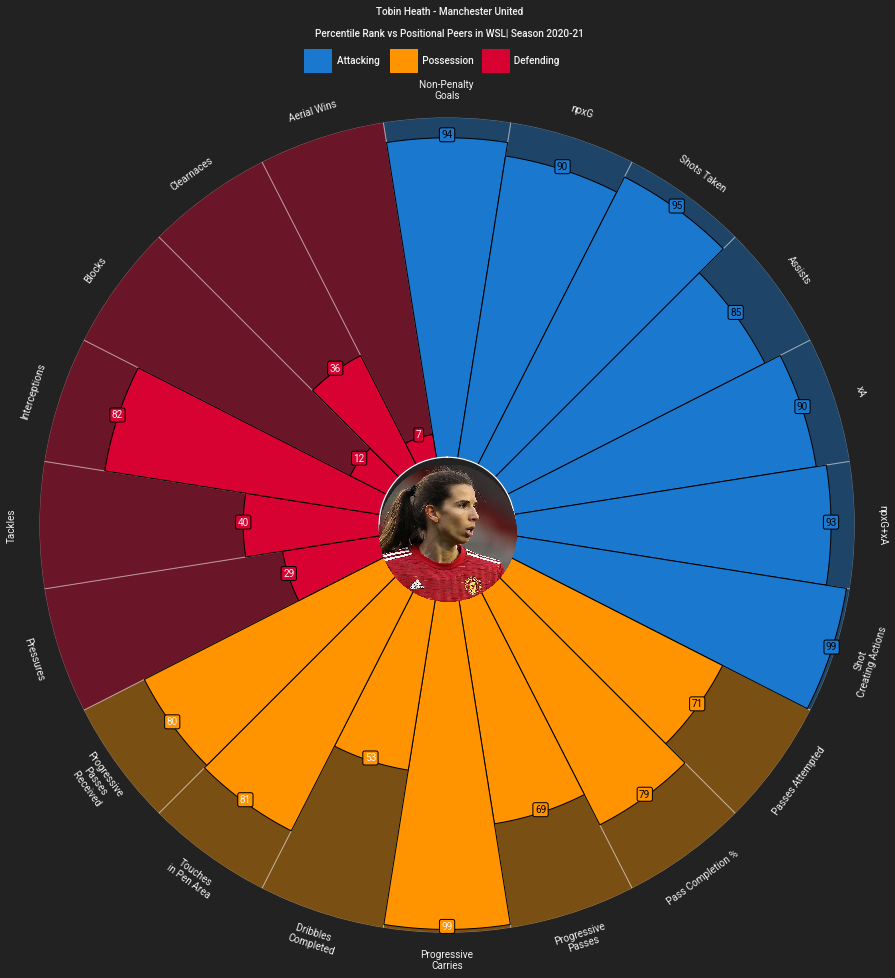

In [10]:
params = ["Non-Penalty \nGoals",
          "npxG",
          "Shots Taken",
          "Assists",
          "xA",
          "npxG+xA",
          "\nShot\n Creating Actions",
          "Passes Attempted",
          "Pass Completion %",
          "Progressive\nPasses",
          "Progressive\nCarries",
          "Dribbles \nCompleted",
          "Touches\nin Pen Area",
          "Progressive\nPasses\n Received",
          "Pressures",
          "Tackles",
          "Interceptions",
          "Blocks",
          "Clearnaces",
          "Aerial Wins"]

values = [94,90,95,85,90,93,99,71,79,69,99,53,81,80,29,40,82,12,36,7]

slice_colors = ["#1A78CF"] * 7 + ["#FF9300"] * 7 + ["#D70232"] * 6
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 10

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)


fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(15,15),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

fig.text(
    0.515, 0.975, "Tobin Heath - Manchester United", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

fig.text(
    0.515, 0.955,
    "Percentile Rank vs Positional Peers in WSL| Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)


# add text
fig.text(
0.35, 0.93, "                          Attacking                 Possession                Defending", size=10,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.38, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.46, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.545, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

In [19]:
df=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\WSL per 90.csv',encoding="latin1")

In [20]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [21]:
params = ["Gls/90",
          "Ast/90",
          "G+A/90",
          "xG/90",
          "xA/90",
          "xG+xA/90",
          "npxG/90"]

# The lower and upper boundaries for the statistics
low =  [0,0,0,0,0,0,0]
high = [1.25,0.68,1.76,1.05,0.46,1.33,1.05]

In [22]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*7,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [23]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

In [24]:
tobin_values =  [0.63,0.31,0.94,0.43,0.33,0.77,0.43]

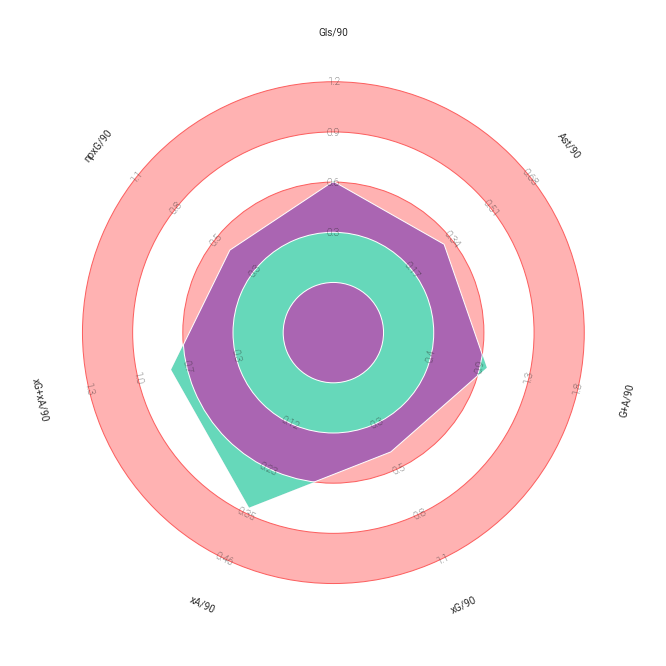

In [25]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(tobin_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels

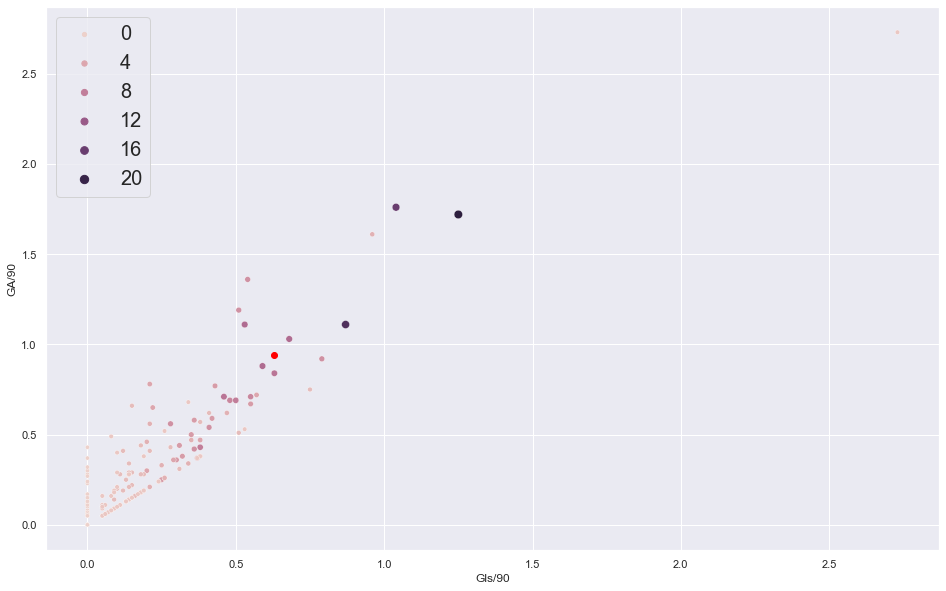

In [26]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="Gls/90", y="GA/90", hue="Gls", size="Gls",s=70)
plt.scatter(0.63, 0.94, color="red")

g.legend(prop={'size': 20})
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.Gls/90, row.GA/90, row.Player) # xloc of text, yloc of text, text

AttributeError: 'Series' object has no attribute 'xGxA'

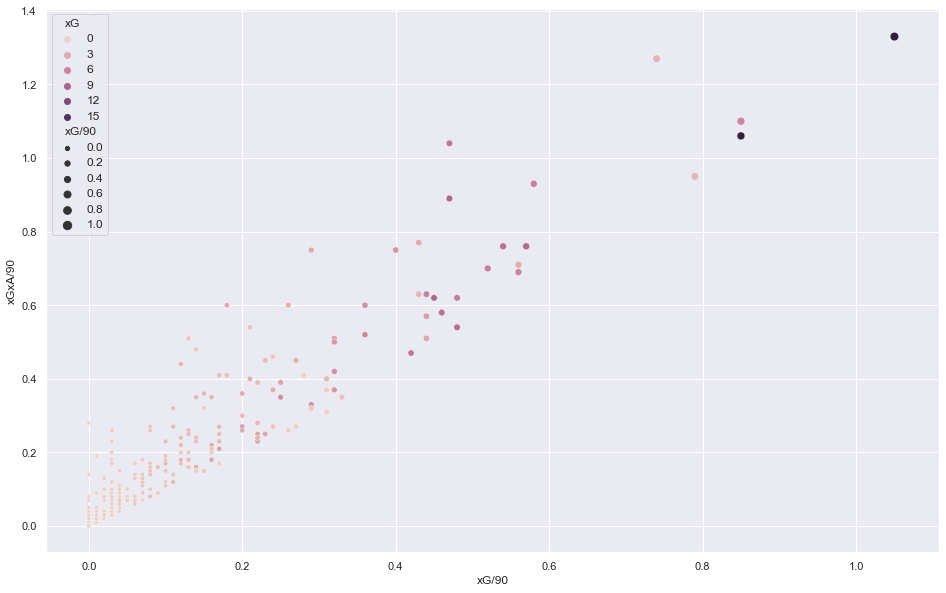

In [27]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="xG/90", y="xGxA/90", hue="xG", size="xG/90")
for i,row in df.iterrows(): # loop through rows of the df
    plt.text(row.xG/90, row.xGxA/90, row.Player) # xloc of text, yloc of text, text
g.legend(prop={'size': 20})

Text(0.5, 0.5, 'An annotation')

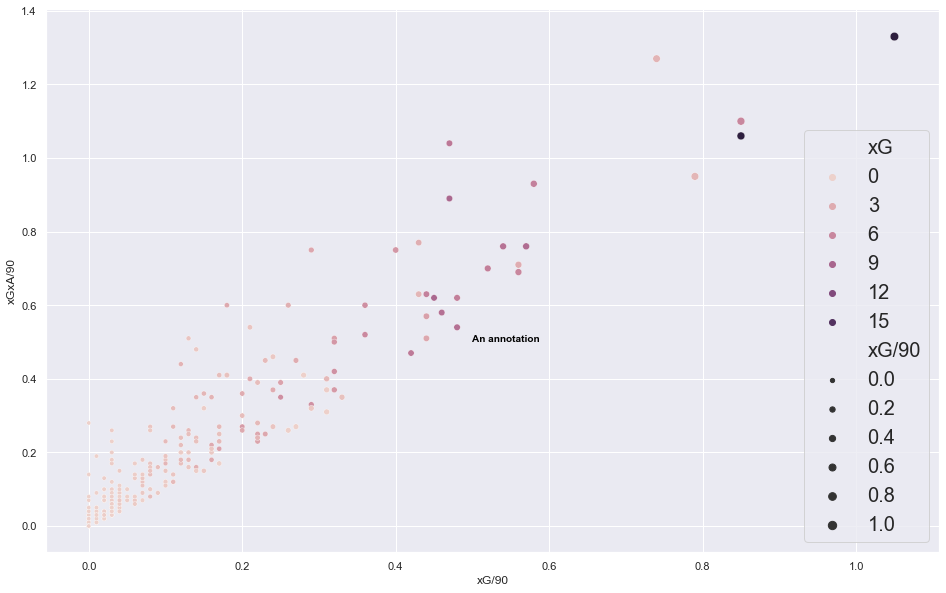

In [35]:
plt.figure(figsize=(16, 10))

g=sns.scatterplot(data=df, x="xG/90", y="xGxA/90", hue="xG", size="xG/90")
g.legend(prop={'size': 20})

plt.text(0.5, .5, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')


AttributeError: 'Series' object has no attribute 'GA'

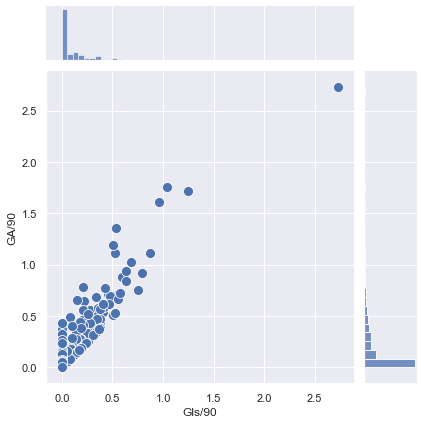

In [36]:
g=sns.jointplot(x='Gls/90',y='GA/90',data=df,kind='scatter',s=100)
for i,row in df.iterrows(): # loop through rows of the df
    plt.text(row.Gls/90, row.GA/90, row.Player) # xloc of text, yloc of text, text
plt.figure(figsize=(16, 10))


In [44]:
from mplsoccer.pitch import Pitch
from matplotlib.colors import ListedColormap

from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
text_color = 'w'

In [45]:
df1=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\Shotmaps.csv',encoding="latin1")

NameError: name 'fig_text' is not defined

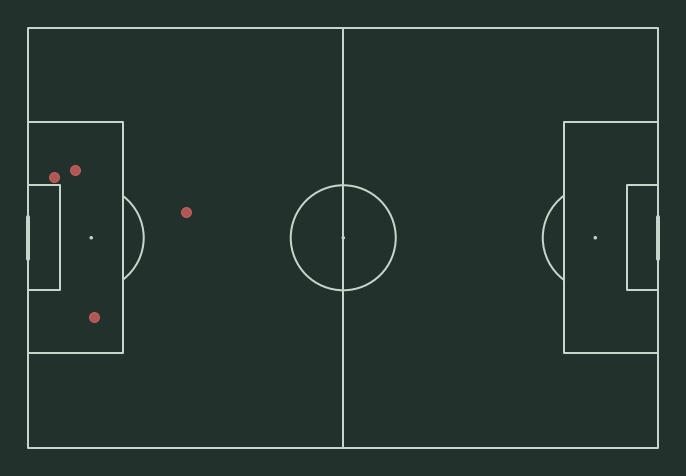

In [46]:
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#The statsbomb pitch from mplsoccer
pitch = Pitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, view='half')
pitch.draw(ax=ax)
plt.gca().invert_yaxis()
plt.scatter(df1['x'],df1['y'], s=100,c='#ea6969',alpha=.7)
s='Tobin Heath Shot Maps for WSL Goals Only'
fig_text(s=s,
        x=.27,y=.9,
        fontfamily='Andale Mono',
        highlight_weights=['bold'],
        fontsize=24,
        color=text_color

)


fig_text(s=f'Total Shots: {total_shots}',
        x=.27, y =.67, fontsize=14,fontfamily='Andale Mono',color=text_color)
fig_text(s=f'xG: .85',
        x=.49, y =.67, fontsize=14,fontfamily='Andale Mono',color=text_color)
fig_text(s=f'Goals: 0',
        x=.68, y =.67, fontsize=14,fontfamily='Andale Mono',color=text_color)


In [47]:
fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

In [48]:
df1=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Shotmaps.csv',encoding="latin1")

FileNotFoundError: [Errno 2] File b'C:\\Users\\Karthik Garimella\\Desktop\\Shotmaps.csv' does not exist: b'C:\\Users\\Karthik Garimella\\Desktop\\Shotmaps.csv'

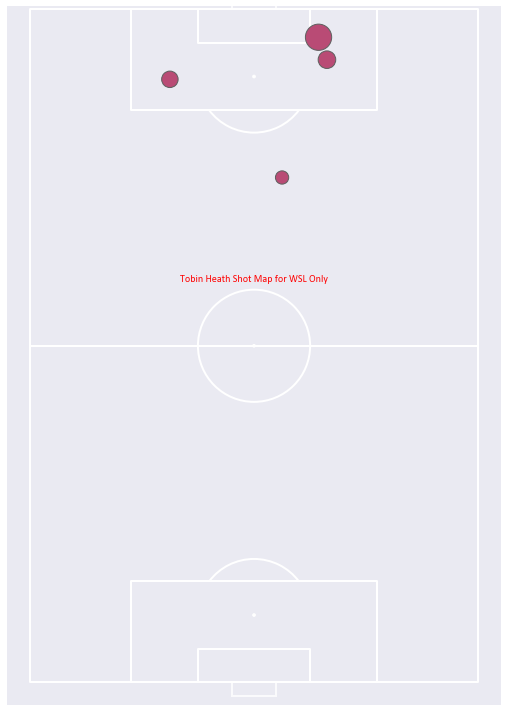

In [49]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1900) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='#b94b75',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Tobin Heath Shot Map for WSL Only',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')

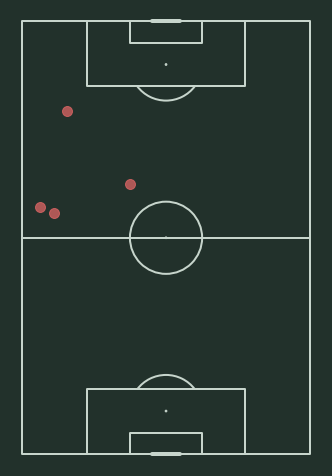

In [50]:
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#The statsbomb pitch from mplsoccer
pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, view='half')

pitch.draw(ax=ax)

#I invert the axis to make it so I am viewing it how I want
plt.gca().invert_yaxis()

#plot the points, you can use a for loop to plot the different outcomes if you want
plt.scatter(df1['x'],df1['y'], s=100,c='#ea6969',alpha=.7)

s='Barcelona Shot Chart vs Juventus'

total_shots = len(df)



In [51]:
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt

from mplsoccer import Pitch, VerticalPitch
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager

E:\Ananconda1\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

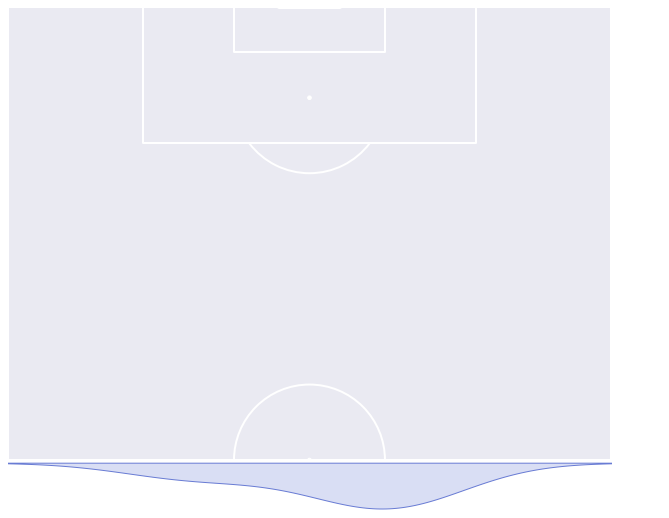

In [52]:
pitch = Pitch(pad_top=0.05, pad_right=0.05, pad_bottom=0.05, pad_left=0.05, line_zorder=2)
vertical_pitch = VerticalPitch(half=True, pad_top=0.05, pad_right=0.05, pad_bottom=0.05,
                               pad_left=0.05, line_zorder=2)
fig, axs = vertical_pitch.jointgrid(figheight=10, left=None, bottom=0.15,
                                    grid_height=0.7, marginal=0.1,
                                    # plot without endnote/ title axes
                                    endnote_height=0, title_height=0,
                                    axis=False,  # turn off title/ endnote/ marginal axes
                                    # here we filter out the left and top marginal axes
                                    ax_top=False, ax_bottom=True,
                                    ax_left=False, ax_right=True)
fm = FontManager()
fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

sc_team2 = vertical_pitch.scatter(df1.x, df1.y, s=df1.xG * 700,
                                  alpha=0.5, ec='black', color='#697cd4', ax=axs['pitch'])

team2_hist_x = sns.kdeplot(y=df1.x, ax=axs['right'], color='#697cd4', shade=True)
team2_hist_y = sns.kdeplot(x=df1.y, ax=axs['bottom'], color='#697cd4', shade=True)
txt1 = axs['pitch'].text(x=40, y=80, s=df1, fontproperties=fm_rubik.prop, color=pitch.line_color,
                         ha='center', va='center', fontsize=60)